In [1]:
import modeller
import fitter

import casadi as ca
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
p_true = [0.0005, 0.1]
tspan = [0, 20]
def system(t, y, p):
    return [
        -p[0]*y[0]*y[1],
        p[0]*y[0]*y[1] - p[1]*y[1],
        p[1]*y[1]
    ]
sol = solve_ivp(lambda t, y: system(t, y, p_true), tspan, [9999, 1, 0])

In [3]:
data = sol.y[-1, :]
data_pd = np.array([[i] for i in data])
config = {
    "grid_size": 49,
    "basis_number": 13,
    "model_form": {
        "state": 3,
        "parameters": 2
    },
    "time_span": tspan,
    "knot_function": None,
    "model": system,
    "dataset": {"y": data_pd, "t": sol.t},
    "observation_vector": [2],
    "weightings":[
        [1]*3,
        [1]*len(sol.t)
    ],
    "regularisation_vector": p_true,
}

In [4]:
model = modeller.Model(config)
objective = fitter.Objective()
objective.make(config, config['dataset'], model)

solver_setup = {
    'f': objective.objective,
    'x': ca.vcat(objective.input_list),
    'p': ca.hcat([objective.rho, objective.alpha])
}

solver = ca.nlpsol('solver', 'ipopt', solver_setup)

In [5]:
p0 = 0.001*np.ones(2)
c0 = [np.ones(13) for _ in range(3)]
x0 = np.hstack([p0, *c0])

In [6]:
prange = np.logspace(-6, 6, 50)
solutions = []
xguess = x0
for p in prange:
    solutions.append(solver(x0=xguess, p=[p, 1e-4], lbx=0))
    xguess = np.array(solutions[-1]['x']).flatten()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      679

Total number of variables............................:       41
                     variables with only lower bounds:       41
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

  82  2.3125029e+05 0.00e+00 5.52e-08  -8.6 1.29e-01    -  1.00e+00 1.00e+00f  1
  83  2.3125029e+05 0.00e+00 5.22e-14  -8.6 9.06e-05    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 83

                                   (scaled)                 (unscaled)
Objective...............:   6.0039622483149060e+02    2.3125028994972317e+05
Dual infeasibility......:   5.2185106957274366e-14    2.0099761816980133e-11
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800622e-09    9.6518082691925627e-07
Overall NLP error.......:   2.5059035596800622e-09    9.6518082691925627e-07


Number of objective function evaluations             = 212
Number of objective gradient evaluations             = 84
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Jacobian evaluations   = 0
Number of inequality constraint Jacobian evaluations = 0
Numb

  65  2.3125036e+05 0.00e+00 1.38e+04  -3.8 7.00e+03    -  1.00e+00 5.00e-01f  2
  66  2.3125036e+05 0.00e+00 3.87e+03  -3.8 1.56e+03    -  1.00e+00 1.00e+00f  1
  67  2.3125036e+05 0.00e+00 1.13e+04  -3.8 5.85e+03    -  1.00e+00 5.00e-01f  2
  68  2.3125036e+05 0.00e+00 2.23e+03  -3.8 1.15e+03    -  1.00e+00 1.00e+00f  1
  69  2.3125036e+05 0.00e+00 6.47e+03  -3.8 4.00e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  2.3125036e+05 0.00e+00 1.43e+03  -3.8 9.77e+02    -  1.00e+00 1.00e+00f  1
  71  2.3125036e+05 0.00e+00 3.49e+03  -3.8 1.76e+03    -  1.00e+00 1.00e+00f  1
  72  2.3125036e+05 0.00e+00 1.01e+02  -3.8 2.38e+02    -  1.00e+00 1.00e+00f  1
  73  2.3125036e+05 0.00e+00 3.50e+02  -3.8 6.11e+02    -  1.00e+00 1.00e+00f  1
  74  2.3125036e+05 0.00e+00 3.37e-02  -3.8 9.95e+00    -  1.00e+00 1.00e+00f  1
  75  2.3125036e+05 0.00e+00 6.29e-03  -3.8 4.94e+00    -  1.00e+00 1.00e+00f  1
  76  2.3125036e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  2.3125029e+05 0.00e+00 4.15e+00  -5.7 3.27e+03    -  1.00e+00 1.00e+00f  1
 161  2.3125029e+05 0.00e+00 1.11e+01  -5.7 5.49e+03    -  1.00e+00 1.00e+00f  1
 162  2.3125029e+05 0.00e+00 1.29e+00  -5.7 1.65e+03    -  1.00e+00 1.00e+00f  1
 163  2.3125029e+05 0.00e+00 1.14e+01  -5.7 1.07e+04    -  1.00e+00 5.00e-01f  2
 164  2.3125029e+05 0.00e+00 6.43e-01  -5.7 1.06e+03    -  1.00e+00 1.00e+00f  1
 165  2.3125029e+05 0.00e+00 3.71e+00  -5.7 1.13e+04    -  1.00e+00 2.50e-01f  3
 166  2.3125029e+05 0.00e+00 2.66e+00  -5.7 2.41e+03    -  1.00e+00 1.00e+00f  1
 167  2.3125029e+05 0.00e+00 3.10e+00  -5.7 2.64e+03    -  1.00e+00 1.00e+00f  1
 168  2.3125029e+05 0.00e+00 1.42e+00  -5.7 1.73e+03    -  1.00e+00 1.00e+00f  1
 169  2.3125029e+05 0.00e+00 2.91e+00  -5.7 2.53e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  2.3125029e+05 0.00e+00

  47  2.3125029e+05 0.00e+00 8.51e+01  -5.7 3.71e+03    -  1.00e+00 1.00e+00f  1
  48  2.3125029e+05 0.00e+00 4.41e+01  -5.7 2.61e+03    -  1.00e+00 1.00e+00f  1
  49  2.3125029e+05 0.00e+00 9.00e+01  -5.7 2.40e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  2.3125029e+05 0.00e+00 1.64e+01  -5.7 1.47e+03    -  1.00e+00 1.00e+00f  1
  51  2.3125029e+05 0.00e+00 6.04e+01  -5.7 1.25e+03    -  1.00e+00 5.00e-01f  2
  52  2.3125029e+05 0.00e+00 2.03e+01  -5.7 1.31e+03    -  1.00e+00 1.00e+00f  1
  53  2.3125029e+05 0.00e+00 7.59e+01  -5.7 1.79e+03    -  1.00e+00 1.00e+00f  1
  54  2.3125029e+05 0.00e+00 5.80e+00  -5.7 5.06e+02    -  1.00e+00 1.00e+00f  1
  55  2.3125029e+05 0.00e+00 8.55e+01  -5.7 1.49e+04    -  1.00e+00 5.00e-01f  2
  56  2.3125029e+05 0.00e+00 4.13e+00  -5.7 9.75e+02    -  1.00e+00 1.00e+00f  1
  57  2.3125029e+05 0.00e+00 2.56e+01  -5.7 2.07e+04    -  1.00e+00 2.50e-01f  3
  58  2.3125029e+05 0.00e+00

  25  2.3125037e+05 0.00e+00 6.51e-01  -8.6 8.89e+00  -6.1 1.00e+00 1.00e+00f  1
  26  2.3125036e+05 0.00e+00 3.42e+00  -8.6 1.82e+01  -6.6 1.00e+00 1.00e+00f  1
  27  2.3125036e+05 0.00e+00 7.86e+01  -8.6 3.88e+01  -7.1 1.00e+00 1.00e+00f  1
  28  2.3125035e+05 0.00e+00 9.07e+02  -8.6 1.07e+02  -7.5 1.00e+00 1.00e+00f  1
  29  2.3125034e+05 0.00e+00 1.96e+03  -8.6 2.87e+04    -  1.00e+00 3.42e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.3125032e+05 0.00e+00 3.16e+02  -8.6 4.11e+03    -  1.00e+00 1.00e+00f  1
  31  2.3125031e+05 0.00e+00 7.78e+02  -8.6 1.18e+04    -  1.00e+00 5.00e-01f  2
  32  2.3125031e+05 0.00e+00 3.38e+02  -8.6 5.28e+03    -  1.00e+00 1.00e+00f  1
  33  2.3125030e+05 0.00e+00 7.38e+02  -8.6 7.03e+03    -  1.00e+00 1.00e+00f  1
  34  2.3125030e+05 0.00e+00 6.33e+01  -8.6 3.89e+03    -  1.00e+00 1.00e+00f  1
  35  2.3125030e+05 0.00e+00 5.10e+02  -8.6 8.97e+03    -  1.00e+00 5.23e-01f  1
  36  2.3125029e+05 0.00e+00

  22  2.3125057e+05 0.00e+00 3.79e-05  -8.6 2.42e-02  -3.7 1.00e+00 1.00e+00f  1
  23  2.3125057e+05 0.00e+00 3.35e-04  -8.6 7.21e-02  -4.2 1.00e+00 1.00e+00f  1
  24  2.3125057e+05 0.00e+00 2.88e-03  -8.6 2.11e-01  -4.7 1.00e+00 1.00e+00f  1
  25  2.3125057e+05 0.00e+00 2.28e-02  -8.6 5.86e-01  -5.2 1.00e+00 1.00e+00f  1
  26  2.3125057e+05 0.00e+00 1.45e-01  -8.6 1.63e+00  -5.6 1.00e+00 1.00e+00f  1
  27  2.3125057e+05 0.00e+00 6.09e-01  -8.6 4.21e+00  -6.1 1.00e+00 1.00e+00f  1
  28  2.3125057e+05 0.00e+00 1.05e+00  -8.6 1.02e+01  -6.6 1.00e+00 1.00e+00f  1
  29  2.3125057e+05 0.00e+00 9.79e+00  -8.6 2.44e+01  -7.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.3125056e+05 0.00e+00 1.73e+02  -8.6 5.57e+01  -7.5 1.00e+00 1.00e+00f  1
  31  2.3125055e+05 0.00e+00 2.19e+03  -8.6 1.86e+02  -8.0 1.00e+00 1.00e+00f  1
  32  2.3125055e+05 0.00e+00 2.40e+04  -8.6 7.46e+02  -8.5 1.00e+00 1.00e+00f  1
  33  2.3125048e+05 0.00e+00

   4  2.3125212e+05 0.00e+00 1.72e+03  -1.0 9.30e+00    -  9.78e-01 1.00e+00f  1
   5  2.3125462e+05 0.00e+00 2.83e+04  -1.0 8.55e+02    -  7.49e-01 1.00e+00f  1
   6  2.3125474e+05 0.00e+00 3.51e+04  -1.0 7.92e+03    -  1.97e-01 2.50e-01f  3
   7  2.3125416e+05 0.00e+00 2.70e+01  -1.0 1.50e-01   0.6 9.90e-01 1.00e+00f  1
   8  2.3125340e+05 0.00e+00 3.90e-01  -1.0 3.16e-01   0.1 1.00e+00 1.00e+00f  1
   9  2.3125160e+05 0.00e+00 1.89e-01  -1.7 4.58e-01  -0.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3125118e+05 0.00e+00 4.26e-02  -2.5 3.11e-01  -0.9 1.00e+00 1.00e+00f  1
  11  2.3125117e+05 0.00e+00 3.62e-03  -2.5 7.92e-02  -1.3 1.00e+00 1.00e+00f  1
  12  2.3125113e+05 0.00e+00 8.21e-04  -3.8 1.69e-02  -1.8 1.00e+00 1.00e+00f  1
  13  2.3125113e+05 0.00e+00 3.35e-03  -5.7 5.06e-02  -2.3 1.00e+00 1.00e+00f  1
  14  2.3125113e+05 0.00e+00 2.92e-02  -5.7 1.52e-01  -2.8 1.00e+00 1.00e+00f  1
  15  2.3125112e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3125038e+05 0.00e+00 1.93e-02  -2.5 4.75e-01  -1.4 1.00e+00 1.00e+00f  1
  11  2.3125031e+05 0.00e+00 3.00e-02  -3.8 5.14e-01  -1.9 1.00e+00 1.00e+00f  1
  12  2.3125030e+05 0.00e+00 8.14e-03  -3.8 2.39e-01  -2.3 1.00e+00 1.00e+00f  1
  13  2.3125030e+05 0.00e+00 9.66e-02  -3.8 1.10e-01  -2.8 1.00e+00 1.00e+00f  1
  14  2.3125030e+05 0.00e+00 3.98e-01  -3.8 2.41e-01  -3.3 1.00e+00 1.00e+00f  1
  15  2.3125030e+05 0.00e+00 8.86e+02  -3.8 3.76e+05    -  9.13e-01 7.48e-02f  4
  16  2.3125030e+05 0.00e+00 3.92e+01  -3.8 6.41e+03    -  1.00e+00 1.00e+00f  1
  17  2.3125030e+05 0.00e+00 4.70e+02  -3.8 6.57e+04    -  1.00e+00 2.50e-01f  3
  18  2.3125030e+05 0.00e+00 1.06e+02  -3.8 8.91e+03    -  1.00e+00 1.00e+00f  1
  19  2.3125030e+05 0.00e+00 2.48e+02  -3.8 1.99e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3125030e+05 0.00e+00

   3  2.3125793e+05 0.00e+00 8.14e+04  -1.0 2.20e+01   1.9 1.21e-01 5.33e-01f  1
   4  2.3125396e+05 0.00e+00 1.36e+01  -1.0 2.37e-02   1.5 9.90e-01 1.00e+00f  1
   5  2.3125393e+05 0.00e+00 4.32e+00  -1.0 4.91e-02   1.0 9.90e-01 1.00e+00f  1
   6  2.3125389e+05 0.00e+00 3.01e-01  -1.0 9.14e-02   0.5 1.00e+00 1.00e+00f  1
   7  2.3125261e+05 0.00e+00 5.71e-01  -1.7 1.72e-01   0.0 1.00e+00 1.00e+00f  1
   8  2.3125221e+05 0.00e+00 1.69e-01  -1.7 4.62e-01  -0.4 1.00e+00 1.00e+00f  1
   9  2.3125124e+05 0.00e+00 5.59e-01  -2.5 1.03e+00  -0.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3125058e+05 0.00e+00 1.72e-01  -2.5 1.50e+00  -1.4 1.00e+00 1.00e+00f  1
  11  2.3125038e+05 0.00e+00 7.58e-02  -2.5 1.09e+00  -1.9 1.00e+00 1.00e+00f  1
  12  2.3125037e+05 0.00e+00 9.57e-01  -2.5 3.83e-01  -2.3 1.00e+00 1.00e+00f  1
  13  2.3125036e+05 0.00e+00 3.91e+00  -2.5 5.80e-01  -2.8 1.00e+00 1.00e+00f  1
  14  2.3125041e+05 0.00e+00

  99  2.3125030e+05 0.00e+00 1.65e+01  -5.7 3.24e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  2.3125030e+05 0.00e+00 8.12e+00  -5.7 2.25e+03    -  1.00e+00 1.00e+00f  1
 101  2.3125030e+05 0.00e+00 1.93e+01  -5.7 3.36e+03    -  1.00e+00 1.00e+00f  1
 102  2.3125030e+05 0.00e+00 2.72e+00  -5.7 1.31e+03    -  1.00e+00 1.00e+00f  1
 103  2.3125030e+05 0.00e+00 1.02e+01  -5.7 4.56e+03    -  1.00e+00 5.00e-01f  2
 104  2.3125030e+05 0.00e+00 3.72e+00  -5.7 1.51e+03    -  1.00e+00 1.00e+00f  1
 105  2.3125030e+05 0.00e+00 9.83e+00  -5.7 2.43e+03    -  1.00e+00 1.00e+00f  1
 106  2.3125030e+05 0.00e+00 9.07e-01  -5.7 7.61e+02    -  1.00e+00 1.00e+00f  1
 107  2.3125030e+05 0.00e+00 7.30e+00  -5.7 2.10e+03    -  1.00e+00 1.00e+00f  1
 108  2.3125030e+05 0.00e+00 6.37e-02  -5.7 2.13e+02    -  1.00e+00 1.00e+00f  1
 109  2.3125030e+05 0.00e+00 5.24e-01  -5.7 5.67e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

  28  2.3125032e+05 0.00e+00 5.04e+01  -3.8 6.60e+03    -  1.00e+00 2.50e-01f  3
  29  2.3125032e+05 0.00e+00 7.39e+01  -3.8 2.42e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.3125032e+05 0.00e+00 2.34e+01  -3.8 1.31e+03    -  1.00e+00 1.00e+00f  1
  31  2.3125032e+05 0.00e+00 9.84e+01  -3.8 2.18e+03    -  1.00e+00 1.00e+00f  1
  32  2.3125032e+05 0.00e+00 4.44e+00  -3.8 5.11e+02    -  1.00e+00 1.00e+00f  1
  33  2.3125032e+05 0.00e+00 5.24e+01  -3.8 2.24e+03    -  1.00e+00 5.00e-01f  2
  34  2.3125032e+05 0.00e+00 5.90e+00  -3.8 4.69e+02    -  1.00e+00 1.00e+00f  1
  35  2.3125032e+05 0.00e+00 1.79e+01  -3.8 1.08e+03    -  1.00e+00 5.00e-01f  2
  36  2.3125032e+05 0.00e+00 1.03e+01  -3.8 4.71e+02    -  1.00e+00 1.00e+00f  1
  37  2.3125032e+05 0.00e+00 8.09e+00  -3.8 3.50e+02    -  1.00e+00 1.00e+00f  1
  38  2.3125032e+05 0.00e+00 2.79e+00  -3.8 1.86e+02    -  1.00e+00 1.00e+00f  1
  39  2.3125032e+05 0.00e+00

Total number of variables............................:       41
                     variables with only lower bounds:       41
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.0250743e+06 0.00e+00 7.74e+07  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  2.3128088e+05 0.00e+00 3.14e+05  -1.0 7.17e-01   4.0 9.20e-01 9.52e-01f  1
   2  2.3125970e+05 0.00e+00 1.75e+05  -1.0 8.36e-03   3.5 9.90e-01 4.40e-01f  1
   3  2.3125174e+05 0.00e+00 4.40e+00  -1.0 3.95e-03   3.0 9.90e-01 1.00e+00f  1
   4  2.3125162e+0

  96  2.3125034e+05 0.00e+00 2.95e+01  -5.7 6.41e+03    -  1.00e+00 5.00e-01f  2
  97  2.3125034e+05 0.00e+00 8.15e+00  -5.7 1.84e+03    -  1.00e+00 1.00e+00f  1
  98  2.3125034e+05 0.00e+00 1.63e+01  -5.7 4.45e+03    -  1.00e+00 5.00e-01f  2
  99  2.3125034e+05 0.00e+00 1.26e+01  -5.7 2.28e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  2.3125034e+05 0.00e+00 1.25e+01  -5.7 2.28e+03    -  1.00e+00 1.00e+00f  1
 101  2.3125034e+05 0.00e+00 7.57e+00  -5.7 1.78e+03    -  1.00e+00 1.00e+00f  1
 102  2.3125034e+05 0.00e+00 9.22e+00  -5.7 1.96e+03    -  1.00e+00 1.00e+00f  1
 103  2.3125034e+05 0.00e+00 3.15e+00  -5.7 1.15e+03    -  1.00e+00 1.00e+00f  1
 104  2.3125034e+05 0.00e+00 5.54e+00  -5.7 1.52e+03    -  1.00e+00 1.00e+00f  1
 105  2.3125034e+05 0.00e+00 6.38e-01  -5.7 5.23e+02    -  1.00e+00 1.00e+00f  1
 106  2.3125034e+05 0.00e+00 9.92e-01  -5.7 6.47e+02    -  1.00e+00 1.00e+00f  1
 107  2.3125034e+05 0.00e+00

  15  2.3125111e+05 0.00e+00 5.15e+00  -2.5 3.48e-01  -1.2 1.00e+00 1.00e+00f  1
  16  2.3125105e+05 0.00e+00 2.81e+01  -2.5 6.57e-01  -1.7 1.00e+00 1.00e+00f  1
  17  2.3125097e+05 0.00e+00 7.04e+01  -2.5 1.41e+00  -2.2 1.00e+00 1.00e+00f  1
  18  2.3125089e+05 0.00e+00 9.69e+01  -2.5 2.23e+00  -2.7 1.00e+00 1.00e+00f  1
  19  2.3125084e+05 0.00e+00 6.06e+01  -2.5 2.30e+00  -3.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3125085e+05 0.00e+00 1.57e+04  -2.5 3.05e+06    -  1.72e-01 2.09e-02f  4
  21  2.3125060e+05 0.00e+00 1.53e+04  -2.5 8.02e+04    -  1.00e+00 9.24e-01f  1
  22  2.3125047e+05 0.00e+00 5.87e+03  -2.5 2.76e+04    -  1.00e+00 1.00e+00f  1
  23  2.3125048e+05 0.00e+00 7.38e+03  -2.5 1.75e+05    -  1.00e+00 1.25e-01f  4
  24  2.3125044e+05 0.00e+00 8.33e+03  -2.5 4.60e+04    -  1.00e+00 6.23e-01f  1
  25  2.3125048e+05 0.00e+00 9.97e+03  -2.5 4.02e+04    -  1.00e+00 1.00e+00f  1
  26  2.3125045e+05 0.00e+00

 116  2.3125037e+05 0.00e+00 1.21e+02  -5.7 1.24e+04    -  1.00e+00 5.00e-01f  2
 117  2.3125037e+05 0.00e+00 6.47e+01  -5.7 5.31e+03    -  1.00e+00 1.00e+00f  1
 118  2.3125037e+05 0.00e+00 1.70e+02  -5.7 8.26e+03    -  1.00e+00 1.00e+00f  1
 119  2.3125037e+05 0.00e+00 2.57e+01  -5.7 3.44e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  2.3125037e+05 0.00e+00 1.70e+02  -5.7 1.54e+04    -  1.00e+00 5.00e-01f  2
 121  2.3125037e+05 0.00e+00 2.06e+01  -5.7 3.14e+03    -  1.00e+00 1.00e+00f  1
 122  2.3125037e+05 0.00e+00 1.88e+02  -5.7 1.60e+04    -  1.00e+00 5.00e-01f  2
 123  2.3125037e+05 0.00e+00 1.29e+01  -5.7 2.52e+03    -  1.00e+00 1.00e+00f  1
 124  2.3125037e+05 0.00e+00 7.83e+01  -5.7 1.94e+04    -  1.00e+00 2.50e-01f  3
 125  2.3125037e+05 0.00e+00 5.44e+01  -5.7 4.85e+03    -  1.00e+00 1.00e+00f  1
 126  2.3125037e+05 0.00e+00 9.00e+01  -5.7 5.75e+03    -  1.00e+00 1.00e+00f  1
 127  2.3125037e+05 0.00e+00

   5  2.3125700e+05 0.00e+00 1.52e+00  -1.0 1.23e-02   2.1 1.00e+00 1.00e+00f  1
   6  2.3125703e+05 0.00e+00 1.01e+00  -1.0 2.45e-02   1.6 1.00e+00 1.00e+00f  1
   7  2.3125698e+05 0.00e+00 6.21e-01  -1.0 4.53e-02   1.1 1.00e+00 1.00e+00f  1
   8  2.3125565e+05 0.00e+00 2.28e+00  -1.7 8.05e-02   0.7 1.00e+00 1.00e+00f  1
   9  2.3125502e+05 0.00e+00 1.16e+01  -1.7 2.25e-01   0.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3125370e+05 0.00e+00 7.10e+01  -1.7 5.53e-01  -0.3 1.00e+00 1.00e+00f  1
  11  2.3125195e+05 0.00e+00 2.26e+02  -1.7 1.02e+00  -0.8 1.00e+00 1.00e+00f  1
  12  2.3125096e+05 0.00e+00 2.31e+02  -1.7 1.13e+00  -1.2 1.00e+00 1.00e+00f  1
  13  2.3125082e+05 0.00e+00 1.06e+01  -1.7 6.80e-01  -1.7 1.00e+00 1.00e+00f  1
  14  2.3125083e+05 0.00e+00 4.87e+01  -1.7 4.65e-01  -2.2 1.00e+00 1.00e+00f  1
  15  2.3125146e+05 0.00e+00 5.00e+04  -1.7 3.67e+06    -  1.78e-01 4.24e-02f  3
  16  2.3125126e+05 0.00e+00

 104  2.3125044e+05 0.00e+00 1.66e+01  -3.8 2.68e+02    -  1.00e+00 1.00e+00f  1
 105  2.3125044e+05 0.00e+00 6.69e+00  -3.8 1.65e+02    -  1.00e+00 1.00e+00f  1
 106  2.3125044e+05 0.00e+00 5.23e+00  -3.8 1.41e+02    -  1.00e+00 1.00e+00f  1
 107  2.3125044e+05 0.00e+00 7.87e-01  -3.8 5.37e+01    -  1.00e+00 1.00e+00f  1
 108  2.3125044e+05 0.00e+00 1.29e-01  -3.8 2.15e+01    -  1.00e+00 1.00e+00f  1
 109  2.3125044e+05 0.00e+00 5.34e-04  -3.8 1.37e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3125044e+05 0.00e+00 2.90e+02  -5.7 5.78e+04    -  7.65e-01 9.64e-02f  4
 111  2.3125044e+05 0.00e+00 6.05e+02  -5.7 7.44e+03    -  1.00e+00 1.00e+00f  1
 112  2.3125044e+05 0.00e+00 3.29e+02  -5.7 6.31e+03    -  1.00e+00 1.00e+00f  1
 113  2.3125044e+05 0.00e+00 3.93e+02  -5.7 6.46e+03    -  1.00e+00 1.00e+00f  1
 114  2.3125044e+05 0.00e+00 5.34e+02  -5.7 8.48e+03    -  1.00e+00 1.00e+00f  1
 115  2.3125044e+05 0.00e+00

 199  2.3125043e+05 0.00e+00 7.84e+01  -8.6 9.17e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  2.3125043e+05 0.00e+00 4.95e+01  -8.6 4.18e+03    -  1.00e+00 1.00e+00f  1
 201  2.3125043e+05 0.00e+00 1.09e+02  -8.6 6.17e+03    -  1.00e+00 1.00e+00f  1
 202  2.3125043e+05 0.00e+00 2.13e+01  -8.6 2.78e+03    -  1.00e+00 1.00e+00f  1
 203  2.3125043e+05 0.00e+00 1.13e+02  -8.6 1.20e+04    -  1.00e+00 5.00e-01f  2
 204  2.3125043e+05 0.00e+00 1.67e+01  -8.6 2.49e+03    -  1.00e+00 1.00e+00f  1
 205  2.3125043e+05 0.00e+00 1.39e+02  -8.6 1.36e+04    -  1.00e+00 5.00e-01f  2
 206  2.3125043e+05 0.00e+00 9.03e+00  -8.6 1.87e+03    -  1.00e+00 1.00e+00f  1
 207  2.3125043e+05 0.00e+00 7.50e+01  -8.6 1.98e+04    -  1.00e+00 2.50e-01f  3
 208  2.3125043e+05 0.00e+00 2.58e+01  -8.6 3.12e+03    -  1.00e+00 1.00e+00f  1
 209  2.3125043e+05 0.00e+00 5.56e+01  -8.6 7.91e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

  27  2.3125126e+05 0.00e+00 5.21e+03  -1.7 1.50e+03    -  1.00e+00 5.00e-01f  2
  28  2.3125129e+05 0.00e+00 2.72e+03  -1.7 7.12e+02    -  1.00e+00 1.00e+00f  1
  29  2.3125135e+05 0.00e+00 5.73e+03  -1.7 6.28e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.3125137e+05 0.00e+00 1.04e+03  -1.7 2.34e+02    -  1.00e+00 1.00e+00f  1
  31  2.3125143e+05 0.00e+00 6.19e+03  -1.7 1.68e+02    -  1.00e+00 1.00e+00f  1
  32  2.3125144e+05 0.00e+00 7.04e+01  -1.7 2.68e+01    -  1.00e+00 1.00e+00f  1
  33  2.3125146e+05 0.00e+00 1.12e+03  -1.7 1.95e+02    -  1.00e+00 1.00e+00f  1
  34  2.3125146e+05 0.00e+00 7.65e-01  -1.7 1.23e+01    -  1.00e+00 1.00e+00f  1
  35  2.3125146e+05 0.00e+00 6.19e-02  -1.7 2.77e+00    -  1.00e+00 1.00e+00f  1
  36  2.3125132e+05 0.00e+00 1.12e+04  -2.5 3.55e+03    -  7.79e-01 2.18e-01f  3
  37  2.3125100e+05 0.00e+00 2.93e+03  -2.5 1.69e+03    -  1.00e+00 1.00e+00f  1
  38  2.3125095e+05 0.00e+00

 129  2.3125054e+05 0.00e+00 4.89e+02  -5.7 8.67e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130  2.3125054e+05 0.00e+00 2.26e+02  -5.7 6.28e+03    -  1.00e+00 1.00e+00f  1
 131  2.3125054e+05 0.00e+00 7.66e+02  -5.7 1.12e+04    -  1.00e+00 1.00e+00f  1
 132  2.3125054e+05 0.00e+00 7.89e+01  -5.7 3.94e+03    -  1.00e+00 1.00e+00f  1
 133  2.3125054e+05 0.00e+00 3.00e+02  -5.7 2.57e+04    -  1.00e+00 2.50e-01f  3
 134  2.3125054e+05 0.00e+00 4.05e+02  -5.7 8.79e+03    -  1.00e+00 1.00e+00f  1
 135  2.3125054e+05 0.00e+00 1.94e+02  -5.7 6.09e+03    -  1.00e+00 1.00e+00f  1
 136  2.3125054e+05 0.00e+00 7.70e+02  -5.7 1.25e+04    -  1.00e+00 1.00e+00f  1
 137  2.3125054e+05 0.00e+00 4.40e+01  -5.7 3.14e+03    -  1.00e+00 1.00e+00f  1
 138  2.3125054e+05 0.00e+00 4.63e+02  -5.7 3.77e+04    -  1.00e+00 2.50e-01f  3
 139  2.3125054e+05 0.00e+00 1.12e+02  -5.7 4.97e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 225  2.3125054e+05 0.00e+00 4.31e+01  -8.6 3.66e+03    -  1.00e+00 1.00e+00f  1
 226  2.3125054e+05 0.00e+00 7.89e+01  -8.6 8.36e+03    -  1.00e+00 5.00e-01f  2
 227  2.3125054e+05 0.00e+00 6.93e+01  -8.6 4.63e+03    -  1.00e+00 1.00e+00f  1
 228  2.3125054e+05 0.00e+00 8.13e+01  -8.6 5.01e+03    -  1.00e+00 1.00e+00f  1
 229  2.3125054e+05 0.00e+00 5.45e+01  -8.6 4.13e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230  2.3125054e+05 0.00e+00 1.07e+02  -8.6 5.76e+03    -  1.00e+00 1.00e+00f  1
 231  2.3125054e+05 0.00e+00 2.63e+01  -8.6 2.90e+03    -  1.00e+00 1.00e+00f  1
 232  2.3125054e+05 0.00e+00 9.51e+01  -8.6 1.01e+04    -  1.00e+00 5.00e-01f  2
 233  2.3125054e+05 0.00e+00 2.74e+01  -8.6 2.97e+03    -  1.00e+00 1.00e+00f  1
 234  2.3125054e+05 0.00e+00 7.73e+01  -8.6 8.98e+03    -  1.00e+00 5.00e-01f  2
 235  2.3125054e+05 0.00e+00 3.39e+01  -8.6 3.32e+03    -  1.00e+00 1.00e+00f  1
 236  2.3125054e+05 0.00e+00

  21  2.3125411e+05 0.00e+00 1.58e+05  -1.0 1.37e+05    -  1.00e+00 1.00e+00f  1
  22  2.3125606e+05 0.00e+00 1.95e+05  -1.0 1.37e+05    -  1.00e+00 1.00e+00f  1
  23  2.3125285e+05 0.00e+00 2.55e+04  -1.0 3.65e+04    -  1.00e+00 1.00e+00f  1
  24  2.3125694e+05 0.00e+00 1.93e+05  -1.0 1.87e+05    -  1.00e+00 5.00e-01f  2
  25  2.3125294e+05 0.00e+00 2.45e+04  -1.0 5.73e+03    -  1.00e+00 1.00e+00f  1
  26  2.3125290e+05 0.00e+00 8.69e+03  -1.0 3.03e+00  -2.6 1.00e+00 1.00e+00f  1
  27  2.3125315e+05 0.00e+00 4.39e+04  -1.0 1.18e+05    -  1.00e+00 2.50e-01f  3
  28  2.3125316e+05 0.00e+00 3.60e+04  -1.0 2.45e+04    -  1.00e+00 1.00e+00f  1
  29  2.3125300e+05 0.00e+00 2.38e+04  -1.0 1.67e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.3125320e+05 0.00e+00 2.38e+04  -1.0 1.52e+04    -  1.00e+00 1.00e+00f  1
  31  2.3125297e+05 0.00e+00 8.72e+03  -1.0 6.91e+03    -  1.00e+00 1.00e+00f  1
  32  2.3125314e+05 0.00e+00

 114  2.3125075e+05 0.00e+00 5.89e+02  -3.8 8.53e+03    -  1.00e+00 5.00e-01f  2
 115  2.3125075e+05 0.00e+00 2.49e+02  -3.8 3.38e+03    -  1.00e+00 1.00e+00f  1
 116  2.3125075e+05 0.00e+00 9.72e+02  -3.8 6.30e+03    -  1.00e+00 1.00e+00f  1
 117  2.3125075e+05 0.00e+00 3.97e+01  -3.8 1.48e+03    -  1.00e+00 1.00e+00f  1
 118  2.3125075e+05 0.00e+00 4.33e+02  -3.8 1.30e+04    -  1.00e+00 2.50e-01f  3
 119  2.3125075e+05 0.00e+00 1.05e+02  -3.8 2.18e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  2.3125075e+05 0.00e+00 3.49e+02  -3.8 5.94e+03    -  1.00e+00 5.00e-01f  2
 121  2.3125075e+05 0.00e+00 1.03e+02  -3.8 1.92e+03    -  1.00e+00 1.00e+00f  1
 122  2.3125075e+05 0.00e+00 2.42e+02  -3.8 4.18e+03    -  1.00e+00 5.00e-01f  2
 123  2.3125075e+05 0.00e+00 1.43e+02  -3.8 1.88e+03    -  1.00e+00 1.00e+00f  1
 124  2.3125075e+05 0.00e+00 3.17e+02  -3.8 2.37e+03    -  1.00e+00 1.00e+00f  1
 125  2.3125075e+05 0.00e+00

 210  2.3125073e+05 0.00e+00 3.76e+02  -5.7 7.94e+03    -  1.00e+00 1.00e+00f  1
 211  2.3125073e+05 0.00e+00 4.63e+01  -5.7 2.87e+03    -  1.00e+00 1.00e+00f  1
 212  2.3125073e+05 0.00e+00 1.64e+02  -5.7 1.85e+04    -  1.00e+00 2.50e-01f  3
 213  2.3125073e+05 0.00e+00 2.08e+02  -5.7 5.98e+03    -  1.00e+00 1.00e+00f  1
 214  2.3125073e+05 0.00e+00 1.20e+02  -5.7 4.58e+03    -  1.00e+00 1.00e+00f  1
 215  2.3125073e+05 0.00e+00 3.15e+02  -5.7 7.36e+03    -  1.00e+00 1.00e+00f  1
 216  2.3125073e+05 0.00e+00 4.40e+01  -5.7 2.82e+03    -  1.00e+00 1.00e+00f  1
 217  2.3125073e+05 0.00e+00 1.28e+02  -5.7 1.62e+04    -  1.00e+00 2.50e-01f  3
 218  2.3125073e+05 0.00e+00 2.19e+02  -5.7 6.22e+03    -  1.00e+00 1.00e+00f  1
 219  2.3125073e+05 0.00e+00 7.04e+01  -5.7 3.57e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  2.3125073e+05 0.00e+00 1.70e+02  -5.7 9.76e+03    -  1.00e+00 5.00e-01f  2
 221  2.3125073e+05 0.00e+00

 311  2.3125073e+05 0.00e+00 9.56e+00  -8.6 1.68e+03    -  1.00e+00 1.00e+00f  1
 312  2.3125073e+05 0.00e+00 6.20e+01  -8.6 8.17e+03    -  1.00e+00 5.00e-01f  2
 313  2.3125073e+05 0.00e+00 7.13e+00  -8.6 1.46e+03    -  1.00e+00 1.00e+00f  1
 314  2.3125073e+05 0.00e+00 5.94e+01  -8.6 8.09e+03    -  1.00e+00 5.00e-01f  2
 315  2.3125073e+05 0.00e+00 4.69e+00  -8.6 1.19e+03    -  1.00e+00 1.00e+00f  1
 316  2.3125073e+05 0.00e+00 5.82e+01  -8.6 8.11e+03    -  1.00e+00 5.00e-01f  2
 317  2.3125073e+05 0.00e+00 2.60e+00  -8.6 8.91e+02    -  1.00e+00 1.00e+00f  1
 318  2.3125073e+05 0.00e+00 1.51e+01  -8.6 7.88e+03    -  1.00e+00 2.50e-01f  3
 319  2.3125073e+05 0.00e+00 1.81e+01  -8.6 2.32e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  2.3125073e+05 0.00e+00 8.57e+00  -8.6 1.60e+03    -  1.00e+00 1.00e+00f  1
 321  2.3125073e+05 0.00e+00 1.83e+01  -8.6 2.34e+03    -  1.00e+00 1.00e+00f  1
 322  2.3125073e+05 0.00e+00

  37  2.3125367e+05 0.00e+00 1.98e+04  -1.0 5.42e+03    -  1.00e+00 1.00e+00f  1
  38  2.3125356e+05 0.00e+00 1.07e+04  -1.0 2.39e+03    -  1.00e+00 1.00e+00f  1
  39  2.3125369e+05 0.00e+00 2.00e+04  -1.0 3.72e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  2.3125378e+05 0.00e+00 2.06e+04  -1.0 1.98e+03    -  1.00e+00 1.00e+00f  1
  41  2.3125389e+05 0.00e+00 2.38e+04  -1.0 1.54e+03    -  1.00e+00 1.00e+00f  1
  42  2.3125400e+05 0.00e+00 2.26e+04  -1.0 1.21e+03    -  1.00e+00 1.00e+00f  1
  43  2.3125419e+05 0.00e+00 2.82e+04  -1.0 1.05e+03    -  1.00e+00 1.00e+00f  1
  44  2.3125432e+05 0.00e+00 1.98e+04  -1.0 7.10e+02    -  1.00e+00 1.00e+00f  1
  45  2.3125462e+05 0.00e+00 3.68e+04  -1.0 7.16e+02    -  1.00e+00 1.00e+00f  1
  46  2.3125472e+05 0.00e+00 1.02e+04  -1.0 2.64e+02    -  1.00e+00 1.00e+00f  1
  47  2.3125527e+05 0.00e+00 6.78e+04  -1.0 2.19e+02    -  1.00e+00 1.00e+00f  1
  48  2.3125522e+05 0.00e+00

 136  2.3125108e+05 0.00e+00 3.22e+02  -3.8 1.73e+03    -  1.00e+00 1.00e+00f  1
 137  2.3125108e+05 0.00e+00 1.42e+02  -3.8 1.10e+03    -  1.00e+00 1.00e+00f  1
 138  2.3125108e+05 0.00e+00 5.77e+02  -3.8 1.92e+03    -  1.00e+00 1.00e+00f  1
 139  2.3125108e+05 0.00e+00 3.40e+01  -3.8 5.02e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  2.3125108e+05 0.00e+00 2.74e+02  -3.8 3.98e+03    -  1.00e+00 2.50e-01f  3
 141  2.3125108e+05 0.00e+00 1.21e+02  -3.8 8.50e+02    -  1.00e+00 1.00e+00f  1
 142  2.3125108e+05 0.00e+00 4.30e+02  -3.8 1.34e+03    -  1.00e+00 1.00e+00f  1
 143  2.3125108e+05 0.00e+00 3.30e+01  -3.8 4.02e+02    -  1.00e+00 1.00e+00f  1
 144  2.3125108e+05 0.00e+00 1.67e+02  -3.8 2.62e+03    -  1.00e+00 2.50e-01f  3
 145  2.3125108e+05 0.00e+00 1.54e+02  -3.8 7.73e+02    -  1.00e+00 1.00e+00f  1
 146  2.3125108e+05 0.00e+00 1.39e+02  -3.8 6.60e+02    -  1.00e+00 1.00e+00f  1
 147  2.3125108e+05 0.00e+00

 234  2.3125107e+05 0.00e+00 1.48e+02  -5.7 4.60e+03    -  1.00e+00 1.00e+00f  1
 235  2.3125107e+05 0.00e+00 2.62e+02  -5.7 1.02e+04    -  1.00e+00 5.00e-01f  2
 236  2.3125107e+05 0.00e+00 2.44e+02  -5.7 5.88e+03    -  1.00e+00 1.00e+00f  1
 237  2.3125107e+05 0.00e+00 2.61e+02  -5.7 6.10e+03    -  1.00e+00 1.00e+00f  1
 238  2.3125107e+05 0.00e+00 2.13e+02  -5.7 5.52e+03    -  1.00e+00 1.00e+00f  1
 239  2.3125107e+05 0.00e+00 2.95e+02  -5.7 6.50e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  2.3125107e+05 0.00e+00 1.45e+02  -5.7 4.60e+03    -  1.00e+00 1.00e+00f  1
 241  2.3125107e+05 0.00e+00 5.23e+02  -5.7 8.68e+03    -  1.00e+00 1.00e+00f  1
 242  2.3125107e+05 0.00e+00 3.84e+01  -5.7 2.43e+03    -  1.00e+00 1.00e+00f  1
 243  2.3125107e+05 0.00e+00 2.92e+02  -5.7 2.47e+04    -  1.00e+00 2.50e-01f  3
 244  2.3125107e+05 0.00e+00 1.07e+02  -5.7 4.03e+03    -  1.00e+00 1.00e+00f  1
 245  2.3125107e+05 0.00e+00

 329  2.3125107e+05 0.00e+00 3.71e+01  -8.6 2.97e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330  2.3125107e+05 0.00e+00 2.26e+02  -8.6 1.39e+04    -  1.00e+00 5.00e-01f  2
 331  2.3125107e+05 0.00e+00 2.50e+01  -8.6 2.45e+03    -  1.00e+00 1.00e+00f  1
 332  2.3125107e+05 0.00e+00 1.06e+02  -8.6 1.80e+04    -  1.00e+00 2.50e-01f  3
 333  2.3125107e+05 0.00e+00 9.73e+01  -8.6 4.80e+03    -  1.00e+00 1.00e+00f  1
 334  2.3125107e+05 0.00e+00 1.05e+02  -8.6 4.98e+03    -  1.00e+00 1.00e+00f  1
 335  2.3125107e+05 0.00e+00 8.29e+01  -8.6 4.44e+03    -  1.00e+00 1.00e+00f  1
 336  2.3125107e+05 0.00e+00 1.19e+02  -8.6 5.31e+03    -  1.00e+00 1.00e+00f  1
 337  2.3125107e+05 0.00e+00 5.38e+01  -8.6 3.60e+03    -  1.00e+00 1.00e+00f  1
 338  2.3125107e+05 0.00e+00 2.20e+02  -8.6 7.25e+03    -  1.00e+00 1.00e+00f  1
 339  2.3125107e+05 0.00e+00 1.26e+01  -8.6 1.77e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

  14  2.3125367e+05 0.00e+00 2.66e+03  -1.0 1.78e-01  -0.2 1.00e+00 1.00e+00f  1
  15  2.3125366e+05 0.00e+00 1.85e+02  -1.0 9.74e-02  -0.7 1.00e+00 1.00e+00f  1
  16  2.3125367e+05 0.00e+00 1.60e+01  -1.0 1.85e-01  -1.2 1.00e+00 1.00e+00f  1
  17  2.3125367e+05 0.00e+00 3.68e+02  -1.0 5.51e-01  -1.6 1.00e+00 1.00e+00f  1
  18  2.3125367e+05 0.00e+00 3.56e+03  -1.0 1.68e+00  -2.1 1.00e+00 1.00e+00f  1
  19  2.3125367e+05 0.00e+00 3.63e+04  -1.0 5.09e+00  -2.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3125884e+05 0.00e+00 7.11e+05  -1.0 6.33e+06    -  3.44e-01 5.78e-02f  3
  21  2.3126629e+05 0.00e+00 4.52e+05  -1.0 2.96e+05    -  1.00e+00 1.00e+00f  1
  22  2.3125586e+05 0.00e+00 3.89e+05  -1.0 1.41e+05    -  1.00e+00 1.00e+00f  1
  23  2.3125610e+05 0.00e+00 3.41e+05  -1.0 2.83e+05    -  1.00e+00 2.50e-01f  3
  24  2.3125519e+05 0.00e+00 2.78e+05  -1.0 1.09e+05    -  1.00e+00 1.00e+00f  1
  25  2.3125549e+05 0.00e+00

 107  2.3125173e+05 0.00e+00 3.47e+03  -3.8 1.28e+04    -  1.00e+00 5.00e-01f  2
 108  2.3125172e+05 0.00e+00 1.33e+03  -3.8 4.60e+03    -  1.00e+00 1.00e+00f  1
 109  2.3125172e+05 0.00e+00 2.47e+03  -3.8 1.06e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3125171e+05 0.00e+00 2.01e+03  -3.8 5.79e+03    -  1.00e+00 1.00e+00f  1
 111  2.3125171e+05 0.00e+00 2.60e+03  -3.8 6.68e+03    -  1.00e+00 1.00e+00f  1
 112  2.3125171e+05 0.00e+00 1.32e+03  -3.8 4.93e+03    -  1.00e+00 1.00e+00f  1
 113  2.3125171e+05 0.00e+00 4.07e+03  -3.8 8.63e+03    -  1.00e+00 1.00e+00f  1
 114  2.3125170e+05 0.00e+00 3.61e+02  -3.8 2.83e+03    -  1.00e+00 1.00e+00f  1
 115  2.3125170e+05 0.00e+00 1.74e+03  -3.8 2.11e+04    -  1.00e+00 2.50e-01f  3
 116  2.3125170e+05 0.00e+00 1.35e+03  -3.8 5.35e+03    -  1.00e+00 1.00e+00f  1
 117  2.3125170e+05 0.00e+00 2.13e+03  -3.8 6.67e+03    -  1.00e+00 1.00e+00f  1
 118  2.3125170e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  2.3125165e+05 0.00e+00 5.42e+02  -5.7 7.68e+03    -  1.00e+00 1.00e+00f  1
 211  2.3125165e+05 0.00e+00 1.85e+03  -5.7 1.45e+04    -  1.00e+00 1.00e+00f  1
 212  2.3125165e+05 0.00e+00 1.52e+02  -5.7 4.25e+03    -  1.00e+00 1.00e+00f  1
 213  2.3125165e+05 0.00e+00 1.06e+03  -5.7 4.15e+04    -  1.00e+00 2.50e-01f  3
 214  2.3125165e+05 0.00e+00 4.33e+02  -5.7 7.20e+03    -  1.00e+00 1.00e+00f  1
 215  2.3125165e+05 0.00e+00 7.78e+02  -5.7 1.62e+04    -  1.00e+00 5.00e-01f  2
 216  2.3125165e+05 0.00e+00 7.24e+02  -5.7 9.37e+03    -  1.00e+00 1.00e+00f  1
 217  2.3125165e+05 0.00e+00 7.81e+02  -5.7 9.73e+03    -  1.00e+00 1.00e+00f  1
 218  2.3125165e+05 0.00e+00 6.47e+02  -5.7 8.98e+03    -  1.00e+00 1.00e+00f  1
 219  2.3125165e+05 0.00e+00 8.74e+02  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  2.3125165e+05 0.00e+00

 307  2.3125165e+05 0.00e+00 7.24e+01  -5.7 3.22e+03    -  1.00e+00 1.00e+00f  1
 308  2.3125165e+05 0.00e+00 9.66e+00  -5.7 1.19e+03    -  1.00e+00 1.00e+00f  1
 309  2.3125165e+05 0.00e+00 3.16e+01  -5.7 3.92e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310  2.3125165e+05 0.00e+00 1.40e+01  -5.7 1.42e+03    -  1.00e+00 1.00e+00f  1
 311  2.3125165e+05 0.00e+00 2.06e+01  -5.7 1.73e+03    -  1.00e+00 1.00e+00f  1
 312  2.3125165e+05 0.00e+00 3.80e+00  -5.7 7.43e+02    -  1.00e+00 1.00e+00f  1
 313  2.3125165e+05 0.00e+00 6.43e+00  -5.7 9.64e+02    -  1.00e+00 1.00e+00f  1
 314  2.3125165e+05 0.00e+00 2.73e-01  -5.7 2.00e+02    -  1.00e+00 1.00e+00f  1
 315  2.3125165e+05 0.00e+00 7.43e-02  -5.7 1.04e+02    -  1.00e+00 1.00e+00f  1
 316  2.3125165e+05 0.00e+00 3.79e-05  -5.7 2.35e+00    -  1.00e+00 1.00e+00f  1
 317  2.3125165e+05 0.00e+00 3.95e-08  -5.7 1.43e-02    -  1.00e+00 1.00e+00f  1
 318  2.3125165e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400  2.3125165e+05 0.00e+00 1.00e+02  -8.6 1.77e+04    -  1.00e+00 2.50e-01f  3
 401  2.3125165e+05 0.00e+00 3.36e+01  -8.6 2.70e+03    -  1.00e+00 1.00e+00f  1
 402  2.3125165e+05 0.00e+00 7.24e+01  -8.6 6.92e+03    -  1.00e+00 5.00e-01f  2
 403  2.3125165e+05 0.00e+00 4.90e+01  -8.6 3.26e+03    -  1.00e+00 1.00e+00f  1
 404  2.3125165e+05 0.00e+00 8.74e+01  -8.6 4.35e+03    -  1.00e+00 1.00e+00f  1
 405  2.3125165e+05 0.00e+00 2.45e+01  -8.6 2.31e+03    -  1.00e+00 1.00e+00f  1
 406  2.3125165e+05 0.00e+00 6.48e+01  -8.6 6.75e+03    -  1.00e+00 5.00e-01f  2
 407  2.3125165e+05 0.00e+00 3.18e+01  -8.6 2.64e+03    -  1.00e+00 1.00e+00f  1
 408  2.3125165e+05 0.00e+00 9.73e+01  -8.6 4.60e+03    -  1.00e+00 1.00e+00f  1
 409  2.3125165e+05 0.00e+00 9.41e+00  -8.6 1.44e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  2.3125165e+05 0.00e+00

  27  2.3125486e+05 0.00e+00 4.28e+04  -1.0 2.98e+04    -  1.00e+00 1.00e+00f  1
  28  2.3126142e+05 0.00e+00 7.04e+05  -1.0 4.97e+05    -  1.00e+00 2.50e-01f  3
  29  2.3125488e+05 0.00e+00 1.20e+04  -1.0 1.42e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  2.3125499e+05 0.00e+00 4.85e+04  -1.0 4.67e+00  -3.1 1.00e+00 5.00e-01f  2
  31  2.3125562e+05 0.00e+00 2.44e+05  -1.0 1.86e+05    -  1.00e+00 2.50e-01f  3
  32  2.3125544e+05 0.00e+00 1.34e+05  -1.0 3.90e+04    -  1.00e+00 1.00e+00f  1
  33  2.3125560e+05 0.00e+00 2.18e+05  -1.0 3.98e+04    -  1.00e+00 1.00e+00f  1
  34  2.3125528e+05 0.00e+00 6.66e+04  -1.0 2.32e+04    -  1.00e+00 1.00e+00f  1
  35  2.3125625e+05 0.00e+00 2.74e+05  -1.0 3.63e+04    -  1.00e+00 1.00e+00f  1
  36  2.3125514e+05 0.00e+00 9.20e+03  -1.0 1.00e+04    -  1.00e+00 1.00e+00f  1
  37  2.3125534e+05 0.00e+00 1.11e+05  -1.0 7.00e+04    -  1.00e+00 2.50e-01f  3
  38  2.3125519e+05 0.00e+00

 123  2.3125280e+05 0.00e+00 3.84e+03  -3.8 5.41e+03    -  1.00e+00 1.00e+00f  1
 124  2.3125279e+05 0.00e+00 5.98e+03  -3.8 1.22e+04    -  1.00e+00 5.00e-01f  2
 125  2.3125278e+05 0.00e+00 3.72e+03  -3.8 5.74e+03    -  1.00e+00 1.00e+00f  1
 126  2.3125278e+05 0.00e+00 4.73e+03  -3.8 1.07e+04    -  1.00e+00 5.00e-01f  2
 127  2.3125278e+05 0.00e+00 5.11e+03  -3.8 7.11e+03    -  1.00e+00 1.00e+00f  1
 128  2.3125277e+05 0.00e+00 4.61e+03  -3.8 7.08e+03    -  1.00e+00 1.00e+00f  1
 129  2.3125277e+05 0.00e+00 4.23e+03  -3.8 6.80e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130  2.3125276e+05 0.00e+00 5.26e+03  -3.8 7.92e+03    -  1.00e+00 1.00e+00f  1
 131  2.3125276e+05 0.00e+00 2.56e+03  -3.8 5.59e+03    -  1.00e+00 1.00e+00f  1
 132  2.3125275e+05 0.00e+00 3.92e+03  -3.8 1.17e+04    -  1.00e+00 5.00e-01f  2
 133  2.3125275e+05 0.00e+00 3.78e+03  -3.8 7.05e+03    -  1.00e+00 1.00e+00f  1
 134  2.3125275e+05 0.00e+00

 216  2.3125269e+05 0.00e+00 3.36e+02  -5.7 4.43e+03    -  1.00e+00 1.00e+00f  1
 217  2.3125269e+05 0.00e+00 2.21e+03  -5.7 4.33e+04    -  1.00e+00 2.50e-01f  3
 218  2.3125269e+05 0.00e+00 9.16e+02  -5.7 7.25e+03    -  1.00e+00 1.00e+00f  1
 219  2.3125269e+05 0.00e+00 1.76e+03  -5.7 1.81e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  2.3125268e+05 0.00e+00 1.32e+03  -5.7 8.89e+03    -  1.00e+00 1.00e+00f  1
 221  2.3125268e+05 0.00e+00 2.39e+03  -5.7 1.25e+04    -  1.00e+00 1.00e+00f  1
 222  2.3125268e+05 0.00e+00 6.50e+02  -5.7 6.44e+03    -  1.00e+00 1.00e+00f  1
 223  2.3125268e+05 0.00e+00 2.32e+03  -5.7 2.34e+04    -  1.00e+00 5.00e-01f  2
 224  2.3125268e+05 0.00e+00 6.25e+02  -5.7 6.46e+03    -  1.00e+00 1.00e+00f  1
 225  2.3125268e+05 0.00e+00 2.27e+03  -5.7 2.36e+04    -  1.00e+00 5.00e-01f  2
 226  2.3125268e+05 0.00e+00 5.99e+02  -5.7 6.46e+03    -  1.00e+00 1.00e+00f  1
 227  2.3125268e+05 0.00e+00

 315  2.3125268e+05 0.00e+00 3.16e+02  -5.7 1.98e+04    -  1.00e+00 2.50e-01f  3
 316  2.3125268e+05 0.00e+00 5.39e+02  -5.7 7.62e+03    -  1.00e+00 1.00e+00f  1
 317  2.3125268e+05 0.00e+00 1.77e+02  -5.7 4.40e+03    -  1.00e+00 1.00e+00f  1
 318  2.3125268e+05 0.00e+00 4.36e+02  -5.7 1.22e+04    -  1.00e+00 5.00e-01f  2
 319  2.3125268e+05 0.00e+00 2.36e+02  -5.7 5.09e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  2.3125268e+05 0.00e+00 7.14e+02  -5.7 8.81e+03    -  1.00e+00 1.00e+00f  1
 321  2.3125268e+05 0.00e+00 7.52e+01  -5.7 2.91e+03    -  1.00e+00 1.00e+00f  1
 322  2.3125268e+05 0.00e+00 3.44e+02  -5.7 2.24e+04    -  1.00e+00 2.50e-01f  3
 323  2.3125268e+05 0.00e+00 2.79e+02  -5.7 5.57e+03    -  1.00e+00 1.00e+00f  1
 324  2.3125268e+05 0.00e+00 3.85e+02  -5.7 6.55e+03    -  1.00e+00 1.00e+00f  1
 325  2.3125268e+05 0.00e+00 1.88e+02  -5.7 4.60e+03    -  1.00e+00 1.00e+00f  1
 326  2.3125268e+05 0.00e+00

 414  2.3125268e+05 0.00e+00 6.47e+02  -8.6 1.02e+04    -  1.00e+00 1.00e+00f  1
 415  2.3125268e+05 0.00e+00 6.36e+01  -8.6 3.25e+03    -  1.00e+00 1.00e+00f  1
 416  2.3125268e+05 0.00e+00 3.70e+02  -8.6 2.89e+04    -  1.00e+00 2.50e-01f  3
 417  2.3125268e+05 0.00e+00 1.81e+02  -8.6 5.46e+03    -  1.00e+00 1.00e+00f  1
 418  2.3125268e+05 0.00e+00 6.99e+02  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
 419  2.3125268e+05 0.00e+00 4.58e+01  -8.6 2.79e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  2.3125268e+05 0.00e+00 5.16e+02  -8.6 3.55e+04    -  1.00e+00 2.50e-01f  3
 421  2.3125268e+05 0.00e+00 7.77e+01  -8.6 3.63e+03    -  1.00e+00 1.00e+00f  1
 422  2.3125268e+05 0.00e+00 2.35e+02  -8.6 2.16e+04    -  1.00e+00 2.50e-01f  3
 423  2.3125268e+05 0.00e+00 3.42e+02  -8.6 7.57e+03    -  1.00e+00 1.00e+00f  1
 424  2.3125268e+05 0.00e+00 1.55e+02  -8.6 5.12e+03    -  1.00e+00 1.00e+00f  1
 425  2.3125268e+05 0.00e+00

 516  2.3125268e+05 0.00e+00 2.05e-07  -8.6 2.33e-03    -  1.00e+00 1.00e+00f  1
 517  2.3125268e+05 0.00e+00 8.41e-08  -8.6 2.87e-03    -  1.00e+00 1.00e+00f  1
 518  2.3125268e+05 0.00e+00 4.47e-07  -8.6 2.26e-04    -  1.00e+00 1.00e+00f  1
 519  2.3125268e+05 0.00e+00 2.42e-07  -8.6 7.89e-04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520  2.3125268e+05 0.00e+00 2.19e-07  -8.6 2.20e-03    -  1.00e+00 1.00e+00f  1
 521  2.3125268e+05 0.00e+00 1.91e-07  -8.6 2.43e-04    -  1.00e+00 1.00e+00f  1
 522  2.3125268e+05 0.00e+00 1.99e-08  -8.6 2.46e-03    -  1.00e+00 1.00e+00f  1
 523  2.3125268e+05 0.00e+00 1.96e+01  -9.0 1.98e+03    -  1.00e+00 1.00e+00f  1
 524  2.3125268e+05 0.00e+00 1.39e-05  -9.0 1.37e+00    -  1.00e+00 1.00e+00f  1
 525  2.3125268e+05 0.00e+00 2.64e-05  -9.0 2.29e+00    -  1.00e+00 1.00e+00f  1
 526  2.3125268e+05 0.00e+00 1.64e-08  -9.0 5.61e-04    -  1.00e+00 1.00e+00f  1
 527  2.3125268e+05 0.00e+00

  49  2.3125735e+05 0.00e+00 1.92e+04  -1.0 2.23e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  2.3125745e+05 0.00e+00 3.02e+04  -1.0 6.87e+03    -  1.00e+00 1.00e+00f  1
  51  2.3125746e+05 0.00e+00 1.54e+04  -1.0 4.04e+03    -  1.00e+00 1.00e+00f  1
  52  2.3125762e+05 0.00e+00 2.50e+04  -1.0 4.00e+03    -  1.00e+00 1.00e+00f  1
  53  2.3125756e+05 0.00e+00 9.84e+03  -1.0 1.74e+03    -  1.00e+00 1.00e+00f  1
  54  2.3125769e+05 0.00e+00 2.54e+04  -1.0 3.31e+03    -  1.00e+00 5.00e-01f  2
  55  2.3125769e+05 0.00e+00 1.50e+04  -1.0 1.42e+03    -  1.00e+00 1.00e+00f  1
  56  2.3125796e+05 0.00e+00 4.67e+04  -1.0 1.86e+03    -  1.00e+00 1.00e+00f  1
  57  2.3125782e+05 0.00e+00 6.01e+03  -1.0 5.47e+02    -  1.00e+00 1.00e+00f  1
  58  2.3125792e+05 0.00e+00 2.37e+04  -1.0 3.07e+03    -  1.00e+00 2.50e-01f  3
  59  2.3125805e+05 0.00e+00 2.83e+04  -1.0 1.19e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 152  2.3125458e+05 0.00e+00 9.08e+03  -3.8 9.06e+03    -  1.00e+00 1.00e+00f  1
 153  2.3125458e+05 0.00e+00 3.19e+03  -3.8 5.80e+03    -  1.00e+00 1.00e+00f  1
 154  2.3125457e+05 0.00e+00 1.55e+04  -3.8 1.23e+04    -  1.00e+00 1.00e+00f  1
 155  2.3125457e+05 0.00e+00 8.70e+02  -3.8 3.29e+03    -  1.00e+00 1.00e+00f  1
 156  2.3125457e+05 0.00e+00 6.78e+03  -3.8 3.29e+04    -  1.00e+00 2.50e-01f  3
 157  2.3125456e+05 0.00e+00 3.13e+03  -3.8 6.09e+03    -  1.00e+00 1.00e+00f  1
 158  2.3125456e+05 0.00e+00 1.20e+04  -3.8 1.21e+04    -  1.00e+00 1.00e+00f  1
 159  2.3125455e+05 0.00e+00 7.57e+02  -3.8 3.27e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  2.3125455e+05 0.00e+00 6.46e+03  -3.8 3.54e+04    -  1.00e+00 2.50e-01f  3
 161  2.3125455e+05 0.00e+00 1.98e+03  -3.8 5.14e+03    -  1.00e+00 1.00e+00f  1
 162  2.3125455e+05 0.00e+00 6.14e+03  -3.8 1.71e+04    -  1.00e+00 5.00e-01f  2
 163  2.3125454e+05 0.00e+00

 245  2.3125449e+05 0.00e+00 3.92e+03  -5.7 4.64e+04    -  1.00e+00 2.50e-01f  3
 246  2.3125449e+05 0.00e+00 1.21e+03  -5.7 7.56e+03    -  1.00e+00 1.00e+00f  1
 247  2.3125449e+05 0.00e+00 2.84e+03  -5.7 1.89e+04    -  1.00e+00 5.00e-01f  2
 248  2.3125449e+05 0.00e+00 1.95e+03  -5.7 9.59e+03    -  1.00e+00 1.00e+00f  1
 249  2.3125449e+05 0.00e+00 3.47e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250  2.3125449e+05 0.00e+00 1.21e+03  -5.7 7.78e+03    -  1.00e+00 1.00e+00f  1
 251  2.3125449e+05 0.00e+00 2.54e+03  -5.7 1.88e+04    -  1.00e+00 5.00e-01f  2
 252  2.3125449e+05 0.00e+00 1.98e+03  -5.7 9.99e+03    -  1.00e+00 1.00e+00f  1
 253  2.3125449e+05 0.00e+00 2.90e+03  -5.7 1.19e+04    -  1.00e+00 1.00e+00f  1
 254  2.3125449e+05 0.00e+00 1.41e+03  -5.7 8.64e+03    -  1.00e+00 1.00e+00f  1
 255  2.3125449e+05 0.00e+00 5.09e+03  -5.7 1.60e+04    -  1.00e+00 1.00e+00f  1
 256  2.3125449e+05 0.00e+00

 344  2.3125448e+05 0.00e+00 1.48e+03  -5.7 1.10e+04    -  1.00e+00 1.00e+00f  1
 345  2.3125448e+05 0.00e+00 1.79e+02  -5.7 3.89e+03    -  1.00e+00 1.00e+00f  1
 346  2.3125448e+05 0.00e+00 7.45e+02  -5.7 2.82e+04    -  1.00e+00 2.50e-01f  3
 347  2.3125448e+05 0.00e+00 6.55e+02  -5.7 7.40e+03    -  1.00e+00 1.00e+00f  1
 348  2.3125448e+05 0.00e+00 8.06e+02  -5.7 8.22e+03    -  1.00e+00 1.00e+00f  1
 349  2.3125448e+05 0.00e+00 5.13e+02  -5.7 6.59e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350  2.3125448e+05 0.00e+00 1.19e+03  -5.7 9.99e+03    -  1.00e+00 1.00e+00f  1
 351  2.3125448e+05 0.00e+00 2.16e+02  -5.7 4.33e+03    -  1.00e+00 1.00e+00f  1
 352  2.3125448e+05 0.00e+00 1.47e+03  -5.7 2.14e+04    -  1.00e+00 5.00e-01f  2
 353  2.3125448e+05 0.00e+00 1.28e+02  -5.7 3.37e+03    -  1.00e+00 1.00e+00f  1
 354  2.3125448e+05 0.00e+00 8.74e+02  -5.7 3.25e+04    -  1.00e+00 2.50e-01f  3
 355  2.3125448e+05 0.00e+00

 437  2.3125448e+05 0.00e+00 8.36e+02  -8.6 1.90e+04    -  1.00e+00 5.00e-01f  2
 438  2.3125448e+05 0.00e+00 4.02e+02  -8.6 7.43e+03    -  1.00e+00 1.00e+00f  1
 439  2.3125448e+05 0.00e+00 1.65e+03  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  2.3125448e+05 0.00e+00 9.68e+01  -8.6 3.62e+03    -  1.00e+00 1.00e+00f  1
 441  2.3125448e+05 0.00e+00 1.43e+03  -8.6 5.15e+04    -  1.00e+00 2.50e-01f  3
 442  2.3125448e+05 0.00e+00 1.22e+02  -8.6 4.05e+03    -  1.00e+00 1.00e+00f  1
 443  2.3125448e+05 0.00e+00 9.49e+02  -8.6 4.11e+04    -  1.00e+00 2.50e-01f  3
 444  2.3125448e+05 0.00e+00 2.66e+02  -8.6 5.89e+03    -  1.00e+00 1.00e+00f  1
 445  2.3125448e+05 0.00e+00 9.11e+02  -8.6 1.97e+04    -  1.00e+00 5.00e-01f  2
 446  2.3125448e+05 0.00e+00 2.76e+02  -8.6 5.95e+03    -  1.00e+00 1.00e+00f  1
 447  2.3125448e+05 0.00e+00 8.33e+02  -8.6 1.86e+04    -  1.00e+00 5.00e-01f  2
 448  2.3125448e+05 0.00e+00

 531  2.3125448e+05 0.00e+00 4.62e+02  -8.6 8.56e+03    -  1.00e+00 1.00e+00f  1
 532  2.3125448e+05 0.00e+00 4.77e+01  -8.6 2.78e+03    -  1.00e+00 1.00e+00f  1
 533  2.3125448e+05 0.00e+00 2.43e+02  -8.6 2.30e+04    -  1.00e+00 2.50e-01f  3
 534  2.3125448e+05 0.00e+00 1.53e+02  -8.6 4.96e+03    -  1.00e+00 1.00e+00f  1
 535  2.3125448e+05 0.00e+00 3.53e+02  -8.6 7.52e+03    -  1.00e+00 1.00e+00f  1
 536  2.3125448e+05 0.00e+00 6.40e+01  -8.6 3.22e+03    -  1.00e+00 1.00e+00f  1
 537  2.3125448e+05 0.00e+00 4.22e+02  -8.6 1.58e+04    -  1.00e+00 5.00e-01f  2
 538  2.3125448e+05 0.00e+00 3.91e+01  -8.6 2.53e+03    -  1.00e+00 1.00e+00f  1
 539  2.3125448e+05 0.00e+00 2.30e+02  -8.6 2.27e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540  2.3125448e+05 0.00e+00 1.16e+02  -8.6 4.34e+03    -  1.00e+00 1.00e+00f  1
 541  2.3125448e+05 0.00e+00 4.05e+02  -8.6 8.10e+03    -  1.00e+00 1.00e+00f  1
 542  2.3125448e+05 0.00e+00

 626  2.3125448e+05 0.00e+00 1.40e-06  -9.0 3.04e-04    -  1.00e+00 1.00e+00f  1
 627  2.3125448e+05 0.00e+00 1.22e-07  -9.0 1.16e-02    -  1.00e+00 1.00e+00f  1
 628  2.3125448e+05 0.00e+00 1.15e-06  -9.0 9.75e-03    -  1.00e+00 1.00e+00f  1
 629  2.3125448e+05 0.00e+00 4.08e-07  -9.0 2.98e-03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630  2.3125448e+05 0.00e+00 2.70e-06  -9.0 7.61e-03    -  1.00e+00 1.00e+00f  1
 631  2.3125448e+05 0.00e+00 2.86e-06  -9.0 8.49e-03    -  1.00e+00 1.00e+00f  1
 632  2.3125448e+05 0.00e+00 1.56e-06  -9.0 6.10e-03    -  1.00e+00 1.00e+00f  1
 633  2.3125448e+05 0.00e+00 5.26e-07  -9.0 1.17e-02    -  1.00e+00 1.00e+00f  1
 634  2.3125448e+05 0.00e+00 7.10e-07  -9.0 9.07e-03    -  1.00e+00 1.00e+00f  1
 635  2.3125448e+05 0.00e+00 9.44e-07  -9.0 4.43e-03    -  1.00e+00 1.00e+00f  1
 636  2.3125448e+05 0.00e+00 1.27e-07  -9.0 4.60e-03    -  1.00e+00 1.00e+00f  1
 637  2.3125448e+05 0.00e+00

   4  2.3126871e+05 0.00e+00 9.00e+01  -1.0 2.43e-05   6.6 1.00e+00 1.00e+00f  1
   5  2.3126866e+05 0.00e+00 8.99e+01  -1.0 7.28e-05   6.1 1.00e+00 1.00e+00f  1
   6  2.3126852e+05 0.00e+00 8.97e+01  -1.0 2.18e-04   5.6 1.00e+00 1.00e+00f  1
   7  2.3126808e+05 0.00e+00 8.90e+01  -1.0 6.49e-04   5.1 1.00e+00 1.00e+00f  1
   8  2.3126681e+05 0.00e+00 8.66e+01  -1.0 1.89e-03   4.7 1.00e+00 1.00e+00f  1
   9  2.3126340e+05 0.00e+00 7.65e+01  -1.0 5.02e-03   4.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3126235e+05 0.00e+00 2.77e+01  -1.0 5.46e-03   3.7 1.00e+00 3.22e-01f  2
  11  2.3126152e+05 0.00e+00 5.54e+00  -1.0 3.27e-03   3.2 1.00e+00 1.00e+00f  1
  12  2.3126160e+05 0.00e+00 3.49e+01  -1.0 5.99e-03   2.8 1.00e+00 1.00e+00f  1
  13  2.3126108e+05 0.00e+00 2.53e+02  -1.0 1.34e-02   2.3 1.00e+00 1.00e+00f  1
  14  2.3126026e+05 0.00e+00 1.04e+03  -1.0 2.59e-02   1.8 1.00e+00 1.00e+00f  1
  15  2.3125976e+05 0.00e+00

 102  2.3125842e+05 0.00e+00 3.14e+03  -2.5 2.45e+03    -  1.00e+00 1.00e+00f  1
 103  2.3125839e+05 0.00e+00 1.59e+04  -2.5 1.82e+04    -  1.00e+00 2.50e-01f  3
 104  2.3125836e+05 0.00e+00 1.29e+04  -2.5 4.77e+03    -  1.00e+00 1.00e+00f  1
 105  2.3125832e+05 0.00e+00 1.80e+04  -2.5 5.61e+03    -  1.00e+00 1.00e+00f  1
 106  2.3125829e+05 0.00e+00 6.76e+03  -2.5 3.63e+03    -  1.00e+00 1.00e+00f  1
 107  2.3125827e+05 0.00e+00 1.17e+04  -2.5 7.80e+03    -  1.00e+00 5.00e-01f  2
 108  2.3125824e+05 0.00e+00 1.01e+04  -2.5 4.46e+03    -  1.00e+00 1.00e+00f  1
 109  2.3125822e+05 0.00e+00 1.05e+04  -2.5 4.56e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3125819e+05 0.00e+00 7.24e+03  -2.5 3.83e+03    -  1.00e+00 1.00e+00f  1
 111  2.3125817e+05 0.00e+00 1.10e+04  -2.5 4.63e+03    -  1.00e+00 1.00e+00f  1
 112  2.3125815e+05 0.00e+00 3.63e+03  -2.5 2.72e+03    -  1.00e+00 1.00e+00f  1
 113  2.3125814e+05 0.00e+00

 197  2.3125769e+05 0.00e+00 6.40e+02  -3.8 3.48e+03    -  1.00e+00 1.00e+00f  1
 198  2.3125769e+05 0.00e+00 3.16e+03  -3.8 2.80e+04    -  1.00e+00 2.50e-01f  3
 199  2.3125769e+05 0.00e+00 2.25e+03  -3.8 6.45e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  2.3125769e+05 0.00e+00 4.77e+03  -3.8 9.55e+03    -  1.00e+00 1.00e+00f  1
 201  2.3125768e+05 0.00e+00 6.89e+02  -3.8 3.73e+03    -  1.00e+00 1.00e+00f  1
 202  2.3125768e+05 0.00e+00 2.06e+03  -3.8 2.19e+04    -  1.00e+00 2.50e-01f  3
 203  2.3125768e+05 0.00e+00 2.53e+03  -3.8 7.16e+03    -  1.00e+00 1.00e+00f  1
 204  2.3125768e+05 0.00e+00 1.92e+03  -3.8 6.30e+03    -  1.00e+00 1.00e+00f  1
 205  2.3125768e+05 0.00e+00 1.95e+03  -3.8 6.46e+03    -  1.00e+00 1.00e+00f  1
 206  2.3125768e+05 0.00e+00 1.87e+03  -3.8 6.33e+03    -  1.00e+00 1.00e+00f  1
 207  2.3125768e+05 0.00e+00 1.31e+03  -3.8 5.39e+03    -  1.00e+00 1.00e+00f  1
 208  2.3125768e+05 0.00e+00

 296  2.3125765e+05 0.00e+00 1.75e+03  -5.7 9.16e+03    -  1.00e+00 1.00e+00f  1
 297  2.3125765e+05 0.00e+00 6.75e+03  -5.7 1.89e+04    -  1.00e+00 1.00e+00f  1
 298  2.3125764e+05 0.00e+00 4.08e+02  -5.7 4.64e+03    -  1.00e+00 1.00e+00f  1
 299  2.3125764e+05 0.00e+00 5.38e+03  -5.7 6.62e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  2.3125764e+05 0.00e+00 6.11e+02  -5.7 5.71e+03    -  1.00e+00 1.00e+00f  1
 301  2.3125764e+05 0.00e+00 2.89e+03  -5.7 4.63e+04    -  1.00e+00 2.50e-01f  3
 302  2.3125764e+05 0.00e+00 2.01e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 303  2.3125764e+05 0.00e+00 4.09e+03  -5.7 1.52e+04    -  1.00e+00 1.00e+00f  1
 304  2.3125764e+05 0.00e+00 9.33e+02  -5.7 7.23e+03    -  1.00e+00 1.00e+00f  1
 305  2.3125764e+05 0.00e+00 4.47e+03  -5.7 3.04e+04    -  1.00e+00 5.00e-01f  2
 306  2.3125764e+05 0.00e+00 7.36e+02  -5.7 6.55e+03    -  1.00e+00 1.00e+00f  1
 307  2.3125764e+05 0.00e+00

 397  2.3125764e+05 0.00e+00 2.61e+02  -5.7 4.34e+03    -  1.00e+00 1.00e+00f  1
 398  2.3125764e+05 0.00e+00 9.77e+02  -5.7 2.95e+04    -  1.00e+00 2.50e-01f  3
 399  2.3125764e+05 0.00e+00 1.01e+03  -5.7 8.47e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400  2.3125764e+05 0.00e+00 9.14e+02  -5.7 8.09e+03    -  1.00e+00 1.00e+00f  1
 401  2.3125764e+05 0.00e+00 1.06e+03  -5.7 8.73e+03    -  1.00e+00 1.00e+00f  1
 402  2.3125764e+05 0.00e+00 7.61e+02  -5.7 7.42e+03    -  1.00e+00 1.00e+00f  1
 403  2.3125764e+05 0.00e+00 1.40e+03  -5.7 1.01e+04    -  1.00e+00 1.00e+00f  1
 404  2.3125764e+05 0.00e+00 4.02e+02  -5.7 5.44e+03    -  1.00e+00 1.00e+00f  1
 405  2.3125764e+05 0.00e+00 1.30e+03  -5.7 1.78e+04    -  1.00e+00 5.00e-01f  2
 406  2.3125764e+05 0.00e+00 4.39e+02  -5.7 5.71e+03    -  1.00e+00 1.00e+00f  1
 407  2.3125764e+05 0.00e+00 1.08e+03  -5.7 1.59e+04    -  1.00e+00 5.00e-01f  2
 408  2.3125764e+05 0.00e+00

 493  2.3125763e+05 0.00e+00 1.63e+03  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
 494  2.3125763e+05 0.00e+00 3.87e+02  -8.6 7.30e+03    -  1.00e+00 1.00e+00f  1
 495  2.3125763e+05 0.00e+00 1.74e+03  -8.6 2.75e+04    -  1.00e+00 5.00e-01f  2
 496  2.3125763e+05 0.00e+00 3.25e+02  -8.6 6.62e+03    -  1.00e+00 1.00e+00f  1
 497  2.3125763e+05 0.00e+00 2.22e+03  -8.6 3.11e+04    -  1.00e+00 5.00e-01f  2
 498  2.3125763e+05 0.00e+00 1.89e+02  -8.6 4.99e+03    -  1.00e+00 1.00e+00f  1
 499  2.3125763e+05 0.00e+00 1.49e+03  -8.6 4.90e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500  2.3125763e+05 0.00e+00 4.00e+02  -8.6 7.10e+03    -  1.00e+00 1.00e+00f  1
 501  2.3125763e+05 0.00e+00 1.48e+03  -8.6 2.41e+04    -  1.00e+00 5.00e-01f  2
 502  2.3125763e+05 0.00e+00 3.88e+02  -8.6 6.81e+03    -  1.00e+00 1.00e+00f  1
 503  2.3125763e+05 0.00e+00 1.50e+03  -8.6 2.41e+04    -  1.00e+00 5.00e-01f  2
 504  2.3125763e+05 0.00e+00

 591  2.3125763e+05 0.00e+00 4.58e+02  -8.6 7.82e+03    -  1.00e+00 1.00e+00f  1
 592  2.3125763e+05 0.00e+00 4.59e+02  -8.6 7.84e+03    -  1.00e+00 1.00e+00f  1
 593  2.3125763e+05 0.00e+00 4.40e+02  -8.6 7.69e+03    -  1.00e+00 1.00e+00f  1
 594  2.3125763e+05 0.00e+00 4.62e+02  -8.6 7.88e+03    -  1.00e+00 1.00e+00f  1
 595  2.3125763e+05 0.00e+00 4.06e+02  -8.6 7.40e+03    -  1.00e+00 1.00e+00f  1
 596  2.3125763e+05 0.00e+00 5.05e+02  -8.6 8.26e+03    -  1.00e+00 1.00e+00f  1
 597  2.3125763e+05 0.00e+00 3.16e+02  -8.6 6.55e+03    -  1.00e+00 1.00e+00f  1
 598  2.3125763e+05 0.00e+00 7.65e+02  -8.6 1.02e+04    -  1.00e+00 1.00e+00f  1
 599  2.3125763e+05 0.00e+00 1.28e+02  -8.6 4.20e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  2.3125763e+05 0.00e+00 3.44e+02  -8.6 2.32e+04    -  1.00e+00 2.50e-01f  3
 601  2.3125763e+05 0.00e+00 5.91e+02  -8.6 8.98e+03    -  1.00e+00 1.00e+00f  1
 602  2.3125763e+05 0.00e+00

 691  2.3125763e+05 0.00e+00 2.11e-04  -8.6 5.73e+00    -  1.00e+00 1.00e+00f  1
 692  2.3125763e+05 0.00e+00 1.10e-05  -8.6 1.43e+00    -  1.00e+00 1.00e+00f  1
 693  2.3125763e+05 0.00e+00 2.38e-07  -8.6 1.83e-02    -  1.00e+00 1.00e+00f  1
 694  2.3125763e+05 0.00e+00 7.65e-07  -8.6 1.07e-02    -  1.00e+00 1.00e+00f  1
 695  2.3125763e+05 0.00e+00 8.31e-07  -8.6 9.12e-03    -  1.00e+00 1.00e+00f  1
 696  2.3125763e+05 0.00e+00 3.80e-07  -8.6 5.73e-04    -  1.00e+00 1.00e+00f  1
 697  2.3125763e+05 0.00e+00 2.87e-06  -8.6 1.45e-02    -  1.00e+00 1.00e+00f  1
 698  2.3125763e+05 0.00e+00 1.02e-06  -8.6 6.83e-03    -  1.00e+00 1.00e+00f  1
 699  2.3125763e+05 0.00e+00 1.48e-06  -8.6 4.39e-03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700  2.3125763e+05 0.00e+00 4.43e-06  -8.6 4.44e-03    -  1.00e+00 1.00e+00f  1
 701  2.3125763e+05 0.00e+00 5.34e-06  -8.6 7.89e-03    -  1.00e+00 1.00e+00f  1
 702  2.3125763e+05 0.00e+00

  51  2.3126335e+05 0.00e+00 1.86e+05  -2.5 6.83e+04    -  1.00e+00 1.00e+00f  1
  52  2.3126328e+05 0.00e+00 2.68e+04  -2.5 2.23e+04    -  1.00e+00 1.00e+00f  1
  53  2.3126330e+05 0.00e+00 9.61e+04  -2.5 1.65e+05    -  1.00e+00 2.50e-01f  3
  54  2.3126330e+05 0.00e+00 8.12e+04  -2.5 3.95e+04    -  1.00e+00 1.00e+00f  1
  55  2.3126331e+05 0.00e+00 1.04e+05  -2.5 4.50e+04    -  1.00e+00 1.00e+00f  1
  56  2.3126329e+05 0.00e+00 5.26e+04  -2.5 2.96e+04    -  1.00e+00 1.00e+00f  1
  57  2.3126338e+05 0.00e+00 1.91e+05  -2.5 5.80e+04    -  1.00e+00 1.00e+00f  1
  58  2.3126330e+05 0.00e+00 1.19e+04  -2.5 1.24e+04    -  1.00e+00 1.00e+00f  1
  59  2.3126337e+05 0.00e+00 1.74e+05  -2.5 2.02e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60  2.3126330e+05 0.00e+00 1.14e+04  -2.5 1.19e+04    -  1.00e+00 1.00e+00f  1
  61  2.3126336e+05 0.00e+00 1.43e+05  -2.5 1.70e+05    -  1.00e+00 2.50e-01f  3
  62  2.3126331e+05 0.00e+00

 149  2.3126327e+05 0.00e+00 4.21e+03  -3.8 6.55e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150  2.3126327e+05 0.00e+00 8.38e+03  -3.8 1.67e+04    -  1.00e+00 5.00e-01f  2
 151  2.3126327e+05 0.00e+00 5.21e+03  -3.8 7.47e+03    -  1.00e+00 1.00e+00f  1
 152  2.3126326e+05 0.00e+00 1.41e+04  -3.8 1.28e+04    -  1.00e+00 1.00e+00f  1
 153  2.3126326e+05 0.00e+00 1.48e+03  -3.8 4.18e+03    -  1.00e+00 1.00e+00f  1
 154  2.3126326e+05 0.00e+00 7.53e+03  -3.8 3.55e+04    -  1.00e+00 2.50e-01f  3
 155  2.3126326e+05 0.00e+00 4.16e+03  -3.8 6.95e+03    -  1.00e+00 1.00e+00f  1
 156  2.3126326e+05 0.00e+00 6.12e+03  -3.8 1.44e+04    -  1.00e+00 5.00e-01f  2
 157  2.3126325e+05 0.00e+00 5.45e+03  -3.8 8.23e+03    -  1.00e+00 1.00e+00f  1
 158  2.3126325e+05 0.00e+00 7.35e+03  -3.8 9.91e+03    -  1.00e+00 1.00e+00f  1
 159  2.3126325e+05 0.00e+00 3.00e+03  -3.8 6.29e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 241  2.3126321e+05 0.00e+00 2.08e+00  -3.8 3.11e+01    -  1.00e+00 1.00e+00f  1
 242  2.3126321e+05 0.00e+00 6.24e-02  -3.8 5.38e+00    -  1.00e+00 1.00e+00f  1
 243  2.3126321e+05 0.00e+00 3.08e-04  -3.8 3.79e-01    -  1.00e+00 1.00e+00f  1
 244  2.3126321e+05 0.00e+00 8.01e+03  -5.7 2.81e+05    -  7.68e-01 5.19e-02f  5
 245  2.3126321e+05 0.00e+00 2.26e+03  -5.7 7.45e+03    -  1.00e+00 1.00e+00f  1
 246  2.3126320e+05 0.00e+00 8.26e+03  -5.7 2.82e+04    -  1.00e+00 5.00e-01f  2
 247  2.3126320e+05 0.00e+00 1.99e+03  -5.7 7.14e+03    -  1.00e+00 1.00e+00f  1
 248  2.3126320e+05 0.00e+00 9.40e+03  -5.7 3.12e+04    -  1.00e+00 5.00e-01f  2
 249  2.3126320e+05 0.00e+00 1.42e+03  -5.7 6.19e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250  2.3126320e+05 0.00e+00 4.63e+03  -5.7 4.13e+04    -  1.00e+00 2.50e-01f  3
 251  2.3126320e+05 0.00e+00 5.50e+03  -5.7 1.22e+04    -  1.00e+00 1.00e+00f  1
 252  2.3126320e+05 0.00e+00

 343  2.3126318e+05 0.00e+00 7.52e+02  -5.7 6.54e+03    -  1.00e+00 1.00e+00f  1
 344  2.3126318e+05 0.00e+00 4.04e+03  -5.7 2.79e+04    -  1.00e+00 5.00e-01f  2
 345  2.3126318e+05 0.00e+00 5.36e+02  -5.7 5.51e+03    -  1.00e+00 1.00e+00f  1
 346  2.3126318e+05 0.00e+00 2.06e+03  -5.7 3.72e+04    -  1.00e+00 2.50e-01f  3
 347  2.3126318e+05 0.00e+00 1.99e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 348  2.3126318e+05 0.00e+00 2.09e+03  -5.7 1.06e+04    -  1.00e+00 1.00e+00f  1
 349  2.3126318e+05 0.00e+00 1.85e+03  -5.7 1.00e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350  2.3126318e+05 0.00e+00 2.30e+03  -5.7 1.11e+04    -  1.00e+00 1.00e+00f  1
 351  2.3126318e+05 0.00e+00 1.47e+03  -5.7 8.87e+03    -  1.00e+00 1.00e+00f  1
 352  2.3126318e+05 0.00e+00 3.48e+03  -5.7 1.35e+04    -  1.00e+00 1.00e+00f  1
 353  2.3126318e+05 0.00e+00 6.12e+02  -5.7 5.76e+03    -  1.00e+00 1.00e+00f  1
 354  2.3126318e+05 0.00e+00

 441  2.3126318e+05 0.00e+00 1.33e+02  -5.7 3.11e+03    -  1.00e+00 1.00e+00f  1
 442  2.3126318e+05 0.00e+00 9.20e+02  -5.7 3.05e+04    -  1.00e+00 2.50e-01f  3
 443  2.3126318e+05 0.00e+00 3.52e+02  -5.7 5.04e+03    -  1.00e+00 1.00e+00f  1
 444  2.3126318e+05 0.00e+00 6.96e+02  -5.7 1.22e+04    -  1.00e+00 5.00e-01f  2
 445  2.3126318e+05 0.00e+00 5.37e+02  -5.7 6.22e+03    -  1.00e+00 1.00e+00f  1
 446  2.3126318e+05 0.00e+00 8.24e+02  -5.7 7.70e+03    -  1.00e+00 1.00e+00f  1
 447  2.3126318e+05 0.00e+00 3.31e+02  -5.7 4.90e+03    -  1.00e+00 1.00e+00f  1
 448  2.3126318e+05 0.00e+00 6.05e+02  -5.7 1.13e+04    -  1.00e+00 5.00e-01f  2
 449  2.3126318e+05 0.00e+00 5.27e+02  -5.7 6.18e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450  2.3126318e+05 0.00e+00 6.34e+02  -5.7 6.78e+03    -  1.00e+00 1.00e+00f  1
 451  2.3126318e+05 0.00e+00 4.06e+02  -5.7 5.44e+03    -  1.00e+00 1.00e+00f  1
 452  2.3126318e+05 0.00e+00

 541  2.3126317e+05 0.00e+00 8.71e+02  -8.6 9.22e+03    -  1.00e+00 1.00e+00f  1
 542  2.3126317e+05 0.00e+00 2.21e+03  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
 543  2.3126317e+05 0.00e+00 3.41e+02  -8.6 5.80e+03    -  1.00e+00 1.00e+00f  1
 544  2.3126317e+05 0.00e+00 1.08e+03  -8.6 3.57e+04    -  1.00e+00 2.50e-01f  3
 545  2.3126317e+05 0.00e+00 1.39e+03  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
 546  2.3126317e+05 0.00e+00 8.22e+02  -8.6 9.00e+03    -  1.00e+00 1.00e+00f  1
 547  2.3126317e+05 0.00e+00 2.29e+03  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
 548  2.3126317e+05 0.00e+00 2.93e+02  -8.6 5.42e+03    -  1.00e+00 1.00e+00f  1
 549  2.3126317e+05 0.00e+00 1.23e+03  -8.6 3.98e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550  2.3126317e+05 0.00e+00 9.87e+02  -8.6 9.92e+03    -  1.00e+00 1.00e+00f  1
 551  2.3126317e+05 0.00e+00 1.50e+03  -8.6 1.22e+04    -  1.00e+00 1.00e+00f  1
 552  2.3126317e+05 0.00e+00

 636  2.3126317e+05 0.00e+00 8.24e+02  -8.6 1.80e+04    -  1.00e+00 5.00e-01f  2
 637  2.3126317e+05 0.00e+00 3.84e+02  -8.6 6.85e+03    -  1.00e+00 1.00e+00f  1
 638  2.3126317e+05 0.00e+00 6.13e+02  -8.6 1.43e+04    -  1.00e+00 5.00e-01f  2
 639  2.3126317e+05 0.00e+00 6.59e+02  -8.6 8.98e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  2.3126317e+05 0.00e+00 5.54e+02  -8.6 8.24e+03    -  1.00e+00 1.00e+00f  1
 641  2.3126317e+05 0.00e+00 7.61e+02  -8.6 9.66e+03    -  1.00e+00 1.00e+00f  1
 642  2.3126317e+05 0.00e+00 3.95e+02  -8.6 6.98e+03    -  1.00e+00 1.00e+00f  1
 643  2.3126317e+05 0.00e+00 1.40e+03  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
 644  2.3126317e+05 0.00e+00 1.10e+02  -8.6 3.72e+03    -  1.00e+00 1.00e+00f  1
 645  2.3126317e+05 0.00e+00 1.00e+03  -8.6 4.26e+04    -  1.00e+00 2.50e-01f  3
 646  2.3126317e+05 0.00e+00 2.04e+02  -8.6 5.05e+03    -  1.00e+00 1.00e+00f  1
 647  2.3126317e+05 0.00e+00

 735  2.3126317e+05 0.00e+00 1.10e+02  -8.6 3.92e+03    -  1.00e+00 1.00e+00f  1
 736  2.3126317e+05 0.00e+00 1.74e+02  -8.6 4.93e+03    -  1.00e+00 1.00e+00f  1
 737  2.3126317e+05 0.00e+00 6.36e+01  -8.6 2.99e+03    -  1.00e+00 1.00e+00f  1
 738  2.3126317e+05 0.00e+00 1.26e+02  -8.6 7.26e+03    -  1.00e+00 5.00e-01f  2
 739  2.3126317e+05 0.00e+00 9.60e+01  -8.6 3.67e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  2.3126317e+05 0.00e+00 1.41e+02  -8.6 4.44e+03    -  1.00e+00 1.00e+00f  1
 741  2.3126317e+05 0.00e+00 5.85e+01  -8.6 2.87e+03    -  1.00e+00 1.00e+00f  1
 742  2.3126317e+05 0.00e+00 2.61e+02  -8.6 6.05e+03    -  1.00e+00 1.00e+00f  1
 743  2.3126317e+05 0.00e+00 1.24e+01  -8.6 1.33e+03    -  1.00e+00 1.00e+00f  1
 744  2.3126317e+05 0.00e+00 1.37e+02  -8.6 1.70e+04    -  1.00e+00 2.50e-01f  3
 745  2.3126317e+05 0.00e+00 3.27e+01  -8.6 2.15e+03    -  1.00e+00 1.00e+00f  1
 746  2.3126317e+05 0.00e+00

 828  2.3126317e+05 0.00e+00 4.18e-06  -8.6 3.43e-04    -  1.00e+00 1.00e+00f  1
 829  2.3126317e+05 0.00e+00 3.37e-06  -8.6 4.57e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830  2.3126317e+05 0.00e+00 1.01e-06  -8.6 7.15e-02    -  1.00e+00 1.00e+00f  1
 831  2.3126317e+05 0.00e+00 4.01e-06  -8.6 4.07e-02    -  1.00e+00 1.00e+00f  1
 832  2.3126317e+05 0.00e+00 1.21e-06  -8.6 4.78e-02    -  1.00e+00 1.00e+00f  1
 833  2.3126317e+05 0.00e+00 1.21e-05  -8.6 1.84e-02    -  1.00e+00 1.00e+00f  1
 834  2.3126317e+05 0.00e+00 3.51e-06  -8.6 4.50e-03    -  1.00e+00 1.00e+00f  1
 835  2.3126317e+05 0.00e+00 1.82e-05  -8.6 1.79e-03    -  1.00e+00 1.00e+00f  1
 836  2.3126317e+05 0.00e+00 1.49e-05  -8.6 7.23e-02    -  1.00e+00 1.00e+00f  1
 837  2.3126317e+05 0.00e+00 3.78e-06  -8.6 9.43e-02    -  1.00e+00 1.00e+00f  1
 838  2.3126317e+05 0.00e+00 2.77e-06  -8.6 8.93e-02    -  1.00e+00 1.00e+00f  1
 839  2.3126317e+05 0.00e+00

  16  2.3127507e+05 0.00e+00 4.33e+02  -1.0 1.02e-02   0.8 1.00e+00 1.00e+00f  1
  17  2.3127507e+05 0.00e+00 4.25e-01  -1.0 4.37e-03   0.4 1.00e+00 1.00e+00f  1
  18  2.3127343e+05 0.00e+00 2.37e+02  -1.7 2.04e-02  -0.1 1.00e+00 1.00e+00f  1
  19  2.3127335e+05 0.00e+00 1.78e+01  -1.7 1.57e-02  -0.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3127335e+05 0.00e+00 1.75e-01  -1.7 3.46e-02  -1.1 1.00e+00 1.00e+00f  1
  21  2.3127297e+05 0.00e+00 3.98e+01  -2.5 8.00e-02  -1.5 1.00e+00 1.00e+00f  1
  22  2.3127296e+05 0.00e+00 1.60e+00  -2.5 1.85e-01  -2.0 1.00e+00 1.00e+00f  1
  23  2.3127295e+05 0.00e+00 5.80e+00  -2.5 2.91e-01  -2.5 1.00e+00 1.00e+00f  1
  24  2.3127295e+05 0.00e+00 5.49e+01  -2.5 2.39e-01  -3.0 1.00e+00 1.00e+00f  1
  25  2.3127345e+05 0.00e+00 6.36e+05  -2.5 2.82e+08    -  1.78e-02 1.11e-03f  5
  26  2.3127304e+05 0.00e+00 4.36e+05  -2.5 1.86e+05    -  1.00e+00 1.00e+00f  1
  27  2.3127313e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3127327e+05 0.00e+00 3.81e+03  -2.5 2.32e+03    -  1.00e+00 1.00e+00f  1
 111  2.3127327e+05 0.00e+00 1.21e+04  -2.5 1.31e+04    -  1.00e+00 2.50e-01f  3
 112  2.3127328e+05 0.00e+00 1.76e+04  -2.5 4.81e+03    -  1.00e+00 1.00e+00f  1
 113  2.3127328e+05 0.00e+00 7.02e+03  -2.5 2.80e+03    -  1.00e+00 1.00e+00f  1
 114  2.3127329e+05 0.00e+00 2.96e+04  -2.5 5.55e+03    -  1.00e+00 1.00e+00f  1
 115  2.3127328e+05 0.00e+00 1.54e+03  -2.5 1.18e+03    -  1.00e+00 1.00e+00f  1
 116  2.3127329e+05 0.00e+00 1.22e+04  -2.5 1.07e+04    -  1.00e+00 2.50e-01f  3
 117  2.3127329e+05 0.00e+00 5.09e+03  -2.5 2.33e+03    -  1.00e+00 1.00e+00f  1
 118  2.3127329e+05 0.00e+00 1.98e+04  -2.5 3.49e+03    -  1.00e+00 1.00e+00f  1
 119  2.3127329e+05 0.00e+00 1.09e+03  -2.5 9.53e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  2.3127329e+05 0.00e+00

 205  2.3127295e+05 0.00e+00 2.31e+03  -3.8 6.13e+03    -  1.00e+00 1.00e+00f  1
 206  2.3127294e+05 0.00e+00 4.78e+03  -3.8 8.81e+03    -  1.00e+00 1.00e+00f  1
 207  2.3127294e+05 0.00e+00 8.94e+02  -3.8 3.89e+03    -  1.00e+00 1.00e+00f  1
 208  2.3127294e+05 0.00e+00 4.51e+03  -3.8 1.60e+04    -  1.00e+00 5.00e-01f  2
 209  2.3127294e+05 0.00e+00 5.60e+02  -3.8 3.14e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  2.3127294e+05 0.00e+00 1.99e+03  -3.8 1.88e+04    -  1.00e+00 2.50e-01f  3
 211  2.3127294e+05 0.00e+00 1.73e+03  -3.8 5.42e+03    -  1.00e+00 1.00e+00f  1
 212  2.3127294e+05 0.00e+00 2.40e+03  -3.8 6.07e+03    -  1.00e+00 1.00e+00f  1
 213  2.3127294e+05 0.00e+00 8.07e+02  -3.8 3.56e+03    -  1.00e+00 1.00e+00f  1
 214  2.3127294e+05 0.00e+00 1.71e+03  -3.8 8.13e+03    -  1.00e+00 5.00e-01f  2
 215  2.3127294e+05 0.00e+00 9.97e+02  -3.8 3.67e+03    -  1.00e+00 1.00e+00f  1
 216  2.3127294e+05 0.00e+00

 304  2.3127291e+05 0.00e+00 3.37e+03  -5.7 9.79e+03    -  1.00e+00 1.00e+00f  1
 305  2.3127291e+05 0.00e+00 6.41e+03  -5.7 2.44e+04    -  1.00e+00 5.00e-01f  2
 306  2.3127291e+05 0.00e+00 4.92e+03  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
 307  2.3127291e+05 0.00e+00 8.54e+03  -5.7 1.65e+04    -  1.00e+00 1.00e+00f  1
 308  2.3127291e+05 0.00e+00 2.62e+03  -5.7 8.95e+03    -  1.00e+00 1.00e+00f  1
 309  2.3127290e+05 0.00e+00 8.02e+03  -5.7 2.96e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310  2.3127290e+05 0.00e+00 2.83e+03  -5.7 9.45e+03    -  1.00e+00 1.00e+00f  1
 311  2.3127290e+05 0.00e+00 6.89e+03  -5.7 2.70e+04    -  1.00e+00 5.00e-01f  2
 312  2.3127290e+05 0.00e+00 3.67e+03  -5.7 1.09e+04    -  1.00e+00 1.00e+00f  1
 313  2.3127290e+05 0.00e+00 1.27e+04  -5.7 2.07e+04    -  1.00e+00 1.00e+00f  1
 314  2.3127290e+05 0.00e+00 1.02e+03  -5.7 5.93e+03    -  1.00e+00 1.00e+00f  1
 315  2.3127290e+05 0.00e+00

 405  2.3127289e+05 0.00e+00 2.11e+03  -5.7 6.82e+04    -  1.00e+00 1.25e-01f  4
 406  2.3127289e+05 0.00e+00 5.12e+03  -5.7 1.49e+04    -  1.00e+00 1.00e+00f  1
 407  2.3127289e+05 0.00e+00 8.64e+02  -5.7 6.22e+03    -  1.00e+00 1.00e+00f  1
 408  2.3127289e+05 0.00e+00 2.37e+03  -5.7 3.43e+04    -  1.00e+00 2.50e-01f  3
 409  2.3127289e+05 0.00e+00 3.90e+03  -5.7 1.31e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  2.3127289e+05 0.00e+00 1.42e+03  -5.7 7.94e+03    -  1.00e+00 1.00e+00f  1
 411  2.3127289e+05 0.00e+00 3.25e+03  -5.7 2.10e+04    -  1.00e+00 5.00e-01f  2
 412  2.3127289e+05 0.00e+00 1.98e+03  -5.7 9.35e+03    -  1.00e+00 1.00e+00f  1
 413  2.3127289e+05 0.00e+00 5.19e+03  -5.7 1.50e+04    -  1.00e+00 1.00e+00f  1
 414  2.3127289e+05 0.00e+00 7.50e+02  -5.7 5.80e+03    -  1.00e+00 1.00e+00f  1
 415  2.3127289e+05 0.00e+00 2.57e+03  -5.7 3.72e+04    -  1.00e+00 2.50e-01f  3
 416  2.3127289e+05 0.00e+00

 504  2.3127288e+05 0.00e+00 7.51e+02  -5.7 6.71e+03    -  1.00e+00 1.00e+00f  1
 505  2.3127288e+05 0.00e+00 2.92e+03  -5.7 1.32e+04    -  1.00e+00 1.00e+00f  1
 506  2.3127288e+05 0.00e+00 1.89e+02  -5.7 3.40e+03    -  1.00e+00 1.00e+00f  1
 507  2.3127288e+05 0.00e+00 2.17e+03  -5.7 4.39e+04    -  1.00e+00 2.50e-01f  3
 508  2.3127288e+05 0.00e+00 3.14e+02  -5.7 4.38e+03    -  1.00e+00 1.00e+00f  1
 509  2.3127288e+05 0.00e+00 1.00e+03  -5.7 2.71e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510  2.3127288e+05 0.00e+00 1.33e+03  -5.7 9.00e+03    -  1.00e+00 1.00e+00f  1
 511  2.3127288e+05 0.00e+00 7.20e+02  -5.7 6.63e+03    -  1.00e+00 1.00e+00f  1
 512  2.3127288e+05 0.00e+00 2.27e+03  -5.7 1.17e+04    -  1.00e+00 1.00e+00f  1
 513  2.3127288e+05 0.00e+00 2.22e+02  -5.7 3.71e+03    -  1.00e+00 1.00e+00f  1
 514  2.3127288e+05 0.00e+00 1.27e+03  -5.7 3.27e+04    -  1.00e+00 2.50e-01f  3
 515  2.3127288e+05 0.00e+00

 598  2.3127288e+05 0.00e+00 1.39e+03  -8.6 1.08e+04    -  1.00e+00 1.00e+00f  1
 599  2.3127288e+05 0.00e+00 4.43e+03  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  2.3127288e+05 0.00e+00 4.32e+02  -8.6 6.00e+03    -  1.00e+00 1.00e+00f  1
 601  2.3127288e+05 0.00e+00 2.89e+03  -8.6 5.68e+04    -  1.00e+00 2.50e-01f  3
 602  2.3127288e+05 0.00e+00 9.99e+02  -8.6 9.04e+03    -  1.00e+00 1.00e+00f  1
 603  2.3127288e+05 0.00e+00 2.51e+03  -8.6 2.53e+04    -  1.00e+00 5.00e-01f  2
 604  2.3127288e+05 0.00e+00 1.29e+03  -8.6 1.02e+04    -  1.00e+00 1.00e+00f  1
 605  2.3127288e+05 0.00e+00 4.76e+03  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
 606  2.3127288e+05 0.00e+00 3.50e+02  -8.6 5.35e+03    -  1.00e+00 1.00e+00f  1
 607  2.3127288e+05 0.00e+00 3.84e+03  -8.6 6.69e+04    -  1.00e+00 2.50e-01f  3
 608  2.3127288e+05 0.00e+00 5.27e+02  -8.6 6.56e+03    -  1.00e+00 1.00e+00f  1
 609  2.3127288e+05 0.00e+00

 695  2.3127288e+05 0.00e+00 1.80e+03  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
 696  2.3127288e+05 0.00e+00 8.12e+02  -8.6 8.95e+03    -  1.00e+00 1.00e+00f  1
 697  2.3127288e+05 0.00e+00 1.38e+03  -8.6 1.95e+04    -  1.00e+00 5.00e-01f  2
 698  2.3127288e+05 0.00e+00 1.36e+03  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
 699  2.3127288e+05 0.00e+00 1.38e+03  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700  2.3127288e+05 0.00e+00 1.31e+03  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
 701  2.3127288e+05 0.00e+00 1.43e+03  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
 702  2.3127288e+05 0.00e+00 1.19e+03  -8.6 1.09e+04    -  1.00e+00 1.00e+00f  1
 703  2.3127288e+05 0.00e+00 1.68e+03  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
 704  2.3127288e+05 0.00e+00 8.33e+02  -8.6 9.14e+03    -  1.00e+00 1.00e+00f  1
 705  2.3127288e+05 0.00e+00 3.31e+03  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
 706  2.3127288e+05 0.00e+00

 791  2.3127288e+05 0.00e+00 9.28e+02  -8.6 3.81e+04    -  1.00e+00 2.50e-01f  3
 792  2.3127288e+05 0.00e+00 6.27e+02  -8.6 8.59e+03    -  1.00e+00 1.00e+00f  1
 793  2.3127288e+05 0.00e+00 1.33e+03  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
 794  2.3127288e+05 0.00e+00 2.93e+02  -8.6 5.88e+03    -  1.00e+00 1.00e+00f  1
 795  2.3127288e+05 0.00e+00 1.54e+03  -8.6 2.56e+04    -  1.00e+00 5.00e-01f  2
 796  2.3127288e+05 0.00e+00 2.08e+02  -8.6 4.98e+03    -  1.00e+00 1.00e+00f  1
 797  2.3127288e+05 0.00e+00 7.99e+02  -8.6 3.48e+04    -  1.00e+00 2.50e-01f  3
 798  2.3127288e+05 0.00e+00 7.44e+02  -8.6 9.38e+03    -  1.00e+00 1.00e+00f  1
 799  2.3127288e+05 0.00e+00 8.40e+02  -8.6 9.97e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 800  2.3127288e+05 0.00e+00 6.45e+02  -8.6 8.74e+03    -  1.00e+00 1.00e+00f  1
 801  2.3127288e+05 0.00e+00 1.06e+03  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
 802  2.3127288e+05 0.00e+00

 894  2.3127288e+05 0.00e+00 2.88e+02  -8.6 1.08e+04    -  1.00e+00 5.00e-01f  2
 895  2.3127288e+05 0.00e+00 2.03e+02  -8.6 5.18e+03    -  1.00e+00 1.00e+00f  1
 896  2.3127288e+05 0.00e+00 3.74e+02  -8.6 7.02e+03    -  1.00e+00 1.00e+00f  1
 897  2.3127288e+05 0.00e+00 1.06e+02  -8.6 3.74e+03    -  1.00e+00 1.00e+00f  1
 898  2.3127288e+05 0.00e+00 3.30e+02  -8.6 1.21e+04    -  1.00e+00 5.00e-01f  2
 899  2.3127288e+05 0.00e+00 1.19e+02  -8.6 3.98e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900  2.3127288e+05 0.00e+00 2.58e+02  -8.6 1.02e+04    -  1.00e+00 5.00e-01f  2
 901  2.3127288e+05 0.00e+00 1.72e+02  -8.6 4.77e+03    -  1.00e+00 1.00e+00f  1
 902  2.3127288e+05 0.00e+00 3.50e+02  -8.6 6.81e+03    -  1.00e+00 1.00e+00f  1
 903  2.3127288e+05 0.00e+00 8.04e+01  -8.6 3.27e+03    -  1.00e+00 1.00e+00f  1
 904  2.3127288e+05 0.00e+00 3.53e+02  -8.6 1.29e+04    -  1.00e+00 5.00e-01f  2
 905  2.3127288e+05 0.00e+00

 992  2.3127288e+05 0.00e+00 1.15e-05  -8.6 1.31e-01    -  1.00e+00 1.00e+00f  1
 993  2.3127288e+05 0.00e+00 3.78e-06  -8.6 9.17e-02    -  1.00e+00 1.00e+00f  1
 994  2.3127288e+05 0.00e+00 1.47e-06  -8.6 5.73e-01    -  1.00e+00 1.00e+00f  1
 995  2.3127288e+05 0.00e+00 2.01e-05  -8.6 8.33e-02    -  1.00e+00 1.00e+00f  1
 996  2.3127288e+05 0.00e+00 4.46e-06  -8.6 2.85e-02    -  1.00e+00 1.00e+00f  1
 997  2.3127288e+05 0.00e+00 2.24e-05  -8.6 3.34e-01    -  1.00e+00 1.00e+00f  1
 998  2.3127288e+05 0.00e+00 2.14e-05  -8.6 1.55e-01    -  1.00e+00 1.00e+00f  1
 999  2.3127288e+05 0.00e+00 1.27e-05  -8.6 6.70e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000  2.3127288e+05 0.00e+00 2.40e-05  -8.6 2.31e-02    -  1.00e+00 1.00e+00f  1
1001  2.3127288e+05 0.00e+00 3.69e-05  -8.6 1.31e-01    -  1.00e+00 1.00e+00f  1
1002  2.3127288e+05 0.00e+00 3.01e-05  -8.6 1.28e-01    -  1.00e+00 1.00e+00f  1
1003  2.3127288e+05 0.00e+00

1089  2.3127288e+05 0.00e+00 2.58e-06  -8.6 4.79e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1090  2.3127288e+05 0.00e+00 3.53e-05  -8.6 1.56e-01    -  1.00e+00 1.00e+00f  1
1091  2.3127288e+05 0.00e+00 3.44e-05  -8.6 1.83e-01    -  1.00e+00 1.00e+00f  1
1092  2.3127288e+05 0.00e+00 4.91e-06  -8.6 1.66e-01    -  1.00e+00 1.00e+00f  1
1093  2.3127288e+05 0.00e+00 2.92e-06  -8.6 2.62e-01    -  1.00e+00 1.00e+00f  1
1094  2.3127288e+05 0.00e+00 1.44e-05  -8.6 4.60e-01    -  1.00e+00 1.00e+00f  1
1095  2.3127288e+05 0.00e+00 1.52e-06  -8.6 1.25e-01    -  1.00e+00 1.00e+00f  1
1096  2.3127288e+05 0.00e+00 2.00e-05  -8.6 1.58e-01    -  1.00e+00 1.00e+00f  1
1097  2.3127288e+05 0.00e+00 1.42e-05  -8.6 1.98e-01    -  1.00e+00 1.00e+00f  1
1098  2.3127288e+05 0.00e+00 6.68e-06  -8.6 2.19e-01    -  1.00e+00 1.00e+00f  1
1099  2.3127288e+05 0.00e+00 2.70e-07  -8.6 2.59e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190  2.3127288e+05 0.00e+00 1.85e-05  -8.6 2.45e-02    -  1.00e+00 1.00e+00f  1
1191  2.3127288e+05 0.00e+00 1.11e-07  -8.6 2.76e-01    -  1.00e+00 1.00e+00f  1
1192  2.3127288e+05 0.00e+00 2.61e-05  -8.6 1.07e-01    -  1.00e+00 1.00e+00f  1
1193  2.3127288e+05 0.00e+00 5.98e-06  -8.6 3.86e-01    -  1.00e+00 1.00e+00f  1
1194  2.3127288e+05 0.00e+00 8.51e-06  -8.6 4.52e-01    -  1.00e+00 1.00e+00f  1
1195  2.3127288e+05 0.00e+00 6.53e-06  -8.6 2.75e-01    -  1.00e+00 1.00e+00f  1
1196  2.3127288e+05 0.00e+00 2.48e-06  -8.6 3.47e-01    -  1.00e+00 1.00e+00f  1
1197  2.3127288e+05 0.00e+00 1.59e-05  -8.6 1.26e-01    -  1.00e+00 1.00e+00f  1
1198  2.3127288e+05 0.00e+00 2.08e-05  -8.6 2.76e-02    -  1.00e+00 1.00e+00f  1
1199  2.3127288e+05 0.00e+00 4.57e-06  -8.6 2.93e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200  2.3127288e+05 0.00e+00

1291  2.3127288e+05 0.00e+00 2.68e-05  -8.6 9.29e-02    -  1.00e+00 1.00e+00f  1
1292  2.3127288e+05 0.00e+00 5.27e-06  -8.6 3.41e-01    -  1.00e+00 1.00e+00f  1
1293  2.3127288e+05 0.00e+00 4.53e-05  -8.6 4.82e-01    -  1.00e+00 1.00e+00f  1
1294  2.3127288e+05 0.00e+00 3.50e-06  -8.6 4.07e-01    -  1.00e+00 1.00e+00f  1
1295  2.3127288e+05 0.00e+00 1.27e-05  -8.6 1.24e-01    -  1.00e+00 1.00e+00f  1
1296  2.3127288e+05 0.00e+00 1.78e-05  -8.6 5.37e-02    -  1.00e+00 1.00e+00f  1
1297  2.3127288e+05 0.00e+00 3.28e-05  -8.6 5.31e-01    -  1.00e+00 1.00e+00f  1
1298  2.3127288e+05 0.00e+00 3.56e-05  -8.6 2.63e-01    -  1.00e+00 1.00e+00f  1
1299  2.3127288e+05 0.00e+00 2.82e-05  -8.6 3.81e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300  2.3127288e+05 0.00e+00 3.62e-06  -8.6 4.57e-01    -  1.00e+00 1.00e+00f  1
1301  2.3127288e+05 0.00e+00 2.09e-05  -8.6 7.02e-01    -  1.00e+00 1.00e+00f  1
1302  2.3127288e+05 0.00e+00

1388  2.3127288e+05 0.00e+00 1.25e-05  -8.6 4.18e-03    -  1.00e+00 1.00e+00f  1
1389  2.3127288e+05 0.00e+00 1.35e-06  -8.6 1.19e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390  2.3127288e+05 0.00e+00 1.98e-05  -8.6 1.84e-01    -  1.00e+00 1.00e+00f  1
1391  2.3127288e+05 0.00e+00 1.36e-05  -8.6 1.83e-01    -  1.00e+00 1.00e+00f  1
1392  2.3127288e+05 0.00e+00 1.37e-05  -8.6 2.65e-01    -  1.00e+00 1.00e+00f  1
1393  2.3127288e+05 0.00e+00 3.36e-05  -8.6 2.47e-02    -  1.00e+00 1.00e+00f  1
1394  2.3127288e+05 0.00e+00 1.76e-05  -8.6 3.78e-01    -  1.00e+00 1.00e+00f  1
1395  2.3127288e+05 0.00e+00 8.49e-06  -8.6 4.87e-01    -  1.00e+00 1.00e+00f  1
1396  2.3127288e+05 0.00e+00 2.75e-05  -8.6 1.49e-01    -  1.00e+00 1.00e+00f  1
1397  2.3127288e+05 0.00e+00 2.29e-05  -8.6 2.01e-02    -  1.00e+00 1.00e+00f  1
1398  2.3127288e+05 0.00e+00 4.38e-05  -8.6 4.95e-02    -  1.00e+00 1.00e+00f  1
1399  2.3127288e+05 0.00e+00

1482  2.3127288e+05 0.00e+00 3.75e-05  -8.6 3.04e-02    -  1.00e+00 1.00e+00f  1
1483  2.3127288e+05 0.00e+00 5.48e-05  -8.6 7.37e-02    -  1.00e+00 1.00e+00f  1
1484  2.3127288e+05 0.00e+00 6.73e-05  -8.6 4.23e-03    -  1.00e+00 1.00e+00f  1
1485  2.3127288e+05 0.00e+00 5.43e-05  -8.6 1.14e-01    -  1.00e+00 1.00e+00f  1
1486  2.3127288e+05 0.00e+00 3.78e-06  -8.6 7.26e-02    -  1.00e+00 1.00e+00f  1
1487  2.3127288e+05 0.00e+00 2.13e-05  -8.6 4.39e-02    -  1.00e+00 1.00e+00f  1
1488  2.3127288e+05 0.00e+00 1.33e-07  -8.6 2.60e-01    -  1.00e+00 1.00e+00f  1
1489  2.3127288e+05 0.00e+00 8.35e-07  -8.6 4.03e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490  2.3127288e+05 0.00e+00 4.40e-07  -8.6 1.92e-01    -  1.00e+00 1.00e+00f  1
1491  2.3127288e+05 0.00e+00 4.18e-06  -8.6 9.39e-02    -  1.00e+00 1.00e+00f  1
1492  2.3127288e+05 0.00e+00 8.10e-06  -8.6 8.43e-02    -  1.00e+00 1.00e+00f  1
1493  2.3127288e+05 0.00e+00

1581  2.3127288e+05 0.00e+00 6.47e-06  -8.6 2.05e-01    -  1.00e+00 1.00e+00f  1
1582  2.3127288e+05 0.00e+00 3.23e-05  -8.6 1.27e-01    -  1.00e+00 1.00e+00f  1
1583  2.3127288e+05 0.00e+00 1.90e-05  -8.6 1.98e-01    -  1.00e+00 1.00e+00f  1
1584  2.3127288e+05 0.00e+00 1.63e-06  -8.6 2.05e-01    -  1.00e+00 1.00e+00f  1
1585  2.3127288e+05 0.00e+00 3.92e-06  -8.6 5.22e-02    -  1.00e+00 1.00e+00f  1
1586  2.3127288e+05 0.00e+00 1.01e-05  -8.6 5.06e-02    -  1.00e+00 1.00e+00f  1
1587  2.3127288e+05 0.00e+00 1.99e-05  -8.6 1.86e-01    -  1.00e+00 1.00e+00f  1
1588  2.3127288e+05 0.00e+00 7.79e-06  -8.6 3.48e-01    -  1.00e+00 1.00e+00f  1
1589  2.3127288e+05 0.00e+00 3.06e-06  -8.6 1.14e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590  2.3127288e+05 0.00e+00 2.12e-05  -8.6 3.14e-02    -  1.00e+00 1.00e+00f  1
1591  2.3127288e+05 0.00e+00 2.00e-05  -8.6 3.50e-02    -  1.00e+00 1.00e+00f  1
1592  2.3127288e+05 0.00e+00

1681  2.3127288e+05 0.00e+00 4.26e-05  -8.6 3.28e-01    -  1.00e+00 1.00e+00f  1
1682  2.3127288e+05 0.00e+00 2.53e-05  -8.6 7.09e-02    -  1.00e+00 1.00e+00f  1
1683  2.3127288e+05 0.00e+00 1.60e-05  -8.6 3.23e-01    -  1.00e+00 1.00e+00f  1
1684  2.3127288e+05 0.00e+00 1.18e-05  -8.6 5.07e-02    -  1.00e+00 1.00e+00f  1
1685  2.3127288e+05 0.00e+00 4.89e-06  -8.6 8.33e-02    -  1.00e+00 1.00e+00f  1
1686  2.3127288e+05 0.00e+00 2.89e-05  -8.6 2.13e-02    -  1.00e+00 1.00e+00f  1
1687  2.3127288e+05 0.00e+00 4.12e-05  -8.6 2.01e-01    -  1.00e+00 1.00e+00f  1
1688  2.3127288e+05 0.00e+00 3.98e-05  -8.6 1.44e-01    -  1.00e+00 1.00e+00f  1
1689  2.3127288e+05 0.00e+00 1.15e-06  -8.6 1.69e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690  2.3127288e+05 0.00e+00 3.55e-06  -8.6 3.47e-01    -  1.00e+00 1.00e+00f  1
1691  2.3127288e+05 0.00e+00 1.24e-05  -8.6 2.75e-01    -  1.00e+00 1.00e+00f  1
1692  2.3127288e+05 0.00e+00

1776  2.3127288e+05 0.00e+00 5.02e-05  -8.6 1.52e-02    -  1.00e+00 1.00e+00f  1
1777  2.3127288e+05 0.00e+00 2.14e-05  -8.6 9.89e-02    -  1.00e+00 1.00e+00f  1
1778  2.3127288e+05 0.00e+00 4.47e-06  -8.6 2.26e-01    -  1.00e+00 1.00e+00f  1
1779  2.3127288e+05 0.00e+00 7.71e-06  -8.6 2.50e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1780  2.3127288e+05 0.00e+00 9.82e-06  -8.6 1.19e-02    -  1.00e+00 1.00e+00f  1
1781  2.3127288e+05 0.00e+00 1.66e-06  -8.6 6.56e-02    -  1.00e+00 1.00e+00f  1
1782  2.3127288e+05 0.00e+00 1.26e-05  -8.6 2.59e-01    -  1.00e+00 1.00e+00f  1
1783  2.3127288e+05 0.00e+00 2.09e-05  -8.6 2.98e-01    -  1.00e+00 1.00e+00f  1
1784  2.3127288e+05 0.00e+00 6.64e-06  -8.6 1.11e-01    -  1.00e+00 1.00e+00f  1
1785  2.3127288e+05 0.00e+00 2.00e-05  -8.6 1.83e-01    -  1.00e+00 1.00e+00f  1
1786  2.3127288e+05 0.00e+00 1.58e-05  -8.6 6.65e-02    -  1.00e+00 1.00e+00f  1
1787  2.3127288e+05 0.00e+00

1875  2.3127288e+05 0.00e+00 6.47e-06  -8.6 9.17e-02    -  1.00e+00 1.00e+00f  1
1876  2.3127288e+05 0.00e+00 1.00e-05  -8.6 1.79e-02    -  1.00e+00 1.00e+00f  1
1877  2.3127288e+05 0.00e+00 1.52e-06  -8.6 7.50e-02    -  1.00e+00 1.00e+00f  1
1878  2.3127288e+05 0.00e+00 6.87e-06  -8.6 3.38e-01    -  1.00e+00 1.00e+00f  1
1879  2.3127288e+05 0.00e+00 1.49e-05  -8.6 3.15e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1880  2.3127288e+05 0.00e+00 1.91e-05  -8.6 8.90e-02    -  1.00e+00 1.00e+00f  1
1881  2.3127288e+05 0.00e+00 3.13e-05  -8.6 6.89e-02    -  1.00e+00 1.00e+00f  1
1882  2.3127288e+05 0.00e+00 1.88e-05  -8.6 1.72e-01    -  1.00e+00 1.00e+00f  1
1883  2.3127288e+05 0.00e+00 2.69e-06  -8.6 7.23e-02    -  1.00e+00 1.00e+00f  1
1884  2.3127288e+05 0.00e+00 1.81e-05  -8.6 4.40e-01    -  1.00e+00 1.00e+00f  1
1885  2.3127288e+05 0.00e+00 1.15e-05  -8.6 6.90e-01    -  1.00e+00 1.00e+00f  1
1886  2.3127288e+05 0.00e+00

1978  2.3127288e+05 0.00e+00 1.98e-05  -8.6 2.75e-03    -  1.00e+00 1.00e+00f  1
1979  2.3127288e+05 0.00e+00 7.31e-06  -8.6 5.94e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1980  2.3127288e+05 0.00e+00 7.43e-06  -8.6 7.48e-02    -  1.00e+00 1.00e+00f  1
1981  2.3127288e+05 0.00e+00 1.21e-05  -8.6 1.50e-01    -  1.00e+00 1.00e+00f  1
1982  2.3127288e+05 0.00e+00 1.00e-05  -8.6 3.89e-01    -  1.00e+00 1.00e+00f  1
1983  2.3127288e+05 0.00e+00 6.88e-06  -8.6 1.25e-02    -  1.00e+00 1.00e+00f  1
1984  2.3127288e+05 0.00e+00 2.61e-05  -8.6 3.15e-01    -  1.00e+00 1.00e+00f  1
1985  2.3127288e+05 0.00e+00 5.22e-05  -8.6 1.43e-01    -  1.00e+00 1.00e+00f  1
1986  2.3127288e+05 0.00e+00 7.99e-06  -8.6 2.10e-01    -  1.00e+00 1.00e+00f  1
1987  2.3127288e+05 0.00e+00 1.53e-05  -8.6 2.31e-01    -  1.00e+00 1.00e+00f  1
1988  2.3127288e+05 0.00e+00 1.07e-06  -8.6 2.64e-01    -  1.00e+00 1.00e+00f  1
1989  2.3127288e+05 0.00e+00

2074  2.3127288e+05 0.00e+00 1.39e-05  -8.6 2.56e-02    -  1.00e+00 1.00e+00f  1
2075  2.3127288e+05 0.00e+00 5.75e-06  -8.6 5.66e-01    -  1.00e+00 1.00e+00f  1
2076  2.3127288e+05 0.00e+00 6.68e-07  -8.6 6.08e-01    -  1.00e+00 1.00e+00f  1
2077  2.3127288e+05 0.00e+00 1.24e-05  -8.6 1.83e-01    -  1.00e+00 1.00e+00f  1
2078  2.3127288e+05 0.00e+00 1.37e-05  -8.6 6.17e-02    -  1.00e+00 1.00e+00f  1
2079  2.3127288e+05 0.00e+00 9.96e-06  -8.6 4.25e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080  2.3127288e+05 0.00e+00 1.34e-05  -8.6 5.59e-02    -  1.00e+00 1.00e+00f  1
2081  2.3127288e+05 0.00e+00 1.57e-05  -8.6 2.28e-01    -  1.00e+00 1.00e+00f  1
2082  2.3127288e+05 0.00e+00 1.55e-05  -8.6 1.69e-01    -  1.00e+00 1.00e+00f  1
2083  2.3127288e+05 0.00e+00 6.30e-06  -8.6 1.41e-01    -  1.00e+00 1.00e+00f  1
2084  2.3127288e+05 0.00e+00 1.43e-05  -8.6 7.08e-02    -  1.00e+00 1.00e+00f  1
2085  2.3127288e+05 0.00e+00

2173  2.3127288e+05 0.00e+00 1.29e-05  -8.6 2.80e-01    -  1.00e+00 1.00e+00f  1
2174  2.3127288e+05 0.00e+00 3.31e-06  -8.6 1.85e-02    -  1.00e+00 1.00e+00f  1
2175  2.3127288e+05 0.00e+00 1.95e-05  -8.6 9.22e-02    -  1.00e+00 1.00e+00f  1
2176  2.3127288e+05 0.00e+00 1.21e-05  -8.6 5.62e-02    -  1.00e+00 1.00e+00f  1
2177  2.3127288e+05 0.00e+00 1.49e-05  -8.6 1.48e-01    -  1.00e+00 1.00e+00f  1
2178  2.3127288e+05 0.00e+00 3.66e-06  -8.6 9.92e-02    -  1.00e+00 1.00e+00f  1
2179  2.3127288e+05 0.00e+00 4.39e-05  -8.6 8.62e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2180  2.3127288e+05 0.00e+00 1.30e-05  -8.6 4.00e-01    -  1.00e+00 1.00e+00f  1
2181  2.3127288e+05 0.00e+00 3.91e-05  -8.6 3.65e-01    -  1.00e+00 1.00e+00f  1
2182  2.3127288e+05 0.00e+00 2.39e-05  -8.6 1.91e-01    -  1.00e+00 1.00e+00f  1
2183  2.3127288e+05 0.00e+00 2.24e-05  -8.6 1.88e-01    -  1.00e+00 1.00e+00f  1
2184  2.3127288e+05 0.00e+00

2271  2.3127288e+05 0.00e+00 1.27e-05  -8.6 1.32e-01    -  1.00e+00 1.00e+00f  1
2272  2.3127288e+05 0.00e+00 3.25e-05  -8.6 3.50e-01    -  1.00e+00 1.00e+00f  1
2273  2.3127288e+05 0.00e+00 8.15e-06  -8.6 3.93e-01    -  1.00e+00 1.00e+00f  1
2274  2.3127288e+05 0.00e+00 3.76e-06  -8.6 1.58e-01    -  1.00e+00 1.00e+00f  1
2275  2.3127288e+05 0.00e+00 1.30e-06  -8.6 1.46e-01    -  1.00e+00 1.00e+00f  1
2276  2.3127288e+05 0.00e+00 4.48e-06  -8.6 1.85e-01    -  1.00e+00 1.00e+00f  1
2277  2.3127288e+05 0.00e+00 2.10e-06  -8.6 2.42e-01    -  1.00e+00 1.00e+00f  1
2278  2.3127288e+05 0.00e+00 1.88e-05  -8.6 3.77e-01    -  1.00e+00 1.00e+00f  1
2279  2.3127288e+05 0.00e+00 2.42e-05  -8.6 2.67e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280  2.3127288e+05 0.00e+00 1.57e-06  -8.6 2.02e-01    -  1.00e+00 1.00e+00f  1
2281  2.3127288e+05 0.00e+00 2.98e-05  -8.6 2.52e-01    -  1.00e+00 1.00e+00f  1
2282  2.3127288e+05 0.00e+00

2366  2.3127288e+05 0.00e+00 6.85e-06  -8.6 5.32e-02    -  1.00e+00 1.00e+00f  1
2367  2.3127288e+05 0.00e+00 4.44e-07  -8.6 3.79e-02    -  1.00e+00 1.00e+00f  1
2368  2.3127288e+05 0.00e+00 3.74e-06  -8.6 7.96e-03    -  1.00e+00 1.00e+00f  1
2369  2.3127288e+05 0.00e+00 2.29e-05  -8.6 1.72e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2370  2.3127288e+05 0.00e+00 9.03e-06  -8.6 1.94e-01    -  1.00e+00 1.00e+00f  1
2371  2.3127288e+05 0.00e+00 4.59e-06  -8.6 7.48e-02    -  1.00e+00 1.00e+00f  1
2372  2.3127288e+05 0.00e+00 1.49e-05  -8.6 3.81e-02    -  1.00e+00 1.00e+00f  1
2373  2.3127288e+05 0.00e+00 1.12e-05  -8.6 8.30e-02    -  1.00e+00 1.00e+00f  1
2374  2.3127288e+05 0.00e+00 2.15e-05  -8.6 4.09e-02    -  1.00e+00 1.00e+00f  1
2375  2.3127288e+05 0.00e+00 1.84e-05  -8.6 2.93e-02    -  1.00e+00 1.00e+00f  1
2376  2.3127288e+05 0.00e+00 7.86e-07  -8.6 1.93e-01    -  1.00e+00 1.00e+00f  1
2377  2.3127288e+05 0.00e+00

2468  2.3127288e+05 0.00e+00 4.61e-05  -8.6 3.55e-01    -  1.00e+00 1.00e+00f  1
2469  2.3127288e+05 0.00e+00 1.25e-05  -8.6 6.26e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2470  2.3127288e+05 0.00e+00 1.29e-05  -8.6 2.05e-01    -  1.00e+00 1.00e+00f  1
2471  2.3127288e+05 0.00e+00 9.27e-08  -8.6 1.19e-01    -  1.00e+00 1.00e+00f  1
2472  2.3127288e+05 0.00e+00 2.90e-06  -8.6 2.10e-01    -  1.00e+00 1.00e+00f  1
2473  2.3127288e+05 0.00e+00 1.47e-05  -8.6 8.46e-02    -  1.00e+00 1.00e+00f  1
2474  2.3127288e+05 0.00e+00 1.08e-06  -8.6 1.24e-01    -  1.00e+00 1.00e+00f  1
2475  2.3127288e+05 0.00e+00 5.50e-06  -8.6 6.79e-02    -  1.00e+00 1.00e+00f  1
2476  2.3127288e+05 0.00e+00 9.50e-06  -8.6 2.54e-02    -  1.00e+00 1.00e+00f  1
2477  2.3127288e+05 0.00e+00 2.37e-05  -8.6 8.07e-02    -  1.00e+00 1.00e+00f  1
2478  2.3127288e+05 0.00e+00 2.27e-05  -8.6 1.19e-01    -  1.00e+00 1.00e+00f  1
2479  2.3127288e+05 0.00e+00

2570  2.3127288e+05 0.00e+00 1.42e-05  -8.6 3.44e-01    -  1.00e+00 1.00e+00f  1
2571  2.3127288e+05 0.00e+00 2.45e-05  -8.6 1.93e-01    -  1.00e+00 1.00e+00f  1
2572  2.3127288e+05 0.00e+00 1.69e-05  -8.6 5.60e-01    -  1.00e+00 1.00e+00f  1
2573  2.3127288e+05 0.00e+00 2.45e-05  -8.6 3.14e-01    -  1.00e+00 1.00e+00f  1
2574  2.3127288e+05 0.00e+00 2.84e-05  -8.6 2.12e-02    -  1.00e+00 1.00e+00f  1
2575  2.3127288e+05 0.00e+00 1.30e-05  -8.6 1.79e-01    -  1.00e+00 1.00e+00f  1
2576  2.3127288e+05 0.00e+00 1.55e-06  -8.6 1.21e-01    -  1.00e+00 1.00e+00f  1
2577  2.3127288e+05 0.00e+00 9.97e-06  -8.6 8.75e-02    -  1.00e+00 1.00e+00f  1
2578  2.3127288e+05 0.00e+00 1.31e-05  -8.6 2.83e-01    -  1.00e+00 1.00e+00f  1
2579  2.3127288e+05 0.00e+00 9.09e-06  -8.6 1.56e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  2.3127288e+05 0.00e+00 1.85e-06  -8.6 4.58e-02    -  1.00e+00 1.00e+00f  1
2581  2.3127288e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670  2.3127288e+05 0.00e+00 4.79e-05  -8.6 2.94e-01    -  1.00e+00 1.00e+00f  1
2671  2.3127288e+05 0.00e+00 2.18e-05  -8.6 2.33e-03    -  1.00e+00 1.00e+00f  1
2672  2.3127288e+05 0.00e+00 2.22e-05  -8.6 1.97e-01    -  1.00e+00 1.00e+00f  1
2673  2.3127288e+05 0.00e+00 3.46e-05  -8.6 5.86e-02    -  1.00e+00 1.00e+00f  1
2674  2.3127288e+05 0.00e+00 2.63e-05  -8.6 6.77e-02    -  1.00e+00 1.00e+00f  1
2675  2.3127288e+05 0.00e+00 1.22e-05  -8.6 3.08e-02    -  1.00e+00 1.00e+00f  1
2676  2.3127288e+05 0.00e+00 5.67e-07  -8.6 1.40e-01    -  1.00e+00 1.00e+00f  1
2677  2.3127288e+05 0.00e+00 2.95e-05  -8.6 1.21e-01    -  1.00e+00 1.00e+00f  1
2678  2.3127288e+05 0.00e+00 1.85e-05  -8.6 4.29e-01    -  1.00e+00 1.00e+00f  1
2679  2.3127288e+05 0.00e+00 1.25e-05  -8.6 1.51e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680  2.3127288e+05 0.00e+00

  16  2.3129211e+05 0.00e+00 1.16e+03  -1.0 5.36e-03   2.8 1.00e+00 1.00e+00f  1
  17  2.3129200e+05 0.00e+00 8.64e+02  -1.0 4.55e-03   2.4 1.00e+00 1.00e+00f  1
  18  2.3129207e+05 0.00e+00 1.13e+02  -1.0 3.67e-03   1.9 1.00e+00 1.00e+00f  1
  19  2.3129210e+05 0.00e+00 7.16e-01  -1.0 1.89e-03   1.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3129047e+05 0.00e+00 2.35e+02  -1.7 1.87e-02   0.9 1.00e+00 1.00e+00f  1
  21  2.3129037e+05 0.00e+00 1.69e+01  -1.7 3.92e-03   0.5 1.00e+00 1.00e+00f  1
  22  2.3129037e+05 0.00e+00 1.36e-01  -1.7 1.06e-02  -0.0 1.00e+00 1.00e+00f  1
  23  2.3128999e+05 0.00e+00 3.48e+01  -2.5 2.41e-02  -0.5 1.00e+00 1.00e+00f  1
  24  2.3128998e+05 0.00e+00 1.10e+00  -2.5 4.65e-02  -1.0 1.00e+00 1.00e+00f  1
  25  2.3129002e+05 0.00e+00 2.13e+05  -2.5 6.92e+08    -  2.80e-03 8.75e-05f  6
  26  2.3129029e+05 0.00e+00 1.50e+06  -2.5 1.36e+06    -  1.00e+00 2.50e-01f  3
  27  2.3128998e+05 0.00e+00

 117  2.3129030e+05 0.00e+00 2.93e+04  -2.5 7.81e+03    -  1.00e+00 1.00e+00f  1
 118  2.3129031e+05 0.00e+00 3.96e+04  -2.5 8.80e+03    -  1.00e+00 1.00e+00f  1
 119  2.3129031e+05 0.00e+00 1.88e+04  -2.5 5.84e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  2.3129032e+05 0.00e+00 6.59e+04  -2.5 1.05e+04    -  1.00e+00 1.00e+00f  1
 121  2.3129032e+05 0.00e+00 4.96e+03  -2.5 2.68e+03    -  1.00e+00 1.00e+00f  1
 122  2.3129032e+05 0.00e+00 3.31e+04  -2.5 2.40e+04    -  1.00e+00 2.50e-01f  3
 123  2.3129033e+05 0.00e+00 1.39e+04  -2.5 4.31e+03    -  1.00e+00 1.00e+00f  1
 124  2.3129034e+05 0.00e+00 5.97e+04  -2.5 8.43e+03    -  1.00e+00 1.00e+00f  1
 125  2.3129033e+05 0.00e+00 3.10e+03  -2.5 1.77e+03    -  1.00e+00 1.00e+00f  1
 126  2.3129034e+05 0.00e+00 3.30e+04  -2.5 2.02e+04    -  1.00e+00 2.50e-01f  3
 127  2.3129034e+05 0.00e+00 6.80e+03  -2.5 2.69e+03    -  1.00e+00 1.00e+00f  1
 128  2.3129034e+05 0.00e+00

 211  2.3128999e+05 0.00e+00 3.30e+03  -3.8 5.50e+03    -  1.00e+00 1.00e+00f  1
 212  2.3128999e+05 0.00e+00 9.80e+03  -3.8 3.24e+04    -  1.00e+00 2.50e-01f  3
 213  2.3128999e+05 0.00e+00 1.57e+04  -3.8 1.19e+04    -  1.00e+00 1.00e+00f  1
 214  2.3128999e+05 0.00e+00 5.96e+03  -3.8 7.50e+03    -  1.00e+00 1.00e+00f  1
 215  2.3128998e+05 0.00e+00 1.14e+04  -3.8 1.79e+04    -  1.00e+00 5.00e-01f  2
 216  2.3128998e+05 0.00e+00 9.38e+03  -3.8 9.52e+03    -  1.00e+00 1.00e+00f  1
 217  2.3128998e+05 0.00e+00 1.27e+04  -3.8 1.12e+04    -  1.00e+00 1.00e+00f  1
 218  2.3128998e+05 0.00e+00 6.41e+03  -3.8 8.03e+03    -  1.00e+00 1.00e+00f  1
 219  2.3128998e+05 0.00e+00 2.19e+04  -3.8 1.50e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  2.3128997e+05 0.00e+00 1.75e+03  -3.8 4.36e+03    -  1.00e+00 1.00e+00f  1
 221  2.3128997e+05 0.00e+00 1.19e+04  -3.8 4.28e+04    -  1.00e+00 2.50e-01f  3
 222  2.3128997e+05 0.00e+00

 311  2.3128993e+05 0.00e+00 5.21e+01  -3.8 1.21e+02    -  1.00e+00 1.00e+00f  1
 312  2.3128993e+05 0.00e+00 3.77e+02  -3.8 6.23e+02    -  1.00e+00 5.00e-01f  2
 313  2.3128993e+05 0.00e+00 4.24e+01  -3.8 1.08e+02    -  1.00e+00 1.00e+00f  1
 314  2.3128993e+05 0.00e+00 2.37e+02  -3.8 4.87e+02    -  1.00e+00 5.00e-01f  2
 315  2.3128993e+05 0.00e+00 4.40e+01  -3.8 1.10e+02    -  1.00e+00 1.00e+00f  1
 316  2.3128993e+05 0.00e+00 1.08e+02  -3.8 3.07e+02    -  1.00e+00 5.00e-01f  2
 317  2.3128993e+05 0.00e+00 6.44e+01  -3.8 1.32e+02    -  1.00e+00 1.00e+00f  1
 318  2.3128993e+05 0.00e+00 6.79e+01  -3.8 1.36e+02    -  1.00e+00 1.00e+00f  1
 319  2.3128993e+05 0.00e+00 2.40e+01  -3.8 8.08e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  2.3128993e+05 0.00e+00 2.67e+01  -3.8 8.53e+01    -  1.00e+00 1.00e+00f  1
 321  2.3128993e+05 0.00e+00 3.42e+00  -3.8 3.05e+01    -  1.00e+00 1.00e+00f  1
 322  2.3128993e+05 0.00e+00

 409  2.3128988e+05 0.00e+00 2.51e+03  -5.7 1.03e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  2.3128988e+05 0.00e+00 7.33e+03  -5.7 3.19e+04    -  1.00e+00 5.00e-01f  2
 411  2.3128988e+05 0.00e+00 2.95e+03  -5.7 1.12e+04    -  1.00e+00 1.00e+00f  1
 412  2.3128988e+05 0.00e+00 5.77e+03  -5.7 2.68e+04    -  1.00e+00 5.00e-01f  2
 413  2.3128988e+05 0.00e+00 4.58e+03  -5.7 1.40e+04    -  1.00e+00 1.00e+00f  1
 414  2.3128988e+05 0.00e+00 7.05e+03  -5.7 1.73e+04    -  1.00e+00 1.00e+00f  1
 415  2.3128988e+05 0.00e+00 2.95e+03  -5.7 1.13e+04    -  1.00e+00 1.00e+00f  1
 416  2.3128988e+05 0.00e+00 5.45e+03  -5.7 2.59e+04    -  1.00e+00 5.00e-01f  2
 417  2.3128988e+05 0.00e+00 4.75e+03  -5.7 1.43e+04    -  1.00e+00 1.00e+00f  1
 418  2.3128988e+05 0.00e+00 6.10e+03  -5.7 1.61e+04    -  1.00e+00 1.00e+00f  1
 419  2.3128988e+05 0.00e+00 3.66e+03  -5.7 1.26e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 501  2.3128988e+05 0.00e+00 5.29e+03  -5.7 5.53e+04    -  1.00e+00 2.50e-01f  3
 502  2.3128988e+05 0.00e+00 1.39e+03  -5.7 7.58e+03    -  1.00e+00 1.00e+00f  1
 503  2.3128988e+05 0.00e+00 5.43e+03  -5.7 2.77e+04    -  1.00e+00 5.00e-01f  2
 504  2.3128988e+05 0.00e+00 1.28e+03  -5.7 7.30e+03    -  1.00e+00 1.00e+00f  1
 505  2.3128988e+05 0.00e+00 6.03e+03  -5.7 2.97e+04    -  1.00e+00 5.00e-01f  2
 506  2.3128988e+05 0.00e+00 1.00e+03  -5.7 6.50e+03    -  1.00e+00 1.00e+00f  1
 507  2.3128988e+05 0.00e+00 2.82e+03  -5.7 3.69e+04    -  1.00e+00 2.50e-01f  3
 508  2.3128988e+05 0.00e+00 4.42e+03  -5.7 1.36e+04    -  1.00e+00 1.00e+00f  1
 509  2.3128988e+05 0.00e+00 1.78e+03  -5.7 8.66e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510  2.3128988e+05 0.00e+00 3.51e+03  -5.7 2.10e+04    -  1.00e+00 5.00e-01f  2
 511  2.3128988e+05 0.00e+00 2.72e+03  -5.7 1.07e+04    -  1.00e+00 1.00e+00f  1
 512  2.3128988e+05 0.00e+00

 596  2.3128987e+05 0.00e+00 5.89e+02  -5.7 5.63e+03    -  1.00e+00 1.00e+00f  1
 597  2.3128987e+05 0.00e+00 2.31e+03  -5.7 2.07e+04    -  1.00e+00 5.00e-01f  2
 598  2.3128987e+05 0.00e+00 5.46e+02  -5.7 5.43e+03    -  1.00e+00 1.00e+00f  1
 599  2.3128987e+05 0.00e+00 2.39e+03  -5.7 2.13e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  2.3128987e+05 0.00e+00 4.63e+02  -5.7 5.01e+03    -  1.00e+00 1.00e+00f  1
 601  2.3128987e+05 0.00e+00 2.85e+03  -5.7 2.37e+04    -  1.00e+00 5.00e-01f  2
 602  2.3128987e+05 0.00e+00 2.95e+02  -5.7 4.01e+03    -  1.00e+00 1.00e+00f  1
 603  2.3128987e+05 0.00e+00 1.56e+03  -5.7 3.39e+04    -  1.00e+00 2.50e-01f  3
 604  2.3128987e+05 0.00e+00 8.95e+02  -5.7 6.97e+03    -  1.00e+00 1.00e+00f  1
 605  2.3128987e+05 0.00e+00 2.50e+03  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
 606  2.3128987e+05 0.00e+00 3.11e+02  -5.7 4.13e+03    -  1.00e+00 1.00e+00f  1
 607  2.3128987e+05 0.00e+00

 692  2.3128987e+05 0.00e+00 2.12e+03  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
 693  2.3128987e+05 0.00e+00 6.45e+03  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
 694  2.3128987e+05 0.00e+00 6.97e+02  -8.6 7.33e+03    -  1.00e+00 1.00e+00f  1
 695  2.3128987e+05 0.00e+00 3.96e+03  -8.6 6.27e+04    -  1.00e+00 2.50e-01f  3
 696  2.3128987e+05 0.00e+00 1.82e+03  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
 697  2.3128987e+05 0.00e+00 3.01e+03  -8.6 2.47e+04    -  1.00e+00 5.00e-01f  2
 698  2.3128987e+05 0.00e+00 3.09e+03  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
 699  2.3128987e+05 0.00e+00 2.91e+03  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700  2.3128987e+05 0.00e+00 3.26e+03  -8.6 1.53e+04    -  1.00e+00 1.00e+00f  1
 701  2.3128987e+05 0.00e+00 2.57e+03  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
 702  2.3128987e+05 0.00e+00 4.08e+03  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
 703  2.3128987e+05 0.00e+00

 789  2.3128987e+05 0.00e+00 9.74e+02  -8.6 9.09e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790  2.3128987e+05 0.00e+00 3.76e+03  -8.6 3.32e+04    -  1.00e+00 5.00e-01f  2
 791  2.3128987e+05 0.00e+00 8.95e+02  -8.6 8.74e+03    -  1.00e+00 1.00e+00f  1
 792  2.3128987e+05 0.00e+00 4.26e+03  -8.6 3.59e+04    -  1.00e+00 5.00e-01f  2
 793  2.3128987e+05 0.00e+00 6.87e+02  -8.6 7.68e+03    -  1.00e+00 1.00e+00f  1
 794  2.3128987e+05 0.00e+00 2.08e+03  -8.6 4.60e+04    -  1.00e+00 2.50e-01f  3
 795  2.3128987e+05 0.00e+00 2.84e+03  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
 796  2.3128987e+05 0.00e+00 1.51e+03  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
 797  2.3128987e+05 0.00e+00 5.25e+03  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
 798  2.3128987e+05 0.00e+00 4.30e+02  -8.6 6.12e+03    -  1.00e+00 1.00e+00f  1
 799  2.3128987e+05 0.00e+00 4.02e+03  -8.6 7.11e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

 884  2.3128987e+05 0.00e+00 1.54e+03  -8.6 4.30e+04    -  1.00e+00 2.50e-01f  3
 885  2.3128987e+05 0.00e+00 2.13e+03  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
 886  2.3128987e+05 0.00e+00 1.11e+03  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
 887  2.3128987e+05 0.00e+00 3.95e+03  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
 888  2.3128987e+05 0.00e+00 3.13e+02  -8.6 5.67e+03    -  1.00e+00 1.00e+00f  1
 889  2.3128987e+05 0.00e+00 3.10e+03  -8.6 6.80e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890  2.3128987e+05 0.00e+00 4.99e+02  -8.6 7.15e+03    -  1.00e+00 1.00e+00f  1
 891  2.3128987e+05 0.00e+00 1.51e+03  -8.6 4.29e+04    -  1.00e+00 2.50e-01f  3
 892  2.3128987e+05 0.00e+00 2.05e+03  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
 893  2.3128987e+05 0.00e+00 1.11e+03  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
 894  2.3128987e+05 0.00e+00 3.73e+03  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
 895  2.3128987e+05 0.00e+00

 983  2.3128987e+05 0.00e+00 1.06e+03  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
 984  2.3128987e+05 0.00e+00 1.33e+03  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
 985  2.3128987e+05 0.00e+00 8.31e+02  -8.6 9.81e+03    -  1.00e+00 1.00e+00f  1
 986  2.3128987e+05 0.00e+00 2.06e+03  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
 987  2.3128987e+05 0.00e+00 3.35e+02  -8.6 6.26e+03    -  1.00e+00 1.00e+00f  1
 988  2.3128987e+05 0.00e+00 9.79e+02  -8.6 3.67e+04    -  1.00e+00 2.50e-01f  3
 989  2.3128987e+05 0.00e+00 1.44e+03  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990  2.3128987e+05 0.00e+00 6.58e+02  -8.6 8.76e+03    -  1.00e+00 1.00e+00f  1
 991  2.3128987e+05 0.00e+00 1.09e+03  -8.6 1.89e+04    -  1.00e+00 5.00e-01f  2
 992  2.3128987e+05 0.00e+00 1.10e+03  -8.6 1.13e+04    -  1.00e+00 1.00e+00f  1
 993  2.3128987e+05 0.00e+00 1.06e+03  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
 994  2.3128987e+05 0.00e+00

1078  2.3128987e+05 0.00e+00 5.26e+02  -8.6 2.78e+04    -  1.00e+00 2.50e-01f  3
1079  2.3128987e+05 0.00e+00 8.77e+02  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080  2.3128987e+05 0.00e+00 3.10e+02  -8.6 6.30e+03    -  1.00e+00 1.00e+00f  1
1081  2.3128987e+05 0.00e+00 7.18e+02  -8.6 1.69e+04    -  1.00e+00 5.00e-01f  2
1082  2.3128987e+05 0.00e+00 4.44e+02  -8.6 7.57e+03    -  1.00e+00 1.00e+00f  1
1083  2.3128987e+05 0.00e+00 1.08e+03  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
1084  2.3128987e+05 0.00e+00 1.85e+02  -8.6 4.90e+03    -  1.00e+00 1.00e+00f  1
1085  2.3128987e+05 0.00e+00 5.02e+02  -8.6 2.73e+04    -  1.00e+00 2.50e-01f  3
1086  2.3128987e+05 0.00e+00 8.17e+02  -8.6 1.03e+04    -  1.00e+00 1.00e+00f  1
1087  2.3128987e+05 0.00e+00 2.99e+02  -8.6 6.19e+03    -  1.00e+00 1.00e+00f  1
1088  2.3128987e+05 0.00e+00 6.74e+02  -8.6 1.64e+04    -  1.00e+00 5.00e-01f  2
1089  2.3128987e+05 0.00e+00

1181  2.3128987e+05 0.00e+00 1.35e+02  -8.6 4.31e+03    -  1.00e+00 1.00e+00f  1
1182  2.3128987e+05 0.00e+00 5.54e+01  -8.6 2.72e+03    -  1.00e+00 1.00e+00f  1
1183  2.3128987e+05 0.00e+00 2.55e+02  -8.6 5.89e+03    -  1.00e+00 1.00e+00f  1
1184  2.3128987e+05 0.00e+00 1.19e+01  -8.6 1.28e+03    -  1.00e+00 1.00e+00f  1
1185  2.3128987e+05 0.00e+00 7.41e+01  -8.6 1.19e+04    -  1.00e+00 2.50e-01f  3
1186  2.3128987e+05 0.00e+00 1.11e+02  -8.6 3.91e+03    -  1.00e+00 1.00e+00f  1
1187  2.3128987e+05 0.00e+00 3.67e+01  -8.6 2.22e+03    -  1.00e+00 1.00e+00f  1
1188  2.3128987e+05 0.00e+00 2.07e+02  -8.6 5.79e+03    -  1.00e+00 1.00e+00F  1
1189  2.3128987e+05 0.00e+00 6.91e+00  -8.6 9.81e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190  2.3128987e+05 0.00e+00 6.01e+01  -8.6 1.09e+04    -  1.00e+00 2.50e-01f  3
1191  2.3128987e+05 0.00e+00 4.43e+01  -8.6 2.46e+03    -  1.00e+00 1.00e+00f  1
1192  2.3128987e+05 0.00e+00

1271  2.3128987e+05 0.00e+00 9.86e-05  -8.6 3.28e-01    -  1.00e+00 1.00e+00f  1
1272  2.3128987e+05 0.00e+00 6.97e-05  -8.6 7.21e-01    -  1.00e+00 1.00e+00f  1
1273  2.3128987e+05 0.00e+00 1.97e-05  -8.6 8.24e-10  -3.8 1.00e+00 1.00e+00f  1
1274  2.3128987e+05 0.00e+00 5.43e-06  -8.6 4.75e-01    -  1.00e+00 1.00e+00f  1
1275  2.3128987e+05 0.00e+00 3.29e-05  -8.6 4.82e-01    -  1.00e+00 1.00e+00f  1
1276  2.3128987e+05 0.00e+00 7.14e-05  -8.6 6.43e-01    -  1.00e+00 1.00e+00f  1
1277  2.3128987e+05 0.00e+00 8.52e-06  -8.6 1.25e+00    -  1.00e+00 1.00e+00f  1
1278  2.3128987e+05 0.00e+00 1.34e-05  -8.6 9.18e-02    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1279  2.3128987e+05 0.00e+00 1.66e-03  -8.6 1.53e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1280  2.3128987e+05 0.00e+00 1.44e-05  -8.6 7.72e-10  -4.3 1.00e+00 1.00e+00f  1
1281  2.3128987e+05 0.00

1354  2.3128987e+05 0.00e+00 1.99e-04  -8.6 4.58e+00    -  1.00e+00 1.00e+00f  1
1355  2.3128987e+05 0.00e+00 9.97e-05  -8.6 4.99e+00    -  1.00e+00 1.00e+00f  1
1356  2.3128987e+05 0.00e+00 1.08e-04  -8.6 2.37e+00    -  1.00e+00 1.00e+00f  1
1357  2.3128987e+05 0.00e+00 9.47e-05  -8.6 8.10e-02    -  1.00e+00 1.00e+00f  1
1358  2.3128987e+05 0.00e+00 7.67e-06  -8.6 3.42e+00    -  1.00e+00 1.00e+00f  1
1359  2.3128987e+05 0.00e+00 1.80e-05  -8.6 2.09e-09  -9.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360  2.3128987e+05 0.00e+00 1.08e-05  -8.6 4.09e-01    -  1.00e+00 1.00e+00f  1
1361  2.3128987e+05 0.00e+00 1.08e-05  -8.6 1.65e+00    -  1.00e+00 1.00e+00f  1
1362  2.3128987e+05 0.00e+00 5.56e-05  -8.6 2.20e-01    -  1.00e+00 1.00e+00f  1
1363  2.3128987e+05 0.00e+00 6.35e-05  -8.6 3.06e-09 -10.0 1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1364  2.3128987e+05 0.00

1439  2.3128987e+05 0.00e+00 7.62e-05  -8.6 1.93e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440  2.3128987e+05 0.00e+00 6.25e-05  -8.6 3.75e-04 -15.3 1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1441  2.3128987e+05 0.00e+00 5.61e-05  -8.6 1.64e+00    -  1.00e+00 1.00e+00f  1
1442  2.3128987e+05 0.00e+00 5.11e-05  -8.6 2.17e+00    -  1.00e+00 1.00e+00f  1
1443  2.3128987e+05 0.00e+00 3.03e-05  -8.6 4.82e-02    -  1.00e+00 1.00e+00f  1
1444  2.3128987e+05 0.00e+00 1.71e-05  -8.6 1.54e-01    -  1.00e+00 1.00e+00f  1
1445  2.3128987e+05 0.00e+00 1.52e-05  -8.6 1.16e+00    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1446  2.3128987e+05 0.00e+00 2.76e-05  -8.6 3.94e-01    -  1.00e+00 1.00e+00f  1
1447  2.3128987e+05 0.00e+00 3.12e-05  -8.6 7.37e-01    -  1.00e+00 1.00e+00f  1
1448  2.3128987e+05 

1524  2.3128987e+05 0.00e+00 7.34e-02  -8.6 1.01e+02 -18.7 1.00e+00 1.00e+00f  1
1525  2.3128987e+05 0.00e+00 5.56e-02  -8.6 8.76e+01    -  1.00e+00 1.00e+00f  1
1526  2.3128987e+05 0.00e+00 3.75e-04  -8.6 7.76e+00    -  1.00e+00 1.00e+00f  1
1527  2.3128987e+05 0.00e+00 3.73e-05  -8.6 5.44e-01 -18.3 1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1528  2.3128987e+05 0.00e+00 9.32e-02  -8.6 1.14e+02    -  1.00e+00 1.00e+00f  1
1529  2.3128987e+05 0.00e+00 2.38e-02  -8.6 5.73e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1530  2.3128987e+05 0.00e+00 1.43e-03  -8.6 1.36e+01 -17.9 1.00e+00 1.00e+00f  1
1531  2.3128987e+05 0.00e+00 3.88e-02  -8.6 7.33e+01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1532  2.3128987e+05 0.00e+00 7.04e-05  -8.6 1.97e+00    -  1.00e+00 1.00e+00f  1
1533  2.3128987e+05 

1613  2.3128987e+05 0.00e+00 8.58e-06  -8.6 1.79e-01    -  1.00e+00 1.00e+00f  1
1614  2.3128987e+05 0.00e+00 1.20e-05  -8.6 1.68e-01    -  1.00e+00 1.00e+00f  1
1615  2.3128987e+05 0.00e+00 2.62e-06  -8.6 2.29e-01    -  1.00e+00 1.00e+00f  1
1616  2.3128987e+05 0.00e+00 1.64e-05  -8.6 1.55e-01    -  1.00e+00 1.00e+00f  1
1617  2.3128987e+05 0.00e+00 7.37e-06  -8.6 6.13e-01    -  1.00e+00 1.00e+00f  1
1618  2.3128987e+05 0.00e+00 1.11e-05  -8.6 2.74e-01    -  1.00e+00 1.00e+00f  1
1619  2.3128987e+05 0.00e+00 7.02e-05  -8.6 8.74e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1620  2.3128987e+05 0.00e+00 1.44e-04  -8.6 2.71e-01    -  1.00e+00 1.00e+00f  1
1621  2.3128987e+05 0.00e+00 2.03e-05  -8.6 7.35e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1622  2.3128987e+05 0.00e+00 7.05e-05  -8.6 9.33e-01    -  1.00e+00 1.00e+00f  1
1623  2.3128987e+05 0.00

1702  2.3128987e+05 0.00e+00 1.12e-04  -8.6 1.92e+00    -  1.00e+00 1.00e+00f  1
1703  2.3128987e+05 0.00e+00 7.24e-05  -8.6 1.25e+00    -  1.00e+00 1.00e+00f  1
1704  2.3128987e+05 0.00e+00 6.19e-05  -8.6 8.07e-02    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1705  2.3128987e+05 0.00e+00 9.55e-05  -8.6 9.60e-02 -18.3 1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1706  2.3128987e+05 0.00e+00 7.97e-02  -8.6 1.05e+02 -18.8 1.00e+00 1.00e+00f  1
1707  2.3128987e+05 0.00e+00 6.26e-02  -8.6 9.30e+01    -  1.00e+00 1.00e+00f  1
1708  2.3128987e+05 0.00e+00 1.30e-03  -8.6 1.31e+01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1709  2.3128987e+05 0.00e+00 1.15e-05  -8.6 2.02e+00 -18.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710  2.3128987e

1781  2.3128987e+05 0.00e+00 3.19e-05  -8.6 8.23e-01 -18.7 1.00e+00 1.00e+00f  1
1782  2.3128987e+05 0.00e+00 1.32e-04  -8.6 2.91e+00    -  1.00e+00 1.00e+00f  1
1783  2.3128987e+05 0.00e+00 4.93e-05  -8.6 3.99e-01    -  1.00e+00 1.00e+00f  1
1784  2.3128987e+05 0.00e+00 1.95e-05  -8.6 1.41e-02    -  1.00e+00 1.00e+00f  1
1785  2.3128987e+05 0.00e+00 3.55e-05  -8.6 3.21e-01    -  1.00e+00 1.00e+00f  1
1786  2.3128987e+05 0.00e+00 3.49e-05  -8.6 1.68e-01    -  1.00e+00 1.00e+00f  1
1787  2.3128987e+05 0.00e+00 2.29e-06  -8.6 5.09e-01    -  1.00e+00 1.00e+00f  1
1788  2.3128987e+05 0.00e+00 3.79e-05  -8.6 3.01e-02    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1789  2.3128987e+05 0.00e+00 7.71e-03  -8.6 3.27e+01 -19.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  2.3128987e+05 0.00e+00 5.27e-03  -8.6 2.69e+01    -  1.00e+00 1.00e+00f  1
reference_theta is sligh

1861  2.3128987e+05 0.00e+00 7.95e-06  -8.6 1.52e+00    -  1.00e+00 1.00e+00f  1
1862  2.3128987e+05 0.00e+00 1.10e-05  -8.6 1.02e+00    -  1.00e+00 1.00e+00f  1
1863  2.3128987e+05 0.00e+00 6.81e-05  -8.6 1.05e+00    -  1.00e+00 1.00e+00f  1
1864  2.3128987e+05 0.00e+00 1.51e-04  -8.6 1.21e+00    -  1.00e+00 1.00e+00f  1
1865  2.3128987e+05 0.00e+00 4.74e-05  -8.6 2.85e+00    -  1.00e+00 1.00e+00f  1
1866  2.3128987e+05 0.00e+00 4.80e-05  -8.6 3.17e+00    -  1.00e+00 1.00e+00f  1
1867  2.3128987e+05 0.00e+00 2.56e-05  -8.6 6.25e-03    -  1.00e+00 1.00e+00f  1
1868  2.3128987e+05 0.00e+00 9.62e-06  -8.6 4.84e-03    -  1.00e+00 1.00e+00f  1
1869  2.3128987e+05 0.00e+00 2.27e-05  -8.6 1.20e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870  2.3128987e+05 0.00e+00 3.87e-05  -8.6 5.48e-01    -  1.00e+00 1.00e+00f  1
1871  2.3128987e+05 0.00e+00 1.40e-06  -8.6 1.57e+00    -  1.00e+00 1.00e+00f  1
1872  2.3128987e+05 0.00e+00

1948  2.3128987e+05 0.00e+00 4.46e-05  -8.6 5.69e-01    -  1.00e+00 1.00e+00f  1
1949  2.3128987e+05 0.00e+00 1.08e-06  -8.6 1.60e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950  2.3128987e+05 0.00e+00 1.76e-05  -8.6 1.28e+00    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1951  2.3128987e+05 0.00e+00 6.99e-05  -8.6 1.21e+00    -  1.00e+00 1.00e+00f  1
1952  2.3128987e+05 0.00e+00 3.13e-04  -8.6 3.99e+00    -  1.00e+00 1.00e+00F  1
1953  2.3128987e+05 0.00e+00 2.43e-04  -8.6 6.13e+00    -  1.00e+00 1.00e+00f  1
1954  2.3128987e+05 0.00e+00 6.09e-05  -8.6 2.54e+00    -  1.00e+00 1.00e+00f  1
1955  2.3128987e+05 0.00e+00 4.24e-05  -8.6 2.17e-01    -  1.00e+00 1.00e+00f  1
1956  2.3128987e+05 0.00e+00 3.31e-05  -8.6 5.03e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1957  2.3128987e+05 

2039  2.3128987e+05 0.00e+00 1.43e-02  -8.6 4.45e+01 -18.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040  2.3128987e+05 0.00e+00 2.49e-01  -8.6 1.85e+02    -  1.00e+00 1.00e+00h  1
2041  2.3128987e+05 0.00e+00 1.07e+01  -8.6 1.22e+03    -  1.00e+00 1.00e+00h  1
2042  2.3128987e+05 0.00e+00 2.03e+00  -8.6 5.34e+02    -  1.00e+00 1.00e+00f  1
2043  2.3128987e+05 0.00e+00 1.16e+00  -8.6 3.98e+02    -  1.00e+00 1.00e+00f  1
2044  2.3128987e+05 0.00e+00 4.73e-01  -8.6 2.55e+02    -  1.00e+00 1.00e+00f  1
2045  2.3128987e+05 0.00e+00 3.04e-02  -8.6 6.46e+01 -18.1 1.00e+00 1.00e+00f  1
2046  2.3128987e+05 0.00e+00 1.28e-01  -8.6 1.33e+02    -  1.00e+00 1.00e+00f  1
2047  2.3128987e+05 0.00e+00 1.26e-01  -8.6 1.32e+02    -  1.00e+00 1.00e+00f  1
2048  2.3128987e+05 0.00e+00 3.47e-02  -8.6 6.93e+01    -  1.00e+00 1.00e+00f  1
2049  2.3128987e+05 0.00e+00 7.61e-06  -8.6 1.17e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2127  2.3128987e+05 0.00e+00 1.84e-05  -8.6 1.67e+00    -  1.00e+00 1.00e+00f  1
2128  2.3128987e+05 0.00e+00 2.74e-05  -8.6 7.71e-02    -  1.00e+00 1.00e+00f  1
2129  2.3128987e+05 0.00e+00 6.30e-05  -8.6 5.90e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  2.3128987e+05 0.00e+00 6.22e-05  -8.6 1.11e+00    -  1.00e+00 1.00e+00f  1
2131  2.3128987e+05 0.00e+00 7.87e-05  -8.6 1.33e+00    -  1.00e+00 1.00e+00f  1
2132  2.3128987e+05 0.00e+00 9.97e-05  -8.6 1.73e+00    -  1.00e+00 1.00e+00f  1
2133  2.3128987e+05 0.00e+00 1.30e-05  -8.6 2.00e+00    -  1.00e+00 1.00e+00f  1
2134  2.3128987e+05 0.00e+00 4.65e-06  -8.6 1.04e+00    -  1.00e+00 1.00e+00f  1
2135  2.3128987e+05 0.00e+00 4.66e-05  -8.6 1.97e+00    -  1.00e+00 1.00e+00f  1
2136  2.3128987e+05 0.00e+00 1.33e-05  -8.6 1.89e+00    -  1.00e+00 1.00e+00f  1
2137  2.3128987e+05 0.00e+00 6.62e-06  -8.6 4.36e-01    -  1.00e+00 1.00e+00f  1
2138  2.3128987e+05 0.00e+00

2218  2.3128987e+05 0.00e+00 6.08e+00  -8.6 9.16e+02    -  1.00e+00 1.00e+00f  1
2219  2.3128987e+05 0.00e+00 2.44e+01  -8.6 1.82e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220  2.3128987e+05 0.00e+00 1.00e+00  -8.6 3.71e+02    -  1.00e+00 1.00e+00f  1
2221  2.3128987e+05 0.00e+00 2.44e+01  -8.6 1.83e+03    -  1.00e+00 1.00e+00f  1
2222  2.3128987e+05 0.00e+00 4.69e-02  -8.6 8.09e+01    -  1.00e+00 1.00e+00f  1
2223  2.3128987e+05 0.00e+00 1.19e-01  -8.6 1.27e+02 -18.5 1.00e+00 1.00e+00f  1
2224  2.3128987e+05 0.00e+00 5.55e-03  -8.6 2.76e+01    -  1.00e+00 1.00e+00f  1
2225  2.3128987e+05 0.00e+00 1.24e+01  -8.6 1.31e+03    -  1.00e+00 1.00e+00h  1
2226  2.3128987e+05 0.00e+00 1.67e+00  -8.6 4.85e+02    -  1.00e+00 1.00e+00f  1
2227  2.3128987e+05 0.00e+00 7.72e-01  -8.6 3.31e+02 -19.0 1.00e+00 1.00e+00h  1
2228  2.3128987e+05 0.00e+00 6.68e+00  -8.6 9.61e+02    -  1.00e+00 1.00e+00f  1
2229  2.3128987e+05 0.00e+00

2303  2.3128987e+05 0.00e+00 3.77e-03  -8.6 2.27e+01    -  1.00e+00 1.00e+00f  1
2304  2.3128987e+05 0.00e+00 1.97e-03  -8.6 1.63e+01    -  1.00e+00 1.00e+00f  1
2305  2.3128987e+05 0.00e+00 2.85e-05  -8.6 3.17e+00    -  1.00e+00 1.00e+00f  1
2306  2.3128987e+05 0.00e+00 8.66e-05  -8.6 4.50e-01    -  1.00e+00 1.00e+00f  1
2307  2.3128987e+05 0.00e+00 9.87e-05  -8.6 1.43e+00    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2308  2.3128987e+05 0.00e+00 1.04e-03  -8.6 1.21e+01    -  1.00e+00 1.00e+00f  1
2309  2.3128987e+05 0.00e+00 4.75e-04  -8.6 8.00e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  2.3128987e+05 0.00e+00 8.70e-05  -8.6 3.09e+00    -  1.00e+00 1.00e+00f  1
2311  2.3128987e+05 0.00e+00 2.66e-05  -8.6 2.15e+00    -  1.00e+00 1.00e+00f  1
2312  2.3128987e+05 0.00e+00 7.06e-05  -8.6 1.47e+00    -  1.00e+00 1.00e+00f  1
reference_theta is sligh

2387  2.3128987e+05 0.00e+00 8.93e-05  -8.6 8.45e-01    -  1.00e+00 1.00e+00f  1
2388  2.3128987e+05 0.00e+00 3.10e-05  -8.6 4.13e-01    -  1.00e+00 1.00e+00f  1
2389  2.3128987e+05 0.00e+00 3.64e-05  -8.6 8.86e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  2.3128987e+05 0.00e+00 1.71e-05  -8.6 1.90e-01    -  1.00e+00 1.00e+00f  1
2391  2.3128987e+05 0.00e+00 4.26e-05  -8.6 5.63e-01    -  1.00e+00 1.00e+00f  1
2392  2.3128987e+05 0.00e+00 1.07e-05  -8.6 1.16e-01    -  1.00e+00 1.00e+00f  1
2393  2.3128987e+05 0.00e+00 2.16e-05  -8.6 7.46e-02    -  1.00e+00 1.00e+00f  1
2394  2.3128987e+05 0.00e+00 1.07e-04  -8.6 1.56e+00    -  1.00e+00 1.00e+00f  1
2395  2.3128987e+05 0.00e+00 7.44e-06  -8.6 4.42e-01    -  1.00e+00 1.00e+00f  1
2396  2.3128987e+05 0.00e+00 3.24e-05  -8.6 6.25e-01    -  1.00e+00 1.00e+00f  1
2397  2.3128987e+05 0.00e+00 3.41e-05  -8.6 8.59e-01    -  1.00e+00 1.00e+00f  1
2398  2.3128987e+05 0.00e+00

2476  2.3128987e+05 0.00e+00 2.14e-05  -8.6 7.26e-01    -  1.00e+00 1.00e+00f  1
2477  2.3128987e+05 0.00e+00 1.33e-05  -8.6 6.34e-01    -  1.00e+00 1.00e+00f  1
2478  2.3128987e+05 0.00e+00 8.57e-06  -8.6 1.23e+00    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2479  2.3128987e+05 0.00e+00 8.32e-05  -8.6 2.32e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480  2.3128987e+05 0.00e+00 2.57e-05  -8.6 1.33e+00    -  1.00e+00 1.00e+00f  1
2481  2.3128987e+05 0.00e+00 7.93e-05  -8.6 1.53e+00    -  1.00e+00 1.00e+00f  1
2482  2.3128987e+05 0.00e+00 6.33e-05  -8.6 5.29e-02    -  1.00e+00 1.00e+00f  1
2483  2.3128987e+05 0.00e+00 6.42e-05  -8.6 2.31e-01    -  1.00e+00 1.00e+00f  1
2484  2.3128987e+05 0.00e+00 8.94e-05  -8.6 3.44e+00    -  1.00e+00 1.00e+00f  1
2485  2.3128987e+05 0.00e+00 5.54e-05  -8.6 2.16e+00    -  1.00e+00 1.00e+00f  1
reference_theta is sligh

2555  2.3128987e+05 0.00e+00 3.06e-03  -8.6 2.05e+01    -  1.00e+00 1.00e+00f  1
2556  2.3128987e+05 0.00e+00 1.02e-02  -8.6 3.74e+01    -  1.00e+00 1.00e+00f  1
2557  2.3128987e+05 0.00e+00 1.25e-03  -8.6 1.35e+01    -  1.00e+00 1.00e+00f  1
2558  2.3128987e+05 0.00e+00 1.46e-03  -8.6 1.44e+01    -  1.00e+00 1.00e+00f  1
2559  2.3128987e+05 0.00e+00 4.18e-04  -8.6 7.56e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2560  2.3128987e+05 0.00e+00 4.56e-06  -8.6 9.09e-01    -  1.00e+00 1.00e+00f  1
2561  2.3128987e+05 0.00e+00 6.84e-05  -8.6 1.38e+00    -  1.00e+00 1.00e+00f  1
2562  2.3128987e+05 0.00e+00 4.43e-06  -8.6 6.46e-01    -  1.00e+00 1.00e+00f  1
2563  2.3128987e+05 0.00e+00 4.21e-05  -8.6 1.26e-01 -18.2 1.00e+00 1.00e+00f  1
2564  2.3128987e+05 0.00e+00 2.01e-05  -8.6 1.97e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2565  2.3128987e+05 0.00

2636  2.3128987e+05 0.00e+00 6.17e-05  -8.6 3.38e-01    -  1.00e+00 1.00e+00f  1
2637  2.3128987e+05 0.00e+00 6.28e-05  -8.6 3.23e-01    -  1.00e+00 1.00e+00f  1
2638  2.3128987e+05 0.00e+00 9.63e-05  -8.6 4.22e-01    -  1.00e+00 1.00e+00f  1
2639  2.3128987e+05 0.00e+00 1.07e-05  -8.6 2.01e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2640  2.3128987e+05 0.00e+00 1.15e-04  -8.6 4.96e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2641  2.3128987e+05 0.00e+00 1.75e-04  -8.6 2.52e+00    -  1.00e+00 1.00e+00f  1
2642  2.3128987e+05 0.00e+00 1.76e-04  -8.6 4.46e+00    -  1.00e+00 1.00e+00f  1
2643  2.3128987e+05 0.00e+00 3.33e-05  -8.6 8.84e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2644  2.3128987e+05 0.00e+00 4.47e-05  -8.6 1.44e+00    -  1.00e+00 1.00e+00f  1
2645  2.3128987e+05 

2727  2.3128987e+05 0.00e+00 1.56e-05  -8.6 1.38e-01    -  1.00e+00 1.00e+00f  1
2728  2.3128987e+05 0.00e+00 3.52e-05  -8.6 8.55e-01    -  1.00e+00 1.00e+00f  1
2729  2.3128987e+05 0.00e+00 4.36e-05  -8.6 1.74e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2730  2.3128987e+05 0.00e+00 1.15e-04  -8.6 5.43e-01    -  1.00e+00 1.00e+00f  1
2731  2.3128987e+05 0.00e+00 5.17e-05  -8.6 4.80e-01    -  1.00e+00 1.00e+00f  1
2732  2.3128987e+05 0.00e+00 6.45e-05  -8.6 2.06e+00    -  1.00e+00 1.00e+00f  1
2733  2.3128987e+05 0.00e+00 1.58e-05  -8.6 1.54e+00    -  1.00e+00 1.00e+00f  1
2734  2.3128987e+05 0.00e+00 4.55e-06  -8.6 1.29e+00    -  1.00e+00 1.00e+00f  1
2735  2.3128987e+05 0.00e+00 9.74e-05  -8.6 6.68e-02    -  1.00e+00 1.00e+00f  1
2736  2.3128987e+05 0.00e+00 5.33e-05  -8.6 1.62e+00    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2737  2.3128987e+05 0.00

2808  2.3128987e+05 0.00e+00 1.70e-05  -8.6 4.14e-01    -  1.00e+00 1.00e+00f  1
2809  2.3128987e+05 0.00e+00 1.09e-05  -8.6 1.28e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810  2.3128987e+05 0.00e+00 7.68e-05  -8.6 1.79e-02    -  1.00e+00 1.00e+00f  1
2811  2.3128987e+05 0.00e+00 3.91e-05  -8.6 1.99e+00    -  1.00e+00 1.00e+00f  1
2812  2.3128987e+05 0.00e+00 1.20e-05  -8.6 1.53e+00    -  1.00e+00 1.00e+00f  1
2813  2.3128987e+05 0.00e+00 8.88e-05  -8.6 6.49e-01    -  1.00e+00 1.00e+00f  1
2814  2.3128987e+05 0.00e+00 3.70e-05  -8.6 1.21e+00    -  1.00e+00 1.00e+00f  1
2815  2.3128987e+05 0.00e+00 2.26e-05  -8.6 1.30e+00    -  1.00e+00 1.00e+00f  1
2816  2.3128987e+05 0.00e+00 2.86e-05  -8.6 8.08e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2817  2.3128987e+05 0.00e+00 1.39e-05  -8.6 7.40e-01    -  1.00e+00 1.00e+00f  1
2818  2.3128987e+05 0.00

2898  2.3128987e+05 0.00e+00 4.57e-05  -8.6 3.75e+00    -  1.00e+00 1.00e+00f  1
2899  2.3128987e+05 0.00e+00 3.66e-06  -8.6 1.86e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900  2.3128987e+05 0.00e+00 9.17e-05  -8.6 1.39e+00    -  1.00e+00 1.00e+00f  1
2901  2.3128987e+05 0.00e+00 9.32e-06  -8.6 9.02e-03    -  1.00e+00 1.00e+00f  1
2902  2.3128987e+05 0.00e+00 3.20e-05  -8.6 5.55e-01    -  1.00e+00 1.00e+00f  1
2903  2.3128987e+05 0.00e+00 8.98e-05  -8.6 2.03e-01 -18.3 1.00e+00 1.00e+00f  1
2904  2.3128987e+05 0.00e+00 1.58e-04  -8.6 6.44e-01    -  1.00e+00 1.00e+00f  1
2905  2.3128987e+05 0.00e+00 5.44e-05  -8.6 6.49e-02    -  1.00e+00 1.00e+00f  1
2906  2.3128987e+05 0.00e+00 1.47e-05  -8.6 5.32e-02 -17.8 1.00e+00 1.00e+00f  1
2907  2.3128987e+05 0.00e+00 3.51e-05  -8.6 6.73e-01    -  1.00e+00 1.00e+00f  1
2908  2.3128987e+05 0.00e+00 1.15e-04  -8.6 3.45e-01 -18.3 1.00e+00 1.00e+00f  1
2909  2.3128987e+05 0.00e+00

2987  2.3128987e+05 0.00e+00 7.14e+00  -8.6 9.92e+02    -  1.00e+00 1.00e+00f  1
2988  2.3128987e+05 0.00e+00 2.00e-02  -8.6 5.19e+01    -  1.00e+00 1.00e+00f  1
2989  2.3128987e+05 0.00e+00 8.66e+01  -8.6 3.46e+03 -18.9 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2990  2.3128987e+05 0.00e+00 6.58e-01  -8.6 3.16e+02    -  1.00e+00 1.00e+00f  1
2991  2.3128987e+05 0.00e+00 1.01e+02  -8.6 3.47e+03    -  1.00e+00 1.00e+00F  1
2992  2.3128987e+05 0.00e+00 8.90e-03  -8.6 3.96e+01    -  1.00e+00 1.00e+00f  1
2993  2.3128987e+05 0.00e+00 1.36e+02  -8.6 4.33e+03    -  1.00e+00 1.00e+00h  1
2994  2.3128987e+05 0.00e+00 5.56e-01  -8.6 3.00e+02    -  1.00e+00 1.00e+00f  1
2995  2.3128989e+05 0.00e+00 4.06e+05  -8.6 2.39e+05    -  1.00e+00 1.00e+00h  1
2996  2.3128987e+05 0.00e+00 2.95e+02  -8.6 4.07e+01    -  1.00e+00 1.00e+00f  1
2997  2.3128987e+05 0.00e+00 8.18e+02  -8.6 1.07e+04 -16.7 1.00e+00 1.00e+00f  1
2998  2.3128987e+05 0.00e+00

  52  2.3132102e+05 0.00e+00 2.98e+05  -2.5 2.78e+05    -  1.00e+00 5.00e-01f  2
  53  2.3132012e+05 0.00e+00 5.01e+04  -2.5 5.74e+04    -  1.00e+00 1.00e+00f  1
  54  2.3132171e+05 0.00e+00 3.77e+05  -2.5 2.97e+05    -  1.00e+00 5.00e-01f  2
  55  2.3132011e+05 0.00e+00 2.18e+04  -2.5 3.49e+04    -  1.00e+00 1.00e+00f  1
  56  2.3132142e+05 0.00e+00 3.32e+05  -2.5 5.10e+05    -  1.00e+00 2.50e-01f  3
  57  2.3132013e+05 0.00e+00 2.14e+04  -2.5 3.39e+04    -  1.00e+00 1.00e+00f  1
  58  2.3132090e+05 0.00e+00 2.46e+05  -2.5 3.97e+05    -  1.00e+00 2.50e-01f  3
  59  2.3132016e+05 0.00e+00 3.03e+04  -2.5 3.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60  2.3132031e+05 0.00e+00 1.08e+05  -2.5 2.26e+05    -  1.00e+00 2.50e-01f  3
  61  2.3132040e+05 0.00e+00 1.13e+05  -2.5 7.00e+04    -  1.00e+00 1.00e+00f  1
  62  2.3132027e+05 0.00e+00 8.12e+04  -2.5 5.35e+04    -  1.00e+00 1.00e+00f  1
  63  2.3132067e+05 0.00e+00

 148  2.3132032e+05 0.00e+00 1.22e+04  -3.8 1.10e+04    -  1.00e+00 1.00e+00f  1
 149  2.3132030e+05 0.00e+00 3.23e+03  -3.8 5.98e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150  2.3132028e+05 0.00e+00 8.97e+03  -3.8 1.76e+04    -  1.00e+00 5.00e-01f  2
 151  2.3132026e+05 0.00e+00 4.65e+03  -3.8 7.29e+03    -  1.00e+00 1.00e+00f  1
 152  2.3132024e+05 0.00e+00 1.35e+04  -3.8 1.24e+04    -  1.00e+00 1.00e+00f  1
 153  2.3132022e+05 0.00e+00 1.68e+03  -3.8 4.58e+03    -  1.00e+00 1.00e+00f  1
 154  2.3132021e+05 0.00e+00 5.34e+03  -3.8 2.82e+04    -  1.00e+00 2.50e-01f  3
 155  2.3132019e+05 0.00e+00 8.03e+03  -3.8 9.95e+03    -  1.00e+00 1.00e+00f  1
 156  2.3132017e+05 0.00e+00 3.52e+03  -3.8 6.78e+03    -  1.00e+00 1.00e+00f  1
 157  2.3132016e+05 0.00e+00 1.41e+04  -3.8 1.36e+04    -  1.00e+00 1.00e+00f  1
 158  2.3132014e+05 0.00e+00 8.84e+02  -3.8 3.60e+03    -  1.00e+00 1.00e+00f  1
 159  2.3132013e+05 0.00e+00

 245  2.3131982e+05 0.00e+00 5.95e+01  -3.8 1.80e+02    -  1.00e+00 1.00e+00f  1
 246  2.3131982e+05 0.00e+00 2.15e+02  -3.8 1.20e+03    -  1.00e+00 2.50e-01f  3
 247  2.3131982e+05 0.00e+00 2.62e+02  -3.8 3.69e+02    -  1.00e+00 1.00e+00f  1
 248  2.3131982e+05 0.00e+00 1.56e+02  -3.8 2.86e+02    -  1.00e+00 1.00e+00f  1
 249  2.3131982e+05 0.00e+00 3.56e+02  -3.8 4.30e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250  2.3131981e+05 0.00e+00 6.19e+01  -3.8 1.81e+02    -  1.00e+00 1.00e+00f  1
 251  2.3131981e+05 0.00e+00 3.50e+02  -3.8 8.13e+02    -  1.00e+00 5.00e-01f  2
 252  2.3131981e+05 0.00e+00 4.64e+01  -3.8 1.56e+02    -  1.00e+00 1.00e+00f  1
 253  2.3131981e+05 0.00e+00 3.88e+02  -3.8 8.67e+02    -  1.00e+00 5.00e-01f  2
 254  2.3131981e+05 0.00e+00 2.62e+01  -3.8 1.17e+02    -  1.00e+00 1.00e+00f  1
 255  2.3131981e+05 0.00e+00 1.60e+02  -3.8 1.07e+03    -  1.00e+00 2.50e-01f  3
 256  2.3131981e+05 0.00e+00

 338  2.3131960e+05 0.00e+00 1.57e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
 339  2.3131960e+05 0.00e+00 3.98e+03  -5.7 1.95e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  2.3131960e+05 0.00e+00 6.41e+02  -5.7 8.07e+03    -  1.00e+00 1.00e+00f  1
 341  2.3131960e+05 0.00e+00 1.76e+03  -5.7 4.48e+04    -  1.00e+00 2.50e-01f  3
 342  2.3131960e+05 0.00e+00 3.02e+03  -5.7 1.75e+04    -  1.00e+00 1.00e+00f  1
 343  2.3131960e+05 0.00e+00 1.00e+03  -5.7 1.02e+04    -  1.00e+00 1.00e+00f  1
 344  2.3131960e+05 0.00e+00 2.61e+03  -5.7 2.95e+04    -  1.00e+00 5.00e-01f  2
 345  2.3131960e+05 0.00e+00 1.27e+03  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
 346  2.3131960e+05 0.00e+00 5.07e+03  -5.7 2.32e+04    -  1.00e+00 1.00e+00f  1
 347  2.3131959e+05 0.00e+00 3.14e+02  -5.7 5.92e+03    -  1.00e+00 1.00e+00f  1
 348  2.3131959e+05 0.00e+00 4.12e+03  -5.7 8.29e+04    -  1.00e+00 2.50e-01f  3
 349  2.3131959e+05 0.00e+00

 437  2.3131955e+05 0.00e+00 6.85e+02  -5.7 1.26e+04    -  1.00e+00 1.00e+00f  1
 438  2.3131955e+05 0.00e+00 9.15e+02  -5.7 1.46e+04    -  1.00e+00 1.00e+00f  1
 439  2.3131955e+05 0.00e+00 4.95e+02  -5.7 1.07e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  2.3131955e+05 0.00e+00 1.56e+03  -5.7 1.90e+04    -  1.00e+00 1.00e+00f  1
 441  2.3131955e+05 0.00e+00 1.55e+02  -5.7 6.08e+03    -  1.00e+00 1.00e+00f  1
 442  2.3131955e+05 0.00e+00 8.67e+02  -5.7 5.18e+04    -  1.00e+00 2.50e-01f  3
 443  2.3131955e+05 0.00e+00 4.68e+02  -5.7 1.06e+04    -  1.00e+00 1.00e+00f  1
 444  2.3131955e+05 0.00e+00 1.43e+03  -5.7 1.80e+04    -  1.00e+00 1.00e+00f  1
 445  2.3131955e+05 0.00e+00 1.55e+02  -5.7 6.14e+03    -  1.00e+00 1.00e+00f  1
 446  2.3131955e+05 0.00e+00 7.42e+02  -5.7 4.67e+04    -  1.00e+00 2.50e-01f  3
 447  2.3131955e+05 0.00e+00 5.28e+02  -5.7 1.13e+04    -  1.00e+00 1.00e+00f  1
 448  2.3131955e+05 0.00e+00

 538  2.3131955e+05 0.00e+00 1.44e+03  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
 539  2.3131955e+05 0.00e+00 6.22e+02  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540  2.3131955e+05 0.00e+00 1.15e+03  -8.6 3.29e+04    -  1.00e+00 5.00e-01f  2
 541  2.3131954e+05 0.00e+00 9.72e+02  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
 542  2.3131954e+05 0.00e+00 1.34e+03  -8.6 2.08e+04    -  1.00e+00 1.00e+00f  1
 543  2.3131954e+05 0.00e+00 6.92e+02  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
 544  2.3131954e+05 0.00e+00 2.54e+03  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
 545  2.3131954e+05 0.00e+00 1.88e+02  -8.6 7.87e+03    -  1.00e+00 1.00e+00f  1
 546  2.3131954e+05 0.00e+00 1.99e+03  -8.6 9.58e+04    -  1.00e+00 2.50e-01f  3
 547  2.3131954e+05 0.00e+00 3.07e+02  -8.6 1.02e+04    -  1.00e+00 1.00e+00f  1
 548  2.3131954e+05 0.00e+00 9.44e+02  -8.6 5.94e+04    -  1.00e+00 2.50e-01f  3
 549  2.3131954e+05 0.00e+00

 632  2.3131954e+05 0.00e+00 5.12e+02  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
 633  2.3131954e+05 0.00e+00 8.18e+02  -8.6 2.58e+04    -  1.00e+00 5.00e-01f  2
 634  2.3131954e+05 0.00e+00 8.88e+02  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
 635  2.3131954e+05 0.00e+00 7.49e+02  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
 636  2.3131954e+05 0.00e+00 1.04e+03  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
 637  2.3131954e+05 0.00e+00 5.36e+02  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
 638  2.3131954e+05 0.00e+00 2.00e+03  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
 639  2.3131954e+05 0.00e+00 1.43e+02  -8.6 6.67e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  2.3131954e+05 0.00e+00 1.69e+03  -8.6 8.69e+04    -  1.00e+00 2.50e-01f  3
 641  2.3131954e+05 0.00e+00 1.98e+02  -8.6 7.84e+03    -  1.00e+00 1.00e+00f  1
 642  2.3131954e+05 0.00e+00 9.97e+02  -8.6 6.40e+04    -  1.00e+00 2.50e-01f  3
 643  2.3131954e+05 0.00e+00

 725  2.3131954e+05 0.00e+00 4.61e+02  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
 726  2.3131954e+05 0.00e+00 1.64e+03  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
 727  2.3131954e+05 0.00e+00 1.29e+02  -8.6 7.13e+03    -  1.00e+00 1.00e+00f  1
 728  2.3131954e+05 0.00e+00 1.30e+03  -8.6 8.58e+04    -  1.00e+00 2.50e-01f  3
 729  2.3131954e+05 0.00e+00 2.03e+02  -8.6 8.95e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730  2.3131954e+05 0.00e+00 6.49e+02  -8.6 5.54e+04    -  1.00e+00 2.50e-01f  3
 731  2.3131954e+05 0.00e+00 8.08e+02  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
 732  2.3131954e+05 0.00e+00 5.19e+02  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
 733  2.3131954e+05 0.00e+00 1.25e+03  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
 734  2.3131954e+05 0.00e+00 2.16e+02  -8.6 9.26e+03    -  1.00e+00 1.00e+00f  1
 735  2.3131954e+05 0.00e+00 5.93e+02  -8.6 5.20e+04    -  1.00e+00 2.50e-01f  3
 736  2.3131954e+05 0.00e+00

 829  2.3131954e+05 0.00e+00 1.25e+02  -8.6 7.81e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830  2.3131954e+05 0.00e+00 8.16e+02  -8.6 7.44e+04    -  1.00e+00 2.50e-01f  3
 831  2.3131954e+05 0.00e+00 2.85e+02  -8.6 1.18e+04    -  1.00e+00 1.00e+00f  1
 832  2.3131954e+05 0.00e+00 7.14e+02  -8.6 3.32e+04    -  1.00e+00 5.00e-01f  2
 833  2.3131954e+05 0.00e+00 3.68e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
 834  2.3131954e+05 0.00e+00 1.36e+03  -8.6 2.57e+04    -  1.00e+00 1.00e+00f  1
 835  2.3131954e+05 0.00e+00 9.96e+01  -8.6 7.03e+03    -  1.00e+00 1.00e+00f  1
 836  2.3131954e+05 0.00e+00 1.17e+03  -8.6 9.24e+04    -  1.00e+00 2.50e-01f  3
 837  2.3131954e+05 0.00e+00 1.33e+02  -8.6 8.14e+03    -  1.00e+00 1.00e+00f  1
 838  2.3131954e+05 0.00e+00 7.07e+02  -8.6 6.87e+04    -  1.00e+00 2.50e-01f  3
 839  2.3131954e+05 0.00e+00 3.62e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 927  2.3131954e+05 0.00e+00 7.21e+01  -8.6 6.49e+03    -  1.00e+00 1.00e+00f  1
 928  2.3131954e+05 0.00e+00 3.44e+02  -8.6 1.01e+05    -  1.00e+00 1.25e-01f  4
 929  2.3131954e+05 0.00e+00 8.56e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930  2.3131954e+05 0.00e+00 1.38e+02  -8.6 8.97e+03    -  1.00e+00 1.00e+00f  1
 931  2.3131954e+05 0.00e+00 4.21e+02  -8.6 5.40e+04    -  1.00e+00 2.50e-01f  3
 932  2.3131954e+05 0.00e+00 5.66e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
 933  2.3131954e+05 0.00e+00 3.10e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
 934  2.3131954e+05 0.00e+00 1.02e+03  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
 935  2.3131954e+05 0.00e+00 9.36e+01  -8.6 7.41e+03    -  1.00e+00 1.00e+00f  1
 936  2.3131954e+05 0.00e+00 7.21e+02  -8.6 7.75e+04    -  1.00e+00 2.50e-01f  3
 937  2.3131954e+05 0.00e+00 1.86e+02  -8.6 1.04e+04    -  1.00e+00 1.00e+00f  1
 938  2.3131954e+05 0.00e+00

1021  2.3131954e+05 0.00e+00 3.20e+02  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
1022  2.3131954e+05 0.00e+00 5.09e+02  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1023  2.3131954e+05 0.00e+00 2.02e+02  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
1024  2.3131954e+05 0.00e+00 4.14e+02  -8.6 2.88e+04    -  1.00e+00 5.00e-01f  2
1025  2.3131954e+05 0.00e+00 3.00e+02  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
1026  2.3131954e+05 0.00e+00 5.67e+02  -8.6 1.94e+04    -  1.00e+00 1.00e+00f  1
1027  2.3131954e+05 0.00e+00 1.57e+02  -8.6 1.02e+04    -  1.00e+00 1.00e+00f  1
1028  2.3131954e+05 0.00e+00 5.68e+02  -8.6 3.59e+04    -  1.00e+00 5.00e-01f  2
1029  2.3131954e+05 0.00e+00 1.54e+02  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030  2.3131954e+05 0.00e+00 5.84e+02  -8.6 3.67e+04    -  1.00e+00 5.00e-01f  2
1031  2.3131954e+05 0.00e+00 1.44e+02  -8.6 9.87e+03    -  1.00e+00 1.00e+00f  1
1032  2.3131954e+05 0.00e+00

1121  2.3131954e+05 0.00e+00 2.49e+02  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
1122  2.3131954e+05 0.00e+00 3.51e+02  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1123  2.3131954e+05 0.00e+00 1.79e+02  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
1124  2.3131954e+05 0.00e+00 6.56e+02  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
1125  2.3131954e+05 0.00e+00 4.95e+01  -8.6 6.12e+03    -  1.00e+00 1.00e+00f  1
1126  2.3131954e+05 0.00e+00 5.20e+02  -8.6 7.57e+04    -  1.00e+00 2.50e-01f  3
1127  2.3131954e+05 0.00e+00 7.81e+01  -8.6 7.73e+03    -  1.00e+00 1.00e+00f  1
1128  2.3131954e+05 0.00e+00 2.59e+02  -8.6 4.89e+04    -  1.00e+00 2.50e-01f  3
1129  2.3131954e+05 0.00e+00 3.11e+02  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130  2.3131954e+05 0.00e+00 2.10e+02  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
1131  2.3131954e+05 0.00e+00 4.46e+02  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1132  2.3131954e+05 0.00e+00

1215  2.3131954e+05 0.00e+00 3.68e+01  -8.6 5.47e+03    -  1.00e+00 1.00e+00f  1
1216  2.3131954e+05 0.00e+00 3.41e+02  -8.6 6.39e+04    -  1.00e+00 2.50e-01f  3
1217  2.3131954e+05 0.00e+00 6.27e+01  -8.6 7.15e+03    -  1.00e+00 1.00e+00f  1
1218  2.3131954e+05 0.00e+00 4.34e+02  -8.6 3.59e+04    -  1.00e+00 5.00e-01f  2
1219  2.3131954e+05 0.00e+00 3.84e+01  -8.6 5.71e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220  2.3131954e+05 0.00e+00 2.88e+02  -8.6 5.81e+04    -  1.00e+00 2.50e-01f  3
1221  2.3131954e+05 0.00e+00 8.46e+01  -8.6 8.43e+03    -  1.00e+00 1.00e+00f  1
1222  2.3131954e+05 0.00e+00 2.75e+02  -8.6 2.76e+04    -  1.00e+00 5.00e-01f  2
1223  2.3131954e+05 0.00e+00 8.98e+01  -8.6 8.62e+03    -  1.00e+00 1.00e+00f  1
1224  2.3131954e+05 0.00e+00 2.38e+02  -8.6 2.51e+04    -  1.00e+00 5.00e-01f  2
1225  2.3131954e+05 0.00e+00 1.15e+02  -8.6 9.76e+03    -  1.00e+00 1.00e+00f  1
1226  2.3131954e+05 0.00e+00

1315  2.3131954e+05 0.00e+00 1.90e+02  -8.6 2.43e+04    -  1.00e+00 5.00e-01f  2
1316  2.3131954e+05 0.00e+00 3.45e+01  -8.6 5.50e+03    -  1.00e+00 1.00e+00f  1
1317  2.3131954e+05 0.00e+00 2.29e+02  -8.6 2.70e+04    -  1.00e+00 5.00e-01f  2
1318  2.3131954e+05 0.00e+00 2.38e+01  -8.6 4.68e+03    -  1.00e+00 1.00e+00f  1
1319  2.3131954e+05 0.00e+00 1.32e+02  -8.6 4.00e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320  2.3131954e+05 0.00e+00 6.53e+01  -8.6 7.59e+03    -  1.00e+00 1.00e+00f  1
1321  2.3131954e+05 0.00e+00 2.60e+02  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
1322  2.3131954e+05 0.00e+00 1.62e+01  -8.6 3.80e+03    -  1.00e+00 1.00e+00f  1
1323  2.3131954e+05 0.00e+00 2.30e+02  -8.6 5.54e+04    -  1.00e+00 2.50e-01f  3
1324  2.3131954e+05 0.00e+00 1.93e+01  -8.6 4.12e+03    -  1.00e+00 1.00e+00f  1
1325  2.3131954e+05 0.00e+00 1.77e+02  -8.6 4.81e+04    -  1.00e+00 2.50e-01f  3
1326  2.3131954e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1410  2.3131954e+05 0.00e+00 1.29e+00  -8.6 1.04e+03    -  1.00e+00 1.00e+00f  1
1411  2.3145111e+05 0.00e+00 7.14e+06  -8.6 2.64e+06    -  1.00e+00 1.00e+00h  1
1412  2.3132068e+05 0.00e+00 4.81e+05  -8.6 9.02e+03    -  1.00e+00 1.00e+00f  1
1413  2.3131966e+05 0.00e+00 4.21e+04  -8.6 8.62e+00  -4.9 1.00e+00 1.00e+00f  1
1414  2.3131954e+05 0.00e+00 8.44e+01  -8.6 4.65e+03    -  1.00e+00 1.00e+00f  1
1415  2.3131954e+05 0.00e+00 1.58e+01  -8.6 1.41e-01  -5.4 1.00e+00 1.00e+00f  1
1416  2.3131954e+05 0.00e+00 6.57e+02  -8.6 4.47e+05    -  1.00e+00 6.25e-02f  5
1417  2.3131954e+05 0.00e+00 4.96e+02  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
1418  2.3131954e+05 0.00e+00 3.51e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
1419  2.3131954e+05 0.00e+00 8.22e+02  -8.6 3.05e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420  2.3131954e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510  2.3131954e+05 0.00e+00 3.89e+02  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
1511  2.3131954e+05 0.00e+00 1.13e+02  -8.6 9.28e+03    -  1.00e+00 1.00e+00f  1
1512  2.3131954e+05 0.00e+00 3.63e+02  -8.6 3.03e+04    -  1.00e+00 5.00e-01f  2
1513  2.3131954e+05 0.00e+00 1.27e+02  -8.6 9.91e+03    -  1.00e+00 1.00e+00f  1
1514  2.3131954e+05 0.00e+00 3.22e+02  -8.6 2.82e+04    -  1.00e+00 5.00e-01f  2
1515  2.3131954e+05 0.00e+00 1.59e+02  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
1516  2.3131954e+05 0.00e+00 6.40e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1517  2.3131954e+05 0.00e+00 3.94e+01  -8.6 5.54e+03    -  1.00e+00 1.00e+00f  1
1518  2.3131954e+05 0.00e+00 6.22e+02  -8.6 8.53e+04    -  1.00e+00 2.50e-01f  3
1519  2.3131954e+05 0.00e+00 4.07e+01  -8.6 5.63e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520  2.3131954e+05 0.00e+00

1606  2.3131954e+05 0.00e+00 2.92e+02  -8.6 2.93e+04    -  1.00e+00 5.00e-01f  2
1607  2.3131954e+05 0.00e+00 6.07e+01  -8.6 7.07e+03    -  1.00e+00 1.00e+00f  1
1608  2.3131954e+05 0.00e+00 3.71e+02  -8.6 3.37e+04    -  1.00e+00 5.00e-01f  2
1609  2.3131954e+05 0.00e+00 3.66e+01  -8.6 5.52e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610  2.3131954e+05 0.00e+00 2.54e+02  -8.6 5.51e+04    -  1.00e+00 2.50e-01f  3
1611  2.3131954e+05 0.00e+00 7.54e+01  -8.6 7.91e+03    -  1.00e+00 1.00e+00f  1
1612  2.3131954e+05 0.00e+00 2.43e+02  -8.6 2.61e+04    -  1.00e+00 5.00e-01f  2
1613  2.3131954e+05 0.00e+00 8.02e+01  -8.6 8.19e+03    -  1.00e+00 1.00e+00f  1
1614  2.3131954e+05 0.00e+00 2.12e+02  -8.6 2.39e+04    -  1.00e+00 5.00e-01f  2
1615  2.3131954e+05 0.00e+00 1.03e+02  -8.6 9.35e+03    -  1.00e+00 1.00e+00f  1
1616  2.3131954e+05 0.00e+00 4.30e+02  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1617  2.3131954e+05 0.00e+00

1706  2.3131954e+05 0.00e+00 1.75e+01  -8.6 3.99e+03    -  1.00e+00 1.00e+00f  1
1707  2.3131954e+05 0.00e+00 1.18e+02  -8.6 3.85e+04    -  1.00e+00 2.50e-01f  3
1708  2.3131954e+05 0.00e+00 4.75e+01  -8.6 6.59e+03    -  1.00e+00 1.00e+00f  1
1709  2.3131954e+05 0.00e+00 9.13e+01  -8.6 1.55e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710  2.3131954e+05 0.00e+00 6.89e+01  -8.6 7.79e+03    -  1.00e+00 1.00e+00f  1
1711  2.3131954e+05 0.00e+00 1.09e+02  -8.6 9.78e+03    -  1.00e+00 1.00e+00f  1
1712  2.3131954e+05 0.00e+00 4.48e+01  -8.6 6.37e+03    -  1.00e+00 1.00e+00f  1
1713  2.3131954e+05 0.00e+00 8.39e+01  -8.6 1.48e+04    -  1.00e+00 5.00e-01f  2
1714  2.3131954e+05 0.00e+00 7.79e+01  -8.6 8.44e+03    -  1.00e+00 1.00e+00f  1
1715  2.3131954e+05 0.00e+00 7.82e+01  -8.6 8.30e+03    -  1.00e+00 1.00e+00f  1
1716  2.3131954e+05 0.00e+00 8.71e+01  -8.6 8.95e+03    -  1.00e+00 1.00e+00f  1
1717  2.3131954e+05 0.00e+00

1804  2.3131954e+05 0.00e+00 5.37e-02  -8.6 2.53e+02    -  1.00e+00 1.00e+00f  1
1805  2.3131954e+05 0.00e+00 3.43e+01  -8.6 9.16e+04    -  1.00e+00 6.25e-02f  5
1806  2.3131954e+05 0.00e+00 7.98e+00  -8.6 3.70e+03    -  1.00e+00 1.00e+00f  1
1807  2.3131954e+05 0.00e+00 2.72e+01  -8.6 9.40e+03    -  1.00e+00 5.00e-01f  2
1808  2.3131954e+05 0.00e+00 6.13e+00  -8.6 2.44e+03    -  1.00e+00 1.00e+00f  1
1809  2.3131954e+05 0.00e+00 2.37e+01  -8.6 8.74e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1810  2.3131954e+05 0.00e+00 2.50e+00  -8.6 1.46e+03    -  1.00e+00 1.00e+00f  1
1811  2.3131954e+05 0.00e+00 3.87e+01  -8.6 1.18e+04    -  1.00e+00 5.00e-01f  2
1812  2.3131954e+05 0.00e+00 1.58e+00  -8.6 1.25e+03    -  1.00e+00 1.00e+00f  1
1813  2.3131954e+05 0.00e+00 4.32e-03  -8.6 2.22e-03  -7.3 1.00e+00 1.00e+00f  1
1814  2.3131954e+05 0.00e+00 1.05e+01  -8.6 1.24e+04    -  1.00e+00 2.50e-01f  3
1815  2.3131954e+05 0.00e+00

1897  2.3131954e+05 0.00e+00 4.42e-05  -8.6 2.32e+00    -  1.00e+00 1.00e+00f  1
1898  2.3131954e+05 0.00e+00 1.39e-06  -8.6 4.93e-01    -  1.00e+00 1.00e+00F  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1899  2.3131954e+05 0.00e+00 7.97e-06  -8.6 1.07e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1900  2.3131954e+05 0.00e+00 2.32e-05  -8.6 1.49e+00    -  1.00e+00 1.00e+00f  1
1901  2.3131954e+05 0.00e+00 3.39e-07  -8.6 5.88e-02    -  1.00e+00 1.00e+00f  1
1902  2.3131954e+05 0.00e+00 6.35e-06  -8.6 4.17e-01    -  1.00e+00 1.00e+00f  1
1903  2.3131954e+05 0.00e+00 2.69e-05  -8.6 1.13e+00    -  1.00e+00 1.00e+00F  1
1904  2.3131954e+05 0.00e+00 4.92e-05  -8.6 4.90e+00    -  1.00e+00 1.00e+00f  1
1905  2.3131954e+05 0.00e+00 2.85e-05  -8.6 3.05e-03 -16.8 1.00e+00 2.50e-01f  3
1906  2.3131954e+05 0.00e+00 1.03e-04  -8.6 7.45e+00    -  1.00e+00 1.00e+00f  1
1907  2.3131954e+05 0.00

1983  2.3131954e+05 0.00e+00 8.84e-04  -8.6 2.83e+01    -  1.00e+00 1.00e+00f  1
1984  2.3131954e+05 0.00e+00 1.98e-06  -8.6 7.70e+00    -  1.00e+00 1.00e+00F  1
1985  2.3131954e+05 0.00e+00 3.02e-06  -8.6 1.92e-01    -  1.00e+00 5.00e-01f  2
1986  2.3131954e+05 0.00e+00 2.98e-05  -8.6 9.29e-01    -  1.00e+00 1.00e+00f  1
1987  2.3131954e+05 0.00e+00 5.76e-05  -8.6 2.69e+00    -  1.00e+00 1.00e+00f  1
1988  2.3131954e+05 0.00e+00 1.97e-05  -8.6 1.61e+00 -19.8 1.00e+00 1.00e+00f  1
1989  2.3131954e+05 0.00e+00 1.82e-06  -8.6 6.75e-01 -19.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1990  2.3131954e+05 0.00e+00 4.03e-05  -8.6 5.27e-01 -18.7 1.00e+00 1.00e+00f  1
1991  2.3131954e+05 0.00e+00 5.52e-06  -8.6 4.89e-01    -  1.00e+00 1.00e+00f  1
1992  2.3131954e+05 0.00e+00 7.18e-05  -8.6 4.03e+00    -  1.00e+00 1.00e+00f  1
1993  2.3131954e+05 0.00e+00 1.26e-05  -8.6 1.82e+00 -19.1 1.00e+00 1.00e+00f  1
1994  2.3131954e+05 0.00e+00

2082  2.3131954e+05 0.00e+00 1.86e+01  -9.0 4.34e+03    -  1.00e+00 1.00e+00f  1
2083  2.3131954e+05 0.00e+00 1.04e+02  -9.0 1.91e+04    -  1.00e+00 5.00e-01f  2
2084  2.3131954e+05 0.00e+00 1.22e+01  -9.0 3.42e+03    -  1.00e+00 1.00e+00f  1
2085  2.3131954e+05 0.00e+00 5.11e+01  -9.0 2.53e+04    -  1.00e+00 2.50e-01f  3
2086  2.3131954e+05 0.00e+00 4.71e+01  -9.0 6.75e+03    -  1.00e+00 1.00e+00f  1
2087  2.3131954e+05 0.00e+00 4.76e+01  -9.0 6.72e+03    -  1.00e+00 1.00e+00f  1
2088  2.3131954e+05 0.00e+00 5.14e+01  -9.0 7.09e+03    -  1.00e+00 1.00e+00f  1
2089  2.3131954e+05 0.00e+00 3.89e+01  -9.0 6.10e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2090  2.3131954e+05 0.00e+00 7.47e+01  -9.0 8.54e+03    -  1.00e+00 1.00e+00f  1
2091  2.3131954e+05 0.00e+00 1.98e+01  -9.0 4.37e+03    -  1.00e+00 1.00e+00f  1
2092  2.3131954e+05 0.00e+00 1.17e+02  -9.0 1.03e+04    -  1.00e+00 1.00e+00f  1
2093  2.3131954e+05 0.00e+00

2182  2.3131954e+05 0.00e+00 3.52e+01  -9.0 2.13e+04    -  1.00e+00 2.50e-01f  3
2183  2.3131954e+05 0.00e+00 1.64e+01  -9.0 3.99e+03    -  1.00e+00 1.00e+00f  1
2184  2.3131954e+05 0.00e+00 6.87e+01  -9.0 8.17e+03    -  1.00e+00 1.00e+00f  1
2185  2.3131954e+05 0.00e+00 5.29e+00  -9.0 2.33e+03    -  1.00e+00 1.00e+00f  1
2186  2.3131954e+05 0.00e+00 4.06e+01  -9.0 1.19e+04    -  1.00e+00 5.00e-01f  2
2187  2.3131954e+05 0.00e+00 1.26e+01  -9.0 3.60e+03    -  1.00e+00 1.00e+00f  1
2188  2.3131954e+05 0.00e+00 6.61e+01  -9.0 7.93e+03    -  1.00e+00 1.00e+00f  1
2189  2.3131954e+05 0.00e+00 3.62e+00  -9.0 1.94e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2190  2.3131954e+05 0.00e+00 1.11e+00  -9.0 6.47e+02 -17.6 1.00e+00 1.00e+00f  1
2191  2.3131954e+05 0.00e+00 2.92e+01  -9.0 4.22e+04    -  1.00e+00 1.25e-01f  4
2192  2.3131954e+05 0.00e+00 1.90e+01  -9.0 4.60e+03    -  1.00e+00 1.00e+00f  1
2193  2.3131954e+05 0.00e+00

2277  2.3131954e+05 0.00e+00 1.83e+01  -9.0 4.08e+01    -  1.00e+00 1.00e+00f  1
2278  2.3131954e+05 0.00e+00 8.49e+00  -9.0 2.43e+03 -17.8 1.00e+00 1.00e+00f  1
2279  2.3131954e+05 0.00e+00 4.81e+01  -9.0 7.01e+03 -18.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280  2.3131954e+05 0.00e+00 4.90e+01  -9.0 7.63e+03    -  1.00e+00 1.00e+00f  1
2281  2.3131954e+05 0.00e+00 3.59e+01  -9.0 5.91e+03    -  1.00e+00 1.00e+00f  1
2282  2.3131954e+05 0.00e+00 6.09e+01  -9.0 7.66e+03    -  1.00e+00 1.00e+00f  1
2283  2.3131954e+05 0.00e+00 2.21e+01  -9.0 4.65e+03    -  1.00e+00 1.00e+00f  1
2284  2.3131954e+05 0.00e+00 3.86e+01  -9.0 1.02e+04    -  1.00e+00 5.00e-01f  2
2285  2.3131954e+05 0.00e+00 5.04e+01  -9.0 7.04e+03    -  1.00e+00 1.00e+00f  1
2286  2.3131954e+05 0.00e+00 2.78e+01  -9.0 5.18e+03    -  1.00e+00 1.00e+00f  1
2287  2.3131954e+05 0.00e+00 6.61e+01  -9.0 7.91e+03    -  1.00e+00 1.00e+00f  1
2288  2.3131954e+05 0.00e+00

2382  2.3131954e+05 0.00e+00 9.60e+00  -9.0 3.63e+03    -  1.00e+00 1.00e+00f  1
2383  2.3131954e+05 0.00e+00 7.66e+01  -9.0 3.30e+04    -  1.00e+00 2.50e-01f  3
2384  2.3131954e+05 0.00e+00 1.46e+01  -9.0 3.85e+03    -  1.00e+00 1.00e+00f  1
2385  2.3131954e+05 0.00e+00 3.83e+01  -9.0 2.07e+04    -  1.00e+00 2.50e-01f  3
2386  2.3131954e+05 0.00e+00 5.07e+01  -9.0 6.97e+03    -  1.00e+00 1.00e+00f  1
2387  2.3131954e+05 0.00e+00 2.75e+01  -9.0 5.15e+03    -  1.00e+00 1.00e+00f  1
2388  2.3131954e+05 0.00e+00 8.46e+01  -9.0 9.03e+03    -  1.00e+00 1.00e+00f  1
2389  2.3131954e+05 0.00e+00 9.32e+00  -9.0 3.03e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  2.3131957e+05 0.00e+00 1.55e+05  -9.0 4.03e+05    -  1.00e+00 1.00e+00h  1
2391  2.3131954e+05 0.00e+00 1.27e+02  -9.0 1.94e+02    -  1.00e+00 1.00e+00f  1
2392  2.3131954e+05 0.00e+00 3.23e+01  -9.0 1.57e+04 -17.4 1.00e+00 2.50e-01f  3
2393  2.3131954e+05 0.00e+00

2481  2.3131954e+05 0.00e+00 4.50e+01  -9.0 6.60e+03    -  1.00e+00 1.00e+00f  1
2482  2.3131954e+05 0.00e+00 2.42e+00  -9.0 1.58e+03    -  1.00e+00 1.00e+00f  1
2483  2.3131954e+05 0.00e+00 2.24e+01  -9.0 8.98e+03    -  1.00e+00 5.00e-01f  2
2484  2.3131954e+05 0.00e+00 3.71e+00  -9.0 1.90e+03    -  1.00e+00 1.00e+00f  1
2485  2.3131954e+05 0.00e+00 2.86e+01  -9.0 8.12e+03    -  1.00e+00 1.00e+00F  1
2486  2.3131954e+05 0.00e+00 5.04e+00  -9.0 2.34e+03    -  1.00e+00 1.00e+00f  1
2487  2.3131954e+05 0.00e+00 1.52e+01  -9.0 7.00e+03    -  1.00e+00 5.00e-01f  2
2488  2.3131954e+05 0.00e+00 8.06e+00  -9.0 2.80e+03    -  1.00e+00 1.00e+00f  1
2489  2.3131954e+05 0.00e+00 1.28e+01  -9.0 3.50e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2490  2.3131954e+05 0.00e+00 7.31e+00  -9.0 2.70e+03    -  1.00e+00 1.00e+00f  1
2491  2.3131954e+05 0.00e+00 2.10e+01  -9.0 4.55e+03    -  1.00e+00 1.00e+00f  1
2492  2.3131954e+05 0.00e+00

2572  2.3131954e+05 0.00e+00 4.64e-03  -9.0 6.77e+01    -  1.00e+00 1.00e+00f  1
2573  2.3131954e+05 0.00e+00 4.22e-04  -9.0 2.11e+01 -19.0 1.00e+00 1.00e+00f  1
2574  2.3131954e+05 0.00e+00 1.03e-02  -9.0 1.01e+02    -  1.00e+00 1.00e+00f  1
2575  2.3131954e+05 0.00e+00 6.08e-04  -9.0 2.49e+01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2576  2.3131954e+05 0.00e+00 9.40e-02  -9.0 3.04e+02    -  1.00e+00 1.00e+00f  1
2577  2.3131954e+05 0.00e+00 3.67e-04  -9.0 1.89e+01 -18.6 1.00e+00 1.00e+00f  1
2578  2.3131954e+05 0.00e+00 3.33e-03  -9.0 5.71e+01    -  1.00e+00 1.00e+00f  1
2579  2.3131954e+05 0.00e+00 5.11e-03  -9.0 7.11e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  2.3131954e+05 0.00e+00 2.21e-03  -9.0 4.63e+01    -  1.00e+00 1.00e+00f  1
2581  2.3131954e+05 0.00e+00 1.33e-03  -9.0 3.64e+01    -  1.00e+00 1.00e+00f  1
2582  2.3131954e+05 0.00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670  2.3131954e+05 0.00e+00 3.13e-05  -9.0 4.70e-02 -19.0 1.00e+00 1.00e+00F  1
2671  2.3131954e+05 0.00e+00 1.90e-05  -9.0 1.23e-01 -18.6 1.00e+00 1.00e+00f  1
2672  2.3131954e+05 0.00e+00 6.53e-05  -9.0 9.16e+00    -  1.00e+00 1.00e+00f  1
2673  2.3131954e+05 0.00e+00 1.70e-05  -9.0 2.95e+00    -  1.00e+00 1.00e+00f  1
2674  2.3131954e+05 0.00e+00 4.55e-05  -9.0 1.52e+00    -  1.00e+00 1.00e+00f  1
2675  2.3131954e+05 0.00e+00 1.50e-05  -9.0 5.51e-01    -  1.00e+00 1.00e+00F  1
2676  2.3131954e+05 0.00e+00 2.75e-05  -9.0 2.01e-01 -18.2 1.00e+00 1.00e+00f  1
2677  2.3131954e+05 0.00e+00 1.32e-06  -9.0 6.55e-01    -  1.00e+00 1.00e+00f  1
2678  2.3131954e+05 0.00e+00 9.83e-06  -9.0 1.72e-01    -  1.00e+00 1.00e+00f  1
2679  2.3131954e+05 0.00e+00 8.51e-06  -9.0 3.91e-02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680  2.3131954e+05 0.00e+00

2764  2.3131954e+05 0.00e+00 1.69e-05  -9.0 3.84e-01    -  1.00e+00 5.00e-01f  2
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2765  2.3131954e+05 0.00e+00 4.83e-05  -9.0 1.21e+00 -19.6 1.00e+00 1.00e+00f  1
2766  2.3131954e+05 0.00e+00 4.89e-05  -9.0 1.38e-01    -  1.00e+00 1.00e+00f  1
2767  2.3131954e+05 0.00e+00 1.21e-05  -9.0 4.75e+00    -  1.00e+00 1.00e+00f  1
2768  2.3131954e+05 0.00e+00 3.20e-05  -9.0 1.08e+00    -  1.00e+00 1.00e+00f  1
2769  2.3131954e+05 0.00e+00 4.17e-05  -9.0 2.27e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770  2.3131954e+05 0.00e+00 3.02e-05  -9.0 1.27e+00    -  1.00e+00 1.00e+00f  1
2771  2.3131954e+05 0.00e+00 1.55e-05  -9.0 1.30e+00    -  1.00e+00 5.00e-01f  2
2772  2.3131954e+05 0.00e+00 4.79e-05  -9.0 2.92e+00    -  1.00e+00 1.00e+00f  1
2773  2.3131954e+05 0.00e+00 2.65e-05  -9.0 1.31e+00    -  1.00e+00 1.00e+00f  1
2774  2.3131954e+05 0.00

2861  2.3131954e+05 0.00e+00 8.05e-06  -9.0 6.16e-01    -  1.00e+00 1.00e+00f  1
2862  2.3131954e+05 0.00e+00 1.35e-05  -9.0 9.07e-01    -  1.00e+00 1.00e+00f  1
2863  2.3131954e+05 0.00e+00 2.17e-05  -9.0 2.42e+00    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2864  2.3131954e+05 0.00e+00 1.92e-06  -9.0 1.01e+00    -  1.00e+00 1.00e+00F  1
2865  2.3131954e+05 0.00e+00 2.77e-05  -9.0 1.18e+00    -  1.00e+00 1.00e+00f  1
2866  2.3131954e+05 0.00e+00 3.82e-07  -9.0 3.90e+00    -  1.00e+00 1.00e+00f  1
2867  2.3131954e+05 0.00e+00 2.32e-06  -9.0 6.37e-01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2868  2.3131954e+05 0.00e+00 7.15e-05  -9.0 3.64e+00    -  1.00e+00 1.00e+00f  1
2869  2.3131954e+05 0.00e+00 2.87e-05  -9.0 2.01e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  2.3131954e+05 

2953  2.3131954e+05 0.00e+00 4.06e-05  -9.0 4.84e-01    -  1.00e+00 1.00e+00f  1
2954  2.3131954e+05 0.00e+00 5.90e-05  -9.0 7.72e+00    -  1.00e+00 1.00e+00f  1
2955  2.3131954e+05 0.00e+00 2.99e-05  -9.0 1.53e+00    -  1.00e+00 1.00e+00F  1
2956  2.3131954e+05 0.00e+00 1.14e-05  -9.0 2.21e-01    -  1.00e+00 1.00e+00f  1
2957  2.3131954e+05 0.00e+00 1.61e-05  -9.0 4.47e-01 -18.7 1.00e+00 1.00e+00f  1
2958  2.3131954e+05 0.00e+00 1.99e-03  -9.0 4.41e+01    -  1.00e+00 1.00e+00f  1
2959  2.3131954e+05 0.00e+00 3.78e-05  -9.0 6.58e+00 -19.1 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2960  2.3131954e+05 0.00e+00 2.19e-04  -9.0 1.56e+01    -  1.00e+00 1.00e+00f  1
2961  2.3131954e+05 0.00e+00 5.38e-05  -9.0 7.77e+00    -  1.00e+00 1.00e+00f  1
2962  2.3131954e+05 0.00e+00 2.40e-05  -9.0 2.40e+00    -  1.00e+00 1.00e+00f  1
2963  2.3131954e+05 0.00e+00 1.95e-05  -9.0 1.94e+00    -  1.00e+00 1.00e+00f  1
2964  2.3131954e+05 0.00e+00

  14  2.3185001e+05 0.00e+00 5.87e+05  -1.0 5.74e-02   3.8 1.00e+00 5.80e-01f  1
  15  2.3163274e+05 0.00e+00 7.02e+05  -1.0 7.64e-02   3.3 1.00e+00 3.94e-01f  1
  16  2.3138052e+05 0.00e+00 2.08e+06  -1.0 7.75e-02   2.8 1.00e+00 1.00e+00f  1
  17  2.3137375e+05 0.00e+00 8.86e+04  -1.0 1.61e-02   2.4 1.00e+00 1.00e+00f  1
  18  2.3137369e+05 0.00e+00 2.94e+02  -1.0 3.78e-03   1.9 1.00e+00 1.00e+00f  1
  19  2.3137372e+05 0.00e+00 1.48e-01  -1.0 1.89e-03   1.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  2.3137166e+05 0.00e+00 3.99e+02  -2.5 2.24e-02   0.9 1.00e+00 1.00e+00f  1
  21  2.3137154e+05 0.00e+00 2.57e+01  -2.5 1.16e-02   0.5 1.00e+00 1.00e+00f  1
  22  2.3137169e+05 0.00e+00 2.93e+06  -2.5 2.93e+09    -  6.22e-03 1.77e-04f  6
  23  2.3137205e+05 0.00e+00 4.17e+06  -2.5 1.31e+06    -  1.00e+00 5.00e-01f  2
  24  2.3137140e+05 0.00e+00 2.66e+06  -2.5 5.01e+05    -  1.00e+00 1.00e+00f  1
  25  2.3137159e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3137164e+05 0.00e+00 4.29e+05  -2.5 7.11e+04    -  1.00e+00 5.00e-01f  2
 111  2.3137162e+05 0.00e+00 9.69e+04  -2.5 1.79e+04    -  1.00e+00 1.00e+00f  1
 112  2.3137166e+05 0.00e+00 4.71e+05  -2.5 7.35e+04    -  1.00e+00 5.00e-01f  2
 113  2.3137164e+05 0.00e+00 6.96e+04  -2.5 1.47e+04    -  1.00e+00 1.00e+00f  1
 114  2.3137165e+05 0.00e+00 2.27e+05  -2.5 9.15e+04    -  1.00e+00 2.50e-01f  3
 115  2.3137166e+05 0.00e+00 2.60e+05  -2.5 2.82e+04    -  1.00e+00 1.00e+00f  1
 116  2.3137166e+05 0.00e+00 1.80e+05  -2.5 2.26e+04    -  1.00e+00 1.00e+00f  1
 117  2.3137169e+05 0.00e+00 3.50e+05  -2.5 3.17e+04    -  1.00e+00 1.00e+00f  1
 118  2.3137167e+05 0.00e+00 8.56e+04  -2.5 1.50e+04    -  1.00e+00 1.00e+00f  1
 119  2.3137170e+05 0.00e+00 3.67e+05  -2.5 5.89e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  2.3137168e+05 0.00e+00

 204  2.3137192e+05 0.00e+00 4.24e+03  -2.5 2.29e+02    -  1.00e+00 1.00e+00f  1
 205  2.3137192e+05 0.00e+00 7.01e+03  -2.5 2.81e+01    -  1.00e+00 1.00e+00f  1
 206  2.3137192e+05 0.00e+00 1.88e+03  -2.5 5.70e+01    -  1.00e+00 1.00e+00f  1
 207  2.3137192e+05 0.00e+00 5.55e+03  -2.5 3.49e+02    -  1.00e+00 5.00e-01f  2
 208  2.3137192e+05 0.00e+00 1.94e+03  -2.5 1.13e+01    -  1.00e+00 1.00e+00f  1
 209  2.3137192e+05 0.00e+00 3.93e+03  -2.5 3.70e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  2.3137192e+05 0.00e+00 2.59e+03  -2.5 1.10e+02    -  1.00e+00 1.00e+00f  1
 211  2.3137191e+05 0.00e+00 4.70e+03  -2.5 2.58e+02    -  1.00e+00 1.00e+00f  1
 212  2.3137191e+05 0.00e+00 1.17e+03  -2.5 1.19e+02    -  1.00e+00 1.00e+00f  1
 213  2.3137191e+05 0.00e+00 3.65e+03  -2.5 5.29e+02    -  1.00e+00 5.00e-01f  2
 214  2.3137191e+05 0.00e+00 1.28e+03  -2.5 1.48e+02    -  1.00e+00 1.00e+00f  1
 215  2.3137191e+05 0.00e+00

 304  2.3137136e+05 0.00e+00 3.69e+04  -3.8 6.40e+04    -  1.00e+00 2.50e-01f  3
 305  2.3137136e+05 0.00e+00 5.05e+03  -3.8 6.18e+03    -  1.00e+00 1.00e+00f  1
 306  2.3137136e+05 0.00e+00 1.70e+04  -3.8 4.03e+04    -  1.00e+00 2.50e-01f  3
 307  2.3137136e+05 0.00e+00 2.04e+04  -3.8 1.24e+04    -  1.00e+00 1.00e+00f  1
 308  2.3137136e+05 0.00e+00 1.44e+04  -3.8 1.07e+04    -  1.00e+00 1.00e+00f  1
 309  2.3137135e+05 0.00e+00 2.40e+04  -3.8 1.36e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310  2.3137135e+05 0.00e+00 9.17e+03  -3.8 8.69e+03    -  1.00e+00 1.00e+00f  1
 311  2.3137135e+05 0.00e+00 1.67e+04  -3.8 1.96e+04    -  1.00e+00 5.00e-01f  2
 312  2.3137135e+05 0.00e+00 1.58e+04  -3.8 1.14e+04    -  1.00e+00 1.00e+00f  1
 313  2.3137135e+05 0.00e+00 1.56e+04  -3.8 1.14e+04    -  1.00e+00 1.00e+00f  1
 314  2.3137134e+05 0.00e+00 1.54e+04  -3.8 1.15e+04    -  1.00e+00 1.00e+00f  1
 315  2.3137134e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400  2.3137129e+05 0.00e+00 1.31e+03  -3.8 8.25e+02    -  1.00e+00 5.00e-01f  2
 401  2.3137129e+05 0.00e+00 6.89e+02  -3.8 3.41e+02    -  1.00e+00 1.00e+00f  1
 402  2.3137129e+05 0.00e+00 2.10e+03  -3.8 5.81e+02    -  1.00e+00 1.00e+00f  1
 403  2.3137129e+05 0.00e+00 2.13e+02  -3.8 1.89e+02    -  1.00e+00 1.00e+00f  1
 404  2.3137129e+05 0.00e+00 9.45e+02  -3.8 1.39e+03    -  1.00e+00 2.50e-01f  3
 405  2.3137129e+05 0.00e+00 8.28e+02  -3.8 3.62e+02    -  1.00e+00 1.00e+00f  1
 406  2.3137129e+05 0.00e+00 9.32e+02  -3.8 3.79e+02    -  1.00e+00 1.00e+00f  1
 407  2.3137129e+05 0.00e+00 6.48e+02  -3.8 3.16e+02    -  1.00e+00 1.00e+00f  1
 408  2.3137129e+05 0.00e+00 1.12e+03  -3.8 4.11e+02    -  1.00e+00 1.00e+00f  1
 409  2.3137129e+05 0.00e+00 3.37e+02  -3.8 2.26e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  2.3137129e+05 0.00e+00

 495  2.3137124e+05 0.00e+00 9.04e+03  -5.7 1.46e+04    -  1.00e+00 1.00e+00f  1
 496  2.3137124e+05 0.00e+00 3.00e+04  -5.7 2.68e+04    -  1.00e+00 1.00e+00f  1
 497  2.3137124e+05 0.00e+00 2.70e+03  -5.7 8.12e+03    -  1.00e+00 1.00e+00f  1
 498  2.3137124e+05 0.00e+00 2.00e+04  -5.7 8.31e+04    -  1.00e+00 2.50e-01f  3
 499  2.3137124e+05 0.00e+00 5.96e+03  -5.7 1.21e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500  2.3137124e+05 0.00e+00 1.87e+04  -5.7 3.90e+04    -  1.00e+00 5.00e-01f  2
 501  2.3137124e+05 0.00e+00 6.64e+03  -5.7 1.29e+04    -  1.00e+00 1.00e+00f  1
 502  2.3137124e+05 0.00e+00 1.57e+04  -5.7 3.49e+04    -  1.00e+00 5.00e-01f  2
 503  2.3137124e+05 0.00e+00 9.13e+03  -5.7 1.52e+04    -  1.00e+00 1.00e+00f  1
 504  2.3137124e+05 0.00e+00 2.59e+04  -5.7 2.55e+04    -  1.00e+00 1.00e+00f  1
 505  2.3137123e+05 0.00e+00 3.23e+03  -5.7 9.16e+03    -  1.00e+00 1.00e+00f  1
 506  2.3137123e+05 0.00e+00

 598  2.3137122e+05 0.00e+00 9.31e+03  -5.7 5.62e+04    -  1.00e+00 2.50e-01f  3
 599  2.3137122e+05 0.00e+00 8.06e+03  -5.7 1.48e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  2.3137122e+05 0.00e+00 1.06e+04  -5.7 1.69e+04    -  1.00e+00 1.00e+00f  1
 601  2.3137122e+05 0.00e+00 6.06e+03  -5.7 1.28e+04    -  1.00e+00 1.00e+00f  1
 602  2.3137122e+05 0.00e+00 1.84e+04  -5.7 2.21e+04    -  1.00e+00 1.00e+00f  1
 603  2.3137122e+05 0.00e+00 1.99e+03  -5.7 7.37e+03    -  1.00e+00 1.00e+00f  1
 604  2.3137122e+05 0.00e+00 1.12e+04  -5.7 6.32e+04    -  1.00e+00 2.50e-01f  3
 605  2.3137122e+05 0.00e+00 5.28e+03  -5.7 1.19e+04    -  1.00e+00 1.00e+00f  1
 606  2.3137122e+05 0.00e+00 8.47e+03  -5.7 2.48e+04    -  1.00e+00 5.00e-01f  2
 607  2.3137122e+05 0.00e+00 9.12e+03  -5.7 1.56e+04    -  1.00e+00 1.00e+00f  1
 608  2.3137122e+05 0.00e+00 7.81e+03  -5.7 1.44e+04    -  1.00e+00 1.00e+00f  1
 609  2.3137122e+05 0.00e+00

 691  2.3137121e+05 0.00e+00 1.64e+03  -5.7 7.30e+03    -  1.00e+00 1.00e+00f  1
 692  2.3137121e+05 0.00e+00 7.53e+03  -5.7 5.65e+04    -  1.00e+00 2.50e-01f  3
 693  2.3137121e+05 0.00e+00 5.09e+03  -5.7 1.28e+04    -  1.00e+00 1.00e+00f  1
 694  2.3137121e+05 0.00e+00 1.09e+04  -5.7 1.88e+04    -  1.00e+00 1.00e+00f  1
 695  2.3137121e+05 0.00e+00 2.36e+03  -5.7 8.78e+03    -  1.00e+00 1.00e+00f  1
 696  2.3137121e+05 0.00e+00 1.32e+04  -5.7 3.94e+04    -  1.00e+00 5.00e-01f  2
 697  2.3137121e+05 0.00e+00 1.57e+03  -5.7 7.20e+03    -  1.00e+00 1.00e+00f  1
 698  2.3137121e+05 0.00e+00 7.55e+03  -5.7 5.73e+04    -  1.00e+00 2.50e-01f  3
 699  2.3137121e+05 0.00e+00 4.72e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700  2.3137121e+05 0.00e+00 1.18e+04  -5.7 1.97e+04    -  1.00e+00 1.00e+00f  1
 701  2.3137121e+05 0.00e+00 1.87e+03  -5.7 7.89e+03    -  1.00e+00 1.00e+00f  1
 702  2.3137121e+05 0.00e+00

 784  2.3137121e+05 0.00e+00 4.25e+03  -5.7 4.67e+04    -  1.00e+00 2.50e-01f  3
 785  2.3137121e+05 0.00e+00 3.44e+03  -5.7 1.17e+04    -  1.00e+00 1.00e+00f  1
 786  2.3137121e+05 0.00e+00 5.09e+03  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
 787  2.3137121e+05 0.00e+00 2.29e+03  -5.7 9.54e+03    -  1.00e+00 1.00e+00f  1
 788  2.3137121e+05 0.00e+00 3.83e+03  -5.7 2.06e+04    -  1.00e+00 5.00e-01f  2
 789  2.3137121e+05 0.00e+00 3.84e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790  2.3137121e+05 0.00e+00 3.71e+03  -5.7 1.21e+04    -  1.00e+00 1.00e+00f  1
 791  2.3137121e+05 0.00e+00 3.88e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
 792  2.3137121e+05 0.00e+00 3.45e+03  -5.7 1.17e+04    -  1.00e+00 1.00e+00f  1
 793  2.3137121e+05 0.00e+00 4.22e+03  -5.7 1.30e+04    -  1.00e+00 1.00e+00f  1
 794  2.3137121e+05 0.00e+00 2.76e+03  -5.7 1.05e+04    -  1.00e+00 1.00e+00f  1
 795  2.3137121e+05 0.00e+00

 881  2.3137121e+05 0.00e+00 4.19e+02  -5.7 4.33e+03    -  1.00e+00 1.00e+00f  1
 882  2.3137121e+05 0.00e+00 1.47e+03  -5.7 8.09e+03    -  1.00e+00 1.00e+00f  1
 883  2.3137121e+05 0.00e+00 1.11e+02  -5.7 2.24e+03    -  1.00e+00 1.00e+00f  1
 884  2.3137121e+05 0.00e+00 6.08e+02  -5.7 1.94e+04    -  1.00e+00 2.50e-01f  3
 885  2.3137121e+05 0.00e+00 4.45e+02  -5.7 4.44e+03    -  1.00e+00 1.00e+00f  1
 886  2.3137121e+05 0.00e+00 6.54e+02  -5.7 5.40e+03    -  1.00e+00 1.00e+00f  1
 887  2.3137121e+05 0.00e+00 2.57e+02  -5.7 3.40e+03    -  1.00e+00 1.00e+00f  1
 888  2.3137121e+05 0.00e+00 1.09e+03  -5.7 6.98e+03    -  1.00e+00 1.00e+00f  1
 889  2.3137121e+05 0.00e+00 5.41e+01  -5.7 1.56e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890  2.3137121e+05 0.00e+00 3.57e+02  -5.7 1.50e+04    -  1.00e+00 2.50e-01f  3
 891  2.3137121e+05 0.00e+00 2.81e+02  -5.7 3.54e+03    -  1.00e+00 1.00e+00f  1
 892  2.3137121e+05 0.00e+00

 976  2.3137120e+05 0.00e+00 5.00e+03  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
 977  2.3137120e+05 0.00e+00 1.23e+04  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
 978  2.3137120e+05 0.00e+00 2.04e+03  -8.6 1.08e+04    -  1.00e+00 1.00e+00f  1
 979  2.3137120e+05 0.00e+00 5.97e+03  -8.6 6.34e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980  2.3137120e+05 0.00e+00 8.55e+03  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
 981  2.3137120e+05 0.00e+00 4.15e+03  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
 982  2.3137120e+05 0.00e+00 1.73e+04  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
 983  2.3137120e+05 0.00e+00 9.93e+02  -8.6 7.62e+03    -  1.00e+00 1.00e+00f  1
 984  2.3137120e+05 0.00e+00 5.22e+03  -8.6 1.26e+05    -  1.00e+00 1.25e-01f  4
 985  2.3137120e+05 0.00e+00 1.09e+04  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
 986  2.3137120e+05 0.00e+00 2.51e+03  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
 987  2.3137120e+05 0.00e+00

1072  2.3137120e+05 0.00e+00 1.79e+03  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
1073  2.3137120e+05 0.00e+00 5.45e+03  -8.6 6.68e+04    -  1.00e+00 2.50e-01f  3
1074  2.3137120e+05 0.00e+00 7.22e+03  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1075  2.3137120e+05 0.00e+00 4.11e+03  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
1076  2.3137120e+05 0.00e+00 1.25e+04  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
1077  2.3137120e+05 0.00e+00 1.35e+03  -8.6 9.69e+03    -  1.00e+00 1.00e+00f  1
1078  2.3137120e+05 0.00e+00 8.04e+03  -8.6 8.78e+04    -  1.00e+00 2.50e-01f  3
1079  2.3137120e+05 0.00e+00 3.27e+03  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1080  2.3137120e+05 0.00e+00 6.48e+03  -8.6 3.65e+04    -  1.00e+00 5.00e-01f  2
1081  2.3137120e+05 0.00e+00 4.99e+03  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
1082  2.3137120e+05 0.00e+00 8.40e+03  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
1083  2.3137120e+05 0.00e+00

1171  2.3137120e+05 0.00e+00 5.35e+03  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
1172  2.3137120e+05 0.00e+00 5.27e+03  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
1173  2.3137120e+05 0.00e+00 5.41e+03  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
1174  2.3137120e+05 0.00e+00 5.08e+03  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
1175  2.3137120e+05 0.00e+00 5.73e+03  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
1176  2.3137120e+05 0.00e+00 4.53e+03  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1177  2.3137120e+05 0.00e+00 7.19e+03  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
1178  2.3137120e+05 0.00e+00 2.84e+03  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
1179  2.3137120e+05 0.00e+00 5.90e+03  -8.6 3.80e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1180  2.3137120e+05 0.00e+00 4.19e+03  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
1181  2.3137120e+05 0.00e+00 8.37e+03  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
1182  2.3137120e+05 0.00e+00

1264  2.3137120e+05 0.00e+00 5.41e+03  -8.6 3.88e+04    -  1.00e+00 5.00e-01f  2
1265  2.3137120e+05 0.00e+00 3.67e+03  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1266  2.3137120e+05 0.00e+00 7.91e+03  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
1267  2.3137120e+05 0.00e+00 1.68e+03  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1268  2.3137120e+05 0.00e+00 9.84e+03  -8.6 5.71e+04    -  1.00e+00 5.00e-01f  2
1269  2.3137120e+05 0.00e+00 1.09e+03  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270  2.3137120e+05 0.00e+00 6.06e+03  -8.6 8.73e+04    -  1.00e+00 2.50e-01f  3
1271  2.3137120e+05 0.00e+00 2.87e+03  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
1272  2.3137120e+05 0.00e+00 4.61e+03  -8.6 3.43e+04    -  1.00e+00 5.00e-01f  2
1273  2.3137120e+05 0.00e+00 4.85e+03  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
1274  2.3137120e+05 0.00e+00 4.43e+03  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1275  2.3137120e+05 0.00e+00

1365  2.3137120e+05 0.00e+00 2.92e+03  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1366  2.3137120e+05 0.00e+00 8.71e+03  -8.6 3.01e+04    -  1.00e+00 1.00e+00f  1
1367  2.3137120e+05 0.00e+00 9.63e+02  -8.6 9.99e+03    -  1.00e+00 1.00e+00f  1
1368  2.3137120e+05 0.00e+00 5.82e+03  -8.6 9.26e+04    -  1.00e+00 2.50e-01f  3
1369  2.3137120e+05 0.00e+00 2.15e+03  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370  2.3137120e+05 0.00e+00 4.84e+03  -8.6 3.91e+04    -  1.00e+00 5.00e-01f  2
1371  2.3137120e+05 0.00e+00 3.15e+03  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1372  2.3137120e+05 0.00e+00 7.20e+03  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
1373  2.3137120e+05 0.00e+00 1.40e+03  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
1374  2.3137120e+05 0.00e+00 9.46e+03  -8.6 6.00e+04    -  1.00e+00 5.00e-01f  2
1375  2.3137120e+05 0.00e+00 7.94e+02  -8.6 9.16e+03    -  1.00e+00 1.00e+00f  1
1376  2.3137120e+05 0.00e+00

1464  2.3137120e+05 0.00e+00 1.02e+03  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
1465  2.3137120e+05 0.00e+00 3.26e+03  -8.6 6.61e+04    -  1.00e+00 2.50e-01f  3
1466  2.3137120e+05 0.00e+00 4.74e+03  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
1467  2.3137120e+05 0.00e+00 2.25e+03  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
1468  2.3137120e+05 0.00e+00 3.80e+03  -8.6 3.59e+04    -  1.00e+00 5.00e-01f  2
1469  2.3137120e+05 0.00e+00 3.48e+03  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470  2.3137120e+05 0.00e+00 4.15e+03  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1471  2.3137120e+05 0.00e+00 2.77e+03  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1472  2.3137120e+05 0.00e+00 6.59e+03  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
1473  2.3137120e+05 0.00e+00 1.15e+03  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
1474  2.3137120e+05 0.00e+00 3.02e+03  -8.6 6.26e+04    -  1.00e+00 2.50e-01f  3
1475  2.3137120e+05 0.00e+00

1557  2.3137120e+05 0.00e+00 2.72e+03  -8.6 6.22e+04    -  1.00e+00 2.50e-01f  3
1558  2.3137120e+05 0.00e+00 4.57e+03  -8.6 2.38e+04    -  1.00e+00 1.00e+00f  1
1559  2.3137120e+05 0.00e+00 1.69e+03  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1560  2.3137120e+05 0.00e+00 3.77e+03  -8.6 3.82e+04    -  1.00e+00 5.00e-01f  2
1561  2.3137120e+05 0.00e+00 2.40e+03  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
1562  2.3137120e+05 0.00e+00 5.77e+03  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
1563  2.3137120e+05 0.00e+00 1.01e+03  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
1564  2.3137120e+05 0.00e+00 2.84e+03  -8.6 6.52e+04    -  1.00e+00 2.50e-01f  3
1565  2.3137120e+05 0.00e+00 4.09e+03  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
1566  2.3137120e+05 0.00e+00 2.02e+03  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1567  2.3137120e+05 0.00e+00 7.94e+03  -8.6 3.16e+04    -  1.00e+00 1.00e+00f  1
1568  2.3137120e+05 0.00e+00

1652  2.3137120e+05 0.00e+00 6.98e+02  -8.6 9.76e+03    -  1.00e+00 1.00e+00f  1
1653  2.3137120e+05 0.00e+00 4.27e+03  -8.6 9.26e+04    -  1.00e+00 2.50e-01f  3
1654  2.3137120e+05 0.00e+00 1.24e+03  -8.6 1.28e+04    -  1.00e+00 1.00e+00f  1
1655  2.3137120e+05 0.00e+00 4.35e+03  -8.6 4.51e+04    -  1.00e+00 5.00e-01f  2
1656  2.3137120e+05 0.00e+00 1.17e+03  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
1657  2.3137120e+05 0.00e+00 4.39e+03  -8.6 4.52e+04    -  1.00e+00 5.00e-01f  2
1658  2.3137120e+05 0.00e+00 1.12e+03  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1659  2.3137120e+05 0.00e+00 4.28e+03  -8.6 4.43e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1660  2.3137120e+05 0.00e+00 1.17e+03  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
1661  2.3137120e+05 0.00e+00 5.05e+03  -8.6 5.07e+04    -  1.00e+00 5.00e-01f  2
1662  2.3137120e+05 0.00e+00 8.72e+02  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
1663  2.3137120e+05 0.00e+00

1751  2.3137120e+05 0.00e+00 6.27e+02  -8.6 9.65e+03    -  1.00e+00 1.00e+00f  1
1752  2.3137120e+05 0.00e+00 3.03e+03  -8.6 7.70e+04    -  1.00e+00 2.50e-01f  3
1753  2.3137120e+05 0.00e+00 1.68e+03  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
1754  2.3137120e+05 0.00e+00 6.08e+03  -8.6 3.01e+04    -  1.00e+00 1.00e+00f  1
1755  2.3137120e+05 0.00e+00 4.36e+02  -8.6 7.91e+03    -  1.00e+00 1.00e+00f  1
1756  2.3137120e+05 0.00e+00 3.79e+03  -8.6 8.70e+04    -  1.00e+00 2.50e-01f  3
1757  2.3137120e+05 0.00e+00 1.07e+03  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
1758  2.3137120e+05 0.00e+00 4.34e+03  -8.6 4.78e+04    -  1.00e+00 5.00e-01f  2
1759  2.3137120e+05 0.00e+00 8.22e+02  -8.6 1.09e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1760  2.3137120e+05 0.00e+00 2.14e+03  -8.6 5.99e+04    -  1.00e+00 2.50e-01f  3
1761  2.3137120e+05 0.00e+00 3.34e+03  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1762  2.3137120e+05 0.00e+00

1847  2.3137120e+05 0.00e+00 1.65e+03  -8.6 1.64e+04    -  1.00e+00 1.00e+00f  1
1848  2.3137120e+05 0.00e+00 3.35e+03  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
1849  2.3137120e+05 0.00e+00 8.56e+02  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1850  2.3137120e+05 0.00e+00 4.50e+03  -8.6 5.14e+04    -  1.00e+00 5.00e-01f  2
1851  2.3137120e+05 0.00e+00 4.78e+02  -8.6 8.47e+03    -  1.00e+00 1.00e+00f  1
1852  2.3137120e+05 0.00e+00 2.54e+03  -8.6 7.26e+04    -  1.00e+00 2.50e-01f  3
1853  2.3137120e+05 0.00e+00 1.42e+03  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
1854  2.3137120e+05 0.00e+00 5.04e+03  -8.6 2.84e+04    -  1.00e+00 1.00e+00f  1
1855  2.3137120e+05 0.00e+00 3.79e+02  -8.6 7.66e+03    -  1.00e+00 1.00e+00f  1
1856  2.3137120e+05 0.00e+00 3.69e+03  -8.6 9.11e+04    -  1.00e+00 2.50e-01f  3
1857  2.3137120e+05 0.00e+00 6.54e+02  -8.6 1.00e+04    -  1.00e+00 1.00e+00f  1
1858  2.3137120e+05 0.00e+00

1944  2.3137120e+05 0.00e+00 4.23e+03  -8.6 4.96e+04    -  1.00e+00 5.00e-01f  2
1945  2.3137120e+05 0.00e+00 2.87e+02  -8.6 7.35e+03    -  1.00e+00 1.00e+00f  1
1946  2.3137120e+05 0.00e+00 3.16e+03  -8.6 1.81e+05    -  1.00e+00 1.25e-01f  4
1947  2.3137120e+05 0.00e+00 5.05e+02  -8.6 9.04e+03    -  1.00e+00 1.00e+00f  1
1948  2.3137120e+05 0.00e+00 1.40e+03  -8.6 5.13e+04    -  1.00e+00 2.50e-01f  3
1949  2.3137120e+05 0.00e+00 2.80e+03  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950  2.3137120e+05 0.00e+00 6.69e+02  -8.6 1.05e+04    -  1.00e+00 1.00e+00f  1
1951  2.3137120e+05 0.00e+00 1.62e+03  -8.6 2.68e+04    -  1.00e+00 5.00e-01f  2
1952  2.3137120e+05 0.00e+00 2.19e+03  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
1953  2.3137120e+05 0.00e+00 1.06e+03  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
1954  2.3137120e+05 0.00e+00 3.77e+03  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
1955  2.3137120e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040  2.3137120e+05 0.00e+00 3.35e+03  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
2041  2.3137120e+05 0.00e+00 2.44e+03  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
2042  2.3137120e+05 0.00e+00 3.81e+03  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2043  2.3137120e+05 0.00e+00 1.51e+03  -8.6 2.08e+04    -  1.00e+00 1.00e+00f  1
2044  2.3137120e+05 0.00e+00 7.88e+03  -8.6 4.81e+04    -  1.00e+00 1.00e+00f  1
2045  2.3137120e+05 0.00e+00 3.58e+02  -8.6 1.03e+04    -  1.00e+00 1.00e+00f  1
2046  2.3137120e+05 0.00e+00 2.62e+03  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
2047  2.3137120e+05 0.00e+00 2.98e+03  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
2048  2.3137120e+05 0.00e+00 1.70e+03  -8.6 2.23e+04    -  1.00e+00 1.00e+00f  1
2049  2.3137120e+05 0.00e+00 4.35e+03  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2050  2.3137120e+05 0.00e+00

2134  2.3137120e+05 0.00e+00 6.31e+02  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
2135  2.3137120e+05 0.00e+00 1.89e+03  -8.6 6.23e+04    -  1.00e+00 2.50e-01f  3
2136  2.3137120e+05 0.00e+00 1.78e+03  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
2137  2.3137120e+05 0.00e+00 1.88e+03  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
2138  2.3137120e+05 0.00e+00 1.86e+03  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
2139  2.3137120e+05 0.00e+00 1.69e+03  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2140  2.3137120e+05 0.00e+00 2.30e+03  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
2141  2.3137120e+05 0.00e+00 1.37e+03  -8.6 1.53e+04    -  1.00e+00 1.00e+00f  1
2142  2.3137120e+05 0.00e+00 2.98e+03  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
2143  2.3137120e+05 0.00e+00 6.82e+02  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
2144  2.3137120e+05 0.00e+00 4.34e+03  -8.6 5.18e+04    -  1.00e+00 5.00e-01f  2
2145  2.3137120e+05 0.00e+00

2228  2.3137120e+05 0.00e+00 6.26e+02  -8.6 9.55e+03    -  1.00e+00 1.00e+00f  1
2229  2.3137120e+05 0.00e+00 3.23e+03  -8.6 4.44e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  2.3137120e+05 0.00e+00 4.27e+02  -8.6 8.50e+03    -  1.00e+00 1.00e+00f  1
2231  2.3137120e+05 0.00e+00 4.12e+03  -8.6 4.98e+04    -  1.00e+00 5.00e-01f  2
2232  2.3137120e+05 0.00e+00 2.67e+02  -8.6 7.03e+03    -  1.00e+00 1.00e+00f  1
2233  2.3139779e+05 0.00e+00 4.86e+07  -8.6 3.18e+06    -  1.00e+00 1.00e+00h  1
2234  2.3137122e+05 0.00e+00 9.10e+05  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
2235  2.3137120e+05 0.00e+00 3.54e+03  -8.6 1.40e+00  -4.3 1.00e+00 1.00e+00f  1
2236  2.3137120e+05 0.00e+00 5.49e+04  -8.6 9.59e+04    -  1.00e+00 1.00e+00f  1
2237  2.3137120e+05 0.00e+00 3.60e+00  -8.6 1.93e+03    -  1.00e+00 1.00e+00f  1
2238  2.3137120e+05 0.00e+00 6.90e+03  -8.6 3.31e+05    -  1.00e+00 1.25e-01f  4
2239  2.3137120e+05 0.00e+00

2323  2.3137120e+05 0.00e+00 3.83e+02  -8.6 7.89e+03    -  1.00e+00 1.00e+00f  1
2324  2.3137120e+05 0.00e+00 2.55e+03  -8.6 7.40e+04    -  1.00e+00 2.50e-01f  3
2325  2.3137120e+05 0.00e+00 1.24e+03  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
2326  2.3137120e+05 0.00e+00 3.80e+03  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2327  2.3137120e+05 0.00e+00 5.53e+02  -8.6 9.87e+03    -  1.00e+00 1.00e+00f  1
2328  2.3137120e+05 0.00e+00 3.02e+03  -8.6 8.42e+04    -  1.00e+00 2.50e-01f  3
2329  2.3137120e+05 0.00e+00 8.50e+02  -8.6 1.15e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2330  2.3137120e+05 0.00e+00 4.35e+03  -8.6 5.16e+04    -  1.00e+00 5.00e-01f  2
2331  2.3137120e+05 0.00e+00 3.92e+02  -8.6 7.42e+03    -  1.00e+00 1.00e+00f  1
2332  2.3137120e+05 0.00e+00 2.63e+03  -8.6 7.56e+04    -  1.00e+00 2.50e-01f  3
2333  2.3137120e+05 0.00e+00 1.12e+03  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
2334  2.3137120e+05 0.00e+00

2419  2.3137120e+05 0.00e+00 7.00e+01  -8.6 8.54e-02  -4.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420  2.3137120e+05 0.00e+00 2.08e+04  -8.6 2.10e+06    -  1.00e+00 3.12e-02f  6
2421  2.3137120e+05 0.00e+00 1.10e+04  -8.6 3.87e+04    -  1.00e+00 1.00e+00f  1
2422  2.3137120e+05 0.00e+00 1.18e+03  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
2423  2.3137120e+05 0.00e+00 5.71e+03  -8.6 1.26e+05    -  1.00e+00 2.50e-01f  3
2424  2.3137120e+05 0.00e+00 4.25e+03  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
2425  2.3137120e+05 0.00e+00 6.28e+03  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
2426  2.3137120e+05 0.00e+00 2.73e+03  -8.6 2.32e+04    -  1.00e+00 1.00e+00f  1
2427  2.3137120e+05 0.00e+00 4.44e+03  -8.6 4.92e+04    -  1.00e+00 5.00e-01f  2
2428  2.3137120e+05 0.00e+00 4.64e+03  -8.6 3.07e+04    -  1.00e+00 1.00e+00f  1
2429  2.3137120e+05 0.00e+00 4.03e+03  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2513  2.3137120e+05 0.00e+00 2.48e+03  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
2514  2.3137120e+05 0.00e+00 1.78e+03  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
2515  2.3137120e+05 0.00e+00 3.19e+03  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
2516  2.3137120e+05 0.00e+00 1.13e+03  -8.6 1.35e+04    -  1.00e+00 1.00e+00f  1
2517  2.3137120e+05 0.00e+00 5.59e+03  -8.6 3.55e+04    -  1.00e+00 1.00e+00F  1
2518  2.3137120e+05 0.00e+00 3.38e+02  -8.6 7.74e+03    -  1.00e+00 1.00e+00f  1
2519  2.3137120e+05 0.00e+00 3.23e+03  -8.6 1.75e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520  2.3137120e+05 0.00e+00 1.02e+03  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
2521  2.3137120e+05 0.00e+00 3.00e+03  -8.6 3.92e+04    -  1.00e+00 5.00e-01f  2
2522  2.3137120e+05 0.00e+00 1.18e+03  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
2523  2.3137120e+05 0.00e+00 2.66e+03  -8.6 3.61e+04    -  1.00e+00 5.00e-01f  2
2524  2.3137120e+05 0.00e+00

2608  2.3137120e+05 0.00e+00 7.54e+03  -8.6 5.88e+04    -  1.00e+00 5.00e-01f  2
2609  2.3137120e+05 0.00e+00 5.94e+02  -8.6 8.74e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610  2.3137120e+05 0.00e+00 5.27e+03  -8.6 9.72e+04    -  1.00e+00 2.50e-01f  3
2611  2.3137120e+05 0.00e+00 1.22e+03  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
2612  2.3137120e+05 0.00e+00 6.59e+03  -8.6 5.58e+04    -  1.00e+00 5.00e-01f  2
2613  2.3137120e+05 0.00e+00 7.53e+02  -8.6 9.73e+03    -  1.00e+00 1.00e+00f  1
2614  2.3137120e+05 0.00e+00 3.83e+03  -8.6 8.07e+04    -  1.00e+00 2.50e-01f  3
2615  2.3137120e+05 0.00e+00 2.28e+03  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
2616  2.3137120e+05 0.00e+00 6.39e+03  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
2617  2.3137120e+05 0.00e+00 7.96e+02  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
2618  2.3137120e+05 0.00e+00 3.15e+03  -8.6 7.04e+04    -  1.00e+00 2.50e-01f  3
2619  2.3137120e+05 0.00e+00

2701  2.3137120e+05 0.00e+00 7.08e+02  -8.6 9.64e+03    -  1.00e+00 1.00e+00f  1
2702  2.3137120e+05 0.00e+00 2.98e+03  -8.6 7.25e+04    -  1.00e+00 2.50e-01f  3
2703  2.3137120e+05 0.00e+00 2.67e+03  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
2704  2.3137120e+05 0.00e+00 3.08e+03  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
2705  2.3137120e+05 0.00e+00 2.44e+03  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
2706  2.3137120e+05 0.00e+00 3.79e+03  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
2707  2.3137120e+05 0.00e+00 1.61e+03  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
2708  2.3137120e+05 0.00e+00 2.73e+03  -8.6 3.20e+04    -  1.00e+00 5.00e-01f  2
2709  2.3137120e+05 0.00e+00 2.84e+03  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2710  2.3137120e+05 0.00e+00 2.71e+03  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
2711  2.3137120e+05 0.00e+00 2.64e+03  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
2712  2.3137120e+05 0.00e+00

2795  2.3137120e+05 0.00e+00 3.87e+03  -8.6 4.39e+04    -  1.00e+00 5.00e-01f  2
2796  2.3137120e+05 0.00e+00 8.75e+02  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
2797  2.3137120e+05 0.00e+00 4.86e+03  -8.6 5.16e+04    -  1.00e+00 5.00e-01f  2
2798  2.3137120e+05 0.00e+00 6.16e+02  -8.6 9.87e+03    -  1.00e+00 1.00e+00f  1
2799  2.3137120e+05 0.00e+00 2.10e+03  -8.6 6.08e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800  2.3137120e+05 0.00e+00 2.73e+03  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
2801  2.3137120e+05 0.00e+00 1.97e+03  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
2802  2.3137120e+05 0.00e+00 3.31e+03  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
2803  2.3137120e+05 0.00e+00 1.22e+03  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
2804  2.3137120e+05 0.00e+00 2.97e+03  -8.6 3.79e+04    -  1.00e+00 5.00e-01f  2
2805  2.3137120e+05 0.00e+00 1.42e+03  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
2806  2.3137120e+05 0.00e+00

2892  2.3137120e+05 0.00e+00 2.30e+03  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
2893  2.3137120e+05 0.00e+00 1.61e+03  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
2894  2.3137120e+05 0.00e+00 2.90e+03  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
2895  2.3137120e+05 0.00e+00 9.78e+02  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
2896  2.3137120e+05 0.00e+00 2.89e+03  -8.6 3.96e+04    -  1.00e+00 5.00e-01f  2
2897  2.3137120e+05 0.00e+00 9.25e+02  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
2898  2.3137120e+05 0.00e+00 2.01e+03  -8.6 2.99e+04    -  1.00e+00 5.00e-01f  2
2899  2.3137120e+05 0.00e+00 1.93e+03  -8.6 1.79e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900  2.3137120e+05 0.00e+00 1.94e+03  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
2901  2.3137120e+05 0.00e+00 2.05e+03  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
2902  2.3137120e+05 0.00e+00 1.84e+03  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
2903  2.3137120e+05 0.00e+00

2988  2.3137120e+05 0.00e+00 6.06e+03  -8.6 3.01e+04    -  1.00e+00 1.00e+00f  1
2989  2.3137120e+05 0.00e+00 6.90e+03  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2990  2.3137120e+05 0.00e+00 4.99e+03  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
2991  2.3137120e+05 0.00e+00 8.66e+03  -8.6 3.73e+04    -  1.00e+00 1.00e+00f  1
2992  2.3137120e+05 0.00e+00 2.79e+03  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
2993  2.3137120e+05 0.00e+00 7.18e+03  -8.6 6.29e+04    -  1.00e+00 5.00e-01f  2
2994  2.3137120e+05 0.00e+00 3.58e+03  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
2995  2.3137120e+05 0.00e+00 1.29e+04  -8.6 4.82e+04    -  1.00e+00 1.00e+00f  1
2996  2.3137120e+05 0.00e+00 9.81e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
2997  2.3137120e+05 0.00e+00 7.40e+03  -8.6 1.41e+05    -  1.00e+00 2.50e-01f  3
2998  2.3137120e+05 0.00e+00 2.60e+03  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
2999  2.3137120e+05 0.00e+00

  53  2.3146831e+05 0.00e+00 7.09e+04  -2.5 1.48e+05    -  1.00e+00 1.00e+00f  1
  54  2.3147084e+05 0.00e+00 1.22e+05  -2.5 2.84e+05    -  1.00e+00 5.00e-01f  2
  55  2.3147052e+05 0.00e+00 1.06e+05  -2.5 1.61e+05    -  1.00e+00 1.00e+00f  1
  56  2.3146991e+05 0.00e+00 1.03e+05  -2.5 1.44e+05    -  1.00e+00 1.00e+00f  1
  57  2.3146992e+05 0.00e+00 9.11e+04  -2.5 1.33e+05    -  1.00e+00 1.00e+00f  1
  58  2.3146904e+05 0.00e+00 8.56e+04  -2.5 1.16e+05    -  1.00e+00 1.00e+00f  1
  59  2.3146992e+05 0.00e+00 8.32e+04  -2.5 1.15e+05    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60  2.3146794e+05 0.00e+00 6.38e+04  -2.5 8.93e+04    -  1.00e+00 1.00e+00f  1
  61  2.3147228e+05 0.00e+00 9.66e+04  -2.5 1.13e+05    -  1.00e+00 1.00e+00f  1
  62  2.3146660e+05 0.00e+00 3.00e+04  -2.5 5.31e+04    -  1.00e+00 1.00e+00f  1
  63  2.3147143e+05 0.00e+00 8.70e+04  -2.5 1.80e+05    -  1.00e+00 5.00e-01f  2
  64  2.3146666e+05 0.00e+00

 153  2.3146628e+05 0.00e+00 1.69e+03  -3.8 5.30e+03    -  1.00e+00 1.00e+00f  1
 154  2.3146615e+05 0.00e+00 4.36e+03  -3.8 1.56e+04    -  1.00e+00 5.00e-01f  2
 155  2.3146598e+05 0.00e+00 1.76e+03  -3.8 5.58e+03    -  1.00e+00 1.00e+00f  1
 156  2.3146586e+05 0.00e+00 3.49e+03  -3.8 1.39e+04    -  1.00e+00 5.00e-01f  2
 157  2.3146571e+05 0.00e+00 2.17e+03  -3.8 6.39e+03    -  1.00e+00 1.00e+00f  1
 158  2.3146560e+05 0.00e+00 5.51e+03  -3.8 1.04e+04    -  1.00e+00 1.00e+00f  1
 159  2.3146543e+05 0.00e+00 6.37e+02  -3.8 3.70e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  2.3146533e+05 0.00e+00 2.50e+03  -3.8 2.60e+04    -  1.00e+00 2.50e-01f  3
 161  2.3146521e+05 0.00e+00 2.23e+03  -3.8 6.86e+03    -  1.00e+00 1.00e+00f  1
 162  2.3146510e+05 0.00e+00 3.30e+03  -3.8 8.58e+03    -  1.00e+00 1.00e+00f  1
 163  2.3146498e+05 0.00e+00 9.29e+02  -3.8 4.66e+03    -  1.00e+00 1.00e+00f  1
 164  2.3146490e+05 0.00e+00

 248  2.3146306e+05 0.00e+00 3.46e+00  -3.8 4.97e+01    -  1.00e+00 1.00e+00f  1
 249  2.3146306e+05 0.00e+00 1.13e+00  -3.8 2.84e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250  2.3146306e+05 0.00e+00 1.16e-01  -3.8 9.12e+00    -  1.00e+00 1.00e+00f  1
 251  2.3146306e+05 0.00e+00 1.57e-03  -3.8 1.06e+00    -  1.00e+00 1.00e+00f  1
 252  2.3146306e+05 0.00e+00 2.97e-07  -3.8 1.28e-02    -  1.00e+00 1.00e+00f  1
 253  2.3146302e+05 0.00e+00 1.40e+03  -5.7 1.93e+05    -  7.22e-01 4.52e-02f  5
 254  2.3146276e+05 0.00e+00 3.88e+03  -5.7 1.21e+04    -  1.00e+00 1.00e+00f  1
 255  2.3146268e+05 0.00e+00 1.10e+03  -5.7 8.15e+03    -  1.00e+00 1.00e+00f  1
 256  2.3146266e+05 0.00e+00 5.59e+03  -5.7 1.55e+04    -  1.00e+00 1.00e+00f  1
 257  2.3146257e+05 0.00e+00 4.28e+02  -5.7 5.29e+03    -  1.00e+00 1.00e+00f  1
 258  2.3146254e+05 0.00e+00 2.01e+03  -5.7 3.58e+04    -  1.00e+00 2.50e-01f  3
 259  2.3146250e+05 0.00e+00

 349  2.3146124e+05 0.00e+00 6.39e+02  -5.7 1.48e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350  2.3146124e+05 0.00e+00 3.72e+02  -5.7 1.11e+04    -  1.00e+00 1.00e+00f  1
 351  2.3146123e+05 0.00e+00 1.21e+03  -5.7 2.07e+04    -  1.00e+00 1.00e+00f  1
 352  2.3146123e+05 0.00e+00 9.20e+01  -5.7 5.68e+03    -  1.00e+00 1.00e+00f  1
 353  2.3146123e+05 0.00e+00 9.62e+02  -5.7 7.24e+04    -  1.00e+00 2.50e-01f  3
 354  2.3146122e+05 0.00e+00 1.28e+02  -5.7 6.70e+03    -  1.00e+00 1.00e+00f  1
 355  2.3146122e+05 0.00e+00 5.88e+02  -5.7 5.46e+04    -  1.00e+00 2.50e-01f  3
 356  2.3146122e+05 0.00e+00 3.13e+02  -5.7 1.05e+04    -  1.00e+00 1.00e+00f  1
 357  2.3146121e+05 0.00e+00 5.09e+02  -5.7 2.34e+04    -  1.00e+00 5.00e-01f  2
 358  2.3146121e+05 0.00e+00 3.98e+02  -5.7 1.21e+04    -  1.00e+00 1.00e+00f  1
 359  2.3146121e+05 0.00e+00 7.45e+02  -5.7 1.71e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 449  2.3146109e+05 0.00e+00 4.00e+01  -5.7 1.28e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450  2.3146109e+05 0.00e+00 1.50e+02  -5.7 2.34e+03    -  1.00e+00 1.00e+00f  1
 451  2.3146109e+05 0.00e+00 1.06e+01  -5.7 6.42e+02    -  1.00e+00 1.00e+00f  1
 452  2.3146109e+05 0.00e+00 1.16e+02  -5.7 6.66e+03    -  1.00e+00 2.50e-01f  3
 453  2.3146109e+05 0.00e+00 1.74e+01  -5.7 8.26e+02    -  1.00e+00 1.00e+00f  1
 454  2.3146109e+05 0.00e+00 5.32e+01  -5.7 4.01e+03    -  1.00e+00 2.50e-01f  3
 455  2.3146109e+05 0.00e+00 7.56e+01  -5.7 1.56e+03    -  1.00e+00 1.00e+00f  1
 456  2.3146109e+05 0.00e+00 3.54e+01  -5.7 9.98e+02    -  1.00e+00 1.00e+00f  1
 457  2.3146109e+05 0.00e+00 5.63e+01  -5.7 2.02e+03    -  1.00e+00 5.00e-01f  2
 458  2.3146109e+05 0.00e+00 6.05e+01  -5.7 1.27e+03    -  1.00e+00 1.00e+00f  1
 459  2.3146109e+05 0.00e+00 5.03e+01  -5.7 1.12e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 547  2.3146108e+05 0.00e+00 8.37e+02  -8.6 4.98e+04    -  1.00e+00 5.00e-01f  2
 548  2.3146108e+05 0.00e+00 8.18e+01  -8.6 8.78e+03    -  1.00e+00 1.00e+00f  1
 549  2.3146107e+05 0.00e+00 4.73e+02  -8.6 7.37e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550  2.3146107e+05 0.00e+00 2.43e+02  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
 551  2.3146107e+05 0.00e+00 8.18e+02  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
 552  2.3146107e+05 0.00e+00 7.90e+01  -8.6 8.75e+03    -  1.00e+00 1.00e+00f  1
 553  2.3146107e+05 0.00e+00 4.77e+02  -8.6 7.61e+04    -  1.00e+00 2.50e-01f  3
 554  2.3146107e+05 0.00e+00 2.22e+02  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
 555  2.3146107e+05 0.00e+00 9.18e+02  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
 556  2.3146107e+05 0.00e+00 5.81e+01  -8.6 7.65e+03    -  1.00e+00 1.00e+00f  1
 557  2.3146107e+05 0.00e+00 7.37e+02  -8.6 1.00e+05    -  1.00e+00 2.50e-01f  3
 558  2.3146106e+05 0.00e+00

 646  2.3146102e+05 0.00e+00 4.36e+02  -8.6 1.04e+05    -  1.00e+00 2.50e-01f  3
 647  2.3146102e+05 0.00e+00 7.92e+01  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
 648  2.3146102e+05 0.00e+00 5.88e+02  -8.6 6.09e+04    -  1.00e+00 5.00e-01f  2
 649  2.3146102e+05 0.00e+00 4.24e+01  -8.6 8.81e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650  2.3146102e+05 0.00e+00 4.70e+02  -8.6 1.09e+05    -  1.00e+00 2.50e-01f  3
 651  2.3146102e+05 0.00e+00 6.57e+01  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
 652  2.3146102e+05 0.00e+00 2.38e+02  -8.6 7.17e+04    -  1.00e+00 2.50e-01f  3
 653  2.3146102e+05 0.00e+00 2.48e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
 654  2.3146102e+05 0.00e+00 2.23e+02  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
 655  2.3146102e+05 0.00e+00 2.76e+02  -8.6 2.23e+04    -  1.00e+00 1.00e+00f  1
 656  2.3146101e+05 0.00e+00 1.78e+02  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
 657  2.3146101e+05 0.00e+00

 741  2.3146100e+05 0.00e+00 4.29e+01  -8.6 8.55e+03    -  1.00e+00 1.00e+00f  1
 742  2.3146100e+05 0.00e+00 2.90e+02  -8.6 8.18e+04    -  1.00e+00 2.50e-01f  3
 743  2.3146100e+05 0.00e+00 9.60e+01  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
 744  2.3146100e+05 0.00e+00 2.62e+02  -8.6 3.76e+04    -  1.00e+00 5.00e-01f  2
 745  2.3146100e+05 0.00e+00 1.17e+02  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
 746  2.3146100e+05 0.00e+00 2.03e+02  -8.6 3.10e+04    -  1.00e+00 5.00e-01f  2
 747  2.3146100e+05 0.00e+00 1.94e+02  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
 748  2.3146100e+05 0.00e+00 2.11e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
 749  2.3146100e+05 0.00e+00 1.77e+02  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 750  2.3146100e+05 0.00e+00 2.52e+02  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
 751  2.3146100e+05 0.00e+00 1.24e+02  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
 752  2.3146100e+05 0.00e+00

 843  2.3146099e+05 0.00e+00 2.07e+02  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
 844  2.3146099e+05 0.00e+00 1.37e+02  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
 845  2.3146099e+05 0.00e+00 3.10e+02  -8.6 2.57e+04    -  1.00e+00 1.00e+00f  1
 846  2.3146099e+05 0.00e+00 6.05e+01  -8.6 1.15e+04    -  1.00e+00 1.00e+00f  1
 847  2.3146099e+05 0.00e+00 4.16e+02  -8.6 5.74e+04    -  1.00e+00 5.00e-01f  2
 848  2.3146099e+05 0.00e+00 3.32e+01  -8.6 8.54e+03    -  1.00e+00 1.00e+00f  1
 849  2.3146099e+05 0.00e+00 3.31e+02  -8.6 1.02e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850  2.3146099e+05 0.00e+00 5.22e+01  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
 851  2.3146099e+05 0.00e+00 1.65e+02  -8.6 6.60e+04    -  1.00e+00 2.50e-01f  3
 852  2.3146099e+05 0.00e+00 2.07e+02  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
 853  2.3146099e+05 0.00e+00 1.32e+02  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
 854  2.3146099e+05 0.00e+00

 939  2.3146099e+05 0.00e+00 3.06e+02  -8.6 5.42e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940  2.3146099e+05 0.00e+00 4.50e+01  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
 941  2.3146099e+05 0.00e+00 1.58e+02  -8.6 7.27e+04    -  1.00e+00 2.50e-01f  3
 942  2.3146099e+05 0.00e+00 1.67e+02  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
 943  2.3146099e+05 0.00e+00 1.49e+02  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
 944  2.3146099e+05 0.00e+00 1.87e+02  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
 945  2.3146099e+05 0.00e+00 1.19e+02  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
 946  2.3146099e+05 0.00e+00 2.91e+02  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
 947  2.3146099e+05 0.00e+00 4.84e+01  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
 948  2.3146099e+05 0.00e+00 1.42e+02  -8.6 6.77e+04    -  1.00e+00 2.50e-01f  3
 949  2.3146099e+05 0.00e+00 2.02e+02  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1038  2.3146099e+05 0.00e+00 3.30e+02  -8.6 3.27e+04    -  1.00e+00 1.00e+00f  1
1039  2.3146099e+05 0.00e+00 2.68e+01  -8.6 9.46e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040  2.3146099e+05 0.00e+00 2.65e+02  -8.6 1.13e+05    -  1.00e+00 2.50e-01f  3
1041  2.3146099e+05 0.00e+00 4.13e+01  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
1042  2.3146099e+05 0.00e+00 1.33e+02  -8.6 7.32e+04    -  1.00e+00 2.50e-01f  3
1043  2.3146099e+05 0.00e+00 1.61e+02  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
1044  2.3146099e+05 0.00e+00 1.10e+02  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1045  2.3146099e+05 0.00e+00 2.35e+02  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
1046  2.3146099e+05 0.00e+00 5.14e+01  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
1047  2.3146099e+05 0.00e+00 2.86e+02  -8.6 5.86e+04    -  1.00e+00 5.00e-01f  2
1048  2.3146099e+05 0.00e+00 3.44e+01  -8.6 1.08e+04    -  1.00e+00 1.00e+00f  1
1049  2.3146099e+05 0.00e+00

1137  2.3146099e+05 0.00e+00 1.56e+02  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
1138  2.3146099e+05 0.00e+00 7.88e+01  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
1139  2.3146099e+05 0.00e+00 3.06e+02  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1140  2.3146099e+05 0.00e+00 2.03e+01  -8.6 8.91e+03    -  1.00e+00 1.00e+00f  1
1141  2.3146099e+05 0.00e+00 2.80e+02  -8.6 1.27e+05    -  1.00e+00 2.50e-01f  3
1142  2.3146099e+05 0.00e+00 2.39e+01  -8.6 9.70e+03    -  1.00e+00 1.00e+00f  1
1143  2.3146099e+05 0.00e+00 2.11e+02  -8.6 1.09e+05    -  1.00e+00 2.50e-01f  3
1144  2.3146099e+05 0.00e+00 4.18e+01  -8.6 1.28e+04    -  1.00e+00 1.00e+00f  1
1145  2.3146099e+05 0.00e+00 2.84e+02  -8.6 6.43e+04    -  1.00e+00 5.00e-01f  2
1146  2.3146099e+05 0.00e+00 2.28e+01  -8.6 9.51e+03    -  1.00e+00 1.00e+00f  1
1147  2.3146099e+05 0.00e+00 2.37e+02  -8.6 1.18e+05    -  1.00e+00 2.50e-01f  3
1148  2.3146099e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240  2.3146099e+05 0.00e+00 1.76e+02  -8.6 5.22e+04    -  1.00e+00 5.00e-01f  2
1241  2.3146099e+05 0.00e+00 3.65e+01  -8.6 1.28e+04    -  1.00e+00 1.00e+00f  1
1242  2.3146099e+05 0.00e+00 2.21e+02  -8.6 5.99e+04    -  1.00e+00 5.00e-01f  2
1243  2.3146099e+05 0.00e+00 2.27e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
1244  2.3146099e+05 0.00e+00 1.49e+02  -8.6 9.76e+04    -  1.00e+00 2.50e-01f  3
1245  2.3146099e+05 0.00e+00 4.97e+01  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
1246  2.3146099e+05 0.00e+00 1.35e+02  -8.6 4.46e+04    -  1.00e+00 5.00e-01f  2
1247  2.3146099e+05 0.00e+00 5.90e+01  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
1248  2.3146099e+05 0.00e+00 1.06e+02  -8.6 3.72e+04    -  1.00e+00 5.00e-01f  2
1249  2.3146099e+05 0.00e+00 9.45e+01  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250  2.3146099e+05 0.00e+00

1343  2.3146099e+05 0.00e+00 2.04e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
1344  2.3146099e+05 0.00e+00 1.04e+02  -8.6 8.63e+04    -  1.00e+00 2.50e-01f  3
1345  2.3146099e+05 0.00e+00 4.90e+01  -8.6 1.55e+04    -  1.00e+00 1.00e+00f  1
1346  2.3146099e+05 0.00e+00 7.99e+01  -8.6 3.33e+04    -  1.00e+00 5.00e-01f  2
1347  2.3146099e+05 0.00e+00 8.34e+01  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
1348  2.3146099e+05 0.00e+00 7.64e+01  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
1349  2.3146099e+05 0.00e+00 8.92e+01  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1350  2.3146099e+05 0.00e+00 6.53e+01  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1351  2.3146099e+05 0.00e+00 1.26e+02  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
1352  2.3146099e+05 0.00e+00 3.22e+01  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
1353  2.3146099e+05 0.00e+00 1.32e+02  -8.6 4.80e+04    -  1.00e+00 5.00e-01f  2
1354  2.3146099e+05 0.00e+00

1444  2.3146099e+05 0.00e+00 8.17e+01  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
1445  2.3146099e+05 0.00e+00 2.85e+01  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
1446  2.3146099e+05 0.00e+00 7.30e+01  -8.6 3.62e+04    -  1.00e+00 5.00e-01f  2
1447  2.3146099e+05 0.00e+00 3.59e+01  -8.6 1.42e+04    -  1.00e+00 1.00e+00f  1
1448  2.3146099e+05 0.00e+00 1.44e+02  -8.6 2.82e+04    -  1.00e+00 1.00e+00f  1
1449  2.3146099e+05 0.00e+00 9.14e+00  -8.6 7.23e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450  2.3146099e+05 0.00e+00 1.07e+02  -8.6 9.20e+04    -  1.00e+00 2.50e-01f  3
1451  2.3146099e+05 0.00e+00 1.61e+01  -8.6 9.71e+03    -  1.00e+00 1.00e+00f  1
1452  2.3146099e+05 0.00e+00 5.12e+01  -8.6 5.89e+04    -  1.00e+00 2.50e-01f  3
1453  2.3146099e+05 0.00e+00 7.09e+01  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
1454  2.3146099e+05 0.00e+00 3.54e+01  -8.6 1.42e+04    -  1.00e+00 1.00e+00f  1
1455  2.3146099e+05 0.00e+00

1538  2.3146099e+05 0.00e+00 4.81e+01  -8.6 2.99e+04    -  1.00e+00 5.00e-01f  2
1539  2.3146099e+05 0.00e+00 1.68e+01  -8.6 1.03e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540  2.3146099e+05 0.00e+00 4.53e+01  -8.6 3.04e+04    -  1.00e+00 5.00e-01f  2
1541  2.3146099e+05 0.00e+00 1.86e+01  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
1542  2.3146099e+05 0.00e+00 3.69e+01  -8.6 2.59e+04    -  1.00e+00 5.00e-01f  2
1543  2.3146099e+05 0.00e+00 2.65e+01  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
1544  2.3146099e+05 0.00e+00 4.86e+01  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
1545  2.3146099e+05 0.00e+00 1.43e+01  -8.6 9.25e+03    -  1.00e+00 1.00e+00f  1
1546  2.3146099e+05 0.00e+00 4.61e+01  -8.6 3.05e+04    -  1.00e+00 5.00e-01f  2
1547  2.3146099e+05 0.00e+00 1.60e+01  -8.6 9.93e+03    -  1.00e+00 1.00e+00f  1
1548  2.3146099e+05 0.00e+00 3.82e+01  -8.6 2.69e+04    -  1.00e+00 5.00e-01f  2
1549  2.3146099e+05 0.00e+00

1633  2.3146099e+05 0.00e+00 1.53e+01  -8.6 9.89e+03    -  1.00e+00 1.00e+00f  1
1634  2.3146099e+05 0.00e+00 7.83e+00  -8.6 6.45e+03    -  1.00e+00 1.00e+00f  1
1635  2.3146099e+05 0.00e+00 3.07e+01  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
1636  2.3146099e+05 0.00e+00 1.87e+00  -8.6 3.39e+03    -  1.00e+00 1.00e+00f  1
1637  2.3146099e+05 0.00e+00 1.69e+01  -8.6 3.89e+04    -  1.00e+00 2.50e-01f  3
1638  2.3146099e+05 0.00e+00 4.53e+00  -8.6 5.22e+03    -  1.00e+00 1.00e+00f  1
1639  2.3146099e+05 0.00e+00 2.53e+01  -8.6 2.45e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640  2.3146099e+05 0.00e+00 2.48e+00  -8.6 3.96e+03    -  1.00e+00 1.00e+00f  1
1641  2.3146099e+05 0.00e+00 2.38e+01  -8.6 4.75e+04    -  1.00e+00 2.50e-01f  3
1642  2.3146099e+05 0.00e+00 1.96e+00  -8.6 3.23e+03    -  1.00e+00 1.00e+00f  1
1643  2.3146099e+05 0.00e+00 2.72e+01  -8.6 1.88e+04    -  1.00e+00 1.00e+00F  1
1644  2.3146099e+05 0.00e+00

1727  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.29e-01    -  1.00e+00 7.45e-09f 28
1728  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.19e+00    -  1.00e+00 4.66e-10f 32
1729  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.14e+00    -  1.00e+00 4.66e-10f 32
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.11e+00    -  1.00e+00 4.66e-10f 32
1731  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.14e+00    -  1.00e+00 4.66e-10f 32
1732  2.3146099e+05 0.00e+00 2.55e-06  -8.6 2.11e+00    -  1.00e+00 1.00e+00w  1
1733  2.3146099e+05 0.00e+00 7.89e-06  -8.6 1.43e-03 -16.7 1.00e+00 1.00e+00w  1
1734  2.3146099e+05 0.00e+00 2.82e-05  -8.6 1.40e+01    -  1.00e+00 1.00e+00w  1
1735  2.3146099e+05 0.00e+00 1.07e-05  -8.6 9.87e-01    -  1.00e+00 4.66e-10f 31
1736  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.18e+00    -  1.00e+00 4.66e-10f 32
1737  2.3146099e+05 0.00e+00 1.07e-05  -8.6 2.72e+00    -  1.00e+00 4.66e-10f 32
1738  2.3146099e+05 0.00e+00

1812  2.3146099e+05 0.00e+00 2.23e-05  -8.6 1.75e+00 -19.6 1.00e+00 1.25e-01f  4
1813  2.3146099e+05 0.00e+00 5.88e-06  -8.6 3.17e+00    -  1.00e+00 1.25e-01f  4
1814  2.3146099e+05 0.00e+00 1.06e-05  -8.6 1.25e+00    -  1.00e+00 1.00e+00w  1
1815  2.3146099e+05 0.00e+00 7.17e-06  -8.6 1.67e-01 -19.1 1.00e+00 1.00e+00w  1
1816  2.3146099e+05 0.00e+00 9.21e-06  -8.6 8.10e-01    -  1.00e+00 1.00e+00w  1
1817  2.3146099e+05 0.00e+00 7.77e-06  -8.6 3.49e-01    -  1.00e+00 2.50e-01f  2
1818  2.3146099e+05 0.00e+00 1.07e-05  -8.6 1.38e-02 -19.6 1.00e+00 1.00e+00F  1
1819  2.3146099e+05 0.00e+00 1.40e-05  -8.6 1.06e+00    -  1.00e+00 7.81e-03f  8
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1820  2.3146099e+05 0.00e+00 5.04e-06  -8.6 2.26e+01 -20.0 1.00e+00 1.00e+00F  1
1821  2.3146099e+05 0.00e+00 5.05e-06  -8.6 1.85e+00    -  1.00e+00 9.31e-10f 31
1822  2.3146099e+05 0.00

1896  2.3146099e+05 0.00e+00 1.88e-05  -8.6 1.59e+00    -  1.00e+00 9.31e-10f 31
1897  2.3146099e+05 0.00e+00 1.88e-05  -8.6 1.25e+00    -  1.00e+00 9.31e-10f 31
1898  2.3146099e+05 0.00e+00 1.24e-05  -8.6 1.04e+00    -  1.00e+00 6.25e-02f  5
1899  2.3146099e+05 0.00e+00 1.55e-05  -8.6 6.72e-01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1900  2.3146099e+05 0.00e+00 2.74e-06  -8.6 1.21e+00    -  1.00e+00 5.00e-01f  2
1901  2.3146099e+05 0.00e+00 2.74e-06  -8.6 1.31e+00    -  1.00e+00 9.31e-10f 31
1902  2.3146099e+05 0.00e+00 2.74e-06  -8.6 1.19e+00    -  1.00e+00 9.31e-10f 31
1903  2.3146099e+05 0.00e+00 2.74e-06  -8.6 1.17e+00    -  1.00e+00 9.31e-10f 31
1904  2.3146099e+05 0.00e+00 2.75e-06  -8.6 9.79e-01    -  1.00e+00 1.86e-09f 30
1905  2.3146099e+05 0.00e+00 2.75e-06  -8.6 2.44e+00    -  1.00e+00 4.66e-10f 32
1906  2.3146099e+05 0.00e+00 2.74e-06  -8.6 1.90e+00    -  1.00e+00 9.31e-10f 31
1907  2.3146099e+05 0.00e+00

1989  2.3146099e+05 0.00e+00 2.56e-05  -8.6 2.76e+00    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1990  2.3146099e+05 0.00e+00 3.77e-04  -8.6 4.91e+01    -  1.00e+00 1.00e+00f  1
1991  2.3146099e+05 0.00e+00 3.61e-04  -8.6 1.51e+01    -  1.00e+00 3.12e-02f  6
1992  2.3146099e+05 0.00e+00 9.40e-07  -8.6 3.41e+00 -20.0 1.00e+00 1.00e+00f  1
1993  2.3146099e+05 0.00e+00 2.46e-05  -8.6 8.61e+00    -  1.00e+00 1.00e+00f  1
1994  2.3146099e+05 0.00e+00 1.55e-05  -8.6 8.53e-01 -19.1 1.00e+00 1.00e+00f  1
1995  2.3146099e+05 0.00e+00 2.15e-05  -8.6 5.86e+00    -  1.00e+00 6.25e-02f  5
1996  2.3146099e+05 0.00e+00 8.46e-06  -8.6 1.07e+01    -  1.00e+00 1.00e+00f  1
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1997  2.3146099e+05 0.00e+00 2.98e-05  -8.6 9.90e+00 -19.6 1.00e+00 1.00e+00S 22
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
1998  2.3146099e+05 

2068  2.3146099e+05 0.00e+00 2.12e-05  -8.6 1.85e-01 -19.6 1.00e+00 1.00e+00w  1
2069  2.3146099e+05 0.00e+00 5.69e-06  -8.6 7.95e-01    -  1.00e+00 1.00e+00S 21
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2070  2.3146099e+05 0.00e+00 2.72e-05  -8.6 4.05e-02    -  1.00e+00 1.00e+00F  1
2071  2.3146099e+05 0.00e+00 1.30e-05  -8.6 4.35e-01    -  1.00e+00 1.00e+00f  1
2072  2.3146099e+05 0.00e+00 9.08e-06  -8.6 1.30e+00    -  1.00e+00 2.50e-01f  3
2073  2.3146099e+05 0.00e+00 6.01e-06  -8.6 1.88e+00    -  1.00e+00 2.38e-07f 23
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2074  2.3146099e+05 0.00e+00 2.19e-05  -8.6 1.43e-01 -20.0 1.00e+00 1.00e+00S 22
2075  2.3146099e+05 0.00e+00 1.02e-05  -8.6 2.06e+00    -  1.00e+00 1.00e+00f  1
2076  2.3146099e+05 0.00e+00 5.26e-06  -8.6 8.32e-01    -  1.00e+00 1.00e+00f  1
2077  2.3146099e+05 0.00e+00 1.08e-05  -8.6 4.15e-02 -20.0 1.00e+00 1.00e+00f  1
2078  2.3146099e+05 0.00

2159  2.3146099e+05 0.00e+00 6.44e-06  -8.6 3.80e-01    -  1.00e+00 3.91e-03f  9
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2160  2.3146099e+05 0.00e+00 5.68e-07  -8.6 1.45e+00    -  1.00e+00 7.81e-03f  8
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2161  2.3146099e+05 0.00e+00 1.05e-05  -8.6 9.96e-01 -20.0 1.00e+00 9.54e-07f 21
2162  2.3146099e+05 0.00e+00 2.48e-05  -8.6 7.96e-02 -19.1 1.00e+00 1.00e+00f  1
2163  2.3146099e+05 0.00e+00 1.73e-05  -8.6 2.21e-02 -19.6 1.00e+00 4.88e-04f 12
2164  2.3146099e+05 0.00e+00 2.81e-05  -8.6 5.11e+00 -20.0 1.00e+00 6.10e-05f 15
2165  2.3146099e+05 0.00e+00 5.87e-06  -8.6 6.41e-01 -19.1 1.00e+00 1.00e+00f  1
2166  2.3146099e+05 0.00e+00 7.91e-06  -8.6 1.78e+00    -  1.00e+00 1.56e-02f  7
reference_theta is slightly positive at feasible point.  Setting it to -2.220446e-16
2167  2.3146099e+05 0.00e+00 2.23e-05  -8.6 1.24e+01    -  1.00e+00 1.00e+00f  1
2168  2.3146099e+05 

2251  2.3146099e+05 0.00e+00 5.48e-06  -8.6 6.47e-04 -19.1 1.00e+00 1.00e+00F  1
2252  2.3146099e+05 0.00e+00 2.12e-07  -8.6 8.58e-02 -18.7 1.00e+00 1.00e+00F  1
2253  2.3146099e+05 0.00e+00 7.81e-06  -8.6 2.91e-01 -19.1 1.00e+00 1.00e+00f  1
2254  2.3146099e+05 0.00e+00 2.58e-06  -8.6 3.85e-02 -19.6 1.00e+00 1.00e+00f  1
2255  2.3146099e+05 0.00e+00 6.56e-06  -8.6 6.55e+00 -20.0 1.00e+00 1.00e+00f  1
2256  2.3146099e+05 0.00e+00 8.71e-06  -8.6 2.28e+00    -  1.00e+00 1.22e-04f 14
2257  2.3146099e+05 0.00e+00 8.71e-06  -8.6 2.33e+00    -  1.00e+00 4.66e-10f 32
2258  2.3146099e+05 0.00e+00 8.72e-06  -8.6 1.82e+00    -  1.00e+00 9.31e-10f 31
2259  2.3146099e+05 0.00e+00 8.72e-06  -8.6 1.04e+00    -  1.00e+00 9.31e-10f 31
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260  2.3146099e+05 0.00e+00 8.72e-06  -8.6 1.54e+00    -  1.00e+00 9.31e-10f 31
2261  2.3146099e+05 0.00e+00 8.72e-06  -8.6 1.04e+00    -  1.00e+00 9.31e-10f 31
2262  2.3146099e+05 0.00e+00

2341  2.3146099e+05 0.00e+00 1.87e+02  -9.0 3.47e+04    -  1.00e+00 1.00e+00f  1
2342  2.3146099e+05 0.00e+00 1.53e+01  -9.0 1.01e+04    -  1.00e+00 1.00e+00f  1
2343  2.3146099e+05 0.00e+00 1.27e+02  -9.0 1.08e+05    -  1.00e+00 2.50e-01f  3
2344  2.3146099e+05 0.00e+00 3.32e+01  -9.0 1.51e+04    -  1.00e+00 1.00e+00f  1
2345  2.3146099e+05 0.00e+00 1.32e+02  -9.0 5.51e+04    -  1.00e+00 5.00e-01f  2
2346  2.3146099e+05 0.00e+00 3.08e+01  -9.0 1.45e+04    -  1.00e+00 1.00e+00f  1
2347  2.3146099e+05 0.00e+00 1.32e+02  -9.0 5.36e+04    -  1.00e+00 5.00e-01f  2
2348  2.3146099e+05 0.00e+00 3.05e+01  -9.0 1.46e+04    -  1.00e+00 1.00e+00f  1
2349  2.3146099e+05 0.00e+00 1.56e+02  -9.0 6.15e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2350  2.3146099e+05 0.00e+00 2.23e+01  -9.0 1.25e+04    -  1.00e+00 1.00e+00f  1
2351  2.3146099e+05 0.00e+00 7.12e+01  -9.0 7.38e+04    -  1.00e+00 2.50e-01f  3
2352  2.3146099e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2440  2.3146099e+05 0.00e+00 1.90e+01  -9.0 1.12e+04    -  1.00e+00 1.00e+00f  1
2441  2.3146099e+05 0.00e+00 1.64e+02  -9.0 6.30e+04    -  1.00e+00 5.00e-01f  2
2442  2.3146099e+05 0.00e+00 1.07e+01  -9.0 8.89e+03    -  1.00e+00 1.00e+00f  1
2443  2.3146099e+05 0.00e+00 1.64e+02  -9.0 1.34e+05    -  1.00e+00 2.50e-01f  3
2444  2.3146099e+05 0.00e+00 1.09e+01  -9.0 8.98e+03    -  1.00e+00 1.00e+00f  1
2445  2.3146099e+05 0.00e+00 5.64e+01  -9.0 1.50e+05    -  1.00e+00 1.25e-01f  4
2446  2.3146099e+05 0.00e+00 9.07e+01  -9.0 2.55e+04    -  1.00e+00 1.00e+00f  1
2447  2.3146099e+05 0.00e+00 3.59e+01  -9.0 1.62e+04    -  1.00e+00 1.00e+00f  1
2448  2.3146099e+05 0.00e+00 7.62e+01  -9.0 4.12e+04    -  1.00e+00 5.00e-01f  2
2449  2.3146099e+05 0.00e+00 4.73e+01  -9.0 1.81e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2450  2.3146099e+05 0.00e+00

2535  2.3146099e+05 0.00e+00 1.27e+02  -9.0 6.11e+04    -  1.00e+00 5.00e-01f  2
2536  2.3146099e+05 0.00e+00 8.24e+00  -9.0 7.96e+03    -  1.00e+00 1.00e+00f  1
2537  2.3146099e+05 0.00e+00 1.22e+02  -9.0 1.19e+05    -  1.00e+00 2.50e-01f  3
2538  2.3146099e+05 0.00e+00 9.41e+00  -9.0 8.66e+03    -  1.00e+00 1.00e+00f  1
2539  2.3146099e+05 0.00e+00 9.60e+01  -9.0 1.04e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2540  2.3146099e+05 0.00e+00 1.48e+01  -9.0 1.08e+04    -  1.00e+00 1.00e+00f  1
2541  2.3146099e+05 0.00e+00 4.77e+01  -9.0 6.69e+04    -  1.00e+00 2.50e-01f  3
2542  2.3146099e+05 0.00e+00 5.71e+01  -9.0 2.09e+04    -  1.00e+00 1.00e+00f  1
2543  2.3146099e+05 0.00e+00 3.89e+01  -9.0 1.72e+04    -  1.00e+00 1.00e+00f  1
2544  2.3146099e+05 0.00e+00 7.39e+01  -9.0 2.32e+04    -  1.00e+00 1.00e+00f  1
2545  2.3146099e+05 0.00e+00 2.16e+01  -9.0 1.29e+04    -  1.00e+00 1.00e+00f  1
2546  2.3146099e+05 0.00e+00

2628  2.3146099e+05 0.00e+00 1.56e+02  -9.0 3.35e+04    -  1.00e+00 1.00e+00f  1
2629  2.3146099e+05 0.00e+00 2.13e+02  -9.0 3.93e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2630  2.3146099e+05 0.00e+00 1.12e+02  -9.0 2.87e+04    -  1.00e+00 1.00e+00f  1
2631  2.3146099e+05 0.00e+00 3.90e+02  -9.0 5.38e+04    -  1.00e+00 1.00e+00f  1
2632  2.3146099e+05 0.00e+00 3.27e+01  -9.0 1.57e+04    -  1.00e+00 1.00e+00f  1
2633  2.3146099e+05 0.00e+00 2.67e+02  -9.0 1.72e+05    -  1.00e+00 2.50e-01f  3
2634  2.3146099e+05 0.00e+00 7.10e+01  -9.0 2.31e+04    -  1.00e+00 1.00e+00f  1
2635  2.3146099e+05 0.00e+00 2.46e+02  -9.0 8.04e+04    -  1.00e+00 5.00e-01f  2
2636  2.3146099e+05 0.00e+00 7.70e+01  -9.0 2.43e+04    -  1.00e+00 1.00e+00f  1
2637  2.3146099e+05 0.00e+00 2.17e+02  -9.0 7.46e+04    -  1.00e+00 5.00e-01f  2
2638  2.3146099e+05 0.00e+00 9.43e+01  -9.0 2.71e+04    -  1.00e+00 1.00e+00f  1
2639  2.3146099e+05 0.00e+00

2727  2.3146099e+05 0.00e+00 1.02e+02  -9.0 2.40e+04    -  1.00e+00 1.00e+00f  1
2728  2.3146099e+05 0.00e+00 1.14e+02  -9.0 2.52e+04    -  1.00e+00 1.00e+00f  1
2729  2.3146099e+05 0.00e+00 9.14e+01  -9.0 2.26e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2730  2.3146099e+05 0.00e+00 1.47e+02  -9.0 2.89e+04    -  1.00e+00 1.00e+00f  1
2731  2.3146099e+05 0.00e+00 5.47e+01  -9.0 1.74e+04    -  1.00e+00 1.00e+00f  1
2732  2.3146099e+05 0.00e+00 1.23e+02  -9.0 4.55e+04    -  1.00e+00 5.00e-01f  2
2733  2.3146099e+05 0.00e+00 8.02e+01  -9.0 2.13e+04    -  1.00e+00 1.00e+00f  1
2734  2.3146099e+05 0.00e+00 1.80e+02  -9.0 3.14e+04    -  1.00e+00 1.00e+00f  1
2735  2.3146099e+05 0.00e+00 3.56e+01  -9.0 1.40e+04    -  1.00e+00 1.00e+00f  1
2736  2.3146099e+05 0.00e+00 2.35e+02  -9.0 6.85e+04    -  1.00e+00 5.00e-01f  2
2737  2.3146099e+05 0.00e+00 2.05e+01  -9.0 1.07e+04    -  1.00e+00 1.00e+00f  1
2738  2.3146099e+05 0.00e+00

2826  2.3146099e+05 0.00e+00 6.43e+01  -9.0 1.99e+04    -  1.00e+00 1.00e+00f  1
2827  2.3146099e+05 0.00e+00 1.87e+02  -9.0 3.37e+04    -  1.00e+00 1.00e+00f  1
2828  2.3146099e+05 0.00e+00 2.22e+01  -9.0 1.17e+04    -  1.00e+00 1.00e+00f  1
2829  2.3146099e+05 0.00e+00 1.08e+02  -9.0 9.37e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2830  2.3146099e+05 0.00e+00 6.55e+01  -9.0 2.00e+04    -  1.00e+00 1.00e+00f  1
2831  2.3146099e+05 0.00e+00 1.72e+02  -9.0 3.22e+04    -  1.00e+00 1.00e+00f  1
2832  2.3146099e+05 0.00e+00 2.57e+01  -9.0 1.26e+04    -  1.00e+00 1.00e+00f  1
2833  2.3146099e+05 0.00e+00 8.76e+01  -9.0 8.15e+04    -  1.00e+00 2.50e-01f  3
2834  2.3146099e+05 0.00e+00 9.56e+01  -9.0 2.41e+04    -  1.00e+00 1.00e+00f  1
2835  2.3146099e+05 0.00e+00 8.04e+01  -9.0 2.22e+04    -  1.00e+00 1.00e+00f  1
2836  2.3146099e+05 0.00e+00 1.17e+02  -9.0 2.71e+04    -  1.00e+00 1.00e+00f  1
2837  2.3146099e+05 0.00e+00

2927  2.3146099e+05 0.00e+00 1.19e+01  -9.0 9.04e+03    -  1.00e+00 1.00e+00f  1
2928  2.3146099e+05 0.00e+00 6.05e+01  -9.0 1.47e+05    -  1.00e+00 1.25e-01f  4
2929  2.3146099e+05 0.00e+00 1.27e+02  -9.0 2.94e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2930  2.3146099e+05 0.00e+00 2.86e+01  -9.0 1.40e+04    -  1.00e+00 1.00e+00f  1
2931  2.3146099e+05 0.00e+00 1.40e+02  -9.0 5.70e+04    -  1.00e+00 5.00e-01f  2
2932  2.3146099e+05 0.00e+00 2.30e+01  -9.0 1.25e+04    -  1.00e+00 1.00e+00f  1
2933  2.3146099e+05 0.00e+00 7.14e+01  -9.0 7.71e+04    -  1.00e+00 2.50e-01f  3
2934  2.3146099e+05 0.00e+00 9.35e+01  -9.0 2.56e+04    -  1.00e+00 1.00e+00f  1
2935  2.3146099e+05 0.00e+00 4.95e+01  -9.0 1.80e+04    -  1.00e+00 1.00e+00f  1
2936  2.3146099e+05 0.00e+00 1.66e+02  -9.0 3.27e+04    -  1.00e+00 1.00e+00f  1
2937  2.3146099e+05 0.00e+00 1.58e+01  -9.0 1.05e+04    -  1.00e+00 1.00e+00f  1
2938  2.3146099e+05 0.00e+00

   3  2.3185420e+05 0.00e+00 5.13e+01  -1.0 2.15e-08   9.0 9.90e-01 1.00e+00f  1
   4  2.3185420e+05 0.00e+00 2.38e+01  -1.0 6.44e-08   8.6 9.94e-01 1.00e+00f  1
   5  2.3185419e+05 0.00e+00 2.38e+01  -1.0 1.93e-07   8.1 1.00e+00 1.00e+00f  1
   6  2.3185418e+05 0.00e+00 2.38e+01  -1.0 5.80e-07   7.6 1.00e+00 1.00e+00f  1
   7  2.3185416e+05 0.00e+00 2.38e+01  -1.0 1.74e-06   7.1 1.00e+00 1.00e+00f  1
   8  2.3185408e+05 0.00e+00 2.38e+01  -1.0 5.21e-06   6.7 1.00e+00 1.00e+00f  1
   9  2.3185385e+05 0.00e+00 2.38e+01  -1.0 1.56e-05   6.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3185317e+05 0.00e+00 2.38e+01  -1.0 4.68e-05   5.7 1.00e+00 1.00e+00f  1
  11  2.3185113e+05 0.00e+00 2.37e+01  -1.0 1.40e-04   5.2 1.00e+00 1.00e+00f  1
  12  2.3184518e+05 0.00e+00 2.33e+01  -1.0 4.13e-04   4.8 1.00e+00 1.00e+00f  1
  13  2.3182859e+05 0.00e+00 1.22e+02  -1.0 1.18e-03   4.3 1.00e+00 1.00e+00f  1
  14  2.3178838e+05 0.00e+00

 106  2.3161736e+05 0.00e+00 1.11e+04  -3.8 3.67e+04    -  1.00e+00 1.00e+00f  1
 107  2.3161753e+05 0.00e+00 6.32e+04  -3.8 1.60e+05    -  1.00e+00 5.00e-01f  2
 108  2.3161737e+05 0.00e+00 7.20e+03  -3.8 2.85e+04    -  1.00e+00 1.00e+00f  1
 109  2.3161743e+05 0.00e+00 3.50e+04  -3.8 2.22e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3161741e+05 0.00e+00 2.06e+04  -3.8 4.78e+04    -  1.00e+00 1.00e+00f  1
 111  2.3161752e+05 0.00e+00 5.17e+04  -3.8 7.18e+04    -  1.00e+00 1.00e+00f  1
 112  2.3161741e+05 0.00e+00 8.19e+03  -3.8 2.89e+04    -  1.00e+00 1.00e+00f  1
 113  2.3161744e+05 0.00e+00 2.37e+04  -3.8 1.62e+05    -  1.00e+00 2.50e-01f  3
 114  2.3161749e+05 0.00e+00 3.40e+04  -3.8 5.79e+04    -  1.00e+00 1.00e+00f  1
 115  2.3161745e+05 0.00e+00 1.49e+04  -3.8 3.64e+04    -  1.00e+00 1.00e+00f  1
 116  2.3161748e+05 0.00e+00 2.62e+04  -3.8 8.36e+04    -  1.00e+00 5.00e-01f  2
 117  2.3161748e+05 0.00e+00

 201  2.3161831e+05 0.00e+00 1.34e+03  -3.8 3.08e+03    -  1.00e+00 1.00e+00f  1
 202  2.3161832e+05 0.00e+00 3.21e+03  -3.8 8.73e+03    -  1.00e+00 5.00e-01f  2
 203  2.3161832e+05 0.00e+00 1.77e+03  -3.8 3.59e+03    -  1.00e+00 1.00e+00f  1
 204  2.3161833e+05 0.00e+00 4.92e+03  -3.8 5.78e+03    -  1.00e+00 1.00e+00f  1
 205  2.3161833e+05 0.00e+00 5.96e+02  -3.8 2.00e+03    -  1.00e+00 1.00e+00f  1
 206  2.3161833e+05 0.00e+00 2.21e+03  -3.8 1.21e+04    -  1.00e+00 2.50e-01f  3
 207  2.3161834e+05 0.00e+00 2.22e+03  -3.8 4.05e+03    -  1.00e+00 1.00e+00f  1
 208  2.3161834e+05 0.00e+00 2.05e+03  -3.8 3.21e+03    -  1.00e+00 1.00e+00f  1
 209  2.3161835e+05 0.00e+00 1.97e+03  -3.8 3.67e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  2.3161835e+05 0.00e+00 1.98e+03  -3.8 3.00e+03    -  1.00e+00 1.00e+00f  1
 211  2.3161835e+05 0.00e+00 1.59e+03  -3.8 3.18e+03    -  1.00e+00 1.00e+00f  1
 212  2.3161836e+05 0.00e+00

 297  2.3161787e+05 0.00e+00 8.74e+03  -5.7 1.93e+04    -  1.00e+00 1.00e+00f  1
 298  2.3161784e+05 0.00e+00 7.05e+02  -5.7 6.07e+03    -  1.00e+00 1.00e+00f  1
 299  2.3161782e+05 0.00e+00 4.76e+03  -5.7 5.49e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  2.3161780e+05 0.00e+00 2.13e+03  -5.7 1.05e+04    -  1.00e+00 1.00e+00f  1
 301  2.3161779e+05 0.00e+00 8.78e+03  -5.7 2.03e+04    -  1.00e+00 1.00e+00f  1
 302  2.3161776e+05 0.00e+00 5.90e+02  -5.7 5.74e+03    -  1.00e+00 1.00e+00f  1
 303  2.3161774e+05 0.00e+00 5.63e+03  -5.7 6.39e+04    -  1.00e+00 2.50e-01f  3
 304  2.3161772e+05 0.00e+00 1.31e+03  -5.7 8.50e+03    -  1.00e+00 1.00e+00f  1
 305  2.3161771e+05 0.00e+00 5.53e+03  -5.7 3.17e+04    -  1.00e+00 5.00e-01f  2
 306  2.3161769e+05 0.00e+00 1.26e+03  -5.7 8.44e+03    -  1.00e+00 1.00e+00f  1
 307  2.3161768e+05 0.00e+00 5.64e+03  -5.7 3.29e+04    -  1.00e+00 5.00e-01f  2
 308  2.3161766e+05 0.00e+00

 397  2.3161705e+05 0.00e+00 2.51e+03  -5.7 2.26e+04    -  1.00e+00 1.00e+00f  1
 398  2.3161705e+05 0.00e+00 3.90e+02  -5.7 8.59e+03    -  1.00e+00 1.00e+00f  1
 399  2.3161705e+05 0.00e+00 1.37e+03  -5.7 6.02e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400  2.3161704e+05 0.00e+00 1.24e+03  -5.7 1.54e+04    -  1.00e+00 1.00e+00f  1
 401  2.3161704e+05 0.00e+00 1.79e+03  -5.7 1.96e+04    -  1.00e+00 1.00e+00f  1
 402  2.3161704e+05 0.00e+00 6.74e+02  -5.7 1.14e+04    -  1.00e+00 1.00e+00f  1
 403  2.3161704e+05 0.00e+00 1.75e+03  -5.7 3.53e+04    -  1.00e+00 5.00e-01f  2
 404  2.3161703e+05 0.00e+00 6.69e+02  -5.7 1.15e+04    -  1.00e+00 1.00e+00f  1
 405  2.3161703e+05 0.00e+00 1.67e+03  -5.7 3.45e+04    -  1.00e+00 5.00e-01f  2
 406  2.3161703e+05 0.00e+00 7.02e+02  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
 407  2.3161703e+05 0.00e+00 1.48e+03  -5.7 3.21e+04    -  1.00e+00 5.00e-01f  2
 408  2.3161703e+05 0.00e+00

 498  2.3161692e+05 0.00e+00 3.32e+02  -5.7 4.70e+04    -  1.00e+00 2.50e-01f  3
 499  2.3161692e+05 0.00e+00 1.04e+02  -5.7 7.05e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500  2.3161692e+05 0.00e+00 3.42e+02  -5.7 2.33e+04    -  1.00e+00 5.00e-01f  2
 501  2.3161692e+05 0.00e+00 7.92e+01  -5.7 6.20e+03    -  1.00e+00 1.00e+00f  1
 502  2.3161692e+05 0.00e+00 3.90e+02  -5.7 2.57e+04    -  1.00e+00 5.00e-01f  2
 503  2.3161692e+05 0.00e+00 4.58e+01  -5.7 4.75e+03    -  1.00e+00 1.00e+00f  1
 504  2.3161692e+05 0.00e+00 2.04e+02  -5.7 3.52e+04    -  1.00e+00 2.50e-01f  3
 505  2.3161692e+05 0.00e+00 1.20e+02  -5.7 7.70e+03    -  1.00e+00 1.00e+00f  1
 506  2.3161692e+05 0.00e+00 3.98e+02  -5.7 1.37e+04    -  1.00e+00 1.00e+00f  1
 507  2.3161692e+05 0.00e+00 2.37e+01  -5.7 3.45e+03    -  1.00e+00 1.00e+00f  1
 508  2.3161692e+05 0.00e+00 2.78e+02  -5.7 4.06e+04    -  1.00e+00 2.50e-01f  3
 509  2.3161692e+05 0.00e+00

 591  2.3161691e+05 0.00e+00 3.96e-01  -5.7 1.91e+01    -  1.00e+00 1.00e+00f  1
 592  2.3161691e+05 0.00e+00 1.29e-01  -5.7 1.08e+01    -  1.00e+00 1.00e+00f  1
 593  2.3161691e+05 0.00e+00 2.35e-03  -5.7 1.44e+00    -  1.00e+00 1.00e+00f  1
 594  2.3161691e+05 0.00e+00 3.81e-06  -5.7 7.65e-02    -  1.00e+00 1.00e+00f  1
 595  2.3161691e+05 0.00e+00 9.60e+02  -8.6 1.39e+06    -  7.48e-01 1.41e-02f  7
 596  2.3161691e+05 0.00e+00 1.18e+03  -8.6 2.60e+04    -  1.00e+00 1.00e+00f  1
 597  2.3161691e+05 0.00e+00 5.34e+02  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
 598  2.3161691e+05 0.00e+00 1.15e+03  -8.6 4.51e+04    -  1.00e+00 5.00e-01f  2
 599  2.3161691e+05 0.00e+00 5.62e+02  -8.6 1.59e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  2.3161691e+05 0.00e+00 9.96e+02  -8.6 4.03e+04    -  1.00e+00 5.00e-01f  2
 601  2.3161690e+05 0.00e+00 7.47e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
 602  2.3161690e+05 0.00e+00

 686  2.3161687e+05 0.00e+00 1.01e+03  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
 687  2.3161687e+05 0.00e+00 3.37e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
 688  2.3161687e+05 0.00e+00 9.06e+02  -8.6 4.75e+04    -  1.00e+00 5.00e-01f  2
 689  2.3161687e+05 0.00e+00 4.17e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690  2.3161687e+05 0.00e+00 6.86e+02  -8.6 3.84e+04    -  1.00e+00 5.00e-01f  2
 691  2.3161687e+05 0.00e+00 7.13e+02  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
 692  2.3161687e+05 0.00e+00 6.55e+02  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
 693  2.3161687e+05 0.00e+00 7.70e+02  -8.6 2.46e+04    -  1.00e+00 1.00e+00f  1
 694  2.3161687e+05 0.00e+00 5.54e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
 695  2.3161687e+05 0.00e+00 1.05e+03  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
 696  2.3161687e+05 0.00e+00 2.91e+02  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
 697  2.3161687e+05 0.00e+00

 781  2.3161686e+05 0.00e+00 9.71e+01  -8.6 8.40e+03    -  1.00e+00 1.00e+00f  1
 782  2.3161686e+05 0.00e+00 1.46e+03  -8.6 1.23e+05    -  1.00e+00 2.50e-01f  3
 783  2.3161686e+05 0.00e+00 1.05e+02  -8.6 8.74e+03    -  1.00e+00 1.00e+00f  1
 784  2.3161686e+05 0.00e+00 1.27e+03  -8.6 1.15e+05    -  1.00e+00 2.50e-01f  3
 785  2.3161686e+05 0.00e+00 1.38e+02  -8.6 1.00e+04    -  1.00e+00 1.00e+00f  1
 786  2.3161686e+05 0.00e+00 7.99e+02  -8.6 8.81e+04    -  1.00e+00 2.50e-01f  3
 787  2.3161686e+05 0.00e+00 3.49e+02  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
 788  2.3161686e+05 0.00e+00 6.26e+02  -8.6 3.58e+04    -  1.00e+00 5.00e-01f  2
 789  2.3161686e+05 0.00e+00 5.66e+02  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790  2.3161686e+05 0.00e+00 6.88e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
 791  2.3161686e+05 0.00e+00 4.66e+02  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
 792  2.3161686e+05 0.00e+00

 874  2.3161685e+05 0.00e+00 5.85e+02  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
 875  2.3161685e+05 0.00e+00 5.45e+02  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
 876  2.3161685e+05 0.00e+00 6.28e+02  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
 877  2.3161685e+05 0.00e+00 4.72e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
 878  2.3161685e+05 0.00e+00 8.34e+02  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
 879  2.3161685e+05 0.00e+00 2.66e+02  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 880  2.3161685e+05 0.00e+00 7.78e+02  -8.6 4.72e+04    -  1.00e+00 5.00e-01f  2
 881  2.3161685e+05 0.00e+00 3.06e+02  -8.6 1.64e+04    -  1.00e+00 1.00e+00f  1
 882  2.3161685e+05 0.00e+00 6.40e+02  -8.6 4.11e+04    -  1.00e+00 5.00e-01f  2
 883  2.3161685e+05 0.00e+00 4.50e+02  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
 884  2.3161685e+05 0.00e+00 9.06e+02  -8.6 2.82e+04    -  1.00e+00 1.00e+00f  1
 885  2.3161685e+05 0.00e+00

 973  2.3161684e+05 0.00e+00 5.79e+02  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
 974  2.3161684e+05 0.00e+00 4.58e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
 975  2.3161684e+05 0.00e+00 7.33e+02  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
 976  2.3161684e+05 0.00e+00 2.84e+02  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
 977  2.3161684e+05 0.00e+00 6.09e+02  -8.6 4.48e+04    -  1.00e+00 5.00e-01f  2
 978  2.3161684e+05 0.00e+00 4.12e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
 979  2.3161684e+05 0.00e+00 8.95e+02  -8.6 3.11e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980  2.3161684e+05 0.00e+00 1.89e+02  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
 981  2.3161684e+05 0.00e+00 1.14e+03  -8.6 6.74e+04    -  1.00e+00 5.00e-01f  2
 982  2.3161684e+05 0.00e+00 1.16e+02  -8.6 1.13e+04    -  1.00e+00 1.00e+00f  1
 983  2.3161684e+05 0.00e+00 7.57e+02  -8.6 1.07e+05    -  1.00e+00 2.50e-01f  3
 984  2.3161684e+05 0.00e+00

1068  2.3161684e+05 0.00e+00 6.22e+02  -8.6 2.83e+04    -  1.00e+00 1.00e+00f  1
1069  2.3161684e+05 0.00e+00 3.31e+02  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  2.3161684e+05 0.00e+00 1.16e+03  -8.6 3.86e+04    -  1.00e+00 1.00e+00f  1
1071  2.3161684e+05 0.00e+00 9.42e+01  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
1072  2.3161684e+05 0.00e+00 9.29e+02  -8.6 1.33e+05    -  1.00e+00 2.50e-01f  3
1073  2.3161684e+05 0.00e+00 1.46e+02  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
1074  2.3161684e+05 0.00e+00 4.66e+02  -8.6 8.54e+04    -  1.00e+00 2.50e-01f  3
1075  2.3161684e+05 0.00e+00 5.80e+02  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
1076  2.3161684e+05 0.00e+00 3.75e+02  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
1077  2.3161684e+05 0.00e+00 8.91e+02  -8.6 3.41e+04    -  1.00e+00 1.00e+00f  1
1078  2.3161684e+05 0.00e+00 1.58e+02  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
1079  2.3161684e+05 0.00e+00

1167  2.3161684e+05 0.00e+00 6.98e+02  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
1168  2.3161684e+05 0.00e+00 2.15e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
1169  2.3161684e+05 0.00e+00 6.67e+02  -8.6 5.81e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170  2.3161684e+05 0.00e+00 2.35e+02  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1171  2.3161684e+05 0.00e+00 5.85e+02  -8.6 5.33e+04    -  1.00e+00 5.00e-01f  2
1172  2.3161684e+05 0.00e+00 3.02e+02  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
1173  2.3161684e+05 0.00e+00 1.11e+03  -8.6 4.08e+04    -  1.00e+00 1.00e+00f  1
1174  2.3161684e+05 0.00e+00 8.41e+01  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
1175  2.3161684e+05 0.00e+00 9.97e+02  -8.6 1.54e+05    -  1.00e+00 2.50e-01f  3
1176  2.3161684e+05 0.00e+00 1.03e+02  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
1177  2.3161684e+05 0.00e+00 6.61e+02  -8.6 1.19e+05    -  1.00e+00 2.50e-01f  3
1178  2.3161684e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1260  2.3161684e+05 0.00e+00 6.43e+02  -8.6 6.06e+04    -  1.00e+00 5.00e-01f  2
1261  2.3161684e+05 0.00e+00 2.08e+02  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1262  2.3161684e+05 0.00e+00 6.02e+02  -8.6 5.90e+04    -  1.00e+00 5.00e-01f  2
1263  2.3161684e+05 0.00e+00 2.40e+02  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
1264  2.3161684e+05 0.00e+00 4.90e+02  -8.6 5.07e+04    -  1.00e+00 5.00e-01f  2
1265  2.3161684e+05 0.00e+00 3.56e+02  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
1266  2.3161684e+05 0.00e+00 6.67e+02  -8.6 3.40e+04    -  1.00e+00 1.00e+00f  1
1267  2.3161684e+05 0.00e+00 1.91e+02  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1268  2.3161684e+05 0.00e+00 6.73e+02  -8.6 6.36e+04    -  1.00e+00 5.00e-01f  2
1269  2.3161684e+05 0.00e+00 1.89e+02  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270  2.3161684e+05 0.00e+00

1353  2.3161684e+05 0.00e+00 8.03e+02  -8.6 7.46e+04    -  1.00e+00 5.00e-01f  2
1354  2.3161684e+05 0.00e+00 1.09e+02  -8.6 1.48e+04    -  1.00e+00 1.00e+00f  1
1355  2.3161684e+05 0.00e+00 4.39e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
1356  2.3161684e+05 0.00e+00 3.72e+02  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
1357  2.3161684e+05 0.00e+00 5.17e+02  -8.6 3.23e+04    -  1.00e+00 1.00e+00f  1
1358  2.3161684e+05 0.00e+00 2.58e+02  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
1359  2.3161684e+05 0.00e+00 1.03e+03  -8.6 4.49e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360  2.3161684e+05 0.00e+00 6.48e+01  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
1361  2.3161684e+05 0.00e+00 8.86e+02  -8.6 1.57e+05    -  1.00e+00 2.50e-01f  3
1362  2.3161684e+05 0.00e+00 8.82e+01  -8.6 1.35e+04    -  1.00e+00 1.00e+00f  1
1363  2.3161684e+05 0.00e+00 6.63e+02  -8.6 1.42e+05    -  1.00e+00 2.50e-01f  3
1364  2.3161684e+05 0.00e+00

1449  2.3161684e+05 0.00e+00 2.86e+02  -8.6 1.77e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450  2.3161684e+05 0.00e+00 6.71e+02  -8.6 3.84e+04    -  1.00e+00 1.00e+00f  1
1451  2.3161684e+05 0.00e+00 1.23e+02  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1452  2.3161684e+05 0.00e+00 8.55e+02  -8.6 8.06e+04    -  1.00e+00 5.00e-01f  2
1453  2.3161684e+05 0.00e+00 7.50e+01  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
1454  2.3161684e+05 0.00e+00 6.41e+02  -8.6 1.44e+05    -  1.00e+00 2.50e-01f  3
1455  2.3161684e+05 0.00e+00 1.30e+02  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
1456  2.3161684e+05 0.00e+00 9.08e+02  -8.6 8.85e+04    -  1.00e+00 5.00e-01f  2
1457  2.3161684e+05 0.00e+00 6.62e+01  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
1458  2.3161684e+05 0.00e+00 8.37e+02  -8.6 1.69e+05    -  1.00e+00 2.50e-01f  3
1459  2.3161684e+05 0.00e+00 7.70e+01  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1545  2.3161684e+05 0.00e+00 2.07e+02  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
1546  2.3161684e+05 0.00e+00 3.41e+02  -8.6 4.85e+04    -  1.00e+00 5.00e-01f  2
1547  2.3161684e+05 0.00e+00 3.50e+02  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
1548  2.3161684e+05 0.00e+00 3.26e+02  -8.6 2.82e+04    -  1.00e+00 1.00e+00f  1
1549  2.3161684e+05 0.00e+00 3.95e+02  -8.6 3.17e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1550  2.3161684e+05 0.00e+00 2.63e+02  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
1551  2.3161684e+05 0.00e+00 5.63e+02  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1
1552  2.3161684e+05 0.00e+00 1.32e+02  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
1553  2.3161684e+05 0.00e+00 6.75e+02  -8.6 7.90e+04    -  1.00e+00 5.00e-01f  2
1554  2.3161684e+05 0.00e+00 8.90e+01  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
1555  2.3161684e+05 0.00e+00 3.59e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
1556  2.3161684e+05 0.00e+00

1642  2.3161684e+05 0.00e+00 1.68e+02  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
1643  2.3161684e+05 0.00e+00 3.17e+02  -8.6 4.85e+04    -  1.00e+00 5.00e-01f  2
1644  2.3161684e+05 0.00e+00 2.59e+02  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
1645  2.3161684e+05 0.00e+00 4.15e+02  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
1646  2.3161684e+05 0.00e+00 1.56e+02  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1647  2.3161684e+05 0.00e+00 3.50e+02  -8.6 5.38e+04    -  1.00e+00 5.00e-01f  2
1648  2.3161684e+05 0.00e+00 2.42e+02  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
1649  2.3161684e+05 0.00e+00 5.06e+02  -8.6 3.78e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650  2.3161684e+05 0.00e+00 1.14e+02  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
1651  2.3161684e+05 0.00e+00 4.48e+02  -8.6 5.94e+04    -  1.00e+00 5.00e-01f  2
1652  2.3161684e+05 0.00e+00 1.41e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
1653  2.3161684e+05 0.00e+00

1739  2.3161684e+05 0.00e+00 1.21e+02  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  2.3161684e+05 0.00e+00 3.88e+02  -8.6 6.23e+04    -  1.00e+00 5.00e-01f  2
1741  2.3161684e+05 0.00e+00 1.32e+02  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
1742  2.3161684e+05 0.00e+00 6.80e+02  -8.6 5.15e+04    -  1.00e+00 1.00e+00F  1
1743  2.3161684e+05 0.00e+00 4.23e+01  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
1744  2.3161684e+05 0.00e+00 6.04e+02  -8.6 3.64e+05    -  1.00e+00 1.25e-01f  4
1745  2.3161684e+05 0.00e+00 4.92e+01  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
1746  2.3161684e+05 0.00e+00 3.40e+03  -8.6 1.40e+05    -  1.00e+00 1.00e+00h  1
1747  2.3161684e+05 0.00e+00 1.41e+00  -8.6 2.74e+03    -  1.00e+00 1.00e+00f  1
1748  2.3161684e+05 0.00e+00 3.49e+02  -8.6 2.08e+06    -  1.00e+00 1.56e-02f  7
1749  2.3161684e+05 0.00e+00 2.07e+02  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1835  2.3161684e+05 0.00e+00 1.60e+02  -8.6 2.52e+04    -  1.00e+00 1.00e+00f  1
1836  2.3161684e+05 0.00e+00 6.09e+02  -8.6 4.64e+04    -  1.00e+00 1.00e+00f  1
1837  2.3161684e+05 0.00e+00 4.54e+01  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
1838  2.3161684e+05 0.00e+00 5.29e+02  -8.6 3.45e+05    -  1.00e+00 1.25e-01f  4
1839  2.3161684e+05 0.00e+00 5.64e+01  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840  2.3161684e+05 0.00e+00 3.04e+02  -8.6 1.10e+05    -  1.00e+00 2.50e-01f  3
1841  2.3161684e+05 0.00e+00 1.57e+02  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
1842  2.3161684e+05 0.00e+00 6.60e+02  -8.6 4.58e+04    -  1.00e+00 1.00e+00f  1
1843  2.3161684e+05 0.00e+00 3.91e+01  -8.6 1.13e+04    -  1.00e+00 1.00e+00f  1
1844  2.3164600e+05 0.00e+00 2.33e+06  -8.6 3.24e+06    -  1.00e+00 1.00e+00h  1
1845  2.3161684e+05 0.00e+00 2.22e+04  -8.6 5.77e+04    -  1.00e+00 1.00e+00f  1
1846  2.3161684e+05 0.00e+00

1929  2.3161684e+05 0.00e+00 9.56e+01  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  2.3161684e+05 0.00e+00 5.27e+02  -8.6 9.07e+04    -  1.00e+00 5.00e-01f  2
1931  2.3161684e+05 0.00e+00 7.16e+01  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1932  2.3161684e+05 0.00e+00 3.41e+02  -8.6 1.31e+05    -  1.00e+00 2.50e-01f  3
1933  2.3161684e+05 0.00e+00 1.59e+02  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
1934  2.3161684e+05 0.00e+00 2.72e+02  -8.6 5.33e+04    -  1.00e+00 5.00e-01f  2
1935  2.3161684e+05 0.00e+00 2.53e+02  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
1936  2.3161684e+05 0.00e+00 3.59e+02  -8.6 3.69e+04    -  1.00e+00 1.00e+00f  1
1937  2.3161684e+05 0.00e+00 1.44e+02  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1938  2.3161684e+05 0.00e+00 3.05e+02  -8.6 5.53e+04    -  1.00e+00 5.00e-01f  2
1939  2.3161684e+05 0.00e+00 2.00e+02  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2031  2.3161684e+05 0.00e+00 3.92e+02  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
2032  2.3161684e+05 0.00e+00 9.97e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
2033  2.3161684e+05 0.00e+00 4.15e+02  -8.6 6.41e+04    -  1.00e+00 5.00e-01f  2
2034  2.3161684e+05 0.00e+00 9.26e+01  -8.6 1.66e+04    -  1.00e+00 1.00e+00f  1
2035  2.3161684e+05 0.00e+00 3.83e+02  -8.6 5.90e+04    -  1.00e+00 5.00e-01f  2
2036  2.3161684e+05 0.00e+00 1.16e+02  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
2037  2.3161684e+05 0.00e+00 2.24e+02  -8.6 3.82e+04    -  1.00e+00 5.00e-01f  2
2038  2.3161684e+05 0.00e+00 3.11e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2039  2.3161684e+05 0.00e+00 1.62e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040  2.3161684e+05 0.00e+00 5.64e+02  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
2041  2.3161684e+05 0.00e+00 4.91e+01  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
2042  2.3161684e+05 0.00e+00

2126  2.3161687e+05 0.00e+00 4.41e+00  -8.6 1.34e+00  -4.7 1.00e+00 1.00e+00f  1
2127  2.3161684e+05 0.00e+00 5.57e+00  -8.6 1.57e+00  -5.1 1.00e+00 1.00e+00f  1
2128  2.3161684e+05 0.00e+00 1.84e+03  -8.6 8.42e+05    -  1.00e+00 6.25e-02f  5
2129  2.3161684e+05 0.00e+00 1.91e+01  -8.6 8.98e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  2.3161684e+05 0.00e+00 9.67e+02  -8.6 1.92e+06    -  1.00e+00 3.12e-02f  6
2131  2.3161684e+05 0.00e+00 9.19e+02  -8.6 7.29e+04    -  1.00e+00 5.00e-01f  2
2132  2.3161684e+05 0.00e+00 2.23e+02  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
2133  2.3161684e+05 0.00e+00 5.04e+02  -8.6 8.43e+04    -  1.00e+00 5.00e-01f  2
2134  2.3161684e+05 0.00e+00 3.74e+02  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
2135  2.3161684e+05 0.00e+00 6.99e+02  -8.6 5.70e+04    -  1.00e+00 1.00e+00f  1
2136  2.3161684e+05 0.00e+00 1.98e+02  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
2137  2.3161684e+05 0.00e+00

2225  2.3161684e+05 0.00e+00 1.84e+02  -8.6 2.97e+04    -  1.00e+00 1.00e+00f  1
2226  2.3161684e+05 0.00e+00 6.79e+02  -8.6 5.13e+04    -  1.00e+00 1.00e+00f  1
2227  2.3161684e+05 0.00e+00 5.03e+01  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
2228  2.3161684e+05 0.00e+00 7.21e+02  -8.6 1.96e+05    -  1.00e+00 2.50e-01f  3
2229  2.3161684e+05 0.00e+00 5.01e+01  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  2.3161684e+05 0.00e+00 2.27e+02  -8.6 3.30e+04    -  1.00e+00 1.00e+00h  1
2231  2.3161684e+05 0.00e+00 4.11e+02  -8.6 3.60e+04    -  1.00e+00 1.00e+00f  1
2232  2.3161684e+05 0.00e+00 1.87e+02  -8.6 3.11e+04    -  1.00e+00 1.00e+00f  1
2233  2.3161684e+05 0.00e+00 6.68e+02  -8.6 4.85e+04    -  1.00e+00 1.00e+00f  1
2234  2.3161684e+05 0.00e+00 5.67e+01  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
2235  2.3161684e+05 0.00e+00 2.76e+02  -8.6 1.08e+05    -  1.00e+00 2.50e-01f  3
2236  2.3161684e+05 0.00e+00

2322  2.3161684e+05 0.00e+00 2.20e+02  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
2323  2.3161684e+05 0.00e+00 2.59e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
2324  2.3161684e+05 0.00e+00 2.02e+02  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
2325  2.3161684e+05 0.00e+00 3.63e+02  -8.6 3.46e+04    -  1.00e+00 1.00e+00f  1
2326  2.3161684e+05 0.00e+00 9.90e+01  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
2327  2.3161684e+05 0.00e+00 3.65e+02  -8.6 6.14e+04    -  1.00e+00 5.00e-01f  2
2328  2.3161684e+05 0.00e+00 1.03e+02  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
2329  2.3161684e+05 0.00e+00 3.16e+02  -8.6 5.52e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2330  2.3161684e+05 0.00e+00 1.24e+02  -8.6 1.94e+04    -  1.00e+00 1.00e+00f  1
2331  2.3161684e+05 0.00e+00 5.71e+02  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
2332  2.3161684e+05 0.00e+00 4.30e+01  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
2333  2.3161684e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420  2.3161684e+05 0.00e+00 7.70e+01  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
2421  2.3161684e+05 0.00e+00 2.31e+02  -8.6 5.02e+04    -  1.00e+00 5.00e-01f  2
2422  2.3161684e+05 0.00e+00 1.61e+02  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
2423  2.3161684e+05 0.00e+00 2.62e+02  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
2424  2.3161684e+05 0.00e+00 1.16e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
2425  2.3161684e+05 0.00e+00 4.41e+02  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
2426  2.3161684e+05 0.00e+00 3.13e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
2427  2.3161684e+05 0.00e+00 2.01e+02  -8.6 8.84e+04    -  1.00e+00 2.50e-01f  3
2428  2.3161684e+05 0.00e+00 1.41e+02  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
2429  2.3161684e+05 0.00e+00 2.85e+02  -8.6 3.10e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2430  2.3161684e+05 0.00e+00

2516  2.3161684e+05 0.00e+00 9.80e+02  -8.6 5.22e+02    -  1.00e+00 1.00e+00f  1
2517  2.3161684e+05 0.00e+00 1.74e+02  -8.6 6.76e-01  -7.3 1.00e+00 1.00e+00f  1
2518  2.3161684e+05 0.00e+00 4.79e+02  -8.6 5.37e+04    -  1.00e+00 1.00e+00f  1
2519  2.3161684e+05 0.00e+00 6.62e+01  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520  2.3161684e+05 0.00e+00 1.09e+02  -8.6 1.55e+05    -  1.00e+00 6.25e-02f  5
2521  2.3161684e+05 0.00e+00 5.28e+02  -8.6 1.06e+05    -  1.00e+00 5.00e-01f  2
2522  2.3161684e+05 0.00e+00 5.56e+01  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
2523  2.3161684e+05 0.00e+00 5.15e+02  -8.6 2.11e+05    -  1.00e+00 2.50e-01f  3
2524  2.3161684e+05 0.00e+00 8.13e+01  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
2525  2.3161684e+05 0.00e+00 1.42e+02  -8.6 2.67e+03    -  1.00e+00 5.00e-01f  2
2526  2.3161684e+05 0.00e+00 4.00e+02  -8.6 4.86e+04    -  1.00e+00 1.00e+00f  1
2527  2.3161684e+05 0.00e+00

2618  2.4902918e+05 0.00e+00 5.71e+03  -8.6 2.42e+03    -  1.00e+00 1.00e+00f  1
2619  2.4286828e+05 0.00e+00 3.00e+02  -8.6 1.57e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2620  2.4282732e+05 0.00e+00 8.81e-01  -8.6 1.35e+01  -3.6 1.00e+00 1.00e+00f  1
2621  2.4277195e+05 0.00e+00 1.24e+00  -8.6 2.34e+01  -4.0 1.00e+00 1.00e+00f  1
2622  2.4267618e+05 0.00e+00 1.13e+01  -8.6 4.79e+01  -4.5 1.00e+00 1.00e+00f  1
2623  2.4024422e+05 0.00e+00 3.16e+03  -8.6 4.29e+03    -  1.00e+00 5.00e-01f  2
2624  2.3783135e+05 0.00e+00 1.66e+03  -8.6 2.38e+03    -  1.00e+00 1.00e+00f  1
2625  2.3621522e+05 0.00e+00 2.97e+03  -8.6 2.90e+03    -  1.00e+00 1.00e+00f  1
2626  2.3502171e+05 0.00e+00 1.41e+03  -8.6 2.70e+03    -  1.00e+00 1.00e+00f  1
2627  2.3423294e+05 0.00e+00 2.73e+03  -8.6 3.43e+03    -  1.00e+00 1.00e+00f  1
2628  2.3360336e+05 0.00e+00 1.09e+03  -8.6 2.91e+03    -  1.00e+00 1.00e+00f  1
2629  2.3321786e+05 0.00e+00

2714  2.3162036e+05 0.00e+00 3.31e+01  -8.6 6.25e+03    -  1.00e+00 1.00e+00f  1
2715  2.3162031e+05 0.00e+00 1.15e+02  -8.6 4.00e+04    -  1.00e+00 2.50e-01f  3
2716  2.3162023e+05 0.00e+00 1.49e+02  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
2717  2.3162015e+05 0.00e+00 8.63e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
2718  2.3162011e+05 0.00e+00 2.40e+02  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
2719  2.3162001e+05 0.00e+00 3.09e+01  -8.6 6.31e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2720  2.3161996e+05 0.00e+00 1.11e+02  -8.6 4.14e+04    -  1.00e+00 2.50e-01f  3
2721  2.3161990e+05 0.00e+00 1.35e+02  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
2722  2.3161984e+05 0.00e+00 8.84e+01  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
2723  2.3161979e+05 0.00e+00 1.95e+02  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
2724  2.3161972e+05 0.00e+00 3.98e+01  -8.6 7.42e+03    -  1.00e+00 1.00e+00f  1
2725  2.3161970e+05 0.00e+00

2814  2.3161808e+05 0.00e+00 1.74e+02  -8.6 2.11e+04    -  1.00e+00 5.00e-01f  2
2815  2.3161807e+05 0.00e+00 3.32e+01  -8.6 5.33e+03    -  1.00e+00 1.00e+00f  1
2816  2.3161807e+05 0.00e+00 2.43e+02  -8.6 2.54e+04    -  1.00e+00 5.00e-01f  2
2817  2.3161805e+05 0.00e+00 1.68e+01  -8.6 3.88e+03    -  1.00e+00 1.00e+00f  1
2818  2.3161805e+05 0.00e+00 2.23e+02  -8.6 4.78e+04    -  1.00e+00 2.50e-01f  3
2819  2.3161804e+05 0.00e+00 2.04e+01  -8.6 4.29e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2820  2.3161803e+05 0.00e+00 1.65e+02  -8.6 3.97e+04    -  1.00e+00 2.50e-01f  3
2821  2.3161802e+05 0.00e+00 3.91e+01  -8.6 5.79e+03    -  1.00e+00 1.00e+00f  1
2822  2.3161802e+05 0.00e+00 1.97e+02  -8.6 2.17e+04    -  1.00e+00 5.00e-01f  2
2823  2.3161801e+05 0.00e+00 2.77e+01  -8.6 4.87e+03    -  1.00e+00 1.00e+00f  1
2824  2.3161800e+05 0.00e+00 1.08e+02  -8.6 3.03e+04    -  1.00e+00 2.50e-01f  3
2825  2.3161799e+05 0.00e+00

2916  2.3161752e+05 0.00e+00 2.18e+02  -8.6 4.03e+04    -  1.00e+00 2.50e-01f  3
2917  2.3161751e+05 0.00e+00 6.58e+01  -8.6 5.58e+03    -  1.00e+00 1.00e+00f  1
2918  2.3161751e+05 0.00e+00 2.09e+02  -8.6 1.91e+04    -  1.00e+00 5.00e-01f  2
2919  2.3161750e+05 0.00e+00 7.30e+01  -8.6 5.88e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2920  2.3161750e+05 0.00e+00 1.83e+02  -8.6 1.73e+04    -  1.00e+00 5.00e-01f  2
2921  2.3161750e+05 0.00e+00 9.71e+01  -8.6 6.77e+03    -  1.00e+00 1.00e+00f  1
2922  2.3161750e+05 0.00e+00 3.44e+02  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
2923  2.3161749e+05 0.00e+00 2.74e+01  -8.6 3.68e+03    -  1.00e+00 1.00e+00f  1
2924  2.3161749e+05 0.00e+00 2.77e+02  -8.6 4.54e+04    -  1.00e+00 2.50e-01f  3
2925  2.3161748e+05 0.00e+00 4.40e+01  -8.6 4.54e+03    -  1.00e+00 1.00e+00f  1
2926  2.3161748e+05 0.00e+00 1.38e+02  -8.6 2.91e+04    -  1.00e+00 2.50e-01f  3
2927  2.3161748e+05 0.00e+00

   1  2.6756666e+05 0.00e+00 4.91e+05  -1.0 8.69e-03   8.0 9.90e-01 1.00e+00f  1
   2  2.3256341e+05 0.00e+00 6.66e+03  -1.0 2.00e-04   7.5 9.90e-01 1.00e+00f  1
   3  2.3255613e+05 0.00e+00 6.49e+01  -1.0 5.84e-06   7.0 9.90e-01 1.00e+00f  1
   4  2.3255410e+05 0.00e+00 6.48e+01  -1.0 1.75e-05   6.6 1.00e+00 1.00e+00f  1
   5  2.3254808e+05 0.00e+00 6.44e+01  -1.0 5.22e-05   6.1 1.00e+00 1.00e+00f  1
   6  2.3253055e+05 0.00e+00 6.35e+01  -1.0 1.54e-04   5.6 1.00e+00 1.00e+00f  1
   7  2.3248238e+05 0.00e+00 6.06e+01  -1.0 4.42e-04   5.1 1.00e+00 1.00e+00f  1
   8  2.3236905e+05 0.00e+00 5.32e+01  -1.0 1.16e-03   4.7 1.00e+00 1.00e+00f  1
   9  2.3218314e+05 0.00e+00 3.74e+01  -1.0 2.45e-03   4.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3202938e+05 0.00e+00 1.62e+01  -1.0 2.94e-03   3.7 1.00e+00 1.00e+00f  1
  11  2.3200443e+05 0.00e+00 5.82e+00  -1.0 3.44e-03   3.2 1.00e+00 1.00e+00f  1
  12  2.3201051e+05 0.00e+00

  97  2.3189134e+05 0.00e+00 9.53e+01  -3.8 9.02e+03    -  1.00e+00 1.00e+00f  1
  98  2.3189143e+05 0.00e+00 1.56e+02  -3.8 2.02e+04    -  1.00e+00 5.00e-01f  2
  99  2.3189150e+05 0.00e+00 1.34e+02  -3.8 1.07e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  2.3189161e+05 0.00e+00 1.64e+02  -3.8 1.21e+04    -  1.00e+00 1.00e+00f  1
 101  2.3189166e+05 0.00e+00 8.16e+01  -3.8 8.11e+03    -  1.00e+00 1.00e+00f  1
 102  2.3189173e+05 0.00e+00 1.12e+02  -3.8 1.59e+04    -  1.00e+00 5.00e-01f  2
 103  2.3189182e+05 0.00e+00 1.20e+02  -3.8 9.87e+03    -  1.00e+00 1.00e+00f  1
 104  2.3189189e+05 0.00e+00 9.17e+01  -3.8 8.78e+03    -  1.00e+00 1.00e+00f  1
 105  2.3189198e+05 0.00e+00 1.05e+02  -3.8 9.12e+03    -  1.00e+00 1.00e+00f  1
 106  2.3189205e+05 0.00e+00 7.10e+01  -3.8 7.65e+03    -  1.00e+00 1.00e+00f  1
 107  2.3189213e+05 0.00e+00 9.20e+01  -3.8 8.46e+03    -  1.00e+00 1.00e+00f  1
 108  2.3189219e+05 0.00e+00

 193  2.3189249e+05 0.00e+00 4.36e+01  -3.8 7.03e+01    -  1.00e+00 1.00e+00f  1
 194  2.3189250e+05 0.00e+00 1.39e+02  -3.8 1.38e+02    -  1.00e+00 1.00e+00f  1
 195  2.3189249e+05 0.00e+00 1.39e+01  -3.8 3.10e+01    -  1.00e+00 1.00e+00f  1
 196  2.3189249e+05 0.00e+00 9.78e+01  -3.8 3.54e+02    -  1.00e+00 2.50e-01f  3
 197  2.3189248e+05 0.00e+00 2.94e+01  -3.8 7.21e+01    -  1.00e+00 1.00e+00f  1
 198  2.3189249e+05 0.00e+00 9.64e+01  -3.8 1.78e+02    -  1.00e+00 5.00e-01f  2
 199  2.3189248e+05 0.00e+00 3.14e+01  -3.8 7.18e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  2.3189248e+05 0.00e+00 9.02e+01  -3.8 1.80e+02    -  1.00e+00 5.00e-01f  2
 201  2.3189248e+05 0.00e+00 3.73e+01  -3.8 7.79e+01    -  1.00e+00 1.00e+00f  1
 202  2.3189248e+05 0.00e+00 7.38e+01  -3.8 1.62e+02    -  1.00e+00 5.00e-01f  2
 203  2.3189247e+05 0.00e+00 5.80e+01  -3.8 9.61e+01    -  1.00e+00 1.00e+00f  1
 204  2.3189248e+05 0.00e+00

 294  2.3189229e+05 0.00e+00 8.59e+01  -3.8 1.43e+02    -  1.00e+00 1.00e+00f  1
 295  2.3189231e+05 0.00e+00 3.01e+02  -3.8 2.64e+02    -  1.00e+00 1.00e+00f  1
 296  2.3189229e+05 0.00e+00 2.49e+01  -3.8 6.53e+01    -  1.00e+00 1.00e+00f  1
 297  2.3189230e+05 0.00e+00 2.47e+02  -3.8 8.47e+02    -  1.00e+00 2.50e-01f  3
 298  2.3189228e+05 0.00e+00 3.89e+01  -3.8 1.01e+02    -  1.00e+00 1.00e+00f  1
 299  2.3189228e+05 0.00e+00 1.26e+02  -3.8 5.59e+02    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  2.3189228e+05 0.00e+00 1.55e+02  -3.8 2.12e+02    -  1.00e+00 1.00e+00f  1
 301  2.3189228e+05 0.00e+00 1.04e+02  -3.8 1.55e+02    -  1.00e+00 1.00e+00f  1
 302  2.3189228e+05 0.00e+00 2.36e+02  -3.8 2.52e+02    -  1.00e+00 1.00e+00f  1
 303  2.3189227e+05 0.00e+00 4.69e+01  -3.8 1.01e+02    -  1.00e+00 1.00e+00f  1
 304  2.3189229e+05 0.00e+00 3.25e+02  -3.8 5.33e+02    -  1.00e+00 5.00e-01f  2
 305  2.3189227e+05 0.00e+00

 387  2.3189220e+05 0.00e+00 3.77e+02  -3.8 6.97e+02    -  1.00e+00 5.00e-01f  2
 388  2.3189219e+05 0.00e+00 7.36e+01  -3.8 1.73e+02    -  1.00e+00 1.00e+00f  1
 389  2.3189221e+05 0.00e+00 5.07e+02  -3.8 8.34e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390  2.3189219e+05 0.00e+00 4.12e+01  -3.8 1.23e+02    -  1.00e+00 1.00e+00f  1
 391  2.3189220e+05 0.00e+00 3.99e+02  -3.8 1.45e+03    -  1.00e+00 2.50e-01f  3
 392  2.3189219e+05 0.00e+00 6.83e+01  -3.8 1.71e+02    -  1.00e+00 1.00e+00f  1
 393  2.3189220e+05 0.00e+00 1.91e+02  -3.8 9.10e+02    -  1.00e+00 2.50e-01f  3
 394  2.3189220e+05 0.00e+00 3.02e+02  -3.8 3.62e+02    -  1.00e+00 1.00e+00f  1
 395  2.3189220e+05 0.00e+00 1.21e+02  -3.8 2.17e+02    -  1.00e+00 1.00e+00f  1
 396  2.3189220e+05 0.00e+00 2.48e+02  -3.8 5.56e+02    -  1.00e+00 5.00e-01f  2
 397  2.3189220e+05 0.00e+00 1.82e+02  -3.8 2.74e+02    -  1.00e+00 1.00e+00f  1
 398  2.3189221e+05 0.00e+00

 482  2.3189257e+05 0.00e+00 1.16e+02  -3.8 9.26e+02    -  1.00e+00 2.50e-01f  3
 483  2.3189257e+05 0.00e+00 4.45e+01  -3.8 1.53e+02    -  1.00e+00 1.00e+00f  1
 484  2.3189257e+05 0.00e+00 7.67e+01  -3.8 3.34e+02    -  1.00e+00 5.00e-01f  2
 485  2.3189258e+05 0.00e+00 7.20e+01  -3.8 1.93e+02    -  1.00e+00 1.00e+00f  1
 486  2.3189259e+05 0.00e+00 6.63e+01  -3.8 1.85e+02    -  1.00e+00 1.00e+00f  1
 487  2.3189259e+05 0.00e+00 6.21e+01  -3.8 1.79e+02    -  1.00e+00 1.00e+00f  1
 488  2.3189260e+05 0.00e+00 5.52e+01  -3.8 1.69e+02    -  1.00e+00 1.00e+00f  1
 489  2.3189260e+05 0.00e+00 5.27e+01  -3.8 1.65e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490  2.3189261e+05 0.00e+00 4.30e+01  -3.8 1.49e+02    -  1.00e+00 1.00e+00f  1
 491  2.3189261e+05 0.00e+00 4.50e+01  -3.8 1.52e+02    -  1.00e+00 1.00e+00f  1
 492  2.3189261e+05 0.00e+00 2.89e+01  -3.8 1.22e+02    -  1.00e+00 1.00e+00f  1
 493  2.3189262e+05 0.00e+00

 581  2.3188838e+05 0.00e+00 8.34e+02  -5.7 1.35e+04    -  1.00e+00 1.00e+00f  1
 582  2.3188837e+05 0.00e+00 1.11e+03  -5.7 1.63e+04    -  1.00e+00 1.00e+00f  1
 583  2.3188835e+05 0.00e+00 5.05e+02  -5.7 1.06e+04    -  1.00e+00 1.00e+00f  1
 584  2.3188834e+05 0.00e+00 9.49e+02  -5.7 2.63e+04    -  1.00e+00 5.00e-01f  2
 585  2.3188832e+05 0.00e+00 6.54e+02  -5.7 1.23e+04    -  1.00e+00 1.00e+00f  1
 586  2.3188831e+05 0.00e+00 1.53e+03  -5.7 1.97e+04    -  1.00e+00 1.00e+00f  1
 587  2.3188830e+05 0.00e+00 2.28e+02  -5.7 7.44e+03    -  1.00e+00 1.00e+00f  1
 588  2.3188829e+05 0.00e+00 8.29e+02  -5.7 5.27e+04    -  1.00e+00 2.50e-01f  3
 589  2.3188827e+05 0.00e+00 7.25e+02  -5.7 1.33e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 590  2.3188826e+05 0.00e+00 1.12e+03  -5.7 1.74e+04    -  1.00e+00 1.00e+00f  1
 591  2.3188825e+05 0.00e+00 3.62e+02  -5.7 9.52e+03    -  1.00e+00 1.00e+00f  1
 592  2.3188824e+05 0.00e+00

 675  2.3188776e+05 0.00e+00 1.13e+02  -5.7 8.56e+03    -  1.00e+00 1.00e+00f  1
 676  2.3188776e+05 0.00e+00 1.74e+02  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 677  2.3188775e+05 0.00e+00 5.57e+01  -5.7 5.95e+03    -  1.00e+00 1.00e+00f  1
 678  2.3188775e+05 0.00e+00 1.43e+02  -5.7 1.64e+04    -  1.00e+00 5.00e-01f  2
 679  2.3188775e+05 0.00e+00 6.20e+01  -5.7 6.16e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 680  2.3188775e+05 0.00e+00 1.04e+02  -5.7 1.28e+04    -  1.00e+00 5.00e-01f  2
 681  2.3188775e+05 0.00e+00 9.30e+01  -5.7 7.27e+03    -  1.00e+00 1.00e+00f  1
 682  2.3188774e+05 0.00e+00 1.04e+02  -5.7 7.44e+03    -  1.00e+00 1.00e+00f  1
 683  2.3188774e+05 0.00e+00 7.27e+01  -5.7 6.07e+03    -  1.00e+00 1.00e+00f  1
 684  2.3188774e+05 0.00e+00 1.30e+02  -5.7 7.71e+03    -  1.00e+00 1.00e+00f  1
 685  2.3188774e+05 0.00e+00 3.70e+01  -5.7 4.02e+03    -  1.00e+00 1.00e+00f  1
 686  2.3188774e+05 0.00e+00

 768  2.3188768e+05 0.00e+00 7.08e+01  -5.7 7.15e+02    -  1.00e+00 1.00e+00f  1
 769  2.3188768e+05 0.00e+00 1.94e+01  -5.7 3.77e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770  2.3188768e+05 0.00e+00 6.86e+01  -5.7 1.28e+03    -  1.00e+00 5.00e-01f  2
 771  2.3188768e+05 0.00e+00 1.92e+01  -5.7 3.72e+02    -  1.00e+00 1.00e+00f  1
 772  2.3188768e+05 0.00e+00 6.53e+01  -5.7 1.23e+03    -  1.00e+00 5.00e-01f  2
 773  2.3188768e+05 0.00e+00 1.95e+01  -5.7 3.70e+02    -  1.00e+00 1.00e+00f  1
 774  2.3188768e+05 0.00e+00 5.97e+01  -5.7 1.15e+03    -  1.00e+00 5.00e-01f  2
 775  2.3188768e+05 0.00e+00 2.16e+01  -5.7 3.84e+02    -  1.00e+00 1.00e+00f  1
 776  2.3188768e+05 0.00e+00 4.87e+01  -5.7 9.95e+02    -  1.00e+00 5.00e-01f  2
 777  2.3188768e+05 0.00e+00 2.97e+01  -5.7 4.45e+02    -  1.00e+00 1.00e+00f  1
 778  2.3188768e+05 0.00e+00 7.50e+01  -5.7 6.96e+02    -  1.00e+00 1.00e+00f  1
 779  2.3188768e+05 0.00e+00

 872  2.3188766e+05 0.00e+00 1.12e+02  -8.6 1.04e+04    -  1.00e+00 1.00e+00f  1
 873  2.3188766e+05 0.00e+00 3.69e+02  -8.6 6.69e+04    -  1.00e+00 2.49e-01f  3
 874  2.3188766e+05 0.00e+00 4.42e+02  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
 875  2.3188765e+05 0.00e+00 3.13e+02  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
 876  2.3188765e+05 0.00e+00 5.91e+02  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
 877  2.3188765e+05 0.00e+00 1.70e+02  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
 878  2.3188765e+05 0.00e+00 5.52e+02  -8.6 4.30e+04    -  1.00e+00 5.00e-01f  2
 879  2.3188764e+05 0.00e+00 1.89e+02  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 880  2.3188764e+05 0.00e+00 4.69e+02  -8.6 3.90e+04    -  1.00e+00 5.00e-01f  2
 881  2.3188764e+05 0.00e+00 2.53e+02  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
 882  2.3188764e+05 0.00e+00 8.30e+02  -8.6 2.93e+04    -  1.00e+00 1.00e+00f  1
 883  2.3188763e+05 0.00e+00

 967  2.3188751e+05 0.00e+00 3.72e+02  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
 968  2.3188751e+05 0.00e+00 1.41e+02  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
 969  2.3188751e+05 0.00e+00 3.06e+02  -8.6 4.35e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970  2.3188751e+05 0.00e+00 2.03e+02  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
 971  2.3188750e+05 0.00e+00 4.51e+02  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
 972  2.3188750e+05 0.00e+00 9.20e+01  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
 973  2.3188750e+05 0.00e+00 5.64e+02  -8.6 6.52e+04    -  1.00e+00 5.00e-01f  2
 974  2.3188750e+05 0.00e+00 5.76e+01  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
 975  2.3188750e+05 0.00e+00 3.54e+02  -8.6 1.01e+05    -  1.00e+00 2.50e-01f  3
 976  2.3188750e+05 0.00e+00 1.44e+02  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
 977  2.3188750e+05 0.00e+00 2.81e+02  -8.6 4.18e+04    -  1.00e+00 5.00e-01f  2
 978  2.3188750e+05 0.00e+00

1065  2.3188746e+05 0.00e+00 2.18e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
1066  2.3188746e+05 0.00e+00 1.83e+02  -8.6 2.34e+04    -  1.00e+00 1.00e+00f  1
1067  2.3188746e+05 0.00e+00 2.58e+02  -8.6 2.77e+04    -  1.00e+00 1.00e+00f  1
1068  2.3188746e+05 0.00e+00 1.30e+02  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
1069  2.3188746e+05 0.00e+00 5.04e+02  -8.6 3.86e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  2.3188746e+05 0.00e+00 3.35e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
1071  2.3188746e+05 0.00e+00 4.53e+02  -8.6 1.40e+05    -  1.00e+00 2.50e-01f  3
1072  2.3188746e+05 0.00e+00 4.13e+01  -8.6 1.13e+04    -  1.00e+00 1.00e+00f  1
1073  2.3188746e+05 0.00e+00 3.15e+02  -8.6 1.14e+05    -  1.00e+00 2.50e-01f  3
1074  2.3188746e+05 0.00e+00 8.46e+01  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1075  2.3188746e+05 0.00e+00 3.23e+02  -8.6 5.74e+04    -  1.00e+00 5.00e-01f  2
1076  2.3188746e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1160  2.3188744e+05 0.00e+00 6.57e+01  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
1161  2.3188744e+05 0.00e+00 3.88e+02  -8.6 6.09e+04    -  1.00e+00 5.00e-01f  2
1162  2.3188744e+05 0.00e+00 4.13e+01  -8.6 1.05e+04    -  1.00e+00 1.00e+00f  1
1163  2.3188744e+05 0.00e+00 2.50e+02  -8.6 9.52e+04    -  1.00e+00 2.50e-01f  3
1164  2.3188744e+05 0.00e+00 9.98e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
1165  2.3188744e+05 0.00e+00 2.04e+02  -8.6 4.03e+04    -  1.00e+00 5.00e-01f  2
1166  2.3188744e+05 0.00e+00 1.48e+02  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
1167  2.3188744e+05 0.00e+00 2.80e+02  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
1168  2.3188744e+05 0.00e+00 7.88e+01  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
1169  2.3188744e+05 0.00e+00 2.84e+02  -8.6 5.06e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170  2.3188744e+05 0.00e+00

1264  2.3188743e+05 0.00e+00 3.53e+01  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
1265  2.3188743e+05 0.00e+00 2.81e+02  -8.6 1.13e+05    -  1.00e+00 2.50e-01f  3
1266  2.3188743e+05 0.00e+00 6.71e+01  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
1267  2.3188743e+05 0.00e+00 3.21e+02  -8.6 6.04e+04    -  1.00e+00 5.00e-01f  2
1268  2.3188743e+05 0.00e+00 5.11e+01  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
1269  2.3188743e+05 0.00e+00 1.61e+02  -8.6 7.94e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270  2.3188743e+05 0.00e+00 2.01e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
1271  2.3188743e+05 0.00e+00 1.30e+02  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
1272  2.3188743e+05 0.00e+00 3.10e+02  -8.6 3.17e+04    -  1.00e+00 1.00e+00f  1
1273  2.3188743e+05 0.00e+00 5.42e+01  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
1274  2.3188743e+05 0.00e+00 1.49e+02  -8.6 7.48e+04    -  1.00e+00 2.50e-01f  3
1275  2.3188743e+05 0.00e+00

1357  2.3188742e+05 0.00e+00 3.76e+01  -8.6 1.22e+04    -  1.00e+00 1.00e+00f  1
1358  2.3188742e+05 0.00e+00 2.20e+02  -8.6 1.09e+05    -  1.00e+00 2.50e-01f  3
1359  2.3188742e+05 0.00e+00 9.18e+01  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360  2.3188742e+05 0.00e+00 1.77e+02  -8.6 4.54e+04    -  1.00e+00 5.00e-01f  2
1361  2.3188742e+05 0.00e+00 1.42e+02  -8.6 2.37e+04    -  1.00e+00 1.00e+00f  1
1362  2.3188742e+05 0.00e+00 2.19e+02  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
1363  2.3188742e+05 0.00e+00 9.14e+01  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1364  2.3188742e+05 0.00e+00 1.75e+02  -8.6 4.50e+04    -  1.00e+00 5.00e-01f  2
1365  2.3188742e+05 0.00e+00 1.43e+02  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
1366  2.3188742e+05 0.00e+00 2.14e+02  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
1367  2.3188742e+05 0.00e+00 9.51e+01  -8.6 1.94e+04    -  1.00e+00 1.00e+00f  1
1368  2.3188742e+05 0.00e+00

1455  2.3188742e+05 0.00e+00 2.11e+02  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
1456  2.3188742e+05 0.00e+00 7.98e+01  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
1457  2.3188742e+05 0.00e+00 1.78e+02  -8.6 5.07e+04    -  1.00e+00 5.00e-01f  2
1458  2.3188742e+05 0.00e+00 1.12e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1459  2.3188742e+05 0.00e+00 2.80e+02  -8.6 3.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1460  2.3188742e+05 0.00e+00 4.48e+01  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
1461  2.3188742e+05 0.00e+00 1.41e+02  -8.6 8.95e+04    -  1.00e+00 2.50e-01f  3
1462  2.3188742e+05 0.00e+00 1.79e+02  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
1463  2.3188742e+05 0.00e+00 1.10e+02  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
1464  2.3188742e+05 0.00e+00 2.90e+02  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
1465  2.3188742e+05 0.00e+00 4.15e+01  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
1466  2.3188742e+05 0.00e+00

1552  2.3188741e+05 0.00e+00 2.87e+02  -8.6 3.94e+04    -  1.00e+00 1.00e+00f  1
1553  2.3188741e+05 0.00e+00 3.31e+01  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
1554  2.3188741e+05 0.00e+00 1.69e+02  -8.6 1.10e+05    -  1.00e+00 2.50e-01f  3
1555  2.3188741e+05 0.00e+00 9.61e+01  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1556  2.3188741e+05 0.00e+00 2.91e+02  -8.6 3.96e+04    -  1.00e+00 1.00e+00f  1
1557  2.3188741e+05 0.00e+00 3.18e+01  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
1558  2.3188741e+05 0.00e+00 1.87e+02  -8.6 1.19e+05    -  1.00e+00 2.50e-01f  3
1559  2.3188741e+05 0.00e+00 7.63e+01  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1560  2.3188741e+05 0.00e+00 1.52e+02  -8.6 4.98e+04    -  1.00e+00 5.00e-01f  2
1561  2.3188741e+05 0.00e+00 1.17e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
1562  2.3188741e+05 0.00e+00 1.93e+02  -8.6 3.23e+04    -  1.00e+00 1.00e+00f  1
1563  2.3188741e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650  2.3188741e+05 0.00e+00 1.75e+02  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
1651  2.3188741e+05 0.00e+00 6.27e+01  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
1652  2.3188741e+05 0.00e+00 1.57e+02  -8.6 5.63e+04    -  1.00e+00 5.00e-01f  2
1653  2.3188741e+05 0.00e+00 7.90e+01  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1654  2.3188741e+05 0.00e+00 3.18e+02  -8.6 4.50e+04    -  1.00e+00 1.00e+00f  1
1655  2.3188741e+05 0.00e+00 1.88e+01  -8.6 1.08e+04    -  1.00e+00 1.00e+00f  1
1656  2.3188741e+05 0.00e+00 2.86e+02  -8.6 1.56e+05    -  1.00e+00 2.50e-01f  3
1657  2.3188741e+05 0.00e+00 2.30e+01  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
1658  2.3188741e+05 0.00e+00 1.96e+02  -8.6 1.26e+05    -  1.00e+00 2.50e-01f  3
1659  2.3188741e+05 0.00e+00 5.04e+01  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1660  2.3188741e+05 0.00e+00

1747  2.3188741e+05 0.00e+00 8.88e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1748  2.3188741e+05 0.00e+00 1.57e+02  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
1749  2.3188741e+05 0.00e+00 5.27e+01  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1750  2.3188741e+05 0.00e+00 1.33e+02  -8.6 5.39e+04    -  1.00e+00 5.00e-01f  2
1751  2.3188741e+05 0.00e+00 6.90e+01  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
1752  2.3188741e+05 0.00e+00 2.60e+02  -8.6 4.29e+04    -  1.00e+00 1.00e+00f  1
1753  2.3188741e+05 0.00e+00 1.78e+01  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
1754  2.3188741e+05 0.00e+00 2.33e+02  -8.6 1.55e+05    -  1.00e+00 2.50e-01f  3
1755  2.3188741e+05 0.00e+00 2.16e+01  -8.6 1.22e+04    -  1.00e+00 1.00e+00f  1
1756  2.3188741e+05 0.00e+00 2.07e+02  -8.6 1.54e+05    -  1.00e+00 2.50e-01f  3
1757  2.3188741e+05 0.00e+00 2.81e+01  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
1758  2.3188741e+05 0.00e+00

1841  2.3188741e+05 0.00e+00 9.72e+01  -8.6 1.02e+05    -  1.00e+00 2.50e-01f  3
1842  2.3188741e+05 0.00e+00 7.74e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1843  2.3188741e+05 0.00e+00 1.03e+02  -8.6 2.71e+04    -  1.00e+00 1.00e+00f  1
1844  2.3188741e+05 0.00e+00 6.25e+01  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
1845  2.3188741e+05 0.00e+00 1.92e+02  -8.6 4.02e+04    -  1.00e+00 1.00e+00f  1
1846  2.3188741e+05 0.00e+00 1.79e+01  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
1847  2.3188741e+05 0.00e+00 1.16e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
1848  2.3188741e+05 0.00e+00 4.75e+01  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1849  2.3188741e+05 0.00e+00 9.27e+01  -8.6 4.57e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1850  2.3188741e+05 0.00e+00 7.26e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
1851  2.3188741e+05 0.00e+00 1.29e+02  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
1852  2.3188741e+05 0.00e+00

1941  2.3188741e+05 0.00e+00 5.70e+01  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
1942  2.3188741e+05 0.00e+00 7.88e+01  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
1943  2.3188741e+05 0.00e+00 4.73e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
1944  2.3188741e+05 0.00e+00 1.26e+02  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
1945  2.3188741e+05 0.00e+00 1.49e+01  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
1946  2.3188741e+05 0.00e+00 1.02e+02  -8.6 1.17e+05    -  1.00e+00 2.50e-01f  3
1947  2.3188741e+05 0.00e+00 2.50e+01  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
1948  2.3188741e+05 0.00e+00 9.91e+01  -8.6 5.21e+04    -  1.00e+00 5.00e-01f  2
1949  2.3188741e+05 0.00e+00 2.39e+01  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950  2.3188741e+05 0.00e+00 9.40e+01  -8.6 4.94e+04    -  1.00e+00 5.00e-01f  2
1951  2.3188741e+05 0.00e+00 2.88e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
1952  2.3188741e+05 0.00e+00

2037  2.3188741e+05 0.00e+00 4.30e+01  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
2038  2.3188741e+05 0.00e+00 3.15e+01  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
2039  2.3188741e+05 0.00e+00 5.90e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2040  2.3188741e+05 0.00e+00 1.49e+01  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
2041  2.3188741e+05 0.00e+00 4.08e+01  -8.6 7.16e+04    -  1.00e+00 2.50e-01f  3
2042  2.3188741e+05 0.00e+00 3.76e+01  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
2043  2.3188741e+05 0.00e+00 4.04e+01  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
2044  2.3188741e+05 0.00e+00 2.46e+01  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
2045  2.3188741e+05 0.00e+00 4.66e+01  -8.6 7.71e+04    -  1.00e+00 2.50e-01f  3
2046  2.3188741e+05 0.00e+00 2.37e+01  -8.6 1.37e+04    -  1.00e+00 1.00e+00f  1
2047  2.3188741e+05 0.00e+00 8.42e+01  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
2048  2.3188741e+05 0.00e+00

2136  2.3188741e+05 0.00e+00 2.55e+01  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
2137  2.3188741e+05 0.00e+00 6.26e+01  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
2138  2.3188741e+05 0.00e+00 7.24e+00  -8.6 7.97e+03    -  1.00e+00 1.00e+00f  1
2139  2.3188741e+05 0.00e+00 2.97e+01  -8.6 5.74e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2140  2.3188741e+05 0.00e+00 2.67e+01  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
2141  2.3188741e+05 0.00e+00 2.67e+01  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
2142  2.3188741e+05 0.00e+00 4.18e+01  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
2143  2.3188741e+05 0.00e+00 9.25e+00  -8.6 7.80e+03    -  1.00e+00 1.00e+00f  1
2144  2.3188741e+05 0.00e+00 2.63e+01  -8.6 5.50e+04    -  1.00e+00 2.50e-01f  3
2145  2.3188741e+05 0.00e+00 4.43e+01  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
2146  2.3188741e+05 0.00e+00 9.14e+00  -8.6 8.07e+03    -  1.00e+00 1.00e+00f  1
2147  2.3188741e+05 0.00e+00

2229  2.3188741e+05 0.00e+00 1.30e+01  -8.6 1.22e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  2.3188741e+05 0.00e+00 5.92e+01  -8.6 8.95e+04    -  1.00e+00 2.50e-01f  3
2231  2.3188741e+05 0.00e+00 2.86e+01  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
2232  2.3188741e+05 0.00e+00 1.16e+02  -8.6 3.27e+04    -  1.00e+00 1.00e+00f  1
2233  2.3188741e+05 0.00e+00 7.76e+00  -8.6 8.75e+03    -  1.00e+00 1.00e+00f  1
2234  2.3188741e+05 0.00e+00 5.87e+01  -8.6 8.01e+04    -  1.00e+00 2.50e-01f  3
2235  2.3188741e+05 0.00e+00 2.97e+01  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
2236  2.3188741e+05 0.00e+00 8.46e+01  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
2237  2.3188741e+05 0.00e+00 1.41e+01  -8.6 1.20e+04    -  1.00e+00 1.00e+00f  1
2238  2.3188741e+05 0.00e+00 1.13e+02  -8.6 6.15e+04    -  1.00e+00 5.00e-01f  2
2239  2.3188741e+05 0.00e+00 7.48e+00  -8.6 8.55e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2332  2.3188741e+05 0.00e+00 2.11e+01  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
2333  2.3188741e+05 0.00e+00 1.41e+01  -8.6 9.47e+03    -  1.00e+00 1.00e+00f  1
2334  2.3188741e+05 0.00e+00 3.01e+01  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
2335  2.3188741e+05 0.00e+00 7.57e+00  -8.6 8.44e+03    -  1.00e+00 1.00e+00f  1
2336  2.3188741e+05 0.00e+00 3.73e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00F  1
2337  2.3188741e+05 0.00e+00 5.90e+00  -8.6 8.68e+03    -  1.00e+00 1.00e+00f  1
2338  2.3188741e+05 0.00e+00 3.72e+01  -8.6 3.62e+04    -  1.00e+00 5.00e-01f  2
2339  2.3188741e+05 0.00e+00 6.95e+00  -8.6 9.32e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2340  2.3188741e+05 0.00e+00 2.93e+01  -8.6 3.06e+04    -  1.00e+00 5.00e-01f  2
2341  2.3188741e+05 0.00e+00 9.65e+01  -8.6 4.13e+04    -  1.00e+00 1.00e+00h  1
2342  2.3188741e+05 0.00e+00 7.99e-01  -8.6 3.48e+03    -  1.00e+00 1.00e+00f  1
2343  2.3188741e+05 0.00e+00

2425  2.3188741e+05 0.00e+00 2.14e+01  -8.6 2.98e+04    -  1.00e+00 5.00e-01f  2
2426  2.3188741e+05 0.00e+00 2.81e+01  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
2427  2.3188741e+05 0.00e+00 1.27e+01  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
2428  2.3188741e+05 0.00e+00 4.00e+01  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
2429  2.3188741e+05 0.00e+00 4.23e+00  -8.6 6.72e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2430  2.3188741e+05 0.00e+00 4.28e+00  -8.6 3.50e-01 -11.8 1.00e+00 5.00e-01f  2
2431  2.3188741e+05 0.00e+00 3.60e+01  -8.6 3.59e+04    -  1.00e+00 5.00e-01f  2
2432  2.3188741e+05 0.00e+00 2.18e+00  -8.6 4.80e+03    -  1.00e+00 1.00e+00f  1
2433  2.3188741e+05 0.00e+00 3.12e+01  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
2434  2.3188741e+05 0.00e+00 5.78e+00  -8.6 9.25e+03    -  1.00e+00 1.00e+00f  1
2435  2.3188741e+05 0.00e+00 1.10e+00  -8.6 1.25e-01 -12.3 1.00e+00 1.00e+00f  1
2436  2.3188741e+05 0.00e+00

2522  2.3188741e+05 0.00e+00 8.60e+00  -8.6 1.15e+04    -  1.00e+00 1.00e+00f  1
2523  2.3188741e+05 0.00e+00 6.15e+01  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
2524  2.3188741e+05 0.00e+00 7.77e+00  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
2525  2.3188741e+05 0.00e+00 4.06e+00  -8.6 2.17e+02 -17.1 1.00e+00 1.00e+00f  1
2526  2.3188741e+05 0.00e+00 4.52e+01  -8.6 4.04e+04    -  1.00e+00 5.00e-01f  2
2527  2.3188741e+05 0.00e+00 9.70e+00  -8.6 1.20e+04    -  1.00e+00 1.00e+00f  1
2528  2.3188741e+05 0.00e+00 3.55e+01  -8.6 3.57e+04    -  1.00e+00 5.00e-01f  2
2529  2.3188741e+05 0.00e+00 1.98e+01  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2530  2.3188741e+05 0.00e+00 4.22e+01  -8.6 3.97e+04    -  1.00e+00 5.00e-01f  2
2531  2.3188741e+05 0.00e+00 7.25e+00  -8.6 7.61e+03    -  1.00e+00 1.00e+00f  1
2532  2.3188741e+05 0.00e+00 2.62e+01  -8.6 5.64e+04    -  1.00e+00 2.50e-01f  3
2533  2.3188741e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2620  2.3188741e+05 0.00e+00 7.67e+00  -8.6 9.21e+03    -  1.00e+00 1.00e+00f  1
2621  2.3188741e+05 0.00e+00 2.60e+01  -8.6 1.19e+05    -  1.00e+00 1.25e-01f  4
2622  2.3188741e+05 0.00e+00 2.31e+01  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
2623  2.3188741e+05 0.00e+00 1.44e+01  -8.6 8.46e+03    -  1.00e+00 1.00e+00f  1
2624  2.3188741e+05 0.00e+00 3.84e+01  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
2625  2.3188741e+05 0.00e+00 3.22e+00  -8.6 6.63e+03    -  1.00e+00 1.00e+00f  1
2626  2.3188741e+05 0.00e+00 1.99e-02  -8.6 1.68e-02  -8.1 1.00e+00 1.00e+00f  1
2627  2.3188741e+05 0.00e+00 1.53e-01  -8.6 4.66e-02  -8.6 1.00e+00 1.00e+00f  1
2628  2.3188741e+05 0.00e+00 3.12e+01  -8.6 5.46e+05    -  1.00e+00 3.12e-02f  6
2629  2.3188741e+05 0.00e+00 2.83e+01  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2630  2.3188741e+05 0.00e+00

2717  2.3188741e+05 0.00e+00 1.14e+01  -8.6 1.03e+04    -  1.00e+00 1.00e+00f  1
2718  2.3188741e+05 0.00e+00 3.00e+01  -8.6 2.34e+04    -  1.00e+00 1.00e+00h  1
2719  2.3188741e+05 0.00e+00 1.67e+01  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2720  2.3188741e+05 0.00e+00 4.45e+01  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
2721  2.3188741e+05 0.00e+00 3.95e+00  -8.6 6.58e+03    -  1.00e+00 1.00e+00f  1
2722  2.3188741e+05 0.00e+00 1.74e+01  -8.6 9.63e+04    -  1.00e+00 1.25e-01f  4
2723  2.3188741e+05 0.00e+00 4.83e+02  -8.6 8.86e+04    -  1.00e+00 1.00e+00h  1
2724  2.3188741e+05 0.00e+00 7.29e-02  -8.6 1.24e+03    -  1.00e+00 1.00e+00f  1
2725  2.3188741e+05 0.00e+00 2.06e+01  -8.6 1.28e+05    -  1.00e+00 1.25e-01f  4
2726  2.3188741e+05 0.00e+00 2.93e+01  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
2727  2.3188741e+05 0.00e+00 1.41e+01  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
2728  2.3188741e+05 0.00e+00

2819  2.3188741e+05 0.00e+00 3.01e+00  -8.6 5.38e-02 -10.7 1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2820  2.3188741e+05 0.00e+00 6.83e+03  -8.6 2.69e+05    -  1.00e+00 1.00e+00h  1
2821  2.3188741e+05 0.00e+00 6.46e-01  -8.6 2.47e+02    -  1.00e+00 1.00e+00f  1
2822  2.3188741e+05 0.00e+00 6.62e+01  -8.6 6.04e+04    -  1.00e+00 5.00e-01f  2
2823  2.3188741e+05 0.00e+00 3.71e+00  -8.6 8.09e+03    -  1.00e+00 1.00e+00f  1
2824  2.3188741e+05 0.00e+00 3.59e+01  -8.6 4.03e+04    -  1.00e+00 5.00e-01f  2
2825  2.3188741e+05 0.00e+00 8.23e+00  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
2826  2.3188741e+05 0.00e+00 4.93e+01  -8.6 4.54e+04    -  1.00e+00 5.00e-01f  2
2827  2.3188741e+05 0.00e+00 4.97e+00  -8.6 8.49e+03    -  1.00e+00 1.00e+00f  1
2828  2.3188741e+05 0.00e+00 2.13e+01  -8.6 1.09e+05    -  1.00e+00 1.25e-01f  4
2829  2.3188741e+05 0.00e+00 2.24e+01  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2921  2.3188741e+05 0.00e+00 8.20e+02  -8.6 9.41e+04    -  1.00e+00 1.00e+00h  1
2922  2.3188741e+05 0.00e+00 1.62e-01  -8.6 1.63e+03    -  1.00e+00 1.00e+00f  1
2923  2.3188741e+05 0.00e+00 5.28e+01  -8.6 1.04e+05    -  1.00e+00 2.50e-01f  3
2924  2.3188741e+05 0.00e+00 1.55e+01  -8.6 1.66e+04    -  1.00e+00 1.00e+00f  1
2925  2.3188741e+05 0.00e+00 2.03e+02  -8.6 4.68e+04    -  1.00e+00 1.00e+00h  1
2926  2.3188741e+05 0.00e+00 1.51e+00  -8.6 5.17e+03    -  1.00e+00 1.00e+00f  1
2927  2.3188741e+05 0.00e+00 2.15e+01  -8.6 6.13e+04    -  1.00e+00 2.50e-01f  3
2928  2.3188741e+05 0.00e+00 2.04e+01  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
2929  2.3188741e+05 0.00e+00 7.58e+01  -8.6 3.05e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2930  2.3188741e+05 0.00e+00 3.91e+00  -8.6 7.70e+03    -  1.00e+00 1.00e+00f  1
2931  2.3188741e+05 0.00e+00 3.87e+01  -8.6 7.52e+04    -  1.00e+00 2.50e-01f  3
2932  2.3188741e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.3564267e+11 0.00e+00 1.65e+11  -1.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  1.4253040e+07 0.00e+00 1.34e+09  -1.0 5.47e-02  10.0 9.90e-01 8.90e-01f  1
   2  2.3634152e+05 0.00e+00 2.22e+05  -1.0 7.31e-05   9.5 9.90e-01 1.00e+00f  1
   3  2.3634111e+05 0.00e+00 1.41e+02  -1.0 1.27e-07   9.0 9.90e-01 1.00e+00f  1
   4  2.3634105e+05 0.00e+00 1.41e+02  -1.0 3.82e-07   8.6 9.93e-01 1.00e+00f  1
   5  2.3634086e+05 0.00e+00 1.41e+02  -1.0 1.15e-06   8.1 1.00e+00 1.00e+00f  1
   6  2.3634030e+05 0.00e+00 1.41e+02  -1.0 3.44e-06   7.6 1.00e+00 1.00e+00f  1
   7  2.3633862e+05 0.00e+00 1.41e+02  -1.0 1.03e-05   7.1 1.00e+00 1.00e+00f  1
   8  2.3633359e+05 0.00e+00 1.41e+02  -1.0 3.09e-05   6.7 1.00e+00 1.00e+00f  1
   9  2.3631855e+05 0.00e+00 1.41e+02  -1.0 9.25e-05   6.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  2.3627387e+05 0.00e+00

  99  2.3235785e+05 0.00e+00 3.30e+04  -3.8 8.91e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  2.3235795e+05 0.00e+00 5.62e+04  -3.8 1.88e+05    -  1.00e+00 5.00e-01f  2
 101  2.3235797e+05 0.00e+00 5.42e+04  -3.8 1.11e+05    -  1.00e+00 1.00e+00f  1
 102  2.3235796e+05 0.00e+00 5.28e+04  -3.8 1.06e+05    -  1.00e+00 1.00e+00f  1
 103  2.3235800e+05 0.00e+00 5.33e+04  -3.8 1.06e+05    -  1.00e+00 1.00e+00f  1
 104  2.3235797e+05 0.00e+00 4.72e+04  -3.8 9.66e+04    -  1.00e+00 1.00e+00f  1
 105  2.3235806e+05 0.00e+00 5.80e+04  -3.8 1.08e+05    -  1.00e+00 1.00e+00f  1
 106  2.3235794e+05 0.00e+00 3.46e+04  -3.8 7.97e+04    -  1.00e+00 1.00e+00f  1
 107  2.3235843e+05 0.00e+00 9.42e+04  -3.8 1.34e+05    -  1.00e+00 1.00e+00f  1
 108  2.3235792e+05 0.00e+00 1.14e+04  -3.8 4.32e+04    -  1.00e+00 1.00e+00f  1
 109  2.3235810e+05 0.00e+00 5.51e+04  -3.8 3.64e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

 191  2.3235991e+05 0.00e+00 1.92e+03  -3.8 6.88e+03    -  1.00e+00 1.00e+00f  1
 192  2.3235995e+05 0.00e+00 8.80e+03  -3.8 5.26e+04    -  1.00e+00 2.50e-01f  3
 193  2.3235997e+05 0.00e+00 5.97e+03  -3.8 1.20e+04    -  1.00e+00 1.00e+00f  1
 194  2.3236003e+05 0.00e+00 1.17e+04  -3.8 1.64e+04    -  1.00e+00 1.00e+00f  1
 195  2.3236002e+05 0.00e+00 2.86e+03  -3.8 7.96e+03    -  1.00e+00 1.00e+00f  1
 196  2.3236008e+05 0.00e+00 1.16e+04  -3.8 2.94e+04    -  1.00e+00 5.00e-01f  2
 197  2.3236008e+05 0.00e+00 2.48e+03  -3.8 7.17e+03    -  1.00e+00 1.00e+00f  1
 198  2.3236014e+05 0.00e+00 1.25e+04  -3.8 2.99e+04    -  1.00e+00 5.00e-01f  2
 199  2.3236013e+05 0.00e+00 1.79e+03  -3.8 5.84e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  2.3236016e+05 0.00e+00 5.74e+03  -3.8 3.53e+04    -  1.00e+00 2.50e-01f  3
 201  2.3236019e+05 0.00e+00 7.15e+03  -3.8 1.14e+04    -  1.00e+00 1.00e+00f  1
 202  2.3236020e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290  2.3236058e+05 0.00e+00 1.37e+02  -3.8 1.91e+02    -  1.00e+00 1.00e+00f  1
 291  2.3236058e+05 0.00e+00 1.53e+02  -3.8 2.03e+02    -  1.00e+00 1.00e+00f  1
 292  2.3236058e+05 0.00e+00 1.05e+02  -3.8 1.68e+02    -  1.00e+00 1.00e+00f  1
 293  2.3236058e+05 0.00e+00 1.81e+02  -3.8 2.20e+02    -  1.00e+00 1.00e+00f  1
 294  2.3236057e+05 0.00e+00 5.33e+01  -3.8 1.20e+02    -  1.00e+00 1.00e+00f  1
 295  2.3236057e+05 0.00e+00 1.30e+02  -3.8 3.33e+02    -  1.00e+00 5.00e-01f  2
 296  2.3236057e+05 0.00e+00 7.18e+01  -3.8 1.39e+02    -  1.00e+00 1.00e+00f  1
 297  2.3236057e+05 0.00e+00 1.74e+02  -3.8 2.16e+02    -  1.00e+00 1.00e+00f  1
 298  2.3236057e+05 0.00e+00 2.60e+01  -3.8 8.38e+01    -  1.00e+00 1.00e+00f  1
 299  2.3236056e+05 0.00e+00 1.54e+02  -3.8 3.89e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  2.3236056e+05 0.00e+00

 384  2.3235817e+05 0.00e+00 3.84e+03  -5.7 3.56e+04    -  1.00e+00 5.00e-01f  2
 385  2.3235815e+05 0.00e+00 1.41e+03  -5.7 1.14e+04    -  1.00e+00 1.00e+00f  1
 386  2.3235814e+05 0.00e+00 3.51e+03  -5.7 3.39e+04    -  1.00e+00 5.00e-01f  2
 387  2.3235812e+05 0.00e+00 1.62e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
 388  2.3235811e+05 0.00e+00 2.84e+03  -5.7 2.91e+04    -  1.00e+00 5.00e-01f  2
 389  2.3235810e+05 0.00e+00 2.38e+03  -5.7 1.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390  2.3235809e+05 0.00e+00 3.58e+03  -5.7 1.95e+04    -  1.00e+00 1.00e+00f  1
 391  2.3235807e+05 0.00e+00 1.41e+03  -5.7 1.19e+04    -  1.00e+00 1.00e+00f  1
 392  2.3235807e+05 0.00e+00 3.08e+03  -5.7 3.22e+04    -  1.00e+00 5.00e-01f  2
 393  2.3235805e+05 0.00e+00 1.84e+03  -5.7 1.38e+04    -  1.00e+00 1.00e+00f  1
 394  2.3235805e+05 0.00e+00 5.41e+03  -5.7 2.45e+04    -  1.00e+00 1.00e+00f  1
 395  2.3235803e+05 0.00e+00

 481  2.3235750e+05 0.00e+00 1.47e+03  -5.7 7.28e+04    -  1.00e+00 2.50e-01f  3
 482  2.3235749e+05 0.00e+00 8.02e+02  -5.7 1.46e+04    -  1.00e+00 1.00e+00f  1
 483  2.3235749e+05 0.00e+00 2.53e+03  -5.7 2.60e+04    -  1.00e+00 1.00e+00f  1
 484  2.3235749e+05 0.00e+00 2.53e+02  -5.7 8.35e+03    -  1.00e+00 1.00e+00f  1
 485  2.3235748e+05 0.00e+00 1.49e+03  -5.7 7.55e+04    -  1.00e+00 2.50e-01f  3
 486  2.3235748e+05 0.00e+00 6.69e+02  -5.7 1.35e+04    -  1.00e+00 1.00e+00f  1
 487  2.3235748e+05 0.00e+00 1.14e+03  -5.7 3.00e+04    -  1.00e+00 5.00e-01f  2
 488  2.3235748e+05 0.00e+00 1.07e+03  -5.7 1.72e+04    -  1.00e+00 1.00e+00f  1
 489  2.3235747e+05 0.00e+00 1.21e+03  -5.7 1.85e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490  2.3235747e+05 0.00e+00 8.88e+02  -5.7 1.58e+04    -  1.00e+00 1.00e+00f  1
 491  2.3235747e+05 0.00e+00 1.62e+03  -5.7 2.17e+04    -  1.00e+00 1.00e+00f  1
 492  2.3235746e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580  2.3235733e+05 0.00e+00 1.23e+02  -5.7 1.24e+04    -  1.00e+00 2.50e-01f  3
 581  2.3235733e+05 0.00e+00 1.85e+02  -5.7 4.86e+03    -  1.00e+00 1.00e+00f  1
 582  2.3235733e+05 0.00e+00 7.90e+01  -5.7 3.00e+03    -  1.00e+00 1.00e+00f  1
 583  2.3235733e+05 0.00e+00 1.49e+02  -5.7 6.32e+03    -  1.00e+00 5.00e-01f  2
 584  2.3235733e+05 0.00e+00 1.29e+02  -5.7 3.47e+03    -  1.00e+00 1.00e+00f  1
 585  2.3235733e+05 0.00e+00 1.71e+02  -5.7 3.74e+03    -  1.00e+00 1.00e+00f  1
 586  2.3235733e+05 0.00e+00 9.90e+01  -5.7 2.74e+03    -  1.00e+00 1.00e+00f  1
 587  2.3235733e+05 0.00e+00 2.95e+02  -5.7 4.36e+03    -  1.00e+00 1.00e+00f  1
 588  2.3235733e+05 0.00e+00 3.43e+01  -5.7 1.49e+03    -  1.00e+00 1.00e+00f  1
 589  2.3235733e+05 0.00e+00 1.75e+02  -5.7 9.87e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 590  2.3235733e+05 0.00e+00

 682  2.3235732e+05 0.00e+00 9.16e+01  -5.7 3.61e+02    -  1.00e+00 1.00e+00f  1
 683  2.3235732e+05 0.00e+00 1.16e+01  -5.7 1.30e+02    -  1.00e+00 1.00e+00f  1
 684  2.3235732e+05 0.00e+00 4.17e+01  -5.7 8.56e+02    -  1.00e+00 2.50e-01f  3
 685  2.3235732e+05 0.00e+00 4.71e+01  -5.7 2.57e+02    -  1.00e+00 1.00e+00f  1
 686  2.3235732e+05 0.00e+00 3.39e+01  -5.7 2.17e+02    -  1.00e+00 1.00e+00f  1
 687  2.3235732e+05 0.00e+00 5.85e+01  -5.7 2.83e+02    -  1.00e+00 1.00e+00f  1
 688  2.3235732e+05 0.00e+00 1.83e+01  -5.7 1.60e+02    -  1.00e+00 1.00e+00f  1
 689  2.3235732e+05 0.00e+00 4.71e+01  -5.7 4.54e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690  2.3235732e+05 0.00e+00 2.35e+01  -5.7 1.79e+02    -  1.00e+00 1.00e+00f  1
 691  2.3235732e+05 0.00e+00 8.05e+01  -5.7 3.29e+02    -  1.00e+00 1.00e+00f  1
 692  2.3235732e+05 0.00e+00 6.52e+00  -5.7 9.53e+01    -  1.00e+00 1.00e+00f  1
 693  2.3235732e+05 0.00e+00

 782  2.3235726e+05 0.00e+00 9.36e+02  -8.6 4.27e+04    -  1.00e+00 5.00e-01f  2
 783  2.3235725e+05 0.00e+00 9.44e+02  -8.6 2.59e+04    -  1.00e+00 1.00e+00f  1
 784  2.3235725e+05 0.00e+00 9.13e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
 785  2.3235725e+05 0.00e+00 9.76e+02  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
 786  2.3235725e+05 0.00e+00 8.39e+02  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
 787  2.3235725e+05 0.00e+00 1.13e+03  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
 788  2.3235725e+05 0.00e+00 6.12e+02  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
 789  2.3235725e+05 0.00e+00 2.08e+03  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790  2.3235725e+05 0.00e+00 1.79e+02  -8.6 1.15e+04    -  1.00e+00 1.00e+00f  1
 791  2.3235725e+05 0.00e+00 1.51e+03  -8.6 1.28e+05    -  1.00e+00 2.50e-01f  3
 792  2.3235725e+05 0.00e+00 3.33e+02  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
 793  2.3235725e+05 0.00e+00

 888  2.3235719e+05 0.00e+00 6.99e+02  -8.6 9.52e+04    -  1.00e+00 2.50e-01f  3
 889  2.3235719e+05 0.00e+00 8.16e+02  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 890  2.3235719e+05 0.00e+00 5.94e+02  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
 891  2.3235719e+05 0.00e+00 1.11e+03  -8.6 3.45e+04    -  1.00e+00 1.00e+00f  1
 892  2.3235719e+05 0.00e+00 3.18e+02  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
 893  2.3235719e+05 0.00e+00 1.10e+03  -8.6 6.33e+04    -  1.00e+00 5.00e-01f  2
 894  2.3235719e+05 0.00e+00 3.22e+02  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
 895  2.3235719e+05 0.00e+00 1.07e+03  -8.6 6.22e+04    -  1.00e+00 5.00e-01f  2
 896  2.3235719e+05 0.00e+00 3.37e+02  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
 897  2.3235719e+05 0.00e+00 9.89e+02  -8.6 5.91e+04    -  1.00e+00 5.00e-01f  2
 898  2.3235719e+05 0.00e+00 3.90e+02  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
 899  2.3235719e+05 0.00e+00

 989  2.3235717e+05 0.00e+00 7.21e+02  -8.6 4.60e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 990  2.3235717e+05 0.00e+00 5.57e+02  -8.6 2.34e+04    -  1.00e+00 1.00e+00f  1
 991  2.3235717e+05 0.00e+00 9.28e+02  -8.6 3.01e+04    -  1.00e+00 1.00e+00f  1
 992  2.3235717e+05 0.00e+00 3.34e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
 993  2.3235717e+05 0.00e+00 8.03e+02  -8.6 4.96e+04    -  1.00e+00 5.00e-01f  2
 994  2.3235717e+05 0.00e+00 4.46e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
 995  2.3235717e+05 0.00e+00 1.44e+03  -8.6 3.74e+04    -  1.00e+00 1.00e+00f  1
 996  2.3235717e+05 0.00e+00 1.38e+02  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
 997  2.3235717e+05 0.00e+00 9.99e+02  -8.6 1.16e+05    -  1.00e+00 2.50e-01f  3
 998  2.3235717e+05 0.00e+00 2.87e+02  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
 999  2.3235717e+05 0.00e+00 1.00e+03  -8.6 5.77e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

1087  2.3235716e+05 0.00e+00 6.82e+02  -8.6 9.68e+04    -  1.00e+00 2.50e-01f  3
1088  2.3235716e+05 0.00e+00 5.78e+02  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
1089  2.3235716e+05 0.00e+00 8.06e+02  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1090  2.3235716e+05 0.00e+00 4.14e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1091  2.3235716e+05 0.00e+00 1.55e+03  -8.6 4.09e+04    -  1.00e+00 1.00e+00f  1
1092  2.3235716e+05 0.00e+00 1.10e+02  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
1093  2.3235716e+05 0.00e+00 1.35e+03  -8.6 1.45e+05    -  1.00e+00 2.50e-01f  3
1094  2.3235716e+05 0.00e+00 1.46e+02  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
1095  2.3235716e+05 0.00e+00 8.66e+02  -8.6 1.14e+05    -  1.00e+00 2.50e-01f  3
1096  2.3235715e+05 0.00e+00 3.56e+02  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
1097  2.3235715e+05 0.00e+00 6.99e+02  -8.6 4.78e+04    -  1.00e+00 5.00e-01f  2
1098  2.3235715e+05 0.00e+00

1185  2.3235715e+05 0.00e+00 2.77e+02  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1186  2.3235715e+05 0.00e+00 9.48e+02  -8.6 6.52e+04    -  1.00e+00 5.00e-01f  2
1187  2.3235715e+05 0.00e+00 2.76e+02  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1188  2.3235715e+05 0.00e+00 9.46e+02  -8.6 6.52e+04    -  1.00e+00 5.00e-01f  2
1189  2.3235715e+05 0.00e+00 2.79e+02  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190  2.3235715e+05 0.00e+00 9.23e+02  -8.6 6.40e+04    -  1.00e+00 5.00e-01f  2
1191  2.3235715e+05 0.00e+00 2.93e+02  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
1192  2.3235715e+05 0.00e+00 8.58e+02  -8.6 6.12e+04    -  1.00e+00 5.00e-01f  2
1193  2.3235715e+05 0.00e+00 3.35e+02  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
1194  2.3235715e+05 0.00e+00 7.20e+02  -8.6 5.45e+04    -  1.00e+00 5.00e-01f  2
1195  2.3235715e+05 0.00e+00 4.78e+02  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
1196  2.3235715e+05 0.00e+00

1285  2.3235714e+05 0.00e+00 2.86e+02  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
1286  2.3235714e+05 0.00e+00 8.39e+02  -8.6 6.61e+04    -  1.00e+00 5.00e-01f  2
1287  2.3235714e+05 0.00e+00 3.30e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1288  2.3235714e+05 0.00e+00 6.99e+02  -8.6 5.86e+04    -  1.00e+00 5.00e-01f  2
1289  2.3235714e+05 0.00e+00 4.64e+02  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1290  2.3235714e+05 0.00e+00 1.05e+03  -8.6 4.07e+04    -  1.00e+00 1.00e+00f  1
1291  2.3235714e+05 0.00e+00 2.06e+02  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1292  2.3235714e+05 0.00e+00 1.42e+03  -8.6 9.10e+04    -  1.00e+00 5.00e-01f  2
1293  2.3235714e+05 0.00e+00 1.14e+02  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
1294  2.3235714e+05 0.00e+00 1.06e+03  -8.6 1.51e+05    -  1.00e+00 2.50e-01f  3
1295  2.3235714e+05 0.00e+00 2.03e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
1296  2.3235714e+05 0.00e+00

1386  2.3235714e+05 0.00e+00 3.83e+02  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
1387  2.3235714e+05 0.00e+00 1.46e+03  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
1388  2.3235714e+05 0.00e+00 9.93e+01  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
1389  2.3235714e+05 0.00e+00 1.30e+03  -8.6 1.88e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390  2.3235714e+05 0.00e+00 1.24e+02  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
1391  2.3235714e+05 0.00e+00 8.51e+02  -8.6 1.45e+05    -  1.00e+00 2.50e-01f  3
1392  2.3235714e+05 0.00e+00 2.85e+02  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
1393  2.3235714e+05 0.00e+00 8.03e+02  -8.6 7.16e+04    -  1.00e+00 5.00e-01f  2
1394  2.3235714e+05 0.00e+00 3.30e+02  -8.6 2.52e+04    -  1.00e+00 1.00e+00f  1
1395  2.3235714e+05 0.00e+00 6.46e+02  -8.6 6.05e+04    -  1.00e+00 5.00e-01f  2
1396  2.3235714e+05 0.00e+00 4.77e+02  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
1397  2.3235714e+05 0.00e+00

1488  2.3235713e+05 0.00e+00 5.93e+02  -8.6 3.54e+04    -  1.00e+00 1.00e+00f  1
1489  2.3235713e+05 0.00e+00 5.24e+02  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490  2.3235713e+05 0.00e+00 6.89e+02  -8.6 3.86e+04    -  1.00e+00 1.00e+00f  1
1491  2.3235713e+05 0.00e+00 3.90e+02  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
1492  2.3235713e+05 0.00e+00 1.30e+03  -8.6 5.39e+04    -  1.00e+00 1.00e+00f  1
1493  2.3235713e+05 0.00e+00 1.12e+02  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
1494  2.3235713e+05 0.00e+00 9.82e+02  -8.6 1.74e+05    -  1.00e+00 2.50e-01f  3
1495  2.3235713e+05 0.00e+00 1.98e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
1496  2.3235713e+05 0.00e+00 1.24e+03  -8.6 9.78e+04    -  1.00e+00 5.00e-01f  2
1497  2.3235713e+05 0.00e+00 1.20e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
1498  2.3235713e+05 0.00e+00 8.45e+02  -8.6 1.59e+05    -  1.00e+00 2.50e-01f  3
1499  2.3235713e+05 0.00e+00

1583  2.3235713e+05 0.00e+00 6.65e+02  -8.6 4.05e+04    -  1.00e+00 1.00e+00f  1
1584  2.3235713e+05 0.00e+00 3.72e+02  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
1585  2.3235713e+05 0.00e+00 1.21e+03  -8.6 5.37e+04    -  1.00e+00 1.00e+00f  1
1586  2.3235713e+05 0.00e+00 1.19e+02  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
1587  2.3235713e+05 0.00e+00 7.99e+02  -8.6 1.64e+05    -  1.00e+00 2.50e-01f  3
1588  2.3235713e+05 0.00e+00 2.74e+02  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
1589  2.3235713e+05 0.00e+00 7.01e+02  -8.6 7.42e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590  2.3235713e+05 0.00e+00 3.36e+02  -8.6 2.83e+04    -  1.00e+00 1.00e+00f  1
1591  2.3235713e+05 0.00e+00 1.39e+03  -8.6 5.97e+04    -  1.00e+00 1.00e+00F  1
1592  2.3235713e+05 0.00e+00 8.70e+01  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
1593  2.3235713e+05 0.00e+00 1.20e+03  -8.6 1.99e+05    -  1.00e+00 2.50e-01f  3
1594  2.3235713e+05 0.00e+00

1682  2.3235713e+05 0.00e+00 1.22e+03  -8.6 5.60e+04    -  1.00e+00 1.00e+00f  1
1683  2.3235713e+05 0.00e+00 9.89e+01  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1684  2.3235713e+05 0.00e+00 7.58e+02  -8.6 1.54e+05    -  1.00e+00 2.50e-01f  3
1685  2.3235713e+05 0.00e+00 2.51e+02  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
1686  2.3235713e+05 0.00e+00 6.85e+02  -8.6 7.77e+04    -  1.00e+00 5.00e-01f  2
1687  2.3235713e+05 0.00e+00 3.01e+02  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
1688  2.3235713e+05 0.00e+00 5.46e+02  -8.6 6.61e+04    -  1.00e+00 5.00e-01f  2
1689  2.3235713e+05 0.00e+00 4.66e+02  -8.6 3.54e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690  2.3235713e+05 0.00e+00 7.51e+02  -8.6 4.79e+04    -  1.00e+00 1.00e+00f  1
1691  2.3235713e+05 0.00e+00 2.45e+02  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
1692  2.3235713e+05 0.00e+00 7.31e+02  -8.6 8.25e+04    -  1.00e+00 5.00e-01f  2
1693  2.3235713e+05 0.00e+00

1784  2.3235714e+05 0.00e+00 1.10e+03  -8.6 2.37e+05    -  1.00e+00 2.50e-01f  3
1785  2.3235714e+05 0.00e+00 3.44e+02  -8.6 3.52e+04    -  1.00e+00 1.00e+00f  1
1786  2.3235714e+05 0.00e+00 9.93e+02  -8.6 1.09e+05    -  1.00e+00 5.00e-01f  2
1787  2.3235714e+05 0.00e+00 4.24e+02  -8.6 3.92e+04    -  1.00e+00 1.00e+00f  1
1788  2.3235713e+05 0.00e+00 7.46e+02  -8.6 8.81e+04    -  1.00e+00 5.00e-01f  2
1789  2.3235713e+05 0.00e+00 7.19e+02  -8.6 5.12e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  2.3235713e+05 0.00e+00 7.63e+02  -8.6 5.29e+04    -  1.00e+00 1.00e+00f  1
1791  2.3235713e+05 0.00e+00 6.77e+02  -8.6 4.99e+04    -  1.00e+00 1.00e+00f  1
1792  2.3235713e+05 0.00e+00 8.76e+02  -8.6 5.68e+04    -  1.00e+00 1.00e+00f  1
1793  2.3235713e+05 0.00e+00 4.80e+02  -8.6 4.22e+04    -  1.00e+00 1.00e+00f  1
1794  2.3235713e+05 0.00e+00 1.64e+03  -8.6 7.79e+04    -  1.00e+00 1.00e+00f  1
1795  2.3235713e+05 0.00e+00

1879  2.3235713e+05 0.00e+00 1.50e+02  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1880  2.3235713e+05 0.00e+00 1.02e+03  -8.6 1.19e+05    -  1.00e+00 5.00e-01f  2
1881  2.3235713e+05 0.00e+00 2.06e+02  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
1882  2.3235713e+05 0.00e+00 1.10e+03  -8.6 1.22e+05    -  1.00e+00 5.00e-01f  2
1883  2.3235713e+05 0.00e+00 1.77e+02  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
1884  2.3235713e+05 0.00e+00 1.51e+03  -8.6 1.46e+05    -  1.00e+00 5.00e-01f  2
1885  2.3235713e+05 0.00e+00 9.13e+01  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1886  2.3235713e+05 0.00e+00 4.52e+02  -8.6 5.82e+05    -  1.00e+00 6.25e-02f  5
1887  2.3235713e+05 0.00e+00 9.51e+02  -8.6 6.43e+04    -  1.00e+00 1.00e+00f  1
1888  2.3235713e+05 0.00e+00 2.01e+02  -8.6 2.78e+04    -  1.00e+00 1.00e+00f  1
1889  2.3235713e+05 0.00e+00 9.03e+02  -8.6 1.16e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

1974  2.3235713e+05 0.00e+00 9.38e+01  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
1975  6.2497454e+05 0.00e+00 5.83e+07  -8.6 2.50e+07    -  1.00e+00 1.00e+00h  1
1976  3.0486317e+05 0.00e+00 2.63e+07  -8.6 2.52e+03  -4.0 1.12e-01 1.70e-01f  1
1977  2.5461071e+05 0.00e+00 1.41e+07  -8.6 9.21e+05    -  1.00e+00 3.89e-01f  1
1978  2.3255083e+05 0.00e+00 6.00e+05  -8.6 1.16e+05    -  3.16e-08 1.00e+00f  1
1979  2.3250670e+05 0.00e+00 3.83e+03  -8.6 1.30e+00  -2.7 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1980  2.3249603e+05 0.00e+00 6.96e+00  -8.6 3.73e+00  -3.2 1.00e+00 1.00e+00f  1
1981  2.3247215e+05 0.00e+00 7.78e+01  -8.6 1.07e+01  -3.7 1.00e+00 1.00e+00f  1
1982  2.3242833e+05 0.00e+00 4.40e+02  -8.6 2.64e+01  -4.1 1.00e+00 1.00e+00f  1
1983  2.3237939e+05 0.00e+00 9.13e+02  -8.6 4.56e+01  -4.6 1.00e+00 1.00e+00f  1
1984  2.3235925e+05 0.00e+00 3.35e+02  -8.6 4.17e+01  -5.1 1.00e+00 1.00e+00f  1
1985  2.3235732e+05 0.00e+00

2076  2.3235719e+05 0.00e+00 2.13e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
2077  2.3235719e+05 0.00e+00 1.80e+03  -8.6 1.78e+05    -  1.00e+00 2.50e-01f  3
2078  2.3235719e+05 0.00e+00 3.89e+02  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
2079  2.3235719e+05 0.00e+00 2.15e+03  -8.6 9.79e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080  2.3235719e+05 0.00e+00 2.66e+02  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
2081  2.3235719e+05 0.00e+00 1.22e+03  -8.6 1.42e+05    -  1.00e+00 2.50e-01f  3
2082  2.3235719e+05 0.00e+00 8.18e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2083  2.3235719e+05 0.00e+00 1.74e+03  -8.6 4.67e+04    -  1.00e+00 1.00e+00f  1
2084  2.3235719e+05 0.00e+00 3.96e+02  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
2085  2.3235719e+05 0.00e+00 1.99e+03  -8.6 9.54e+04    -  1.00e+00 5.00e-01f  2
2086  2.3235719e+05 0.00e+00 2.96e+02  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
2087  2.3235719e+05 0.00e+00

2172  2.3235715e+05 0.00e+00 4.23e+02  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
2173  2.3235715e+05 0.00e+00 1.00e+03  -8.6 7.85e+04    -  1.00e+00 5.00e-01f  2
2174  2.3235715e+05 0.00e+00 5.89e+02  -8.6 3.41e+04    -  1.00e+00 1.00e+00f  1
2175  2.3235715e+05 0.00e+00 1.64e+03  -8.6 5.68e+04    -  1.00e+00 1.00e+00f  1
2176  2.3235715e+05 0.00e+00 2.14e+02  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
2177  2.3235715e+05 0.00e+00 8.99e+02  -8.6 1.53e+05    -  1.00e+00 2.50e-01f  3
2178  2.3235715e+05 0.00e+00 7.08e+02  -8.6 3.77e+04    -  1.00e+00 1.00e+00f  1
2179  2.3235715e+05 0.00e+00 1.10e+03  -8.6 4.70e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2180  2.3235715e+05 0.00e+00 4.66e+02  -8.6 3.07e+04    -  1.00e+00 1.00e+00f  1
2181  2.3235715e+05 0.00e+00 8.57e+02  -8.6 7.10e+04    -  1.00e+00 5.00e-01f  2
2182  2.3235715e+05 0.00e+00 7.52e+02  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
2183  2.3235715e+05 0.00e+00

2274  2.3235714e+05 0.00e+00 2.49e+02  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
2275  2.3235714e+05 0.00e+00 1.28e+03  -8.6 1.06e+05    -  1.00e+00 5.00e-01f  2
2276  2.3235714e+05 0.00e+00 1.95e+02  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
2277  2.3235714e+05 0.00e+00 5.76e+02  -8.6 1.29e+05    -  1.00e+00 2.50e-01f  3
2278  2.3235714e+05 0.00e+00 9.11e+02  -8.6 4.96e+04    -  1.00e+00 1.00e+00f  1
2279  2.3235714e+05 0.00e+00 3.47e+02  -8.6 2.97e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280  2.3235714e+05 0.00e+00 7.78e+02  -8.6 8.09e+04    -  1.00e+00 5.00e-01f  2
2281  2.3235714e+05 0.00e+00 4.67e+02  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
2282  2.3235714e+05 0.00e+00 1.40e+03  -8.6 6.12e+04    -  1.00e+00 1.00e+00f  1
2283  2.3235714e+05 0.00e+00 1.44e+02  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
2284  2.3235714e+05 0.00e+00 8.51e+02  -8.6 1.77e+05    -  1.00e+00 2.50e-01f  3
2285  2.3235714e+05 0.00e+00

2373  2.3235714e+05 0.00e+00 5.70e+02  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
2374  2.3235714e+05 0.00e+00 6.16e+02  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
2375  2.3235713e+05 0.00e+00 5.43e+02  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
2376  2.3235713e+05 0.00e+00 7.06e+02  -8.6 3.79e+04    -  1.00e+00 1.00e+00f  1
2377  2.3235713e+05 0.00e+00 4.02e+02  -8.6 2.82e+04    -  1.00e+00 1.00e+00f  1
2378  2.3235713e+05 0.00e+00 1.30e+03  -8.6 5.15e+04    -  1.00e+00 1.00e+00f  1
2379  2.3235713e+05 0.00e+00 1.22e+02  -8.6 1.57e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2380  2.3235713e+05 0.00e+00 9.54e+02  -8.6 1.66e+05    -  1.00e+00 2.50e-01f  3
2381  2.3235713e+05 0.00e+00 2.28e+02  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
2382  2.3235713e+05 0.00e+00 1.05e+03  -8.6 8.51e+04    -  1.00e+00 5.00e-01f  2
2383  2.3235713e+05 0.00e+00 1.86e+02  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
2384  2.3235713e+05 0.00e+00

2477  2.3235713e+05 0.00e+00 1.44e+03  -8.6 5.69e+04    -  1.00e+00 1.00e+00f  1
2478  2.3235713e+05 0.00e+00 8.80e+01  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
2479  2.3235713e+05 0.00e+00 4.16e+02  -8.6 2.14e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480  2.3235713e+05 0.00e+00 1.09e+03  -8.6 4.94e+04    -  1.00e+00 1.00e+00f  1
2481  2.3235713e+05 0.00e+00 1.59e+02  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
2482  2.3235713e+05 0.00e+00 5.39e+02  -8.6 1.19e+05    -  1.00e+00 2.50e-01f  3
2483  2.3235713e+05 0.00e+00 6.10e+02  -8.6 3.62e+04    -  1.00e+00 1.00e+00f  1
2484  2.3235713e+05 0.00e+00 5.07e+02  -8.6 3.40e+04    -  1.00e+00 1.00e+00f  1
2485  2.3235713e+05 0.00e+00 7.22e+02  -8.6 4.03e+04    -  1.00e+00 1.00e+00f  1
2486  2.3235713e+05 0.00e+00 3.43e+02  -8.6 2.73e+04    -  1.00e+00 1.00e+00f  1
2487  2.3235713e+05 0.00e+00 1.44e+03  -8.6 5.46e+04    -  1.00e+00 1.00e+00f  1
2488  2.3235713e+05 0.00e+00

2575  2.3235713e+05 0.00e+00 6.73e+02  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
2576  2.3235713e+05 0.00e+00 3.57e+02  -8.6 2.95e+04    -  1.00e+00 1.00e+00f  1
2577  2.3235713e+05 0.00e+00 1.26e+03  -8.6 5.55e+04    -  1.00e+00 1.00e+00f  1
2578  2.3235713e+05 0.00e+00 1.04e+02  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
2579  2.3235713e+05 0.00e+00 4.34e+02  -8.6 2.58e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  2.3235713e+05 0.00e+00 8.49e+02  -8.6 4.52e+04    -  1.00e+00 1.00e+00f  1
2581  2.3235713e+05 0.00e+00 2.34e+02  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
2582  2.3235713e+05 0.00e+00 8.68e+02  -8.6 8.65e+04    -  1.00e+00 5.00e-01f  2
2583  2.3235713e+05 0.00e+00 2.15e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
2584  2.3235713e+05 0.00e+00 8.77e+02  -8.6 8.25e+04    -  1.00e+00 5.00e-01f  2
2585  2.3235713e+05 0.00e+00 2.07e+02  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
2586  2.3235713e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670  2.3235713e+05 0.00e+00 7.03e+02  -8.6 8.49e+04    -  1.00e+00 5.00e-01f  2
2671  2.3235713e+05 0.00e+00 2.91e+02  -8.6 2.90e+04    -  1.00e+00 1.00e+00f  1
2672  2.3235713e+05 0.00e+00 5.91e+02  -8.6 7.30e+04    -  1.00e+00 5.00e-01f  2
2673  2.3235713e+05 0.00e+00 4.13e+02  -8.6 3.46e+04    -  1.00e+00 1.00e+00f  1
2674  2.3235713e+05 0.00e+00 7.54e+02  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
2675  2.3235713e+05 0.00e+00 2.33e+02  -8.6 2.52e+04    -  1.00e+00 1.00e+00f  1
2676  2.3235713e+05 0.00e+00 6.65e+02  -8.6 7.40e+04    -  1.00e+00 5.00e-01f  2
2677  2.3235713e+05 0.00e+00 3.14e+02  -8.6 3.00e+04    -  1.00e+00 1.00e+00f  1
2678  2.3235713e+05 0.00e+00 1.20e+03  -8.6 5.48e+04    -  1.00e+00 1.00e+00f  1
2679  2.3235713e+05 0.00e+00 9.94e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680  2.3235713e+05 0.00e+00

2767  2.3235713e+05 0.00e+00 3.83e+02  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
2768  2.3235713e+05 0.00e+00 8.35e+02  -8.6 5.10e+04    -  1.00e+00 1.00e+00f  1
2769  2.3235713e+05 0.00e+00 1.66e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770  2.3235713e+05 0.00e+00 4.26e+02  -8.6 1.26e+05    -  1.00e+00 2.50e-01f  3
2771  2.3235713e+05 0.00e+00 6.30e+02  -8.6 4.31e+04    -  1.00e+00 1.00e+00f  1
2772  2.3235713e+05 0.00e+00 2.77e+02  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
2773  2.3235713e+05 0.00e+00 5.26e+02  -8.6 6.93e+04    -  1.00e+00 5.00e-01f  2
2774  2.3235713e+05 0.00e+00 4.50e+02  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
2775  2.3235713e+05 0.00e+00 5.60e+02  -8.6 4.07e+04    -  1.00e+00 1.00e+00f  1
2776  2.3235713e+05 0.00e+00 3.83e+02  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
2777  2.3235713e+05 0.00e+00 9.98e+02  -8.6 5.99e+04    -  1.00e+00 1.00e+00f  1
2778  2.3235713e+05 0.00e+00

2866  2.3235713e+05 0.00e+00 9.86e+02  -8.6 3.57e+04    -  1.00e+00 1.00e+00f  1
2867  2.3235713e+05 0.00e+00 1.02e+02  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
2868  2.3235713e+05 0.00e+00 4.33e+02  -8.6 1.31e+05    -  1.00e+00 2.50e-01f  3
2869  2.3235713e+05 0.00e+00 5.01e+02  -8.6 4.50e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  2.3235713e+05 0.00e+00 3.61e+02  -8.6 3.73e+04    -  1.00e+00 1.00e+00f  1
2871  2.3235713e+05 0.00e+00 7.12e+02  -8.6 5.24e+04    -  1.00e+00 1.00e+00f  1
2872  2.3235713e+05 0.00e+00 2.03e+02  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
2873  2.3235713e+05 0.00e+00 9.78e+02  -8.6 1.25e+05    -  1.00e+00 5.00e-01f  2
2874  2.3235713e+05 0.00e+00 1.02e+02  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
2875  2.3235713e+05 0.00e+00 6.17e+02  -8.6 1.73e+05    -  1.00e+00 2.50e-01f  3
2876  2.3235713e+05 0.00e+00 2.37e+02  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
2877  2.3235713e+05 0.00e+00

2966  2.3235712e+05 0.00e+00 1.64e+01  -8.6 8.30e+03    -  1.00e+00 1.00e+00f  1
2967  2.3235712e+05 0.00e+00 3.55e+00  -8.6 1.24e-01  -7.5 1.00e+00 1.00e+00f  1
2968  2.3235712e+05 0.00e+00 2.61e+01  -8.6 3.37e-01  -8.0 1.00e+00 1.00e+00f  1
2969  2.3235725e+05 0.00e+00 1.33e+05  -8.6 7.87e+05    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970  2.3235712e+05 0.00e+00 4.98e+01  -8.6 1.61e+03    -  1.00e+00 1.00e+00f  1
2971  2.3235712e+05 0.00e+00 3.20e+00  -8.6 1.18e-01  -8.4 1.00e+00 1.00e+00f  1
2972  2.3235712e+05 0.00e+00 6.89e+02  -8.6 4.16e+05    -  1.00e+00 1.25e-01f  4
2973  2.3235712e+05 0.00e+00 2.80e+02  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
2974  2.3235712e+05 0.00e+00 6.15e+02  -8.6 5.28e+04    -  1.00e+00 1.00e+00f  1
2975  2.3235712e+05 0.00e+00 3.17e+02  -8.6 4.65e+04    -  1.00e+00 1.00e+00f  1
2976  2.3235712e+05 0.00e+00 1.18e+03  -8.6 7.49e+04    -  1.00e+00 1.00e+00f  1
2977  2.3235712e+05 0.00e+00

  33  2.3320033e+05 0.00e+00 1.68e+03  -2.5 5.52e+00  -5.3 1.00e+00 1.00e+00f  1
  34  2.4094512e+05 0.00e+00 4.83e+06  -2.5 6.53e+09    -  9.46e-03 1.63e-03f  3
  35  2.3360821e+05 0.00e+00 1.21e+05  -2.5 2.19e+06    -  1.00e+00 1.00e+00f  1
  36  2.3320135e+05 0.00e+00 5.62e+03  -2.5 1.15e+01  -5.7 1.00e+00 1.00e+00f  1
  37  2.3320273e+05 0.00e+00 4.48e+04  -2.5 3.80e+02  -6.2 1.00e+00 6.25e-02f  5
  38  2.3369044e+05 0.00e+00 1.17e+06  -2.5 1.53e+08    -  2.64e-01 2.45e-02f  4
  39  2.3398809e+05 0.00e+00 1.19e+06  -2.5 5.84e+06    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  2.3403510e+05 0.00e+00 1.33e+06  -2.5 3.33e+06    -  1.00e+00 1.00e+00f  1
  41  2.3362742e+05 0.00e+00 7.10e+05  -2.5 2.36e+06    -  1.00e+00 1.00e+00f  1
  42  2.3438368e+05 0.00e+00 1.40e+06  -2.5 2.75e+06    -  1.00e+00 1.00e+00f  1
  43  2.3330691e+05 0.00e+00 2.26e+05  -2.5 1.12e+06    -  1.00e+00 1.00e+00f  1
  44  2.3485404e+05 0.00e+00

 135  2.3328809e+05 0.00e+00 2.40e+03  -2.5 9.98e+02    -  1.00e+00 5.00e-01f  2
 136  2.3328815e+05 0.00e+00 5.81e+02  -2.5 2.77e+02    -  1.00e+00 1.00e+00f  1
 137  2.3328919e+05 0.00e+00 2.33e+03  -2.5 9.51e+02    -  1.00e+00 5.00e-01f  2
 138  2.3328930e+05 0.00e+00 5.66e+02  -2.5 2.64e+02    -  1.00e+00 1.00e+00f  1
 139  2.3329032e+05 0.00e+00 2.21e+03  -2.5 9.11e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  2.3329050e+05 0.00e+00 5.66e+02  -2.5 2.57e+02    -  1.00e+00 1.00e+00f  1
 141  2.3329144e+05 0.00e+00 1.97e+03  -2.5 8.50e+02    -  1.00e+00 5.00e-01f  2
 142  2.3329173e+05 0.00e+00 6.17e+02  -2.5 2.65e+02    -  1.00e+00 1.00e+00f  1
 143  2.3329251e+05 0.00e+00 1.54e+03  -2.5 7.29e+02    -  1.00e+00 5.00e-01f  2
 144  2.3329301e+05 0.00e+00 8.40e+02  -2.5 3.07e+02    -  1.00e+00 1.00e+00f  1
 145  2.3329425e+05 0.00e+00 2.36e+03  -2.5 5.07e+02    -  1.00e+00 1.00e+00f  1
 146  2.3329434e+05 0.00e+00

 233  2.3319054e+05 0.00e+00 1.05e+03  -3.8 2.65e+03    -  1.00e+00 5.00e-01f  2
 234  2.3319039e+05 0.00e+00 2.05e+02  -3.8 7.14e+02    -  1.00e+00 1.00e+00f  1
 235  2.3319028e+05 0.00e+00 1.18e+03  -3.8 2.57e+03    -  1.00e+00 5.00e-01f  2
 236  2.3319014e+05 0.00e+00 1.45e+02  -3.8 5.66e+02    -  1.00e+00 1.00e+00f  1
 237  2.3319004e+05 0.00e+00 5.56e+02  -3.8 2.98e+03    -  1.00e+00 2.50e-01f  3
 238  2.3318991e+05 0.00e+00 5.83e+02  -3.8 1.01e+03    -  1.00e+00 1.00e+00f  1
 239  2.3318979e+05 0.00e+00 4.72e+02  -3.8 8.08e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  2.3318967e+05 0.00e+00 6.84e+02  -3.8 9.59e+02    -  1.00e+00 1.00e+00f  1
 241  2.3318956e+05 0.00e+00 3.05e+02  -3.8 6.19e+02    -  1.00e+00 1.00e+00f  1
 242  2.3318948e+05 0.00e+00 4.95e+02  -3.8 1.21e+03    -  1.00e+00 5.00e-01f  2
 243  2.3318938e+05 0.00e+00 5.14e+02  -3.8 7.57e+02    -  1.00e+00 1.00e+00f  1
 244  2.3318928e+05 0.00e+00

 326  2.3317957e+05 0.00e+00 9.52e+02  -5.7 8.98e+03    -  1.00e+00 1.00e+00f  1
 327  2.3317943e+05 0.00e+00 1.92e+03  -5.7 2.12e+04    -  1.00e+00 5.00e-01f  2
 328  2.3317923e+05 0.00e+00 1.60e+03  -5.7 1.17e+04    -  1.00e+00 1.00e+00f  1
 329  2.3317904e+05 0.00e+00 2.06e+03  -5.7 1.31e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330  2.3317885e+05 0.00e+00 1.30e+03  -5.7 1.08e+04    -  1.00e+00 1.00e+00f  1
 331  2.3317870e+05 0.00e+00 2.84e+03  -5.7 1.57e+04    -  1.00e+00 1.00e+00f  1
 332  2.3317849e+05 0.00e+00 6.39e+02  -5.7 7.83e+03    -  1.00e+00 1.00e+00f  1
 333  2.3317839e+05 0.00e+00 2.77e+03  -5.7 2.97e+04    -  1.00e+00 5.00e-01f  2
 334  2.3317819e+05 0.00e+00 6.10e+02  -5.7 7.77e+03    -  1.00e+00 1.00e+00f  1
 335  2.3317810e+05 0.00e+00 2.83e+03  -5.7 3.10e+04    -  1.00e+00 5.00e-01f  2
 336  2.3317791e+05 0.00e+00 5.36e+02  -5.7 7.41e+03    -  1.00e+00 1.00e+00f  1
 337  2.3317784e+05 0.00e+00

 422  2.3317283e+05 0.00e+00 1.73e+02  -5.7 8.09e+03    -  1.00e+00 1.00e+00f  1
 423  2.3317281e+05 0.00e+00 4.48e+02  -5.7 4.52e+04    -  1.00e+00 2.50e-01f  3
 424  2.3317279e+05 0.00e+00 6.82e+02  -5.7 1.62e+04    -  1.00e+00 1.00e+00f  1
 425  2.3317277e+05 0.00e+00 3.31e+02  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
 426  2.3317275e+05 0.00e+00 1.10e+03  -5.7 2.08e+04    -  1.00e+00 1.00e+00f  1
 427  2.3317273e+05 0.00e+00 1.17e+02  -5.7 7.07e+03    -  1.00e+00 1.00e+00f  1
 428  2.3317271e+05 0.00e+00 5.12e+02  -5.7 5.25e+04    -  1.00e+00 2.50e-01f  3
 429  2.3317269e+05 0.00e+00 4.54e+02  -5.7 1.39e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430  2.3317267e+05 0.00e+00 5.13e+02  -5.7 1.47e+04    -  1.00e+00 1.00e+00f  1
 431  2.3317265e+05 0.00e+00 4.08e+02  -5.7 1.33e+04    -  1.00e+00 1.00e+00f  1
 432  2.3317263e+05 0.00e+00 5.64e+02  -5.7 1.56e+04    -  1.00e+00 1.00e+00f  1
 433  2.3317261e+05 0.00e+00

 525  2.3317189e+05 0.00e+00 4.44e+01  -5.7 1.20e+03    -  1.00e+00 1.00e+00f  1
 526  2.3317189e+05 0.00e+00 9.42e+01  -5.7 2.65e+03    -  1.00e+00 5.00e-01f  2
 527  2.3317189e+05 0.00e+00 6.58e+01  -5.7 1.35e+03    -  1.00e+00 1.00e+00f  1
 528  2.3317188e+05 0.00e+00 1.30e+02  -5.7 1.78e+03    -  1.00e+00 1.00e+00f  1
 529  2.3317188e+05 0.00e+00 3.32e+01  -5.7 9.19e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 530  2.3317188e+05 0.00e+00 1.37e+02  -5.7 3.18e+03    -  1.00e+00 5.00e-01f  2
 531  2.3317188e+05 0.00e+00 2.91e+01  -5.7 8.42e+02    -  1.00e+00 1.00e+00f  1
 532  2.3317188e+05 0.00e+00 1.64e+02  -5.7 3.38e+03    -  1.00e+00 5.00e-01f  2
 533  2.3317187e+05 0.00e+00 1.95e+01  -5.7 6.75e+02    -  1.00e+00 1.00e+00f  1
 534  2.3317187e+05 0.00e+00 9.26e+01  -5.7 4.58e+03    -  1.00e+00 2.50e-01f  3
 535  2.3317187e+05 0.00e+00 5.90e+01  -5.7 1.13e+03    -  1.00e+00 1.00e+00f  1
 536  2.3317187e+05 0.00e+00

 624  2.3317178e+05 0.00e+00 5.48e+01  -5.7 2.27e+03    -  1.00e+00 2.50e-01f  3
 625  2.3317178e+05 0.00e+00 1.10e+01  -5.7 2.63e+02    -  1.00e+00 1.00e+00f  1
 626  2.3317178e+05 0.00e+00 6.72e+01  -5.7 1.25e+03    -  1.00e+00 5.00e-01f  2
 627  2.3317178e+05 0.00e+00 6.82e+00  -5.7 2.09e+02    -  1.00e+00 1.00e+00f  1
 628  2.3317178e+05 0.00e+00 4.08e+01  -5.7 1.91e+03    -  1.00e+00 2.50e-01f  3
 629  2.3317178e+05 0.00e+00 1.72e+01  -5.7 3.25e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630  2.3317178e+05 0.00e+00 3.13e+01  -5.7 7.55e+02    -  1.00e+00 5.00e-01f  2
 631  2.3317178e+05 0.00e+00 2.73e+01  -5.7 4.11e+02    -  1.00e+00 1.00e+00f  1
 632  2.3317178e+05 0.00e+00 3.44e+01  -5.7 4.63e+02    -  1.00e+00 1.00e+00f  1
 633  2.3317177e+05 0.00e+00 2.08e+01  -5.7 3.60e+02    -  1.00e+00 1.00e+00f  1
 634  2.3317177e+05 0.00e+00 5.39e+01  -5.7 5.80e+02    -  1.00e+00 1.00e+00f  1
 635  2.3317177e+05 0.00e+00

 717  2.3317175e+05 0.00e+00 1.05e+01  -5.7 4.84e+02    -  1.00e+00 5.00e-01f  2
 718  2.3317175e+05 0.00e+00 1.25e+00  -5.7 8.71e+01    -  1.00e+00 1.00e+00f  1
 719  2.3317175e+05 0.00e+00 4.28e+00  -5.7 5.70e+02    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720  2.3317175e+05 0.00e+00 5.71e+00  -5.7 1.85e+02    -  1.00e+00 1.00e+00f  1
 721  2.3317175e+05 0.00e+00 2.84e+00  -5.7 1.31e+02    -  1.00e+00 1.00e+00f  1
 722  2.3317175e+05 0.00e+00 9.06e+00  -5.7 2.35e+02    -  1.00e+00 1.00e+00f  1
 723  2.3317175e+05 0.00e+00 8.27e-01  -5.7 7.11e+01    -  1.00e+00 1.00e+00f  1
 724  2.3317175e+05 0.00e+00 3.70e+00  -5.7 5.47e+02    -  1.00e+00 2.50e-01f  3
 725  2.3317175e+05 0.00e+00 3.55e+00  -5.7 1.46e+02    -  1.00e+00 1.00e+00f  1
 726  2.3317175e+05 0.00e+00 3.19e+00  -5.7 1.39e+02    -  1.00e+00 1.00e+00f  1
 727  2.3317175e+05 0.00e+00 3.20e+00  -5.7 1.39e+02    -  1.00e+00 1.00e+00f  1
 728  2.3317175e+05 0.00e+00

 814  2.3317139e+05 0.00e+00 8.28e+01  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
 815  2.3317139e+05 0.00e+00 2.56e+02  -8.6 7.41e+04    -  1.00e+00 2.50e-01f  3
 816  2.3317139e+05 0.00e+00 3.33e+02  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
 817  2.3317138e+05 0.00e+00 2.01e+02  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
 818  2.3317138e+05 0.00e+00 5.26e+02  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
 819  2.3317137e+05 0.00e+00 7.89e+01  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820  2.3317137e+05 0.00e+00 2.54e+02  -8.6 7.45e+04    -  1.00e+00 2.50e-01f  3
 821  2.3317136e+05 0.00e+00 3.25e+02  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
 822  2.3317136e+05 0.00e+00 1.95e+02  -8.6 1.89e+04    -  1.00e+00 1.00e+00f  1
 823  2.3317136e+05 0.00e+00 5.39e+02  -8.6 3.17e+04    -  1.00e+00 1.00e+00f  1
 824  2.3317135e+05 0.00e+00 6.92e+01  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
 825  2.3317135e+05 0.00e+00

 907  2.3317112e+05 0.00e+00 1.92e+02  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
 908  2.3317112e+05 0.00e+00 2.33e+02  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
 909  2.3317112e+05 0.00e+00 1.57e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910  2.3317111e+05 0.00e+00 3.40e+02  -8.6 3.39e+04    -  1.00e+00 1.00e+00f  1
 911  2.3317111e+05 0.00e+00 7.30e+01  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
 912  2.3317111e+05 0.00e+00 4.13e+02  -8.6 7.17e+04    -  1.00e+00 5.00e-01f  2
 913  2.3317111e+05 0.00e+00 4.86e+01  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
 914  2.3317111e+05 0.00e+00 2.39e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
 915  2.3317111e+05 0.00e+00 1.43e+02  -8.6 2.23e+04    -  1.00e+00 1.00e+00f  1
 916  2.3317110e+05 0.00e+00 3.92e+02  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
 917  2.3317110e+05 0.00e+00 5.21e+01  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
 918  2.3317110e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000  2.3317101e+05 0.00e+00 1.43e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
1001  2.3317101e+05 0.00e+00 2.08e+02  -8.6 3.33e+04    -  1.00e+00 1.00e+00f  1
1002  2.3317101e+05 0.00e+00 9.82e+01  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1003  2.3317101e+05 0.00e+00 1.56e+02  -8.6 4.80e+04    -  1.00e+00 5.00e-01f  2
1004  2.3317101e+05 0.00e+00 1.71e+02  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
1005  2.3317101e+05 0.00e+00 1.42e+02  -8.6 2.78e+04    -  1.00e+00 1.00e+00f  1
1006  2.3317101e+05 0.00e+00 2.03e+02  -8.6 3.33e+04    -  1.00e+00 1.00e+00f  1
1007  2.3317100e+05 0.00e+00 9.92e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
1008  2.3317100e+05 0.00e+00 4.09e+02  -8.6 4.74e+04    -  1.00e+00 1.00e+00f  1
1009  2.3317100e+05 0.00e+00 2.41e+01  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010  2.3317100e+05 0.00e+00

1104  2.3317096e+05 0.00e+00 1.71e+02  -8.6 3.45e+04    -  1.00e+00 1.00e+00f  1
1105  2.3317096e+05 0.00e+00 8.23e+01  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
1106  2.3317096e+05 0.00e+00 3.52e+02  -8.6 4.94e+04    -  1.00e+00 1.00e+00f  1
1107  2.3317096e+05 0.00e+00 1.92e+01  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
1108  2.3317095e+05 0.00e+00 1.07e+02  -8.6 1.97e+05    -  1.00e+00 1.25e-01f  4
1109  2.3317095e+05 0.00e+00 2.04e+02  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110  2.3317095e+05 0.00e+00 5.62e+01  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
1111  2.3317095e+05 0.00e+00 2.11e+02  -8.6 7.13e+04    -  1.00e+00 5.00e-01f  2
1112  2.3317095e+05 0.00e+00 5.27e+01  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
1113  2.3317095e+05 0.00e+00 2.33e+02  -8.6 7.55e+04    -  1.00e+00 5.00e-01f  2
1114  2.3317095e+05 0.00e+00 4.30e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
1115  2.3317095e+05 0.00e+00

1201  2.3317093e+05 0.00e+00 2.61e+01  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
1202  2.3317093e+05 0.00e+00 1.86e+02  -8.6 1.25e+05    -  1.00e+00 2.50e-01f  3
1203  2.3317093e+05 0.00e+00 5.43e+01  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1204  2.3317093e+05 0.00e+00 1.86e+02  -8.6 6.18e+04    -  1.00e+00 5.00e-01f  2
1205  2.3317093e+05 0.00e+00 5.47e+01  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1206  2.3317093e+05 0.00e+00 1.82e+02  -8.6 6.09e+04    -  1.00e+00 5.00e-01f  2
1207  2.3317093e+05 0.00e+00 5.63e+01  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
1208  2.3317093e+05 0.00e+00 1.72e+02  -8.6 5.84e+04    -  1.00e+00 5.00e-01f  2
1209  2.3317093e+05 0.00e+00 6.30e+01  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210  2.3317093e+05 0.00e+00 1.48e+02  -8.6 5.26e+04    -  1.00e+00 5.00e-01f  2
1211  2.3317093e+05 0.00e+00 8.56e+01  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
1212  2.3317093e+05 0.00e+00

1302  2.3317091e+05 0.00e+00 3.20e+01  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
1303  2.3317091e+05 0.00e+00 1.28e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
1304  2.3317091e+05 0.00e+00 1.02e+02  -8.6 2.60e+04    -  1.00e+00 1.00e+00f  1
1305  2.3317091e+05 0.00e+00 1.59e+02  -8.6 3.24e+04    -  1.00e+00 1.00e+00f  1
1306  2.3317091e+05 0.00e+00 6.59e+01  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
1307  2.3317091e+05 0.00e+00 1.30e+02  -8.6 5.09e+04    -  1.00e+00 5.00e-01f  2
1308  2.3317091e+05 0.00e+00 9.97e+01  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
1309  2.3317091e+05 0.00e+00 1.69e+02  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1310  2.3317091e+05 0.00e+00 5.80e+01  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
1311  2.3317091e+05 0.00e+00 1.52e+02  -8.6 5.75e+04    -  1.00e+00 5.00e-01f  2
1312  2.3317091e+05 0.00e+00 7.13e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
1313  2.3317091e+05 0.00e+00

1401  2.3317090e+05 0.00e+00 5.24e+01  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1402  2.3317090e+05 0.00e+00 1.60e+02  -8.6 6.54e+04    -  1.00e+00 5.00e-01f  2
1403  2.3317090e+05 0.00e+00 5.56e+01  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
1404  2.3317090e+05 0.00e+00 1.45e+02  -8.6 6.10e+04    -  1.00e+00 5.00e-01f  2
1405  2.3317090e+05 0.00e+00 6.85e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
1406  2.3317090e+05 0.00e+00 2.93e+02  -8.6 4.69e+04    -  1.00e+00 1.00e+00f  1
1407  2.3317090e+05 0.00e+00 1.64e+01  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
1408  2.3317090e+05 0.00e+00 8.78e+01  -8.6 1.85e+05    -  1.00e+00 1.25e-01f  4
1409  2.3317090e+05 0.00e+00 1.81e+02  -8.6 3.75e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1410  2.3317090e+05 0.00e+00 4.32e+01  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
1411  2.3317090e+05 0.00e+00 2.11e+02  -8.6 7.78e+04    -  1.00e+00 5.00e-01f  2
1412  2.3317090e+05 0.00e+00

1502  2.3317089e+05 0.00e+00 2.11e+02  -8.6 4.37e+04    -  1.00e+00 1.00e+00f  1
1503  2.3317089e+05 0.00e+00 2.51e+01  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
1504  2.3317089e+05 0.00e+00 1.39e+02  -8.6 1.37e+05    -  1.00e+00 2.50e-01f  3
1505  2.3317089e+05 0.00e+00 5.85e+01  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
1506  2.3317089e+05 0.00e+00 1.13e+02  -8.6 5.61e+04    -  1.00e+00 5.00e-01f  2
1507  2.3317089e+05 0.00e+00 8.63e+01  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
1508  2.3317089e+05 0.00e+00 1.49e+02  -8.6 3.69e+04    -  1.00e+00 1.00e+00f  1
1509  2.3317089e+05 0.00e+00 4.97e+01  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510  2.3317089e+05 0.00e+00 1.47e+02  -8.6 6.97e+04    -  1.00e+00 5.00e-01f  2
1511  2.3317089e+05 0.00e+00 5.13e+01  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
1512  2.3317089e+05 0.00e+00 1.29e+02  -8.6 6.11e+04    -  1.00e+00 5.00e-01f  2
1513  2.3317089e+05 0.00e+00

1604  2.3317089e+05 0.00e+00 4.47e+01  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
1605  2.3317089e+05 0.00e+00 1.18e+02  -8.6 6.14e+04    -  1.00e+00 5.00e-01f  2
1606  2.3317089e+05 0.00e+00 5.90e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1607  2.3317089e+05 0.00e+00 2.24e+02  -8.6 4.79e+04    -  1.00e+00 1.00e+00f  1
1608  2.3317089e+05 0.00e+00 1.60e+01  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
1609  2.3317089e+05 0.00e+00 1.98e+02  -8.6 1.76e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610  2.3317089e+05 0.00e+00 2.00e+01  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
1611  2.3317089e+05 0.00e+00 1.77e+02  -8.6 1.82e+05    -  1.00e+00 2.50e-01f  3
1612  2.3317089e+05 0.00e+00 2.47e+01  -8.6 1.59e+04    -  1.00e+00 1.00e+00f  1
1613  2.3317089e+05 0.00e+00 1.15e+02  -8.6 1.37e+05    -  1.00e+00 2.50e-01f  3
1614  2.3317089e+05 0.00e+00 5.61e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
1615  2.3317089e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700  2.3317088e+05 0.00e+00 1.63e+02  -8.6 8.29e+04    -  1.00e+00 5.00e-01f  2
1701  2.3317088e+05 0.00e+00 1.93e+01  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
1702  2.3317088e+05 0.00e+00 1.08e+02  -8.6 1.38e+05    -  1.00e+00 2.50e-01f  3
1703  2.3317088e+05 0.00e+00 4.32e+01  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
1704  2.3317088e+05 0.00e+00 8.22e+01  -8.6 5.02e+04    -  1.00e+00 5.00e-01f  2
1705  2.3317088e+05 0.00e+00 7.56e+01  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
1706  2.3317088e+05 0.00e+00 8.29e+01  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
1707  2.3317088e+05 0.00e+00 7.20e+01  -8.6 2.90e+04    -  1.00e+00 1.00e+00f  1
1708  2.3317088e+05 0.00e+00 8.93e+01  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
1709  2.3317088e+05 0.00e+00 5.99e+01  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710  2.3317088e+05 0.00e+00

1801  2.3317090e+05 0.00e+00 3.17e+01  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
1802  2.3317090e+05 0.00e+00 2.00e+02  -8.6 2.02e+05    -  1.00e+00 2.50e-01f  3
1803  2.3317090e+05 0.00e+00 7.76e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1804  2.3317090e+05 0.00e+00 1.60e+02  -8.6 8.40e+04    -  1.00e+00 5.00e-01f  2
1805  2.3317090e+05 0.00e+00 1.18e+02  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
1806  2.3317090e+05 0.00e+00 1.98e+02  -8.6 5.39e+04    -  1.00e+00 1.00e+00f  1
1807  2.3317090e+05 0.00e+00 7.63e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1808  2.3317090e+05 0.00e+00 1.51e+02  -8.6 8.17e+04    -  1.00e+00 5.00e-01f  2
1809  2.3317090e+05 0.00e+00 1.25e+02  -8.6 4.31e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1810  2.3317090e+05 0.00e+00 1.80e+02  -8.6 5.18e+04    -  1.00e+00 1.00e+00f  1
1811  2.3317090e+05 0.00e+00 8.75e+01  -8.6 3.62e+04    -  1.00e+00 1.00e+00f  1
1812  2.3317090e+05 0.00e+00

1903  2.3317089e+05 0.00e+00 1.44e+02  -8.6 9.48e+04    -  1.00e+00 5.00e-01f  2
1904  2.3317089e+05 0.00e+00 5.37e+01  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
1905  2.3317089e+05 0.00e+00 1.12e+02  -8.6 7.98e+04    -  1.00e+00 5.00e-01f  2
1906  2.3317089e+05 0.00e+00 8.86e+01  -8.6 4.20e+04    -  1.00e+00 1.00e+00f  1
1907  2.3317089e+05 0.00e+00 1.32e+02  -8.6 5.01e+04    -  1.00e+00 1.00e+00f  1
1908  2.3317089e+05 0.00e+00 6.37e+01  -8.6 3.59e+04    -  1.00e+00 1.00e+00f  1
1909  2.3317089e+05 0.00e+00 2.32e+02  -8.6 6.61e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910  2.3317089e+05 0.00e+00 2.10e+01  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
1911  2.3317089e+05 0.00e+00 1.05e+02  -8.6 1.65e+05    -  1.00e+00 2.50e-01f  3
1912  2.3317089e+05 0.00e+00 8.96e+01  -8.6 4.25e+04    -  1.00e+00 1.00e+00f  1
1913  2.3317089e+05 0.00e+00 1.14e+02  -8.6 4.68e+04    -  1.00e+00 1.00e+00f  1
1914  2.3317089e+05 0.00e+00

2004  2.3317088e+05 0.00e+00 1.07e+02  -8.6 3.94e+04    -  1.00e+00 1.00e+00f  1
2005  2.3317088e+05 0.00e+00 3.00e+01  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
2006  2.3317088e+05 0.00e+00 1.02e+02  -8.6 6.91e+04    -  1.00e+00 5.00e-01f  2
2007  2.3317088e+05 0.00e+00 3.38e+01  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
2008  2.3317088e+05 0.00e+00 9.93e+01  -8.6 7.05e+04    -  1.00e+00 5.00e-01f  2
2009  2.3317088e+05 0.00e+00 3.41e+01  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2010  2.3317088e+05 0.00e+00 8.26e+01  -8.6 5.86e+04    -  1.00e+00 5.00e-01f  2
2011  2.3317088e+05 0.00e+00 4.69e+01  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
2012  2.3317088e+05 0.00e+00 1.47e+02  -8.6 4.48e+04    -  1.00e+00 1.00e+00f  1
2013  2.3317088e+05 0.00e+00 1.55e+01  -8.6 1.48e+04    -  1.00e+00 1.00e+00f  1
2014  2.3317088e+05 0.00e+00 6.70e+01  -8.6 9.29e+04    -  1.00e+00 2.50e-01f  3
2015  2.3317088e+05 0.00e+00

2104  2.3317088e+05 0.00e+00 1.03e+02  -8.6 4.18e+04    -  1.00e+00 1.00e+00f  1
2105  2.3317088e+05 0.00e+00 1.65e+01  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
2106  2.3317088e+05 0.00e+00 1.20e+02  -8.6 8.49e+04    -  1.00e+00 5.00e-01f  2
2107  2.3317088e+05 0.00e+00 1.14e+01  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
2108  2.3317088e+05 0.00e+00 1.05e+02  -8.6 1.65e+05    -  1.00e+00 2.50e-01f  3
2109  2.3317088e+05 0.00e+00 1.27e+01  -8.6 1.48e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2110  2.3317088e+05 0.00e+00 5.67e+01  -8.6 1.09e+05    -  1.00e+00 2.50e-01f  3
2111  2.3317088e+05 0.00e+00 3.61e+01  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
2112  2.3317088e+05 0.00e+00 9.59e+01  -8.6 3.95e+04    -  1.00e+00 1.00e+00f  1
2113  2.3317088e+05 0.00e+00 1.37e+01  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
2114  2.3317088e+05 0.00e+00 5.48e+01  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
2115  2.3317088e+05 0.00e+00

2197  2.3317088e+05 0.00e+00 5.10e+01  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
2198  2.3317088e+05 0.00e+00 2.27e+01  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
2199  2.3317088e+05 0.00e+00 9.32e+01  -8.6 3.45e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2200  2.3317088e+05 0.00e+00 6.42e+00  -8.6 9.83e+03    -  1.00e+00 1.00e+00f  1
2201  2.3317088e+05 0.00e+00 1.63e+01  -8.6 2.72e+00 -10.7 1.00e+00 2.50e-01f  3
2202  2.3317088e+05 0.00e+00 8.54e+01  -8.6 6.97e+04    -  1.00e+00 5.00e-01f  2
2203  2.3317088e+05 0.00e+00 7.47e+00  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
2204  2.3317088e+05 0.00e+00 1.42e+01  -8.6 2.35e+00 -11.2 1.00e+00 2.50e-01f  3
2205  2.3317088e+05 0.00e+00 6.25e+01  -8.6 5.75e+04    -  1.00e+00 5.00e-01f  2
2206  2.3317088e+05 0.00e+00 1.24e+01  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
2207  2.3317088e+05 0.00e+00 4.28e+02  -8.6 1.10e+05    -  1.00e+00 1.00e+00h  1
2208  2.3317088e+05 0.00e+00

2301  2.3317088e+05 0.00e+00 1.38e+02  -8.6 1.07e+05    -  1.00e+00 5.00e-01f  2
2302  2.3317088e+05 0.00e+00 1.19e+01  -8.6 1.66e+04    -  1.00e+00 1.00e+00f  1
2303  2.3317088e+05 0.00e+00 1.34e+02  -8.6 2.08e+05    -  1.00e+00 2.50e-01f  3
2304  2.3317088e+05 0.00e+00 1.17e+01  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
2305  2.3317088e+05 0.00e+00 7.02e+01  -8.6 1.42e+05    -  1.00e+00 2.50e-01f  3
2306  2.3317088e+05 0.00e+00 4.58e+01  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
2307  2.3317088e+05 0.00e+00 1.07e+02  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2308  2.3317088e+05 0.00e+00 1.91e+01  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
2309  2.3317088e+05 0.00e+00 7.96e+01  -8.6 7.48e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  2.3317088e+05 0.00e+00 3.03e+01  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
2311  2.3317088e+05 0.00e+00 6.27e+01  -8.6 6.20e+04    -  1.00e+00 5.00e-01f  2
2312  2.3317088e+05 0.00e+00

2404  2.3317088e+05 0.00e+00 7.64e+00  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
2405  2.3317088e+05 0.00e+00 1.92e+01  -8.6 1.56e+00 -10.6 1.00e+00 5.00e-01f  2
2406  2.3317088e+05 0.00e+00 7.04e+01  -8.6 6.34e+04    -  1.00e+00 5.00e-01f  2
2407  2.3317088e+05 0.00e+00 9.24e+00  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
2408  2.3317088e+05 0.00e+00 3.51e+01  -8.6 8.74e+04    -  1.00e+00 2.50e-01f  3
2409  2.3317088e+05 0.00e+00 4.36e+01  -8.6 2.95e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410  2.3317088e+05 0.00e+00 2.70e+01  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
2411  2.3317088e+05 0.00e+00 6.40e+01  -8.6 3.35e+04    -  1.00e+00 1.00e+00f  1
2412  2.3317088e+05 0.00e+00 1.09e+01  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
2413  2.3317088e+05 0.00e+00 8.64e+01  -8.6 7.03e+04    -  1.00e+00 5.00e-01f  2
2414  2.3317088e+05 0.00e+00 5.84e+00  -8.6 9.95e+03    -  1.00e+00 1.00e+00f  1
2415  2.3317088e+05 0.00e+00

2505  2.3318097e+05 0.00e+00 1.38e+05  -8.6 1.73e+06    -  1.00e+00 1.00e+00h  1
2506  2.3317088e+05 0.00e+00 3.26e+02  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
2507  2.3317088e+05 0.00e+00 7.00e-01  -8.6 1.76e-01  -7.7 1.00e+00 1.00e+00f  1
2508  2.3317088e+05 0.00e+00 2.50e+00  -8.6 3.10e-01  -8.1 1.00e+00 1.00e+00f  1
2509  2.3317088e+05 0.00e+00 1.72e+01  -8.6 8.13e-01  -8.6 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2510  2.3317088e+05 0.00e+00 1.22e+02  -8.6 7.34e+04    -  1.00e+00 1.00e+00F  1
2511  2.3317088e+05 0.00e+00 7.38e+00  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
2512  2.3317088e+05 0.00e+00 8.75e+01  -8.6 1.83e+05    -  1.00e+00 2.50e-01f  3
2513  2.3317088e+05 0.00e+00 1.58e+01  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
2514  2.3317088e+05 0.00e+00 7.83e+01  -8.6 1.56e+05    -  1.00e+00 2.50e-01f  3
2515  2.3317088e+05 0.00e+00 2.17e+01  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
2516  2.3317088e+05 0.00e+00

2601  2.3317088e+05 0.00e+00 6.87e+00  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
2602  2.3317088e+05 0.00e+00 2.17e+01  -8.6 1.69e+00 -11.1 1.00e+00 5.00e-01f  2
2603  2.3317088e+05 0.00e+00 8.59e+00  -8.6 9.57e+03    -  1.00e+00 1.00e+00f  1
2604  2.3317088e+05 0.00e+00 3.30e+01  -8.6 9.00e+04    -  1.00e+00 2.50e-01f  3
2605  2.3317088e+05 0.00e+00 2.45e+01  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
2606  2.3317088e+05 0.00e+00 3.79e+01  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
2607  2.3317088e+05 0.00e+00 2.04e+01  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
2608  2.3317135e+05 0.00e+00 2.29e+04  -8.6 7.90e+05    -  1.00e+00 1.00e+00h  1
2609  2.3317088e+05 0.00e+00 1.08e+01  -8.6 4.91e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610  2.3317088e+05 0.00e+00 1.54e+01  -8.6 1.78e+00  -8.8 1.00e+00 5.00e-01f  2
2611  2.3317088e+05 0.00e+00 8.15e+01  -8.6 5.92e+04    -  1.00e+00 1.00e+00F  1
2612  2.3317088e+05 0.00e+00

2701  2.3317088e+05 0.00e+00 7.74e+01  -8.6 8.23e+04    -  1.00e+00 5.00e-01f  2
2702  2.3317088e+05 0.00e+00 3.38e+01  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
2703  2.3317088e+05 0.00e+00 5.83e+01  -8.6 6.23e+04    -  1.00e+00 5.00e-01f  2
2704  2.3317088e+05 0.00e+00 6.79e+01  -8.6 3.87e+04    -  1.00e+00 1.00e+00f  1
2705  2.3317088e+05 0.00e+00 4.69e+01  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
2706  2.3317088e+05 0.00e+00 7.57e+01  -8.6 4.06e+04    -  1.00e+00 1.00e+00f  1
2707  2.3317088e+05 0.00e+00 4.30e+01  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
2708  2.3317088e+05 0.00e+00 9.17e+01  -8.6 4.43e+04    -  1.00e+00 1.00e+00f  1
2709  2.3317088e+05 0.00e+00 2.96e+01  -8.6 2.59e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2710  2.3317088e+05 0.00e+00 1.32e+02  -8.6 5.78e+04    -  1.00e+00 1.00e+00F  1
2711  2.3317088e+05 0.00e+00 1.31e+01  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
2712  2.3317088e+05 0.00e+00

2801  2.3317088e+05 0.00e+00 1.04e-05  -8.6 4.33e-04  -8.6 1.00e+00 1.00e+00f  1
2802  2.3317088e+05 0.00e+00 4.64e-05  -8.6 1.35e-03  -9.1 1.00e+00 1.00e+00f  1
2803  2.3317088e+05 0.00e+00 7.31e+01  -8.6 5.26e+05    -  1.00e+00 6.25e-02f  5
2804  2.3317088e+05 0.00e+00 2.23e+01  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
2805  2.3317088e+05 0.00e+00 6.64e+01  -8.6 6.29e+04    -  1.00e+00 5.00e-01f  2
2806  2.3317088e+05 0.00e+00 2.27e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
2807  2.3317088e+05 0.00e+00 7.49e+01  -8.6 7.39e+04    -  1.00e+00 5.00e-01f  2
2808  2.3317088e+05 0.00e+00 1.17e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
2809  2.3317088e+05 0.00e+00 6.36e+01  -8.6 6.68e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810  2.3317088e+05 0.00e+00 2.10e+01  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
2811  2.3317088e+05 0.00e+00 4.13e+01  -8.6 4.83e+04    -  1.00e+00 5.00e-01f  2
2812  2.3317088e+05 0.00e+00

2897  2.3317088e+05 0.00e+00 6.46e+01  -8.6 4.22e+04    -  1.00e+00 1.00e+00h  1
2898  2.3317088e+05 0.00e+00 1.13e+01  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
2899  2.3317088e+05 0.00e+00 3.76e+01  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900  2.3317088e+05 0.00e+00 3.70e+01  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
2901  2.3317088e+05 0.00e+00 2.50e+01  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
2902  2.3317088e+05 0.00e+00 1.85e+01  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
2903  2.3317088e+05 0.00e+00 3.93e+01  -8.6 5.27e+04    -  1.00e+00 5.00e-01f  2
2904  2.3317088e+05 0.00e+00 2.86e+01  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
2905  2.3317088e+05 0.00e+00 3.75e+01  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
2906  2.3317088e+05 0.00e+00 2.81e+01  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
2907  2.3317088e+05 0.00e+00 5.56e+01  -8.6 3.31e+04    -  1.00e+00 1.00e+00f  1
2908  2.3317088e+05 0.00e+00

2999  2.3317088e+05 0.00e+00 2.31e+00  -8.6 2.42e+03 -18.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000  2.3317088e+05 0.00e+00 1.63e+01  -8.6 4.34e+03    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 3000

                                   (scaled)                 (unscaled)
Objective...............:   1.0875993333504586e+02    2.3317087642745904e+05
Dual infeasibility......:   1.6262160375595279e+01    3.4864513714809269e+04
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800622e-09    5.3724171331852823e-06
Overall NLP error.......:   1.6262160375595279e+01    3.4864513714809269e+04


Number of objective function evaluations             = 8519
Number of objective gradient evaluations             = 3001
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Ja

  73  2.3457402e+05 0.00e+00 1.87e+04  -3.8 1.19e+05    -  1.00e+00 1.00e+00f  1
  74  2.3457766e+05 0.00e+00 2.38e+05  -3.8 1.57e+06    -  1.00e+00 2.50e-01f  3
  75  2.3457406e+05 0.00e+00 2.36e+04  -3.8 1.32e+05    -  1.00e+00 1.00e+00f  1
  76  2.3457530e+05 0.00e+00 1.37e+05  -3.8 1.10e+06    -  1.00e+00 2.50e-01f  3
  77  2.3457438e+05 0.00e+00 6.10e+04  -3.8 2.08e+05    -  1.00e+00 1.00e+00f  1
  78  2.3457850e+05 0.00e+00 2.51e+05  -3.8 3.90e+05    -  1.00e+00 1.00e+00f  1
  79  2.3457408e+05 0.00e+00 1.54e+04  -3.8 9.86e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  2.3457744e+05 0.00e+00 2.15e+05  -3.8 1.33e+06    -  1.00e+00 2.50e-01f  3
  81  2.3457412e+05 0.00e+00 1.84e+04  -3.8 1.06e+05    -  1.00e+00 1.00e+00f  1
  82  2.3457549e+05 0.00e+00 1.36e+05  -3.8 9.93e+05    -  1.00e+00 2.50e-01f  3
  83  2.3457428e+05 0.00e+00 3.98e+04  -3.8 1.53e+05    -  1.00e+00 1.00e+00f  1
  84  2.3457513e+05 0.00e+00

 171  2.3457692e+05 0.00e+00 1.39e+04  -3.8 2.87e+04    -  1.00e+00 1.00e+00f  1
 172  2.3457703e+05 0.00e+00 1.79e+04  -3.8 3.21e+04    -  1.00e+00 1.00e+00f  1
 173  2.3457701e+05 0.00e+00 1.02e+04  -3.8 2.41e+04    -  1.00e+00 1.00e+00f  1
 174  2.3457734e+05 0.00e+00 2.91e+04  -3.8 4.02e+04    -  1.00e+00 1.00e+00f  1
 175  2.3457711e+05 0.00e+00 3.43e+03  -3.8 1.35e+04    -  1.00e+00 1.00e+00f  1
 176  2.3457725e+05 0.00e+00 1.62e+04  -3.8 1.08e+05    -  1.00e+00 2.50e-01f  3
 177  2.3457726e+05 0.00e+00 1.00e+04  -3.8 2.31e+04    -  1.00e+00 1.00e+00f  1
 178  2.3457751e+05 0.00e+00 2.40e+04  -3.8 3.50e+04    -  1.00e+00 1.00e+00f  1
 179  2.3457736e+05 0.00e+00 4.05e+03  -3.8 1.42e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180  2.3457745e+05 0.00e+00 1.08e+04  -3.8 7.82e+04    -  1.00e+00 2.50e-01f  3
 181  2.3457760e+05 0.00e+00 1.77e+04  -3.8 2.97e+04    -  1.00e+00 1.00e+00f  1
 182  2.3457756e+05 0.00e+00

 269  2.3458178e+05 0.00e+00 7.10e+01  -3.8 4.04e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270  2.3458178e+05 0.00e+00 3.09e+02  -3.8 7.75e+02    -  1.00e+00 2.50e-01f  3
 271  2.3458177e+05 0.00e+00 2.36e+02  -3.8 6.79e+01    -  1.00e+00 1.00e+00f  1
 272  2.3458177e+05 0.00e+00 3.66e+02  -3.8 2.20e+02    -  1.00e+00 1.00e+00f  1
 273  2.3458176e+05 0.00e+00 1.28e+02  -3.8 1.02e+02    -  1.00e+00 1.00e+00f  1
 274  2.3458176e+05 0.00e+00 2.76e+02  -3.8 3.93e+02    -  1.00e+00 5.00e-01f  2
 275  2.3458175e+05 0.00e+00 1.76e+02  -3.8 1.57e+02    -  1.00e+00 1.00e+00f  1
 276  2.3458175e+05 0.00e+00 3.69e+02  -3.8 2.68e+02    -  1.00e+00 1.00e+00f  1
 277  2.3458174e+05 0.00e+00 7.51e+01  -3.8 1.17e+02    -  1.00e+00 1.00e+00f  1
 278  2.3458174e+05 0.00e+00 3.63e+02  -3.8 5.44e+02    -  1.00e+00 5.00e-01f  2
 279  2.3458174e+05 0.00e+00 6.03e+01  -3.8 1.09e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 364  2.3457664e+05 0.00e+00 2.99e+03  -5.7 1.43e+04    -  1.00e+00 1.00e+00f  1
 365  2.3457660e+05 0.00e+00 6.99e+03  -5.7 2.11e+04    -  1.00e+00 1.00e+00f  1
 366  2.3457655e+05 0.00e+00 1.43e+03  -5.7 1.01e+04    -  1.00e+00 1.00e+00f  1
 367  2.3457652e+05 0.00e+00 7.48e+03  -5.7 4.20e+04    -  1.00e+00 5.00e-01f  2
 368  2.3457646e+05 0.00e+00 1.18e+03  -5.7 9.31e+03    -  1.00e+00 1.00e+00f  1
 369  2.3457646e+05 0.00e+00 9.97e+03  -5.7 5.03e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370  2.3457638e+05 0.00e+00 6.28e+02  -5.7 6.93e+03    -  1.00e+00 1.00e+00f  1
 371  2.3457636e+05 0.00e+00 7.53e+03  -5.7 8.90e+04    -  1.00e+00 2.50e-01f  3
 372  2.3457630e+05 0.00e+00 1.03e+03  -5.7 8.88e+03    -  1.00e+00 1.00e+00f  1
 373  2.3457628e+05 0.00e+00 3.57e+03  -5.7 5.70e+04    -  1.00e+00 2.50e-01f  3
 374  2.3457624e+05 0.00e+00 4.27e+03  -5.7 1.80e+04    -  1.00e+00 1.00e+00f  1
 375  2.3457620e+05 0.00e+00

 467  2.3457443e+05 0.00e+00 2.35e+03  -5.7 2.19e+04    -  1.00e+00 1.00e+00f  1
 468  2.3457442e+05 0.00e+00 1.07e+03  -5.7 1.43e+04    -  1.00e+00 1.00e+00f  1
 469  2.3457441e+05 0.00e+00 1.98e+03  -5.7 3.47e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470  2.3457440e+05 0.00e+00 1.46e+03  -5.7 1.70e+04    -  1.00e+00 1.00e+00f  1
 471  2.3457439e+05 0.00e+00 2.92e+03  -5.7 2.48e+04    -  1.00e+00 1.00e+00f  1
 472  2.3457438e+05 0.00e+00 6.29e+02  -5.7 1.12e+04    -  1.00e+00 1.00e+00f  1
 473  2.3457438e+05 0.00e+00 3.92e+03  -5.7 5.58e+04    -  1.00e+00 5.00e-01f  2
 474  2.3457436e+05 0.00e+00 3.25e+02  -5.7 8.15e+03    -  1.00e+00 1.00e+00f  1
 475  2.3457436e+05 0.00e+00 3.20e+03  -5.7 1.02e+05    -  1.00e+00 2.50e-01f  3
 476  2.3457435e+05 0.00e+00 4.52e+02  -5.7 9.59e+03    -  1.00e+00 1.00e+00f  1
 477  2.3457434e+05 0.00e+00 1.94e+03  -5.7 7.63e+04    -  1.00e+00 2.50e-01f  3
 478  2.3457433e+05 0.00e+00

 566  2.3457387e+05 0.00e+00 6.16e+02  -5.7 2.88e+04    -  1.00e+00 5.00e-01f  2
 567  2.3457387e+05 0.00e+00 2.39e+02  -5.7 9.93e+03    -  1.00e+00 1.00e+00f  1
 568  2.3457387e+05 0.00e+00 4.89e+02  -5.7 2.46e+04    -  1.00e+00 5.00e-01f  2
 569  2.3457386e+05 0.00e+00 3.23e+02  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 570  2.3457386e+05 0.00e+00 7.03e+02  -5.7 1.70e+04    -  1.00e+00 1.00e+00f  1
 571  2.3457386e+05 0.00e+00 1.29e+02  -5.7 7.36e+03    -  1.00e+00 1.00e+00f  1
 572  2.3457386e+05 0.00e+00 8.72e+02  -5.7 3.62e+04    -  1.00e+00 5.00e-01f  2
 573  2.3457385e+05 0.00e+00 6.47e+01  -5.7 5.26e+03    -  1.00e+00 1.00e+00f  1
 574  2.3457385e+05 0.00e+00 6.33e+02  -5.7 5.98e+04    -  1.00e+00 2.50e-01f  3
 575  2.3457385e+05 0.00e+00 9.08e+01  -5.7 6.24e+03    -  1.00e+00 1.00e+00f  1
 576  2.3457385e+05 0.00e+00 3.69e+02  -5.7 4.29e+04    -  1.00e+00 2.50e-01f  3
 577  2.3457384e+05 0.00e+00

 668  2.3457376e+05 0.00e+00 9.91e+01  -5.7 7.58e+02    -  1.00e+00 1.00e+00f  1
 669  2.3457376e+05 0.00e+00 1.71e+02  -5.7 1.51e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670  2.3457376e+05 0.00e+00 1.64e+02  -5.7 9.22e+02    -  1.00e+00 1.00e+00f  1
 671  2.3457376e+05 0.00e+00 1.74e+02  -5.7 9.15e+02    -  1.00e+00 1.00e+00f  1
 672  2.3457376e+05 0.00e+00 1.52e+02  -5.7 8.57e+02    -  1.00e+00 1.00e+00f  1
 673  2.3457376e+05 0.00e+00 1.94e+02  -5.7 9.44e+02    -  1.00e+00 1.00e+00f  1
 674  2.3457376e+05 0.00e+00 1.17e+02  -5.7 7.34e+02    -  1.00e+00 1.00e+00f  1
 675  2.3457376e+05 0.00e+00 3.12e+02  -5.7 1.16e+03    -  1.00e+00 1.00e+00f  1
 676  2.3457376e+05 0.00e+00 4.31e+01  -5.7 4.41e+02    -  1.00e+00 1.00e+00f  1
 677  2.3457376e+05 0.00e+00 1.63e+02  -5.7 2.82e+03    -  1.00e+00 2.50e-01f  3
 678  2.3457376e+05 0.00e+00 1.52e+02  -5.7 8.15e+02    -  1.00e+00 1.00e+00f  1
 679  2.3457376e+05 0.00e+00

 767  2.3457374e+05 0.00e+00 1.90e+01  -5.7 1.96e+02    -  1.00e+00 1.00e+00f  1
 768  2.3457374e+05 0.00e+00 5.13e+01  -5.7 1.10e+03    -  1.00e+00 2.50e-01f  3
 769  2.3457374e+05 0.00e+00 8.50e+01  -5.7 4.13e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770  2.3457374e+05 0.00e+00 3.00e+01  -5.7 2.48e+02    -  1.00e+00 1.00e+00f  1
 771  2.3457374e+05 0.00e+00 7.00e+01  -5.7 6.65e+02    -  1.00e+00 5.00e-01f  2
 772  2.3457374e+05 0.00e+00 4.05e+01  -5.7 2.86e+02    -  1.00e+00 1.00e+00f  1
 773  2.3457374e+05 0.00e+00 1.13e+02  -5.7 4.79e+02    -  1.00e+00 1.00e+00f  1
 774  2.3457374e+05 0.00e+00 1.41e+01  -5.7 1.70e+02    -  1.00e+00 1.00e+00f  1
 775  2.3457374e+05 0.00e+00 5.79e+01  -5.7 1.24e+03    -  1.00e+00 2.50e-01f  3
 776  2.3457374e+05 0.00e+00 4.90e+01  -5.7 3.13e+02    -  1.00e+00 1.00e+00f  1
 777  2.3457374e+05 0.00e+00 6.46e+01  -5.7 3.61e+02    -  1.00e+00 1.00e+00f  1
 778  2.3457374e+05 0.00e+00

 869  2.3457369e+05 0.00e+00 1.17e+03  -8.6 9.68e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870  2.3457369e+05 0.00e+00 1.12e+03  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
 871  2.3457368e+05 0.00e+00 1.28e+03  -8.6 2.85e+04    -  1.00e+00 1.00e+00f  1
 872  2.3457368e+05 0.00e+00 9.16e+02  -8.6 2.34e+04    -  1.00e+00 1.00e+00f  1
 873  2.3457368e+05 0.00e+00 1.88e+03  -8.6 3.48e+04    -  1.00e+00 1.00e+00f  1
 874  2.3457367e+05 0.00e+00 4.19e+02  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
 875  2.3457367e+05 0.00e+00 2.36e+03  -8.6 7.49e+04    -  1.00e+00 5.00e-01f  2
 876  2.3457367e+05 0.00e+00 2.62e+02  -8.6 1.28e+04    -  1.00e+00 1.00e+00f  1
 877  2.3457367e+05 0.00e+00 1.50e+03  -8.6 1.17e+05    -  1.00e+00 2.50e-01f  3
 878  2.3457366e+05 0.00e+00 6.40e+02  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
 879  2.3457366e+05 0.00e+00 1.22e+03  -8.6 4.91e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

 968  2.3457348e+05 0.00e+00 1.79e+02  -8.6 1.37e+04    -  1.00e+00 1.00e+00f  1
 969  2.3457348e+05 0.00e+00 1.51e+03  -8.6 1.51e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970  2.3457348e+05 0.00e+00 3.34e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
 971  2.3457348e+05 0.00e+00 1.81e+03  -8.6 8.29e+04    -  1.00e+00 5.00e-01f  2
 972  2.3457348e+05 0.00e+00 2.31e+02  -8.6 1.57e+04    -  1.00e+00 1.00e+00f  1
 973  2.3457348e+05 0.00e+00 1.01e+03  -8.6 1.19e+05    -  1.00e+00 2.50e-01f  3
 974  2.3457347e+05 0.00e+00 7.36e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
 975  2.3457347e+05 0.00e+00 1.36e+03  -8.6 3.81e+04    -  1.00e+00 1.00e+00f  1
 976  2.3457347e+05 0.00e+00 4.00e+02  -8.6 2.08e+04    -  1.00e+00 1.00e+00f  1
 977  2.3457347e+05 0.00e+00 1.32e+03  -8.6 6.94e+04    -  1.00e+00 5.00e-01f  2
 978  2.3457347e+05 0.00e+00 4.19e+02  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
 979  2.3457347e+05 0.00e+00

1066  2.3457339e+05 0.00e+00 6.31e+02  -8.6 3.08e+04    -  1.00e+00 1.00e+00f  1
1067  2.3457339e+05 0.00e+00 1.15e+03  -8.6 4.16e+04    -  1.00e+00 1.00e+00f  1
1068  2.3457339e+05 0.00e+00 3.46e+02  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
1069  2.3457339e+05 0.00e+00 1.11e+03  -8.6 7.53e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  2.3457338e+05 0.00e+00 3.67e+02  -8.6 2.37e+04    -  1.00e+00 1.00e+00f  1
1071  2.3457338e+05 0.00e+00 1.01e+03  -8.6 7.08e+04    -  1.00e+00 5.00e-01f  2
1072  2.3457338e+05 0.00e+00 4.41e+02  -8.6 2.60e+04    -  1.00e+00 1.00e+00f  1
1073  2.3457338e+05 0.00e+00 7.92e+02  -8.6 5.90e+04    -  1.00e+00 5.00e-01f  2
1074  2.3457338e+05 0.00e+00 7.14e+02  -8.6 3.31e+04    -  1.00e+00 1.00e+00f  1
1075  2.3457338e+05 0.00e+00 8.68e+02  -8.6 3.65e+04    -  1.00e+00 1.00e+00f  1
1076  2.3457338e+05 0.00e+00 5.90e+02  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1077  2.3457338e+05 0.00e+00

1168  2.3457334e+05 0.00e+00 1.75e+02  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1169  2.3457334e+05 0.00e+00 7.62e+02  -8.6 1.30e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170  2.3457334e+05 0.00e+00 5.60e+02  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
1171  2.3457334e+05 0.00e+00 1.03e+03  -8.6 4.22e+04    -  1.00e+00 1.00e+00f  1
1172  2.3457334e+05 0.00e+00 3.03e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1173  2.3457334e+05 0.00e+00 1.01e+03  -8.6 7.66e+04    -  1.00e+00 5.00e-01f  2
1174  2.3457333e+05 0.00e+00 3.16e+02  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
1175  2.3457333e+05 0.00e+00 9.51e+02  -8.6 7.36e+04    -  1.00e+00 5.00e-01f  2
1176  2.3457333e+05 0.00e+00 3.55e+02  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
1177  2.3457333e+05 0.00e+00 8.04e+02  -8.6 6.55e+04    -  1.00e+00 5.00e-01f  2
1178  2.3457333e+05 0.00e+00 4.94e+02  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
1179  2.3457333e+05 0.00e+00

1263  2.3457331e+05 0.00e+00 4.24e+02  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
1264  2.3457331e+05 0.00e+00 1.67e+03  -8.6 5.09e+04    -  1.00e+00 1.00e+00f  1
1265  2.3457331e+05 0.00e+00 1.07e+02  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
1266  2.3457331e+05 0.00e+00 5.03e+02  -8.6 2.02e+05    -  1.00e+00 1.25e-01f  4
1267  2.3457331e+05 0.00e+00 1.19e+03  -8.6 4.28e+04    -  1.00e+00 1.00e+00f  1
1268  2.3457331e+05 0.00e+00 2.13e+02  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1269  2.3457331e+05 0.00e+00 5.69e+02  -8.6 1.00e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270  2.3457331e+05 0.00e+00 9.18e+02  -8.6 3.74e+04    -  1.00e+00 1.00e+00f  1
1271  2.3457331e+05 0.00e+00 3.57e+02  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
1272  2.3457331e+05 0.00e+00 7.63e+02  -8.6 5.98e+04    -  1.00e+00 5.00e-01f  2
1273  2.3457331e+05 0.00e+00 5.12e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1274  2.3457331e+05 0.00e+00

1361  2.3457329e+05 0.00e+00 1.29e+02  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
1362  2.3457329e+05 0.00e+00 1.27e+03  -8.6 1.80e+05    -  1.00e+00 2.50e-01f  3
1363  2.3457329e+05 0.00e+00 1.89e+02  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
1364  2.3457329e+05 0.00e+00 6.42e+02  -8.6 1.12e+05    -  1.00e+00 2.50e-01f  3
1365  2.3457329e+05 0.00e+00 7.41e+02  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
1366  2.3457329e+05 0.00e+00 5.53e+02  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
1367  2.3457329e+05 0.00e+00 9.88e+02  -8.6 4.05e+04    -  1.00e+00 1.00e+00f  1
1368  2.3457329e+05 0.00e+00 3.11e+02  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
1369  2.3457329e+05 0.00e+00 9.14e+02  -8.6 7.00e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370  2.3457329e+05 0.00e+00 3.65e+02  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
1371  2.3457329e+05 0.00e+00 7.47e+02  -8.6 6.13e+04    -  1.00e+00 5.00e-01f  2
1372  2.3457329e+05 0.00e+00

1463  2.3457327e+05 0.00e+00 2.75e+02  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
1464  2.3457327e+05 0.00e+00 1.08e+03  -8.6 8.19e+04    -  1.00e+00 5.00e-01f  2
1465  2.3457327e+05 0.00e+00 2.65e+02  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
1466  2.3457327e+05 0.00e+00 1.19e+03  -8.6 8.99e+04    -  1.00e+00 5.00e-01f  2
1467  2.3457327e+05 0.00e+00 2.16e+02  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
1468  2.3457327e+05 0.00e+00 5.98e+02  -8.6 1.21e+05    -  1.00e+00 2.50e-01f  3
1469  2.3457327e+05 0.00e+00 8.45e+02  -8.6 4.03e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470  2.3457327e+05 0.00e+00 4.23e+02  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
1471  2.3457327e+05 0.00e+00 1.69e+03  -8.6 5.74e+04    -  1.00e+00 1.00e+00f  1
1472  2.3457327e+05 0.00e+00 1.06e+02  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
1473  2.3457327e+05 0.00e+00 5.26e+02  -8.6 2.40e+05    -  1.00e+00 1.25e-01f  4
1474  2.3457327e+05 0.00e+00

1565  2.3457326e+05 0.00e+00 8.39e+02  -8.6 7.89e+04    -  1.00e+00 5.00e-01f  2
1566  2.3457326e+05 0.00e+00 4.24e+02  -8.6 3.10e+04    -  1.00e+00 1.00e+00f  1
1567  2.3457326e+05 0.00e+00 1.63e+03  -8.6 6.01e+04    -  1.00e+00 1.00e+00f  1
1568  2.3457326e+05 0.00e+00 1.13e+02  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1569  2.3457326e+05 0.00e+00 1.56e+03  -8.6 2.34e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1570  2.3457326e+05 0.00e+00 1.25e+02  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
1571  2.3457326e+05 0.00e+00 1.21e+03  -8.6 1.96e+05    -  1.00e+00 2.50e-01f  3
1572  2.3457326e+05 0.00e+00 2.12e+02  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
1573  2.3457326e+05 0.00e+00 5.65e+02  -8.6 1.21e+05    -  1.00e+00 2.50e-01f  3
1574  2.3457326e+05 0.00e+00 9.46e+02  -8.6 4.70e+04    -  1.00e+00 1.00e+00f  1
1575  2.3457326e+05 0.00e+00 3.32e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
1576  2.3457326e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670  2.3457325e+05 0.00e+00 1.09e+03  -8.6 5.11e+04    -  1.00e+00 1.00e+00f  1
1671  2.3457325e+05 0.00e+00 2.37e+02  -8.6 2.46e+04    -  1.00e+00 1.00e+00f  1
1672  2.3457325e+05 0.00e+00 1.36e+03  -8.6 1.13e+05    -  1.00e+00 5.00e-01f  2
1673  2.3457325e+05 0.00e+00 1.56e+02  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
1674  2.3457325e+05 0.00e+00 1.01e+03  -8.6 2.10e+05    -  1.00e+00 2.50e-01f  3
1675  2.3457325e+05 0.00e+00 2.86e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
1676  2.3457325e+05 0.00e+00 1.04e+03  -8.6 9.79e+04    -  1.00e+00 5.00e-01f  2
1677  2.3457325e+05 0.00e+00 2.72e+02  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
1678  2.3457325e+05 0.00e+00 1.06e+03  -8.6 9.63e+04    -  1.00e+00 5.00e-01f  2
1679  2.3457325e+05 0.00e+00 2.56e+02  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1680  2.3457325e+05 0.00e+00

1767  2.3457324e+05 0.00e+00 7.33e+02  -8.6 1.71e+05    -  1.00e+00 2.50e-01f  3
1768  2.3457324e+05 0.00e+00 4.98e+02  -8.6 3.82e+04    -  1.00e+00 1.00e+00f  1
1769  2.3457324e+05 0.00e+00 1.15e+03  -8.6 6.00e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770  2.3457324e+05 0.00e+00 2.03e+02  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
1771  2.3457324e+05 0.00e+00 1.59e+03  -8.6 1.27e+05    -  1.00e+00 5.00e-01f  2
1772  2.3457324e+05 0.00e+00 1.15e+02  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
1773  2.3457324e+05 0.00e+00 1.47e+03  -8.6 2.67e+05    -  1.00e+00 2.50e-01f  3
1774  2.3457324e+05 0.00e+00 1.31e+02  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1775  2.3457324e+05 0.00e+00 1.14e+03  -8.6 2.29e+05    -  1.00e+00 2.50e-01f  3
1776  2.3457324e+05 0.00e+00 2.10e+02  -8.6 2.52e+04    -  1.00e+00 1.00e+00f  1
1777  2.3457324e+05 0.00e+00 5.89e+02  -8.6 1.52e+05    -  1.00e+00 2.50e-01f  3
1778  2.3457324e+05 0.00e+00

1865  2.3457324e+05 0.00e+00 2.84e+02  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
1866  2.3457324e+05 0.00e+00 9.36e+02  -8.6 1.04e+05    -  1.00e+00 5.00e-01f  2
1867  2.3457324e+05 0.00e+00 2.91e+02  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
1868  2.3457324e+05 0.00e+00 9.72e+02  -8.6 1.10e+05    -  1.00e+00 5.00e-01f  2
1869  2.3457324e+05 0.00e+00 2.59e+02  -8.6 2.90e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1870  2.3457324e+05 0.00e+00 1.22e+03  -8.6 1.28e+05    -  1.00e+00 5.00e-01f  2
1871  2.3457324e+05 0.00e+00 1.78e+02  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
1872  2.3457324e+05 0.00e+00 9.50e+02  -8.6 2.44e+05    -  1.00e+00 2.50e-01f  3
1873  2.3457324e+05 0.00e+00 2.89e+02  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
1874  2.3457324e+05 0.00e+00 7.85e+02  -8.6 8.35e+04    -  1.00e+00 5.00e-01f  2
1875  2.3457324e+05 0.00e+00 4.13e+02  -8.6 3.73e+04    -  1.00e+00 1.00e+00f  1
1876  2.3457324e+05 0.00e+00

1959  2.3457324e+05 0.00e+00 4.26e+02  -8.6 4.76e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960  2.3457324e+05 0.00e+00 1.68e+03  -8.6 9.37e+04    -  1.00e+00 1.00e+00f  1
1961  2.3457324e+05 0.00e+00 1.24e+02  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
1962  2.3457324e+05 0.00e+00 9.94e+02  -8.6 2.71e+05    -  1.00e+00 2.50e-01f  3
1963  2.3457324e+05 0.00e+00 3.23e+02  -8.6 4.19e+04    -  1.00e+00 1.00e+00f  1
1964  2.3457324e+05 0.00e+00 9.25e+02  -8.6 1.25e+05    -  1.00e+00 5.00e-01f  2
1965  2.3457324e+05 0.00e+00 4.07e+02  -8.6 4.69e+04    -  1.00e+00 1.00e+00f  1
1966  2.3457324e+05 0.00e+00 6.76e+02  -8.6 9.83e+04    -  1.00e+00 5.00e-01f  2
1967  2.3457324e+05 0.00e+00 8.03e+02  -8.6 6.54e+04    -  1.00e+00 1.00e+00f  1
1968  2.3457324e+05 0.00e+00 5.47e+02  -8.6 5.34e+04    -  1.00e+00 1.00e+00f  1
1969  2.3457324e+05 0.00e+00 1.06e+03  -8.6 7.48e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2057  2.3457324e+05 0.00e+00 1.26e+03  -8.6 1.62e+05    -  1.00e+00 5.00e-01f  2
2058  2.3457324e+05 0.00e+00 1.71e+02  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
2059  2.3457324e+05 0.00e+00 8.48e+02  -8.6 2.54e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060  2.3457324e+05 0.00e+00 4.08e+02  -8.6 4.61e+04    -  1.00e+00 1.00e+00f  1
2061  2.3457324e+05 0.00e+00 1.54e+03  -8.6 9.03e+04    -  1.00e+00 1.00e+00f  1
2062  2.3457324e+05 0.00e+00 1.12e+02  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
2063  2.3457324e+05 0.00e+00 8.36e+02  -8.6 2.33e+05    -  1.00e+00 2.50e-01f  3
2064  2.3457324e+05 0.00e+00 3.79e+02  -8.6 4.63e+04    -  1.00e+00 1.00e+00f  1
2065  2.3457324e+05 0.00e+00 6.60e+02  -8.6 9.63e+04    -  1.00e+00 5.00e-01f  2
2066  2.3457324e+05 0.00e+00 7.37e+02  -8.6 6.31e+04    -  1.00e+00 1.00e+00f  1
2067  2.3457324e+05 0.00e+00 4.82e+02  -8.6 4.93e+04    -  1.00e+00 1.00e+00f  1
2068  2.3457324e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150  2.3457323e+05 0.00e+00 9.98e+02  -8.6 6.31e+04    -  1.00e+00 1.00e+00f  1
2151  2.3457323e+05 0.00e+00 2.53e+02  -8.6 3.29e+04    -  1.00e+00 1.00e+00f  1
2152  2.3457323e+05 0.00e+00 8.18e+02  -8.6 9.00e+04    -  1.00e+00 5.00e-01f  2
2153  2.3457323e+05 0.00e+00 3.67e+02  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
2154  2.3457323e+05 0.00e+00 6.02e+02  -8.6 8.10e+04    -  1.00e+00 5.00e-01f  2
2155  2.3457323e+05 0.00e+00 6.37e+02  -8.6 5.06e+04    -  1.00e+00 1.00e+00f  1
2156  2.3457323e+05 0.00e+00 5.27e+02  -8.6 4.43e+04    -  1.00e+00 1.00e+00f  1
2157  2.3457323e+05 0.00e+00 9.71e+02  -8.6 6.66e+04    -  1.00e+00 1.00e+00f  1
2158  2.3457323e+05 0.00e+00 2.55e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
2159  2.3457323e+05 0.00e+00 1.04e+03  -8.6 1.22e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2160  2.3457323e+05 0.00e+00

2252  2.3457323e+05 0.00e+00 2.78e+02  -8.6 5.48e+06    -  1.00e+00 9.58e-04f 11
2253  2.3457323e+05 0.00e+00 1.08e+03  -8.6 1.39e+05    -  1.00e+00 5.00e-01f  2
2254  2.3457323e+05 0.00e+00 2.71e+02  -8.6 4.36e+04    -  1.00e+00 1.00e+00f  1
2255  2.3457323e+05 0.00e+00 1.08e+03  -8.6 1.53e+05    -  1.00e+00 5.00e-01f  2
2256  2.3457323e+05 0.00e+00 1.97e+02  -8.6 3.63e+04    -  1.00e+00 1.00e+00f  1
2257  2.3457323e+05 0.00e+00 8.28e+02  -8.6 1.29e+05    -  1.00e+00 5.00e-01f  2
2258  2.3457323e+05 0.00e+00 2.74e+02  -8.6 4.32e+04    -  1.00e+00 1.00e+00f  1
2259  2.3457323e+05 0.00e+00 8.48e+02  -8.6 1.31e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260  2.3457323e+05 0.00e+00 2.91e+02  -8.6 4.37e+04    -  1.00e+00 1.00e+00f  1
2261  2.3457323e+05 0.00e+00 8.52e+02  -8.6 1.33e+05    -  1.00e+00 5.00e-01f  2
2262  2.3457323e+05 0.00e+00 2.87e+02  -8.6 4.27e+04    -  1.00e+00 1.00e+00f  1
2263  2.3457323e+05 0.00e+00

2354  2.3457323e+05 0.00e+00 1.30e+03  -8.6 8.08e+04    -  1.00e+00 1.00e+00f  1
2355  2.3457323e+05 0.00e+00 8.57e+01  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
2356  2.3457323e+05 0.00e+00 4.11e+02  -8.6 6.46e+00 -12.6 1.00e+00 2.50e-01f  3
2357  2.3457323e+05 0.00e+00 1.02e+03  -8.6 7.06e+04    -  1.00e+00 1.00e+00f  1
2358  2.3457323e+05 0.00e+00 1.58e+02  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
2359  2.3457323e+05 0.00e+00 1.20e+03  -8.6 1.39e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2360  2.3457323e+05 0.00e+00 1.24e+02  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
2361  2.3457323e+05 0.00e+00 1.14e+03  -8.6 3.26e+05    -  1.00e+00 2.50e-01f  3
2362  2.3457323e+05 0.00e+00 1.38e+02  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
2363  2.3457323e+05 0.00e+00 5.32e+02  -8.6 9.29e+05    -  1.00e+00 6.25e-02f  5
2364  2.3457323e+05 0.00e+00 5.45e+02  -8.6 5.13e+04    -  1.00e+00 1.00e+00f  1
2365  2.3457323e+05 0.00e+00

2452  2.3457323e+05 0.00e+00 8.37e+02  -8.6 7.28e+04    -  1.00e+00 1.00e+00f  1
2453  2.3457323e+05 0.00e+00 2.33e+02  -8.6 4.23e+04    -  1.00e+00 1.00e+00f  1
2454  2.3457323e+05 0.00e+00 8.22e+02  -8.6 1.36e+05    -  1.00e+00 5.00e-01f  2
2455  2.3457323e+05 0.00e+00 2.24e+02  -8.6 3.99e+04    -  1.00e+00 1.00e+00f  1
2456  2.3457323e+05 0.00e+00 6.48e+02  -8.6 1.15e+05    -  1.00e+00 5.00e-01f  2
2457  2.3457323e+05 0.00e+00 4.69e+02  -8.6 6.00e+04    -  1.00e+00 1.00e+00f  1
2458  2.3457323e+05 0.00e+00 4.39e+02  -8.6 4.96e+04    -  1.00e+00 1.00e+00f  1
2459  2.3457323e+05 0.00e+00 7.08e+02  -8.6 7.04e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2460  2.3457323e+05 0.00e+00 2.64e+02  -8.6 4.09e+04    -  1.00e+00 1.00e+00f  1
2461  2.3457323e+05 0.00e+00 1.05e+03  -8.6 1.09e+05    -  1.00e+00 1.00e+00F  1
2462  2.3457323e+05 0.00e+00 1.36e+02  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
2463  2.3457323e+05 0.00e+00

2546  2.3457322e+05 0.00e+00 6.20e+02  -8.6 6.38e+04    -  1.00e+00 1.00e+00f  1
2547  2.3457322e+05 0.00e+00 3.23e+02  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
2548  2.3457322e+05 0.00e+00 4.20e+02  -8.6 4.92e+04    -  1.00e+00 1.00e+00f  1
2549  2.3457322e+05 0.00e+00 3.50e+02  -8.6 5.08e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2550  2.3457322e+05 0.00e+00 1.19e+03  -8.6 1.05e+05    -  1.00e+00 1.00e+00F  1
2551  2.3457322e+05 0.00e+00 1.09e+02  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
2552  2.3457322e+05 0.00e+00 9.42e+02  -8.6 1.36e+05    -  1.00e+00 5.00e-01f  2
2553  2.3457322e+05 0.00e+00 1.25e+02  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
2554  2.3457322e+05 0.00e+00 7.73e+02  -8.6 1.22e+05    -  1.00e+00 5.00e-01f  2
2555  2.3457322e+05 0.00e+00 2.11e+02  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
2556  2.3457322e+05 0.00e+00 5.09e+02  -8.6 9.84e+04    -  1.00e+00 5.00e-01f  2
2557  2.3457322e+05 0.00e+00

2646  2.3457322e+05 0.00e+00 2.20e+02  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
2647  2.3457322e+05 0.00e+00 5.50e+03  -8.6 1.92e+05    -  1.00e+00 1.00e+00h  1
2648  2.3457322e+05 0.00e+00 1.28e+01  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
2649  2.3457322e+05 0.00e+00 1.73e+02  -8.6 2.02e+00  -8.7 1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2650  2.3457322e+05 0.00e+00 5.59e+02  -8.6 2.27e+05    -  1.00e+00 2.50e-01f  3
2651  2.3457322e+05 0.00e+00 3.77e+02  -8.6 6.18e+04    -  1.00e+00 1.00e+00f  1
2652  2.3457322e+05 0.00e+00 4.34e+02  -8.6 6.29e+04    -  1.00e+00 1.00e+00f  1
2653  2.3457322e+05 0.00e+00 5.28e+02  -8.6 7.27e+04    -  1.00e+00 1.00e+00f  1
2654  2.3457322e+05 0.00e+00 5.93e+02  -8.6 7.13e+04    -  1.00e+00 1.00e+00f  1
2655  2.3457322e+05 0.00e+00 1.96e+02  -8.6 4.54e+04    -  1.00e+00 1.00e+00f  1
2656  2.3457322e+05 0.00e+00 3.15e+01  -8.6 4.41e-01  -9.2 1.00e+00 1.00e+00f  1
2657  2.3457322e+05 0.00e+00

2745  2.3457322e+05 0.00e+00 9.38e+01  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
2746  2.3457322e+05 0.00e+00 5.34e+02  -8.6 2.29e+05    -  1.00e+00 2.50e-01f  3
2747  2.3457322e+05 0.00e+00 3.38e+02  -8.6 5.34e+04    -  1.00e+00 1.00e+00f  1
2748  2.3457322e+05 0.00e+00 8.68e+01  -8.6 8.34e+03    -  1.00e+00 1.00e+00f  1
2749  2.3457322e+05 0.00e+00 3.99e+02  -8.6 8.26e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2750  2.3457322e+05 0.00e+00 7.23e+02  -8.6 7.53e+04    -  1.00e+00 1.00e+00f  1
2751  2.3457322e+05 0.00e+00 1.43e+02  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2752  2.3457322e+05 0.00e+00 2.08e+02  -8.6 1.82e+00 -14.0 1.00e+00 5.00e-01f  2
2753  2.3457322e+05 0.00e+00 6.79e+02  -8.6 6.12e+04    -  1.00e+00 1.00e+00f  1
2754  2.3457322e+05 0.00e+00 9.92e+01  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
2755  2.3457322e+05 0.00e+00 4.28e+03  -8.6 2.18e+05    -  1.00e+00 1.00e+00h  1
2756  2.3457322e+05 0.00e+00

2839  2.3457322e+05 0.00e+00 1.03e+02  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2840  2.3457322e+05 0.00e+00 1.83e+02  -8.6 1.05e+00 -10.6 1.00e+00 1.00e+00f  1
2841  2.3457322e+05 0.00e+00 3.61e+01  -8.6 4.66e-01 -11.1 1.00e+00 1.00e+00f  1
2842  2.3457322e+05 0.00e+00 1.14e+02  -8.6 3.55e+04    -  1.00e+00 5.00e-01f  2
2843  2.3457322e+05 0.00e+00 2.76e+01  -8.6 4.08e-01 -11.5 1.00e+00 1.00e+00f  1
2844  2.3457322e+05 0.00e+00 1.90e+02  -8.6 2.06e+00 -12.0 1.00e+00 5.00e-01f  2
2845  2.3457322e+05 0.00e+00 5.26e+02  -8.6 6.64e+04    -  1.00e+00 1.00e+00f  1
2846  2.3457322e+05 0.00e+00 8.82e+02  -8.6 9.60e+04    -  1.00e+00 1.00e+00f  1
2847  2.3457322e+05 0.00e+00 9.21e+01  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
2848  2.3457322e+05 0.00e+00 1.74e+02  -8.6 1.03e+00 -12.5 1.00e+00 1.00e+00f  1
2849  2.3457322e+05 0.00e+00 8.69e+02  -8.6 2.91e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

2937  2.3457322e+05 0.00e+00 1.74e+02  -8.6 2.13e+00  -8.7 1.00e+00 5.00e-01f  2
2938  2.3457322e+05 0.00e+00 9.04e+02  -8.6 8.71e+04    -  1.00e+00 1.00e+00f  1
2939  2.3457322e+05 0.00e+00 1.48e+02  -8.6 3.98e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2940  2.3457322e+05 0.00e+00 6.24e+02  -8.6 7.62e+04    -  1.00e+00 1.00e+00f  1
2941  2.3457322e+05 0.00e+00 2.02e+01  -8.6 7.01e+03    -  1.00e+00 1.00e+00f  1
2942  2.3457322e+05 0.00e+00 2.38e+02  -8.6 1.87e+05    -  1.00e+00 2.50e-01f  3
2943  2.3457322e+05 0.00e+00 5.81e+02  -8.6 1.13e+05    -  1.00e+00 5.00e-01f  2
2944  2.3457322e+05 0.00e+00 3.70e+02  -8.6 5.93e+04    -  1.00e+00 1.00e+00f  1
2945  2.3457322e+05 0.00e+00 6.93e+02  -8.6 8.11e+04    -  1.00e+00 1.00e+00f  1
2946  2.3457322e+05 0.00e+00 3.02e+02  -8.6 5.30e+04    -  1.00e+00 1.00e+00f  1
2947  2.3457322e+05 0.00e+00 8.88e+02  -8.6 9.20e+04    -  1.00e+00 1.00e+00f  1
2948  2.3457322e+05 0.00e+00

   4  2.0689430e+06 0.00e+00 3.56e+03  -1.0 9.62e-06   8.6 9.90e-01 1.00e+00f  1
   5  2.0685284e+06 0.00e+00 3.56e+03  -1.0 2.89e-05   8.1 9.92e-01 1.00e+00f  1
   6  2.0672852e+06 0.00e+00 3.56e+03  -1.0 8.66e-05   7.6 1.00e+00 1.00e+00f  1
   7  2.0635619e+06 0.00e+00 3.56e+03  -1.0 2.59e-04   7.1 1.00e+00 1.00e+00f  1
   8  2.0524492e+06 0.00e+00 3.55e+03  -1.0 7.76e-04   6.7 1.00e+00 1.00e+00f  1
   9  2.0196168e+06 0.00e+00 5.34e+03  -1.0 2.31e-03   6.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.9254928e+06 0.00e+00 4.54e+04  -1.0 6.73e-03   5.7 1.00e+00 1.00e+00f  1
  11  1.6781417e+06 0.00e+00 3.47e+05  -1.0 1.86e-02   5.2 1.00e+00 1.00e+00f  1
  12  1.1642260e+06 0.00e+00 2.00e+06  -1.0 4.47e-02   4.8 1.00e+00 1.00e+00f  1
  13  5.4546130e+05 0.00e+00 6.21e+06  -1.0 7.60e-02   4.3 1.00e+00 1.00e+00f  1
  14  3.1525956e+05 0.00e+00 5.41e+06  -1.0 7.71e-02   3.8 1.00e+00 7.28e-01f  1
  15  2.3945471e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100  2.3699531e+05 0.00e+00 5.96e+04  -2.5 4.54e+04    -  1.00e+00 1.00e+00f  1
 101  2.3699914e+05 0.00e+00 9.58e+04  -2.5 9.73e+04    -  1.00e+00 5.00e-01f  2
 102  2.3699915e+05 0.00e+00 9.17e+04  -2.5 5.49e+04    -  1.00e+00 1.00e+00f  1
 103  2.3699980e+05 0.00e+00 9.03e+04  -2.5 5.35e+04    -  1.00e+00 1.00e+00f  1
 104  2.3699936e+05 0.00e+00 8.18e+04  -2.5 4.92e+04    -  1.00e+00 1.00e+00f  1
 105  2.3700117e+05 0.00e+00 9.03e+04  -2.5 5.10e+04    -  1.00e+00 1.00e+00f  1
 106  2.3699905e+05 0.00e+00 6.51e+04  -2.5 4.16e+04    -  1.00e+00 1.00e+00f  1
 107  2.3700610e+05 0.00e+00 1.14e+05  -2.5 5.48e+04    -  1.00e+00 1.00e+00f  1
 108  2.3699815e+05 0.00e+00 3.25e+04  -2.5 2.76e+04    -  1.00e+00 1.00e+00f  1
 109  2.3700635e+05 0.00e+00 1.07e+05  -2.5 9.36e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.3699927e+05 0.00e+00

 195  2.3707338e+05 0.00e+00 1.35e+03  -2.5 4.46e+02    -  1.00e+00 5.00e-01f  2
 196  2.3707359e+05 0.00e+00 1.13e+03  -2.5 2.41e+02    -  1.00e+00 1.00e+00f  1
 197  2.3707381e+05 0.00e+00 1.28e+03  -2.5 2.56e+02    -  1.00e+00 1.00e+00f  1
 198  2.3707399e+05 0.00e+00 8.14e+02  -2.5 2.04e+02    -  1.00e+00 1.00e+00f  1
 199  2.3707424e+05 0.00e+00 1.47e+03  -2.5 2.74e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  2.3707436e+05 0.00e+00 3.76e+02  -2.5 1.38e+02    -  1.00e+00 1.00e+00f  1
 201  2.3707454e+05 0.00e+00 9.23e+02  -2.5 3.88e+02    -  1.00e+00 5.00e-01f  2
 202  2.3707469e+05 0.00e+00 5.23e+02  -2.5 1.64e+02    -  1.00e+00 1.00e+00f  1
 203  2.3707490e+05 0.00e+00 9.79e+02  -2.5 2.24e+02    -  1.00e+00 1.00e+00f  1
 204  2.3707499e+05 0.00e+00 2.09e+02  -2.5 1.04e+02    -  1.00e+00 1.00e+00f  1
 205  2.3707512e+05 0.00e+00 4.79e+02  -2.5 2.78e+02    -  1.00e+00 5.00e-01f  2
 206  2.3707524e+05 0.00e+00

 288  2.3699004e+05 0.00e+00 4.96e+03  -3.8 9.09e+03    -  1.00e+00 1.00e+00f  1
 289  2.3698985e+05 0.00e+00 5.75e+02  -3.8 3.20e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290  2.3698969e+05 0.00e+00 2.12e+03  -3.8 1.92e+04    -  1.00e+00 2.50e-01f  3
 291  2.3698950e+05 0.00e+00 1.81e+03  -3.8 5.54e+03    -  1.00e+00 1.00e+00f  1
 292  2.3698930e+05 0.00e+00 2.54e+03  -3.8 6.18e+03    -  1.00e+00 1.00e+00f  1
 293  2.3698915e+05 0.00e+00 9.19e+02  -3.8 3.69e+03    -  1.00e+00 1.00e+00f  1
 294  2.3698901e+05 0.00e+00 1.83e+03  -3.8 7.94e+03    -  1.00e+00 5.00e-01f  2
 295  2.3698886e+05 0.00e+00 1.25e+03  -3.8 3.86e+03    -  1.00e+00 1.00e+00f  1
 296  2.3698871e+05 0.00e+00 2.35e+03  -3.8 4.72e+03    -  1.00e+00 1.00e+00f  1
 297  2.3698859e+05 0.00e+00 6.20e+02  -3.8 2.30e+03    -  1.00e+00 1.00e+00f  1
 298  2.3698848e+05 0.00e+00 2.35e+03  -3.8 6.55e+03    -  1.00e+00 5.00e-01f  2
 299  2.3698836e+05 0.00e+00

 387  2.3698495e+05 0.00e+00 4.21e+02  -3.8 3.47e+02    -  1.00e+00 1.00e+00f  1
 388  2.3698494e+05 0.00e+00 1.95e+02  -3.8 2.36e+02    -  1.00e+00 1.00e+00f  1
 389  2.3698493e+05 0.00e+00 7.78e+02  -3.8 4.72e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390  2.3698492e+05 0.00e+00 4.66e+01  -3.8 1.18e+02    -  1.00e+00 1.00e+00f  1
 391  2.3698490e+05 0.00e+00 5.01e+02  -3.8 1.46e+03    -  1.00e+00 2.50e-01f  3
 392  2.3698490e+05 0.00e+00 9.23e+01  -3.8 1.61e+02    -  1.00e+00 1.00e+00f  1
 393  2.3698488e+05 0.00e+00 5.52e+02  -3.8 7.60e+02    -  1.00e+00 5.00e-01f  2
 394  2.3698488e+05 0.00e+00 6.20e+01  -3.8 1.33e+02    -  1.00e+00 1.00e+00f  1
 395  2.3698487e+05 0.00e+00 2.49e+02  -3.8 9.60e+02    -  1.00e+00 2.50e-01f  3
 396  2.3698486e+05 0.00e+00 2.45e+02  -3.8 2.61e+02    -  1.00e+00 1.00e+00f  1
 397  2.3698485e+05 0.00e+00 2.26e+02  -3.8 2.53e+02    -  1.00e+00 1.00e+00f  1
 398  2.3698484e+05 0.00e+00

 481  2.3697729e+05 0.00e+00 2.91e+03  -5.7 1.26e+04    -  1.00e+00 1.00e+00f  1
 482  2.3697725e+05 0.00e+00 1.15e+04  -5.7 2.41e+04    -  1.00e+00 1.00e+00f  1
 483  2.3697708e+05 0.00e+00 8.34e+02  -5.7 6.98e+03    -  1.00e+00 1.00e+00f  1
 484  2.3697702e+05 0.00e+00 7.53e+03  -5.7 7.60e+04    -  1.00e+00 2.50e-01f  3
 485  2.3697690e+05 0.00e+00 1.80e+03  -5.7 1.02e+04    -  1.00e+00 1.00e+00f  1
 486  2.3697684e+05 0.00e+00 7.46e+03  -5.7 3.77e+04    -  1.00e+00 5.00e-01f  2
 487  2.3697673e+05 0.00e+00 1.74e+03  -5.7 1.01e+04    -  1.00e+00 1.00e+00f  1
 488  2.3697668e+05 0.00e+00 7.65e+03  -5.7 3.90e+04    -  1.00e+00 5.00e-01f  2
 489  2.3697656e+05 0.00e+00 1.56e+03  -5.7 9.72e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490  2.3697652e+05 0.00e+00 8.76e+03  -5.7 4.30e+04    -  1.00e+00 5.00e-01f  2
 491  2.3697640e+05 0.00e+00 1.13e+03  -5.7 8.38e+03    -  1.00e+00 1.00e+00f  1
 492  2.3697634e+05 0.00e+00

 577  2.3697269e+05 0.00e+00 2.99e+03  -5.7 8.01e+04    -  1.00e+00 2.50e-01f  3
 578  2.3697266e+05 0.00e+00 1.39e+03  -5.7 1.49e+04    -  1.00e+00 1.00e+00f  1
 579  2.3697265e+05 0.00e+00 5.83e+03  -5.7 3.03e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580  2.3697262e+05 0.00e+00 3.49e+02  -5.7 7.65e+03    -  1.00e+00 1.00e+00f  1
 581  2.3697261e+05 0.00e+00 4.92e+03  -5.7 1.10e+05    -  1.00e+00 2.50e-01f  3
 582  2.3697258e+05 0.00e+00 4.58e+02  -5.7 8.77e+03    -  1.00e+00 1.00e+00f  1
 583  2.3697256e+05 0.00e+00 3.12e+03  -5.7 8.59e+04    -  1.00e+00 2.50e-01f  3
 584  2.3697254e+05 0.00e+00 1.07e+03  -5.7 1.34e+04    -  1.00e+00 1.00e+00f  1
 585  2.3697252e+05 0.00e+00 2.73e+03  -5.7 3.86e+04    -  1.00e+00 5.00e-01f  2
 586  2.3697250e+05 0.00e+00 1.33e+03  -5.7 1.50e+04    -  1.00e+00 1.00e+00f  1
 587  2.3697249e+05 0.00e+00 2.05e+03  -5.7 3.09e+04    -  1.00e+00 5.00e-01f  2
 588  2.3697247e+05 0.00e+00

 677  2.3697142e+05 0.00e+00 8.08e+02  -5.7 1.68e+04    -  1.00e+00 1.00e+00f  1
 678  2.3697141e+05 0.00e+00 6.95e+02  -5.7 1.57e+04    -  1.00e+00 1.00e+00f  1
 679  2.3697140e+05 0.00e+00 8.62e+02  -5.7 1.75e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 680  2.3697140e+05 0.00e+00 5.43e+02  -5.7 1.40e+04    -  1.00e+00 1.00e+00f  1
 681  2.3697139e+05 0.00e+00 1.24e+03  -5.7 2.12e+04    -  1.00e+00 1.00e+00f  1
 682  2.3697139e+05 0.00e+00 2.30e+02  -5.7 9.19e+03    -  1.00e+00 1.00e+00f  1
 683  2.3697138e+05 0.00e+00 1.52e+03  -5.7 4.55e+04    -  1.00e+00 5.00e-01f  2
 684  2.3697137e+05 0.00e+00 1.30e+02  -5.7 6.96e+03    -  1.00e+00 1.00e+00f  1
 685  2.3697137e+05 0.00e+00 1.01e+03  -5.7 7.36e+04    -  1.00e+00 2.50e-01f  3
 686  2.3697136e+05 0.00e+00 2.46e+02  -5.7 9.56e+03    -  1.00e+00 1.00e+00f  1
 687  2.3697136e+05 0.00e+00 1.24e+03  -5.7 4.08e+04    -  1.00e+00 5.00e-01f  2
 688  2.3697135e+05 0.00e+00

 778  2.3697111e+05 0.00e+00 8.39e+01  -5.7 1.06e+03    -  1.00e+00 1.00e+00f  1
 779  2.3697111e+05 0.00e+00 4.00e+02  -5.7 3.92e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 780  2.3697110e+05 0.00e+00 6.50e+01  -5.7 9.11e+02    -  1.00e+00 1.00e+00f  1
 781  2.3697110e+05 0.00e+00 1.93e+02  -5.7 4.78e+03    -  1.00e+00 2.50e-01f  3
 782  2.3697110e+05 0.00e+00 2.72e+02  -5.7 1.78e+03    -  1.00e+00 1.00e+00f  1
 783  2.3697110e+05 0.00e+00 1.33e+02  -5.7 1.19e+03    -  1.00e+00 1.00e+00f  1
 784  2.3697110e+05 0.00e+00 5.47e+02  -5.7 2.37e+03    -  1.00e+00 1.00e+00f  1
 785  2.3697110e+05 0.00e+00 3.21e+01  -5.7 5.85e+02    -  1.00e+00 1.00e+00f  1
 786  2.3697110e+05 0.00e+00 1.61e+02  -5.7 8.19e+03    -  1.00e+00 1.25e-01f  4
 787  2.3697110e+05 0.00e+00 3.67e+02  -5.7 1.97e+03    -  1.00e+00 1.00e+00f  1
 788  2.3697110e+05 0.00e+00 6.76e+01  -5.7 7.78e+02    -  1.00e+00 1.00e+00f  1
 789  2.3697110e+05 0.00e+00

 876  2.3697105e+05 0.00e+00 2.77e+02  -5.7 1.74e+03    -  1.00e+00 5.00e-01f  2
 877  2.3697105e+05 0.00e+00 1.90e+01  -5.7 2.42e+02    -  1.00e+00 1.00e+00f  1
 878  2.3697105e+05 0.00e+00 2.35e+02  -5.7 3.22e+03    -  1.00e+00 2.50e-01f  3
 879  2.3697105e+05 0.00e+00 2.50e+01  -5.7 2.73e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 880  2.3697105e+05 0.00e+00 1.44e+02  -5.7 2.44e+03    -  1.00e+00 2.50e-01f  3
 881  2.3697105e+05 0.00e+00 6.36e+01  -5.7 4.27e+02    -  1.00e+00 1.00e+00f  1
 882  2.3697105e+05 0.00e+00 1.10e+02  -5.7 9.57e+02    -  1.00e+00 5.00e-01f  2
 883  2.3697105e+05 0.00e+00 1.04e+02  -5.7 5.47e+02    -  1.00e+00 1.00e+00f  1
 884  2.3697105e+05 0.00e+00 1.13e+02  -5.7 5.71e+02    -  1.00e+00 1.00e+00f  1
 885  2.3697105e+05 0.00e+00 9.29e+01  -5.7 5.18e+02    -  1.00e+00 1.00e+00f  1
 886  2.3697104e+05 0.00e+00 1.33e+02  -5.7 6.17e+02    -  1.00e+00 1.00e+00f  1
 887  2.3697104e+05 0.00e+00

 972  2.3697103e+05 0.00e+00 5.56e+01  -5.7 1.47e+03    -  1.00e+00 2.50e-01f  3
 973  2.3697103e+05 0.00e+00 1.85e+01  -5.7 2.27e+02    -  1.00e+00 1.00e+00f  1
 974  2.3697103e+05 0.00e+00 4.69e+01  -5.7 6.45e+02    -  1.00e+00 5.00e-01f  2
 975  2.3697103e+05 0.00e+00 2.36e+01  -5.7 2.54e+02    -  1.00e+00 1.00e+00f  1
 976  2.3697103e+05 0.00e+00 8.60e+01  -5.7 4.86e+02    -  1.00e+00 1.00e+00f  1
 977  2.3697103e+05 0.00e+00 6.31e+00  -5.7 1.33e+02    -  1.00e+00 1.00e+00f  1
 978  2.3697103e+05 0.00e+00 5.99e+01  -5.7 1.58e+03    -  1.00e+00 2.50e-01f  3
 979  2.3697103e+05 0.00e+00 1.17e+01  -5.7 1.77e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980  2.3697103e+05 0.00e+00 7.16e+01  -5.7 8.51e+02    -  1.00e+00 5.00e-01f  2
 981  2.3697103e+05 0.00e+00 7.37e+00  -5.7 1.43e+02    -  1.00e+00 1.00e+00f  1
 982  2.3697103e+05 0.00e+00 3.97e+01  -5.7 1.23e+03    -  1.00e+00 2.50e-01f  3
 983  2.3697103e+05 0.00e+00

1067  2.3697094e+05 0.00e+00 6.58e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
1068  2.3697093e+05 0.00e+00 1.15e+03  -8.6 4.62e+04    -  1.00e+00 5.00e-01f  2
1069  2.3697093e+05 0.00e+00 1.10e+03  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  2.3697092e+05 0.00e+00 1.19e+03  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1071  2.3697092e+05 0.00e+00 1.01e+03  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
1072  2.3697091e+05 0.00e+00 1.37e+03  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
1073  2.3697091e+05 0.00e+00 7.47e+02  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
1074  2.3697090e+05 0.00e+00 2.44e+03  -8.6 4.07e+04    -  1.00e+00 1.00e+00f  1
1075  2.3697090e+05 0.00e+00 2.32e+02  -8.6 1.28e+04    -  1.00e+00 1.00e+00f  1
1076  2.3697089e+05 0.00e+00 1.62e+03  -8.6 1.26e+05    -  1.00e+00 2.50e-01f  3
1077  2.3697089e+05 0.00e+00 5.14e+02  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1078  2.3697088e+05 0.00e+00

1161  2.3697058e+05 0.00e+00 4.34e+02  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1162  2.3697058e+05 0.00e+00 1.19e+03  -8.6 6.59e+04    -  1.00e+00 5.00e-01f  2
1163  2.3697058e+05 0.00e+00 5.22e+02  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
1164  2.3697058e+05 0.00e+00 9.32e+02  -8.6 5.49e+04    -  1.00e+00 5.00e-01f  2
1165  2.3697057e+05 0.00e+00 8.47e+02  -8.6 3.09e+04    -  1.00e+00 1.00e+00f  1
1166  2.3697057e+05 0.00e+00 1.02e+03  -8.6 3.40e+04    -  1.00e+00 1.00e+00f  1
1167  2.3697057e+05 0.00e+00 6.99e+02  -8.6 2.82e+04    -  1.00e+00 1.00e+00f  1
1168  2.3697057e+05 0.00e+00 1.47e+03  -8.6 4.11e+04    -  1.00e+00 1.00e+00f  1
1169  2.3697056e+05 0.00e+00 3.31e+02  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170  2.3697056e+05 0.00e+00 1.74e+03  -8.6 8.55e+04    -  1.00e+00 5.00e-01f  2
1171  2.3697056e+05 0.00e+00 2.33e+02  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1172  2.3697056e+05 0.00e+00

1253  2.3697041e+05 0.00e+00 8.25e+02  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
1254  2.3697041e+05 0.00e+00 6.68e+02  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
1255  2.3697041e+05 0.00e+00 1.01e+03  -8.6 4.12e+04    -  1.00e+00 1.00e+00f  1
1256  2.3697041e+05 0.00e+00 4.41e+02  -8.6 2.73e+04    -  1.00e+00 1.00e+00f  1
1257  2.3697041e+05 0.00e+00 7.92e+02  -8.6 6.21e+04    -  1.00e+00 5.00e-01f  2
1258  2.3697041e+05 0.00e+00 7.14e+02  -8.6 3.48e+04    -  1.00e+00 1.00e+00f  1
1259  2.3697040e+05 0.00e+00 8.73e+02  -8.6 3.85e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1260  2.3697040e+05 0.00e+00 5.81e+02  -8.6 3.15e+04    -  1.00e+00 1.00e+00f  1
1261  2.3697040e+05 0.00e+00 1.30e+03  -8.6 4.72e+04    -  1.00e+00 1.00e+00f  1
1262  2.3697040e+05 0.00e+00 2.60e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1263  2.3697040e+05 0.00e+00 1.69e+03  -8.6 1.04e+05    -  1.00e+00 5.00e-01f  2
1264  2.3697040e+05 0.00e+00

1351  2.3697031e+05 0.00e+00 2.53e+02  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
1352  2.3697031e+05 0.00e+00 1.30e+03  -8.6 1.04e+05    -  1.00e+00 5.00e-01f  2
1353  2.3697031e+05 0.00e+00 1.81e+02  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
1354  2.3697031e+05 0.00e+00 6.79e+02  -8.6 1.41e+05    -  1.00e+00 2.50e-01f  3
1355  2.3697031e+05 0.00e+00 6.64e+02  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
1356  2.3697031e+05 0.00e+00 6.77e+02  -8.6 3.95e+04    -  1.00e+00 1.00e+00f  1
1357  2.3697031e+05 0.00e+00 6.56e+02  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
1358  2.3697031e+05 0.00e+00 6.88e+02  -8.6 3.99e+04    -  1.00e+00 1.00e+00f  1
1359  2.3697031e+05 0.00e+00 6.28e+02  -8.6 3.84e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360  2.3697030e+05 0.00e+00 7.52e+02  -8.6 4.19e+04    -  1.00e+00 1.00e+00f  1
1361  2.3697030e+05 0.00e+00 5.22e+02  -8.6 3.51e+04    -  1.00e+00 1.00e+00f  1
1362  2.3697030e+05 0.00e+00

1445  2.3697026e+05 0.00e+00 9.61e+02  -8.6 9.30e+04    -  1.00e+00 5.00e-01f  2
1446  2.3697026e+05 0.00e+00 2.55e+02  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
1447  2.3697025e+05 0.00e+00 1.00e+03  -8.6 9.55e+04    -  1.00e+00 5.00e-01f  2
1448  2.3697025e+05 0.00e+00 2.34e+02  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
1449  2.3697025e+05 0.00e+00 1.15e+03  -8.6 1.04e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450  2.3697025e+05 0.00e+00 1.76e+02  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
1451  2.3697025e+05 0.00e+00 5.97e+02  -8.6 1.40e+05    -  1.00e+00 2.50e-01f  3
1452  2.3697025e+05 0.00e+00 6.45e+02  -8.6 4.13e+04    -  1.00e+00 1.00e+00f  1
1453  2.3697025e+05 0.00e+00 5.53e+02  -8.6 3.82e+04    -  1.00e+00 1.00e+00f  1
1454  2.3697025e+05 0.00e+00 7.49e+02  -8.6 4.45e+04    -  1.00e+00 1.00e+00f  1
1455  2.3697025e+05 0.00e+00 4.09e+02  -8.6 3.29e+04    -  1.00e+00 1.00e+00f  1
1456  2.3697025e+05 0.00e+00

1538  2.3697022e+05 0.00e+00 7.01e+02  -8.6 7.13e+04    -  1.00e+00 5.00e-01f  2
1539  2.3697022e+05 0.00e+00 4.37e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540  2.3697022e+05 0.00e+00 1.13e+03  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
1541  2.3697022e+05 0.00e+00 1.66e+02  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
1542  2.3697022e+05 0.00e+00 5.74e+02  -8.6 1.27e+05    -  1.00e+00 2.50e-01f  3
1543  2.3697022e+05 0.00e+00 6.50e+02  -8.6 3.95e+04    -  1.00e+00 1.00e+00f  1
1544  2.3697022e+05 0.00e+00 4.99e+02  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
1545  2.3697022e+05 0.00e+00 8.47e+02  -8.6 4.47e+04    -  1.00e+00 1.00e+00f  1
1546  2.3697022e+05 0.00e+00 2.94e+02  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
1547  2.3697022e+05 0.00e+00 7.43e+02  -8.6 7.42e+04    -  1.00e+00 5.00e-01f  2
1548  2.3697022e+05 0.00e+00 3.85e+02  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
1549  2.3697022e+05 0.00e+00

1638  2.3697019e+05 0.00e+00 4.58e+02  -8.6 2.63e+05    -  1.00e+00 1.25e-01f  4
1639  2.3697019e+05 0.00e+00 1.05e+03  -8.6 5.00e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640  2.3697019e+05 0.00e+00 1.99e+02  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1641  2.3697019e+05 0.00e+00 1.45e+03  -8.6 1.12e+05    -  1.00e+00 5.00e-01f  2
1642  2.3697019e+05 0.00e+00 1.05e+02  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
1643  2.3697019e+05 0.00e+00 1.17e+03  -8.6 1.89e+05    -  1.00e+00 2.50e-01f  3
1644  2.3697019e+05 0.00e+00 1.61e+02  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
1645  2.3697019e+05 0.00e+00 5.90e+02  -8.6 1.24e+05    -  1.00e+00 2.50e-01f  3
1646  2.3697019e+05 0.00e+00 6.37e+02  -8.6 3.97e+04    -  1.00e+00 1.00e+00f  1
1647  2.3697019e+05 0.00e+00 5.48e+02  -8.6 3.65e+04    -  1.00e+00 1.00e+00f  1
1648  2.3697019e+05 0.00e+00 7.39e+02  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
1649  2.3697019e+05 0.00e+00

1739  2.3697017e+05 0.00e+00 7.93e+02  -8.6 8.39e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  2.3697017e+05 0.00e+00 3.61e+02  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
1741  2.3697017e+05 0.00e+00 6.07e+02  -8.6 6.71e+04    -  1.00e+00 5.00e-01f  2
1742  2.3697017e+05 0.00e+00 6.08e+02  -8.6 4.03e+04    -  1.00e+00 1.00e+00f  1
1743  2.3697017e+05 0.00e+00 5.90e+02  -8.6 3.90e+04    -  1.00e+00 1.00e+00f  1
1744  2.3697017e+05 0.00e+00 6.50e+02  -8.6 4.21e+04    -  1.00e+00 1.00e+00f  1
1745  2.3697017e+05 0.00e+00 5.36e+02  -8.6 3.82e+04    -  1.00e+00 1.00e+00f  1
1746  2.3697017e+05 0.00e+00 8.01e+02  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
1747  2.3697017e+05 0.00e+00 3.56e+02  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
1748  2.3697017e+05 0.00e+00 6.30e+02  -8.6 7.06e+04    -  1.00e+00 5.00e-01f  2
1749  2.3697017e+05 0.00e+00 5.76e+02  -8.6 3.98e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1833  2.3697015e+05 0.00e+00 1.49e+03  -8.6 6.66e+04    -  1.00e+00 1.00e+00f  1
1834  2.3697015e+05 0.00e+00 1.03e+02  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
1835  2.3697015e+05 0.00e+00 1.15e+03  -8.6 2.01e+05    -  1.00e+00 2.50e-01f  3
1836  2.3697015e+05 0.00e+00 1.86e+02  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1837  2.3697015e+05 0.00e+00 5.38e+02  -8.6 1.38e+05    -  1.00e+00 2.50e-01f  3
1838  2.3697015e+05 0.00e+00 8.29e+02  -8.6 5.21e+04    -  1.00e+00 1.00e+00f  1
1839  2.3697015e+05 0.00e+00 3.22e+02  -8.6 3.10e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840  2.3697015e+05 0.00e+00 6.65e+02  -8.6 7.52e+04    -  1.00e+00 5.00e-01f  2
1841  2.3697015e+05 0.00e+00 5.25e+02  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
1842  2.3697015e+05 0.00e+00 7.91e+02  -8.6 4.83e+04    -  1.00e+00 1.00e+00f  1
1843  2.3697015e+05 0.00e+00 3.78e+02  -8.6 3.52e+04    -  1.00e+00 1.00e+00f  1
1844  2.3697015e+05 0.00e+00

1936  2.3697016e+05 0.00e+00 5.65e+02  -8.6 4.98e+04    -  1.00e+00 1.00e+00f  1
1937  2.3697016e+05 0.00e+00 6.59e+02  -8.6 8.99e+04    -  1.00e+00 5.00e-01f  2
1938  2.3697016e+05 0.00e+00 8.39e+02  -8.6 6.28e+04    -  1.00e+00 1.00e+00f  1
1939  2.3697016e+05 0.00e+00 6.06e+02  -8.6 5.58e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1940  2.3697016e+05 0.00e+00 9.64e+02  -8.6 6.72e+04    -  1.00e+00 1.00e+00f  1
1941  2.3697016e+05 0.00e+00 4.35e+02  -8.6 4.76e+04    -  1.00e+00 1.00e+00f  1
1942  2.3697016e+05 0.00e+00 1.97e+03  -8.6 9.56e+04    -  1.00e+00 1.00e+00f  1
1943  2.3697016e+05 0.00e+00 1.08e+02  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
1944  2.3697016e+05 0.00e+00 1.53e+03  -8.6 3.27e+05    -  1.00e+00 2.50e-01f  3
1945  2.3697016e+05 0.00e+00 1.71e+02  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1946  2.3697016e+05 0.00e+00 8.50e+02  -8.6 2.30e+05    -  1.00e+00 2.50e-01f  3
1947  2.3697016e+05 0.00e+00

2029  2.3697014e+05 0.00e+00 7.12e+02  -8.6 4.73e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  2.3697014e+05 0.00e+00 5.42e+02  -8.6 5.37e+04    -  1.00e+00 1.00e+00f  1
2031  2.3697014e+05 0.00e+00 8.76e+02  -8.6 7.00e+04    -  1.00e+00 1.00e+00f  1
2032  2.3697014e+05 0.00e+00 3.48e+02  -8.6 4.33e+04    -  1.00e+00 1.00e+00f  1
2033  2.3697014e+05 0.00e+00 7.00e+02  -8.6 1.08e+05    -  1.00e+00 5.00e-01f  2
2034  2.3697014e+05 0.00e+00 6.03e+02  -8.6 5.77e+04    -  1.00e+00 1.00e+00f  1
2035  2.3697014e+05 0.00e+00 7.13e+02  -8.6 6.21e+04    -  1.00e+00 1.00e+00f  1
2036  2.3697014e+05 0.00e+00 5.15e+02  -8.6 5.33e+04    -  1.00e+00 1.00e+00f  1
2037  2.3697014e+05 0.00e+00 8.82e+02  -8.6 6.87e+04    -  1.00e+00 1.00e+00f  1
2038  2.3697014e+05 0.00e+00 3.47e+02  -8.6 4.40e+04    -  1.00e+00 1.00e+00f  1
2039  2.3697014e+05 0.00e+00 6.42e+02  -8.6 9.93e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

2126  2.3697014e+05 0.00e+00 1.32e+03  -8.6 8.53e+04    -  1.00e+00 1.00e+00f  1
2127  2.3697014e+05 0.00e+00 1.76e+02  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
2128  2.3697014e+05 0.00e+00 1.46e+03  -8.6 1.71e+05    -  1.00e+00 5.00e-01f  2
2129  2.3697014e+05 0.00e+00 1.45e+02  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  2.3697014e+05 0.00e+00 6.00e+02  -8.6 2.01e+05    -  1.00e+00 2.50e-01f  3
2131  2.3697014e+05 0.00e+00 9.56e+02  -8.6 7.66e+04    -  1.00e+00 1.00e+00f  1
2132  2.3697014e+05 0.00e+00 2.79e+02  -8.6 3.87e+04    -  1.00e+00 1.00e+00f  1
2133  2.3697014e+05 0.00e+00 1.19e+03  -8.6 1.60e+05    -  1.00e+00 5.00e-01f  2
2134  2.3697014e+05 0.00e+00 1.92e+02  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
2135  2.3697014e+05 0.00e+00 1.02e+03  -8.6 2.94e+05    -  1.00e+00 2.50e-01f  3
2136  2.3697014e+05 0.00e+00 2.77e+02  -8.6 3.90e+04    -  1.00e+00 1.00e+00f  1
2137  2.3697014e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220  2.3697013e+05 0.00e+00 8.55e+02  -8.6 6.69e+04    -  1.00e+00 1.00e+00f  1
2221  2.3697013e+05 0.00e+00 2.81e+02  -8.6 3.66e+04    -  1.00e+00 1.00e+00f  1
2222  2.3697013e+05 0.00e+00 8.40e+02  -8.6 1.19e+05    -  1.00e+00 5.00e-01f  2
2223  2.3697013e+05 0.00e+00 3.52e+02  -8.6 4.35e+04    -  1.00e+00 1.00e+00f  1
2224  2.3697013e+05 0.00e+00 1.57e+03  -8.6 8.43e+04    -  1.00e+00 1.00e+00f  1
2225  2.3697013e+05 0.00e+00 8.71e+01  -8.6 2.08e+04    -  1.00e+00 1.00e+00f  1
2226  2.3697013e+05 0.00e+00 1.08e+03  -8.6 2.13e+05    -  1.00e+00 2.50e-01f  3
2227  2.3697013e+05 0.00e+00 1.85e+02  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
2228  2.3697013e+05 0.00e+00 5.23e+02  -8.6 1.72e+05    -  1.00e+00 2.50e-01f  3
2229  2.3697013e+05 0.00e+00 7.21e+02  -8.6 5.77e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  2.3697013e+05 0.00e+00

2318  2.3697012e+05 0.00e+00 1.35e+03  -8.6 1.78e+05    -  1.00e+00 5.00e-01f  2
2319  2.3697012e+05 0.00e+00 1.18e+02  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320  2.3697012e+05 0.00e+00 1.17e+03  -8.6 3.29e+05    -  1.00e+00 2.50e-01f  3
2321  2.3697012e+05 0.00e+00 1.70e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
2322  2.3697012e+05 0.00e+00 1.16e+03  -8.6 1.42e+05    -  1.00e+00 5.00e-01f  2
2323  2.3697012e+05 0.00e+00 1.68e+02  -8.6 3.35e+04    -  1.00e+00 1.00e+00f  1
2324  2.3697012e+05 0.00e+00 9.37e+02  -8.6 1.15e+05    -  1.00e+00 5.00e-01f  2
2325  2.3697012e+05 0.00e+00 2.60e+02  -8.6 4.13e+04    -  1.00e+00 1.00e+00f  1
2326  2.3697012e+05 0.00e+00 7.19e+02  -8.6 1.11e+05    -  1.00e+00 5.00e-01f  2
2327  2.3697012e+05 0.00e+00 4.75e+02  -8.6 5.60e+04    -  1.00e+00 1.00e+00f  1
2328  2.3697012e+05 0.00e+00 7.11e+02  -8.6 6.09e+04    -  1.00e+00 1.00e+00f  1
2329  2.3697012e+05 0.00e+00

2412  2.3697013e+05 0.00e+00 2.46e+02  -8.6 4.19e+04    -  1.00e+00 1.00e+00f  1
2413  2.3697013e+05 0.00e+00 9.83e+02  -8.6 1.55e+05    -  1.00e+00 5.00e-01f  2
2414  2.3697013e+05 0.00e+00 3.85e+02  -8.6 5.16e+04    -  1.00e+00 1.00e+00f  1
2415  2.3697013e+05 0.00e+00 7.37e+02  -8.6 1.25e+05    -  1.00e+00 5.00e-01f  2
2416  2.3697013e+05 0.00e+00 7.04e+02  -8.6 6.96e+04    -  1.00e+00 1.00e+00f  1
2417  2.3697013e+05 0.00e+00 6.55e+02  -8.6 6.88e+04    -  1.00e+00 1.00e+00f  1
2418  2.3697013e+05 0.00e+00 7.10e+02  -8.6 6.97e+04    -  1.00e+00 1.00e+00f  1
2419  2.3697013e+05 0.00e+00 6.41e+02  -8.6 6.84e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420  2.3697013e+05 0.00e+00 6.39e+02  -8.6 6.61e+04    -  1.00e+00 1.00e+00f  1
2421  2.3697013e+05 0.00e+00 8.25e+02  -8.6 7.77e+04    -  1.00e+00 1.00e+00f  1
2422  2.3697013e+05 0.00e+00 4.06e+02  -8.6 5.27e+04    -  1.00e+00 1.00e+00f  1
2423  2.3697013e+05 0.00e+00

2508  2.3697013e+05 0.00e+00 9.90e+02  -8.6 3.00e+05    -  1.00e+00 2.50e-01f  3
2509  2.3697013e+05 0.00e+00 3.05e+02  -8.6 4.39e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2510  2.3697013e+05 0.00e+00 1.20e+03  -8.6 1.67e+05    -  1.00e+00 5.00e-01f  2
2511  2.3697013e+05 0.00e+00 2.15e+02  -8.6 3.72e+04    -  1.00e+00 1.00e+00f  1
2512  2.3697013e+05 0.00e+00 6.69e+02  -8.6 2.31e+05    -  1.00e+00 2.50e-01f  3
2513  2.3697013e+05 0.00e+00 7.13e+02  -8.6 6.83e+04    -  1.00e+00 1.00e+00f  1
2514  2.3697013e+05 0.00e+00 6.89e+02  -8.6 6.72e+04    -  1.00e+00 1.00e+00f  1
2515  2.3697013e+05 0.00e+00 6.62e+02  -8.6 6.61e+04    -  1.00e+00 1.00e+00f  1
2516  2.3697013e+05 0.00e+00 7.54e+02  -8.6 7.03e+04    -  1.00e+00 1.00e+00f  1
2517  2.3697013e+05 0.00e+00 6.36e+02  -8.6 6.48e+04    -  1.00e+00 1.00e+00f  1
2518  2.3697013e+05 0.00e+00 8.15e+02  -8.6 7.33e+04    -  1.00e+00 1.00e+00f  1
2519  2.3697013e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610  2.3697012e+05 0.00e+00 2.47e+02  -8.6 4.13e+04    -  1.00e+00 1.00e+00f  1
2611  2.3697012e+05 0.00e+00 1.33e+03  -8.6 1.84e+05    -  1.00e+00 5.00e-01f  2
2612  2.3697012e+05 0.00e+00 1.47e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2613  2.3697012e+05 0.00e+00 5.91e+02  -8.6 4.59e+05    -  1.00e+00 1.25e-01f  4
2614  2.3697012e+05 0.00e+00 5.96e+02  -8.6 6.34e+04    -  1.00e+00 1.00e+00f  1
2615  2.3697012e+05 0.00e+00 7.92e+02  -8.6 7.54e+04    -  1.00e+00 1.00e+00f  1
2616  2.3697012e+05 0.00e+00 3.86e+02  -8.6 5.10e+04    -  1.00e+00 1.00e+00f  1
2617  2.3697012e+05 0.00e+00 6.25e+02  -8.6 1.11e+05    -  1.00e+00 5.00e-01f  2
2618  2.3697012e+05 0.00e+00 7.64e+02  -8.6 7.28e+04    -  1.00e+00 1.00e+00f  1
2619  2.3697012e+05 0.00e+00 4.39e+02  -8.6 5.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2620  2.3697012e+05 0.00e+00

2704  2.3697012e+05 0.00e+00 3.81e+02  -8.6 4.57e+04    -  1.00e+00 1.00e+00f  1
2705  2.3697012e+05 0.00e+00 6.76e+02  -8.6 1.26e+05    -  1.00e+00 5.00e-01f  2
2706  2.3697012e+05 0.00e+00 4.52e+02  -8.6 5.37e+04    -  1.00e+00 1.00e+00f  1
2707  2.3697012e+05 0.00e+00 7.58e+02  -8.6 1.31e+05    -  1.00e+00 5.00e-01f  2
2708  2.3697012e+05 0.00e+00 3.42e+02  -8.6 4.67e+04    -  1.00e+00 1.00e+00f  1
2709  2.3697012e+05 0.00e+00 7.29e+02  -8.6 1.30e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2710  2.3697012e+05 0.00e+00 4.01e+02  -8.6 5.17e+04    -  1.00e+00 1.00e+00f  1
2711  2.3697012e+05 0.00e+00 1.41e+03  -8.6 1.00e+05    -  1.00e+00 1.00e+00f  1
2712  2.3697012e+05 0.00e+00 1.01e+02  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
2713  2.3697012e+05 0.00e+00 1.27e+03  -8.6 3.59e+05    -  1.00e+00 2.50e-01f  3
2714  2.3697012e+05 0.00e+00 1.44e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2715  2.3697012e+05 0.00e+00

2797  2.3697012e+05 0.00e+00 1.34e+03  -8.6 9.67e+04    -  1.00e+00 1.00e+00f  1
2798  2.3697012e+05 0.00e+00 1.50e+02  -8.6 3.42e+04    -  1.00e+00 1.00e+00f  1
2799  2.3697012e+05 0.00e+00 6.96e+02  -8.6 2.53e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800  2.3697012e+05 0.00e+00 6.47e+02  -8.6 7.05e+04    -  1.00e+00 1.00e+00f  1
2801  2.3697012e+05 0.00e+00 6.51e+02  -8.6 6.76e+04    -  1.00e+00 1.00e+00f  1
2802  2.3697012e+05 0.00e+00 8.81e+02  -8.6 8.24e+04    -  1.00e+00 1.00e+00f  1
2803  2.3697012e+05 0.00e+00 3.29e+02  -8.6 4.80e+04    -  1.00e+00 1.00e+00f  1
2804  2.3697012e+05 0.00e+00 1.47e+03  -8.6 1.35e+05    -  1.00e+00 1.00e+00F  1
2805  2.3697012e+05 0.00e+00 1.19e+02  -8.6 2.89e+04    -  1.00e+00 1.00e+00f  1
2806  2.3697012e+05 0.00e+00 6.88e+02  -8.6 2.70e+05    -  1.00e+00 2.50e-01f  3
2807  2.3697012e+05 0.00e+00 4.69e+02  -8.6 5.80e+04    -  1.00e+00 1.00e+00f  1
2808  2.3697012e+05 0.00e+00

2896  2.3697012e+05 0.00e+00 1.03e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
2897  2.3697012e+05 0.00e+00 5.70e+00  -8.6 2.76e-01  -7.8 1.00e+00 1.00e+00f  1
2898  2.3697012e+05 0.00e+00 5.47e+01  -8.6 8.52e-01  -8.3 1.00e+00 1.00e+00f  1
2899  2.3697012e+05 0.00e+00 7.97e+01  -8.6 1.03e+00  -8.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900  2.3697012e+05 0.00e+00 4.81e+02  -8.6 3.84e+05    -  1.00e+00 1.25e-01f  4
2901  2.3697012e+05 0.00e+00 1.47e+03  -8.6 1.07e+05    -  1.00e+00 1.00e+00f  1
2902  2.3697012e+05 0.00e+00 9.68e+01  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
2903  2.3697012e+05 0.00e+00 1.30e+02  -8.6 2.08e+00  -9.3 1.00e+00 5.00e-01f  2
2904  2.3697012e+05 0.00e+00 5.73e+02  -8.6 2.11e+05    -  1.00e+00 2.50e-01f  3
2905  2.3697012e+05 0.00e+00 7.25e+02  -8.6 7.54e+04    -  1.00e+00 1.00e+00f  1
2906  2.3697012e+05 0.00e+00 3.97e+02  -8.6 5.35e+04    -  1.00e+00 1.00e+00f  1
2907  2.3697012e+05 0.00e+00

2997  2.3697011e+05 0.00e+00 2.62e+02  -8.6 3.85e+04    -  1.00e+00 1.00e+00f  1
2998  2.3697011e+05 0.00e+00 6.73e+02  -8.6 2.73e+05    -  1.00e+00 2.50e-01f  3
2999  2.3697011e+05 0.00e+00 5.33e+02  -8.6 6.08e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000  2.3697011e+05 0.00e+00 6.36e+02  -8.6 1.17e+05    -  1.00e+00 5.00e-01f  2

Number of Iterations....: 3000

                                   (scaled)                 (unscaled)
Objective...............:   2.2842909263944384e+02    2.3697011363216597e+05
Dual infeasibility......:   6.3586862324536924e+02    6.5964391034649324e+05
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5078130270434091e-09    2.6015807843036825e-06
Overall NLP error.......:   6.3586862324536924e+02    6.5964391034649324e+05


Number of objective function evaluations             = 8319
Number of objective gradient evaluations    

  61  2.4122451e+05 0.00e+00 2.07e+04  -2.5 1.21e+05    -  1.00e+00 1.00e+00f  1
  62  2.4239324e+05 0.00e+00 1.52e+05  -2.5 5.93e+05    -  1.00e+00 5.00e-01f  2
  63  2.4120261e+05 0.00e+00 8.03e+03  -2.5 6.99e+04    -  1.00e+00 1.00e+00f  1
  64  2.4129325e+05 0.00e+00 4.13e+04  -2.5 1.00e+06    -  1.00e+00 1.25e-01f  4
  65  2.4182336e+05 0.00e+00 8.59e+04  -2.5 2.17e+05    -  1.00e+00 1.00e+00f  1
  66  2.4120763e+05 0.00e+00 1.36e+04  -2.5 6.83e+04    -  1.00e+00 1.00e+00f  1
  67  2.4134376e+05 0.00e+00 4.21e+04  -2.5 4.81e+05    -  1.00e+00 2.50e-01f  3
  68  2.4132224e+05 0.00e+00 4.10e+04  -2.5 1.20e+05    -  1.00e+00 1.00e+00f  1
  69  2.4133354e+05 0.00e+00 3.74e+04  -2.5 1.15e+05    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  2.4129085e+05 0.00e+00 3.34e+04  -2.5 9.76e+04    -  1.00e+00 1.00e+00f  1
  71  2.4135810e+05 0.00e+00 3.75e+04  -2.5 1.05e+05    -  1.00e+00 1.00e+00f  1
  72  2.4124547e+05 0.00e+00

 165  2.4163631e+05 0.00e+00 3.37e+03  -2.5 1.15e+03    -  1.00e+00 5.00e-01f  2
 166  2.4163394e+05 0.00e+00 4.28e+02  -2.5 2.05e+02    -  1.00e+00 1.00e+00f  1
 167  2.4163726e+05 0.00e+00 1.61e+03  -2.5 1.51e+03    -  1.00e+00 2.50e-01f  3
 168  2.4164057e+05 0.00e+00 1.75e+03  -2.5 4.53e+02    -  1.00e+00 1.00e+00f  1
 169  2.4164310e+05 0.00e+00 1.42e+03  -2.5 4.00e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  2.4164742e+05 0.00e+00 2.03e+03  -2.5 4.90e+02    -  1.00e+00 1.00e+00f  1
 171  2.4164903e+05 0.00e+00 9.49e+02  -2.5 3.30e+02    -  1.00e+00 1.00e+00f  1
 172  2.4165863e+05 0.00e+00 3.86e+03  -2.5 6.82e+02    -  1.00e+00 1.00e+00f  1
 173  2.4165567e+05 0.00e+00 2.27e+02  -2.5 1.48e+02    -  1.00e+00 1.00e+00f  1
 174  2.4166173e+05 0.00e+00 2.39e+03  -2.5 2.09e+03    -  1.00e+00 2.50e-01f  3
 175  2.4166251e+05 0.00e+00 5.16e+02  -2.5 2.54e+02    -  1.00e+00 1.00e+00f  1
 176  2.4166842e+05 0.00e+00

 266  2.4113110e+05 0.00e+00 1.67e+02  -3.8 7.18e+02    -  1.00e+00 1.00e+00f  1
 267  2.4113051e+05 0.00e+00 1.43e+03  -3.8 3.30e+03    -  1.00e+00 5.00e-01f  2
 268  2.4112967e+05 0.00e+00 8.43e+01  -3.8 5.01e+02    -  1.00e+00 1.00e+00f  1
 269  2.4112905e+05 0.00e+00 9.98e+02  -3.8 4.84e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270  2.4112842e+05 0.00e+00 1.55e+02  -3.8 6.38e+02    -  1.00e+00 1.00e+00f  1
 271  2.4112788e+05 0.00e+00 1.24e+03  -3.8 2.70e+03    -  1.00e+00 5.00e-01f  2
 272  2.4112722e+05 0.00e+00 8.52e+01  -3.8 4.44e+02    -  1.00e+00 1.00e+00f  1
 273  2.4112668e+05 0.00e+00 7.69e+02  -3.8 3.88e+03    -  1.00e+00 2.50e-01f  3
 274  2.4112617e+05 0.00e+00 1.92e+02  -3.8 6.18e+02    -  1.00e+00 1.00e+00f  1
 275  2.4112567e+05 0.00e+00 6.97e+02  -3.8 1.81e+03    -  1.00e+00 5.00e-01f  2
 276  2.4112519e+05 0.00e+00 1.97e+02  -3.8 5.74e+02    -  1.00e+00 1.00e+00f  1
 277  2.4112474e+05 0.00e+00

 363  2.4106520e+05 0.00e+00 2.24e+03  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
 364  2.4106434e+05 0.00e+00 9.31e+02  -5.7 9.25e+03    -  1.00e+00 1.00e+00f  1
 365  2.4106382e+05 0.00e+00 1.71e+03  -5.7 2.16e+04    -  1.00e+00 5.00e-01f  2
 366  2.4106307e+05 0.00e+00 1.47e+03  -5.7 1.18e+04    -  1.00e+00 1.00e+00f  1
 367  2.4106239e+05 0.00e+00 1.95e+03  -5.7 1.38e+04    -  1.00e+00 1.00e+00f  1
 368  2.4106165e+05 0.00e+00 1.05e+03  -5.7 1.02e+04    -  1.00e+00 1.00e+00f  1
 369  2.4106138e+05 0.00e+00 3.46e+03  -5.7 1.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370  2.4106029e+05 0.00e+00 3.03e+02  -5.7 5.69e+03    -  1.00e+00 1.00e+00f  1
 371  2.4105988e+05 0.00e+00 2.15e+03  -5.7 5.76e+04    -  1.00e+00 2.50e-01f  3
 372  2.4105916e+05 0.00e+00 7.17e+02  -5.7 8.68e+03    -  1.00e+00 1.00e+00f  1
 373  2.4105875e+05 0.00e+00 1.97e+03  -5.7 2.69e+04    -  1.00e+00 5.00e-01f  2
 374  2.4105809e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460  2.4103720e+05 0.00e+00 9.63e+01  -5.7 6.18e+03    -  1.00e+00 1.00e+00f  1
 461  2.4103713e+05 0.00e+00 7.12e+02  -5.7 6.48e+04    -  1.00e+00 2.50e-01f  3
 462  2.4103702e+05 0.00e+00 1.65e+02  -5.7 8.10e+03    -  1.00e+00 1.00e+00f  1
 463  2.4103695e+05 0.00e+00 3.56e+02  -5.7 3.95e+04    -  1.00e+00 2.50e-01f  3
 464  2.4103686e+05 0.00e+00 6.26e+02  -5.7 1.60e+04    -  1.00e+00 1.00e+00f  1
 465  2.4103676e+05 0.00e+00 2.34e+02  -5.7 1.00e+04    -  1.00e+00 1.00e+00f  1
 466  2.4103669e+05 0.00e+00 4.28e+02  -5.7 2.28e+04    -  1.00e+00 5.00e-01f  2
 467  2.4103660e+05 0.00e+00 4.16e+02  -5.7 1.34e+04    -  1.00e+00 1.00e+00f  1
 468  2.4103651e+05 0.00e+00 3.90e+02  -5.7 1.30e+04    -  1.00e+00 1.00e+00f  1
 469  2.4103642e+05 0.00e+00 4.41e+02  -5.7 1.40e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470  2.4103634e+05 0.00e+00

 558  2.4103308e+05 0.00e+00 7.80e+01  -5.7 1.55e+03    -  1.00e+00 1.00e+00f  1
 559  2.4103307e+05 0.00e+00 1.19e+02  -5.7 1.90e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560  2.4103305e+05 0.00e+00 5.02e+01  -5.7 1.22e+03    -  1.00e+00 1.00e+00f  1
 561  2.4103304e+05 0.00e+00 9.28e+01  -5.7 2.73e+03    -  1.00e+00 5.00e-01f  2
 562  2.4103303e+05 0.00e+00 7.92e+01  -5.7 1.50e+03    -  1.00e+00 1.00e+00f  1
 563  2.4103302e+05 0.00e+00 1.06e+02  -5.7 1.68e+03    -  1.00e+00 1.00e+00f  1
 564  2.4103301e+05 0.00e+00 5.87e+01  -5.7 1.25e+03    -  1.00e+00 1.00e+00f  1
 565  2.4103300e+05 0.00e+00 1.83e+02  -5.7 2.13e+03    -  1.00e+00 1.00e+00f  1
 566  2.4103298e+05 0.00e+00 1.86e+01  -5.7 6.96e+02    -  1.00e+00 1.00e+00f  1
 567  2.4103297e+05 0.00e+00 1.16e+02  -5.7 5.86e+03    -  1.00e+00 2.50e-01f  3
 568  2.4103296e+05 0.00e+00 4.52e+01  -5.7 1.07e+03    -  1.00e+00 1.00e+00f  1
 569  2.4103295e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660  2.4103239e+05 0.00e+00 3.82e+01  -5.7 1.07e+03    -  1.00e+00 5.00e-01f  2
 661  2.4103239e+05 0.00e+00 2.90e+01  -5.7 5.43e+02    -  1.00e+00 1.00e+00f  1
 662  2.4103239e+05 0.00e+00 4.82e+01  -5.7 6.98e+02    -  1.00e+00 1.00e+00f  1
 663  2.4103238e+05 0.00e+00 1.70e+01  -5.7 4.17e+02    -  1.00e+00 1.00e+00f  1
 664  2.4103238e+05 0.00e+00 4.05e+01  -5.7 1.14e+03    -  1.00e+00 5.00e-01f  2
 665  2.4103238e+05 0.00e+00 2.27e+01  -5.7 4.79e+02    -  1.00e+00 1.00e+00f  1
 666  2.4103237e+05 0.00e+00 6.88e+01  -5.7 8.33e+02    -  1.00e+00 1.00e+00f  1
 667  2.4103237e+05 0.00e+00 7.31e+00  -5.7 2.75e+02    -  1.00e+00 1.00e+00f  1
 668  2.4103237e+05 0.00e+00 4.09e+01  -5.7 2.39e+03    -  1.00e+00 2.50e-01f  3
 669  2.4103236e+05 0.00e+00 1.93e+01  -5.7 4.40e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 670  2.4103236e+05 0.00e+00

 758  2.4103219e+05 0.00e+00 1.37e+01  -5.7 3.58e+02    -  1.00e+00 1.00e+00f  1
 759  2.4103219e+05 0.00e+00 2.79e+00  -5.7 1.61e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760  2.4103219e+05 0.00e+00 1.50e+01  -5.7 7.13e+02    -  1.00e+00 5.00e-01f  2
 761  2.4103219e+05 0.00e+00 2.01e+00  -5.7 1.37e+02    -  1.00e+00 1.00e+00f  1
 762  2.4103219e+05 0.00e+00 6.79e+00  -5.7 8.89e+02    -  1.00e+00 2.50e-01f  3
 763  2.4103219e+05 0.00e+00 8.36e+00  -5.7 2.78e+02    -  1.00e+00 1.00e+00f  1
 764  2.4103218e+05 0.00e+00 5.12e+00  -5.7 2.19e+02    -  1.00e+00 1.00e+00f  1
 765  2.4103218e+05 0.00e+00 1.21e+01  -5.7 3.36e+02    -  1.00e+00 1.00e+00f  1
 766  2.4103218e+05 0.00e+00 2.06e+00  -5.7 1.38e+02    -  1.00e+00 1.00e+00f  1
 767  2.4103218e+05 0.00e+00 1.46e+01  -5.7 7.12e+02    -  1.00e+00 5.00e-01f  2
 768  2.4103218e+05 0.00e+00 1.18e+00  -5.7 1.05e+02    -  1.00e+00 1.00e+00f  1
 769  2.4103218e+05 0.00e+00

 851  2.4103069e+05 0.00e+00 4.78e+02  -8.6 1.01e+05    -  1.00e+00 2.50e-01f  3
 852  2.4103065e+05 0.00e+00 1.31e+02  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
 853  2.4103063e+05 0.00e+00 4.80e+02  -8.6 5.01e+04    -  1.00e+00 5.00e-01f  2
 854  2.4103059e+05 0.00e+00 1.27e+02  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
 855  2.4103057e+05 0.00e+00 4.98e+02  -8.6 5.18e+04    -  1.00e+00 5.00e-01f  2
 856  2.4103053e+05 0.00e+00 1.15e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
 857  2.4103052e+05 0.00e+00 5.72e+02  -8.6 5.69e+04    -  1.00e+00 5.00e-01f  2
 858  2.4103047e+05 0.00e+00 8.48e+01  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
 859  2.4103045e+05 0.00e+00 2.88e+02  -8.6 7.60e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860  2.4103042e+05 0.00e+00 3.24e+02  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
 861  2.4103039e+05 0.00e+00 2.59e+02  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
 862  2.4103036e+05 0.00e+00

 945  2.4102879e+05 0.00e+00 2.51e+02  -8.6 2.78e+04    -  1.00e+00 1.00e+00f  1
 946  2.4102878e+05 0.00e+00 1.76e+02  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
 947  2.4102877e+05 0.00e+00 3.47e+02  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
 948  2.4102875e+05 0.00e+00 9.05e+01  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
 949  2.4102875e+05 0.00e+00 3.60e+02  -8.6 6.32e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950  2.4102873e+05 0.00e+00 8.25e+01  -8.6 1.64e+04    -  1.00e+00 1.00e+00f  1
 951  2.4102873e+05 0.00e+00 4.12e+02  -8.6 6.91e+04    -  1.00e+00 5.00e-01f  2
 952  2.4102871e+05 0.00e+00 6.16e+01  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
 953  2.4102870e+05 0.00e+00 2.07e+02  -8.6 9.17e+04    -  1.00e+00 2.50e-01f  3
 954  2.4102869e+05 0.00e+00 2.39e+02  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
 955  2.4102868e+05 0.00e+00 1.78e+02  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
 956  2.4102867e+05 0.00e+00

1046  2.4102797e+05 0.00e+00 3.95e+01  -8.6 1.53e+04    -  1.00e+00 1.00e+00f  1
1047  2.4102797e+05 0.00e+00 2.15e+02  -8.6 1.32e+05    -  1.00e+00 2.50e-01f  3
1048  2.4102796e+05 0.00e+00 1.06e+02  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1049  2.4102796e+05 0.00e+00 4.28e+02  -8.6 5.04e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1050  2.4102795e+05 0.00e+00 2.63e+01  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
1051  2.4102795e+05 0.00e+00 4.17e+02  -8.6 1.96e+05    -  1.00e+00 2.50e-01f  3
1052  2.4102794e+05 0.00e+00 2.72e+01  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
1053  2.4102794e+05 0.00e+00 3.89e+02  -8.6 1.90e+05    -  1.00e+00 2.50e-01f  3
1054  2.4102793e+05 0.00e+00 3.06e+01  -8.6 1.37e+04    -  1.00e+00 1.00e+00f  1
1055  2.4102792e+05 0.00e+00 3.17e+02  -8.6 1.71e+05    -  1.00e+00 2.50e-01f  3
1056  2.4102792e+05 0.00e+00 4.55e+01  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
1057  2.4102791e+05 0.00e+00

1145  2.4102758e+05 0.00e+00 3.89e+01  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
1146  2.4102758e+05 0.00e+00 1.33e+02  -8.6 1.27e+05    -  1.00e+00 2.50e-01f  3
1147  2.4102757e+05 0.00e+00 1.48e+02  -8.6 3.81e+04    -  1.00e+00 1.00e+00f  1
1148  2.4102757e+05 0.00e+00 1.19e+02  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
1149  2.4102757e+05 0.00e+00 1.81e+02  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150  2.4102756e+05 0.00e+00 7.81e+01  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
1151  2.4102756e+05 0.00e+00 1.43e+02  -8.6 6.44e+04    -  1.00e+00 5.00e-01f  2
1152  2.4102756e+05 0.00e+00 1.24e+02  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
1153  2.4102756e+05 0.00e+00 1.64e+02  -8.6 4.07e+04    -  1.00e+00 1.00e+00f  1
1154  2.4102755e+05 0.00e+00 9.37e+01  -8.6 3.09e+04    -  1.00e+00 1.00e+00f  1
1155  2.4102755e+05 0.00e+00 2.83e+02  -8.6 5.37e+04    -  1.00e+00 1.00e+00f  1
1156  2.4102755e+05 0.00e+00

1238  2.4102737e+05 0.00e+00 1.15e+02  -8.6 4.09e+04    -  1.00e+00 1.00e+00f  1
1239  2.4102737e+05 0.00e+00 1.17e+02  -8.6 4.12e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240  2.4102737e+05 0.00e+00 1.15e+02  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
1241  2.4102737e+05 0.00e+00 1.18e+02  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
1242  2.4102737e+05 0.00e+00 1.12e+02  -8.6 4.07e+04    -  1.00e+00 1.00e+00f  1
1243  2.4102736e+05 0.00e+00 1.22e+02  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
1244  2.4102736e+05 0.00e+00 1.03e+02  -8.6 3.92e+04    -  1.00e+00 1.00e+00f  1
1245  2.4102736e+05 0.00e+00 1.45e+02  -8.6 4.63e+04    -  1.00e+00 1.00e+00f  1
1246  2.4102736e+05 0.00e+00 7.32e+01  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
1247  2.4102736e+05 0.00e+00 2.82e+02  -8.6 6.48e+04    -  1.00e+00 1.00e+00f  1
1248  2.4102736e+05 0.00e+00 1.91e+01  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
1249  2.4102736e+05 0.00e+00

1343  2.4102724e+05 0.00e+00 1.37e+02  -8.6 5.35e+04    -  1.00e+00 1.00e+00f  1
1344  2.4102724e+05 0.00e+00 4.90e+01  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
1345  2.4102724e+05 0.00e+00 1.17e+02  -8.6 8.82e+04    -  1.00e+00 5.00e-01f  2
1346  2.4102723e+05 0.00e+00 6.53e+01  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
1347  2.4102723e+05 0.00e+00 2.15e+02  -8.6 6.72e+04    -  1.00e+00 1.00e+00f  1
1348  2.4102723e+05 0.00e+00 1.93e+01  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1349  2.4102723e+05 0.00e+00 1.56e+02  -8.6 2.18e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1350  2.4102723e+05 0.00e+00 3.66e+01  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1351  2.4102723e+05 0.00e+00 1.89e+02  -8.6 1.20e+05    -  1.00e+00 5.00e-01f  2
1352  2.4102723e+05 0.00e+00 2.52e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
1353  2.4102723e+05 0.00e+00 1.02e+02  -8.6 1.68e+05    -  1.00e+00 2.50e-01f  3
1354  2.4102723e+05 0.00e+00

1445  2.4102716e+05 0.00e+00 1.18e+02  -8.6 5.61e+04    -  1.00e+00 1.00e+00f  1
1446  2.4102716e+05 0.00e+00 4.04e+01  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
1447  2.4102716e+05 0.00e+00 1.04e+02  -8.6 9.48e+04    -  1.00e+00 5.00e-01f  2
1448  2.4102716e+05 0.00e+00 4.95e+01  -8.6 3.62e+04    -  1.00e+00 1.00e+00f  1
1449  2.4102716e+05 0.00e+00 2.13e+02  -8.6 7.60e+04    -  1.00e+00 1.00e+00F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450  2.4102716e+05 0.00e+00 1.19e+01  -8.6 1.79e+04    -  1.00e+00 1.00e+00f  1
1451  2.4102716e+05 0.00e+00 8.18e+01  -8.6 3.51e+05    -  1.00e+00 1.25e-01f  4
1452  2.4102716e+05 0.00e+00 8.00e+01  -8.6 4.61e+04    -  1.00e+00 1.00e+00f  1
1453  2.4102716e+05 0.00e+00 8.13e+01  -8.6 4.68e+04    -  1.00e+00 1.00e+00f  1
1454  2.4102715e+05 0.00e+00 8.28e+01  -8.6 4.72e+04    -  1.00e+00 1.00e+00f  1
1455  2.4102715e+05 0.00e+00 7.65e+01  -8.6 4.54e+04    -  1.00e+00 1.00e+00f  1
1456  2.4102715e+05 0.00e+00

1538  2.4102712e+05 0.00e+00 1.73e+01  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1539  2.4102712e+05 0.00e+00 8.21e+01  -8.6 1.73e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540  2.4102711e+05 0.00e+00 4.99e+01  -8.6 3.72e+04    -  1.00e+00 1.00e+00f  1
1541  2.4102711e+05 0.00e+00 1.40e+02  -8.6 6.24e+04    -  1.00e+00 1.00e+00f  1
1542  2.4102711e+05 0.00e+00 1.66e+01  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1543  2.4102711e+05 0.00e+00 1.11e+02  -8.6 2.18e+05    -  1.00e+00 2.50e-01f  3
1544  2.4102711e+05 0.00e+00 2.61e+01  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
1545  2.4102711e+05 0.00e+00 1.43e+02  -8.6 1.22e+05    -  1.00e+00 5.00e-01f  2
1546  2.4102711e+05 0.00e+00 1.58e+01  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
1547  2.4102711e+05 0.00e+00 8.94e+01  -8.6 1.82e+05    -  1.00e+00 2.50e-01f  3
1548  2.4102711e+05 0.00e+00 4.05e+01  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
1549  2.4102711e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640  2.4102708e+05 0.00e+00 4.78e+01  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
1641  2.4102708e+05 0.00e+00 9.50e+01  -8.6 4.36e+04    -  1.00e+00 1.00e+00f  1
1642  2.4102708e+05 0.00e+00 2.41e+01  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1643  2.4102708e+05 0.00e+00 9.19e+01  -8.6 7.22e+04    -  1.00e+00 5.00e-01f  2
1644  2.4102708e+05 0.00e+00 2.52e+01  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
1645  2.4102708e+05 0.00e+00 9.58e+01  -8.6 8.14e+04    -  1.00e+00 5.00e-01f  2
1646  2.4102708e+05 0.00e+00 2.33e+01  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
1647  2.4102708e+05 0.00e+00 9.78e+01  -8.6 7.62e+04    -  1.00e+00 5.00e-01f  2
1648  2.4102708e+05 0.00e+00 2.23e+01  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
1649  2.4102708e+05 0.00e+00 1.12e+02  -8.6 8.76e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650  2.4102708e+05 0.00e+00

1735  2.4102708e+05 0.00e+00 1.15e+02  -8.6 1.22e+05    -  1.00e+00 5.00e-01f  2
1736  2.4102708e+05 0.00e+00 1.85e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1737  2.4102708e+05 0.00e+00 1.47e+02  -8.6 1.38e+05    -  1.00e+00 5.00e-01f  2
1738  2.4102708e+05 0.00e+00 1.17e+01  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
1739  2.4102708e+05 0.00e+00 4.78e+01  -8.6 2.90e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  2.4102708e+05 0.00e+00 1.08e+02  -8.6 6.13e+04    -  1.00e+00 1.00e+00f  1
1741  2.4102708e+05 0.00e+00 2.14e+01  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
1742  2.4102708e+05 0.00e+00 5.57e+01  -8.6 1.50e+05    -  1.00e+00 2.50e-01f  3
1743  2.4102707e+05 0.00e+00 7.78e+01  -8.6 5.19e+04    -  1.00e+00 1.00e+00f  1
1744  2.4102707e+05 0.00e+00 3.95e+01  -8.6 3.73e+04    -  1.00e+00 1.00e+00f  1
1745  2.4102707e+05 0.00e+00 1.36e+02  -8.6 6.82e+04    -  1.00e+00 1.00e+00f  1
1746  2.4102707e+05 0.00e+00

1834  2.4102707e+05 0.00e+00 2.68e+01  -8.6 3.16e+04    -  1.00e+00 1.00e+00f  1
1835  2.4102707e+05 0.00e+00 7.75e+01  -8.6 9.75e+04    -  1.00e+00 5.00e-01f  2
1836  2.4102707e+05 0.00e+00 3.20e+01  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
1837  2.4102707e+05 0.00e+00 7.34e+01  -8.6 9.29e+04    -  1.00e+00 5.00e-01f  2
1838  2.4102706e+05 0.00e+00 3.69e+01  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
1839  2.4102706e+05 0.00e+00 1.47e+02  -8.6 7.43e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840  2.4102706e+05 0.00e+00 8.48e+00  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
1841  2.4102706e+05 0.00e+00 1.22e+02  -8.6 2.57e+05    -  1.00e+00 2.50e-01f  3
1842  2.4102706e+05 0.00e+00 1.33e+01  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
1843  2.4102706e+05 0.00e+00 8.53e+01  -8.6 2.08e+05    -  1.00e+00 2.50e-01f  3
1844  2.4102706e+05 0.00e+00 2.57e+01  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
1845  2.4102706e+05 0.00e+00

1929  2.4102709e+05 0.00e+00 9.50e+01  -8.6 5.59e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  2.4102709e+05 0.00e+00 5.00e+01  -8.6 4.34e+04    -  1.00e+00 1.00e+00f  1
1931  2.4102709e+05 0.00e+00 1.60e+02  -8.6 7.18e+04    -  1.00e+00 1.00e+00f  1
1932  2.4102709e+05 0.00e+00 1.82e+01  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
1933  2.4102709e+05 0.00e+00 1.00e+02  -8.6 2.08e+05    -  1.00e+00 2.50e-01f  3
1934  2.4102709e+05 0.00e+00 4.52e+01  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
1935  2.4102709e+05 0.00e+00 1.87e+02  -8.6 7.76e+04    -  1.00e+00 1.00e+00f  1
1936  2.4102709e+05 0.00e+00 1.39e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
1937  2.4102709e+05 0.00e+00 9.99e+01  -8.6 2.14e+05    -  1.00e+00 2.50e-01f  3
1938  2.4102708e+05 0.00e+00 4.48e+01  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
1939  2.4102708e+05 0.00e+00 1.79e+02  -8.6 7.67e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2023  2.4102708e+05 0.00e+00 5.46e+01  -8.6 3.22e+05    -  1.00e+00 1.25e-01f  4
2024  2.4102708e+05 0.00e+00 1.25e+02  -8.6 6.66e+04    -  1.00e+00 1.00e+00f  1
2025  2.4102708e+05 0.00e+00 2.17e+01  -8.6 2.83e+04    -  1.00e+00 1.00e+00f  1
2026  2.4102708e+05 0.00e+00 5.94e+01  -8.6 1.56e+05    -  1.00e+00 2.50e-01f  3
2027  2.4102708e+05 0.00e+00 1.07e+02  -8.6 6.24e+04    -  1.00e+00 1.00e+00f  1
2028  2.4102708e+05 0.00e+00 3.00e+01  -8.6 3.29e+04    -  1.00e+00 1.00e+00f  1
2029  2.4102708e+05 0.00e+00 8.62e+01  -8.6 1.03e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  2.4102708e+05 0.00e+00 4.40e+01  -8.6 3.98e+04    -  1.00e+00 1.00e+00f  1
2031  2.4102708e+05 0.00e+00 1.59e+02  -8.6 7.69e+04    -  1.00e+00 1.00e+00f  1
2032  2.4102708e+05 0.00e+00 1.23e+01  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
2033  2.4102708e+05 0.00e+00 5.03e+01  -8.6 1.60e+05    -  1.00e+00 2.50e-01f  3
2034  2.4102708e+05 0.00e+00

2123  2.4102705e+05 0.00e+00 1.02e+02  -8.6 1.18e+05    -  1.00e+00 5.00e-01f  2
2124  2.4102705e+05 0.00e+00 1.20e+01  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
2125  2.4102705e+05 0.00e+00 3.95e+01  -8.6 1.28e+05    -  1.00e+00 2.50e-01f  3
2126  2.4102705e+05 0.00e+00 6.02e+01  -8.6 4.79e+04    -  1.00e+00 1.00e+00f  1
2127  2.4102705e+05 0.00e+00 3.17e+01  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
2128  2.4102705e+05 0.00e+00 9.79e+01  -8.6 5.99e+04    -  1.00e+00 1.00e+00f  1
2129  2.4102705e+05 0.00e+00 1.31e+01  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  2.4102705e+05 0.00e+00 1.18e+02  -8.6 1.22e+05    -  1.00e+00 5.00e-01f  2
2131  2.4102705e+05 0.00e+00 7.88e+00  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
2132  2.4102705e+05 0.00e+00 1.27e+01  -8.6 1.20e+04    -  1.00e+00 2.50e-01f  3
2133  2.4102705e+05 0.00e+00 5.86e+01  -8.6 1.53e+05    -  1.00e+00 2.50e-01f  3
2134  2.4102705e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220  2.4102724e+05 0.00e+00 9.23e+01  -8.6 4.22e+04    -  1.00e+00 1.00e+00f  1
2221  2.4102724e+05 0.00e+00 2.44e+02  -8.6 6.87e+04    -  1.00e+00 1.00e+00f  1
2222  2.4102724e+05 0.00e+00 3.55e+01  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
2223  2.4102724e+05 0.00e+00 1.34e+02  -8.6 1.82e+05    -  1.00e+00 2.50e-01f  3
2224  2.4102724e+05 0.00e+00 1.15e+02  -8.6 4.76e+04    -  1.00e+00 1.00e+00f  1
2225  2.4102724e+05 0.00e+00 1.55e+02  -8.6 5.51e+04    -  1.00e+00 1.00e+00f  1
2226  2.4102724e+05 0.00e+00 8.77e+01  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
2227  2.4102723e+05 0.00e+00 2.61e+02  -8.6 7.16e+04    -  1.00e+00 1.00e+00f  1
2228  2.4102723e+05 0.00e+00 3.08e+01  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
2229  2.4102723e+05 0.00e+00 1.52e+02  -8.6 2.01e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  2.4102723e+05 0.00e+00

2316  2.4102715e+05 0.00e+00 9.21e+01  -8.6 1.76e+05    -  1.00e+00 2.50e-01f  3
2317  2.4102715e+05 0.00e+00 1.26e+02  -8.6 5.81e+04    -  1.00e+00 1.00e+00f  1
2318  2.4102714e+05 0.00e+00 6.81e+01  -8.6 4.33e+04    -  1.00e+00 1.00e+00f  1
2319  2.4102714e+05 0.00e+00 2.26e+02  -8.6 7.80e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320  2.4102714e+05 0.00e+00 2.15e+01  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
2321  2.4102714e+05 0.00e+00 1.34e+02  -8.6 2.26e+05    -  1.00e+00 2.50e-01f  3
2322  2.4102714e+05 0.00e+00 6.03e+01  -8.6 4.09e+04    -  1.00e+00 1.00e+00f  1
2323  2.4102714e+05 0.00e+00 1.01e+02  -8.6 8.81e+04    -  1.00e+00 5.00e-01f  2
2324  2.4102714e+05 0.00e+00 9.92e+01  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
2325  2.4102714e+05 0.00e+00 1.06e+02  -8.6 5.39e+04    -  1.00e+00 1.00e+00f  1
2326  2.4102714e+05 0.00e+00 9.36e+01  -8.6 5.14e+04    -  1.00e+00 1.00e+00f  1
2327  2.4102714e+05 0.00e+00

2414  2.4102709e+05 0.00e+00 8.19e+01  -8.6 3.93e+05    -  1.00e+00 1.25e-01f  4
2415  2.4102709e+05 0.00e+00 7.36e+01  -8.6 5.25e+04    -  1.00e+00 1.00e+00f  1
2416  2.4102709e+05 0.00e+00 6.92e+01  -8.6 4.87e+04    -  1.00e+00 1.00e+00f  1
2417  2.4102708e+05 0.00e+00 1.15e+02  -8.6 6.57e+04    -  1.00e+00 1.00e+00f  1
2418  2.4102708e+05 0.00e+00 2.96e+01  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
2419  2.4102708e+05 0.00e+00 7.43e+01  -8.6 1.77e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420  2.4102708e+05 0.00e+00 8.07e+01  -8.6 5.39e+04    -  1.00e+00 1.00e+00f  1
2421  2.4102708e+05 0.00e+00 6.48e+01  -8.6 4.92e+04    -  1.00e+00 1.00e+00f  1
2422  2.4102708e+05 0.00e+00 8.89e+01  -8.6 5.66e+04    -  1.00e+00 1.00e+00f  1
2423  2.4102708e+05 0.00e+00 5.95e+01  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2424  2.4102708e+05 0.00e+00 9.77e+01  -8.6 6.00e+04    -  1.00e+00 1.00e+00f  1
2425  2.4102708e+05 0.00e+00

2513  2.4102705e+05 0.00e+00 5.53e+01  -8.6 4.72e+04    -  1.00e+00 1.00e+00f  1
2514  2.4102705e+05 0.00e+00 5.79e+01  -8.6 5.21e+04    -  1.00e+00 1.00e+00f  1
2515  2.4102705e+05 0.00e+00 4.23e+01  -8.6 4.09e+04    -  1.00e+00 1.00e+00f  1
2516  2.4102705e+05 0.00e+00 6.58e+01  -8.6 5.63e+04    -  1.00e+00 1.00e+00f  1
2517  2.4102705e+05 0.00e+00 2.49e+01  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
2518  2.4102705e+05 0.00e+00 6.42e+01  -8.6 1.00e+05    -  1.00e+00 5.00e-01f  2
2519  2.4102705e+05 0.00e+00 2.23e+01  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520  2.4102705e+05 0.00e+00 8.16e+01  -8.6 1.17e+05    -  1.00e+00 5.00e-01f  2
2521  2.4102705e+05 0.00e+00 1.70e+01  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
2522  2.4102705e+05 0.00e+00 4.14e+01  -8.6 1.50e+05    -  1.00e+00 2.50e-01f  3
2523  2.4102705e+05 0.00e+00 6.96e+01  -8.6 5.25e+04    -  1.00e+00 1.00e+00f  1
2524  2.4102705e+05 0.00e+00

2606  2.4102704e+05 0.00e+00 9.31e-03  -8.6 3.93e-02  -8.4 1.00e+00 1.00e+00f  1
2607  2.4102704e+05 0.00e+00 1.28e+01  -8.6 1.60e+05    -  1.00e+00 6.25e-02f  5
2608  2.4102704e+05 0.00e+00 6.01e+01  -8.6 9.34e+04    -  1.00e+00 5.00e-01f  2
2609  2.4102704e+05 0.00e+00 8.18e+00  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610  2.4102704e+05 0.00e+00 5.19e+01  -8.6 8.56e+04    -  1.00e+00 5.00e-01f  2
2611  2.4102704e+05 0.00e+00 1.72e+01  -8.6 2.90e+04    -  1.00e+00 1.00e+00f  1
2612  2.4102704e+05 0.00e+00 3.29e+01  -8.6 6.13e+04    -  1.00e+00 5.00e-01f  2
2613  2.4102704e+05 0.00e+00 2.25e+01  -8.6 3.12e+04    -  1.00e+00 1.00e+00f  1
2614  2.4102703e+05 0.00e+00 5.49e+01  -8.6 4.84e+04    -  1.00e+00 1.00e+00f  1
2615  2.4102703e+05 0.00e+00 9.89e+00  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
2616  2.4102703e+05 0.00e+00 3.63e+01  -8.6 3.00e+04    -  1.00e+00 1.00e+00f  1
2617  2.4102703e+05 0.00e+00

2705  2.4102703e+05 0.00e+00 1.58e+01  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
2706  2.4102703e+05 0.00e+00 5.48e+01  -8.6 6.38e+04    -  1.00e+00 1.00e+00F  1
2707  2.4102703e+05 0.00e+00 6.74e+00  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
2708  2.4102703e+05 0.00e+00 3.66e+01  -8.6 1.41e+05    -  1.00e+00 2.50e-01f  3
2709  2.4102703e+05 0.00e+00 1.56e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2710  2.4102703e+05 0.00e+00 4.89e+01  -8.6 3.99e+04    -  1.00e+00 1.00e+00f  1
2711  2.4102703e+05 0.00e+00 7.77e+00  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
2712  2.4102703e+05 0.00e+00 2.96e+01  -8.6 1.21e+05    -  1.00e+00 2.50e-01f  3
2713  2.4102703e+05 0.00e+00 1.07e+01  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
2714  2.4102703e+05 0.00e+00 5.71e+01  -8.6 4.60e+04    -  1.00e+00 1.00e+00F  1
2715  2.4102703e+05 0.00e+00 4.70e+00  -8.6 1.32e+04    -  1.00e+00 1.00e+00f  1
2716  2.4102703e+05 0.00e+00

2808  2.4102703e+05 0.00e+00 8.28e+00  -8.6 1.89e+04    -  1.00e+00 1.00e+00f  1
2809  2.4102703e+05 0.00e+00 1.80e+01  -8.6 1.02e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810  2.4102703e+05 0.00e+00 1.72e+01  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
2811  2.4102703e+05 0.00e+00 2.49e+01  -8.6 3.59e+04    -  1.00e+00 1.00e+00f  1
2812  2.4102703e+05 0.00e+00 1.06e+01  -8.6 2.23e+04    -  1.00e+00 1.00e+00f  1
2813  2.4102703e+05 0.00e+00 2.28e-01  -8.6 1.85e-01 -10.1 1.00e+00 1.00e+00f  1
2814  2.4102703e+05 0.00e+00 1.82e+01  -8.6 1.60e+06    -  1.00e+00 1.56e-02f  7
2815  2.4102703e+05 0.00e+00 1.74e+01  -8.6 4.37e+04    -  1.00e+00 5.00e-01f  2
2816  2.4102705e+05 0.00e+00 1.85e+03  -8.6 2.81e+05    -  1.00e+00 1.00e+00h  1
2817  2.4102703e+05 0.00e+00 7.41e-02  -8.6 8.49e+02    -  1.00e+00 1.00e+00f  1
2818  2.4102703e+05 0.00e+00 2.55e+00  -8.6 2.51e+00 -10.5 1.00e+00 2.50e-01f  3
2819  2.4102703e+05 0.00e+00

2902  2.4102702e+05 0.00e+00 1.73e+01  -8.6 6.17e+04    -  1.00e+00 5.00e-01f  2
2903  2.4102702e+05 0.00e+00 2.97e+00  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
2904  2.4102702e+05 0.00e+00 5.06e-01  -8.6 4.09e-01 -14.8 1.00e+00 1.00e+00f  1
2905  2.4102702e+05 0.00e+00 9.94e-01  -8.6 1.17e+00 -15.3 1.00e+00 1.00e+00F  1
2906  2.4102702e+05 0.00e+00 1.66e+01  -8.6 9.78e+04    -  1.00e+00 2.50e-01f  3
2907  2.4102702e+05 0.00e+00 4.85e+00  -8.6 1.66e+04    -  1.00e+00 1.00e+00f  1
2908  2.4102702e+05 0.00e+00 1.16e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
2909  2.4102702e+05 0.00e+00 9.75e-01  -8.6 7.27e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2910  2.4102702e+05 0.00e+00 2.73e-01  -8.6 2.85e+00 -15.8 1.00e+00 1.00e+00F  1
2911  2.4102702e+05 0.00e+00 2.75e-01  -8.6 8.65e+00 -16.3 1.00e+00 1.00e+00f  1
2912  2.4102702e+05 0.00e+00 1.54e-01  -8.6 2.60e+01 -16.7 1.00e+00 5.00e-01f  2
2913  2.4102702e+05 0.00e+00

2999  2.4102703e+05 0.00e+00 1.49e+01  -8.6 2.60e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000  2.4102703e+05 0.00e+00 2.46e+02  -8.6 1.11e+05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 3000

                                   (scaled)                 (unscaled)
Objective...............:   2.0798121132645370e+01    2.4102702660221618e+05
Dual infeasibility......:   2.4572585211907304e+02    2.8476885540680983e+06
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity.........:   2.5059035596800618e-09    2.9040627280199480e-05
Overall NLP error.......:   2.4572585211907304e+02    2.8476885540680983e+06


Number of objective function evaluations             = 8383
Number of objective gradient evaluations             = 3001
Number of equality constraint evaluations            = 0
Number of inequality constraint evaluations          = 0
Number of equality constraint Ja

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  2.4806396e+05 0.00e+00 1.99e+04  -3.8 6.53e+05    -  1.00e+00 5.00e-01f  2
  71  2.4788109e+05 0.00e+00 4.10e+03  -3.8 1.39e+05    -  1.00e+00 1.00e+00f  1
  72  2.4817023e+05 0.00e+00 2.43e+04  -3.8 6.89e+05    -  1.00e+00 5.00e-01f  2
  73  2.4787636e+05 0.00e+00 2.06e+03  -3.8 8.95e+04    -  1.00e+00 1.00e+00f  1
  74  2.4803210e+05 0.00e+00 1.76e+04  -3.8 1.08e+06    -  1.00e+00 2.50e-01f  3
  75  2.4788013e+05 0.00e+00 3.06e+03  -3.8 1.08e+05    -  1.00e+00 1.00e+00f  1
  76  2.4790689e+05 0.00e+00 7.73e+03  -3.8 5.82e+05    -  1.00e+00 2.50e-01f  3
  77  2.4797167e+05 0.00e+00 1.28e+04  -3.8 2.20e+05    -  1.00e+00 1.00e+00f  1
  78  2.4788461e+05 0.00e+00 3.91e+03  -3.8 1.12e+05    -  1.00e+00 1.00e+00f  1
  79  2.4795513e+05 0.00e+00 1.14e+04  -3.8 3.56e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  2.4788609e+05 0.00e+00

 171  2.4808047e+05 0.00e+00 1.28e+02  -3.8 1.97e+03    -  1.00e+00 2.50e-01f  3
 172  2.4808122e+05 0.00e+00 1.92e+02  -3.8 1.01e+03    -  1.00e+00 1.00e+00f  1
 173  2.4808100e+05 0.00e+00 8.54e+01  -3.8 5.30e+02    -  1.00e+00 1.00e+00f  1
 174  2.4808141e+05 0.00e+00 1.65e+02  -3.8 1.15e+03    -  1.00e+00 5.00e-01f  2
 175  2.4808153e+05 0.00e+00 1.37e+02  -3.8 6.20e+02    -  1.00e+00 1.00e+00f  1
 176  2.4808196e+05 0.00e+00 2.08e+02  -3.8 6.60e+02    -  1.00e+00 1.00e+00f  1
 177  2.4808173e+05 0.00e+00 9.68e+01  -3.8 4.45e+02    -  1.00e+00 1.00e+00f  1
 178  2.4808199e+05 0.00e+00 1.63e+02  -3.8 8.41e+02    -  1.00e+00 5.00e-01f  2
 179  2.4808214e+05 0.00e+00 1.69e+02  -3.8 5.31e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180  2.4808221e+05 0.00e+00 1.62e+02  -3.8 4.79e+02    -  1.00e+00 1.00e+00f  1
 181  2.4808239e+05 0.00e+00 1.85e+02  -3.8 4.99e+02    -  1.00e+00 1.00e+00f  1
 182  2.4808235e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270  2.4811359e+05 0.00e+00 7.04e+00  -3.8 9.55e+01    -  1.00e+00 1.00e+00f  1
 271  2.4811404e+05 0.00e+00 3.55e+01  -3.8 2.13e+02    -  1.00e+00 1.00e+00f  1
 272  2.4811411e+05 0.00e+00 8.52e-01  -3.8 3.32e+01    -  1.00e+00 1.00e+00f  1
 273  2.4811435e+05 0.00e+00 9.55e+00  -3.8 1.11e+02    -  1.00e+00 1.00e+00f  1
 274  2.4811436e+05 0.00e+00 1.75e-02  -3.8 4.85e+00    -  1.00e+00 1.00e+00f  1
 275  2.4811437e+05 0.00e+00 1.67e-02  -3.8 4.67e+00    -  1.00e+00 1.00e+00f  1
 276  2.4811437e+05 0.00e+00 5.33e-08  -3.8 8.15e-03    -  1.00e+00 1.00e+00f  1
 277  2.4810853e+05 0.00e+00 8.67e+02  -5.7 1.57e+05    -  7.21e-01 4.51e-02f  5
 278  2.4807298e+05 0.00e+00 4.37e+03  -5.7 1.33e+04    -  1.00e+00 1.00e+00f  1
 279  2.4805614e+05 0.00e+00 4.18e+02  -5.7 5.20e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280  2.4805425e+05 0.00e+00

 366  2.4787217e+05 0.00e+00 8.13e+02  -5.7 3.40e+04    -  1.00e+00 5.00e-01f  2
 367  2.4787136e+05 0.00e+00 7.84e+01  -5.7 5.53e+03    -  1.00e+00 1.00e+00f  1
 368  2.4787099e+05 0.00e+00 5.55e+02  -5.7 5.65e+04    -  1.00e+00 2.50e-01f  3
 369  2.4787039e+05 0.00e+00 1.48e+02  -5.7 7.59e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370  2.4787013e+05 0.00e+00 6.86e+02  -5.7 3.19e+04    -  1.00e+00 5.00e-01f  2
 371  2.4786944e+05 0.00e+00 8.62e+01  -5.7 5.93e+03    -  1.00e+00 1.00e+00f  1
 372  2.4786907e+05 0.00e+00 4.30e+02  -5.7 5.00e+04    -  1.00e+00 2.50e-01f  3
 373  2.4786856e+05 0.00e+00 1.96e+02  -5.7 8.96e+03    -  1.00e+00 1.00e+00f  1
 374  2.4786821e+05 0.00e+00 3.98e+02  -5.7 2.30e+04    -  1.00e+00 5.00e-01f  2
 375  2.4786773e+05 0.00e+00 2.14e+02  -5.7 9.56e+03    -  1.00e+00 1.00e+00f  1
 376  2.4786740e+05 0.00e+00 3.20e+02  -5.7 1.96e+04    -  1.00e+00 5.00e-01f  2
 377  2.4786695e+05 0.00e+00

 464  2.4785133e+05 0.00e+00 9.70e+01  -5.7 3.93e+03    -  1.00e+00 5.00e-01f  2
 465  2.4785128e+05 0.00e+00 1.71e+01  -5.7 9.47e+02    -  1.00e+00 1.00e+00f  1
 466  2.4785124e+05 0.00e+00 1.32e+02  -5.7 4.55e+03    -  1.00e+00 5.00e-01f  2
 467  2.4785117e+05 0.00e+00 8.72e+00  -5.7 6.69e+02    -  1.00e+00 1.00e+00f  1
 468  2.4785114e+05 0.00e+00 1.10e+02  -5.7 7.80e+03    -  1.00e+00 2.50e-01f  3
 469  2.4785108e+05 0.00e+00 1.20e+01  -5.7 7.74e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470  2.4785104e+05 0.00e+00 6.24e+01  -5.7 5.56e+03    -  1.00e+00 2.50e-01f  3
 471  2.4785099e+05 0.00e+00 3.49e+01  -5.7 1.25e+03    -  1.00e+00 1.00e+00f  1
 472  2.4785095e+05 0.00e+00 1.04e+02  -5.7 1.99e+03    -  1.00e+00 1.00e+00f  1
 473  2.4785090e+05 0.00e+00 1.18e+01  -5.7 7.04e+02    -  1.00e+00 1.00e+00f  1
 474  2.4785086e+05 0.00e+00 5.89e+01  -5.7 5.21e+03    -  1.00e+00 2.50e-01f  3
 475  2.4785082e+05 0.00e+00

 559  2.4784885e+05 0.00e+00 2.96e+01  -5.7 2.81e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560  2.4784884e+05 0.00e+00 5.01e+00  -5.7 3.01e+02    -  1.00e+00 1.00e+00f  1
 561  2.4784883e+05 0.00e+00 1.33e+01  -5.7 1.65e+03    -  1.00e+00 2.50e-01f  3
 562  2.4784882e+05 0.00e+00 2.27e+01  -5.7 6.35e+02    -  1.00e+00 1.00e+00f  1
 563  2.4784881e+05 0.00e+00 7.46e+00  -5.7 3.66e+02    -  1.00e+00 1.00e+00f  1
 564  2.4784880e+05 0.00e+00 1.94e+01  -5.7 1.05e+03    -  1.00e+00 5.00e-01f  2
 565  2.4784879e+05 0.00e+00 9.31e+00  -5.7 4.07e+02    -  1.00e+00 1.00e+00f  1
 566  2.4784877e+05 0.00e+00 3.73e+01  -5.7 8.12e+02    -  1.00e+00 1.00e+00f  1
 567  2.4784876e+05 0.00e+00 2.27e+00  -5.7 2.05e+02    -  1.00e+00 1.00e+00f  1
 568  2.4784875e+05 0.00e+00 3.05e+01  -5.7 2.86e+03    -  1.00e+00 2.50e-01f  3
 569  2.4784874e+05 0.00e+00 3.07e+00  -5.7 2.34e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 656  2.4784831e+05 0.00e+00 1.50e-03  -5.7 3.59e-01    -  1.00e+00 4.66e-10f 32
 657  2.4784831e+05 0.00e+00 1.50e-03  -5.7 3.58e-01    -  1.00e+00 4.66e-10f 32
 658  2.4784831e+05 0.00e+00 1.50e-03  -5.7 3.59e-01    -  1.00e+00 4.66e-10f 32
 659  2.4784831e+05 0.00e+00 1.50e-03  -5.7 3.58e-01    -  1.00e+00 4.66e-10f 32
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660  2.4784831e+05 0.00e+00 1.50e-03  -5.7 3.58e-01    -  1.00e+00 4.66e-10f 32
 661  2.4784831e+05 0.00e+00 7.89e-06  -5.7 3.58e-01    -  1.00e+00 1.00e+00w  1
 662  2.4784825e+05 0.00e+00 2.06e+02  -8.6 7.86e+05    -  7.23e-01 2.26e-02f  6
 663  2.4784755e+05 0.00e+00 2.29e+02  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
 664  2.4784747e+05 0.00e+00 3.14e+02  -8.6 2.23e+04    -  1.00e+00 9.97e-01f  1
 665  2.4784712e+05 0.00e+00 9.57e+01  -8.6 1.03e+04    -  1.00e+00 1.00e+00f  1
 666  2.4784701e+05 0.00e+00 1.65e+02  -8.6 4.90e+04    -  1.00e+00 2.50e-01f  3
 667  2.4784685e+05 0.00e+00

 755  2.4783851e+05 0.00e+00 8.11e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
 756  2.4783847e+05 0.00e+00 1.49e+02  -8.6 3.94e+04    -  1.00e+00 5.00e-01f  2
 757  2.4783842e+05 0.00e+00 1.19e+02  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
 758  2.4783837e+05 0.00e+00 1.98e+02  -8.6 2.67e+04    -  1.00e+00 1.00e+00f  1
 759  2.4783831e+05 0.00e+00 6.56e+01  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760  2.4783828e+05 0.00e+00 1.88e+02  -8.6 4.78e+04    -  1.00e+00 5.00e-01f  2
 761  2.4783822e+05 0.00e+00 7.10e+01  -8.6 1.57e+04    -  1.00e+00 1.00e+00f  1
 762  2.4783819e+05 0.00e+00 1.65e+02  -8.6 4.40e+04    -  1.00e+00 5.00e-01f  2
 763  2.4783813e+05 0.00e+00 9.03e+01  -8.6 1.79e+04    -  1.00e+00 1.00e+00f  1
 764  2.4783812e+05 0.00e+00 3.14e+02  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
 765  2.4783803e+05 0.00e+00 2.41e+01  -8.6 9.42e+03    -  1.00e+00 1.00e+00f  1
 766  2.4783802e+05 0.00e+00

 856  2.4783535e+05 0.00e+00 8.45e+01  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
 857  2.4783533e+05 0.00e+00 1.39e+02  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
 858  2.4783531e+05 0.00e+00 4.62e+01  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
 859  2.4783530e+05 0.00e+00 1.37e+02  -8.6 5.99e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 860  2.4783527e+05 0.00e+00 4.73e+01  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
 861  2.4783526e+05 0.00e+00 1.30e+02  -8.6 5.83e+04    -  1.00e+00 5.00e-01f  2
 862  2.4783524e+05 0.00e+00 5.17e+01  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
 863  2.4783522e+05 0.00e+00 1.13e+02  -8.6 5.31e+04    -  1.00e+00 5.00e-01f  2
 864  2.4783520e+05 0.00e+00 6.74e+01  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
 865  2.4783520e+05 0.00e+00 2.02e+02  -8.6 4.05e+04    -  1.00e+00 1.00e+00f  1
 866  2.4783517e+05 0.00e+00 2.06e+01  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
 867  2.4783515e+05 0.00e+00

 957  2.4783401e+05 0.00e+00 1.56e+02  -8.6 1.82e+05    -  1.00e+00 2.50e-01f  3
 958  2.4783400e+05 0.00e+00 1.68e+01  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
 959  2.4783399e+05 0.00e+00 1.00e+02  -8.6 1.42e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 960  2.4783398e+05 0.00e+00 3.95e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
 961  2.4783397e+05 0.00e+00 8.59e+01  -8.6 6.21e+04    -  1.00e+00 5.00e-01f  2
 962  2.4783396e+05 0.00e+00 5.35e+01  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
 963  2.4783396e+05 0.00e+00 1.42e+02  -8.6 4.56e+04    -  1.00e+00 1.00e+00f  1
 964  2.4783394e+05 0.00e+00 1.92e+01  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
 965  2.4783394e+05 0.00e+00 7.99e+01  -8.6 1.25e+05    -  1.00e+00 2.50e-01f  3
 966  2.4783393e+05 0.00e+00 5.96e+01  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
 967  2.4783392e+05 0.00e+00 1.12e+02  -8.6 4.11e+04    -  1.00e+00 1.00e+00f  1
 968  2.4783391e+05 0.00e+00

1051  2.4783336e+05 0.00e+00 4.86e+01  -8.6 1.12e+05    -  1.00e+00 2.50e-01f  3
1052  2.4783335e+05 0.00e+00 8.60e+01  -8.6 4.39e+04    -  1.00e+00 1.00e+00f  1
1053  2.4783335e+05 0.00e+00 2.96e+01  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
1054  2.4783334e+05 0.00e+00 7.15e+01  -8.6 7.14e+04    -  1.00e+00 5.00e-01f  2
1055  2.4783334e+05 0.00e+00 4.18e+01  -8.6 3.15e+04    -  1.00e+00 1.00e+00f  1
1056  2.4783333e+05 0.00e+00 1.14e+02  -8.6 5.11e+04    -  1.00e+00 1.00e+00f  1
1057  2.4783333e+05 0.00e+00 1.63e+01  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
1058  2.4783332e+05 0.00e+00 5.69e+01  -8.6 1.28e+05    -  1.00e+00 2.50e-01f  3
1059  2.4783332e+05 0.00e+00 6.36e+01  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1060  2.4783331e+05 0.00e+00 4.82e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1061  2.4783331e+05 0.00e+00 8.78e+01  -8.6 4.62e+04    -  1.00e+00 1.00e+00f  1
1062  2.4783330e+05 0.00e+00

1148  2.4783297e+05 0.00e+00 7.13e+01  -8.6 9.26e+04    -  1.00e+00 5.00e-01f  2
1149  2.4783296e+05 0.00e+00 2.08e+01  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150  2.4783296e+05 0.00e+00 6.99e+01  -8.6 9.18e+04    -  1.00e+00 5.00e-01f  2
1151  2.4783296e+05 0.00e+00 2.13e+01  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
1152  2.4783295e+05 0.00e+00 6.77e+01  -8.6 9.02e+04    -  1.00e+00 5.00e-01f  2
1153  2.4783295e+05 0.00e+00 2.26e+01  -8.6 2.85e+04    -  1.00e+00 1.00e+00f  1
1154  2.4783295e+05 0.00e+00 6.04e+01  -8.6 8.42e+04    -  1.00e+00 5.00e-01f  2
1155  2.4783294e+05 0.00e+00 2.76e+01  -8.6 3.16e+04    -  1.00e+00 1.00e+00f  1
1156  2.4783294e+05 0.00e+00 4.67e+01  -8.6 6.91e+04    -  1.00e+00 5.00e-01f  2
1157  2.4783294e+05 0.00e+00 4.62e+01  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
1158  2.4783294e+05 0.00e+00 4.65e+01  -8.6 4.13e+04    -  1.00e+00 1.00e+00f  1
1159  2.4783293e+05 0.00e+00

1247  2.4783272e+05 0.00e+00 2.15e+01  -8.6 3.31e+04    -  1.00e+00 1.00e+00f  1
1248  2.4783272e+05 0.00e+00 3.69e+01  -8.6 7.36e+04    -  1.00e+00 5.00e-01f  2
1249  2.4783272e+05 0.00e+00 3.49e+01  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250  2.4783271e+05 0.00e+00 3.79e+01  -8.6 4.45e+04    -  1.00e+00 1.00e+00f  1
1251  2.4783271e+05 0.00e+00 3.18e+01  -8.6 4.06e+04    -  1.00e+00 1.00e+00f  1
1252  2.4783271e+05 0.00e+00 4.52e+01  -8.6 4.88e+04    -  1.00e+00 1.00e+00f  1
1253  2.4783271e+05 0.00e+00 2.18e+01  -8.6 3.37e+04    -  1.00e+00 1.00e+00f  1
1254  2.4783271e+05 0.00e+00 3.43e+01  -8.6 7.05e+04    -  1.00e+00 5.00e-01f  2
1255  2.4783270e+05 0.00e+00 3.77e+01  -8.6 4.45e+04    -  1.00e+00 1.00e+00f  1
1256  2.4783270e+05 0.00e+00 3.08e+01  -8.6 4.05e+04    -  1.00e+00 1.00e+00f  1
1257  2.4783270e+05 0.00e+00 4.49e+01  -8.6 4.86e+04    -  1.00e+00 1.00e+00f  1
1258  2.4783270e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1350  2.4783256e+05 0.00e+00 2.72e+01  -8.6 7.61e+04    -  1.00e+00 5.00e-01f  2
1351  2.4783256e+05 0.00e+00 1.95e+01  -8.6 3.72e+04    -  1.00e+00 1.00e+00f  1
1352  2.4783256e+05 0.00e+00 3.84e+01  -8.6 5.25e+04    -  1.00e+00 1.00e+00f  1
1353  2.4783256e+05 0.00e+00 9.88e+00  -8.6 2.66e+04    -  1.00e+00 1.00e+00f  1
1354  2.4783256e+05 0.00e+00 4.15e+01  -8.6 1.03e+05    -  1.00e+00 5.00e-01f  2
1355  2.4783256e+05 0.00e+00 8.32e+00  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
1356  2.4783256e+05 0.00e+00 5.09e+01  -8.6 1.17e+05    -  1.00e+00 5.00e-01f  2
1357  2.4783255e+05 0.00e+00 5.39e+00  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
1358  2.4783255e+05 0.00e+00 2.57e+01  -8.6 1.61e+05    -  1.00e+00 2.50e-01f  3
1359  2.4783255e+05 0.00e+00 2.01e+01  -8.6 3.76e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360  2.4783255e+05 0.00e+00

1445  2.4783248e+05 0.00e+00 1.03e+01  -8.6 3.11e+04    -  1.00e+00 1.00e+00f  1
1446  2.4783248e+05 0.00e+00 2.19e+01  -8.6 4.28e+04    -  1.00e+00 1.00e+00f  1
1447  2.4783247e+05 0.00e+00 6.06e+00  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
1448  2.4783247e+05 0.00e+00 1.66e+01  -8.6 6.71e+04    -  1.00e+00 5.00e-01f  2
1449  2.4783247e+05 0.00e+00 9.33e+00  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450  2.4783247e+05 0.00e+00 2.30e+01  -8.6 4.45e+04    -  1.00e+00 1.00e+00f  1
1451  2.4783247e+05 0.00e+00 4.67e+00  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
1452  2.4783247e+05 0.00e+00 2.78e+01  -8.6 9.29e+04    -  1.00e+00 5.00e-01f  2
1453  2.4783247e+05 0.00e+00 3.02e+00  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
1454  2.4783247e+05 0.00e+00 2.74e+01  -8.6 1.80e+05    -  1.00e+00 2.50e-01f  3
1455  2.4783247e+05 0.00e+00 3.14e+00  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1456  2.4783247e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540  2.4783255e+05 0.00e+00 4.36e+00  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
1541  2.4783255e+05 0.00e+00 3.64e+01  -8.6 1.85e+05    -  1.00e+00 2.50e-01f  3
1542  2.4783255e+05 0.00e+00 1.09e+01  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
1543  2.4783255e+05 0.00e+00 2.77e+01  -8.6 7.66e+04    -  1.00e+00 5.00e-01f  2
1544  2.4783255e+05 0.00e+00 1.73e+01  -8.6 3.66e+04    -  1.00e+00 1.00e+00f  1
1545  2.4783255e+05 0.00e+00 3.85e+01  -8.6 5.17e+04    -  1.00e+00 1.00e+00f  1
1546  2.4783255e+05 0.00e+00 8.91e+00  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
1547  2.4783255e+05 0.00e+00 3.84e+01  -8.6 9.66e+04    -  1.00e+00 5.00e-01f  2
1548  2.4783255e+05 0.00e+00 8.76e+00  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
1549  2.4783254e+05 0.00e+00 4.25e+01  -8.6 1.03e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1550  2.4783254e+05 0.00e+00

1642  2.4783247e+05 0.00e+00 5.42e+00  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
1643  2.4783247e+05 0.00e+00 2.07e+01  -8.6 7.99e+04    -  1.00e+00 5.00e-01f  2
1644  2.4783247e+05 0.00e+00 4.05e+00  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
1645  2.4783247e+05 0.00e+00 2.23e+01  -8.6 8.50e+04    -  1.00e+00 5.00e-01f  2
1646  2.4783247e+05 0.00e+00 3.49e+00  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
1647  2.4783247e+05 0.00e+00 1.59e+01  -8.6 1.37e+05    -  1.00e+00 2.50e-01f  3
1648  2.4783246e+05 0.00e+00 6.22e+00  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
1649  2.4783246e+05 0.00e+00 1.29e+01  -8.6 5.86e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650  2.4783246e+05 0.00e+00 8.65e+00  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
1651  2.4783246e+05 0.00e+00 2.13e+01  -8.6 4.35e+04    -  1.00e+00 1.00e+00f  1
1652  2.4783246e+05 0.00e+00 3.42e+00  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
1653  2.4783246e+05 0.00e+00

1738  2.4783933e+05 0.00e+00 9.50e+01  -8.6 1.26e+05    -  1.00e+00 2.50e-01f  3
1739  2.4783922e+05 0.00e+00 1.08e+01  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  2.4783918e+05 0.00e+00 5.45e+01  -8.6 9.15e+04    -  1.00e+00 2.50e-01f  3
1741  2.4783910e+05 0.00e+00 3.20e+01  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1742  2.4783907e+05 0.00e+00 9.04e+01  -8.6 3.23e+04    -  1.00e+00 1.00e+00f  1
1743  2.4783897e+05 0.00e+00 1.14e+01  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
1744  2.4783893e+05 0.00e+00 4.91e+01  -8.6 8.72e+04    -  1.00e+00 2.50e-01f  3
1745  2.4783886e+05 0.00e+00 3.76e+01  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
1746  2.4783881e+05 0.00e+00 6.32e+01  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
1747  2.4783874e+05 0.00e+00 2.22e+01  -8.6 1.64e+04    -  1.00e+00 1.00e+00f  1
1748  2.4783869e+05 0.00e+00 5.43e+01  -8.6 4.57e+04    -  1.00e+00 5.00e-01f  2
1749  2.4783863e+05 0.00e+00

1835  2.4783556e+05 0.00e+00 2.28e+01  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
1836  2.4783555e+05 0.00e+00 7.17e+01  -8.6 4.04e+04    -  1.00e+00 1.00e+00f  1
1837  2.4783552e+05 0.00e+00 7.26e+00  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
1838  2.4783550e+05 0.00e+00 4.58e+01  -8.6 1.22e+05    -  1.00e+00 2.50e-01f  3
1839  2.4783548e+05 0.00e+00 1.76e+01  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840  2.4783546e+05 0.00e+00 3.77e+01  -8.6 5.20e+04    -  1.00e+00 5.00e-01f  2
1841  2.4783544e+05 0.00e+00 2.54e+01  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
1842  2.4783542e+05 0.00e+00 5.50e+01  -8.6 3.61e+04    -  1.00e+00 1.00e+00f  1
1843  2.4783539e+05 0.00e+00 1.18e+01  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
1844  2.4783539e+05 0.00e+00 6.68e+01  -8.6 7.64e+04    -  1.00e+00 5.00e-01f  2
1845  2.4783535e+05 0.00e+00 7.84e+00  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
1846  2.4783534e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  2.4783418e+05 0.00e+00 7.03e+01  -8.6 5.19e+04    -  1.00e+00 1.00e+00f  1
1931  2.4783415e+05 0.00e+00 3.84e+00  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
1932  2.4783415e+05 0.00e+00 2.14e+01  -8.6 2.11e+05    -  1.00e+00 1.25e-01f  4
1933  2.4783414e+05 0.00e+00 4.08e+01  -8.6 3.98e+04    -  1.00e+00 1.00e+00f  1
1934  2.4783413e+05 0.00e+00 1.12e+01  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
1935  2.4783412e+05 0.00e+00 4.15e+01  -8.6 7.50e+04    -  1.00e+00 5.00e-01f  2
1936  2.4783411e+05 0.00e+00 1.07e+01  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
1937  2.4783410e+05 0.00e+00 4.41e+01  -8.6 7.82e+04    -  1.00e+00 5.00e-01f  2
1938  2.4783409e+05 0.00e+00 9.40e+00  -8.6 1.94e+04    -  1.00e+00 1.00e+00f  1
1939  2.4783409e+05 0.00e+00 5.42e+01  -8.6 8.88e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1940  2.4783407e+05 0.00e+00

2028  2.4783349e+05 0.00e+00 4.98e+01  -8.6 5.31e+04    -  1.00e+00 1.00e+00f  1
2029  2.4783348e+05 0.00e+00 4.38e+00  -8.6 1.59e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  2.4783348e+05 0.00e+00 3.67e+01  -8.6 1.74e+05    -  1.00e+00 2.50e-01f  3
2031  2.4783347e+05 0.00e+00 8.04e+00  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
2032  2.4783347e+05 0.00e+00 4.42e+01  -8.6 9.57e+04    -  1.00e+00 5.00e-01f  2
2033  2.4783346e+05 0.00e+00 5.46e+00  -8.6 1.79e+04    -  1.00e+00 1.00e+00f  1
2034  2.4783346e+05 0.00e+00 2.54e+01  -8.6 1.40e+05    -  1.00e+00 2.50e-01f  3
2035  2.4783346e+05 0.00e+00 1.63e+01  -8.6 3.09e+04    -  1.00e+00 1.00e+00f  1
2036  2.4783345e+05 0.00e+00 3.89e+01  -8.6 4.75e+04    -  1.00e+00 1.00e+00f  1
2037  2.4783345e+05 0.00e+00 6.91e+00  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
2038  2.4783344e+05 0.00e+00 1.82e+01  -8.6 1.10e+05    -  1.00e+00 2.50e-01f  3
2039  2.4783344e+05 0.00e+00

2125  2.4783313e+05 0.00e+00 2.60e+01  -8.6 1.57e+05    -  1.00e+00 2.50e-01f  3
2126  2.4783313e+05 0.00e+00 1.01e+01  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
2127  2.4783313e+05 0.00e+00 2.13e+01  -8.6 6.67e+04    -  1.00e+00 5.00e-01f  2
2128  2.4783313e+05 0.00e+00 1.49e+01  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
2129  2.4783312e+05 0.00e+00 3.02e+01  -8.6 4.55e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  2.4783312e+05 0.00e+00 7.35e+00  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
2131  2.4783312e+05 0.00e+00 3.40e+01  -8.6 9.10e+04    -  1.00e+00 5.00e-01f  2
2132  2.4783311e+05 0.00e+00 5.74e+00  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
2133  2.4783311e+05 0.00e+00 1.64e+01  -8.6 1.14e+05    -  1.00e+00 2.50e-01f  3
2134  2.4783311e+05 0.00e+00 2.47e+01  -8.6 4.13e+04    -  1.00e+00 1.00e+00f  1
2135  2.4783311e+05 0.00e+00 1.07e+01  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
2136  2.4783311e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220  2.4783292e+05 0.00e+00 1.12e+01  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
2221  2.4783292e+05 0.00e+00 4.09e+01  -8.6 4.50e+04    -  1.00e+00 1.00e+00f  1
2222  2.4783292e+05 0.00e+00 3.09e+00  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
2223  2.4783292e+05 0.00e+00 3.43e+01  -8.6 1.53e+05    -  1.00e+00 2.50e-01f  3
2224  2.4783292e+05 0.00e+00 4.42e+00  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
2225  2.4783292e+05 0.00e+00 1.94e+01  -8.6 1.10e+05    -  1.00e+00 2.50e-01f  3
2226  2.4783291e+05 0.00e+00 1.38e+01  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
2227  2.4783291e+05 0.00e+00 2.73e+01  -8.6 3.66e+04    -  1.00e+00 1.00e+00f  1
2228  2.4783291e+05 0.00e+00 6.93e+00  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
2229  2.4783291e+05 0.00e+00 3.09e+01  -8.6 7.40e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  2.4783291e+05 0.00e+00

2315  2.4783278e+05 0.00e+00 1.82e+01  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
2316  2.4783278e+05 0.00e+00 1.48e+01  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
2317  2.4783278e+05 0.00e+00 2.24e+01  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
2318  2.4783278e+05 0.00e+00 9.73e+00  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
2319  2.4783278e+05 0.00e+00 1.77e+01  -8.6 4.36e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320  2.4783278e+05 0.00e+00 1.58e+01  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
2321  2.4783277e+05 0.00e+00 1.96e+01  -8.6 2.66e+04    -  1.00e+00 1.00e+00f  1
2322  2.4783277e+05 0.00e+00 1.27e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
2323  2.4783277e+05 0.00e+00 3.02e+01  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2324  2.4783277e+05 0.00e+00 5.32e+00  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
2325  2.4783277e+05 0.00e+00 1.47e+01  -8.6 7.88e+04    -  1.00e+00 2.50e-01f  3
2326  2.4783277e+05 0.00e+00

2417  2.4783267e+05 0.00e+00 7.73e+00  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
2418  2.4783267e+05 0.00e+00 2.30e+01  -8.6 4.83e+04    -  1.00e+00 5.00e-01f  2
2419  2.4783267e+05 0.00e+00 8.41e+00  -8.6 1.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420  2.4783267e+05 0.00e+00 1.96e+01  -8.6 4.31e+04    -  1.00e+00 5.00e-01f  2
2421  2.4783267e+05 0.00e+00 1.16e+01  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
2422  2.4783267e+05 0.00e+00 3.26e+01  -8.6 3.05e+04    -  1.00e+00 1.00e+00f  1
2423  2.4783266e+05 0.00e+00 4.12e+00  -8.6 1.09e+04    -  1.00e+00 1.00e+00f  1
2424  2.4783266e+05 0.00e+00 1.91e+01  -8.6 8.62e+04    -  1.00e+00 2.50e-01f  3
2425  2.4783266e+05 0.00e+00 1.21e+01  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
2426  2.4783266e+05 0.00e+00 2.98e+01  -8.6 2.90e+04    -  1.00e+00 1.00e+00f  1
2427  2.4783266e+05 0.00e+00 4.95e+00  -8.6 1.20e+04    -  1.00e+00 1.00e+00f  1
2428  2.4783266e+05 0.00e+00

2511  2.4783259e+05 0.00e+00 1.74e+01  -8.6 3.46e+04    -  1.00e+00 5.00e-01f  2
2512  2.4783259e+05 0.00e+00 1.26e+01  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
2513  2.4783259e+05 0.00e+00 2.39e+01  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
2514  2.4783259e+05 0.00e+00 6.55e+00  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
2515  2.4783259e+05 0.00e+00 2.49e+01  -8.6 4.23e+04    -  1.00e+00 5.00e-01f  2
2516  2.4783259e+05 0.00e+00 5.93e+00  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
2517  2.4783259e+05 0.00e+00 3.01e+01  -8.6 4.86e+04    -  1.00e+00 5.00e-01f  2
2518  2.4783259e+05 0.00e+00 4.09e+00  -8.6 9.83e+03    -  1.00e+00 1.00e+00f  1
2519  2.4783259e+05 0.00e+00 1.66e+01  -8.6 6.78e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520  2.4783258e+05 0.00e+00 1.34e+01  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
2521  2.4783258e+05 0.00e+00 2.03e+01  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
2522  2.4783258e+05 0.00e+00

2605  2.4783253e+05 0.00e+00 1.98e+01  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
2606  2.4783253e+05 0.00e+00 7.31e+00  -8.6 1.21e+04    -  1.00e+00 1.00e+00f  1
2607  2.4783253e+05 0.00e+00 1.71e+01  -8.6 2.86e+04    -  1.00e+00 5.00e-01f  2
2608  2.4783253e+05 0.00e+00 9.53e+00  -8.6 1.37e+04    -  1.00e+00 1.00e+00f  1
2609  2.4783253e+05 0.00e+00 3.14e+01  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610  2.4783253e+05 0.00e+00 2.79e+00  -8.6 7.62e+03    -  1.00e+00 1.00e+00f  1
2611  2.4783253e+05 0.00e+00 2.45e+01  -8.6 7.20e+04    -  1.00e+00 2.50e-01f  3
2612  2.4783253e+05 0.00e+00 4.57e+00  -8.6 9.82e+03    -  1.00e+00 1.00e+00f  1
2613  2.4783253e+05 0.00e+00 1.17e+01  -8.6 4.17e+04    -  1.00e+00 2.50e-01f  3
2614  2.4783253e+05 0.00e+00 1.94e+01  -8.6 1.97e+04    -  1.00e+00 1.00e+00f  1
2615  2.4783253e+05 0.00e+00 7.57e+00  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
2616  2.4783253e+05 0.00e+00

2699  2.4783249e+05 0.00e+00 1.03e+01  -8.6 1.36e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2700  2.4783249e+05 0.00e+00 1.85e+01  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
2701  2.4783249e+05 0.00e+00 5.11e+00  -8.6 9.92e+03    -  1.00e+00 1.00e+00f  1
2702  2.4783249e+05 0.00e+00 2.16e+01  -8.6 2.61e+04    -  1.00e+00 5.00e-01f  2
2703  2.4783249e+05 0.00e+00 3.73e+00  -8.6 8.33e+03    -  1.00e+00 1.00e+00f  1
2704  2.4783249e+05 0.00e+00 1.10e+01  -8.6 3.06e+04    -  1.00e+00 2.50e-01f  3
2705  2.4783249e+05 0.00e+00 1.41e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
2706  2.4783249e+05 0.00e+00 9.75e+00  -8.6 9.27e+03    -  1.00e+00 1.00e+00f  1
2707  2.4783249e+05 0.00e+00 1.69e+01  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
2708  2.4783249e+05 0.00e+00 6.65e+00  -8.6 7.75e+03    -  1.00e+00 1.00e+00f  1
2709  2.4783249e+05 0.00e+00 1.30e+01  -8.6 2.83e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

2791  2.4783246e+05 0.00e+00 9.14e+00  -8.6 9.66e+03    -  1.00e+00 5.00e-01f  2
2792  2.4783246e+05 0.00e+00 9.95e+00  -8.6 1.08e+04    -  1.00e+00 1.00e+00f  1
2793  2.4783246e+05 0.00e+00 9.43e+00  -8.6 9.37e+03    -  1.00e+00 1.00e+00f  1
2794  2.4783246e+05 0.00e+00 9.64e+00  -8.6 1.03e+04    -  1.00e+00 1.00e+00f  1
2795  2.4783246e+05 0.00e+00 9.55e+00  -8.6 9.52e+03    -  1.00e+00 1.00e+00f  1
2796  2.4783246e+05 0.00e+00 9.37e+00  -8.6 1.02e+04    -  1.00e+00 1.00e+00f  1
2797  2.4783246e+05 0.00e+00 1.02e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
2798  2.4783246e+05 0.00e+00 8.04e+00  -8.6 8.84e+03    -  1.00e+00 1.00e+00f  1
2799  2.4783246e+05 0.00e+00 1.29e+01  -8.6 1.18e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800  2.4783246e+05 0.00e+00 4.95e+00  -8.6 6.61e+03    -  1.00e+00 1.00e+00f  1
2801  2.4783246e+05 0.00e+00 1.02e+01  -8.6 1.76e+04    -  1.00e+00 5.00e-01f  2
2802  2.4783246e+05 0.00e+00

2887  2.4783244e+05 0.00e+00 2.76e+00  -8.6 7.59e+03    -  1.00e+00 1.00e+00f  1
2888  2.4783244e+05 0.00e+00 4.99e+00  -8.6 1.57e+03    -  1.00e+00 2.50e-01f  3
2889  2.4783244e+05 0.00e+00 8.98e+00  -8.6 1.04e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2890  2.4783244e+05 0.00e+00 3.57e+00  -8.6 3.94e+03    -  1.00e+00 1.00e+00f  1
2891  2.4783244e+05 0.00e+00 6.92e+00  -8.6 1.83e+04    -  1.00e+00 5.00e-01f  2
2892  2.4783244e+05 0.00e+00 5.60e+00  -8.6 4.29e+03    -  1.00e+00 1.00e+00f  1
2893  2.4783244e+05 0.00e+00 7.49e+00  -8.6 1.09e+04    -  1.00e+00 1.00e+00f  1
2894  2.4783244e+05 0.00e+00 5.14e+00  -8.6 2.56e+03    -  1.00e+00 1.00e+00f  1
2895  2.4783244e+05 0.00e+00 7.24e+00  -8.6 1.09e+04    -  1.00e+00 1.00e+00f  1
2896  2.4783244e+05 0.00e+00 5.36e+00  -8.6 2.28e+03    -  1.00e+00 1.00e+00f  1
2897  2.4783244e+05 0.00e+00 6.44e+00  -8.6 1.06e+04    -  1.00e+00 1.00e+00f  1
2898  2.4783244e+05 0.00e+00

2991  2.4783243e+05 0.00e+00 7.10e+00  -8.6 1.42e+04    -  1.00e+00 1.00e+00f  1
2992  2.4783243e+05 0.00e+00 6.57e-01  -8.6 3.68e+02    -  1.00e+00 1.00e+00f  1
2993  2.4783243e+05 0.00e+00 9.25e-01  -8.6 2.69e+04    -  1.00e+00 2.50e-01f  3
2994  2.4783243e+05 0.00e+00 7.40e+00  -8.6 1.19e+04    -  1.00e+00 1.00e+00F  1
2995  2.4783243e+05 0.00e+00 3.76e-01  -8.6 1.24e+03    -  1.00e+00 1.00e+00f  1
2996  2.4783243e+05 0.00e+00 4.75e+00  -8.6 3.11e+04    -  1.00e+00 2.50e-01f  3
2997  2.4783243e+05 0.00e+00 7.32e-01  -8.6 2.17e+03    -  1.00e+00 1.00e+00f  1
2998  2.4783243e+05 0.00e+00 2.72e+00  -8.6 2.65e+00 -11.4 1.00e+00 5.00e-01f  2
2999  2.4783243e+05 0.00e+00 1.40e+00  -8.6 5.73e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000  2.4783243e+05 0.00e+00 2.93e+00  -8.6 3.42e+03    -  1.00e+00 5.00e-01f  2

Number of Iterations....: 3000

                                   (scaled)                 (unscaled)
Objec

  57  2.5928303e+05 0.00e+00 6.07e+04  -2.5 1.94e+05    -  1.00e+00 1.00e+00f  1
  58  2.5943265e+05 0.00e+00 1.53e+05  -2.5 1.17e+06    -  1.00e+00 2.50e-01f  3
  59  2.5957073e+05 0.00e+00 2.15e+05  -2.5 3.73e+05    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60  2.5933902e+05 0.00e+00 9.60e+04  -2.5 2.43e+05    -  1.00e+00 1.00e+00f  1
  61  2.6031720e+05 0.00e+00 3.80e+05  -2.5 4.59e+05    -  1.00e+00 1.00e+00f  1
  62  2.5926820e+05 0.00e+00 1.99e+04  -2.5 9.76e+04    -  1.00e+00 1.00e+00f  1
  63  2.5935462e+05 0.00e+00 1.09e+05  -2.5 1.62e+06    -  1.00e+00 1.25e-01f  4
  64  2.5970582e+05 0.00e+00 2.02e+05  -2.5 3.18e+05    -  1.00e+00 1.00e+00f  1
  65  2.5928077e+05 0.00e+00 4.37e+04  -2.5 1.24e+05    -  1.00e+00 1.00e+00f  1
  66  2.5998234e+05 0.00e+00 2.53e+05  -2.5 6.36e+05    -  1.00e+00 5.00e-01f  2
  67  2.5927025e+05 0.00e+00 2.07e+04  -2.5 7.60e+04    -  1.00e+00 1.00e+00f  1
  68  2.5972485e+05 0.00e+00

 152  2.5970602e+05 0.00e+00 2.66e+03  -2.5 2.63e+03    -  1.00e+00 5.00e-01f  2
 153  2.5970503e+05 0.00e+00 5.44e+02  -2.5 8.37e+02    -  1.00e+00 1.00e+00f  1
 154  2.5970911e+05 0.00e+00 3.71e+03  -2.5 2.16e+03    -  1.00e+00 5.00e-01f  2
 155  2.5970638e+05 0.00e+00 3.72e+02  -2.5 5.38e+02    -  1.00e+00 1.00e+00f  1
 156  2.5970791e+05 0.00e+00 2.59e+03  -2.5 2.40e+03    -  1.00e+00 2.50e-01f  3
 157  2.5970746e+05 0.00e+00 9.37e+02  -2.5 7.32e+02    -  1.00e+00 1.00e+00f  1
 158  2.5970837e+05 0.00e+00 2.12e+03  -2.5 1.07e+03    -  1.00e+00 5.00e-01f  2
 159  2.5970837e+05 0.00e+00 1.52e+03  -2.5 6.63e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  2.5970992e+05 0.00e+00 3.07e+03  -2.5 7.19e+02    -  1.00e+00 1.00e+00f  1
 161  2.5970841e+05 0.00e+00 8.44e+02  -2.5 3.93e+02    -  1.00e+00 1.00e+00f  1
 162  2.5971017e+05 0.00e+00 3.34e+03  -2.5 1.08e+03    -  1.00e+00 5.00e-01f  2
 163  2.5970844e+05 0.00e+00

 258  2.5973839e+05 0.00e+00 4.68e+02  -2.5 1.78e+02    -  1.00e+00 1.00e+00f  1
 259  2.5974051e+05 0.00e+00 3.53e+03  -2.5 1.95e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260  2.5974123e+05 0.00e+00 1.20e+03  -2.5 3.02e+02    -  1.00e+00 1.00e+00f  1
 261  2.5974291e+05 0.00e+00 2.76e+03  -2.5 8.11e+02    -  1.00e+00 5.00e-01f  2
 262  2.5974409e+05 0.00e+00 1.69e+03  -2.5 3.59e+02    -  1.00e+00 1.00e+00f  1
 263  2.5974661e+05 0.00e+00 3.99e+03  -2.5 5.55e+02    -  1.00e+00 1.00e+00f  1
 264  2.5974701e+05 0.00e+00 6.85e+02  -2.5 2.26e+02    -  1.00e+00 1.00e+00f  1
 265  2.5974988e+05 0.00e+00 4.50e+03  -2.5 1.14e+03    -  1.00e+00 5.00e-01f  2
 266  2.5974999e+05 0.00e+00 4.42e+02  -2.5 1.82e+02    -  1.00e+00 1.00e+00f  1
 267  2.5975160e+05 0.00e+00 2.02e+03  -2.5 1.47e+03    -  1.00e+00 2.50e-01f  3
 268  2.5975312e+05 0.00e+00 1.75e+03  -2.5 3.76e+02    -  1.00e+00 1.00e+00f  1
 269  2.5975484e+05 0.00e+00

 359  2.5929211e+05 0.00e+00 4.89e+03  -3.8 8.57e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360  2.5929067e+05 0.00e+00 2.04e+03  -3.8 5.58e+03    -  1.00e+00 1.00e+00f  1
 361  2.5928917e+05 0.00e+00 7.57e+03  -3.8 1.08e+04    -  1.00e+00 1.00e+00f  1
 362  2.5928768e+05 0.00e+00 5.07e+02  -3.8 2.87e+03    -  1.00e+00 1.00e+00f  1
 363  2.5928649e+05 0.00e+00 3.79e+03  -3.8 2.71e+04    -  1.00e+00 2.50e-01f  3
 364  2.5928527e+05 0.00e+00 1.07e+03  -3.8 4.18e+03    -  1.00e+00 1.00e+00f  1
 365  2.5928412e+05 0.00e+00 4.22e+03  -3.8 1.43e+04    -  1.00e+00 5.00e-01f  2
 366  2.5928299e+05 0.00e+00 6.34e+02  -3.8 3.22e+03    -  1.00e+00 1.00e+00f  1
 367  2.5928214e+05 0.00e+00 1.84e+03  -3.8 1.66e+04    -  1.00e+00 2.50e-01f  3
 368  2.5928095e+05 0.00e+00 2.25e+03  -3.8 5.81e+03    -  1.00e+00 1.00e+00f  1
 369  2.5927990e+05 0.00e+00 1.47e+03  -3.8 4.52e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 461  2.5925418e+05 0.00e+00 1.24e+02  -3.8 2.49e+02    -  1.00e+00 1.00e+00f  1
 462  2.5925408e+05 0.00e+00 5.35e+02  -3.8 5.18e+02    -  1.00e+00 1.00e+00f  1
 463  2.5925404e+05 0.00e+00 2.71e+01  -3.8 1.18e+02    -  1.00e+00 1.00e+00f  1
 464  2.5925397e+05 0.00e+00 2.77e+02  -3.8 1.43e+03    -  1.00e+00 2.50e-01f  3
 465  2.5925393e+05 0.00e+00 7.35e+01  -3.8 1.90e+02    -  1.00e+00 1.00e+00f  1
 466  2.5925387e+05 0.00e+00 2.12e+02  -3.8 5.89e+02    -  1.00e+00 5.00e-01f  2
 467  2.5925383e+05 0.00e+00 8.92e+01  -3.8 2.10e+02    -  1.00e+00 1.00e+00f  1
 468  2.5925374e+05 0.00e+00 3.60e+02  -3.8 4.22e+02    -  1.00e+00 1.00e+00f  1
 469  2.5925372e+05 0.00e+00 2.03e+01  -3.8 1.01e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470  2.5925367e+05 0.00e+00 1.41e+02  -3.8 9.97e+02    -  1.00e+00 2.50e-01f  3
 471  2.5925363e+05 0.00e+00 8.37e+01  -3.8 2.02e+02    -  1.00e+00 1.00e+00f  1
 472  2.5925357e+05 0.00e+00

 554  2.5919879e+05 0.00e+00 3.74e+03  -5.7 2.60e+04    -  1.00e+00 5.00e-01f  2
 555  2.5919842e+05 0.00e+00 4.21e+03  -5.7 1.66e+04    -  1.00e+00 1.00e+00f  1
 556  2.5919805e+05 0.00e+00 3.44e+03  -5.7 1.54e+04    -  1.00e+00 1.00e+00f  1
 557  2.5919770e+05 0.00e+00 4.70e+03  -5.7 1.78e+04    -  1.00e+00 1.00e+00f  1
 558  2.5919732e+05 0.00e+00 2.66e+03  -5.7 1.38e+04    -  1.00e+00 1.00e+00f  1
 559  2.5919708e+05 0.00e+00 7.37e+03  -5.7 2.25e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560  2.5919663e+05 0.00e+00 1.04e+03  -5.7 8.85e+03    -  1.00e+00 1.00e+00f  1
 561  2.5919641e+05 0.00e+00 3.37e+03  -5.7 5.39e+04    -  1.00e+00 2.50e-01f  3
 562  2.5919609e+05 0.00e+00 4.59e+03  -5.7 1.84e+04    -  1.00e+00 1.00e+00f  1
 563  2.5919574e+05 0.00e+00 2.34e+03  -5.7 1.31e+04    -  1.00e+00 1.00e+00f  1
 564  2.5919568e+05 0.00e+00 8.99e+03  -5.7 2.62e+04    -  1.00e+00 1.00e+00f  1
 565  2.5919508e+05 0.00e+00

 652  2.5918051e+05 0.00e+00 6.95e+02  -5.7 1.13e+04    -  1.00e+00 1.00e+00f  1
 653  2.5918046e+05 0.00e+00 3.62e+03  -5.7 5.00e+04    -  1.00e+00 5.00e-01f  2
 654  2.5918033e+05 0.00e+00 4.42e+02  -5.7 9.08e+03    -  1.00e+00 1.00e+00f  1
 655  2.5918026e+05 0.00e+00 2.18e+03  -5.7 7.60e+04    -  1.00e+00 2.50e-01f  3
 656  2.5918016e+05 0.00e+00 1.15e+03  -5.7 1.47e+04    -  1.00e+00 1.00e+00f  1
 657  2.5918009e+05 0.00e+00 1.73e+03  -5.7 3.02e+04    -  1.00e+00 5.00e-01f  2
 658  2.5918000e+05 0.00e+00 1.79e+03  -5.7 1.85e+04    -  1.00e+00 1.00e+00f  1
 659  2.5917991e+05 0.00e+00 1.77e+03  -5.7 1.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660  2.5917982e+05 0.00e+00 1.59e+03  -5.7 1.76e+04    -  1.00e+00 1.00e+00f  1
 661  2.5917973e+05 0.00e+00 2.13e+03  -5.7 2.09e+04    -  1.00e+00 1.00e+00f  1
 662  2.5917964e+05 0.00e+00 1.03e+03  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
 663  2.5917957e+05 0.00e+00

 753  2.5917493e+05 0.00e+00 4.99e+02  -5.7 1.34e+04    -  1.00e+00 1.00e+00f  1
 754  2.5917490e+05 0.00e+00 2.41e+02  -5.7 9.38e+03    -  1.00e+00 1.00e+00f  1
 755  2.5917487e+05 0.00e+00 9.28e+02  -5.7 1.82e+04    -  1.00e+00 1.00e+00f  1
 756  2.5917484e+05 0.00e+00 5.59e+01  -5.7 4.53e+03    -  1.00e+00 1.00e+00f  1
 757  2.5917482e+05 0.00e+00 7.54e+02  -5.7 5.91e+04    -  1.00e+00 2.50e-01f  3
 758  2.5917479e+05 0.00e+00 6.08e+01  -5.7 4.74e+03    -  1.00e+00 1.00e+00f  1
 759  2.5917477e+05 0.00e+00 6.04e+02  -5.7 5.11e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760  2.5917475e+05 0.00e+00 8.18e+01  -5.7 5.40e+03    -  1.00e+00 1.00e+00f  1
 761  2.5917472e+05 0.00e+00 3.38e+02  -5.7 3.62e+04    -  1.00e+00 2.50e-01f  3
 762  2.5917470e+05 0.00e+00 2.40e+02  -5.7 8.94e+03    -  1.00e+00 1.00e+00f  1
 763  2.5917467e+05 0.00e+00 4.76e+02  -5.7 1.22e+04    -  1.00e+00 1.00e+00f  1
 764  2.5917465e+05 0.00e+00

 848  2.5917372e+05 0.00e+00 2.70e+02  -5.7 1.79e+03    -  1.00e+00 1.00e+00f  1
 849  2.5917372e+05 0.00e+00 1.33e+02  -5.7 1.25e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850  2.5917371e+05 0.00e+00 5.34e+02  -5.7 2.45e+03    -  1.00e+00 1.00e+00f  1
 851  2.5917370e+05 0.00e+00 3.28e+01  -5.7 6.23e+02    -  1.00e+00 1.00e+00f  1
 852  2.5917370e+05 0.00e+00 5.18e+02  -5.7 8.87e+03    -  1.00e+00 2.50e-01f  3
 853  2.5917369e+05 0.00e+00 3.40e+01  -5.7 6.42e+02    -  1.00e+00 1.00e+00f  1
 854  2.5917369e+05 0.00e+00 4.67e+02  -5.7 8.21e+03    -  1.00e+00 2.50e-01f  3
 855  2.5917368e+05 0.00e+00 4.05e+01  -5.7 6.93e+02    -  1.00e+00 1.00e+00f  1
 856  2.5917368e+05 0.00e+00 3.35e+02  -5.7 6.81e+03    -  1.00e+00 2.50e-01f  3
 857  2.5917367e+05 0.00e+00 7.61e+01  -5.7 9.20e+02    -  1.00e+00 1.00e+00f  1
 858  2.5917367e+05 0.00e+00 3.85e+02  -5.7 3.66e+03    -  1.00e+00 5.00e-01f  2
 859  2.5917366e+05 0.00e+00

 941  2.5917335e+05 0.00e+00 9.33e+01  -5.7 7.57e+02    -  1.00e+00 1.00e+00f  1
 942  2.5917335e+05 0.00e+00 1.89e+02  -5.7 1.07e+03    -  1.00e+00 1.00e+00f  1
 943  2.5917334e+05 0.00e+00 4.54e+01  -5.7 5.29e+02    -  1.00e+00 1.00e+00f  1
 944  2.5917334e+05 0.00e+00 2.09e+02  -5.7 2.13e+03    -  1.00e+00 5.00e-01f  2
 945  2.5917334e+05 0.00e+00 3.55e+01  -5.7 4.68e+02    -  1.00e+00 1.00e+00f  1
 946  2.5917334e+05 0.00e+00 9.89e+01  -5.7 2.65e+03    -  1.00e+00 2.50e-01f  3
 947  2.5917333e+05 0.00e+00 1.52e+02  -5.7 9.57e+02    -  1.00e+00 1.00e+00f  1
 948  2.5917333e+05 0.00e+00 6.31e+01  -5.7 6.20e+02    -  1.00e+00 1.00e+00f  1
 949  2.5917333e+05 0.00e+00 1.20e+02  -5.7 1.46e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950  2.5917333e+05 0.00e+00 9.76e+01  -5.7 7.67e+02    -  1.00e+00 1.00e+00f  1
 951  2.5917332e+05 0.00e+00 1.43e+02  -5.7 9.28e+02    -  1.00e+00 1.00e+00f  1
 952  2.5917332e+05 0.00e+00

1042  2.5917316e+05 0.00e+00 1.27e+02  -5.7 8.38e+02    -  1.00e+00 1.00e+00f  1
1043  2.5917316e+05 0.00e+00 9.28e+00  -5.7 2.29e+02    -  1.00e+00 1.00e+00f  1
1044  2.5917316e+05 0.00e+00 1.01e+02  -5.7 2.88e+03    -  1.00e+00 2.50e-01f  3
1045  2.5917316e+05 0.00e+00 1.40e+01  -5.7 2.79e+02    -  1.00e+00 1.00e+00f  1
1046  2.5917316e+05 0.00e+00 5.15e+01  -5.7 1.90e+03    -  1.00e+00 2.50e-01f  3
1047  2.5917316e+05 0.00e+00 5.04e+01  -5.7 5.28e+02    -  1.00e+00 1.00e+00f  1
1048  2.5917315e+05 0.00e+00 5.11e+01  -5.7 5.31e+02    -  1.00e+00 1.00e+00f  1
1049  2.5917315e+05 0.00e+00 4.83e+01  -5.7 5.16e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1050  2.5917315e+05 0.00e+00 5.23e+01  -5.7 5.39e+02    -  1.00e+00 1.00e+00f  1
1051  2.5917315e+05 0.00e+00 4.33e+01  -5.7 4.85e+02    -  1.00e+00 1.00e+00f  1
1052  2.5917315e+05 0.00e+00 6.11e+01  -5.7 5.82e+02    -  1.00e+00 1.00e+00f  1
1053  2.5917315e+05 0.00e+00

1141  2.5917308e+05 0.00e+00 4.79e+00  -5.7 1.59e+02    -  1.00e+00 1.00e+00f  1
1142  2.5917308e+05 0.00e+00 2.11e+01  -5.7 6.35e+02    -  1.00e+00 5.00e-01f  2
1143  2.5917308e+05 0.00e+00 4.09e+00  -5.7 1.46e+02    -  1.00e+00 1.00e+00f  1
1144  2.5917308e+05 0.00e+00 2.34e+01  -5.7 6.67e+02    -  1.00e+00 5.00e-01f  2
1145  2.5917308e+05 0.00e+00 2.82e+00  -5.7 1.24e+02    -  1.00e+00 1.00e+00f  1
1146  2.5917308e+05 0.00e+00 1.06e+01  -5.7 8.50e+02    -  1.00e+00 2.50e-01f  3
1147  2.5917308e+05 0.00e+00 1.13e+01  -5.7 2.46e+02    -  1.00e+00 1.00e+00f  1
1148  2.5917308e+05 0.00e+00 9.11e+00  -5.7 2.19e+02    -  1.00e+00 1.00e+00f  1
1149  2.5917308e+05 0.00e+00 1.25e+01  -5.7 2.56e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150  2.5917308e+05 0.00e+00 6.07e+00  -5.7 1.80e+02    -  1.00e+00 1.00e+00f  1
1151  2.5917308e+05 0.00e+00 2.18e+01  -5.7 3.42e+02    -  1.00e+00 1.00e+00f  1
1152  2.5917308e+05 0.00e+00

1236  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1237  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1238  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1239  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1241  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.10e+01    -  1.00e+00 1.46e-11f 37
1242  2.5917307e+05 0.00e+00 3.58e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1243  2.5917307e+05 0.00e+00 9.09e-02  -5.7 2.10e+01    -  1.00e+00 1.00e+00w  1
1244  2.5917307e+05 0.00e+00 3.13e-02  -5.7 1.32e+01    -  1.00e+00 1.00e+00w  1
1245  2.5917307e+05 0.00e+00 8.45e-04  -5.7 2.13e+00    -  1.00e+00 1.00e+00w  1
1246  2.5917307e+05 0.00e+00 3.58e-01  -5.7 1.24e-01    -  1.00e+00 1.46e-11f 36
1247  2.5917307e+05 0.00e+00

1333  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1334  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
1335  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.42e+00    -  1.00e+00 1.00e+00w  1
1336  2.5917307e+05 0.00e+00 1.24e-04  -5.7 8.78e-01    -  1.00e+00 1.00e+00w  1
1337  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.11e-02    -  1.00e+00 1.46e-11f 36
1338  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1339  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1341  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1342  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1343  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1344  2.5917307e+05 0.00e+00

1433  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1434  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1435  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1436  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1437  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1438  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.85e+01    -  1.00e+00 1.00e+00w  1
1439  2.5917307e+05 0.00e+00 7.90e-03  -5.7 6.46e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440  2.5917307e+05 0.00e+00 1.28e-04  -5.7 9.09e-01    -  1.00e+00 1.00e+00w  1
1441  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.62e-02    -  1.00e+00 1.46e-11f 36
1442  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1443  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1444  2.5917307e+05 0.00e+00

1527  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1528  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1529  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.85e+01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1530  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.46e+00    -  1.00e+00 1.00e+00w  1
1531  2.5917307e+05 0.00e+00 1.23e-04  -5.7 8.77e-01    -  1.00e+00 1.00e+00w  1
1532  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.13e-03    -  1.00e+00 1.46e-11f 36
1533  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1534  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1535  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1536  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1537  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.88e+01    -  1.00e+00 1.46e-11f 37
1538  2.5917307e+05 0.00e+00

1624  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1625  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1626  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1627  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1628  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1629  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1630  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1631  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1632  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1633  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.85e+01    -  1.00e+00 1.00e+00w  1
1634  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.39e+00    -  1.00e+00 1.00e+00w  1
1635  2.5917307e+05 0.00e+00

1726  2.5917307e+05 0.00e+00 1.21e-04  -5.7 8.97e-01    -  1.00e+00 1.00e+00w  1
1727  2.5917307e+05 0.00e+00 2.02e-01  -5.7 6.88e-03    -  1.00e+00 1.46e-11f 36
1728  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1729  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1731  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1732  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1733  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1734  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1735  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1736  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1737  2.5917307e+05 0.00e+00

1827  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1828  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
1829  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.44e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1830  2.5917307e+05 0.00e+00 1.19e-04  -5.7 8.00e-01    -  1.00e+00 1.00e+00w  1
1831  2.5917307e+05 0.00e+00 2.02e-01  -5.7 5.52e-02    -  1.00e+00 1.46e-11f 36
1832  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1833  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1834  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1835  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1836  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1837  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1838  2.5917307e+05 0.00e+00

1923  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1924  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1925  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1926  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1927  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1928  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
1929  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
1931  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
1932  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.85e+01    -  1.00e+00 1.00e+00w  1
1933  2.5917307e+05 0.00e+00 7.92e-03  -5.7 6.38e+00    -  1.00e+00 1.00e+00w  1
1934  2.5917307e+05 0.00e+00

2021  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2022  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2023  2.5917307e+05 0.00e+00 6.66e-02  -5.7 1.87e+01    -  1.00e+00 1.00e+00w  1
2024  2.5917307e+05 0.00e+00 7.92e-03  -5.7 6.39e+00    -  1.00e+00 1.00e+00w  1
2025  2.5917307e+05 0.00e+00 1.29e-04  -5.7 7.66e-01    -  1.00e+00 1.00e+00w  1
2026  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.51e-03    -  1.00e+00 1.46e-11f 36
2027  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2028  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2029  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2031  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2032  2.5917307e+05 0.00e+00

2114  2.5917307e+05 0.00e+00 6.66e-02  -5.7 1.87e+01    -  1.00e+00 1.00e+00w  1
2115  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.42e+00    -  1.00e+00 1.00e+00w  1
2116  2.5917307e+05 0.00e+00 1.26e-04  -5.7 8.17e-01    -  1.00e+00 1.00e+00w  1
2117  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.40e-02    -  1.00e+00 1.46e-11f 36
2118  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2119  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2120  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2121  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2122  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2123  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2124  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2125  2.5917307e+05 0.00e+00

2209  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2210  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2211  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2212  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2213  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2214  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2215  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.88e+01    -  1.00e+00 1.46e-11f 37
2216  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2217  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2218  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
2219  2.5917307e+05 0.00e+00 7.92e-03  -5.7 6.43e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr 

2305  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2306  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2307  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2308  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2309  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  2.5917307e+05 0.00e+00 7.92e-03  -5.7 6.49e+00    -  1.00e+00 1.00e+00w  1
2311  2.5917307e+05 0.00e+00 1.21e-04  -5.7 8.19e-01    -  1.00e+00 1.00e+00w  1
2312  2.5917307e+05 0.00e+00 2.02e-01  -5.7 2.68e-02    -  1.00e+00 1.46e-11f 36
2313  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2314  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2315  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2316  2.5917307e+05 0.00e+00

2403  2.5917307e+05 0.00e+00 2.02e-01  -5.7 2.57e-02    -  1.00e+00 1.46e-11f 36
2404  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2405  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2406  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2407  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2408  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2409  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2411  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2412  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.87e+01    -  1.00e+00 1.46e-11f 37
2413  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.84e+01    -  1.00e+00 1.00e+00w  1
2414  2.5917307e+05 0.00e+00

2501  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2502  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2503  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2504  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
2505  2.5917307e+05 0.00e+00 7.92e-03  -5.7 6.45e+00    -  1.00e+00 1.00e+00w  1
2506  2.5917307e+05 0.00e+00 1.23e-04  -5.7 8.22e-01    -  1.00e+00 1.00e+00w  1
2507  2.5917307e+05 0.00e+00 2.02e-01  -5.7 4.58e-02    -  1.00e+00 1.46e-11f 36
2508  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2509  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2510  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2511  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2512  2.5917307e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2600  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2601  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2602  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2603  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2604  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2605  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2606  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2607  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2608  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.83e+01    -  1.00e+00 1.00e+00w  1
2609  2.5917307e+05 0.00e+00 7.90e-03  -5.7 6.74e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2610  2.5917307e+05 0.00e+00

2698  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2699  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.85e+01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2700  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.53e+00    -  1.00e+00 1.00e+00w  1
2701  2.5917307e+05 0.00e+00 1.24e-04  -5.7 7.98e-01    -  1.00e+00 1.00e+00w  1
2702  2.5917307e+05 0.00e+00 2.02e-01  -5.7 3.46e-02    -  1.00e+00 1.46e-11f 36
2703  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2704  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2705  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2706  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2707  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2708  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2709  2.5917307e+05 0.00e+00

2795  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2796  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2797  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2798  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2799  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.83e+01    -  1.00e+00 1.46e-11f 37
2801  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2802  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2803  2.5917307e+05 0.00e+00 6.66e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
2804  2.5917307e+05 0.00e+00 7.92e-03  -5.7 6.41e+00    -  1.00e+00 1.00e+00w  1
2805  2.5917307e+05 0.00e+00 1.27e-04  -5.7 8.98e-01    -  1.00e+00 1.00e+00w  1
2806  2.5917307e+05 0.00e+00

2893  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2894  2.5917307e+05 0.00e+00 6.67e-02  -5.7 1.86e+01    -  1.00e+00 1.00e+00w  1
2895  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.58e+00    -  1.00e+00 1.00e+00w  1
2896  2.5917307e+05 0.00e+00 1.23e-04  -5.7 7.08e-01    -  1.00e+00 1.00e+00w  1
2897  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.57e-02    -  1.00e+00 1.46e-11f 36
2898  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2899  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.83e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.83e+01    -  1.00e+00 1.46e-11f 37
2901  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2902  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2903  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.83e+01    -  1.00e+00 1.46e-11f 37
2904  2.5917307e+05 0.00e+00

2986  2.5917307e+05 0.00e+00 7.91e-03  -5.7 6.49e+00    -  1.00e+00 1.00e+00w  1
2987  2.5917307e+05 0.00e+00 1.32e-04  -5.7 9.02e-01    -  1.00e+00 1.00e+00w  1
2988  2.5917307e+05 0.00e+00 2.02e-01  -5.7 7.36e-04    -  1.00e+00 1.46e-11f 36
2989  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2990  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2991  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2992  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2993  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.84e+01    -  1.00e+00 1.46e-11f 37
2994  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2995  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.86e+01    -  1.00e+00 1.46e-11f 37
2996  2.5917307e+05 0.00e+00 2.02e-01  -5.7 1.85e+01    -  1.00e+00 1.46e-11f 37
2997  2.5917307e+05 0.00e+00

  55  2.7785195e+05 0.00e+00 9.19e+04  -2.5 1.59e+05    -  1.00e+00 5.00e-01f  2
  56  2.7782907e+05 0.00e+00 6.11e+04  -2.5 7.50e+04    -  1.00e+00 1.00e+00f  1
  57  2.7789209e+05 0.00e+00 1.18e+05  -2.5 9.91e+04    -  1.00e+00 1.00e+00f  1
  58  2.7781341e+05 0.00e+00 3.03e+04  -2.5 4.98e+04    -  1.00e+00 1.00e+00f  1
  59  2.7788992e+05 0.00e+00 1.11e+05  -2.5 1.70e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  60  2.7781656e+05 0.00e+00 2.81e+04  -2.5 4.60e+04    -  1.00e+00 1.00e+00f  1
  61  2.7788985e+05 0.00e+00 1.05e+05  -2.5 1.60e+05    -  1.00e+00 5.00e-01f  2
  62  2.7781988e+05 0.00e+00 2.57e+04  -2.5 4.22e+04    -  1.00e+00 1.00e+00f  1
  63  2.7789450e+05 0.00e+00 1.03e+05  -2.5 1.52e+05    -  1.00e+00 5.00e-01f  2
  64  2.7782314e+05 0.00e+00 2.22e+04  -2.5 3.77e+04    -  1.00e+00 1.00e+00f  1
  65  2.7791485e+05 0.00e+00 1.10e+05  -2.5 1.53e+05    -  1.00e+00 5.00e-01f  2
  66  2.7782604e+05 0.00e+00

 158  2.7826532e+05 0.00e+00 5.17e+02  -2.5 1.59e+02    -  1.00e+00 1.00e+00f  1
 159  2.7826829e+05 0.00e+00 8.36e+03  -2.5 2.01e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  2.7826480e+05 0.00e+00 5.33e+02  -2.5 1.62e+02    -  1.00e+00 1.00e+00f  1
 161  2.7826759e+05 0.00e+00 8.24e+03  -2.5 1.98e+03    -  1.00e+00 2.50e-01f  3
 162  2.7826430e+05 0.00e+00 5.75e+02  -2.5 1.68e+02    -  1.00e+00 1.00e+00f  1
 163  2.7826650e+05 0.00e+00 7.51e+03  -2.5 1.90e+03    -  1.00e+00 2.50e-01f  3
 164  2.7826384e+05 0.00e+00 7.27e+02  -2.5 1.89e+02    -  1.00e+00 1.00e+00f  1
 165  2.7826475e+05 0.00e+00 5.21e+03  -2.5 1.57e+03    -  1.00e+00 2.50e-01f  3
 166  2.7826354e+05 0.00e+00 1.58e+03  -2.5 2.81e+02    -  1.00e+00 1.00e+00f  1
 167  2.7826430e+05 0.00e+00 5.03e+03  -2.5 7.81e+02    -  1.00e+00 5.00e-01f  2
 168  2.7826319e+05 0.00e+00 1.75e+03  -2.5 2.79e+02    -  1.00e+00 1.00e+00f  1
 169  2.7826371e+05 0.00e+00

 255  2.7828859e+05 0.00e+00 3.42e+03  -2.5 7.40e+02    -  1.00e+00 5.00e-01f  2
 256  2.7828974e+05 0.00e+00 3.66e+03  -2.5 4.61e+02    -  1.00e+00 1.00e+00f  1
 257  2.7829072e+05 0.00e+00 3.05e+03  -2.5 4.22e+02    -  1.00e+00 1.00e+00f  1
 258  2.7829207e+05 0.00e+00 4.12e+03  -2.5 4.93e+02    -  1.00e+00 1.00e+00f  1
 259  2.7829282e+05 0.00e+00 2.16e+03  -2.5 3.56e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260  2.7829517e+05 0.00e+00 7.11e+03  -2.5 6.52e+02    -  1.00e+00 1.00e+00f  1
 261  2.7829498e+05 0.00e+00 6.37e+02  -2.5 1.89e+02    -  1.00e+00 1.00e+00f  1
 262  2.7829642e+05 0.00e+00 3.89e+03  -2.5 1.82e+03    -  1.00e+00 2.50e-01f  3
 263  2.7829719e+05 0.00e+00 1.87e+03  -2.5 3.38e+02    -  1.00e+00 1.00e+00f  1
 264  2.7829967e+05 0.00e+00 7.09e+03  -2.5 6.58e+02    -  1.00e+00 1.00e+00f  1
 265  2.7829948e+05 0.00e+00 4.79e+02  -2.5 1.66e+02    -  1.00e+00 1.00e+00f  1
 266  2.7830113e+05 0.00e+00

 353  2.7788426e+05 0.00e+00 3.69e+03  -3.8 5.48e+03    -  1.00e+00 1.00e+00f  1
 354  2.7788229e+05 0.00e+00 1.15e+04  -3.8 3.49e+04    -  1.00e+00 2.50e-01f  3
 355  2.7787964e+05 0.00e+00 1.26e+04  -3.8 1.02e+04    -  1.00e+00 1.00e+00f  1
 356  2.7787715e+05 0.00e+00 1.27e+04  -3.8 1.07e+04    -  1.00e+00 1.00e+00f  1
 357  2.7787469e+05 0.00e+00 8.57e+03  -3.8 8.53e+03    -  1.00e+00 1.00e+00f  1
 358  2.7787312e+05 0.00e+00 2.32e+04  -3.8 1.47e+04    -  1.00e+00 1.00e+00f  1
 359  2.7786992e+05 0.00e+00 2.11e+03  -3.8 4.38e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360  2.7786832e+05 0.00e+00 1.64e+04  -3.8 4.77e+04    -  1.00e+00 2.50e-01f  3
 361  2.7786582e+05 0.00e+00 3.43e+03  -3.8 5.56e+03    -  1.00e+00 1.00e+00f  1
 362  2.7786425e+05 0.00e+00 8.83e+03  -3.8 3.14e+04    -  1.00e+00 2.50e-01f  3
 363  2.7786209e+05 0.00e+00 1.04e+04  -3.8 9.85e+03    -  1.00e+00 1.00e+00f  1
 364  2.7786008e+05 0.00e+00

 446  2.7780610e+05 0.00e+00 5.58e+02  -3.8 5.32e+02    -  1.00e+00 1.00e+00f  1
 447  2.7780595e+05 0.00e+00 1.53e+03  -3.8 1.56e+03    -  1.00e+00 5.00e-01f  2
 448  2.7780580e+05 0.00e+00 6.72e+02  -3.8 5.80e+02    -  1.00e+00 1.00e+00f  1
 449  2.7780567e+05 0.00e+00 1.13e+03  -3.8 1.23e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450  2.7780552e+05 0.00e+00 1.11e+03  -3.8 7.36e+02    -  1.00e+00 1.00e+00f  1
 451  2.7780536e+05 0.00e+00 1.07e+03  -3.8 7.16e+02    -  1.00e+00 1.00e+00f  1
 452  2.7780521e+05 0.00e+00 1.09e+03  -3.8 7.20e+02    -  1.00e+00 1.00e+00f  1
 453  2.7780506e+05 0.00e+00 9.94e+02  -3.8 6.85e+02    -  1.00e+00 1.00e+00f  1
 454  2.7780491e+05 0.00e+00 1.12e+03  -3.8 7.23e+02    -  1.00e+00 1.00e+00f  1
 455  2.7780477e+05 0.00e+00 8.36e+02  -3.8 6.24e+02    -  1.00e+00 1.00e+00f  1
 456  2.7780462e+05 0.00e+00 1.39e+03  -3.8 7.99e+02    -  1.00e+00 1.00e+00f  1
 457  2.7780450e+05 0.00e+00

 541  2.7779916e+05 0.00e+00 6.26e+03  -5.7 5.25e+05    -  7.32e-01 2.29e-02f  6
 542  2.7779567e+05 0.00e+00 2.53e+04  -5.7 1.95e+04    -  1.00e+00 1.00e+00f  1
 543  2.7779308e+05 0.00e+00 2.87e+03  -5.7 8.30e+03    -  1.00e+00 1.00e+00f  1
 544  2.7779230e+05 0.00e+00 8.78e+03  -5.7 4.18e+04    -  1.00e+00 2.50e-01f  3
 545  2.7779116e+05 0.00e+00 1.43e+04  -5.7 1.75e+04    -  1.00e+00 1.00e+00f  1
 546  2.7778969e+05 0.00e+00 5.14e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 547  2.7778883e+05 0.00e+00 1.21e+04  -5.7 2.91e+04    -  1.00e+00 5.00e-01f  2
 548  2.7778751e+05 0.00e+00 6.81e+03  -5.7 1.21e+04    -  1.00e+00 1.00e+00f  1
 549  2.7778700e+05 0.00e+00 2.13e+04  -5.7 2.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550  2.7778507e+05 0.00e+00 2.08e+03  -5.7 6.91e+03    -  1.00e+00 1.00e+00f  1
 551  2.7778433e+05 0.00e+00 1.32e+04  -5.7 6.62e+04    -  1.00e+00 2.50e-01f  3
 552  2.7778304e+05 0.00e+00

 641  2.7773635e+05 0.00e+00 4.18e+03  -5.7 1.67e+04    -  1.00e+00 1.00e+00f  1
 642  2.7773613e+05 0.00e+00 8.56e+03  -5.7 2.38e+04    -  1.00e+00 1.00e+00f  1
 643  2.7773583e+05 0.00e+00 2.09e+03  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
 644  2.7773567e+05 0.00e+00 8.94e+03  -5.7 4.61e+04    -  1.00e+00 5.00e-01f  2
 645  2.7773536e+05 0.00e+00 1.84e+03  -5.7 1.14e+04    -  1.00e+00 1.00e+00f  1
 646  2.7773525e+05 0.00e+00 1.07e+04  -5.7 5.20e+04    -  1.00e+00 5.00e-01f  2
 647  2.7773490e+05 0.00e+00 1.23e+03  -5.7 9.40e+03    -  1.00e+00 1.00e+00f  1
 648  2.7773473e+05 0.00e+00 6.01e+03  -5.7 7.60e+04    -  1.00e+00 2.50e-01f  3
 649  2.7773448e+05 0.00e+00 3.72e+03  -5.7 1.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650  2.7773431e+05 0.00e+00 9.58e+03  -5.7 2.64e+04    -  1.00e+00 1.00e+00f  1
 651  2.7773400e+05 0.00e+00 1.41e+03  -5.7 1.02e+04    -  1.00e+00 1.00e+00f  1
 652  2.7773385e+05 0.00e+00

 734  2.7772228e+05 0.00e+00 4.92e+03  -5.7 5.16e+04    -  1.00e+00 5.00e-01f  2
 735  2.7772216e+05 0.00e+00 1.00e+03  -5.7 1.19e+04    -  1.00e+00 1.00e+00f  1
 736  2.7772210e+05 0.00e+00 2.56e+03  -5.7 6.79e+04    -  1.00e+00 2.50e-01f  3
 737  2.7772201e+05 0.00e+00 3.63e+03  -5.7 2.29e+04    -  1.00e+00 1.00e+00f  1
 738  2.7772191e+05 0.00e+00 2.16e+03  -5.7 1.86e+04    -  1.00e+00 1.00e+00f  1
 739  2.7772183e+05 0.00e+00 4.79e+03  -5.7 2.64e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  2.7772173e+05 0.00e+00 1.22e+03  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
 741  2.7772167e+05 0.00e+00 4.02e+03  -5.7 4.47e+04    -  1.00e+00 5.00e-01f  2
 742  2.7772158e+05 0.00e+00 1.59e+03  -5.7 1.62e+04    -  1.00e+00 1.00e+00f  1
 743  2.7772153e+05 0.00e+00 8.05e+03  -5.7 3.49e+04    -  1.00e+00 1.00e+00f  1
 744  2.7772140e+05 0.00e+00 3.88e+02  -5.7 8.13e+03    -  1.00e+00 1.00e+00f  1
 745  2.7772135e+05 0.00e+00

 838  2.7771637e+05 0.00e+00 1.03e+03  -5.7 2.94e+04    -  1.00e+00 5.00e-01f  2
 839  2.7771633e+05 0.00e+00 9.52e+02  -5.7 1.68e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840  2.7771630e+05 0.00e+00 1.04e+03  -5.7 1.76e+04    -  1.00e+00 1.00e+00f  1
 841  2.7771626e+05 0.00e+00 8.17e+02  -5.7 1.56e+04    -  1.00e+00 1.00e+00f  1
 842  2.7771623e+05 0.00e+00 1.25e+03  -5.7 1.94e+04    -  1.00e+00 1.00e+00f  1
 843  2.7771620e+05 0.00e+00 5.04e+02  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
 844  2.7771617e+05 0.00e+00 9.58e+02  -5.7 2.92e+04    -  1.00e+00 5.00e-01f  2
 845  2.7771614e+05 0.00e+00 7.59e+02  -5.7 1.52e+04    -  1.00e+00 1.00e+00f  1
 846  2.7771610e+05 0.00e+00 1.16e+03  -5.7 1.88e+04    -  1.00e+00 1.00e+00f  1
 847  2.7771607e+05 0.00e+00 4.55e+02  -5.7 1.18e+04    -  1.00e+00 1.00e+00f  1
 848  2.7771605e+05 0.00e+00 9.10e+02  -5.7 2.89e+04    -  1.00e+00 5.00e-01f  2
 849  2.7771602e+05 0.00e+00

 937  2.7771468e+05 0.00e+00 1.66e+02  -5.7 1.70e+03    -  1.00e+00 1.00e+00f  1
 938  2.7771468e+05 0.00e+00 5.37e+02  -5.7 5.29e+03    -  1.00e+00 5.00e-01f  2
 939  2.7771467e+05 0.00e+00 1.76e+02  -5.7 1.72e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940  2.7771466e+05 0.00e+00 4.84e+02  -5.7 4.85e+03    -  1.00e+00 5.00e-01f  2
 941  2.7771466e+05 0.00e+00 2.13e+02  -5.7 1.84e+03    -  1.00e+00 1.00e+00f  1
 942  2.7771465e+05 0.00e+00 3.74e+02  -5.7 3.93e+03    -  1.00e+00 5.00e-01f  2
 943  2.7771464e+05 0.00e+00 3.49e+02  -5.7 2.28e+03    -  1.00e+00 1.00e+00f  1
 944  2.7771464e+05 0.00e+00 3.95e+02  -5.7 2.37e+03    -  1.00e+00 1.00e+00f  1
 945  2.7771463e+05 0.00e+00 3.07e+02  -5.7 2.08e+03    -  1.00e+00 1.00e+00f  1
 946  2.7771462e+05 0.00e+00 5.02e+02  -5.7 2.60e+03    -  1.00e+00 1.00e+00f  1
 947  2.7771462e+05 0.00e+00 1.86e+02  -5.7 1.59e+03    -  1.00e+00 1.00e+00f  1
 948  2.7771461e+05 0.00e+00

1031  2.7771424e+05 0.00e+00 4.65e+01  -5.7 4.87e+02    -  1.00e+00 1.00e+00f  1
1032  2.7771423e+05 0.00e+00 4.25e+02  -5.7 5.51e+03    -  1.00e+00 2.50e-01f  3
1033  2.7771423e+05 0.00e+00 7.80e+01  -5.7 6.20e+02    -  1.00e+00 1.00e+00f  1
1034  2.7771423e+05 0.00e+00 5.93e+02  -5.7 3.25e+03    -  1.00e+00 5.00e-01f  2
1035  2.7771422e+05 0.00e+00 3.88e+01  -5.7 4.42e+02    -  1.00e+00 1.00e+00f  1
1036  2.7771422e+05 0.00e+00 5.48e+02  -5.7 6.25e+03    -  1.00e+00 2.50e-01f  3
1037  2.7771422e+05 0.00e+00 4.40e+01  -5.7 4.67e+02    -  1.00e+00 1.00e+00f  1
1038  2.7771421e+05 0.00e+00 4.27e+02  -5.7 5.42e+03    -  1.00e+00 2.50e-01f  3
1039  2.7771421e+05 0.00e+00 7.02e+01  -5.7 5.84e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040  2.7771421e+05 0.00e+00 2.07e+02  -5.7 3.39e+03    -  1.00e+00 2.50e-01f  3
1041  2.7771421e+05 0.00e+00 2.89e+02  -5.7 1.16e+03    -  1.00e+00 1.00e+00f  1
1042  2.7771420e+05 0.00e+00

1126  2.7771401e+05 0.00e+00 3.58e+01  -5.7 3.83e+02    -  1.00e+00 1.00e+00f  1
1127  2.7771401e+05 0.00e+00 1.50e+02  -5.7 2.84e+03    -  1.00e+00 2.50e-01f  3
1128  2.7771401e+05 0.00e+00 1.15e+02  -5.7 6.86e+02    -  1.00e+00 1.00e+00f  1
1129  2.7771401e+05 0.00e+00 1.92e+02  -5.7 8.87e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130  2.7771401e+05 0.00e+00 6.83e+01  -5.7 5.26e+02    -  1.00e+00 1.00e+00f  1
1131  2.7771400e+05 0.00e+00 1.64e+02  -5.7 1.46e+03    -  1.00e+00 5.00e-01f  2
1132  2.7771400e+05 0.00e+00 9.00e+01  -5.7 6.02e+02    -  1.00e+00 1.00e+00f  1
1133  2.7771400e+05 0.00e+00 2.90e+02  -5.7 1.09e+03    -  1.00e+00 1.00e+00f  1
1134  2.7771400e+05 0.00e+00 2.76e+01  -5.7 3.37e+02    -  1.00e+00 1.00e+00f  1
1135  2.7771400e+05 0.00e+00 1.96e+02  -5.7 3.41e+03    -  1.00e+00 2.50e-01f  3
1136  2.7771400e+05 0.00e+00 5.81e+01  -5.7 4.82e+02    -  1.00e+00 1.00e+00f  1
1137  2.7771399e+05 0.00e+00

1219  2.7771389e+05 0.00e+00 4.83e+01  -5.7 4.35e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1220  2.7771389e+05 0.00e+00 1.52e+02  -5.7 7.64e+02    -  1.00e+00 1.00e+00f  1
1221  2.7771389e+05 0.00e+00 1.51e+01  -5.7 2.47e+02    -  1.00e+00 1.00e+00f  1
1222  2.7771389e+05 0.00e+00 9.62e+01  -5.7 2.31e+03    -  1.00e+00 2.50e-01f  3
1223  2.7771389e+05 0.00e+00 3.59e+01  -5.7 3.74e+02    -  1.00e+00 1.00e+00f  1
1224  2.7771389e+05 0.00e+00 7.94e+01  -5.7 9.75e+02    -  1.00e+00 5.00e-01f  2
1225  2.7771389e+05 0.00e+00 5.01e+01  -5.7 4.46e+02    -  1.00e+00 1.00e+00f  1
1226  2.7771389e+05 0.00e+00 1.21e+02  -5.7 6.86e+02    -  1.00e+00 1.00e+00f  1
1227  2.7771389e+05 0.00e+00 2.05e+01  -5.7 2.83e+02    -  1.00e+00 1.00e+00f  1
1228  2.7771389e+05 0.00e+00 5.64e+01  -5.7 1.63e+03    -  1.00e+00 2.50e-01f  3
1229  2.7771389e+05 0.00e+00 8.90e+01  -5.7 5.85e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1316  2.7771383e+05 0.00e+00 2.48e+01  -5.7 3.08e+02    -  1.00e+00 1.00e+00f  1
1317  2.7771383e+05 0.00e+00 1.61e+01  -5.7 2.48e+02    -  1.00e+00 1.00e+00f  1
1318  2.7771383e+05 0.00e+00 3.50e+01  -5.7 3.62e+02    -  1.00e+00 1.00e+00f  1
1319  2.7771383e+05 0.00e+00 7.16e+00  -5.7 1.65e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320  2.7771383e+05 0.00e+00 3.88e+01  -5.7 7.61e+02    -  1.00e+00 5.00e-01f  2
1321  2.7771383e+05 0.00e+00 5.09e+00  -5.7 1.33e+02    -  1.00e+00 1.00e+00f  1
1322  2.7771383e+05 0.00e+00 1.83e+01  -5.7 9.14e+02    -  1.00e+00 2.50e-01f  3
1323  2.7771383e+05 0.00e+00 2.02e+01  -5.7 2.72e+02    -  1.00e+00 1.00e+00f  1
1324  2.7771383e+05 0.00e+00 1.53e+01  -5.7 2.45e+02    -  1.00e+00 1.00e+00f  1
1325  2.7771383e+05 0.00e+00 2.41e+01  -5.7 3.08e+02    -  1.00e+00 1.00e+00f  1
1326  2.7771383e+05 0.00e+00 9.22e+00  -5.7 1.83e+02    -  1.00e+00 1.00e+00f  1
1327  2.7771383e+05 0.00e+00

1409  2.7771382e+05 0.00e+00 3.44e-02  -5.7 5.07e+00    -  1.00e+00 5.82e-11f 35
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1410  2.7771382e+05 0.00e+00 3.44e-02  -5.7 5.24e+00    -  1.00e+00 5.82e-11f 35
1411  2.7771382e+05 0.00e+00 3.44e-02  -5.7 5.07e+00    -  1.00e+00 5.82e-11f 35
1412  2.7771382e+05 0.00e+00 3.44e-02  -5.7 5.09e+00    -  1.00e+00 5.82e-11f 35
1413  2.7771382e+05 0.00e+00 3.44e-02  -5.7 4.89e+00    -  1.00e+00 5.82e-11f 35
1414  2.7771382e+05 0.00e+00 3.44e-02  -5.7 5.11e+00    -  1.00e+00 5.82e-11f 35
1415  2.7771382e+05 0.00e+00 3.44e-02  -5.7 5.08e+00    -  1.00e+00 5.82e-11f 35
1416  2.7771382e+05 0.00e+00 5.73e-03  -5.7 4.98e+00    -  1.00e+00 1.00e+00w  1
1417  2.7771382e+05 0.00e+00 2.08e-05  -5.7 4.22e-01    -  1.00e+00 1.00e+00w  1
1418  2.7771382e+05 0.00e+00 1.63e-05  -5.7 4.59e-02    -  1.00e+00 1.00e+00w  1
1419  2.7771380e+05 0.00e+00 1.99e+03  -8.6 3.09e+06    -  7.19e-01 1.16e-02f  7
iter    objective    inf_pr 

1503  2.7771148e+05 0.00e+00 2.35e+02  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
1504  2.7771147e+05 0.00e+00 3.55e+03  -8.6 2.16e+05    -  1.00e+00 2.50e-01f  3
1505  2.7771143e+05 0.00e+00 2.57e+02  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
1506  2.7771143e+05 0.00e+00 3.01e+03  -8.6 1.99e+05    -  1.00e+00 2.50e-01f  3
1507  2.7771139e+05 0.00e+00 3.52e+02  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
1508  2.7771138e+05 0.00e+00 1.78e+03  -8.6 1.47e+05    -  1.00e+00 2.50e-01f  3
1509  2.7771136e+05 0.00e+00 9.99e+02  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510  2.7771135e+05 0.00e+00 3.13e+03  -8.6 5.31e+04    -  1.00e+00 1.00e+00f  1
1511  2.7771131e+05 0.00e+00 3.18e+02  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
1512  2.7771130e+05 0.00e+00 2.08e+03  -8.6 1.64e+05    -  1.00e+00 2.50e-01f  3
1513  2.7771128e+05 0.00e+00 7.13e+02  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
1514  2.7771126e+05 0.00e+00

1599  2.7770995e+05 0.00e+00 1.78e+03  -8.6 9.08e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600  2.7770993e+05 0.00e+00 6.48e+02  -8.6 2.98e+04    -  1.00e+00 1.00e+00f  1
1601  2.7770992e+05 0.00e+00 1.55e+03  -8.6 8.26e+04    -  1.00e+00 5.00e-01f  2
1602  2.7770991e+05 0.00e+00 8.55e+02  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
1603  2.7770991e+05 0.00e+00 2.81e+03  -8.6 6.29e+04    -  1.00e+00 1.00e+00f  1
1604  2.7770988e+05 0.00e+00 2.55e+02  -8.6 1.89e+04    -  1.00e+00 1.00e+00f  1
1605  2.7770988e+05 0.00e+00 2.07e+03  -8.6 2.07e+05    -  1.00e+00 2.50e-01f  3
1606  2.7770986e+05 0.00e+00 4.68e+02  -8.6 2.57e+04    -  1.00e+00 1.00e+00f  1
1607  2.7770986e+05 0.00e+00 2.48e+03  -8.6 1.14e+05    -  1.00e+00 5.00e-01f  2
1608  2.7770984e+05 0.00e+00 3.22e+02  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
1609  2.7770983e+05 0.00e+00 1.42e+03  -8.6 1.65e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

1692  2.7770904e+05 0.00e+00 6.75e+02  -8.6 3.69e+04    -  1.00e+00 1.00e+00f  1
1693  2.7770903e+05 0.00e+00 1.13e+03  -8.6 8.02e+04    -  1.00e+00 5.00e-01f  2
1694  2.7770902e+05 0.00e+00 1.13e+03  -8.6 4.80e+04    -  1.00e+00 1.00e+00f  1
1695  2.7770902e+05 0.00e+00 1.13e+03  -8.6 4.81e+04    -  1.00e+00 1.00e+00f  1
1696  2.7770901e+05 0.00e+00 1.12e+03  -8.6 4.80e+04    -  1.00e+00 1.00e+00f  1
1697  2.7770900e+05 0.00e+00 1.12e+03  -8.6 4.82e+04    -  1.00e+00 1.00e+00f  1
1698  2.7770899e+05 0.00e+00 1.13e+03  -8.6 4.82e+04    -  1.00e+00 1.00e+00f  1
1699  2.7770898e+05 0.00e+00 1.12e+03  -8.6 4.84e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700  2.7770897e+05 0.00e+00 1.13e+03  -8.6 4.86e+04    -  1.00e+00 1.00e+00f  1
1701  2.7770897e+05 0.00e+00 1.10e+03  -8.6 4.81e+04    -  1.00e+00 1.00e+00f  1
1702  2.7770896e+05 0.00e+00 1.15e+03  -8.6 4.91e+04    -  1.00e+00 1.00e+00f  1
1703  2.7770895e+05 0.00e+00

1787  2.7770842e+05 0.00e+00 1.11e+03  -8.6 9.79e+04    -  1.00e+00 5.00e-01f  2
1788  2.7770841e+05 0.00e+00 8.85e+02  -8.6 5.05e+04    -  1.00e+00 1.00e+00f  1
1789  2.7770841e+05 0.00e+00 1.36e+03  -8.6 6.30e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  2.7770840e+05 0.00e+00 5.79e+02  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
1791  2.7770840e+05 0.00e+00 1.09e+03  -8.6 9.73e+04    -  1.00e+00 5.00e-01f  2
1792  2.7770839e+05 0.00e+00 8.94e+02  -8.6 5.12e+04    -  1.00e+00 1.00e+00f  1
1793  2.7770839e+05 0.00e+00 1.34e+03  -8.6 6.31e+04    -  1.00e+00 1.00e+00f  1
1794  2.7770838e+05 0.00e+00 5.88e+02  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
1795  2.7770838e+05 0.00e+00 1.06e+03  -8.6 9.54e+04    -  1.00e+00 5.00e-01f  2
1796  2.7770837e+05 0.00e+00 9.34e+02  -8.6 5.27e+04    -  1.00e+00 1.00e+00f  1
1797  2.7770837e+05 0.00e+00 1.19e+03  -8.6 5.97e+04    -  1.00e+00 1.00e+00f  1
1798  2.7770836e+05 0.00e+00

1883  2.7770800e+05 0.00e+00 8.32e+02  -8.6 5.75e+04    -  1.00e+00 1.00e+00f  1
1884  2.7770799e+05 0.00e+00 1.20e+03  -8.6 6.91e+04    -  1.00e+00 1.00e+00f  1
1885  2.7770799e+05 0.00e+00 5.82e+02  -8.6 4.82e+04    -  1.00e+00 1.00e+00f  1
1886  2.7770799e+05 0.00e+00 2.40e+03  -8.6 9.80e+04    -  1.00e+00 1.00e+00f  1
1887  2.7770798e+05 0.00e+00 1.41e+02  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
1888  2.7770798e+05 0.00e+00 7.85e+02  -8.6 4.13e+05    -  1.00e+00 1.25e-01f  4
1889  2.7770797e+05 0.00e+00 1.31e+03  -8.6 7.29e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890  2.7770797e+05 0.00e+00 4.78e+02  -8.6 4.41e+04    -  1.00e+00 1.00e+00f  1
1891  2.7770797e+05 0.00e+00 1.04e+03  -8.6 1.14e+05    -  1.00e+00 5.00e-01f  2
1892  2.7770796e+05 0.00e+00 7.23e+02  -8.6 5.44e+04    -  1.00e+00 1.00e+00f  1
1893  2.7770796e+05 0.00e+00 1.51e+03  -8.6 7.86e+04    -  1.00e+00 1.00e+00f  1
1894  2.7770796e+05 0.00e+00

1988  2.7770768e+05 0.00e+00 3.27e+02  -8.6 4.21e+04    -  1.00e+00 1.00e+00f  1
1989  2.7770767e+05 0.00e+00 1.50e+03  -8.6 1.69e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1990  2.7770767e+05 0.00e+00 2.84e+02  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
1991  2.7770767e+05 0.00e+00 1.78e+03  -8.6 1.88e+05    -  1.00e+00 5.00e-01f  2
1992  2.7770767e+05 0.00e+00 2.03e+02  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
1993  2.7770766e+05 0.00e+00 1.61e+03  -8.6 3.57e+05    -  1.00e+00 2.50e-01f  3
1994  2.7770766e+05 0.00e+00 2.46e+02  -8.6 3.67e+04    -  1.00e+00 1.00e+00f  1
1995  2.7770766e+05 0.00e+00 8.89e+02  -8.6 2.49e+05    -  1.00e+00 2.50e-01f  3
1996  2.7770766e+05 0.00e+00 8.07e+02  -8.6 6.65e+04    -  1.00e+00 1.00e+00f  1
1997  2.7770765e+05 0.00e+00 9.26e+02  -8.6 7.14e+04    -  1.00e+00 1.00e+00f  1
1998  2.7770765e+05 0.00e+00 7.28e+02  -8.6 6.34e+04    -  1.00e+00 1.00e+00f  1
1999  2.7770765e+05 0.00e+00

2087  2.7770746e+05 0.00e+00 1.06e+03  -8.6 8.59e+04    -  1.00e+00 1.00e+00f  1
2088  2.7770746e+05 0.00e+00 4.65e+02  -8.6 5.63e+04    -  1.00e+00 1.00e+00f  1
2089  2.7770746e+05 0.00e+00 1.96e+03  -8.6 1.28e+05    -  1.00e+00 1.00e+00F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2090  2.7770746e+05 0.00e+00 1.36e+02  -8.6 3.08e+04    -  1.00e+00 1.00e+00f  1
2091  2.7770746e+05 0.00e+00 1.75e+03  -8.6 4.27e+05    -  1.00e+00 2.50e-01f  3
2092  2.7770745e+05 0.00e+00 1.64e+02  -8.6 3.39e+04    -  1.00e+00 1.00e+00f  1
2093  2.7770745e+05 0.00e+00 1.71e+03  -8.6 4.23e+05    -  1.00e+00 2.50e-01f  3
2094  2.7770745e+05 0.00e+00 1.73e+02  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
2095  2.7770745e+05 0.00e+00 1.17e+03  -8.6 3.43e+05    -  1.00e+00 2.50e-01f  3
2096  2.7770745e+05 0.00e+00 3.98e+02  -8.6 5.28e+04    -  1.00e+00 1.00e+00f  1
2097  2.7770745e+05 0.00e+00 1.03e+03  -8.6 1.53e+05    -  1.00e+00 5.00e-01f  2
2098  2.7770744e+05 0.00e+00

2185  2.7770731e+05 0.00e+00 4.57e+02  -8.6 6.17e+04    -  1.00e+00 1.00e+00f  1
2186  2.7770731e+05 0.00e+00 1.88e+03  -8.6 1.34e+05    -  1.00e+00 1.00e+00F  1
2187  2.7770731e+05 0.00e+00 1.20e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2188  2.7770731e+05 0.00e+00 1.78e+03  -8.6 4.75e+05    -  1.00e+00 2.50e-01f  3
2189  2.7770730e+05 0.00e+00 1.39e+02  -8.6 3.46e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2190  2.7770730e+05 0.00e+00 1.89e+03  -8.6 2.27e+05    -  1.00e+00 5.00e-01f  2
2191  2.7770730e+05 0.00e+00 1.47e+02  -8.6 3.79e+04    -  1.00e+00 1.00e+00f  1
2192  2.7770730e+05 0.00e+00 1.19e+03  -8.6 3.58e+05    -  1.00e+00 2.50e-01f  3
2193  2.7770730e+05 0.00e+00 3.35e+02  -8.6 5.56e+04    -  1.00e+00 1.00e+00f  1
2194  2.7770730e+05 0.00e+00 1.44e+03  -8.6 1.28e+05    -  1.00e+00 1.00e+00F  1
2195  2.7770730e+05 0.00e+00 2.17e+02  -8.6 4.62e+04    -  1.00e+00 1.00e+00f  1
2196  2.7770730e+05 0.00e+00

2284  2.7770768e+05 0.00e+00 5.92e+02  -8.6 5.49e+04    -  1.00e+00 1.00e+00f  1
2285  2.7770768e+05 0.00e+00 2.28e+03  -8.6 1.08e+05    -  1.00e+00 1.00e+00f  1
2286  2.7770768e+05 0.00e+00 1.42e+02  -8.6 2.71e+04    -  1.00e+00 1.00e+00f  1
2287  2.7770768e+05 0.00e+00 2.10e+03  -8.6 4.04e+05    -  1.00e+00 2.50e-01f  3
2288  2.7770767e+05 0.00e+00 1.71e+02  -8.6 2.98e+04    -  1.00e+00 1.00e+00f  1
2289  2.7770767e+05 0.00e+00 1.29e+03  -8.6 3.10e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2290  2.7770767e+05 0.00e+00 4.81e+02  -8.6 4.99e+04    -  1.00e+00 1.00e+00f  1
2291  2.7770767e+05 0.00e+00 1.03e+03  -8.6 1.28e+05    -  1.00e+00 5.00e-01f  2
2292  2.7770766e+05 0.00e+00 7.06e+02  -8.6 6.06e+04    -  1.00e+00 1.00e+00f  1
2293  2.7770766e+05 0.00e+00 1.57e+03  -8.6 9.05e+04    -  1.00e+00 1.00e+00f  1
2294  2.7770766e+05 0.00e+00 3.09e+02  -8.6 4.03e+04    -  1.00e+00 1.00e+00f  1
2295  2.7770766e+05 0.00e+00

2381  2.7770747e+05 0.00e+00 9.62e+02  -8.6 1.38e+05    -  1.00e+00 5.00e-01f  2
2382  2.7770746e+05 0.00e+00 6.67e+02  -8.6 6.63e+04    -  1.00e+00 1.00e+00f  1
2383  2.7770746e+05 0.00e+00 1.34e+03  -8.6 9.39e+04    -  1.00e+00 1.00e+00f  1
2384  2.7770746e+05 0.00e+00 3.20e+02  -8.6 4.61e+04    -  1.00e+00 1.00e+00f  1
2385  2.7770746e+05 0.00e+00 1.75e+03  -8.6 2.05e+05    -  1.00e+00 5.00e-01f  2
2386  2.7770746e+05 0.00e+00 2.05e+02  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
2387  2.7770746e+05 0.00e+00 1.02e+03  -8.6 3.03e+05    -  1.00e+00 2.50e-01f  3
2388  2.7770745e+05 0.00e+00 5.90e+02  -8.6 6.28e+04    -  1.00e+00 1.00e+00f  1
2389  2.7770745e+05 0.00e+00 1.69e+03  -8.6 1.06e+05    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  2.7770745e+05 0.00e+00 2.26e+02  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
2391  2.7770745e+05 0.00e+00 8.73e+02  -8.6 2.74e+05    -  1.00e+00 2.50e-01f  3
2392  2.7770745e+05 0.00e+00

2479  2.7770739e+05 0.00e+00 1.28e-02  -8.6 2.77e-02  -6.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480  2.7770739e+05 0.00e+00 6.56e+02  -8.6 1.69e+06    -  1.00e+00 1.56e-02f  7
2481  2.7770739e+05 0.00e+00 1.44e+03  -8.6 9.82e+04    -  1.00e+00 1.00e+00f  1
2482  2.7770738e+05 0.00e+00 2.89e+02  -8.6 4.74e+04    -  1.00e+00 1.00e+00f  1
2483  2.7770738e+05 0.00e+00 2.02e+03  -8.6 2.25e+05    -  1.00e+00 5.00e-01f  2
2484  2.7770738e+05 0.00e+00 1.52e+02  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
2485  2.7770738e+05 0.00e+00 1.43e+03  -8.6 3.78e+05    -  1.00e+00 2.50e-01f  3
2486  2.7770738e+05 0.00e+00 3.03e+02  -8.6 4.83e+04    -  1.00e+00 1.00e+00f  1
2487  2.7770738e+05 0.00e+00 1.37e+03  -8.6 1.83e+05    -  1.00e+00 5.00e-01f  2
2488  2.7770737e+05 0.00e+00 3.20e+02  -8.6 4.95e+04    -  1.00e+00 1.00e+00f  1
2489  2.7770737e+05 0.00e+00 1.48e+03  -8.6 1.92e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

2573  2.7770725e+05 0.00e+00 2.94e+02  -8.6 5.15e+04    -  1.00e+00 1.00e+00f  1
2574  2.7770725e+05 0.00e+00 1.26e+03  -8.6 1.92e+05    -  1.00e+00 5.00e-01f  2
2575  2.7770725e+05 0.00e+00 2.88e+02  -8.6 5.09e+04    -  1.00e+00 1.00e+00f  1
2576  2.7770725e+05 0.00e+00 1.22e+03  -8.6 1.89e+05    -  1.00e+00 5.00e-01f  2
2577  2.7770725e+05 0.00e+00 3.03e+02  -8.6 5.24e+04    -  1.00e+00 1.00e+00f  1
2578  2.7770725e+05 0.00e+00 1.02e+03  -8.6 1.69e+05    -  1.00e+00 5.00e-01f  2
2579  2.7770725e+05 0.00e+00 4.73e+02  -8.6 6.58e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  2.7770725e+05 0.00e+00 1.81e+03  -8.6 1.23e+05    -  1.00e+00 1.00e+00f  1
2581  2.7770724e+05 0.00e+00 1.46e+02  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1
2582  2.7770724e+05 0.00e+00 1.03e+03  -8.6 1.59e+05    -  1.00e+00 5.00e-01f  2
2583  2.7770724e+05 0.00e+00 5.96e+02  -8.6 7.88e+04    -  1.00e+00 1.00e+00f  1
2584  2.7770724e+05 0.00e+00

2669  2.7770721e+05 0.00e+00 7.74e+02  -8.6 1.47e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670  2.7770721e+05 0.00e+00 7.78e+02  -8.6 8.53e+04    -  1.00e+00 1.00e+00f  1
2671  2.7770721e+05 0.00e+00 7.88e+02  -8.6 8.44e+04    -  1.00e+00 1.00e+00f  1
2672  2.7770721e+05 0.00e+00 6.52e+02  -8.6 7.76e+04    -  1.00e+00 1.00e+00f  1
2673  2.7770721e+05 0.00e+00 1.00e+03  -8.6 9.57e+04    -  1.00e+00 1.00e+00f  1
2674  2.7770721e+05 0.00e+00 4.46e+02  -8.6 6.44e+04    -  1.00e+00 1.00e+00f  1
2675  2.7770721e+05 0.00e+00 2.02e+03  -8.6 1.36e+05    -  1.00e+00 1.00e+00f  1
2676  2.7770721e+05 0.00e+00 1.21e+02  -8.6 3.39e+04    -  1.00e+00 1.00e+00f  1
2677  2.7770720e+05 0.00e+00 6.09e+02  -8.6 2.51e+05    -  1.00e+00 2.50e-01f  3
2678  2.7770720e+05 0.00e+00 1.08e+03  -8.6 1.05e+05    -  1.00e+00 1.00e+00f  1
2679  2.7770720e+05 0.00e+00 3.84e+02  -8.6 5.71e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2764  2.7770724e+05 0.00e+00 4.20e+02  -8.6 6.14e+04    -  1.00e+00 1.00e+00f  1
2765  2.7770724e+05 0.00e+00 2.01e+03  -8.6 1.29e+05    -  1.00e+00 1.00e+00f  1
2766  2.7770724e+05 0.00e+00 1.36e+02  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
2767  2.7770724e+05 0.00e+00 1.00e+03  -8.6 1.60e+05    -  1.00e+00 5.00e-01f  2
2768  2.7770723e+05 0.00e+00 7.47e+02  -8.6 8.76e+04    -  1.00e+00 1.00e+00f  1
2769  2.7770723e+05 0.00e+00 9.16e+02  -8.6 8.24e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770  2.7770723e+05 0.00e+00 5.82e+02  -8.6 7.62e+04    -  1.00e+00 1.00e+00f  1
2771  2.7770723e+05 0.00e+00 8.48e+02  -8.6 7.98e+04    -  1.00e+00 1.00e+00f  1
2772  2.7770723e+05 0.00e+00 9.85e+02  -8.6 9.99e+04    -  1.00e+00 1.00e+00f  1
2773  2.7770723e+05 0.00e+00 4.23e+02  -8.6 5.68e+04    -  1.00e+00 1.00e+00f  1
2774  2.7770723e+05 0.00e+00 1.16e+03  -8.6 1.95e+05    -  1.00e+00 5.00e-01f  2
2775  2.7770723e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2860  2.7770716e+05 0.00e+00 1.24e+03  -8.6 1.10e+05    -  1.00e+00 1.00e+00f  1
2861  2.7770715e+05 0.00e+00 2.46e+02  -8.6 4.91e+04    -  1.00e+00 1.00e+00f  1
2862  2.7770715e+05 0.00e+00 6.77e+02  -8.6 2.81e+05    -  1.00e+00 2.50e-01f  3
2863  2.7770715e+05 0.00e+00 1.54e+03  -8.6 1.25e+05    -  1.00e+00 1.00e+00f  1
2864  2.7770715e+05 0.00e+00 1.74e+02  -8.6 4.11e+04    -  1.00e+00 1.00e+00f  1
2865  2.7770715e+05 0.00e+00 1.83e+03  -8.6 2.54e+05    -  1.00e+00 5.00e-01f  2
2866  2.7770715e+05 0.00e+00 1.28e+02  -8.6 3.67e+04    -  1.00e+00 1.00e+00f  1
2867  2.7770715e+05 0.00e+00 1.23e+03  -8.6 8.53e+05    -  1.00e+00 1.25e-01f  4
2868  2.7770715e+05 0.00e+00 2.78e+02  -8.6 5.22e+04    -  1.00e+00 1.00e+00f  1
2869  2.7770715e+05 0.00e+00 1.68e+03  -8.6 2.51e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  2.7770715e+05 0.00e+00

2958  2.7770726e+05 0.00e+00 7.93e+02  -8.6 8.13e+04    -  1.00e+00 1.00e+00f  1
2959  2.7770726e+05 0.00e+00 1.10e+03  -8.6 9.61e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2960  2.7770725e+05 0.00e+00 4.67e+02  -8.6 6.24e+04    -  1.00e+00 1.00e+00f  1
2961  2.7770725e+05 0.00e+00 1.75e+03  -8.6 1.21e+05    -  1.00e+00 1.00e+00f  1
2962  2.7770725e+05 0.00e+00 1.87e+02  -8.6 4.00e+04    -  1.00e+00 1.00e+00f  1
2963  2.7770725e+05 0.00e+00 2.02e+03  -8.6 2.50e+05    -  1.00e+00 5.00e-01f  2
2964  2.7770725e+05 0.00e+00 1.40e+02  -8.6 3.50e+04    -  1.00e+00 1.00e+00f  1
2965  2.7770725e+05 0.00e+00 1.59e+03  -8.6 4.39e+05    -  1.00e+00 2.50e-01f  3
2966  2.7770725e+05 0.00e+00 2.16e+02  -8.6 4.36e+04    -  1.00e+00 1.00e+00f  1
2967  2.7770724e+05 0.00e+00 7.85e+02  -8.6 2.85e+05    -  1.00e+00 2.50e-01f  3
2968  2.7770724e+05 0.00e+00 1.04e+03  -8.6 9.53e+04    -  1.00e+00 1.00e+00f  1
2969  2.7770724e+05 0.00e+00

  31  3.0114938e+05 0.00e+00 2.78e+01  -2.5 5.80e+00  -4.3 1.00e+00 1.00e+00f  1
  32  3.0093419e+05 0.00e+00 2.08e+01  -2.5 5.66e+00  -4.8 1.00e+00 1.00e+00f  1
  33  3.0088061e+05 0.00e+00 1.90e+01  -2.5 5.03e+00  -5.3 1.00e+00 1.00e+00f  1
  34  3.0087183e+05 0.00e+00 1.12e+02  -2.5 4.60e+00  -5.7 1.00e+00 1.00e+00f  1
  35  3.0087034e+05 0.00e+00 9.62e+02  -2.5 1.38e+01  -6.2 1.00e+00 1.00e+00f  1
  36  3.2511533e+05 0.00e+00 1.57e+06  -2.5 6.81e+09    -  1.08e-02 9.72e-04f  4
  37  3.3840961e+05 0.00e+00 9.98e+05  -2.5 5.77e+06    -  1.00e+00 1.00e+00f  1
  38  3.1761307e+05 0.00e+00 1.19e+06  -2.5 4.30e+06    -  1.00e+00 1.00e+00f  1
  39  3.3809647e+05 0.00e+00 8.52e+05  -2.5 4.42e+06    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  3.0911507e+05 0.00e+00 7.70e+05  -2.5 2.79e+06    -  1.00e+00 1.00e+00f  1
  41  3.1033553e+05 0.00e+00 6.51e+05  -2.5 4.13e+06    -  1.00e+00 5.00e-01f  2
  42  3.1151061e+05 0.00e+00

 126  3.0196374e+05 0.00e+00 5.23e+03  -2.5 1.18e+04    -  1.00e+00 1.00e+00f  1
 127  3.0206276e+05 0.00e+00 7.62e+03  -2.5 1.50e+04    -  1.00e+00 1.00e+00f  1
 128  3.0204485e+05 0.00e+00 2.49e+03  -2.5 7.71e+03    -  1.00e+00 1.00e+00f  1
 129  3.0214320e+05 0.00e+00 6.68e+03  -2.5 2.48e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130  3.0213390e+05 0.00e+00 2.25e+03  -2.5 7.12e+03    -  1.00e+00 1.00e+00f  1
 131  3.0222546e+05 0.00e+00 5.76e+03  -2.5 2.22e+04    -  1.00e+00 5.00e-01f  2
 132  3.0222378e+05 0.00e+00 2.02e+03  -2.5 6.57e+03    -  1.00e+00 1.00e+00f  1
 133  3.0230848e+05 0.00e+00 4.88e+03  -2.5 1.98e+04    -  1.00e+00 5.00e-01f  2
 134  3.0231299e+05 0.00e+00 1.77e+03  -2.5 6.02e+03    -  1.00e+00 1.00e+00f  1
 135  3.0239159e+05 0.00e+00 4.10e+03  -2.5 1.75e+04    -  1.00e+00 5.00e-01f  2
 136  3.0239960e+05 0.00e+00 1.47e+03  -2.5 5.39e+03    -  1.00e+00 1.00e+00f  1
 137  3.0247526e+05 0.00e+00

 219  3.0268937e+05 0.00e+00 1.12e+03  -2.5 2.97e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  3.0270085e+05 0.00e+00 4.59e+03  -2.5 1.09e+03    -  1.00e+00 5.00e-01f  2
 221  3.0269299e+05 0.00e+00 1.01e+03  -2.5 2.76e+02    -  1.00e+00 1.00e+00f  1
 222  3.0270899e+05 0.00e+00 5.49e+03  -2.5 1.22e+03    -  1.00e+00 5.00e-01f  2
 223  3.0269718e+05 0.00e+00 7.16e+02  -2.5 2.27e+02    -  1.00e+00 1.00e+00f  1
 224  3.0270313e+05 0.00e+00 2.95e+03  -2.5 1.71e+03    -  1.00e+00 2.50e-01f  3
 225  3.0270499e+05 0.00e+00 2.51e+03  -2.5 4.52e+02    -  1.00e+00 1.00e+00f  1
 226  3.0271053e+05 0.00e+00 3.44e+03  -2.5 5.17e+02    -  1.00e+00 1.00e+00f  1
 227  3.0270973e+05 0.00e+00 1.85e+03  -2.5 3.84e+02    -  1.00e+00 1.00e+00f  1
 228  3.0272921e+05 0.00e+00 6.28e+03  -2.5 7.06e+02    -  1.00e+00 1.00e+00f  1
 229  3.0271522e+05 0.00e+00 5.54e+02  -2.5 1.95e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 317  3.0137189e+05 0.00e+00 1.28e+04  -3.8 2.04e+04    -  1.00e+00 5.00e-01f  2
 318  3.0134859e+05 0.00e+00 2.99e+03  -3.8 5.25e+03    -  1.00e+00 1.00e+00f  1
 319  3.0133633e+05 0.00e+00 5.90e+03  -3.8 2.43e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  3.0131842e+05 0.00e+00 1.21e+04  -3.8 1.08e+04    -  1.00e+00 1.00e+00f  1
 321  3.0130039e+05 0.00e+00 3.34e+03  -3.8 5.95e+03    -  1.00e+00 1.00e+00f  1
 322  3.0128709e+05 0.00e+00 8.74e+03  -3.8 1.69e+04    -  1.00e+00 5.00e-01f  2
 323  3.0127058e+05 0.00e+00 4.95e+03  -3.8 7.34e+03    -  1.00e+00 1.00e+00f  1
 324  3.0125581e+05 0.00e+00 1.22e+04  -3.8 1.15e+04    -  1.00e+00 1.00e+00f  1
 325  3.0123953e+05 0.00e+00 2.07e+03  -3.8 4.92e+03    -  1.00e+00 1.00e+00f  1
 326  3.0122893e+05 0.00e+00 1.27e+04  -3.8 2.32e+04    -  1.00e+00 5.00e-01f  2
 327  3.0121211e+05 0.00e+00 1.43e+03  -3.8 4.19e+03    -  1.00e+00 1.00e+00f  1
 328  3.0120151e+05 0.00e+00

 417  3.0087917e+05 0.00e+00 4.38e+02  -3.8 5.77e+02    -  1.00e+00 1.00e+00f  1
 418  3.0087866e+05 0.00e+00 2.02e+02  -3.8 3.92e+02    -  1.00e+00 1.00e+00f  1
 419  3.0087789e+05 0.00e+00 7.94e+02  -3.8 7.72e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  3.0087749e+05 0.00e+00 4.86e+01  -3.8 1.96e+02    -  1.00e+00 1.00e+00f  1
 421  3.0087688e+05 0.00e+00 4.69e+02  -3.8 2.27e+03    -  1.00e+00 2.50e-01f  3
 422  3.0087649e+05 0.00e+00 1.11e+02  -3.8 2.88e+02    -  1.00e+00 1.00e+00f  1
 423  3.0087593e+05 0.00e+00 4.24e+02  -3.8 1.04e+03    -  1.00e+00 5.00e-01f  2
 424  3.0087556e+05 0.00e+00 1.08e+02  -3.8 2.83e+02    -  1.00e+00 1.00e+00f  1
 425  3.0087504e+05 0.00e+00 3.63e+02  -3.8 9.50e+02    -  1.00e+00 5.00e-01f  2
 426  3.0087468e+05 0.00e+00 1.15e+02  -3.8 2.91e+02    -  1.00e+00 1.00e+00f  1
 427  3.0087425e+05 0.00e+00 2.75e+02  -3.8 7.94e+02    -  1.00e+00 5.00e-01f  2
 428  3.0087386e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510  3.0065562e+05 0.00e+00 6.56e+03  -5.7 2.03e+04    -  1.00e+00 1.00e+00f  1
 511  3.0065289e+05 0.00e+00 7.41e+02  -5.7 7.33e+03    -  1.00e+00 1.00e+00f  1
 512  3.0065161e+05 0.00e+00 3.12e+03  -5.7 5.15e+04    -  1.00e+00 2.50e-01f  3
 513  3.0064977e+05 0.00e+00 2.95e+03  -5.7 1.45e+04    -  1.00e+00 1.00e+00f  1
 514  3.0064791e+05 0.00e+00 2.92e+03  -5.7 1.41e+04    -  1.00e+00 1.00e+00f  1
 515  3.0064619e+05 0.00e+00 3.20e+03  -5.7 1.54e+04    -  1.00e+00 1.00e+00f  1
 516  3.0064434e+05 0.00e+00 2.33e+03  -5.7 1.27e+04    -  1.00e+00 1.00e+00f  1
 517  3.0064316e+05 0.00e+00 4.81e+03  -5.7 1.92e+04    -  1.00e+00 1.00e+00f  1
 518  3.0064093e+05 0.00e+00 9.62e+02  -5.7 8.34e+03    -  1.00e+00 1.00e+00f  1
 519  3.0063988e+05 0.00e+00 2.29e+03  -5.7 4.47e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520  3.0063839e+05 0.00e+00

 609  3.0056800e+05 0.00e+00 1.46e+03  -5.7 3.10e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 610  3.0056759e+05 0.00e+00 8.93e+02  -5.7 1.38e+04    -  1.00e+00 1.00e+00f  1
 611  3.0056724e+05 0.00e+00 2.28e+03  -5.7 2.22e+04    -  1.00e+00 1.00e+00f  1
 612  3.0056678e+05 0.00e+00 3.40e+02  -5.7 8.67e+03    -  1.00e+00 1.00e+00f  1
 613  3.0056649e+05 0.00e+00 1.10e+03  -5.7 5.47e+04    -  1.00e+00 2.50e-01f  3
 614  3.0056610e+05 0.00e+00 1.34e+03  -5.7 1.72e+04    -  1.00e+00 1.00e+00f  1
 615  3.0056571e+05 0.00e+00 9.17e+02  -5.7 1.44e+04    -  1.00e+00 1.00e+00f  1
 616  3.0056534e+05 0.00e+00 1.78e+03  -5.7 2.00e+04    -  1.00e+00 1.00e+00f  1
 617  3.0056495e+05 0.00e+00 4.88e+02  -5.7 1.07e+04    -  1.00e+00 1.00e+00f  1
 618  3.0056466e+05 0.00e+00 1.64e+03  -5.7 3.58e+04    -  1.00e+00 5.00e-01f  2
 619  3.0056429e+05 0.00e+00 5.27e+02  -5.7 1.11e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 702  3.0054690e+05 0.00e+00 3.64e+02  -5.7 3.45e+04    -  1.00e+00 2.50e-01f  3
 703  3.0054680e+05 0.00e+00 6.81e+01  -5.7 4.37e+03    -  1.00e+00 1.00e+00f  1
 704  3.0054672e+05 0.00e+00 4.90e+02  -5.7 2.04e+04    -  1.00e+00 5.00e-01f  2
 705  3.0054661e+05 0.00e+00 3.48e+01  -5.7 2.98e+03    -  1.00e+00 1.00e+00f  1
 706  3.0054652e+05 0.00e+00 4.03e+02  -5.7 3.23e+04    -  1.00e+00 2.50e-01f  3
 707  3.0054643e+05 0.00e+00 4.93e+01  -5.7 3.35e+03    -  1.00e+00 1.00e+00f  1
 708  3.0054635e+05 0.00e+00 2.22e+02  -5.7 2.24e+04    -  1.00e+00 2.50e-01f  3
 709  3.0054626e+05 0.00e+00 1.56e+02  -5.7 5.58e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710  3.0054616e+05 0.00e+00 3.02e+02  -5.7 7.40e+03    -  1.00e+00 1.00e+00f  1
 711  3.0054608e+05 0.00e+00 7.99e+01  -5.7 3.73e+03    -  1.00e+00 1.00e+00f  1
 712  3.0054601e+05 0.00e+00 3.16e+02  -5.7 1.26e+04    -  1.00e+00 5.00e-01f  2
 713  3.0054593e+05 0.00e+00

 801  3.0054210e+05 0.00e+00 1.12e+02  -5.7 4.13e+03    -  1.00e+00 2.50e-01f  3
 802  3.0054207e+05 0.00e+00 1.94e+02  -5.7 1.65e+03    -  1.00e+00 1.00e+00f  1
 803  3.0054205e+05 0.00e+00 6.27e+01  -5.7 9.32e+02    -  1.00e+00 1.00e+00f  1
 804  3.0054203e+05 0.00e+00 1.76e+02  -5.7 2.79e+03    -  1.00e+00 5.00e-01f  2
 805  3.0054200e+05 0.00e+00 7.36e+01  -5.7 1.01e+03    -  1.00e+00 1.00e+00f  1
 806  3.0054198e+05 0.00e+00 1.38e+02  -5.7 2.31e+03    -  1.00e+00 5.00e-01f  2
 807  3.0054196e+05 0.00e+00 1.15e+02  -5.7 1.24e+03    -  1.00e+00 1.00e+00f  1
 808  3.0054193e+05 0.00e+00 1.62e+02  -5.7 1.46e+03    -  1.00e+00 1.00e+00f  1
 809  3.0054191e+05 0.00e+00 8.00e+01  -5.7 1.03e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810  3.0054189e+05 0.00e+00 3.16e+02  -5.7 2.01e+03    -  1.00e+00 1.00e+00f  1
 811  3.0054186e+05 0.00e+00 2.01e+01  -5.7 5.20e+02    -  1.00e+00 1.00e+00f  1
 812  3.0054184e+05 0.00e+00

 898  3.0054053e+05 0.00e+00 1.33e+02  -5.7 2.15e+03    -  1.00e+00 5.00e-01f  2
 899  3.0054052e+05 0.00e+00 1.39e+01  -5.7 3.67e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900  3.0054051e+05 0.00e+00 8.21e+01  -5.7 3.29e+03    -  1.00e+00 2.50e-01f  3
 901  3.0054050e+05 0.00e+00 3.47e+01  -5.7 5.74e+02    -  1.00e+00 1.00e+00f  1
 902  3.0054050e+05 0.00e+00 6.37e+01  -5.7 1.32e+03    -  1.00e+00 5.00e-01f  2
 903  3.0054049e+05 0.00e+00 5.48e+01  -5.7 7.20e+02    -  1.00e+00 1.00e+00f  1
 904  3.0054048e+05 0.00e+00 7.17e+01  -5.7 8.19e+02    -  1.00e+00 1.00e+00f  1
 905  3.0054047e+05 0.00e+00 4.09e+01  -5.7 6.22e+02    -  1.00e+00 1.00e+00f  1
 906  3.0054045e+05 0.00e+00 1.21e+02  -5.7 1.06e+03    -  1.00e+00 1.00e+00f  1
 907  3.0054045e+05 0.00e+00 1.37e+01  -5.7 3.62e+02    -  1.00e+00 1.00e+00f  1
 908  3.0054044e+05 0.00e+00 6.98e+01  -5.7 2.98e+03    -  1.00e+00 2.50e-01f  3
 909  3.0054043e+05 0.00e+00

 995  3.0053988e+05 0.00e+00 2.38e+01  -5.7 1.65e+03    -  1.00e+00 2.50e-01f  3
 996  3.0053988e+05 0.00e+00 1.77e+01  -5.7 3.91e+02    -  1.00e+00 1.00e+00f  1
 997  3.0053987e+05 0.00e+00 3.00e+01  -5.7 5.07e+02    -  1.00e+00 1.00e+00f  1
 998  3.0053987e+05 0.00e+00 1.01e+01  -5.7 2.95e+02    -  1.00e+00 1.00e+00f  1
 999  3.0053986e+05 0.00e+00 2.53e+01  -5.7 8.35e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000  3.0053986e+05 0.00e+00 1.29e+01  -5.7 3.34e+02    -  1.00e+00 1.00e+00f  1
1001  3.0053986e+05 0.00e+00 4.56e+01  -5.7 6.27e+02    -  1.00e+00 1.00e+00f  1
1002  3.0053985e+05 0.00e+00 3.59e+00  -5.7 1.76e+02    -  1.00e+00 1.00e+00f  1
1003  3.0053985e+05 0.00e+00 3.05e+01  -5.7 1.97e+03    -  1.00e+00 2.50e-01f  3
1004  3.0053985e+05 0.00e+00 7.27e+00  -5.7 2.48e+02    -  1.00e+00 1.00e+00f  1
1005  3.0053984e+05 0.00e+00 3.16e+01  -5.7 9.77e+02    -  1.00e+00 5.00e-01f  2
1006  3.0053984e+05 0.00e+00

1094  3.0053761e+05 0.00e+00 9.92e+02  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
1095  3.0053744e+05 0.00e+00 4.45e+02  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
1096  3.0053733e+05 0.00e+00 7.38e+02  -8.6 3.94e+04    -  1.00e+00 5.00e-01f  2
1097  3.0053718e+05 0.00e+00 7.76e+02  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
1098  3.0053702e+05 0.00e+00 6.84e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1099  3.0053688e+05 0.00e+00 8.87e+02  -8.6 2.66e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100  3.0053672e+05 0.00e+00 5.14e+02  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
1101  3.0053665e+05 0.00e+00 1.53e+03  -8.6 3.52e+04    -  1.00e+00 1.00e+00f  1
1102  3.0053642e+05 0.00e+00 1.69e+02  -8.6 1.17e+04    -  1.00e+00 1.00e+00f  1
1103  3.0053632e+05 0.00e+00 9.36e+02  -8.6 1.03e+05    -  1.00e+00 2.50e-01f  3
1104  3.0053616e+05 0.00e+00 4.42e+02  -8.6 1.89e+04    -  1.00e+00 1.00e+00f  1
1105  3.0053607e+05 0.00e+00

1196  3.0052772e+05 0.00e+00 6.37e+02  -8.6 3.11e+04    -  1.00e+00 1.00e+00f  1
1197  3.0052765e+05 0.00e+00 4.43e+02  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
1198  3.0052761e+05 0.00e+00 9.41e+02  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
1199  3.0052752e+05 0.00e+00 2.00e+02  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200  3.0052751e+05 0.00e+00 1.21e+03  -8.6 8.33e+04    -  1.00e+00 5.00e-01f  2
1201  3.0052740e+05 0.00e+00 1.19e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
1202  3.0052736e+05 0.00e+00 8.41e+02  -8.6 1.38e+05    -  1.00e+00 2.50e-01f  3
1203  3.0052728e+05 0.00e+00 2.42e+02  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
1204  3.0052725e+05 0.00e+00 8.72e+02  -8.6 6.95e+04    -  1.00e+00 5.00e-01f  2
1205  3.0052717e+05 0.00e+00 2.22e+02  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
1206  3.0052714e+05 0.00e+00 9.85e+02  -8.6 7.54e+04    -  1.00e+00 5.00e-01f  2
1207  3.0052706e+05 0.00e+00

1291  3.0052341e+05 0.00e+00 1.02e+03  -8.6 9.63e+04    -  1.00e+00 5.00e-01f  2
1292  3.0052335e+05 0.00e+00 9.85e+01  -8.6 1.59e+04    -  1.00e+00 1.00e+00f  1
1293  3.0052333e+05 0.00e+00 6.64e+02  -8.6 1.54e+05    -  1.00e+00 2.50e-01f  3
1294  3.0052329e+05 0.00e+00 2.27e+02  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
1295  3.0052326e+05 0.00e+00 5.82e+02  -8.6 6.91e+04    -  1.00e+00 5.00e-01f  2
1296  3.0052322e+05 0.00e+00 2.90e+02  -8.6 2.74e+04    -  1.00e+00 1.00e+00f  1
1297  3.0052322e+05 0.00e+00 1.15e+03  -8.6 5.44e+04    -  1.00e+00 1.00e+00f  1
1298  3.0052315e+05 0.00e+00 7.38e+01  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
1299  3.0052315e+05 0.00e+00 1.07e+03  -8.6 2.06e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300  3.0052309e+05 0.00e+00 8.35e+01  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
1301  3.0052307e+05 0.00e+00 8.55e+02  -8.6 1.83e+05    -  1.00e+00 2.50e-01f  3
1302  3.0052302e+05 0.00e+00

1384  3.0052095e+05 0.00e+00 4.96e+02  -8.6 4.49e+04    -  1.00e+00 1.00e+00f  1
1385  3.0052092e+05 0.00e+00 2.43e+02  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
1386  3.0052091e+05 0.00e+00 3.97e+02  -8.6 6.75e+04    -  1.00e+00 5.00e-01f  2
1387  3.0052089e+05 0.00e+00 3.78e+02  -8.6 3.84e+04    -  1.00e+00 1.00e+00f  1
1388  3.0052087e+05 0.00e+00 4.38e+02  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
1389  3.0052084e+05 0.00e+00 3.07e+02  -8.6 3.46e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390  3.0052083e+05 0.00e+00 6.64e+02  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
1391  3.0052080e+05 0.00e+00 1.31e+02  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
1392  3.0052079e+05 0.00e+00 3.24e+02  -8.6 1.24e+05    -  1.00e+00 2.50e-01f  3
1393  3.0052077e+05 0.00e+00 5.51e+02  -8.6 4.70e+04    -  1.00e+00 1.00e+00f  1
1394  3.0052075e+05 0.00e+00 2.00e+02  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
1395  3.0052073e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1480  3.0051937e+05 0.00e+00 2.97e+02  -8.6 4.31e+04    -  1.00e+00 1.00e+00f  1
1481  3.0051936e+05 0.00e+00 4.23e+02  -8.6 4.87e+04    -  1.00e+00 1.00e+00f  1
1482  3.0051935e+05 0.00e+00 2.43e+02  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
1483  3.0051934e+05 0.00e+00 6.23e+02  -8.6 5.89e+04    -  1.00e+00 1.00e+00f  1
1484  3.0051932e+05 0.00e+00 1.15e+02  -8.6 2.73e+04    -  1.00e+00 1.00e+00f  1
1485  3.0051931e+05 0.00e+00 7.23e+02  -8.6 1.21e+05    -  1.00e+00 5.00e-01f  2
1486  3.0051929e+05 0.00e+00 8.39e+01  -8.6 2.34e+04    -  1.00e+00 1.00e+00f  1
1487  3.0051928e+05 0.00e+00 3.67e+02  -8.6 1.65e+05    -  1.00e+00 2.50e-01f  3
1488  3.0051927e+05 0.00e+00 3.06e+02  -8.6 4.43e+04    -  1.00e+00 1.00e+00f  1
1489  3.0051926e+05 0.00e+00 3.91e+02  -8.6 4.77e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490  3.0051924e+05 0.00e+00

1572  3.0051836e+05 0.00e+00 4.15e+02  -8.6 5.92e+04    -  1.00e+00 1.00e+00f  1
1573  3.0051835e+05 0.00e+00 1.61e+02  -8.6 3.69e+04    -  1.00e+00 1.00e+00f  1
1574  3.0051834e+05 0.00e+00 3.32e+02  -8.6 9.27e+04    -  1.00e+00 5.00e-01f  2
1575  3.0051833e+05 0.00e+00 2.51e+02  -8.6 4.62e+04    -  1.00e+00 1.00e+00f  1
1576  3.0051833e+05 0.00e+00 4.41e+02  -8.6 6.16e+04    -  1.00e+00 1.00e+00f  1
1577  3.0051832e+05 0.00e+00 1.38e+02  -8.6 3.45e+04    -  1.00e+00 1.00e+00f  1
1578  3.0051831e+05 0.00e+00 4.11e+02  -8.6 1.09e+05    -  1.00e+00 5.00e-01f  2
1579  3.0051830e+05 0.00e+00 1.59e+02  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1580  3.0051829e+05 0.00e+00 3.45e+02  -8.6 9.63e+04    -  1.00e+00 5.00e-01f  2
1581  3.0051828e+05 0.00e+00 2.26e+02  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
1582  3.0051828e+05 0.00e+00 5.34e+02  -8.6 6.85e+04    -  1.00e+00 1.00e+00f  1
1583  3.0051826e+05 0.00e+00

1666  3.0051765e+05 0.00e+00 2.93e+02  -8.6 1.02e+05    -  1.00e+00 5.00e-01f  2
1667  3.0051764e+05 0.00e+00 2.22e+02  -8.6 5.05e+04    -  1.00e+00 1.00e+00f  1
1668  3.0051764e+05 0.00e+00 4.06e+02  -8.6 7.00e+04    -  1.00e+00 1.00e+00f  1
1669  3.0051763e+05 0.00e+00 1.10e+02  -8.6 3.56e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670  3.0051762e+05 0.00e+00 4.85e+02  -8.6 1.45e+05    -  1.00e+00 5.00e-01f  2
1671  3.0051762e+05 0.00e+00 7.97e+01  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
1672  3.0051761e+05 0.00e+00 2.46e+02  -8.6 1.91e+05    -  1.00e+00 2.50e-01f  3
1673  3.0051760e+05 0.00e+00 3.05e+02  -8.6 5.97e+04    -  1.00e+00 1.00e+00f  1
1674  3.0051760e+05 0.00e+00 2.11e+02  -8.6 5.09e+04    -  1.00e+00 1.00e+00f  1
1675  3.0051759e+05 0.00e+00 4.30e+02  -8.6 7.09e+04    -  1.00e+00 1.00e+00f  1
1676  3.0051758e+05 0.00e+00 1.06e+02  -8.6 3.64e+04    -  1.00e+00 1.00e+00f  1
1677  3.0051758e+05 0.00e+00

1762  3.0051713e+05 0.00e+00 7.18e+01  -8.6 3.37e+04    -  1.00e+00 1.00e+00f  1
1763  3.0051713e+05 0.00e+00 5.61e+02  -8.6 1.83e+05    -  1.00e+00 5.00e-01f  2
1764  3.0051712e+05 0.00e+00 4.16e+01  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
1765  3.0051712e+05 0.00e+00 3.67e+02  -8.6 2.96e+05    -  1.00e+00 2.50e-01f  3
1766  3.0051711e+05 0.00e+00 9.73e+01  -8.6 3.88e+04    -  1.00e+00 1.00e+00f  1
1767  3.0051711e+05 0.00e+00 3.75e+02  -8.6 1.47e+05    -  1.00e+00 5.00e-01f  2
1768  3.0051710e+05 0.00e+00 9.42e+01  -8.6 3.82e+04    -  1.00e+00 1.00e+00f  1
1769  3.0051710e+05 0.00e+00 4.05e+02  -8.6 1.55e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1770  3.0051709e+05 0.00e+00 7.86e+01  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
1771  3.0051709e+05 0.00e+00 1.93e+02  -8.6 1.91e+05    -  1.00e+00 2.50e-01f  3
1772  3.0051708e+05 0.00e+00 3.22e+02  -8.6 7.14e+04    -  1.00e+00 1.00e+00f  1
1773  3.0051708e+05 0.00e+00

1857  3.0051675e+05 0.00e+00 6.14e+01  -8.6 3.65e+04    -  1.00e+00 1.00e+00f  1
1858  3.0051675e+05 0.00e+00 1.83e+02  -8.6 2.06e+05    -  1.00e+00 2.50e-01f  3
1859  3.0051675e+05 0.00e+00 2.69e+02  -8.6 7.56e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860  3.0051674e+05 0.00e+00 1.30e+02  -8.6 5.09e+04    -  1.00e+00 1.00e+00f  1
1861  3.0051674e+05 0.00e+00 2.05e+02  -8.6 1.10e+05    -  1.00e+00 5.00e-01f  2
1862  3.0051674e+05 0.00e+00 2.02e+02  -8.6 6.42e+04    -  1.00e+00 1.00e+00f  1
1863  3.0051673e+05 0.00e+00 2.21e+02  -8.6 6.86e+04    -  1.00e+00 1.00e+00f  1
1864  3.0051673e+05 0.00e+00 1.80e+02  -8.6 6.05e+04    -  1.00e+00 1.00e+00f  1
1865  3.0051673e+05 0.00e+00 3.08e+02  -8.6 8.13e+04    -  1.00e+00 1.00e+00f  1
1866  3.0051672e+05 0.00e+00 9.80e+01  -8.6 4.47e+04    -  1.00e+00 1.00e+00f  1
1867  3.0051672e+05 0.00e+00 2.54e+02  -8.6 1.34e+05    -  1.00e+00 5.00e-01f  2
1868  3.0051672e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1950  3.0051648e+05 0.00e+00 1.16e+02  -8.6 5.38e+04    -  1.00e+00 1.00e+00f  1
1951  3.0051648e+05 0.00e+00 4.10e+02  -8.6 1.05e+05    -  1.00e+00 1.00e+00f  1
1952  3.0051648e+05 0.00e+00 3.60e+01  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
1953  3.0051648e+05 0.00e+00 4.11e+02  -8.6 4.08e+05    -  1.00e+00 2.50e-01f  3
1954  3.0051647e+05 0.00e+00 3.72e+01  -8.6 3.05e+04    -  1.00e+00 1.00e+00f  1
1955  3.0051647e+05 0.00e+00 1.37e+02  -8.6 4.26e+05    -  1.00e+00 1.25e-01f  4
1956  3.0051647e+05 0.00e+00 3.09e+02  -8.6 8.88e+04    -  1.00e+00 1.00e+00f  1
1957  3.0051647e+05 0.00e+00 8.15e+01  -8.6 4.67e+04    -  1.00e+00 1.00e+00f  1
1958  3.0051646e+05 0.00e+00 2.88e+02  -8.6 1.59e+05    -  1.00e+00 5.00e-01f  2
1959  3.0051646e+05 0.00e+00 7.24e+01  -8.6 4.41e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960  3.0051646e+05 0.00e+00

2052  3.0051628e+05 0.00e+00 2.12e+02  -8.6 1.51e+05    -  1.00e+00 5.00e-01f  2
2053  3.0051628e+05 0.00e+00 7.91e+01  -8.6 4.87e+04    -  1.00e+00 1.00e+00f  1
2054  3.0051628e+05 0.00e+00 2.47e+02  -8.6 1.65e+05    -  1.00e+00 5.00e-01f  2
2055  3.0051628e+05 0.00e+00 6.62e+01  -8.6 4.49e+04    -  1.00e+00 1.00e+00f  1
2056  3.0051628e+05 0.00e+00 2.01e+02  -8.6 1.49e+05    -  1.00e+00 5.00e-01f  2
2057  3.0051628e+05 0.00e+00 9.44e+01  -8.6 5.36e+04    -  1.00e+00 1.00e+00f  1
2058  3.0051627e+05 0.00e+00 3.50e+02  -8.6 1.08e+05    -  1.00e+00 1.00e+00f  1
2059  3.0051627e+05 0.00e+00 3.56e+01  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060  3.0051627e+05 0.00e+00 2.47e+02  -8.6 3.44e+05    -  1.00e+00 2.50e-01f  3
2061  3.0051627e+05 0.00e+00 7.32e+01  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2062  3.0051627e+05 0.00e+00 3.14e+02  -8.6 1.93e+05    -  1.00e+00 5.00e-01f  2
2063  3.0051626e+05 0.00e+00

2153  3.0051615e+05 0.00e+00 1.36e+02  -8.6 2.24e+05    -  1.00e+00 2.50e-01f  3
2154  3.0051614e+05 0.00e+00 2.25e+02  -8.6 9.09e+04    -  1.00e+00 1.00e+00f  1
2155  3.0051614e+05 0.00e+00 6.95e+01  -8.6 5.02e+04    -  1.00e+00 1.00e+00f  1
2156  3.0051614e+05 0.00e+00 1.43e+02  -8.6 1.26e+05    -  1.00e+00 5.00e-01f  2
2157  3.0051614e+05 0.00e+00 1.11e+02  -8.6 6.36e+04    -  1.00e+00 1.00e+00f  1
2158  3.0051614e+05 0.00e+00 1.94e+02  -8.6 1.43e+05    -  1.00e+00 5.00e-01f  2
2159  3.0051614e+05 0.00e+00 1.07e+02  -8.6 6.25e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2160  3.0051613e+05 0.00e+00 2.02e+02  -8.6 8.63e+04    -  1.00e+00 1.00e+00f  1
2161  3.0051613e+05 0.00e+00 5.05e+01  -8.6 4.31e+04    -  1.00e+00 1.00e+00f  1
2162  3.0051613e+05 0.00e+00 2.16e+02  -8.6 8.94e+04    -  1.00e+00 1.00e+00f  1
2163  3.0051613e+05 0.00e+00 2.48e+01  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
2164  3.0051654e+05 0.00e+00

2252  3.0051608e+05 0.00e+00 3.94e+01  -8.6 3.72e+04    -  1.00e+00 1.00e+00f  1
2253  3.0051608e+05 0.00e+00 2.63e+02  -8.6 1.24e+05    -  1.00e+00 1.00e+00F  1
2254  3.0051608e+05 0.00e+00 2.71e+01  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
2255  3.0051608e+05 0.00e+00 2.36e+02  -8.6 7.54e+05    -  1.00e+00 1.25e-01f  4
2256  3.0051608e+05 0.00e+00 3.81e+01  -8.6 3.75e+04    -  1.00e+00 1.00e+00f  1
2257  3.0051607e+05 0.00e+00 1.00e+02  -8.6 2.18e+05    -  1.00e+00 2.50e-01f  3
2258  3.0051607e+05 0.00e+00 1.70e+02  -8.6 8.05e+04    -  1.00e+00 1.00e+00f  1
2259  3.0051607e+05 0.00e+00 5.57e+01  -8.6 4.75e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260  3.0051607e+05 0.00e+00 1.94e+02  -8.6 1.59e+05    -  1.00e+00 5.00e-01f  2
2261  3.0051607e+05 0.00e+00 4.58e+01  -8.6 4.29e+04    -  1.00e+00 1.00e+00f  1
2262  3.0051607e+05 0.00e+00 2.88e+02  -8.6 2.03e+05    -  1.00e+00 5.00e-01f  2
2263  3.0051607e+05 0.00e+00

2346  3.0051644e+05 0.00e+00 3.01e+02  -8.6 1.45e+05    -  1.00e+00 5.00e-01f  2
2347  3.0051644e+05 0.00e+00 6.72e+01  -8.6 4.45e+04    -  1.00e+00 1.00e+00f  1
2348  3.0051644e+05 0.00e+00 4.17e+02  -8.6 1.95e+05    -  1.00e+00 5.00e-01f  2
2349  3.0051643e+05 0.00e+00 3.38e+01  -8.6 3.16e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2350  3.0051643e+05 0.00e+00 1.74e+02  -8.6 2.47e+05    -  1.00e+00 2.50e-01f  3
2351  3.0051643e+05 0.00e+00 1.97e+02  -8.6 7.53e+04    -  1.00e+00 1.00e+00f  1
2352  3.0051643e+05 0.00e+00 1.20e+02  -8.6 5.63e+04    -  1.00e+00 1.00e+00f  1
2353  3.0051642e+05 0.00e+00 3.15e+02  -8.6 9.58e+04    -  1.00e+00 1.00e+00f  1
2354  3.0051642e+05 0.00e+00 5.70e+01  -8.6 3.86e+04    -  1.00e+00 1.00e+00f  1
2355  3.0051642e+05 0.00e+00 1.81e+02  -8.6 2.55e+05    -  1.00e+00 2.50e-01f  3
2356  3.0051642e+05 0.00e+00 1.73e+02  -8.6 6.80e+04    -  1.00e+00 1.00e+00f  1
2357  3.0051641e+05 0.00e+00

2438  3.0051638e+05 0.00e+00 2.91e+02  -8.6 3.41e+05    -  1.00e+00 2.50e-01f  3
2439  3.0051638e+05 0.00e+00 6.60e+01  -8.6 4.48e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2440  3.0051637e+05 0.00e+00 2.46e+02  -8.6 1.54e+05    -  1.00e+00 5.00e-01f  2
2441  3.0051637e+05 0.00e+00 9.64e+01  -8.6 5.39e+04    -  1.00e+00 1.00e+00f  1
2442  3.0051637e+05 0.00e+00 1.91e+02  -8.6 1.27e+05    -  1.00e+00 5.00e-01f  2
2443  3.0051637e+05 0.00e+00 1.45e+02  -8.6 6.58e+04    -  1.00e+00 1.00e+00f  1
2444  3.0051636e+05 0.00e+00 2.35e+02  -8.6 8.24e+04    -  1.00e+00 1.00e+00f  1
2445  3.0051636e+05 0.00e+00 7.39e+01  -8.6 4.72e+04    -  1.00e+00 1.00e+00f  1
2446  3.0051636e+05 0.00e+00 1.68e+02  -8.6 1.23e+05    -  1.00e+00 5.00e-01f  2
2447  3.0051636e+05 0.00e+00 1.82e+02  -8.6 7.35e+04    -  1.00e+00 1.00e+00f  1
2448  3.0051636e+05 0.00e+00 1.26e+02  -8.6 6.10e+04    -  1.00e+00 1.00e+00f  1
2449  3.0051635e+05 0.00e+00

2542  3.0051622e+05 0.00e+00 2.93e+01  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
2543  3.0051621e+05 0.00e+00 2.98e+02  -8.6 9.54e+04    -  1.00e+00 1.00e+00f  1
2544  3.0051621e+05 0.00e+00 4.12e+01  -8.6 3.96e+04    -  1.00e+00 1.00e+00f  1
2545  3.0051621e+05 0.00e+00 1.26e+02  -8.6 1.13e+05    -  1.00e+00 5.00e-01f  2
2546  3.0051621e+05 0.00e+00 2.71e+02  -8.6 9.95e+04    -  1.00e+00 1.00e+00f  1
2547  3.0051621e+05 0.00e+00 3.37e+01  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2548  3.0051621e+05 0.00e+00 2.58e+02  -8.6 1.88e+05    -  1.00e+00 5.00e-01f  2
2549  3.0051620e+05 0.00e+00 4.74e+01  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2550  3.0051620e+05 0.00e+00 2.09e+02  -8.6 1.65e+05    -  1.00e+00 5.00e-01f  2
2551  3.0051620e+05 0.00e+00 7.32e+01  -8.6 4.92e+04    -  1.00e+00 1.00e+00f  1
2552  3.0051620e+05 0.00e+00 3.16e+02  -8.6 1.07e+05    -  1.00e+00 1.00e+00f  1
2553  3.0051620e+05 0.00e+00

2635  3.0051737e+05 0.00e+00 5.19e+02  -8.6 9.45e+04    -  1.00e+00 1.00e+00F  1
2636  3.0051736e+05 0.00e+00 4.20e+01  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
2637  3.0051736e+05 0.00e+00 3.81e+02  -8.6 2.92e+05    -  1.00e+00 2.50e-01f  3
2638  3.0051735e+05 0.00e+00 7.95e+01  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
2639  3.0051735e+05 0.00e+00 4.74e+02  -8.6 1.63e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2640  3.0051734e+05 0.00e+00 4.86e+01  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
2641  3.0051734e+05 0.00e+00 3.12e+02  -8.6 2.61e+05    -  1.00e+00 2.50e-01f  3
2642  3.0051733e+05 0.00e+00 1.16e+02  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
2643  3.0051733e+05 0.00e+00 2.68e+02  -8.6 1.14e+05    -  1.00e+00 5.00e-01f  2
2644  3.0051732e+05 0.00e+00 1.50e+02  -8.6 4.75e+04    -  1.00e+00 1.00e+00f  1
2645  3.0051732e+05 0.00e+00 4.83e+02  -8.6 8.68e+04    -  1.00e+00 1.00e+00f  1
2646  3.0051731e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2730  3.0051693e+05 0.00e+00 4.62e+02  -8.6 9.56e+04    -  1.00e+00 1.00e+00f  1
2731  3.0051693e+05 0.00e+00 3.70e+01  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
2732  3.0051692e+05 0.00e+00 2.33e+02  -8.6 2.57e+05    -  1.00e+00 2.50e-01f  3
2733  3.0051692e+05 0.00e+00 1.47e+02  -8.6 5.31e+04    -  1.00e+00 1.00e+00f  1
2734  3.0051692e+05 0.00e+00 3.59e+02  -8.6 8.52e+04    -  1.00e+00 1.00e+00f  1
2735  3.0051691e+05 0.00e+00 6.07e+01  -8.6 3.42e+04    -  1.00e+00 1.00e+00f  1
2736  3.0051691e+05 0.00e+00 1.70e+02  -8.6 2.02e+05    -  1.00e+00 2.50e-01f  3
2737  3.0051691e+05 0.00e+00 2.77e+02  -8.6 7.34e+04    -  1.00e+00 1.00e+00f  1
2738  3.0051690e+05 0.00e+00 1.09e+02  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2739  3.0051690e+05 0.00e+00 2.40e+02  -8.6 1.20e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2740  3.0051689e+05 0.00e+00

2822  3.0051663e+05 0.00e+00 3.15e+01  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
2823  3.0051662e+05 0.00e+00 1.61e+02  -8.6 2.32e+05    -  1.00e+00 2.50e-01f  3
2824  3.0051662e+05 0.00e+00 2.26e+02  -8.6 7.48e+04    -  1.00e+00 1.00e+00f  1
2825  3.0051662e+05 0.00e+00 1.12e+02  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
2826  3.0051662e+05 0.00e+00 1.79e+02  -8.6 1.10e+05    -  1.00e+00 5.00e-01f  2
2827  3.0051661e+05 0.00e+00 1.54e+02  -8.6 6.19e+04    -  1.00e+00 1.00e+00f  1
2828  3.0051661e+05 0.00e+00 2.72e+02  -8.6 8.23e+04    -  1.00e+00 1.00e+00f  1
2829  3.0051661e+05 0.00e+00 8.15e+01  -8.6 4.51e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2830  3.0051660e+05 0.00e+00 2.07e+02  -8.6 1.29e+05    -  1.00e+00 5.00e-01f  2
2831  3.0051660e+05 0.00e+00 1.27e+02  -8.6 5.65e+04    -  1.00e+00 1.00e+00f  1
2832  3.0051660e+05 0.00e+00 3.28e+02  -8.6 9.09e+04    -  1.00e+00 1.00e+00f  1
2833  3.0051660e+05 0.00e+00

2917  3.0051709e+05 0.00e+00 6.30e+03  -8.6 4.46e+05    -  1.00e+00 1.00e+00h  1
2918  3.0051641e+05 0.00e+00 5.13e-01  -8.6 2.82e+03    -  1.00e+00 1.00e+00f  1
2919  3.0051641e+05 0.00e+00 5.13e-01  -8.6 6.21e-03  -7.3 1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2920  3.0051641e+05 0.00e+00 1.16e-03  -8.6 1.86e-02  -7.8 1.00e+00 1.00e+00f  1
2921  3.0051641e+05 0.00e+00 1.16e-03  -8.6 5.59e-02  -8.2 1.00e+00 2.44e-04f 13
2922  3.0051641e+05 0.00e+00 9.47e-02  -8.6 1.67e-01  -8.7 1.00e+00 1.00e+00f  1
2923  3.0051641e+05 0.00e+00 8.40e-01  -8.6 4.99e-01  -9.2 1.00e+00 1.00e+00f  1
2924  3.0051641e+05 0.00e+00 1.48e+02  -8.6 8.40e+05    -  1.00e+00 6.25e-02f  5
2925  3.0051640e+05 0.00e+00 1.38e+02  -8.6 9.56e+04    -  1.00e+00 5.00e-01f  2
2926  3.0051640e+05 0.00e+00 1.87e+02  -8.6 7.10e+04    -  1.00e+00 1.00e+00f  1
2927  3.0051640e+05 0.00e+00 1.24e+02  -8.6 6.38e+04    -  1.00e+00 1.00e+00f  1
2928  3.0051640e+05 0.00e+00

   5  2.0979023e+06 0.00e+00 6.77e+02  -1.0 5.49e-06   8.1 1.00e+00 1.00e+00f  1
   6  2.0943066e+06 0.00e+00 6.77e+02  -1.0 1.64e-05   7.6 1.00e+00 1.00e+00f  1
   7  2.0835767e+06 0.00e+00 6.74e+02  -1.0 4.92e-05   7.1 1.00e+00 1.00e+00f  1
   8  2.0518935e+06 0.00e+00 6.68e+02  -1.0 1.46e-04   6.7 1.00e+00 1.00e+00f  1
   9  1.9612136e+06 0.00e+00 6.48e+02  -1.0 4.25e-04   6.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.7239569e+06 0.00e+00 1.71e+03  -1.0 1.17e-03   5.7 1.00e+00 1.00e+00f  1
  11  1.2355100e+06 0.00e+00 9.59e+03  -1.0 2.77e-03   5.2 1.00e+00 1.00e+00f  1
  12  6.5134184e+05 0.00e+00 2.70e+04  -1.0 4.60e-03   4.8 1.00e+00 1.00e+00f  1
  13  3.7876625e+05 0.00e+00 2.15e+04  -1.0 4.13e-03   4.3 1.00e+00 1.00e+00f  1
  14  3.4132434e+05 0.00e+00 3.00e+03  -1.0 1.88e-03   3.8 1.00e+00 1.00e+00f  1
  15  3.4405471e+05 0.00e+00 3.53e+01  -1.0 2.99e-03   3.3 1.00e+00 1.00e+00f  1
  16  3.4349294e+05 0.00e+00

 101  3.2772424e+05 0.00e+00 2.14e+03  -2.5 1.33e+04    -  1.00e+00 1.00e+00f  1
 102  3.2826065e+05 0.00e+00 1.77e+04  -2.5 1.50e+05    -  1.00e+00 2.50e-01f  3
 103  3.2784028e+05 0.00e+00 3.83e+03  -2.5 1.77e+04    -  1.00e+00 1.00e+00f  1
 104  3.2840986e+05 0.00e+00 1.80e+04  -2.5 7.11e+04    -  1.00e+00 5.00e-01f  2
 105  3.2793410e+05 0.00e+00 2.86e+03  -2.5 1.46e+04    -  1.00e+00 1.00e+00f  1
 106  3.2890274e+05 0.00e+00 2.30e+04  -2.5 7.81e+04    -  1.00e+00 5.00e-01f  2
 107  3.2804352e+05 0.00e+00 1.33e+03  -2.5 9.34e+03    -  1.00e+00 1.00e+00f  1
 108  3.2865588e+05 0.00e+00 1.75e+04  -2.5 1.28e+05    -  1.00e+00 2.50e-01f  3
 109  3.2818009e+05 0.00e+00 1.85e+03  -2.5 1.09e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  3.2835849e+05 0.00e+00 8.14e+03  -2.5 7.74e+04    -  1.00e+00 2.50e-01f  3
 111  3.2843244e+05 0.00e+00 6.63e+03  -2.5 2.02e+04    -  1.00e+00 1.00e+00f  1
 112  3.2849810e+05 0.00e+00

 196  3.3070556e+05 0.00e+00 8.95e+02  -2.5 2.27e+02    -  1.00e+00 1.00e+00f  1
 197  3.3072631e+05 0.00e+00 3.36e+03  -2.5 8.40e+02    -  1.00e+00 5.00e-01f  2
 198  3.3070010e+05 0.00e+00 8.65e+02  -2.5 2.28e+02    -  1.00e+00 1.00e+00f  1
 199  3.3072551e+05 0.00e+00 3.71e+03  -2.5 8.93e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  3.3069481e+05 0.00e+00 7.50e+02  -2.5 2.13e+02    -  1.00e+00 1.00e+00f  1
 201  3.3074177e+05 0.00e+00 4.94e+03  -2.5 1.06e+03    -  1.00e+00 5.00e-01f  2
 202  3.3068943e+05 0.00e+00 4.42e+02  -2.5 1.55e+02    -  1.00e+00 1.00e+00f  1
 203  3.3071349e+05 0.00e+00 3.66e+03  -2.5 1.80e+03    -  1.00e+00 2.50e-01f  3
 204  3.3068731e+05 0.00e+00 8.61e+02  -2.5 2.46e+02    -  1.00e+00 1.00e+00f  1
 205  3.3071893e+05 0.00e+00 4.25e+03  -2.5 9.90e+02    -  1.00e+00 5.00e-01f  2
 206  3.3068397e+05 0.00e+00 6.65e+02  -2.5 2.09e+02    -  1.00e+00 1.00e+00f  1
 207  3.3069091e+05 0.00e+00

 292  3.2962418e+05 0.00e+00 8.55e+03  -3.8 6.46e+03    -  1.00e+00 1.00e+00f  1
 293  3.2959093e+05 0.00e+00 3.08e+04  -3.8 1.26e+04    -  1.00e+00 1.00e+00f  1
 294  3.2939179e+05 0.00e+00 2.10e+03  -3.8 3.48e+03    -  1.00e+00 1.00e+00f  1
 295  3.2933035e+05 0.00e+00 1.84e+04  -3.8 3.90e+04    -  1.00e+00 2.50e-01f  3
 296  3.2920567e+05 0.00e+00 4.84e+03  -3.8 5.14e+03    -  1.00e+00 1.00e+00f  1
 297  3.2916427e+05 0.00e+00 2.02e+04  -3.8 2.08e+04    -  1.00e+00 5.00e-01f  2
 298  3.2903215e+05 0.00e+00 3.37e+03  -3.8 4.46e+03    -  1.00e+00 1.00e+00f  1
 299  3.2897293e+05 0.00e+00 9.79e+03  -3.8 2.75e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  3.2888799e+05 0.00e+00 1.23e+04  -3.8 8.56e+03    -  1.00e+00 1.00e+00f  1
 301  3.2881018e+05 0.00e+00 9.90e+03  -3.8 8.28e+03    -  1.00e+00 1.00e+00f  1
 302  3.2873096e+05 0.00e+00 9.99e+03  -3.8 7.96e+03    -  1.00e+00 1.00e+00f  1
 303  3.2867041e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390  3.2703977e+05 0.00e+00 1.28e+03  -3.8 1.16e+03    -  1.00e+00 1.00e+00f  1
 391  3.2703756e+05 0.00e+00 9.12e+01  -3.8 3.24e+02    -  1.00e+00 1.00e+00f  1
 392  3.2703520e+05 0.00e+00 7.89e+02  -3.8 3.39e+03    -  1.00e+00 2.50e-01f  3
 393  3.2703328e+05 0.00e+00 2.03e+02  -3.8 4.69e+02    -  1.00e+00 1.00e+00f  1
 394  3.2703109e+05 0.00e+00 7.20e+02  -3.8 1.57e+03    -  1.00e+00 5.00e-01f  2
 395  3.2702929e+05 0.00e+00 2.05e+02  -3.8 4.63e+02    -  1.00e+00 1.00e+00f  1
 396  3.2702728e+05 0.00e+00 6.19e+02  -3.8 1.42e+03    -  1.00e+00 5.00e-01f  2
 397  3.2702552e+05 0.00e+00 2.33e+02  -3.8 4.86e+02    -  1.00e+00 1.00e+00f  1
 398  3.2702384e+05 0.00e+00 4.62e+02  -3.8 1.15e+03    -  1.00e+00 5.00e-01f  2
 399  3.2702197e+05 0.00e+00 3.51e+02  -3.8 5.86e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400  3.2701990e+05 0.00e+00

 483  3.2659201e+05 0.00e+00 3.12e+03  -5.7 1.36e+04    -  1.00e+00 1.00e+00f  1
 484  3.2658647e+05 0.00e+00 2.56e+03  -5.7 1.24e+04    -  1.00e+00 1.00e+00f  1
 485  3.2658157e+05 0.00e+00 3.67e+03  -5.7 1.49e+04    -  1.00e+00 1.00e+00f  1
 486  3.2657599e+05 0.00e+00 1.75e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 487  3.2657533e+05 0.00e+00 7.23e+03  -5.7 2.13e+04    -  1.00e+00 1.00e+00f  1
 488  3.2656565e+05 0.00e+00 4.16e+02  -5.7 5.29e+03    -  1.00e+00 1.00e+00f  1
 489  3.2656455e+05 0.00e+00 6.07e+03  -5.7 7.82e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 490  3.2655657e+05 0.00e+00 5.39e+02  -5.7 6.01e+03    -  1.00e+00 1.00e+00f  1
 491  3.2655384e+05 0.00e+00 4.06e+03  -5.7 6.38e+04    -  1.00e+00 2.50e-01f  3
 492  3.2654837e+05 0.00e+00 1.12e+03  -5.7 8.60e+03    -  1.00e+00 1.00e+00f  1
 493  3.2654606e+05 0.00e+00 4.38e+03  -5.7 3.33e+04    -  1.00e+00 5.00e-01f  2
 494  3.2654038e+05 0.00e+00

 578  3.2637064e+05 0.00e+00 8.77e+02  -5.7 1.34e+04    -  1.00e+00 1.00e+00f  1
 579  3.2636975e+05 0.00e+00 1.89e+03  -5.7 1.97e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580  3.2636865e+05 0.00e+00 3.89e+02  -5.7 9.03e+03    -  1.00e+00 1.00e+00f  1
 581  3.2636807e+05 0.00e+00 2.30e+03  -5.7 4.22e+04    -  1.00e+00 5.00e-01f  2
 582  3.2636680e+05 0.00e+00 2.41e+02  -5.7 7.20e+03    -  1.00e+00 1.00e+00f  1
 583  3.2636607e+05 0.00e+00 1.39e+03  -5.7 6.49e+04    -  1.00e+00 2.50e-01f  3
 584  3.2636510e+05 0.00e+00 6.03e+02  -5.7 1.14e+04    -  1.00e+00 1.00e+00f  1
 585  3.2636440e+05 0.00e+00 1.14e+03  -5.7 2.74e+04    -  1.00e+00 5.00e-01f  2
 586  3.2636347e+05 0.00e+00 8.44e+02  -5.7 1.36e+04    -  1.00e+00 1.00e+00f  1
 587  3.2636264e+05 0.00e+00 1.61e+03  -5.7 1.91e+04    -  1.00e+00 1.00e+00f  1
 588  3.2636168e+05 0.00e+00 3.93e+02  -5.7 9.40e+03    -  1.00e+00 1.00e+00f  1
 589  3.2636109e+05 0.00e+00

 673  3.2632026e+05 0.00e+00 3.28e+02  -5.7 1.64e+04    -  1.00e+00 5.00e-01f  2
 674  3.2632004e+05 0.00e+00 5.43e+01  -5.7 3.66e+03    -  1.00e+00 1.00e+00f  1
 675  3.2631988e+05 0.00e+00 1.54e+02  -5.7 1.88e+04    -  1.00e+00 2.50e-01f  3
 676  3.2631965e+05 0.00e+00 2.34e+02  -5.7 7.09e+03    -  1.00e+00 1.00e+00f  1
 677  3.2631944e+05 0.00e+00 9.83e+01  -5.7 4.50e+03    -  1.00e+00 1.00e+00f  1
 678  3.2631928e+05 0.00e+00 1.83e+02  -5.7 9.81e+03    -  1.00e+00 5.00e-01f  2
 679  3.2631907e+05 0.00e+00 1.56e+02  -5.7 5.31e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 680  3.2631886e+05 0.00e+00 2.10e+02  -5.7 5.91e+03    -  1.00e+00 1.00e+00f  1
 681  3.2631867e+05 0.00e+00 1.15e+02  -5.7 4.27e+03    -  1.00e+00 1.00e+00f  1
 682  3.2631849e+05 0.00e+00 3.75e+02  -5.7 7.28e+03    -  1.00e+00 1.00e+00f  1
 683  3.2631828e+05 0.00e+00 3.58e+01  -5.7 2.25e+03    -  1.00e+00 1.00e+00f  1
 684  3.2631813e+05 0.00e+00

 767  3.2630997e+05 0.00e+00 1.21e+02  -5.7 1.43e+03    -  1.00e+00 1.00e+00f  1
 768  3.2630991e+05 0.00e+00 1.00e+02  -5.7 1.30e+03    -  1.00e+00 1.00e+00f  1
 769  3.2630985e+05 0.00e+00 1.43e+02  -5.7 1.54e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 770  3.2630980e+05 0.00e+00 6.88e+01  -5.7 1.07e+03    -  1.00e+00 1.00e+00f  1
 771  3.2630975e+05 0.00e+00 2.85e+02  -5.7 2.15e+03    -  1.00e+00 1.00e+00f  1
 772  3.2630968e+05 0.00e+00 1.64e+01  -5.7 5.27e+02    -  1.00e+00 1.00e+00f  1
 773  3.2630964e+05 0.00e+00 8.20e+01  -5.7 8.14e+03    -  1.00e+00 1.25e-01f  4
 774  3.2630958e+05 0.00e+00 1.90e+02  -5.7 1.75e+03    -  1.00e+00 1.00e+00f  1
 775  3.2630953e+05 0.00e+00 3.46e+01  -5.7 7.42e+02    -  1.00e+00 1.00e+00f  1
 776  3.2630949e+05 0.00e+00 2.62e+02  -5.7 3.88e+03    -  1.00e+00 5.00e-01f  2
 777  3.2630942e+05 0.00e+00 1.74e+01  -5.7 5.33e+02    -  1.00e+00 1.00e+00f  1
 778  3.2630938e+05 0.00e+00

 869  3.2630635e+05 0.00e+00 2.11e+01  -5.7 4.94e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870  3.2630633e+05 0.00e+00 6.64e+01  -5.7 1.60e+03    -  1.00e+00 5.00e-01f  2
 871  3.2630631e+05 0.00e+00 2.27e+01  -5.7 5.11e+02    -  1.00e+00 1.00e+00f  1
 872  3.2630629e+05 0.00e+00 5.70e+01  -5.7 1.44e+03    -  1.00e+00 5.00e-01f  2
 873  3.2630628e+05 0.00e+00 2.90e+01  -5.7 5.77e+02    -  1.00e+00 1.00e+00f  1
 874  3.2630625e+05 0.00e+00 1.07e+02  -5.7 1.10e+03    -  1.00e+00 1.00e+00f  1
 875  3.2630623e+05 0.00e+00 7.79e+00  -5.7 3.02e+02    -  1.00e+00 1.00e+00f  1
 876  3.2630621e+05 0.00e+00 8.33e+01  -5.7 3.74e+03    -  1.00e+00 2.50e-01f  3
 877  3.2630619e+05 0.00e+00 1.20e+01  -5.7 3.71e+02    -  1.00e+00 1.00e+00f  1
 878  3.2630618e+05 0.00e+00 4.15e+01  -5.7 2.42e+03    -  1.00e+00 2.50e-01f  3
 879  3.2630616e+05 0.00e+00 4.53e+01  -5.7 7.17e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 964  3.2630507e+05 0.00e+00 1.51e+01  -5.7 7.14e+02    -  1.00e+00 5.00e-01f  2
 965  3.2630506e+05 0.00e+00 7.30e+00  -5.7 2.75e+02    -  1.00e+00 1.00e+00f  1
 966  3.2630505e+05 0.00e+00 2.76e+01  -5.7 5.34e+02    -  1.00e+00 1.00e+00f  1
 967  3.2630505e+05 0.00e+00 1.87e+00  -5.7 1.40e+02    -  1.00e+00 1.00e+00f  1
 968  3.2630504e+05 0.00e+00 1.78e+01  -5.7 1.65e+03    -  1.00e+00 2.50e-01f  3
 969  3.2630503e+05 0.00e+00 3.82e+00  -5.7 1.99e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970  3.2630503e+05 0.00e+00 1.86e+01  -5.7 8.30e+02    -  1.00e+00 5.00e-01f  2
 971  3.2630502e+05 0.00e+00 3.00e+00  -5.7 1.77e+02    -  1.00e+00 1.00e+00f  1
 972  3.2630501e+05 0.00e+00 2.32e+01  -5.7 9.47e+02    -  1.00e+00 5.00e-01f  2
 973  3.2630501e+05 0.00e+00 1.62e+00  -5.7 1.30e+02    -  1.00e+00 1.00e+00f  1
 974  3.2630500e+05 0.00e+00 1.39e+01  -5.7 1.45e+03    -  1.00e+00 2.50e-01f  3
 975  3.2630499e+05 0.00e+00

1064  3.2629233e+05 0.00e+00 6.23e+02  -8.6 4.20e+04    -  1.00e+00 5.00e-01f  2
1065  3.2629207e+05 0.00e+00 4.96e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1066  3.2629184e+05 0.00e+00 7.49e+02  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
1067  3.2629158e+05 0.00e+00 3.37e+02  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
1068  3.2629141e+05 0.00e+00 5.59e+02  -8.6 3.93e+04    -  1.00e+00 5.00e-01f  2
1069  3.2629117e+05 0.00e+00 5.85e+02  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  3.2629093e+05 0.00e+00 5.23e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1071  3.2629071e+05 0.00e+00 6.57e+02  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
1072  3.2629046e+05 0.00e+00 4.06e+02  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
1073  3.2629032e+05 0.00e+00 1.06e+03  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
1074  3.2629000e+05 0.00e+00 1.52e+02  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
1075  3.2628985e+05 0.00e+00

1158  3.2627737e+05 0.00e+00 4.87e+02  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
1159  3.2627725e+05 0.00e+00 3.70e+02  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1160  3.2627715e+05 0.00e+00 5.84e+02  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
1161  3.2627703e+05 0.00e+00 2.56e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1162  3.2627702e+05 0.00e+00 1.19e+03  -8.6 4.59e+04    -  1.00e+00 1.00e+00f  1
1163  3.2627680e+05 0.00e+00 6.15e+01  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
1164  3.2627673e+05 0.00e+00 3.38e+02  -8.6 1.81e+05    -  1.00e+00 1.25e-01f  4
1165  3.2627665e+05 0.00e+00 7.24e+02  -8.6 3.76e+04    -  1.00e+00 1.00e+00f  1
1166  3.2627651e+05 0.00e+00 1.47e+02  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1167  3.2627651e+05 0.00e+00 9.97e+02  -8.6 8.56e+04    -  1.00e+00 5.00e-01f  2
1168  3.2627631e+05 0.00e+00 7.58e+01  -8.6 1.20e+04    -  1.00e+00 1.00e+00f  1
1169  3.2627628e+05 0.00e+00

1251  3.2627008e+05 0.00e+00 4.08e+02  -8.6 1.32e+05    -  1.00e+00 2.50e-01f  3
1252  3.2627002e+05 0.00e+00 2.54e+02  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
1253  3.2627000e+05 0.00e+00 7.37e+02  -8.6 4.89e+04    -  1.00e+00 1.00e+00f  1
1254  3.2626989e+05 0.00e+00 7.59e+01  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
1255  3.2626986e+05 0.00e+00 5.47e+02  -8.6 1.61e+05    -  1.00e+00 2.50e-01f  3
1256  3.2626978e+05 0.00e+00 1.36e+02  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
1257  3.2626977e+05 0.00e+00 7.01e+02  -8.6 9.22e+04    -  1.00e+00 5.00e-01f  2
1258  3.2626967e+05 0.00e+00 8.12e+01  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
1259  3.2626964e+05 0.00e+00 4.90e+02  -8.6 1.53e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1260  3.2626957e+05 0.00e+00 1.64e+02  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
1261  3.2626954e+05 0.00e+00 5.13e+02  -8.6 7.70e+04    -  1.00e+00 5.00e-01f  2
1262  3.2626946e+05 0.00e+00

1345  3.2626590e+05 0.00e+00 1.69e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1346  3.2626587e+05 0.00e+00 3.27e+02  -8.6 6.96e+04    -  1.00e+00 5.00e-01f  2
1347  3.2626583e+05 0.00e+00 2.39e+02  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1348  3.2626581e+05 0.00e+00 4.75e+02  -8.6 4.87e+04    -  1.00e+00 1.00e+00f  1
1349  3.2626576e+05 0.00e+00 1.12e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1350  3.2626575e+05 0.00e+00 5.95e+02  -8.6 1.05e+05    -  1.00e+00 5.00e-01f  2
1351  3.2626569e+05 0.00e+00 6.99e+01  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1352  3.2626567e+05 0.00e+00 3.89e+02  -8.6 1.66e+05    -  1.00e+00 2.50e-01f  3
1353  3.2626563e+05 0.00e+00 1.63e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1354  3.2626561e+05 0.00e+00 3.35e+02  -8.6 7.25e+04    -  1.00e+00 5.00e-01f  2
1355  3.2626557e+05 0.00e+00 2.18e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
1356  3.2626555e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440  3.2626325e+05 0.00e+00 4.69e+01  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
1441  3.2626323e+05 0.00e+00 4.74e+02  -8.6 2.24e+05    -  1.00e+00 2.50e-01f  3
1442  3.2626320e+05 0.00e+00 7.62e+01  -8.6 2.37e+04    -  1.00e+00 1.00e+00f  1
1443  3.2626319e+05 0.00e+00 2.32e+02  -8.6 1.42e+05    -  1.00e+00 2.50e-01f  3
1444  3.2626317e+05 0.00e+00 3.11e+02  -8.6 4.78e+04    -  1.00e+00 1.00e+00f  1
1445  3.2626314e+05 0.00e+00 1.69e+02  -8.6 3.51e+04    -  1.00e+00 1.00e+00f  1
1446  3.2626313e+05 0.00e+00 5.71e+02  -8.6 6.52e+04    -  1.00e+00 1.00e+00f  1
1447  3.2626309e+05 0.00e+00 4.95e+01  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
1448  3.2626308e+05 0.00e+00 4.35e+02  -8.6 2.19e+05    -  1.00e+00 2.50e-01f  3
1449  3.2626305e+05 0.00e+00 8.38e+01  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1450  3.2626304e+05 0.00e+00

1536  3.2626149e+05 0.00e+00 2.21e+02  -8.6 4.80e+04    -  1.00e+00 1.00e+00f  1
1537  3.2626147e+05 0.00e+00 2.23e+02  -8.6 4.81e+04    -  1.00e+00 1.00e+00f  1
1538  3.2626145e+05 0.00e+00 2.25e+02  -8.6 4.86e+04    -  1.00e+00 1.00e+00f  1
1539  3.2626144e+05 0.00e+00 2.16e+02  -8.6 4.75e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540  3.2626142e+05 0.00e+00 2.34e+02  -8.6 4.98e+04    -  1.00e+00 1.00e+00f  1
1541  3.2626141e+05 0.00e+00 1.96e+02  -8.6 4.54e+04    -  1.00e+00 1.00e+00f  1
1542  3.2626139e+05 0.00e+00 2.85e+02  -8.6 5.51e+04    -  1.00e+00 1.00e+00f  1
1543  3.2626137e+05 0.00e+00 1.33e+02  -8.6 3.76e+04    -  1.00e+00 1.00e+00f  1
1544  3.2626136e+05 0.00e+00 2.19e+02  -8.6 8.12e+04    -  1.00e+00 5.00e-01f  2
1545  3.2626135e+05 0.00e+00 2.25e+02  -8.6 4.90e+04    -  1.00e+00 1.00e+00f  1
1546  3.2626133e+05 0.00e+00 2.10e+02  -8.6 4.77e+04    -  1.00e+00 1.00e+00f  1
1547  3.2626132e+05 0.00e+00

1629  3.2626028e+05 0.00e+00 6.99e+01  -8.6 3.19e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1630  3.2626028e+05 0.00e+00 3.88e+02  -8.6 1.42e+05    -  1.00e+00 5.00e-01f  2
1631  3.2626026e+05 0.00e+00 5.00e+01  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
1632  3.2626026e+05 0.00e+00 2.14e+02  -8.6 2.02e+05    -  1.00e+00 2.50e-01f  3
1633  3.2626024e+05 0.00e+00 1.62e+02  -8.6 4.87e+04    -  1.00e+00 1.00e+00f  1
1634  3.2626023e+05 0.00e+00 2.85e+02  -8.6 6.42e+04    -  1.00e+00 1.00e+00f  1
1635  3.2626022e+05 0.00e+00 9.34e+01  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
1636  3.2626021e+05 0.00e+00 2.71e+02  -8.6 1.14e+05    -  1.00e+00 5.00e-01f  2
1637  3.2626020e+05 0.00e+00 9.87e+01  -8.6 3.83e+04    -  1.00e+00 1.00e+00f  1
1638  3.2626019e+05 0.00e+00 2.28e+02  -8.6 1.02e+05    -  1.00e+00 5.00e-01f  2
1639  3.2626018e+05 0.00e+00 1.42e+02  -8.6 4.61e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1732  3.2625933e+05 0.00e+00 8.13e+01  -8.6 3.84e+04    -  1.00e+00 1.00e+00f  1
1733  3.2625933e+05 0.00e+00 3.00e+02  -8.6 1.49e+05    -  1.00e+00 5.00e-01f  2
1734  3.2625932e+05 0.00e+00 4.93e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1735  3.2625931e+05 0.00e+00 1.54e+02  -8.6 2.02e+05    -  1.00e+00 2.50e-01f  3
1736  3.2625930e+05 0.00e+00 1.84e+02  -8.6 5.85e+04    -  1.00e+00 1.00e+00f  1
1737  3.2625930e+05 0.00e+00 1.58e+02  -8.6 5.84e+04    -  1.00e+00 1.00e+00f  1
1738  3.2625929e+05 0.00e+00 1.64e+02  -8.6 5.48e+04    -  1.00e+00 1.00e+00f  1
1739  3.2625928e+05 0.00e+00 2.09e+02  -8.6 6.77e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  3.2625927e+05 0.00e+00 9.59e+01  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
1741  3.2625927e+05 0.00e+00 2.04e+02  -8.6 1.18e+05    -  1.00e+00 5.00e-01f  2
1742  3.2625926e+05 0.00e+00 1.01e+02  -8.6 4.34e+04    -  1.00e+00 1.00e+00f  1
1743  3.2625925e+05 0.00e+00

1825  3.2625871e+05 0.00e+00 7.36e+01  -8.6 4.51e+04    -  1.00e+00 1.00e+00f  1
1826  3.2625871e+05 0.00e+00 1.64e+02  -8.6 1.10e+05    -  1.00e+00 5.00e-01f  2
1827  3.2625870e+05 0.00e+00 1.34e+02  -8.6 6.01e+04    -  1.00e+00 1.00e+00f  1
1828  3.2625870e+05 0.00e+00 1.52e+02  -8.6 6.19e+04    -  1.00e+00 1.00e+00f  1
1829  3.2625869e+05 0.00e+00 1.56e+02  -8.6 6.50e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1830  3.2625868e+05 0.00e+00 1.33e+02  -8.6 5.79e+04    -  1.00e+00 1.00e+00f  1
1831  3.2625868e+05 0.00e+00 1.57e+02  -8.6 6.61e+04    -  1.00e+00 1.00e+00f  1
1832  3.2625867e+05 0.00e+00 1.07e+02  -8.6 5.14e+04    -  1.00e+00 1.00e+00f  1
1833  3.2625867e+05 0.00e+00 2.80e+02  -8.6 8.89e+04    -  1.00e+00 1.00e+00f  1
1834  3.2625866e+05 0.00e+00 3.49e+01  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
1835  3.2625865e+05 0.00e+00 2.22e+02  -8.6 2.99e+05    -  1.00e+00 2.50e-01f  3
1836  3.2625865e+05 0.00e+00

1923  3.5485107e+05 0.00e+00 2.05e+03  -8.6 3.25e+01  -4.5 1.00e+00 1.00e+00f  1
1924  3.3759381e+05 0.00e+00 1.11e+03  -8.6 4.73e+01  -4.9 1.00e+00 1.00e+00f  1
1925  3.2827474e+05 0.00e+00 9.20e+02  -8.6 5.07e+01  -5.4 9.57e-01 1.00e+00f  1
1926  3.2641229e+05 0.00e+00 2.30e+02  -8.6 4.77e+01  -5.9 1.00e+00 1.00e+00f  1
1927  3.2626297e+05 0.00e+00 9.09e+00  -8.6 2.00e+01  -6.4 6.63e-01 1.00e+00f  1
1928  3.2625981e+05 0.00e+00 9.25e-02  -8.6 3.30e+00  -6.9 1.00e+00 1.00e+00f  1
1929  3.2625980e+05 0.00e+00 4.46e-02  -8.6 1.97e-01  -7.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  3.2625980e+05 0.00e+00 3.67e-01  -8.6 2.72e-01  -7.8 1.00e+00 1.00e+00f  1
1931  3.2625980e+05 0.00e+00 3.27e+00  -8.6 8.13e-01  -8.3 1.00e+00 1.00e+00f  1
1932  3.2625980e+05 0.00e+00 3.52e+02  -8.6 1.16e+06    -  1.00e+00 6.25e-02f  5
1933  3.2625978e+05 0.00e+00 5.46e+01  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
1934  3.2625978e+05 0.00e+00

2021  3.2625908e+05 0.00e+00 5.69e+01  -8.6 3.66e+04    -  1.00e+00 1.00e+00f  1
2022  3.2625908e+05 0.00e+00 2.75e+02  -8.6 1.46e+05    -  1.00e+00 5.00e-01f  2
2023  3.2625907e+05 0.00e+00 5.15e+01  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
2024  3.2625906e+05 0.00e+00 3.19e+02  -8.6 1.61e+05    -  1.00e+00 5.00e-01f  2
2025  3.2625906e+05 0.00e+00 3.68e+01  -8.6 2.95e+04    -  1.00e+00 1.00e+00f  1
2026  3.2625905e+05 0.00e+00 1.46e+02  -8.6 2.06e+05    -  1.00e+00 2.50e-01f  3
2027  3.2625904e+05 0.00e+00 1.66e+02  -8.6 6.22e+04    -  1.00e+00 1.00e+00f  1
2028  3.2625904e+05 0.00e+00 1.33e+02  -8.6 5.50e+04    -  1.00e+00 1.00e+00f  1
2029  3.2625903e+05 0.00e+00 2.14e+02  -8.6 7.09e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  3.2625902e+05 0.00e+00 7.43e+01  -8.6 4.12e+04    -  1.00e+00 1.00e+00f  1
2031  3.2625902e+05 0.00e+00 1.79e+02  -8.6 1.16e+05    -  1.00e+00 5.00e-01f  2
2032  3.2625901e+05 0.00e+00

2120  3.2625850e+05 0.00e+00 2.87e+02  -8.6 9.28e+04    -  1.00e+00 1.00e+00f  1
2121  3.2625849e+05 0.00e+00 2.68e+01  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
2122  3.2625849e+05 0.00e+00 2.39e+02  -8.6 3.25e+05    -  1.00e+00 2.50e-01f  3
2123  3.2625848e+05 0.00e+00 4.06e+01  -8.6 3.45e+04    -  1.00e+00 1.00e+00f  1
2124  3.2625848e+05 0.00e+00 1.12e+02  -8.6 1.99e+05    -  1.00e+00 2.50e-01f  3
2125  3.2625847e+05 0.00e+00 1.94e+02  -8.6 7.54e+04    -  1.00e+00 1.00e+00f  1
2126  3.2625847e+05 0.00e+00 5.72e+01  -8.6 4.20e+04    -  1.00e+00 1.00e+00f  1
2127  3.2625846e+05 0.00e+00 2.04e+02  -8.6 1.43e+05    -  1.00e+00 5.00e-01f  2
2128  3.2625846e+05 0.00e+00 5.57e+01  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
2129  3.2625846e+05 0.00e+00 1.66e+02  -8.6 1.28e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2130  3.2625845e+05 0.00e+00 7.45e+01  -8.6 4.79e+04    -  1.00e+00 1.00e+00f  1
2131  3.2625845e+05 0.00e+00

2220  3.2625806e+05 0.00e+00 1.29e+02  -8.6 1.29e+05    -  1.00e+00 5.00e-01f  2
2221  3.2625806e+05 0.00e+00 6.96e+01  -8.6 4.92e+04    -  1.00e+00 1.00e+00f  1
2222  3.2625806e+05 0.00e+00 2.02e+02  -8.6 1.05e+05    -  1.00e+00 1.00e+00F  1
2223  3.2625805e+05 0.00e+00 2.79e+01  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
2224  3.2625805e+05 0.00e+00 9.63e+01  -8.6 2.26e+05    -  1.00e+00 2.50e-01f  3
2225  3.2625805e+05 0.00e+00 1.38e+02  -8.6 6.76e+04    -  1.00e+00 1.00e+00f  1
2226  3.2625804e+05 0.00e+00 8.43e+01  -8.6 5.97e+04    -  1.00e+00 1.00e+00f  1
2227  3.2625804e+05 0.00e+00 1.81e+02  -8.6 7.65e+04    -  1.00e+00 1.00e+00f  1
2228  3.2625803e+05 0.00e+00 5.16e+01  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2229  3.2625803e+05 0.00e+00 2.96e+02  -8.6 1.22e+05    -  1.00e+00 1.00e+00F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2230  3.2625803e+05 0.00e+00 2.04e+01  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
2231  3.2625802e+05 0.00e+00

2318  3.2625775e+05 0.00e+00 5.01e+01  -8.6 4.84e+04    -  1.00e+00 1.00e+00f  1
2319  3.2625774e+05 0.00e+00 1.71e+02  -8.6 8.97e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2320  3.2625774e+05 0.00e+00 2.25e+01  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
2321  3.2625774e+05 0.00e+00 1.28e+02  -8.6 1.53e+05    -  1.00e+00 5.00e-01f  2
2322  3.2625774e+05 0.00e+00 2.93e+01  -8.6 3.56e+04    -  1.00e+00 1.00e+00f  1
2323  3.2625773e+05 0.00e+00 1.12e+02  -8.6 1.42e+05    -  1.00e+00 5.00e-01f  2
2324  3.2625773e+05 0.00e+00 5.00e+01  -8.6 4.53e+04    -  1.00e+00 1.00e+00f  1
2325  3.2625773e+05 0.00e+00 7.52e+01  -8.6 1.03e+05    -  1.00e+00 5.00e-01f  2
2326  3.2625772e+05 0.00e+00 6.52e+01  -8.6 5.30e+04    -  1.00e+00 1.00e+00f  1
2327  3.2625772e+05 0.00e+00 1.35e+02  -8.6 8.32e+04    -  1.00e+00 1.00e+00f  1
2328  3.2625772e+05 0.00e+00 2.67e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
2329  3.2625772e+05 0.00e+00

2415  3.2625756e+05 0.00e+00 5.37e+02  -8.6 1.47e+05    -  1.00e+00 1.00e+00h  1
2416  3.2625755e+05 0.00e+00 2.22e+00  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
2417  3.2625755e+05 0.00e+00 1.19e+02  -8.6 3.23e+05    -  1.00e+00 2.50e-01f  3
2418  3.2625755e+05 0.00e+00 3.07e+01  -8.6 3.96e+04    -  1.00e+00 1.00e+00f  1
2419  3.2625755e+05 0.00e+00 9.08e+01  -8.6 2.44e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2420  3.2625754e+05 0.00e+00 1.88e+01  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
2421  3.2625754e+05 0.00e+00 1.22e+01  -8.6 7.21e+03    -  1.00e+00 1.00e+00f  1
2422  3.2625754e+05 0.00e+00 1.10e+02  -8.6 4.92e+05    -  1.00e+00 1.25e-01f  4
2423  3.2625754e+05 0.00e+00 2.86e+01  -8.6 4.14e+04    -  1.00e+00 1.00e+00f  1
2424  3.2625754e+05 0.00e+00 1.83e+02  -8.6 1.34e+05    -  1.00e+00 1.00e+00F  1
2425  3.2625754e+05 0.00e+00 1.29e+01  -8.6 2.78e+04    -  1.00e+00 1.00e+00f  1
2426  3.2677823e+05 0.00e+00

2512  3.2625759e+05 0.00e+00 2.16e+01  -8.6 3.55e+04    -  1.00e+00 1.00e+00f  1
2513  3.2625759e+05 0.00e+00 6.54e+01  -8.6 1.89e+05    -  1.00e+00 2.50e-01f  3
2514  3.2625759e+05 0.00e+00 6.52e+01  -8.6 6.02e+04    -  1.00e+00 1.00e+00f  1
2515  3.2625758e+05 0.00e+00 4.05e+01  -8.6 4.55e+04    -  1.00e+00 1.00e+00f  1
2516  3.2625758e+05 0.00e+00 1.48e+02  -8.6 9.09e+04    -  1.00e+00 1.00e+00f  1
2517  3.2625758e+05 0.00e+00 1.71e+01  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
2518  3.2625758e+05 0.00e+00 1.93e+01  -8.6 2.83e+00 -11.4 1.00e+00 1.00e+00f  1
2519  3.2625758e+05 0.00e+00 1.03e+02  -8.6 1.26e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2520  3.2625758e+05 0.00e+00 3.39e+01  -8.6 4.46e+04    -  1.00e+00 1.00e+00f  1
2521  3.2625757e+05 0.00e+00 1.63e+02  -8.6 1.20e+05    -  1.00e+00 1.00e+00F  1
2522  3.2625757e+05 0.00e+00 1.37e+01  -8.6 2.85e+04    -  1.00e+00 1.00e+00f  1
2523  3.2654339e+05 0.00e+00

2611  3.2625755e+05 0.00e+00 1.01e+00  -8.6 7.89e+03    -  1.00e+00 1.00e+00f  1
2612  3.2625754e+05 0.00e+00 3.07e+01  -8.6 3.49e+05    -  1.00e+00 1.25e-01f  4
2613  3.2625754e+05 0.00e+00 1.23e+02  -8.6 9.56e+04    -  1.00e+00 1.00e+00F  1
2614  3.2625754e+05 0.00e+00 3.23e+01  -8.6 4.54e+04    -  1.00e+00 1.00e+00f  1
2615  3.2625754e+05 0.00e+00 1.21e+02  -8.6 1.36e+05    -  1.00e+00 5.00e-01f  2
2616  3.2625754e+05 0.00e+00 1.79e+01  -8.6 3.29e+04    -  1.00e+00 1.00e+00f  1
2617  3.2625753e+05 0.00e+00 7.74e+01  -8.6 4.35e+05    -  1.00e+00 1.25e-01f  4
2618  3.2625753e+05 0.00e+00 4.68e+01  -8.6 5.25e+04    -  1.00e+00 1.00e+00f  1
2619  3.2625753e+05 0.00e+00 1.22e+02  -8.6 1.41e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2620  3.2625753e+05 0.00e+00 1.90e+01  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
2621  3.2625753e+05 0.00e+00 1.53e+02  -8.6 1.43e+05    -  1.00e+00 1.00e+00F  1
2622  3.2625752e+05 0.00e+00

2707  3.2625747e+05 0.00e+00 9.26e+01  -8.6 1.29e+05    -  1.00e+00 5.00e-01f  2
2708  3.2625747e+05 0.00e+00 1.89e+01  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
2709  3.2628159e+05 0.00e+00 2.58e+04  -8.6 1.14e+06    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2710  3.2625751e+05 0.00e+00 9.75e+00  -8.6 4.44e+03    -  1.00e+00 1.00e+00f  1
2711  3.2625751e+05 0.00e+00 3.16e-01  -8.6 3.88e-01  -9.6 1.00e+00 1.00e+00f  1
2712  3.2625751e+05 0.00e+00 1.20e+02  -8.6 3.43e+05    -  1.00e+00 2.50e-01f  3
2713  3.2625751e+05 0.00e+00 1.09e+01  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
2714  3.2625751e+05 0.00e+00 5.98e-01  -8.6 5.32e-01 -10.1 1.00e+00 1.00e+00f  1
2715  3.2625751e+05 0.00e+00 2.42e+00  -8.6 2.01e+00 -10.5 1.00e+00 5.00e-01f  2
2716  3.2625751e+05 0.00e+00 1.49e+02  -8.6 3.28e+05    -  1.00e+00 2.50e-01f  3
2717  3.2625750e+05 0.00e+00 1.81e+01  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
2718  3.2625750e+05 0.00e+00

2807  3.2625744e+05 0.00e+00 4.69e+01  -8.6 4.88e+04    -  1.00e+00 1.00e+00f  1
2808  3.2625744e+05 0.00e+00 9.53e+01  -8.6 2.54e+05    -  1.00e+00 2.50e-01f  3
2809  3.2625744e+05 0.00e+00 1.84e+01  -8.6 3.17e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2810  3.2625744e+05 0.00e+00 9.99e+01  -8.6 1.52e+05    -  1.00e+00 5.00e-01f  2
2811  3.2625743e+05 0.00e+00 1.48e+01  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
2812  3.2625743e+05 0.00e+00 7.49e+01  -8.6 1.30e+05    -  1.00e+00 5.00e-01f  2
2813  3.2625743e+05 0.00e+00 2.13e+01  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
2814  3.2625743e+05 0.00e+00 7.85e+01  -8.6 2.51e+05    -  1.00e+00 2.50e-01f  3
2815  3.2625743e+05 0.00e+00 1.80e+01  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2816  3.2625743e+05 0.00e+00 5.99e+01  -8.6 4.21e+05    -  1.00e+00 1.25e-01f  4
2817  3.2625742e+05 0.00e+00 3.42e+01  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
2818  3.2625742e+05 0.00e+00

2901  3.2625742e+05 0.00e+00 4.32e+01  -8.6 1.94e+05    -  1.00e+00 2.50e-01f  3
2902  3.2625741e+05 0.00e+00 4.58e+01  -8.6 5.08e+04    -  1.00e+00 1.00e+00f  1
2903  3.2625741e+05 0.00e+00 3.87e+01  -8.6 4.98e+04    -  1.00e+00 1.00e+00f  1
2904  3.2625741e+05 0.00e+00 3.51e+01  -8.6 4.43e+04    -  1.00e+00 1.00e+00f  1
2905  3.2625741e+05 0.00e+00 6.61e+01  -8.6 6.53e+04    -  1.00e+00 1.00e+00f  1
2906  3.2625741e+05 0.00e+00 1.60e+01  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
2907  3.2625741e+05 0.00e+00 7.26e+01  -8.6 9.81e+05    -  1.00e+00 6.25e-02f  5
2908  3.2625741e+05 0.00e+00 1.66e+01  -8.6 3.07e+04    -  1.00e+00 1.00e+00f  1
2909  3.2625741e+05 0.00e+00 7.28e+01  -8.6 6.91e+04    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2910  3.2625741e+05 0.00e+00 1.58e+01  -8.6 2.96e+04    -  1.00e+00 1.00e+00f  1
2911  3.2625741e+05 0.00e+00 6.38e+01  -8.6 9.09e+05    -  1.00e+00 6.25e-02f  5
2912  3.2625740e+05 0.00e+00

2994  3.2625747e+05 0.00e+00 2.34e+01  -8.6 3.90e+04    -  1.00e+00 1.00e+00f  1
2995  3.2625747e+05 0.00e+00 2.57e-01  -8.6 3.47e-01 -12.0 1.00e+00 1.00e+00f  1
2996  3.2625747e+05 0.00e+00 8.82e+00  -8.6 1.61e+01 -12.4 1.00e+00 1.25e-01f  4
2997  3.2625747e+05 0.00e+00 8.04e-01  -8.6 6.15e-01 -12.9 1.00e+00 1.00e+00f  1
2998  3.2625747e+05 0.00e+00 5.71e+00  -8.6 6.20e+00 -13.4 1.00e+00 2.50e-01f  3
2999  3.2625747e+05 0.00e+00 8.22e+01  -8.6 2.38e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
3000  3.2625747e+05 0.00e+00 2.05e+01  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1

Number of Iterations....: 3000

                                   (scaled)                 (unscaled)
Objective...............:   4.3700972286805477e+00    3.2625746704035305e+05
Dual infeasibility......:   2.0504840628621309e+01    1.5308257495176969e+06
Constraint violation....:   0.0000000000000000e+00    0.0000000000000000e+00
Complementarity..

  68  3.8526898e+05 0.00e+00 8.72e+04  -1.0 2.35e+04    -  1.00e+00 1.00e+00f  1
  69  3.8062908e+05 0.00e+00 1.33e+04  -1.0 8.18e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  3.9014985e+05 0.00e+00 1.01e+05  -1.0 4.60e+04    -  1.00e+00 5.00e-01f  2
  71  3.8246477e+05 0.00e+00 5.76e+03  -1.0 4.80e+03    -  1.00e+00 1.00e+00f  1
  72  3.8713912e+05 0.00e+00 5.45e+04  -1.0 6.35e+04    -  1.00e+00 2.50e-01f  3
  73  3.8454273e+05 0.00e+00 1.16e+04  -1.0 6.55e+03    -  1.00e+00 1.00e+00f  1
  74  3.9072912e+05 0.00e+00 5.41e+04  -1.0 2.93e+04    -  1.00e+00 5.00e-01f  2
  75  3.8659018e+05 0.00e+00 6.44e+03  -1.0 4.39e+03    -  1.00e+00 1.00e+00f  1
  76  3.8937126e+05 0.00e+00 2.50e+04  -1.0 3.46e+04    -  1.00e+00 2.50e-01f  3
  77  3.8878957e+05 0.00e+00 1.51e+04  -1.0 6.62e+03    -  1.00e+00 1.00e+00f  1
  78  3.9095993e+05 0.00e+00 2.28e+04  -1.0 1.40e+04    -  1.00e+00 5.00e-01f  2
  79  3.9066522e+05 0.00e+00

 168  4.0287902e+05 0.00e+00 7.60e+03  -1.0 2.51e+02    -  1.00e+00 1.00e+00f  1
 169  4.0404414e+05 0.00e+00 6.33e+04  -1.0 1.55e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170  4.0409894e+05 0.00e+00 4.95e+03  -1.0 2.08e+02    -  1.00e+00 1.00e+00f  1
 171  4.0528400e+05 0.00e+00 5.87e+04  -1.0 1.57e+03    -  1.00e+00 5.00e-01f  2
 172  4.0533041e+05 0.00e+00 2.91e+03  -1.0 1.65e+02    -  1.00e+00 1.00e+00f  1
 173  4.0635213e+05 0.00e+00 4.29e+04  -1.0 1.40e+03    -  1.00e+00 5.00e-01f  2
 174  4.0647046e+05 0.00e+00 2.06e+03  -1.0 1.49e+02    -  1.00e+00 1.00e+00f  1
 175  4.0713094e+05 0.00e+00 1.88e+04  -1.0 9.49e+02    -  1.00e+00 5.00e-01f  2
 176  4.0737288e+05 0.00e+00 2.66e+03  -1.0 1.84e+02    -  1.00e+00 1.00e+00f  1
 177  4.0798123e+05 0.00e+00 1.40e+04  -1.0 4.31e+02    -  1.00e+00 1.00e+00f  1
 178  4.0805561e+05 0.00e+00 2.41e+02  -1.0 5.69e+01    -  1.00e+00 1.00e+00f  1
 179  4.0824666e+05 0.00e+00

 266  3.6173252e+05 0.00e+00 3.60e+03  -2.5 2.22e+03    -  1.00e+00 2.50e-01f  3
 267  3.6170919e+05 0.00e+00 5.08e+03  -2.5 7.68e+02    -  1.00e+00 1.00e+00f  1
 268  3.6169147e+05 0.00e+00 2.24e+03  -2.5 5.04e+02    -  1.00e+00 1.00e+00f  1
 269  3.6166713e+05 0.00e+00 8.99e+03  -2.5 9.88e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270  3.6165267e+05 0.00e+00 5.21e+02  -2.5 2.47e+02    -  1.00e+00 1.00e+00f  1
 271  3.6163435e+05 0.00e+00 4.49e+03  -2.5 2.59e+03    -  1.00e+00 2.50e-01f  3
 272  3.6162064e+05 0.00e+00 1.53e+03  -2.5 4.05e+02    -  1.00e+00 1.00e+00f  1
 273  3.6160654e+05 0.00e+00 3.12e+03  -2.5 9.76e+02    -  1.00e+00 5.00e-01f  2
 274  3.6159183e+05 0.00e+00 2.27e+03  -2.5 4.83e+02    -  1.00e+00 1.00e+00f  1
 275  3.6157522e+05 0.00e+00 3.42e+03  -2.5 5.84e+02    -  1.00e+00 1.00e+00f  1
 276  3.6156391e+05 0.00e+00 1.29e+03  -2.5 3.60e+02    -  1.00e+00 1.00e+00f  1
 277  3.6155291e+05 0.00e+00

 364  3.5862040e+05 0.00e+00 1.56e+03  -3.8 4.11e+03    -  1.00e+00 1.00e+00f  1
 365  3.5861120e+05 0.00e+00 6.48e+03  -3.8 3.00e+04    -  1.00e+00 2.50e-01f  3
 366  3.5859980e+05 0.00e+00 6.15e+03  -3.8 8.13e+03    -  1.00e+00 1.00e+00f  1
 367  3.5858865e+05 0.00e+00 6.90e+03  -3.8 8.70e+03    -  1.00e+00 1.00e+00f  1
 368  3.5857840e+05 0.00e+00 4.18e+03  -3.8 6.83e+03    -  1.00e+00 1.00e+00f  1
 369  3.5856828e+05 0.00e+00 1.08e+04  -3.8 1.10e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370  3.5855835e+05 0.00e+00 1.26e+03  -3.8 3.86e+03    -  1.00e+00 1.00e+00f  1
 371  3.5855060e+05 0.00e+00 5.00e+03  -3.8 2.69e+04    -  1.00e+00 2.50e-01f  3
 372  3.5854127e+05 0.00e+00 4.03e+03  -3.8 6.89e+03    -  1.00e+00 1.00e+00f  1
 373  3.5853194e+05 0.00e+00 7.06e+03  -3.8 9.04e+03    -  1.00e+00 1.00e+00f  1
 374  3.5852387e+05 0.00e+00 1.52e+03  -3.8 4.31e+03    -  1.00e+00 1.00e+00f  1
 375  3.5851645e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460  3.5830412e+05 0.00e+00 1.59e+03  -3.8 9.45e+02    -  1.00e+00 1.00e+00f  1
 461  3.5830355e+05 0.00e+00 1.07e+02  -3.8 2.50e+02    -  1.00e+00 1.00e+00f  1
 462  3.5830274e+05 0.00e+00 1.05e+03  -3.8 2.94e+03    -  1.00e+00 2.50e-01f  3
 463  3.5830221e+05 0.00e+00 2.08e+02  -3.8 3.43e+02    -  1.00e+00 1.00e+00f  1
 464  3.5830140e+05 0.00e+00 1.17e+03  -3.8 1.53e+03    -  1.00e+00 5.00e-01f  2
 465  3.5830091e+05 0.00e+00 1.44e+02  -3.8 2.85e+02    -  1.00e+00 1.00e+00f  1
 466  3.5830034e+05 0.00e+00 5.46e+02  -3.8 1.95e+03    -  1.00e+00 2.50e-01f  3
 467  3.5829967e+05 0.00e+00 5.62e+02  -3.8 5.55e+02    -  1.00e+00 1.00e+00f  1
 468  3.5829904e+05 0.00e+00 4.86e+02  -3.8 5.15e+02    -  1.00e+00 1.00e+00f  1
 469  3.5829838e+05 0.00e+00 5.88e+02  -3.8 5.65e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 470  3.5829783e+05 0.00e+00

 552  3.5806308e+05 0.00e+00 8.55e+03  -5.7 2.95e+04    -  1.00e+00 5.00e-01f  2
 553  3.5805841e+05 0.00e+00 4.69e+03  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
 554  3.5805739e+05 0.00e+00 1.60e+04  -5.7 2.30e+04    -  1.00e+00 1.00e+00f  1
 555  3.5804977e+05 0.00e+00 1.25e+03  -5.7 6.40e+03    -  1.00e+00 1.00e+00f  1
 556  3.5804796e+05 0.00e+00 1.22e+04  -5.7 7.88e+04    -  1.00e+00 2.50e-01f  3
 557  3.5804233e+05 0.00e+00 2.05e+03  -5.7 8.15e+03    -  1.00e+00 1.00e+00f  1
 558  3.5803975e+05 0.00e+00 6.08e+03  -5.7 5.10e+04    -  1.00e+00 2.50e-01f  3
 559  3.5803597e+05 0.00e+00 7.87e+03  -5.7 1.60e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 560  3.5803205e+05 0.00e+00 5.21e+03  -5.7 1.38e+04    -  1.00e+00 1.00e+00f  1
 561  3.5802879e+05 0.00e+00 1.01e+04  -5.7 1.83e+04    -  1.00e+00 1.00e+00f  1
 562  3.5802465e+05 0.00e+00 3.10e+03  -5.7 1.09e+04    -  1.00e+00 1.00e+00f  1
 563  3.5802218e+05 0.00e+00

 654  3.5786049e+05 0.00e+00 2.92e+03  -5.7 1.70e+04    -  1.00e+00 1.00e+00f  1
 655  3.5785955e+05 0.00e+00 4.41e+03  -5.7 2.00e+04    -  1.00e+00 1.00e+00f  1
 656  3.5785858e+05 0.00e+00 2.34e+03  -5.7 1.54e+04    -  1.00e+00 1.00e+00f  1
 657  3.5785780e+05 0.00e+00 6.43e+03  -5.7 2.43e+04    -  1.00e+00 1.00e+00f  1
 658  3.5785673e+05 0.00e+00 1.09e+03  -5.7 1.07e+04    -  1.00e+00 1.00e+00f  1
 659  3.5785621e+05 0.00e+00 7.20e+03  -5.7 4.96e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 660  3.5785506e+05 0.00e+00 8.22e+02  -5.7 9.37e+03    -  1.00e+00 1.00e+00f  1
 661  3.5785445e+05 0.00e+00 3.36e+03  -5.7 6.45e+04    -  1.00e+00 2.50e-01f  3
 662  3.5785358e+05 0.00e+00 3.38e+03  -5.7 1.89e+04    -  1.00e+00 1.00e+00f  1
 663  3.5785269e+05 0.00e+00 2.83e+03  -5.7 1.68e+04    -  1.00e+00 1.00e+00f  1
 664  3.5785196e+05 0.00e+00 4.63e+03  -5.7 2.24e+04    -  1.00e+00 1.00e+00f  1
 665  3.5785099e+05 0.00e+00

 754  3.5780551e+05 0.00e+00 1.74e+03  -5.7 1.89e+04    -  1.00e+00 1.00e+00f  1
 755  3.5780519e+05 0.00e+00 1.15e+03  -5.7 1.56e+04    -  1.00e+00 1.00e+00f  1
 756  3.5780484e+05 0.00e+00 2.10e+03  -5.7 2.09e+04    -  1.00e+00 1.00e+00f  1
 757  3.5780453e+05 0.00e+00 7.33e+02  -5.7 1.26e+04    -  1.00e+00 1.00e+00f  1
 758  3.5780428e+05 0.00e+00 1.53e+03  -5.7 3.13e+04    -  1.00e+00 5.00e-01f  2
 759  3.5780396e+05 0.00e+00 1.22e+03  -5.7 1.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 760  3.5780363e+05 0.00e+00 1.69e+03  -5.7 1.91e+04    -  1.00e+00 1.00e+00f  1
 761  3.5780333e+05 0.00e+00 9.19e+02  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
 762  3.5780302e+05 0.00e+00 2.70e+03  -5.7 2.43e+04    -  1.00e+00 1.00e+00f  1
 763  3.5780271e+05 0.00e+00 3.30e+02  -5.7 8.63e+03    -  1.00e+00 1.00e+00f  1
 764  3.5780247e+05 0.00e+00 1.35e+03  -5.7 6.26e+04    -  1.00e+00 2.50e-01f  3
 765  3.5780217e+05 0.00e+00

 849  3.5778728e+05 0.00e+00 8.16e+02  -5.7 7.13e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 850  3.5778717e+05 0.00e+00 6.29e+01  -5.7 2.00e+03    -  1.00e+00 1.00e+00f  1
 851  3.5778711e+05 0.00e+00 6.74e+02  -5.7 2.19e+04    -  1.00e+00 2.50e-01f  3
 852  3.5778702e+05 0.00e+00 9.66e+01  -5.7 2.42e+03    -  1.00e+00 1.00e+00f  1
 853  3.5778696e+05 0.00e+00 3.41e+02  -5.7 1.44e+04    -  1.00e+00 2.50e-01f  3
 854  3.5778688e+05 0.00e+00 3.67e+02  -5.7 4.46e+03    -  1.00e+00 1.00e+00f  1
 855  3.5778679e+05 0.00e+00 3.08e+02  -5.7 3.96e+03    -  1.00e+00 1.00e+00f  1
 856  3.5778671e+05 0.00e+00 4.40e+02  -5.7 4.62e+03    -  1.00e+00 1.00e+00f  1
 857  3.5778664e+05 0.00e+00 2.16e+02  -5.7 3.20e+03    -  1.00e+00 1.00e+00f  1
 858  3.5778658e+05 0.00e+00 8.87e+02  -5.7 6.26e+03    -  1.00e+00 1.00e+00f  1
 859  3.5778648e+05 0.00e+00 5.29e+01  -5.7 1.55e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 942  3.5778258e+05 0.00e+00 2.58e+02  -5.7 2.69e+03    -  1.00e+00 5.00e-01f  2
 943  3.5778255e+05 0.00e+00 2.42e+02  -5.7 1.57e+03    -  1.00e+00 1.00e+00f  1
 944  3.5778252e+05 0.00e+00 2.69e+02  -5.7 1.63e+03    -  1.00e+00 1.00e+00f  1
 945  3.5778248e+05 0.00e+00 2.16e+02  -5.7 1.46e+03    -  1.00e+00 1.00e+00f  1
 946  3.5778245e+05 0.00e+00 3.28e+02  -5.7 1.79e+03    -  1.00e+00 1.00e+00f  1
 947  3.5778242e+05 0.00e+00 1.40e+02  -5.7 1.17e+03    -  1.00e+00 1.00e+00f  1
 948  3.5778239e+05 0.00e+00 2.56e+02  -5.7 2.66e+03    -  1.00e+00 5.00e-01f  2
 949  3.5778236e+05 0.00e+00 2.22e+02  -5.7 1.46e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 950  3.5778233e+05 0.00e+00 2.90e+02  -5.7 1.66e+03    -  1.00e+00 1.00e+00f  1
 951  3.5778230e+05 0.00e+00 1.68e+02  -5.7 1.26e+03    -  1.00e+00 1.00e+00f  1
 952  3.5778227e+05 0.00e+00 4.89e+02  -5.7 2.13e+03    -  1.00e+00 1.00e+00f  1
 953  3.5778224e+05 0.00e+00

1039  3.5778041e+05 0.00e+00 2.69e+02  -5.7 2.58e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040  3.5778039e+05 0.00e+00 3.94e+01  -5.7 5.23e+02    -  1.00e+00 1.00e+00f  1
1041  3.5778038e+05 0.00e+00 1.37e+02  -5.7 3.40e+03    -  1.00e+00 2.50e-01f  3
1042  3.5778036e+05 0.00e+00 1.46e+02  -5.7 1.00e+03    -  1.00e+00 1.00e+00f  1
1043  3.5778035e+05 0.00e+00 1.27e+02  -5.7 9.27e+02    -  1.00e+00 1.00e+00f  1
1044  3.5778033e+05 0.00e+00 1.64e+02  -5.7 1.06e+03    -  1.00e+00 1.00e+00f  1
1045  3.5778032e+05 0.00e+00 9.61e+01  -5.7 8.12e+02    -  1.00e+00 1.00e+00f  1
1046  3.5778030e+05 0.00e+00 2.72e+02  -5.7 1.36e+03    -  1.00e+00 1.00e+00f  1
1047  3.5778029e+05 0.00e+00 3.36e+01  -5.7 4.81e+02    -  1.00e+00 1.00e+00f  1
1048  3.5778027e+05 0.00e+00 1.53e+02  -5.7 3.69e+03    -  1.00e+00 2.50e-01f  3
1049  3.5778026e+05 0.00e+00 1.02e+02  -5.7 8.35e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1145  3.5777925e+05 0.00e+00 5.48e+01  -5.7 5.87e+02    -  1.00e+00 1.00e+00f  1
1146  3.5777924e+05 0.00e+00 9.25e+01  -5.7 7.56e+02    -  1.00e+00 1.00e+00f  1
1147  3.5777923e+05 0.00e+00 3.19e+01  -5.7 4.46e+02    -  1.00e+00 1.00e+00f  1
1148  3.5777922e+05 0.00e+00 7.96e+01  -5.7 1.25e+03    -  1.00e+00 5.00e-01f  2
1149  3.5777922e+05 0.00e+00 4.10e+01  -5.7 5.04e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1150  3.5777921e+05 0.00e+00 1.48e+02  -5.7 9.54e+02    -  1.00e+00 1.00e+00f  1
1151  3.5777920e+05 0.00e+00 1.12e+01  -5.7 2.66e+02    -  1.00e+00 1.00e+00f  1
1152  3.5777919e+05 0.00e+00 1.14e+02  -5.7 3.26e+03    -  1.00e+00 2.50e-01f  3
1153  3.5777919e+05 0.00e+00 1.78e+01  -5.7 3.30e+02    -  1.00e+00 1.00e+00f  1
1154  3.5777918e+05 0.00e+00 5.55e+01  -5.7 2.04e+03    -  1.00e+00 2.50e-01f  3
1155  3.5777917e+05 0.00e+00 7.18e+01  -5.7 6.61e+02    -  1.00e+00 1.00e+00f  1
1156  3.5777917e+05 0.00e+00

1241  3.5777874e+05 0.00e+00 2.40e+01  -5.7 1.38e+03    -  1.00e+00 2.50e-01f  3
1242  3.5777874e+05 0.00e+00 1.32e+01  -5.7 2.81e+02    -  1.00e+00 1.00e+00f  1
1243  3.5777873e+05 0.00e+00 3.96e+01  -5.7 4.80e+02    -  1.00e+00 1.00e+00f  1
1244  3.5777873e+05 0.00e+00 4.26e+00  -5.7 1.59e+02    -  1.00e+00 1.00e+00f  1
1245  3.5777873e+05 0.00e+00 2.05e+01  -5.7 1.30e+03    -  1.00e+00 2.50e-01f  3
1246  3.5777873e+05 0.00e+00 1.39e+01  -5.7 2.82e+02    -  1.00e+00 1.00e+00f  1
1247  3.5777872e+05 0.00e+00 2.77e+01  -5.7 4.08e+02    -  1.00e+00 1.00e+00f  1
1248  3.5777872e+05 0.00e+00 6.62e+00  -5.7 1.93e+02    -  1.00e+00 1.00e+00f  1
1249  3.5777872e+05 0.00e+00 2.76e+01  -5.7 7.62e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1250  3.5777871e+05 0.00e+00 5.84e+00  -5.7 1.84e+02    -  1.00e+00 1.00e+00f  1
1251  3.5777871e+05 0.00e+00 2.95e+01  -5.7 7.86e+02    -  1.00e+00 5.00e-01f  2
1252  3.5777871e+05 0.00e+00

1334  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.23e+01    -  1.00e+00 1.46e-11f 37
1335  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.21e+01    -  1.00e+00 1.46e-11f 37
1336  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.23e+01    -  1.00e+00 1.46e-11f 37
1337  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.23e+01    -  1.00e+00 1.46e-11f 37
1338  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.20e+01    -  1.00e+00 1.46e-11f 37
1339  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.20e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.22e+01    -  1.00e+00 1.46e-11f 37
1341  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.23e+01    -  1.00e+00 1.46e-11f 37
1342  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.22e+01    -  1.00e+00 1.46e-11f 37
1343  3.5777863e+05 0.00e+00 8.21e-02  -5.7 2.21e+01    -  1.00e+00 1.00e+00w  1
1344  3.5777863e+05 0.00e+00 1.14e-02  -5.7 7.78e+00    -  1.00e+00 1.00e+00w  1
1345  3.5777863e+05 0.00e+00

1436  3.5777863e+05 0.00e+00 1.92e-04  -5.7 1.22e+00    -  1.00e+00 1.00e+00w  1
1437  3.5777863e+05 0.00e+00 2.55e-01  -5.7 7.86e-02    -  1.00e+00 1.46e-11f 36
1438  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.20e+01    -  1.00e+00 1.46e-11f 37
1439  3.5777863e+05 0.00e+00 2.55e-01  -5.7 2.21e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1440  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.22e+01    -  1.00e+00 6.25e-02f  5
1441  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.10e+01    -  1.00e+00 1.46e-11f 37
1442  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1443  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1444  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1445  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1446  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1447  3.5777863e+05 0.00e+00

1536  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1537  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1538  3.5777863e+05 0.00e+00 7.79e-02  -5.7 2.10e+01    -  1.00e+00 1.00e+00w  1
1539  3.5777863e+05 0.00e+00 9.62e-03  -5.7 7.77e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1540  3.5777863e+05 0.00e+00 1.53e-04  -5.7 1.02e+00    -  1.00e+00 1.00e+00w  1
1541  3.5777863e+05 0.00e+00 2.39e-01  -5.7 1.46e-02    -  1.00e+00 1.46e-11f 36
1542  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1543  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.11e+01    -  1.00e+00 1.46e-11f 37
1544  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1545  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1546  3.5777863e+05 0.00e+00 2.39e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1547  3.5777863e+05 0.00e+00

1632  3.5777863e+05 0.00e+00 2.35e-01  -5.7 3.01e-02    -  1.00e+00 1.46e-11f 36
1633  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
1634  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1635  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
1636  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.10e+01    -  1.00e+00 1.46e-11f 37
1637  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1638  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1639  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1640  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
1641  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
1642  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.06e+01    -  1.00e+00 1.00e+00w  1
1643  3.5777863e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1731  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1732  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1733  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.05e+01    -  1.00e+00 1.00e+00w  1
1734  3.5777863e+05 0.00e+00 9.22e-03  -5.7 7.89e+00    -  1.00e+00 1.00e+00w  1
1735  3.5777863e+05 0.00e+00 1.48e-04  -5.7 9.81e-01    -  1.00e+00 1.00e+00w  1
1736  3.5777863e+05 0.00e+00 2.35e-01  -5.7 6.53e-03    -  1.00e+00 1.46e-11f 36
1737  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1738  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1739  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  3.5777863e+05 0.00e+00

1828  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
1829  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1830  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1831  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1832  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
1833  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1834  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1835  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
1836  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
1837  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.04e+01    -  1.00e+00 1.00e+00w  1
1838  3.5777863e+05 0.00e+00 9.21e-03  -5.7 8.21e+00    -  1.00e+00 1.00e+00w  1
1839  3.5777863e+05 0.00e+00

1922  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
1923  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1924  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1925  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1926  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1927  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
1928  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.07e+01    -  1.00e+00 1.00e+00w  1
1929  3.5777863e+05 0.00e+00 9.21e-03  -5.7 8.14e+00    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  3.5777863e+05 0.00e+00 1.49e-04  -5.7 5.92e-01    -  1.00e+00 1.00e+00w  1
1931  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.62e-03    -  1.00e+00 1.46e-11f 36
1932  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
1933  3.5777863e+05 0.00e+00

2017  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
2018  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.04e+01    -  1.00e+00 1.46e-11f 37
2019  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.09e+01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2020  3.5777863e+05 0.00e+00 9.23e-03  -5.7 7.73e+00    -  1.00e+00 1.00e+00w  1
2021  3.5777863e+05 0.00e+00 1.46e-04  -5.7 8.06e-01    -  1.00e+00 1.00e+00w  1
2022  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.54e-02    -  1.00e+00 1.46e-11f 36
2023  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2024  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2025  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2026  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2027  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.03e+01    -  1.00e+00 1.46e-11f 37
2028  3.5777863e+05 0.00e+00

2116  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2117  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2118  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2119  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2120  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2121  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2122  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2123  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.09e+01    -  1.00e+00 1.00e+00w  1
2124  3.5777863e+05 0.00e+00 9.23e-03  -5.7 7.43e+00    -  1.00e+00 1.00e+00w  1
2125  3.5777863e+05 0.00e+00 1.48e-04  -5.7 1.02e+00    -  1.00e+00 1.00e+00w  1
2126  3.5777863e+05 0.00e+00 2.35e-01  -5.7 6.71e-02    -  1.00e+00 1.46e-11f 36
2127  3.5777863e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2210  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2211  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2212  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2213  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
2214  3.5777863e+05 0.00e+00 7.68e-02  -5.7 2.11e+01    -  1.00e+00 1.00e+00w  1
2215  3.5777863e+05 0.00e+00 9.24e-03  -5.7 7.43e+00    -  1.00e+00 1.00e+00w  1
2216  3.5777863e+05 0.00e+00 1.36e-04  -5.7 8.49e-01    -  1.00e+00 1.00e+00w  1
2217  3.5777863e+05 0.00e+00 2.35e-01  -5.7 5.77e-02    -  1.00e+00 1.46e-11f 36
2218  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2219  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2220  3.5777863e+05 0.00e+00

2305  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.07e+01    -  1.00e+00 1.00e+00w  1
2306  3.5777863e+05 0.00e+00 9.21e-03  -5.7 7.65e+00    -  1.00e+00 1.00e+00w  1
2307  3.5777863e+05 0.00e+00 1.49e-04  -5.7 1.06e+00    -  1.00e+00 1.00e+00w  1
2308  3.5777863e+05 0.00e+00 2.35e-01  -5.7 5.58e-02    -  1.00e+00 1.46e-11f 36
2309  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.04e+01    -  1.00e+00 1.46e-11f 37
2311  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2312  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2313  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2314  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2315  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2316  3.5777863e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2400  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.04e+01    -  1.00e+00 1.46e-11f 37
2401  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2402  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2403  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2404  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2405  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.09e+01    -  1.00e+00 1.46e-11f 37
2406  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2407  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2408  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2409  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.06e+01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2410  3.5777863e+05 0.00e+00

2495  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2496  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2497  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2498  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2499  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.06e+01    -  1.00e+00 1.00e+00w  1
2501  3.5777863e+05 0.00e+00 9.21e-03  -5.7 7.64e+00    -  1.00e+00 1.00e+00w  1
2502  3.5777863e+05 0.00e+00 1.44e-04  -5.7 1.17e+00    -  1.00e+00 1.00e+00w  1
2503  3.5777863e+05 0.00e+00 2.35e-01  -5.7 4.76e-02    -  1.00e+00 1.46e-11f 36
2504  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2505  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2506  3.5777863e+05 0.00e+00

2588  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2589  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2591  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.07e+01    -  1.00e+00 1.00e+00w  1
2592  3.5777863e+05 0.00e+00 9.22e-03  -5.7 7.94e+00    -  1.00e+00 1.00e+00w  1
2593  3.5777863e+05 0.00e+00 1.38e-04  -5.7 8.00e-01    -  1.00e+00 1.00e+00w  1
2594  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.59e-02    -  1.00e+00 1.46e-11f 36
2595  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2596  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2597  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2598  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2599  3.5777863e+05 0.00e+00

2688  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.10e+01    -  1.00e+00 1.46e-11f 37
2689  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2691  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2692  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2693  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2694  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.04e+01    -  1.00e+00 1.46e-11f 37
2695  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.09e+01    -  1.00e+00 1.00e+00w  1
2696  3.5777863e+05 0.00e+00 9.23e-03  -5.7 7.61e+00    -  1.00e+00 1.00e+00w  1
2697  3.5777863e+05 0.00e+00 1.52e-04  -5.7 9.20e-01    -  1.00e+00 1.00e+00w  1
2698  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.23e-02    -  1.00e+00 1.46e-11f 36
2699  3.5777863e+05 0.00e+00

2782  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2783  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2784  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2785  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2786  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.05e+01    -  1.00e+00 1.00e+00w  1
2787  3.5777863e+05 0.00e+00 9.19e-03  -5.7 8.08e+00    -  1.00e+00 1.00e+00w  1
2788  3.5777863e+05 0.00e+00 1.51e-04  -5.7 9.10e-01    -  1.00e+00 1.00e+00w  1
2789  3.5777863e+05 0.00e+00 2.35e-01  -5.7 7.05e-03    -  1.00e+00 1.46e-11f 36
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2791  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2792  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2793  3.5777863e+05 0.00e+00

2876  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2877  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.09e+01    -  1.00e+00 1.00e+00w  1
2878  3.5777863e+05 0.00e+00 9.22e-03  -5.7 7.72e+00    -  1.00e+00 1.00e+00w  1
2879  3.5777863e+05 0.00e+00 1.40e-04  -5.7 8.59e-01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2880  3.5777863e+05 0.00e+00 2.35e-01  -5.7 3.27e-02    -  1.00e+00 1.46e-11f 36
2881  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2882  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2883  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2884  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2885  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2886  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2887  3.5777863e+05 0.00e+00

2971  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.53e-02    -  1.00e+00 1.46e-11f 36
2972  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.08e+01    -  1.00e+00 1.46e-11f 37
2973  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2974  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2975  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.05e+01    -  1.00e+00 1.46e-11f 37
2976  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2977  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2978  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.06e+01    -  1.00e+00 1.46e-11f 37
2979  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.04e+01    -  1.00e+00 1.46e-11f 37
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2980  3.5777863e+05 0.00e+00 2.35e-01  -5.7 2.07e+01    -  1.00e+00 1.46e-11f 37
2981  3.5777863e+05 0.00e+00 7.69e-02  -5.7 2.05e+01    -  1.00e+00 1.00e+00w  1
2982  3.5777863e+05 0.00e+00

  37  3.9978927e+05 0.00e+00 9.10e+04  -2.5 5.82e+04    -  1.00e+00 1.00e+00f  1
  38  3.9993624e+05 0.00e+00 4.47e+05  -2.5 5.40e+05    -  1.00e+00 2.50e-01f  3
  39  3.9981241e+05 0.00e+00 2.02e+05  -2.5 8.76e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  3.9988684e+05 0.00e+00 3.67e+05  -2.5 2.17e+05    -  1.00e+00 5.00e-01f  2
  41  3.9983818e+05 0.00e+00 2.71e+05  -2.5 1.01e+05    -  1.00e+00 1.00e+00f  1
  42  3.9998774e+05 0.00e+00 5.05e+05  -2.5 1.43e+05    -  1.00e+00 1.00e+00f  1
  43  3.9980947e+05 0.00e+00 1.24e+05  -2.5 6.47e+04    -  1.00e+00 1.00e+00f  1
  44  4.0006754e+05 0.00e+00 5.93e+05  -2.5 2.86e+05    -  1.00e+00 5.00e-01f  2
  45  3.9980983e+05 0.00e+00 7.99e+04  -2.5 5.01e+04    -  1.00e+00 1.00e+00f  1
  46  3.9989274e+05 0.00e+00 3.37e+05  -2.5 4.00e+05    -  1.00e+00 2.50e-01f  3
  47  3.9984479e+05 0.00e+00 2.22e+05  -2.5 8.42e+04    -  1.00e+00 1.00e+00f  1
  48  4.0001192e+05 0.00e+00

 134  4.0063073e+05 0.00e+00 1.05e+05  -2.5 2.23e+04    -  1.00e+00 1.00e+00f  1
 135  4.0061576e+05 0.00e+00 8.07e+03  -2.5 6.31e+03    -  1.00e+00 1.00e+00f  1
 136  4.0064150e+05 0.00e+00 5.72e+04  -2.5 6.15e+04    -  1.00e+00 2.50e-01f  3
 137  4.0064875e+05 0.00e+00 2.20e+04  -2.5 1.04e+04    -  1.00e+00 1.00e+00f  1
 138  4.0066550e+05 0.00e+00 3.92e+04  -2.5 2.26e+04    -  1.00e+00 5.00e-01f  2
 139  4.0068299e+05 0.00e+00 3.71e+04  -2.5 1.32e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  4.0069910e+05 0.00e+00 3.47e+04  -2.5 1.25e+04    -  1.00e+00 1.00e+00f  1
 141  4.0071834e+05 0.00e+00 3.71e+04  -2.5 1.31e+04    -  1.00e+00 1.00e+00f  1
 142  4.0073157e+05 0.00e+00 2.68e+04  -2.5 1.08e+04    -  1.00e+00 1.00e+00f  1
 143  4.0075860e+05 0.00e+00 4.78e+04  -2.5 1.48e+04    -  1.00e+00 1.00e+00f  1
 144  4.0076252e+05 0.00e+00 1.22e+04  -2.5 7.13e+03    -  1.00e+00 1.00e+00f  1
 145  4.0078976e+05 0.00e+00

 233  4.0102265e+05 0.00e+00 2.03e+04  -2.5 1.25e+03    -  1.00e+00 5.00e-01f  2
 234  4.0102056e+05 0.00e+00 2.80e+03  -2.5 2.40e+02    -  1.00e+00 1.00e+00f  1
 235  4.0102106e+05 0.00e+00 1.11e+04  -2.5 1.74e+03    -  1.00e+00 2.50e-01f  3
 236  4.0102084e+05 0.00e+00 9.51e+03  -2.5 4.57e+02    -  1.00e+00 1.00e+00f  1
 237  4.0102115e+05 0.00e+00 1.29e+04  -2.5 5.27e+02    -  1.00e+00 1.00e+00f  1
 238  4.0102054e+05 0.00e+00 7.06e+03  -2.5 3.92e+02    -  1.00e+00 1.00e+00f  1
 239  4.0102296e+05 0.00e+00 2.37e+04  -2.5 7.18e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  4.0102024e+05 0.00e+00 2.12e+03  -2.5 2.07e+02    -  1.00e+00 1.00e+00f  1
 241  4.0102167e+05 0.00e+00 1.76e+04  -2.5 2.35e+03    -  1.00e+00 2.50e-01f  3
 242  4.0102027e+05 0.00e+00 3.91e+03  -2.5 2.93e+02    -  1.00e+00 1.00e+00f  1
 243  4.0102236e+05 0.00e+00 2.14e+04  -2.5 1.31e+03    -  1.00e+00 5.00e-01f  2
 244  4.0102024e+05 0.00e+00

 332  4.0107208e+05 0.00e+00 3.12e+03  -2.5 3.09e+02    -  1.00e+00 1.00e+00f  1
 333  4.0107410e+05 0.00e+00 1.37e+04  -2.5 1.23e+03    -  1.00e+00 5.00e-01f  2
 334  4.0107435e+05 0.00e+00 2.62e+03  -2.5 2.84e+02    -  1.00e+00 1.00e+00f  1
 335  4.0107688e+05 0.00e+00 1.69e+04  -2.5 1.40e+03    -  1.00e+00 5.00e-01f  2
 336  4.0107672e+05 0.00e+00 1.58e+03  -2.5 2.20e+02    -  1.00e+00 1.00e+00f  1
 337  4.0107837e+05 0.00e+00 1.01e+04  -2.5 2.13e+03    -  1.00e+00 2.50e-01f  3
 338  4.0107911e+05 0.00e+00 4.10e+03  -2.5 3.61e+02    -  1.00e+00 1.00e+00f  1
 339  4.0108036e+05 0.00e+00 7.71e+03  -2.5 8.52e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  4.0108155e+05 0.00e+00 6.43e+03  -2.5 4.53e+02    -  1.00e+00 1.00e+00f  1
 341  4.0108309e+05 0.00e+00 8.74e+03  -2.5 5.31e+02    -  1.00e+00 1.00e+00f  1
 342  4.0108400e+05 0.00e+00 4.53e+03  -2.5 3.82e+02    -  1.00e+00 1.00e+00f  1
 343  4.0108654e+05 0.00e+00

 437  4.0045360e+05 0.00e+00 8.98e+04  -3.8 2.49e+04    -  1.00e+00 5.00e-01f  2
 438  4.0044159e+05 0.00e+00 5.81e+04  -3.8 1.11e+04    -  1.00e+00 1.00e+00f  1
 439  4.0043431e+05 0.00e+00 1.46e+05  -3.8 1.84e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  4.0041918e+05 0.00e+00 2.02e+04  -3.8 6.70e+03    -  1.00e+00 1.00e+00f  1
 441  4.0041156e+05 0.00e+00 7.72e+04  -3.8 4.90e+04    -  1.00e+00 2.50e-01f  3
 442  4.0040069e+05 0.00e+00 6.73e+04  -3.8 1.22e+04    -  1.00e+00 1.00e+00f  1
 443  4.0039146e+05 0.00e+00 9.84e+04  -3.8 1.56e+04    -  1.00e+00 1.00e+00f  1
 444  4.0038028e+05 0.00e+00 3.82e+04  -3.8 9.31e+03    -  1.00e+00 1.00e+00f  1
 445  4.0037322e+05 0.00e+00 8.87e+04  -3.8 2.68e+04    -  1.00e+00 5.00e-01f  2
 446  4.0036285e+05 0.00e+00 4.43e+04  -3.8 1.02e+04    -  1.00e+00 1.00e+00f  1
 447  4.0035607e+05 0.00e+00 7.08e+04  -3.8 2.26e+04    -  1.00e+00 5.00e-01f  2
 448  4.0034655e+05 0.00e+00

 534  3.9997273e+05 0.00e+00 4.50e+03  -3.8 5.50e+03    -  1.00e+00 1.00e+00f  1
 535  3.9997141e+05 0.00e+00 1.04e+04  -3.8 2.72e+04    -  1.00e+00 2.50e-01f  3
 536  3.9996933e+05 0.00e+00 1.95e+04  -3.8 1.14e+04    -  1.00e+00 1.00e+00f  1
 537  3.9996776e+05 0.00e+00 5.84e+03  -3.8 6.29e+03    -  1.00e+00 1.00e+00f  1
 538  3.9996617e+05 0.00e+00 1.45e+04  -3.8 1.76e+04    -  1.00e+00 5.00e-01f  2
 539  3.9996457e+05 0.00e+00 7.47e+03  -3.8 7.15e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540  3.9996271e+05 0.00e+00 2.48e+04  -3.8 1.29e+04    -  1.00e+00 1.00e+00f  1
 541  3.9996120e+05 0.00e+00 1.87e+03  -3.8 3.62e+03    -  1.00e+00 1.00e+00f  1
 542  3.9995973e+05 0.00e+00 1.51e+04  -3.8 3.62e+04    -  1.00e+00 2.50e-01f  3
 543  3.9995837e+05 0.00e+00 3.24e+03  -3.8 4.78e+03    -  1.00e+00 1.00e+00f  1
 544  3.9995733e+05 0.00e+00 7.21e+03  -3.8 2.16e+04    -  1.00e+00 2.50e-01f  3
 545  3.9995568e+05 0.00e+00

 636  3.9990946e+05 0.00e+00 8.45e+03  -3.8 1.46e+03    -  1.00e+00 1.00e+00f  1
 637  3.9990923e+05 0.00e+00 5.63e+02  -3.8 3.84e+02    -  1.00e+00 1.00e+00f  1
 638  3.9990900e+05 0.00e+00 6.98e+03  -3.8 5.07e+03    -  1.00e+00 2.50e-01f  3
 639  3.9990880e+05 0.00e+00 7.71e+02  -3.8 4.46e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  3.9990860e+05 0.00e+00 4.01e+03  -3.8 3.66e+03    -  1.00e+00 2.50e-01f  3
 641  3.9990840e+05 0.00e+00 2.19e+03  -3.8 7.40e+02    -  1.00e+00 1.00e+00f  1
 642  3.9990816e+05 0.00e+00 6.96e+03  -3.8 1.30e+03    -  1.00e+00 1.00e+00f  1
 643  3.9990797e+05 0.00e+00 6.75e+02  -3.8 4.13e+02    -  1.00e+00 1.00e+00f  1
 644  3.9990777e+05 0.00e+00 4.35e+03  -3.8 3.85e+03    -  1.00e+00 2.50e-01f  3
 645  3.9990759e+05 0.00e+00 1.61e+03  -3.8 6.32e+02    -  1.00e+00 1.00e+00f  1
 646  3.9990741e+05 0.00e+00 3.54e+03  -3.8 1.62e+03    -  1.00e+00 5.00e-01f  2
 647  3.9990722e+05 0.00e+00

 739  3.9989669e+05 0.00e+00 1.31e+03  -3.8 5.16e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  3.9989666e+05 0.00e+00 8.72e+01  -3.8 1.34e+02    -  1.00e+00 1.00e+00f  1
 741  3.9989660e+05 0.00e+00 7.19e+02  -3.8 1.46e+03    -  1.00e+00 2.50e-01f  3
 742  3.9989656e+05 0.00e+00 2.29e+02  -3.8 2.15e+02    -  1.00e+00 1.00e+00f  1
 743  3.9989651e+05 0.00e+00 5.48e+02  -3.8 5.93e+02    -  1.00e+00 5.00e-01f  2
 744  3.9989647e+05 0.00e+00 3.09e+02  -3.8 2.50e+02    -  1.00e+00 1.00e+00f  1
 745  3.9989641e+05 0.00e+00 7.99e+02  -3.8 4.02e+02    -  1.00e+00 1.00e+00f  1
 746  3.9989638e+05 0.00e+00 1.10e+02  -3.8 1.50e+02    -  1.00e+00 1.00e+00f  1
 747  3.9989631e+05 0.00e+00 9.28e+02  -3.8 8.40e+02    -  1.00e+00 5.00e-01f  2
 748  3.9989629e+05 0.00e+00 6.00e+01  -3.8 1.10e+02    -  1.00e+00 1.00e+00f  1
 749  3.9989625e+05 0.00e+00 4.31e+02  -3.8 1.12e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

 835  3.9979660e+05 0.00e+00 2.46e+04  -5.7 2.06e+04    -  1.00e+00 1.00e+00f  1
 836  3.9979554e+05 0.00e+00 2.72e+04  -5.7 2.20e+04    -  1.00e+00 1.00e+00f  1
 837  3.9979442e+05 0.00e+00 2.15e+04  -5.7 1.94e+04    -  1.00e+00 1.00e+00f  1
 838  3.9979348e+05 0.00e+00 3.46e+04  -5.7 2.50e+04    -  1.00e+00 1.00e+00f  1
 839  3.9979230e+05 0.00e+00 1.29e+04  -5.7 1.52e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840  3.9979158e+05 0.00e+00 2.95e+04  -5.7 4.13e+04    -  1.00e+00 5.00e-01f  2
 841  3.9979048e+05 0.00e+00 1.73e+04  -5.7 1.77e+04    -  1.00e+00 1.00e+00f  1
 842  3.9978995e+05 0.00e+00 5.03e+04  -5.7 3.07e+04    -  1.00e+00 1.00e+00f  1
 843  3.9978843e+05 0.00e+00 5.79e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 844  3.9978776e+05 0.00e+00 2.99e+04  -5.7 8.85e+04    -  1.00e+00 2.50e-01f  3
 845  3.9978669e+05 0.00e+00 1.59e+04  -5.7 1.72e+04    -  1.00e+00 1.00e+00f  1
 846  3.9978645e+05 0.00e+00

 936  3.9973118e+05 0.00e+00 2.29e+04  -5.7 2.89e+04    -  1.00e+00 1.00e+00f  1
 937  3.9973071e+05 0.00e+00 9.52e+03  -5.7 1.83e+04    -  1.00e+00 1.00e+00f  1
 938  3.9973041e+05 0.00e+00 1.91e+04  -5.7 4.62e+04    -  1.00e+00 5.00e-01f  2
 939  3.9972997e+05 0.00e+00 1.35e+04  -5.7 2.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940  3.9972964e+05 0.00e+00 2.80e+04  -5.7 3.24e+04    -  1.00e+00 1.00e+00f  1
 941  3.9972914e+05 0.00e+00 6.09e+03  -5.7 1.49e+04    -  1.00e+00 1.00e+00f  1
 942  3.9972899e+05 0.00e+00 3.58e+04  -5.7 7.07e+04    -  1.00e+00 5.00e-01f  2
 943  3.9972836e+05 0.00e+00 3.63e+03  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
 944  3.9972810e+05 0.00e+00 2.45e+04  -5.7 1.16e+05    -  1.00e+00 2.50e-01f  3
 945  3.9972763e+05 0.00e+00 7.55e+03  -5.7 1.67e+04    -  1.00e+00 1.00e+00f  1
 946  3.9972738e+05 0.00e+00 2.49e+04  -5.7 5.77e+04    -  1.00e+00 5.00e-01f  2
 947  3.9972692e+05 0.00e+00

1036  3.9970276e+05 0.00e+00 5.54e+03  -5.7 1.90e+04    -  1.00e+00 1.00e+00f  1
1037  3.9970260e+05 0.00e+00 1.62e+04  -5.7 5.79e+04    -  1.00e+00 5.00e-01f  2
1038  3.9970239e+05 0.00e+00 6.81e+03  -5.7 2.11e+04    -  1.00e+00 1.00e+00f  1
1039  3.9970224e+05 0.00e+00 1.23e+04  -5.7 4.75e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040  3.9970203e+05 0.00e+00 1.14e+04  -5.7 2.73e+04    -  1.00e+00 1.00e+00f  1
1041  3.9970182e+05 0.00e+00 1.28e+04  -5.7 2.87e+04    -  1.00e+00 1.00e+00f  1
1042  3.9970161e+05 0.00e+00 1.04e+04  -5.7 2.63e+04    -  1.00e+00 1.00e+00f  1
1043  3.9970141e+05 0.00e+00 1.48e+04  -5.7 3.10e+04    -  1.00e+00 1.00e+00f  1
1044  3.9970121e+05 0.00e+00 7.66e+03  -5.7 2.27e+04    -  1.00e+00 1.00e+00f  1
1045  3.9970108e+05 0.00e+00 2.65e+04  -5.7 4.17e+04    -  1.00e+00 1.00e+00f  1
1046  3.9970080e+05 0.00e+00 2.33e+03  -5.7 1.27e+04    -  1.00e+00 1.00e+00f  1
1047  3.9970066e+05 0.00e+00

1135  3.9968798e+05 0.00e+00 7.97e+03  -5.7 4.81e+04    -  1.00e+00 5.00e-01f  2
1136  3.9968786e+05 0.00e+00 7.81e+03  -5.7 2.84e+04    -  1.00e+00 1.00e+00f  1
1137  3.9968775e+05 0.00e+00 8.01e+03  -5.7 2.88e+04    -  1.00e+00 1.00e+00f  1
1138  3.9968763e+05 0.00e+00 7.51e+03  -5.7 2.80e+04    -  1.00e+00 1.00e+00f  1
1139  3.9968752e+05 0.00e+00 8.33e+03  -5.7 2.95e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1140  3.9968740e+05 0.00e+00 6.70e+03  -5.7 2.66e+04    -  1.00e+00 1.00e+00f  1
1141  3.9968729e+05 0.00e+00 1.02e+04  -5.7 3.28e+04    -  1.00e+00 1.00e+00f  1
1142  3.9968718e+05 0.00e+00 4.36e+03  -5.7 2.16e+04    -  1.00e+00 1.00e+00f  1
1143  3.9968709e+05 0.00e+00 7.88e+03  -5.7 4.93e+04    -  1.00e+00 5.00e-01f  2
1144  3.9968698e+05 0.00e+00 7.05e+03  -5.7 2.75e+04    -  1.00e+00 1.00e+00f  1
1145  3.9968687e+05 0.00e+00 8.69e+03  -5.7 3.06e+04    -  1.00e+00 1.00e+00f  1
1146  3.9968676e+05 0.00e+00

1231  3.9967980e+05 0.00e+00 2.91e+03  -5.7 2.11e+04    -  1.00e+00 1.00e+00f  1
1232  3.9967972e+05 0.00e+00 8.35e+03  -5.7 3.60e+04    -  1.00e+00 1.00e+00f  1
1233  3.9967966e+05 0.00e+00 9.38e+02  -5.7 1.21e+04    -  1.00e+00 1.00e+00f  1
1234  3.9967960e+05 0.00e+00 5.13e+03  -5.7 1.05e+05    -  1.00e+00 2.50e-01f  3
1235  3.9967954e+05 0.00e+00 2.32e+03  -5.7 1.90e+04    -  1.00e+00 1.00e+00f  1
1236  3.9967949e+05 0.00e+00 4.08e+03  -5.7 4.29e+04    -  1.00e+00 5.00e-01f  2
1237  3.9967943e+05 0.00e+00 3.45e+03  -5.7 2.33e+04    -  1.00e+00 1.00e+00f  1
1238  3.9967936e+05 0.00e+00 5.09e+03  -5.7 2.84e+04    -  1.00e+00 1.00e+00f  1
1239  3.9967930e+05 0.00e+00 2.13e+03  -5.7 1.84e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1240  3.9967925e+05 0.00e+00 4.04e+03  -5.7 4.36e+04    -  1.00e+00 5.00e-01f  2
1241  3.9967919e+05 0.00e+00 3.19e+03  -5.7 2.25e+04    -  1.00e+00 1.00e+00f  1
1242  3.9967912e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1330  3.9967553e+05 0.00e+00 5.83e+02  -5.7 6.05e+03    -  1.00e+00 1.00e+00f  1
1331  3.9967551e+05 0.00e+00 1.40e+03  -5.7 1.60e+04    -  1.00e+00 5.00e-01f  2
1332  3.9967548e+05 0.00e+00 7.83e+02  -5.7 6.71e+03    -  1.00e+00 1.00e+00f  1
1333  3.9967546e+05 0.00e+00 2.48e+03  -5.7 1.17e+04    -  1.00e+00 1.00e+00f  1
1334  3.9967544e+05 0.00e+00 2.50e+02  -5.7 3.58e+03    -  1.00e+00 1.00e+00f  1
1335  3.9967542e+05 0.00e+00 1.74e+03  -5.7 3.19e+04    -  1.00e+00 2.50e-01f  3
1336  3.9967540e+05 0.00e+00 5.43e+02  -5.7 5.22e+03    -  1.00e+00 1.00e+00f  1
1337  3.9967538e+05 0.00e+00 1.60e+03  -5.7 1.48e+04    -  1.00e+00 5.00e-01f  2
1338  3.9967536e+05 0.00e+00 6.41e+02  -5.7 5.22e+03    -  1.00e+00 1.00e+00f  1
1339  3.9967535e+05 0.00e+00 1.31e+03  -5.7 1.22e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1340  3.9967533e+05 0.00e+00

1429  3.9967420e+05 0.00e+00 5.87e+02  -5.7 1.78e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1430  3.9967419e+05 0.00e+00 1.31e+03  -5.7 4.64e+03    -  1.00e+00 5.00e-01f  2
1431  3.9967418e+05 0.00e+00 8.26e+02  -5.7 1.97e+03    -  1.00e+00 1.00e+00f  1
1432  3.9967417e+05 0.00e+00 2.09e+03  -5.7 3.12e+03    -  1.00e+00 1.00e+00f  1
1433  3.9967416e+05 0.00e+00 3.23e+02  -5.7 1.27e+03    -  1.00e+00 1.00e+00f  1
1434  3.9967416e+05 0.00e+00 1.06e+03  -5.7 7.76e+03    -  1.00e+00 2.50e-01f  3
1435  3.9967415e+05 0.00e+00 1.24e+03  -5.7 2.40e+03    -  1.00e+00 1.00e+00f  1
1436  3.9967414e+05 0.00e+00 8.95e+02  -5.7 2.03e+03    -  1.00e+00 1.00e+00f  1
1437  3.9967413e+05 0.00e+00 1.71e+03  -5.7 2.69e+03    -  1.00e+00 1.00e+00f  1
1438  3.9967412e+05 0.00e+00 4.68e+02  -5.7 1.49e+03    -  1.00e+00 1.00e+00f  1
1439  3.9967411e+05 0.00e+00 1.74e+03  -5.7 5.10e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

1528  3.9967352e+05 0.00e+00 4.99e+02  -5.7 1.06e+03    -  1.00e+00 1.00e+00f  1
1529  3.9967352e+05 0.00e+00 8.54e+02  -5.7 2.27e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1530  3.9967351e+05 0.00e+00 8.24e+02  -5.7 1.37e+03    -  1.00e+00 1.00e+00f  1
1531  3.9967351e+05 0.00e+00 8.75e+02  -5.7 1.33e+03    -  1.00e+00 1.00e+00f  1
1532  3.9967350e+05 0.00e+00 7.78e+02  -5.7 1.25e+03    -  1.00e+00 1.00e+00f  1
1533  3.9967350e+05 0.00e+00 9.68e+02  -5.7 1.46e+03    -  1.00e+00 1.00e+00f  1
1534  3.9967349e+05 0.00e+00 6.15e+02  -5.7 1.14e+03    -  1.00e+00 1.00e+00f  1
1535  3.9967349e+05 0.00e+00 1.50e+03  -5.7 1.87e+03    -  1.00e+00 1.00e+00f  1
1536  3.9967348e+05 0.00e+00 2.49e+02  -5.7 7.12e+02    -  1.00e+00 1.00e+00f  1
1537  3.9967348e+05 0.00e+00 7.42e+02  -5.7 4.49e+03    -  1.00e+00 2.50e-01f  3
1538  3.9967347e+05 0.00e+00 1.00e+03  -5.7 1.44e+03    -  1.00e+00 1.00e+00f  1
1539  3.9967347e+05 0.00e+00

1622  3.9967312e+05 0.00e+00 1.04e+03  -5.7 4.99e+03    -  1.00e+00 2.50e-01f  3
1623  3.9967312e+05 0.00e+00 2.13e+02  -5.7 6.51e+02    -  1.00e+00 1.00e+00f  1
1624  3.9967311e+05 0.00e+00 1.31e+03  -5.7 3.22e+03    -  1.00e+00 5.00e-01f  2
1625  3.9967311e+05 0.00e+00 1.29e+02  -5.7 4.56e+02    -  1.00e+00 1.00e+00f  1
1626  3.9967311e+05 0.00e+00 9.05e+02  -5.7 5.04e+03    -  1.00e+00 2.50e-01f  3
1627  3.9967310e+05 0.00e+00 2.67e+02  -5.7 6.81e+02    -  1.00e+00 1.00e+00f  1
1628  3.9967310e+05 0.00e+00 8.89e+02  -5.7 2.40e+03    -  1.00e+00 5.00e-01f  2
1629  3.9967310e+05 0.00e+00 2.71e+02  -5.7 6.81e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1630  3.9967309e+05 0.00e+00 8.44e+02  -5.7 2.55e+03    -  1.00e+00 5.00e-01f  2
1631  3.9967309e+05 0.00e+00 2.91e+02  -5.7 6.70e+02    -  1.00e+00 1.00e+00f  1
1632  3.9967309e+05 0.00e+00 7.65e+02  -5.7 2.05e+03    -  1.00e+00 5.00e-01f  2
1633  3.9967308e+05 0.00e+00

1722  3.9967283e+05 0.00e+00 6.78e+02  -5.7 3.77e+03    -  1.00e+00 2.50e-01f  3
1723  3.9967283e+05 0.00e+00 1.66e+02  -5.7 5.67e+02    -  1.00e+00 1.00e+00f  1
1724  3.9967283e+05 0.00e+00 7.41e+02  -5.7 2.22e+03    -  1.00e+00 5.00e-01f  2
1725  3.9967283e+05 0.00e+00 1.33e+02  -5.7 4.75e+02    -  1.00e+00 1.00e+00f  1
1726  3.9967282e+05 0.00e+00 3.55e+02  -5.7 2.34e+03    -  1.00e+00 2.50e-01f  3
1727  3.9967282e+05 0.00e+00 5.79e+02  -5.7 1.03e+03    -  1.00e+00 1.00e+00f  1
1728  3.9967282e+05 0.00e+00 2.11e+02  -5.7 6.06e+02    -  1.00e+00 1.00e+00f  1
1729  3.9967282e+05 0.00e+00 4.95e+02  -5.7 1.73e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1730  3.9967282e+05 0.00e+00 2.84e+02  -5.7 6.59e+02    -  1.00e+00 1.00e+00f  1
1731  3.9967281e+05 0.00e+00 8.57e+02  -5.7 1.27e+03    -  1.00e+00 1.00e+00f  1
1732  3.9967281e+05 0.00e+00 9.22e+01  -5.7 3.79e+02    -  1.00e+00 1.00e+00f  1
1733  3.9967281e+05 0.00e+00

1823  3.9967264e+05 0.00e+00 1.50e+02  -5.7 4.04e+02    -  1.00e+00 1.00e+00f  1
1824  3.9967263e+05 0.00e+00 3.17e+02  -5.7 1.55e+03    -  1.00e+00 5.00e-01f  2
1825  3.9967263e+05 0.00e+00 2.12e+02  -5.7 4.61e+02    -  1.00e+00 1.00e+00f  1
1826  3.9967263e+05 0.00e+00 4.85e+02  -5.7 9.59e+02    -  1.00e+00 1.00e+00f  1
1827  3.9967263e+05 0.00e+00 8.84e+01  -5.7 3.28e+02    -  1.00e+00 1.00e+00f  1
1828  3.9967263e+05 0.00e+00 2.31e+02  -5.7 1.99e+03    -  1.00e+00 2.50e-01f  3
1829  3.9967263e+05 0.00e+00 3.89e+02  -5.7 6.94e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1830  3.9967263e+05 0.00e+00 1.35e+02  -5.7 5.13e+02    -  1.00e+00 1.00e+00f  1
1831  3.9967262e+05 0.00e+00 3.32e+02  -5.7 1.28e+03    -  1.00e+00 5.00e-01f  2
1832  3.9967262e+05 0.00e+00 1.77e+02  -5.7 5.24e+02    -  1.00e+00 1.00e+00f  1
1833  3.9967262e+05 0.00e+00 6.06e+02  -5.7 1.07e+03    -  1.00e+00 1.00e+00f  1
1834  3.9967262e+05 0.00e+00

1916  3.9967251e+05 0.00e+00 5.94e+01  -5.7 3.70e+02    -  1.00e+00 1.00e+00f  1
1917  3.9967251e+05 0.00e+00 3.90e+02  -5.7 1.34e+03    -  1.00e+00 5.00e-01f  2
1918  3.9967251e+05 0.00e+00 3.50e+01  -5.7 2.67e+02    -  1.00e+00 1.00e+00f  1
1919  3.9967251e+05 0.00e+00 2.72e+02  -5.7 2.12e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1920  3.9967251e+05 0.00e+00 6.96e+01  -5.7 3.94e+02    -  1.00e+00 1.00e+00f  1
1921  3.9967251e+05 0.00e+00 2.78e+02  -5.7 1.36e+03    -  1.00e+00 5.00e-01f  2
1922  3.9967251e+05 0.00e+00 6.26e+01  -5.7 3.30e+02    -  1.00e+00 1.00e+00f  1
1923  3.9967251e+05 0.00e+00 3.29e+02  -5.7 1.42e+03    -  1.00e+00 5.00e-01f  2
1924  3.9967251e+05 0.00e+00 4.37e+01  -5.7 2.77e+02    -  1.00e+00 1.00e+00f  1
1925  3.9967251e+05 0.00e+00 1.81e+02  -5.7 1.55e+03    -  1.00e+00 2.50e-01f  3
1926  3.9967250e+05 0.00e+00 1.45e+02  -5.7 4.97e+02    -  1.00e+00 1.00e+00f  1
1927  3.9967250e+05 0.00e+00

2012  3.9967243e+05 0.00e+00 2.15e+02  -5.7 1.41e+03    -  1.00e+00 2.50e-01f  3
2013  3.9967243e+05 0.00e+00 1.49e+01  -5.7 2.21e+02    -  1.00e+00 1.00e+00f  1
2014  3.9967243e+05 0.00e+00 1.63e+02  -5.7 1.46e+03    -  1.00e+00 2.50e-01f  3
2015  3.9967243e+05 0.00e+00 2.42e+01  -5.7 2.44e+02    -  1.00e+00 1.00e+00f  1
2016  3.9967243e+05 0.00e+00 7.64e+01  -5.7 1.21e+03    -  1.00e+00 2.50e-01f  3
2017  3.9967243e+05 0.00e+00 1.00e+02  -5.7 4.19e+02    -  1.00e+00 1.00e+00f  1
2018  3.9967243e+05 0.00e+00 5.66e+01  -5.7 3.19e+02    -  1.00e+00 1.00e+00f  1
2019  3.9967243e+05 0.00e+00 1.67e+02  -5.7 6.30e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2020  3.9967243e+05 0.00e+00 1.87e+01  -5.7 1.78e+02    -  1.00e+00 1.00e+00f  1
2021  3.9967243e+05 0.00e+00 9.22e+01  -5.7 2.82e+03    -  1.00e+00 2.50e-01f  3
2022  3.9967242e+05 0.00e+00 5.51e+01  -5.7 1.08e+02    -  1.00e+00 1.00e+00f  1
2023  3.9967242e+05 0.00e+00

2106  3.9967239e+05 0.00e+00 2.03e+01  -5.7 7.74e+02    -  1.00e+00 9.09e-13f 41
2107  3.9967239e+05 0.00e+00 3.54e+01  -5.7 6.54e+02    -  1.00e+00 5.00e-01f  2
2108  3.9967239e+05 0.00e+00 9.17e+00  -5.7 2.80e+02    -  1.00e+00 1.00e+00f  1
2109  3.9967239e+05 0.00e+00 9.17e+00  -5.7 8.49e+01    -  1.00e+00 4.66e-10f 32
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2110  3.9967239e+05 0.00e+00 9.17e+00  -5.7 1.05e+02    -  1.00e+00 7.28e-12f 38
2111  3.9967239e+05 0.00e+00 1.37e+01  -5.7 5.86e+01    -  1.00e+00 2.50e-01f  3
2112  3.9967239e+05 0.00e+00 1.37e+01  -5.7 5.11e+01    -  1.00e+00 1.53e-05f 17
2113  3.9967239e+05 0.00e+00 1.68e+01  -5.7 4.62e+01    -  1.00e+00 5.00e-01f  2
2114  3.9967239e+05 0.00e+00 1.68e+01  -5.7 4.20e+01    -  1.00e+00 1.91e-06f 20
2115  3.9967239e+05 0.00e+00 1.68e+01  -5.7 3.04e+02    -  1.00e+00 1.82e-12f 40
2116  3.9967239e+05 0.00e+00 1.68e+01  -5.7 3.45e+02    -  1.00e+00 1.82e-12f 40
2117  3.9967239e+05 0.00e+00

2198  3.9967160e+05 0.00e+00 3.35e+03  -8.6 3.40e+04    -  1.00e+00 1.00e+00f  1
2199  3.9967156e+05 0.00e+00 5.77e+03  -8.6 7.07e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2200  3.9967149e+05 0.00e+00 5.89e+03  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
2201  3.9967143e+05 0.00e+00 5.36e+03  -8.6 4.15e+04    -  1.00e+00 1.00e+00f  1
2202  3.9967137e+05 0.00e+00 6.80e+03  -8.6 4.79e+04    -  1.00e+00 1.00e+00f  1
2203  3.9967130e+05 0.00e+00 3.98e+03  -8.6 3.59e+04    -  1.00e+00 1.00e+00f  1
2204  3.9967128e+05 0.00e+00 1.23e+04  -8.6 6.49e+04    -  1.00e+00 1.00e+00f  1
2205  3.9967117e+05 0.00e+00 1.20e+03  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
2206  3.9967113e+05 0.00e+00 9.01e+03  -8.6 2.12e+05    -  1.00e+00 2.50e-01f  3
2207  3.9967106e+05 0.00e+00 2.26e+03  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
2208  3.9967103e+05 0.00e+00 1.04e+04  -8.6 1.14e+05    -  1.00e+00 5.00e-01f  2
2209  3.9967094e+05 0.00e+00

2295  3.9966673e+05 0.00e+00 1.16e+03  -8.6 2.34e+04    -  1.00e+00 1.00e+00f  1
2296  3.9966670e+05 0.00e+00 7.80e+03  -8.6 2.25e+05    -  1.00e+00 2.50e-01f  3
2297  3.9966665e+05 0.00e+00 2.32e+03  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2298  3.9966662e+05 0.00e+00 7.49e+03  -8.6 1.08e+05    -  1.00e+00 5.00e-01f  2
2299  3.9966657e+05 0.00e+00 2.46e+03  -8.6 3.41e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2300  3.9966655e+05 0.00e+00 6.76e+03  -8.6 1.02e+05    -  1.00e+00 5.00e-01f  2
2301  3.9966650e+05 0.00e+00 3.03e+03  -8.6 3.79e+04    -  1.00e+00 1.00e+00f  1
2302  3.9966647e+05 0.00e+00 5.27e+03  -8.6 8.40e+04    -  1.00e+00 5.00e-01f  2
2303  3.9966643e+05 0.00e+00 4.87e+03  -8.6 4.80e+04    -  1.00e+00 1.00e+00f  1
2304  3.9966638e+05 0.00e+00 5.69e+03  -8.6 5.20e+04    -  1.00e+00 1.00e+00f  1
2305  3.9966634e+05 0.00e+00 4.19e+03  -8.6 4.48e+04    -  1.00e+00 1.00e+00f  1
2306  3.9966630e+05 0.00e+00

2389  3.9966348e+05 0.00e+00 2.31e+03  -8.6 3.78e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  3.9966345e+05 0.00e+00 6.00e+03  -8.6 1.11e+05    -  1.00e+00 5.00e-01f  2
2391  3.9966342e+05 0.00e+00 2.93e+03  -8.6 4.28e+04    -  1.00e+00 1.00e+00f  1
2392  3.9966342e+05 0.00e+00 1.22e+04  -8.6 8.85e+04    -  1.00e+00 1.00e+00f  1
2393  3.9966336e+05 0.00e+00 7.01e+02  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
2394  3.9966333e+05 0.00e+00 4.01e+03  -8.6 3.75e+05    -  1.00e+00 1.25e-01f  4
2395  3.9966331e+05 0.00e+00 6.52e+03  -8.6 6.42e+04    -  1.00e+00 1.00e+00f  1
2396  3.9966327e+05 0.00e+00 2.57e+03  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
2397  3.9966325e+05 0.00e+00 4.99e+03  -8.6 9.70e+04    -  1.00e+00 5.00e-01f  2
2398  3.9966322e+05 0.00e+00 4.22e+03  -8.6 5.24e+04    -  1.00e+00 1.00e+00f  1
2399  3.9966319e+05 0.00e+00 5.97e+03  -8.6 6.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2493  3.9966089e+05 0.00e+00 5.21e+03  -8.6 2.55e+05    -  1.00e+00 2.50e-01f  3
2494  3.9966086e+05 0.00e+00 3.19e+03  -8.6 5.18e+04    -  1.00e+00 1.00e+00f  1
2495  3.9966085e+05 0.00e+00 7.86e+03  -8.6 8.37e+04    -  1.00e+00 1.00e+00f  1
2496  3.9966082e+05 0.00e+00 1.28e+03  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2497  3.9966081e+05 0.00e+00 3.86e+03  -8.6 2.04e+05    -  1.00e+00 2.50e-01f  3
2498  3.9966078e+05 0.00e+00 5.54e+03  -8.6 6.88e+04    -  1.00e+00 1.00e+00f  1
2499  3.9966076e+05 0.00e+00 2.71e+03  -8.6 4.94e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500  3.9966076e+05 0.00e+00 1.14e+04  -8.6 9.88e+04    -  1.00e+00 1.00e+00f  1
2501  3.9966072e+05 0.00e+00 6.31e+02  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
2502  3.9966070e+05 0.00e+00 3.47e+03  -8.6 4.01e+05    -  1.00e+00 1.25e-01f  4
2503  3.9966069e+05 0.00e+00 7.52e+03  -8.6 8.24e+04    -  1.00e+00 1.00e+00f  1
2504  3.9966066e+05 0.00e+00

2586  3.9965918e+05 0.00e+00 8.99e+03  -8.6 9.99e+04    -  1.00e+00 1.00e+00f  1
2587  3.9965915e+05 0.00e+00 8.22e+02  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
2588  3.9965914e+05 0.00e+00 5.24e+03  -8.6 2.88e+05    -  1.00e+00 2.50e-01f  3
2589  3.9965912e+05 0.00e+00 2.46e+03  -8.6 5.28e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590  3.9965912e+05 0.00e+00 8.91e+03  -8.6 1.15e+05    -  1.00e+00 1.00e+00F  1
2591  3.9965909e+05 0.00e+00 8.29e+02  -8.6 3.08e+04    -  1.00e+00 1.00e+00f  1
2592  3.9965908e+05 0.00e+00 6.26e+03  -8.6 3.20e+05    -  1.00e+00 2.50e-01f  3
2593  3.9965906e+05 0.00e+00 1.74e+03  -8.6 4.46e+04    -  1.00e+00 1.00e+00f  1
2594  3.9965905e+05 0.00e+00 6.42e+03  -8.6 1.59e+05    -  1.00e+00 5.00e-01f  2
2595  3.9965903e+05 0.00e+00 1.70e+03  -8.6 4.41e+04    -  1.00e+00 1.00e+00f  1
2596  3.9965902e+05 0.00e+00 7.80e+03  -8.6 1.79e+05    -  1.00e+00 5.00e-01f  2
2597  3.9965900e+05 0.00e+00

2688  3.9965777e+05 0.00e+00 8.48e+03  -8.6 2.15e+05    -  1.00e+00 5.00e-01f  2
2689  3.9965775e+05 0.00e+00 7.93e+02  -8.6 3.39e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690  3.9965774e+05 0.00e+00 4.28e+03  -8.6 2.95e+05    -  1.00e+00 2.50e-01f  3
2691  3.9965773e+05 0.00e+00 3.06e+03  -8.6 6.65e+04    -  1.00e+00 1.00e+00f  1
2692  3.9965771e+05 0.00e+00 5.80e+03  -8.6 9.29e+04    -  1.00e+00 1.00e+00f  1
2693  3.9965770e+05 0.00e+00 1.66e+03  -8.6 4.91e+04    -  1.00e+00 1.00e+00f  1
2694  3.9965769e+05 0.00e+00 6.35e+03  -8.6 1.82e+05    -  1.00e+00 5.00e-01f  2
2695  3.9965768e+05 0.00e+00 1.26e+03  -8.6 4.30e+04    -  1.00e+00 1.00e+00f  1
2696  3.9965767e+05 0.00e+00 4.01e+03  -8.6 2.71e+05    -  1.00e+00 2.50e-01f  3
2697  3.9965765e+05 0.00e+00 3.36e+03  -8.6 7.04e+04    -  1.00e+00 1.00e+00f  1
2698  3.9965764e+05 0.00e+00 5.04e+03  -8.6 8.69e+04    -  1.00e+00 1.00e+00f  1
2699  3.9965763e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790  3.9965692e+05 0.00e+00 9.48e+03  -8.6 1.23e+05    -  1.00e+00 1.00e+00f  1
2791  3.9965690e+05 0.00e+00 5.49e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
2792  3.9965689e+05 0.00e+00 5.14e+03  -8.6 3.47e+05    -  1.00e+00 2.50e-01f  3
2793  3.9965688e+05 0.00e+00 2.17e+03  -8.6 6.42e+04    -  1.00e+00 1.00e+00f  1
2794  3.9965687e+05 0.00e+00 3.98e+03  -8.6 1.37e+05    -  1.00e+00 5.00e-01f  2
2795  3.9965686e+05 0.00e+00 3.09e+03  -8.6 7.51e+04    -  1.00e+00 1.00e+00f  1
2796  3.9965685e+05 0.00e+00 8.70e+03  -8.6 1.22e+05    -  1.00e+00 1.00e+00f  1
2797  3.9965684e+05 0.00e+00 6.51e+02  -8.6 3.48e+04    -  1.00e+00 1.00e+00f  1
2798  3.9965684e+05 0.00e+00 9.09e+03  -8.6 2.47e+05    -  1.00e+00 5.00e-01f  2
2799  3.9965682e+05 0.00e+00 5.54e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2800  3.9965681e+05 0.00e+00

2881  3.9965611e+05 0.00e+00 1.11e+03  -8.6 5.01e+04    -  1.00e+00 1.00e+00f  1
2882  3.9965611e+05 0.00e+00 3.03e+03  -8.6 2.68e+05    -  1.00e+00 2.50e-01f  3
2883  3.9965610e+05 0.00e+00 5.46e+03  -8.6 1.10e+05    -  1.00e+00 1.00e+00f  1
2884  3.9965609e+05 0.00e+00 1.40e+03  -8.6 5.45e+04    -  1.00e+00 1.00e+00f  1
2885  3.9965608e+05 0.00e+00 3.25e+03  -8.6 2.79e+05    -  1.00e+00 2.50e-01f  3
2886  3.9965607e+05 0.00e+00 5.02e+03  -8.6 1.04e+05    -  1.00e+00 1.00e+00f  1
2887  3.9965606e+05 0.00e+00 1.60e+03  -8.6 5.93e+04    -  1.00e+00 1.00e+00f  1
2888  3.9965606e+05 0.00e+00 3.24e+03  -8.6 1.45e+05    -  1.00e+00 5.00e-01f  2
2889  3.9965605e+05 0.00e+00 2.32e+03  -8.6 7.14e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2890  3.9965605e+05 0.00e+00 7.72e+03  -8.6 1.29e+05    -  1.00e+00 1.00e+00f  1
2891  3.9965603e+05 0.00e+00 7.09e+02  -8.6 3.97e+04    -  1.00e+00 1.00e+00f  1
2892  3.9965603e+05 0.00e+00

2977  3.9965548e+05 0.00e+00 2.57e+03  -8.6 8.07e+04    -  1.00e+00 1.00e+00f  1
2978  3.9965548e+05 0.00e+00 4.95e+03  -8.6 1.14e+05    -  1.00e+00 1.00e+00f  1
2979  3.9965547e+05 0.00e+00 1.34e+03  -8.6 5.85e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2980  3.9965546e+05 0.00e+00 3.14e+03  -8.6 1.61e+05    -  1.00e+00 5.00e-01f  2
2981  3.9965546e+05 0.00e+00 1.78e+03  -8.6 6.76e+04    -  1.00e+00 1.00e+00f  1
2982  3.9965545e+05 0.00e+00 6.31e+03  -8.6 1.72e+05    -  1.00e+00 1.00e+00F  1
2983  3.9965544e+05 0.00e+00 8.02e+02  -8.6 4.55e+04    -  1.00e+00 1.00e+00f  1
2984  3.9965544e+05 0.00e+00 5.99e+03  -8.6 2.43e+05    -  1.00e+00 5.00e-01f  2
2985  3.9965543e+05 0.00e+00 1.13e+03  -8.6 5.41e+04    -  1.00e+00 1.00e+00f  1
2986  3.9965543e+05 0.00e+00 5.03e+03  -8.6 2.17e+05    -  1.00e+00 5.00e-01f  2
2987  3.9965542e+05 0.00e+00 1.14e+03  -8.6 5.44e+04    -  1.00e+00 1.00e+00f  1
2988  3.9965542e+05 0.00e+00

  42  4.5375920e+05 0.00e+00 6.60e+04  -3.8 2.12e+06    -  1.00e+00 1.00e+00f  1
  43  4.6108417e+05 0.00e+00 1.00e+05  -3.8 4.94e+06    -  1.00e+00 5.00e-01f  2
  44  4.5595102e+05 0.00e+00 8.16e+04  -3.8 2.28e+06    -  1.00e+00 1.00e+00f  1
  45  4.6909371e+05 0.00e+00 1.19e+05  -3.8 2.95e+06    -  1.00e+00 1.00e+00f  1
  46  4.5301733e+05 0.00e+00 4.19e+04  -3.8 1.47e+06    -  1.00e+00 1.00e+00f  1
  47  4.6876455e+05 0.00e+00 1.07e+05  -3.8 4.71e+06    -  1.00e+00 5.00e-01f  2
  48  4.5567245e+05 0.00e+00 4.30e+04  -3.8 1.42e+06    -  1.00e+00 1.00e+00f  1
  49  4.6002514e+05 0.00e+00 5.55e+04  -3.8 7.20e+06    -  4.69e-01 1.38e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  4.6453303e+05 0.00e+00 1.13e+05  -3.8 2.09e+06    -  1.00e+00 1.00e+00f  1
  51  4.5951017e+05 0.00e+00 7.61e+04  -3.8 1.79e+06    -  1.00e+00 4.45e-01f  2
  52  4.5694962e+05 0.00e+00 5.40e+04  -3.8 1.42e+06    -  7.70e-01 1.00e+00f  1
  53  4.5773586e+05 0.00e+00

 138  4.5160163e+05 0.00e+00 6.22e+03  -3.8 6.62e+04    -  1.00e+00 1.00e+00f  1
 139  4.5129086e+05 0.00e+00 1.41e+03  -3.8 3.13e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  4.5170589e+05 0.00e+00 6.65e+03  -3.8 1.25e+05    -  1.00e+00 5.00e-01f  2
 141  4.5132440e+05 0.00e+00 1.08e+03  -3.8 2.64e+04    -  1.00e+00 1.00e+00f  1
 142  4.5141807e+05 0.00e+00 3.01e+03  -3.8 1.48e+05    -  1.00e+00 2.50e-01f  3
 143  4.5158534e+05 0.00e+00 4.58e+03  -3.8 5.41e+04    -  1.00e+00 1.00e+00f  1
 144  4.5140868e+05 0.00e+00 1.77e+03  -3.8 3.19e+04    -  1.00e+00 1.00e+00f  1
 145  4.5155489e+05 0.00e+00 3.75e+03  -3.8 8.33e+04    -  1.00e+00 5.00e-01f  2
 146  4.5148209e+05 0.00e+00 2.33e+03  -3.8 3.60e+04    -  1.00e+00 1.00e+00f  1
 147  4.5183259e+05 0.00e+00 5.72e+03  -3.8 5.68e+04    -  1.00e+00 1.00e+00f  1
 148  4.5148643e+05 0.00e+00 8.60e+02  -3.8 2.08e+04    -  1.00e+00 1.00e+00f  1
 149  4.5159590e+05 0.00e+00

 234  4.5479358e+05 0.00e+00 4.01e+02  -3.8 9.50e+02    -  1.00e+00 5.00e-01f  2
 235  4.5478312e+05 0.00e+00 5.58e+01  -3.8 2.32e+02    -  1.00e+00 1.00e+00f  1
 236  4.5478418e+05 0.00e+00 2.23e+02  -3.8 1.20e+03    -  1.00e+00 2.50e-01f  3
 237  4.5478256e+05 0.00e+00 1.93e+02  -3.8 4.11e+02    -  1.00e+00 1.00e+00f  1
 238  4.5478223e+05 0.00e+00 2.58e+02  -3.8 3.81e+02    -  1.00e+00 1.00e+00f  1
 239  4.5477843e+05 0.00e+00 1.52e+02  -3.8 3.24e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  4.5478566e+05 0.00e+00 4.43e+02  -3.8 4.77e+02    -  1.00e+00 1.00e+00f  1
 241  4.5477350e+05 0.00e+00 5.42e+01  -3.8 1.73e+02    -  1.00e+00 1.00e+00f  1
 242  4.5477508e+05 0.00e+00 2.70e+02  -3.8 1.22e+03    -  1.00e+00 2.50e-01f  3
 243  4.5477092e+05 0.00e+00 1.54e+02  -3.8 3.05e+02    -  1.00e+00 1.00e+00f  1
 244  4.5477867e+05 0.00e+00 4.76e+02  -3.8 4.51e+02    -  1.00e+00 1.00e+00f  1
 245  4.5476540e+05 0.00e+00

 327  4.5459041e+05 0.00e+00 1.84e+02  -3.8 3.15e+02    -  1.00e+00 1.00e+00f  1
 328  4.5459263e+05 0.00e+00 4.50e+02  -3.8 8.60e+02    -  1.00e+00 5.00e-01f  2
 329  4.5458832e+05 0.00e+00 2.45e+02  -3.8 3.62e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330  4.5459980e+05 0.00e+00 8.32e+02  -3.8 6.64e+02    -  1.00e+00 1.00e+00f  1
 331  4.5458431e+05 0.00e+00 7.33e+01  -3.8 1.87e+02    -  1.00e+00 1.00e+00f  1
 332  4.5459096e+05 0.00e+00 6.35e+02  -3.8 2.20e+03    -  1.00e+00 2.50e-01f  3
 333  4.5458210e+05 0.00e+00 1.30e+02  -3.8 2.65e+02    -  1.00e+00 1.00e+00f  1
 334  4.5459427e+05 0.00e+00 8.34e+02  -3.8 1.28e+03    -  1.00e+00 5.00e-01f  2
 335  4.5457943e+05 0.00e+00 7.66e+01  -3.8 1.97e+02    -  1.00e+00 1.00e+00f  1
 336  4.5458544e+05 0.00e+00 6.12e+02  -3.8 2.17e+03    -  1.00e+00 2.50e-01f  3
 337  4.5457764e+05 0.00e+00 1.46e+02  -3.8 2.86e+02    -  1.00e+00 1.00e+00f  1
 338  4.5458581e+05 0.00e+00

 424  4.5475425e+05 0.00e+00 6.98e+02  -3.8 1.52e+03    -  1.00e+00 5.00e-01f  2
 425  4.5475234e+05 0.00e+00 6.81e+01  -3.8 2.41e+02    -  1.00e+00 1.00e+00f  1
 426  4.5476021e+05 0.00e+00 4.04e+02  -3.8 2.26e+03    -  1.00e+00 2.50e-01f  3
 427  4.5476371e+05 0.00e+00 1.87e+02  -3.8 4.10e+02    -  1.00e+00 1.00e+00f  1
 428  4.5477934e+05 0.00e+00 8.02e+02  -3.8 8.56e+02    -  1.00e+00 1.00e+00f  1
 429  4.5477567e+05 0.00e+00 4.31e+01  -3.8 1.91e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430  4.5478893e+05 0.00e+00 6.66e+02  -3.8 3.06e+03    -  1.00e+00 2.50e-01f  3
 431  4.5478765e+05 0.00e+00 5.66e+01  -3.8 2.24e+02    -  1.00e+00 1.00e+00f  1
 432  4.5479624e+05 0.00e+00 4.02e+02  -3.8 2.32e+03    -  1.00e+00 2.50e-01f  3
 433  4.5479950e+05 0.00e+00 1.40e+02  -3.8 3.62e+02    -  1.00e+00 1.00e+00f  1
 434  4.5480644e+05 0.00e+00 3.22e+02  -3.8 9.78e+02    -  1.00e+00 5.00e-01f  2
 435  4.5481134e+05 0.00e+00

 519  4.5238732e+05 0.00e+00 4.15e+03  -5.7 2.97e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520  4.5234977e+05 0.00e+00 8.24e+02  -5.7 7.45e+03    -  1.00e+00 1.00e+00f  1
 521  4.5233319e+05 0.00e+00 4.38e+03  -5.7 3.15e+04    -  1.00e+00 5.00e-01f  2
 522  4.5229499e+05 0.00e+00 6.79e+02  -5.7 6.86e+03    -  1.00e+00 1.00e+00f  1
 523  4.5229021e+05 0.00e+00 5.71e+03  -5.7 3.75e+04    -  1.00e+00 5.00e-01f  2
 524  4.5223983e+05 0.00e+00 3.65e+02  -5.7 5.15e+03    -  1.00e+00 1.00e+00f  1
 525  4.5222527e+05 0.00e+00 4.08e+03  -5.7 6.48e+04    -  1.00e+00 2.50e-01f  3
 526  4.5218976e+05 0.00e+00 6.44e+02  -5.7 6.82e+03    -  1.00e+00 1.00e+00f  1
 527  4.5217263e+05 0.00e+00 1.85e+03  -5.7 3.97e+04    -  1.00e+00 2.50e-01f  3
 528  4.5214871e+05 0.00e+00 2.86e+03  -5.7 1.43e+04    -  1.00e+00 1.00e+00f  1
 529  4.5212135e+05 0.00e+00 1.21e+03  -5.7 9.55e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 613  4.5114581e+05 0.00e+00 1.49e+03  -5.7 3.44e+04    -  1.00e+00 5.00e-01f  2
 614  4.5113909e+05 0.00e+00 1.99e+02  -5.7 6.67e+03    -  1.00e+00 1.00e+00f  1
 615  4.5113494e+05 0.00e+00 8.04e+02  -5.7 4.86e+04    -  1.00e+00 2.50e-01f  3
 616  4.5112945e+05 0.00e+00 6.21e+02  -5.7 1.18e+04    -  1.00e+00 1.00e+00f  1
 617  4.5112458e+05 0.00e+00 1.14e+03  -5.7 1.62e+04    -  1.00e+00 1.00e+00f  1
 618  4.5111899e+05 0.00e+00 2.81e+02  -5.7 8.05e+03    -  1.00e+00 1.00e+00f  1
 619  4.5111548e+05 0.00e+00 1.33e+03  -5.7 3.34e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620  4.5110943e+05 0.00e+00 1.87e+02  -5.7 6.64e+03    -  1.00e+00 1.00e+00f  1
 621  4.5110561e+05 0.00e+00 7.26e+02  -5.7 4.74e+04    -  1.00e+00 2.50e-01f  3
 622  4.5110059e+05 0.00e+00 5.72e+02  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
 623  4.5109610e+05 0.00e+00 1.04e+03  -5.7 1.59e+04    -  1.00e+00 1.00e+00f  1
 624  4.5109103e+05 0.00e+00

 709  4.5088425e+05 0.00e+00 4.23e+01  -5.7 1.76e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710  4.5088349e+05 0.00e+00 1.37e+02  -5.7 1.02e+04    -  1.00e+00 2.50e-01f  3
 711  4.5088242e+05 0.00e+00 1.70e+02  -5.7 3.40e+03    -  1.00e+00 1.00e+00f  1
 712  4.5088140e+05 0.00e+00 1.06e+02  -5.7 2.62e+03    -  1.00e+00 1.00e+00f  1
 713  4.5088044e+05 0.00e+00 2.69e+02  -5.7 4.07e+03    -  1.00e+00 1.00e+00f  1
 714  4.5087941e+05 0.00e+00 4.18e+01  -5.7 1.61e+03    -  1.00e+00 1.00e+00f  1
 715  4.5087870e+05 0.00e+00 1.33e+02  -5.7 9.31e+03    -  1.00e+00 2.50e-01f  3
 716  4.5087771e+05 0.00e+00 1.70e+02  -5.7 3.15e+03    -  1.00e+00 1.00e+00f  1
 717  4.5087678e+05 0.00e+00 1.00e+02  -5.7 2.37e+03    -  1.00e+00 1.00e+00f  1
 718  4.5087592e+05 0.00e+00 2.83e+02  -5.7 3.89e+03    -  1.00e+00 1.00e+00f  1
 719  4.5087492e+05 0.00e+00 3.51e+01  -5.7 1.38e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 803  4.5083056e+05 0.00e+00 2.68e+01  -5.7 7.44e+02    -  1.00e+00 1.00e+00f  1
 804  4.5083026e+05 0.00e+00 1.33e+02  -5.7 3.07e+03    -  1.00e+00 5.00e-01f  2
 805  4.5082997e+05 0.00e+00 1.99e+01  -5.7 6.37e+02    -  1.00e+00 1.00e+00f  1
 806  4.5082973e+05 0.00e+00 6.55e+01  -5.7 3.97e+03    -  1.00e+00 2.50e-01f  3
 807  4.5082941e+05 0.00e+00 7.74e+01  -5.7 1.24e+03    -  1.00e+00 1.00e+00f  1
 808  4.5082912e+05 0.00e+00 5.37e+01  -5.7 1.03e+03    -  1.00e+00 1.00e+00f  1
 809  4.5082879e+05 0.00e+00 1.08e+02  -5.7 1.45e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810  4.5082853e+05 0.00e+00 2.62e+01  -5.7 7.20e+02    -  1.00e+00 1.00e+00f  1
 811  4.5082825e+05 0.00e+00 1.16e+02  -5.7 2.81e+03    -  1.00e+00 5.00e-01f  2
 812  4.5082799e+05 0.00e+00 2.13e+01  -5.7 6.49e+02    -  1.00e+00 1.00e+00f  1
 813  4.5082773e+05 0.00e+00 1.55e+02  -5.7 3.32e+03    -  1.00e+00 5.00e-01f  2
 814  4.5082744e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900  4.5081254e+05 0.00e+00 1.93e+01  -5.7 5.51e+02    -  1.00e+00 1.00e+00f  1
 901  4.5081242e+05 0.00e+00 2.86e+01  -5.7 6.69e+02    -  1.00e+00 1.00e+00f  1
 902  4.5081234e+05 0.00e+00 1.25e+01  -5.7 4.43e+02    -  1.00e+00 1.00e+00f  1
 903  4.5081225e+05 0.00e+00 2.12e+01  -5.7 9.65e+02    -  1.00e+00 5.00e-01f  2
 904  4.5081215e+05 0.00e+00 2.05e+01  -5.7 5.67e+02    -  1.00e+00 1.00e+00f  1
 905  4.5081205e+05 0.00e+00 2.07e+01  -5.7 5.67e+02    -  1.00e+00 1.00e+00f  1
 906  4.5081195e+05 0.00e+00 1.93e+01  -5.7 5.48e+02    -  1.00e+00 1.00e+00f  1
 907  4.5081184e+05 0.00e+00 2.10e+01  -5.7 5.70e+02    -  1.00e+00 1.00e+00f  1
 908  4.5081175e+05 0.00e+00 1.68e+01  -5.7 5.11e+02    -  1.00e+00 1.00e+00f  1
 909  4.5081164e+05 0.00e+00 2.44e+01  -5.7 6.14e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910  4.5081157e+05 0.00e+00

 992  4.5078682e+05 0.00e+00 9.29e+01  -8.6 8.08e+03    -  1.00e+00 1.00e+00f  1
 993  4.5078594e+05 0.00e+00 1.12e+03  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
 994  4.5078268e+05 0.00e+00 1.37e+02  -8.6 9.82e+03    -  1.00e+00 1.00e+00f  1
 995  4.5078122e+05 0.00e+00 6.03e+02  -8.6 7.37e+04    -  1.00e+00 2.50e-01f  3
 996  4.5077897e+05 0.00e+00 4.55e+02  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
 997  4.5077711e+05 0.00e+00 7.73e+02  -8.6 2.32e+04    -  1.00e+00 1.00e+00f  1
 998  4.5077470e+05 0.00e+00 2.70e+02  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
 999  4.5077329e+05 0.00e+00 6.57e+02  -8.6 3.83e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000  4.5077107e+05 0.00e+00 3.64e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
1001  4.5077015e+05 0.00e+00 1.15e+03  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
1002  4.5076696e+05 0.00e+00 1.16e+02  -8.6 9.30e+03    -  1.00e+00 1.00e+00f  1
1003  4.5076567e+05 0.00e+00

1091  4.5066030e+05 0.00e+00 2.52e+02  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
1092  4.5066007e+05 0.00e+00 8.67e+02  -8.6 3.50e+04    -  1.00e+00 1.00e+00f  1
1093  4.5065867e+05 0.00e+00 7.08e+01  -8.6 9.99e+03    -  1.00e+00 1.00e+00f  1
1094  4.5065830e+05 0.00e+00 6.75e+02  -8.6 1.20e+05    -  1.00e+00 2.50e-01f  3
1095  4.5065724e+05 0.00e+00 1.14e+02  -8.6 1.27e+04    -  1.00e+00 1.00e+00f  1
1096  4.5065674e+05 0.00e+00 3.34e+02  -8.6 7.65e+04    -  1.00e+00 2.50e-01f  3
1097  4.5065602e+05 0.00e+00 4.56e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
1098  4.5065521e+05 0.00e+00 2.56e+02  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
1099  4.5065479e+05 0.00e+00 7.56e+02  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100  4.5065370e+05 0.00e+00 9.16e+01  -8.6 1.18e+04    -  1.00e+00 1.00e+00f  1
1101  4.5065321e+05 0.00e+00 4.10e+02  -8.6 8.87e+04    -  1.00e+00 2.50e-01f  3
1102  4.5065245e+05 0.00e+00

1189  4.5060973e+05 0.00e+00 1.29e+02  -8.6 1.79e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1190  4.5060948e+05 0.00e+00 4.04e+02  -8.6 5.82e+04    -  1.00e+00 5.00e-01f  2
1191  4.5060906e+05 0.00e+00 1.40e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
1192  4.5060881e+05 0.00e+00 3.56e+02  -8.6 5.38e+04    -  1.00e+00 5.00e-01f  2
1193  4.5060840e+05 0.00e+00 1.77e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1194  4.5060836e+05 0.00e+00 7.07e+02  -8.6 4.25e+04    -  1.00e+00 1.00e+00f  1
1195  4.5060765e+05 0.00e+00 4.40e+01  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
1196  4.5060764e+05 0.00e+00 6.82e+02  -8.6 1.64e+05    -  1.00e+00 2.50e-01f  3
1197  4.5060695e+05 0.00e+00 4.61e+01  -8.6 1.10e+04    -  1.00e+00 1.00e+00f  1
1198  4.5060690e+05 0.00e+00 6.33e+02  -8.6 1.59e+05    -  1.00e+00 2.50e-01f  3
1199  4.5060627e+05 0.00e+00 5.21e+01  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1281  4.5058528e+05 0.00e+00 4.44e+02  -8.6 7.86e+04    -  1.00e+00 5.00e-01f  2
1282  4.5058499e+05 0.00e+00 6.26e+01  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
1283  4.5058485e+05 0.00e+00 2.21e+02  -8.6 1.04e+05    -  1.00e+00 2.50e-01f  3
1284  4.5058464e+05 0.00e+00 2.44e+02  -8.6 3.15e+04    -  1.00e+00 1.00e+00f  1
1285  4.5058442e+05 0.00e+00 1.90e+02  -8.6 2.74e+04    -  1.00e+00 1.00e+00f  1
1286  4.5058424e+05 0.00e+00 3.29e+02  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1
1287  4.5058400e+05 0.00e+00 1.02e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
1288  4.5058387e+05 0.00e+00 3.30e+02  -8.6 6.82e+04    -  1.00e+00 5.00e-01f  2
1289  4.5058362e+05 0.00e+00 1.01e+02  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1290  4.5058350e+05 0.00e+00 3.34e+02  -8.6 6.92e+04    -  1.00e+00 5.00e-01f  2
1291  4.5058325e+05 0.00e+00 9.67e+01  -8.6 1.98e+04    -  1.00e+00 1.00e+00f  1
1292  4.5058313e+05 0.00e+00

1374  4.5057042e+05 0.00e+00 1.88e+02  -8.6 3.41e+04    -  1.00e+00 1.00e+00f  1
1375  4.5057028e+05 0.00e+00 1.74e+02  -8.6 3.15e+04    -  1.00e+00 1.00e+00f  1
1376  4.5057016e+05 0.00e+00 2.38e+02  -8.6 3.87e+04    -  1.00e+00 1.00e+00f  1
1377  4.5057001e+05 0.00e+00 1.07e+02  -8.6 2.46e+04    -  1.00e+00 1.00e+00f  1
1378  4.5056992e+05 0.00e+00 2.15e+02  -8.6 6.44e+04    -  1.00e+00 5.00e-01f  2
1379  4.5056978e+05 0.00e+00 1.30e+02  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1380  4.5056976e+05 0.00e+00 4.17e+02  -8.6 5.16e+04    -  1.00e+00 1.00e+00f  1
1381  4.5056950e+05 0.00e+00 3.37e+01  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
1382  4.5056942e+05 0.00e+00 1.28e+02  -8.6 2.03e+05    -  1.00e+00 1.25e-01f  4
1383  4.5056933e+05 0.00e+00 3.53e+02  -8.6 4.56e+04    -  1.00e+00 1.00e+00f  1
1384  4.5056916e+05 0.00e+00 5.55e+01  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1385  4.5056915e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470  4.5056057e+05 0.00e+00 2.98e+02  -8.6 1.99e+05    -  1.00e+00 2.50e-01f  3
1471  4.5056044e+05 0.00e+00 4.06e+01  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
1472  4.5056038e+05 0.00e+00 1.81e+02  -8.6 1.48e+05    -  1.00e+00 2.50e-01f  3
1473  4.5056028e+05 0.00e+00 1.09e+02  -8.6 3.05e+04    -  1.00e+00 1.00e+00f  1
1474  4.5056026e+05 0.00e+00 3.45e+02  -8.6 5.62e+04    -  1.00e+00 1.00e+00f  1
1475  4.5056010e+05 0.00e+00 2.93e+01  -8.6 1.59e+04    -  1.00e+00 1.00e+00f  1
1476  4.5056008e+05 0.00e+00 3.09e+02  -8.6 2.07e+05    -  1.00e+00 2.50e-01f  3
1477  4.5055994e+05 0.00e+00 3.57e+01  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
1478  4.5055988e+05 0.00e+00 2.15e+02  -8.6 1.69e+05    -  1.00e+00 2.50e-01f  3
1479  4.5055978e+05 0.00e+00 7.20e+01  -8.6 2.48e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1480  4.5055974e+05 0.00e+00

1564  4.5055400e+05 0.00e+00 3.68e+01  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1565  4.5055396e+05 0.00e+00 1.39e+02  -8.6 1.48e+05    -  1.00e+00 2.50e-01f  3
1566  4.5055390e+05 0.00e+00 1.18e+02  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
1567  4.5055384e+05 0.00e+00 1.59e+02  -8.6 4.43e+04    -  1.00e+00 1.00e+00f  1
1568  4.5055377e+05 0.00e+00 8.78e+01  -8.6 3.29e+04    -  1.00e+00 1.00e+00f  1
1569  4.5055374e+05 0.00e+00 2.80e+02  -8.6 5.92e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1570  4.5055365e+05 0.00e+00 2.76e+01  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
1571  4.5055361e+05 0.00e+00 1.99e+02  -8.6 1.90e+05    -  1.00e+00 2.50e-01f  3
1572  4.5055354e+05 0.00e+00 5.48e+01  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
1573  4.5055350e+05 0.00e+00 1.99e+02  -8.6 9.37e+04    -  1.00e+00 5.00e-01f  2
1574  4.5055343e+05 0.00e+00 5.36e+01  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
1575  4.5055340e+05 0.00e+00

1662  4.5054922e+05 0.00e+00 1.20e+02  -8.6 4.52e+04    -  1.00e+00 1.00e+00f  1
1663  4.5054917e+05 0.00e+00 8.68e+01  -8.6 3.79e+04    -  1.00e+00 1.00e+00f  1
1664  4.5054913e+05 0.00e+00 1.74e+02  -8.6 5.47e+04    -  1.00e+00 1.00e+00f  1
1665  4.5054908e+05 0.00e+00 4.19e+01  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
1666  4.5054906e+05 0.00e+00 2.19e+02  -8.6 1.18e+05    -  1.00e+00 5.00e-01f  2
1667  4.5054900e+05 0.00e+00 2.57e+01  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
1668  4.5054897e+05 0.00e+00 1.43e+02  -8.6 1.87e+05    -  1.00e+00 2.50e-01f  3
1669  4.5054892e+05 0.00e+00 6.14e+01  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1670  4.5054889e+05 0.00e+00 1.24e+02  -8.6 8.14e+04    -  1.00e+00 5.00e-01f  2
1671  4.5054885e+05 0.00e+00 8.22e+01  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
1672  4.5054882e+05 0.00e+00 2.12e+02  -8.6 6.12e+04    -  1.00e+00 1.00e+00f  1
1673  4.5054876e+05 0.00e+00

1755  4.5054592e+05 0.00e+00 3.64e+01  -8.6 2.77e+04    -  1.00e+00 1.00e+00f  1
1756  4.5054590e+05 0.00e+00 1.59e+02  -8.6 1.14e+05    -  1.00e+00 5.00e-01f  2
1757  4.5054586e+05 0.00e+00 2.71e+01  -8.6 2.38e+04    -  1.00e+00 1.00e+00f  1
1758  4.5054584e+05 0.00e+00 9.92e+01  -8.6 1.71e+05    -  1.00e+00 2.50e-01f  3
1759  4.5054580e+05 0.00e+00 6.95e+01  -8.6 3.85e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1760  4.5054578e+05 0.00e+00 1.73e+02  -8.6 6.34e+04    -  1.00e+00 1.00e+00f  1
1761  4.5054574e+05 0.00e+00 2.23e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
1762  4.5054571e+05 0.00e+00 9.74e+01  -8.6 1.75e+05    -  1.00e+00 2.50e-01f  3
1763  4.5054568e+05 0.00e+00 6.59e+01  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
1764  4.5054566e+05 0.00e+00 8.93e+01  -8.6 7.31e+04    -  1.00e+00 5.00e-01f  2
1765  4.5054563e+05 0.00e+00 8.58e+01  -8.6 4.33e+04    -  1.00e+00 1.00e+00f  1
1766  4.5054560e+05 0.00e+00

1854  4.5054333e+05 0.00e+00 5.29e+01  -8.6 3.95e+04    -  1.00e+00 1.00e+00f  1
1855  4.5054330e+05 0.00e+00 1.23e+02  -8.6 5.83e+04    -  1.00e+00 1.00e+00f  1
1856  4.5054328e+05 0.00e+00 3.06e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1857  4.5054326e+05 0.00e+00 1.22e+02  -8.6 1.08e+05    -  1.00e+00 5.00e-01f  2
1858  4.5054324e+05 0.00e+00 3.06e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1859  4.5054322e+05 0.00e+00 1.08e+02  -8.6 1.02e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860  4.5054319e+05 0.00e+00 3.69e+01  -8.6 3.32e+04    -  1.00e+00 1.00e+00f  1
1861  4.5054317e+05 0.00e+00 7.43e+01  -8.6 7.99e+04    -  1.00e+00 5.00e-01f  2
1862  4.5054315e+05 0.00e+00 6.27e+01  -8.6 4.32e+04    -  1.00e+00 1.00e+00f  1
1863  4.5054313e+05 0.00e+00 7.65e+01  -8.6 4.73e+04    -  1.00e+00 1.00e+00f  1
1864  4.5054310e+05 0.00e+00 5.85e+01  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
1865  4.5054308e+05 0.00e+00

1955  4.5054146e+05 0.00e+00 2.02e+01  -8.6 2.59e+04    -  1.00e+00 1.00e+00f  1
1956  4.5054145e+05 0.00e+00 5.52e+01  -8.6 1.55e+05    -  1.00e+00 2.50e-01f  3
1957  4.5054143e+05 0.00e+00 5.03e+01  -8.6 4.18e+04    -  1.00e+00 1.00e+00f  1
1958  4.5054141e+05 0.00e+00 7.43e+01  -8.6 5.29e+04    -  1.00e+00 1.00e+00f  1
1959  4.5054140e+05 0.00e+00 2.33e+01  -8.6 2.83e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960  4.5054138e+05 0.00e+00 8.66e+01  -8.6 1.06e+05    -  1.00e+00 5.00e-01f  2
1961  4.5054136e+05 0.00e+00 1.93e+01  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
1962  4.5054135e+05 0.00e+00 3.67e+01  -8.6 1.12e+05    -  1.00e+00 2.50e-01f  3
1963  4.5054133e+05 0.00e+00 8.84e+01  -8.6 5.50e+04    -  1.00e+00 1.00e+00f  1
1964  4.5054132e+05 0.00e+00 3.10e+01  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
1965  4.5054130e+05 0.00e+00 8.29e+01  -8.6 5.51e+04    -  1.00e+00 1.00e+00f  1
1966  4.5054128e+05 0.00e+00

2049  4.5054155e+05 0.00e+00 4.04e+01  -8.6 1.25e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2050  4.5054153e+05 0.00e+00 7.77e+01  -8.6 5.18e+04    -  1.00e+00 1.00e+00f  1
2051  4.5054151e+05 0.00e+00 3.77e+01  -8.6 3.77e+04    -  1.00e+00 1.00e+00f  1
2052  4.5054150e+05 0.00e+00 7.33e+01  -8.6 5.14e+04    -  1.00e+00 1.00e+00f  1
2053  4.5054148e+05 0.00e+00 3.55e+01  -8.6 3.62e+04    -  1.00e+00 1.00e+00f  1
2054  4.5054146e+05 0.00e+00 1.41e+02  -8.6 7.12e+04    -  1.00e+00 1.00e+00f  1
2055  4.5054144e+05 0.00e+00 8.71e+00  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
2056  4.5054179e+05 0.00e+00 8.48e+02  -8.6 8.14e+04    -  1.00e+00 1.00e+00h  1
2057  4.5054145e+05 0.00e+00 4.94e-01  -8.6 4.45e+03    -  1.00e+00 1.00e+00f  1
2058  4.5054145e+05 0.00e+00 7.39e-02  -8.6 1.51e-01  -7.8 1.00e+00 1.00e+00f  1
2059  4.5054145e+05 0.00e+00 6.65e-01  -8.6 4.53e-01  -8.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2145  4.5054071e+05 0.00e+00 1.20e+01  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
2146  4.5054070e+05 0.00e+00 4.86e+01  -8.6 1.66e+05    -  1.00e+00 2.50e-01f  3
2147  4.5054068e+05 0.00e+00 5.00e+01  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
2148  4.5054067e+05 0.00e+00 7.88e+01  -8.6 5.89e+04    -  1.00e+00 1.00e+00f  1
2149  4.5054065e+05 0.00e+00 1.86e+01  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150  4.5054063e+05 0.00e+00 7.45e+01  -8.6 2.07e+05    -  1.00e+00 2.50e-01f  3
2151  4.5054062e+05 0.00e+00 1.43e+01  -8.6 2.37e+04    -  1.00e+00 1.00e+00f  1
2152  4.5054060e+05 0.00e+00 6.10e+01  -8.6 1.87e+05    -  1.00e+00 2.50e-01f  3
2153  4.5054059e+05 0.00e+00 3.75e+01  -8.6 3.85e+04    -  1.00e+00 1.00e+00f  1
2154  4.5054058e+05 0.00e+00 9.58e+01  -8.6 7.19e+04    -  1.00e+00 1.00e+00F  1
2155  4.5054056e+05 0.00e+00 1.08e+01  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
2156  4.5054054e+05 0.00e+00

2242  4.5053946e+05 0.00e+00 3.67e+01  -8.6 4.33e+04    -  1.00e+00 1.00e+00f  1
2243  4.5053945e+05 0.00e+00 1.13e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
2244  4.5053944e+05 0.00e+00 3.56e+01  -8.6 7.66e+04    -  1.00e+00 5.00e-01f  2
2245  4.5053943e+05 0.00e+00 2.35e+01  -8.6 3.52e+04    -  1.00e+00 1.00e+00f  1
2246  4.5053941e+05 0.00e+00 7.89e+01  -8.6 6.13e+04    -  1.00e+00 1.00e+00f  1
2247  4.5053940e+05 0.00e+00 9.10e+00  -8.6 2.20e+04    -  1.00e+00 1.00e+00f  1
2248  4.5053939e+05 0.00e+00 8.63e+01  -8.6 1.26e+05    -  1.00e+00 5.00e-01f  2
2249  4.5053938e+05 0.00e+00 6.23e+00  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2250  4.5053937e+05 0.00e+00 5.09e+01  -8.6 3.55e+05    -  1.00e+00 1.25e-01f  4
2251  4.5053936e+05 0.00e+00 2.74e+01  -8.6 3.81e+04    -  1.00e+00 1.00e+00f  1
2252  4.5053935e+05 0.00e+00 3.88e+01  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
2253  4.5053933e+05 0.00e+00

2343  4.5054157e+05 0.00e+00 2.84e+01  -8.6 6.08e+00  -6.7 1.00e+00 1.00e+00f  1
2344  4.5054052e+05 0.00e+00 2.91e-02  -8.6 6.25e-01  -7.2 1.00e+00 1.00e+00f  1
2345  4.5054052e+05 0.00e+00 1.20e+01  -8.6 4.96e+05    -  1.00e+00 3.91e-03f  9
2346  4.5054051e+05 0.00e+00 5.76e+01  -8.6 1.64e+05    -  1.00e+00 2.50e-01f  3
2347  4.5054049e+05 0.00e+00 4.51e+01  -8.6 4.59e+04    -  1.00e+00 1.00e+00f  1
2348  4.5054047e+05 0.00e+00 4.30e+01  -8.6 4.17e+04    -  1.00e+00 1.00e+00f  1
2349  4.5054046e+05 0.00e+00 5.83e+01  -8.6 5.26e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2350  4.5054044e+05 0.00e+00 2.91e+01  -8.6 3.37e+04    -  1.00e+00 1.00e+00f  1
2351  4.5054043e+05 0.00e+00 6.12e+01  -8.6 9.47e+04    -  1.00e+00 5.00e-01f  2
2352  4.5054041e+05 0.00e+00 2.50e+01  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
2353  4.5054040e+05 0.00e+00 6.63e+01  -8.6 1.01e+05    -  1.00e+00 5.00e-01f  2
2354  4.5054039e+05 0.00e+00

2442  4.5053930e+05 0.00e+00 5.28e+00  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
2443  4.5053928e+05 0.00e+00 6.81e+01  -8.6 1.21e+05    -  1.00e+00 5.00e-01f  2
2444  4.5053927e+05 0.00e+00 5.43e+00  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
2445  4.5053927e+05 0.00e+00 1.73e+01  -8.6 9.79e+04    -  1.00e+00 2.50e-01f  3
2446  4.5053925e+05 0.00e+00 9.22e+01  -8.6 6.27e+04    -  1.00e+00 1.00e+00f  1
2447  4.5053924e+05 0.00e+00 1.04e+01  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
2448  4.5053923e+05 0.00e+00 8.79e+01  -8.6 7.37e+04    -  1.00e+00 1.00e+00F  1
2449  4.5053922e+05 0.00e+00 6.22e+00  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2450  4.5053922e+05 0.00e+00 2.55e-02  -8.6 1.22e-01  -8.2 1.00e+00 1.00e+00f  1
2451  4.5053922e+05 0.00e+00 2.39e-01  -8.6 3.73e-01  -8.6 1.00e+00 1.00e+00f  1
2452  4.5053922e+05 0.00e+00 1.77e+01  -8.6 2.95e+05    -  1.00e+00 3.12e-02f  6
2453  4.5053920e+05 0.00e+00

2538  4.5053904e+05 0.00e+00 3.15e+01  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
2539  4.5053903e+05 0.00e+00 4.88e+01  -8.6 6.22e+04    -  1.00e+00 1.00e+00F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2540  4.5053902e+05 0.00e+00 7.98e+00  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
2541  4.5053901e+05 0.00e+00 2.23e+01  -8.6 2.45e+05    -  1.00e+00 1.25e-01f  4
2542  4.5053900e+05 0.00e+00 3.14e+01  -8.6 4.22e+04    -  1.00e+00 1.00e+00f  1
2543  4.5053899e+05 0.00e+00 2.81e+01  -8.6 4.06e+04    -  1.00e+00 1.00e+00f  1
2544  4.5053898e+05 0.00e+00 1.99e+01  -8.6 3.43e+04    -  1.00e+00 1.00e+00f  1
2545  4.5053897e+05 0.00e+00 1.83e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
2546  4.5053896e+05 0.00e+00 2.98e+01  -8.6 4.07e+04    -  1.00e+00 1.00e+00f  1
2547  4.5053895e+05 0.00e+00 1.88e+01  -8.6 3.42e+04    -  1.00e+00 1.00e+00f  1
2548  4.5053894e+05 0.00e+00 7.29e+01  -8.6 6.08e+04    -  1.00e+00 1.00e+00f  1
2549  4.5053893e+05 0.00e+00

2635  4.5055908e+05 0.00e+00 8.01e+01  -8.6 4.26e+04    -  1.00e+00 1.00e+00f  1
2636  4.5054690e+05 0.00e+00 1.72e+02  -8.6 6.91e+04    -  1.00e+00 1.00e+00f  1
2637  4.5054655e+05 0.00e+00 1.27e+01  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
2638  4.5054652e+05 0.00e+00 5.82e+01  -8.6 2.99e+05    -  1.00e+00 1.25e-01f  4
2639  4.5054649e+05 0.00e+00 1.01e+02  -8.6 4.64e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2640  4.5054645e+05 0.00e+00 5.36e+01  -8.6 3.97e+04    -  1.00e+00 1.00e+00f  1
2641  4.5054641e+05 0.00e+00 1.22e+02  -8.6 5.11e+04    -  1.00e+00 1.00e+00f  1
2642  4.5054637e+05 0.00e+00 3.70e+01  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
2643  4.5054635e+05 0.00e+00 8.60e+01  -8.6 7.60e+04    -  1.00e+00 5.00e-01f  2
2644  4.5054631e+05 0.00e+00 6.02e+01  -8.6 4.04e+04    -  1.00e+00 1.00e+00f  1
2645  4.5054628e+05 0.00e+00 1.06e+02  -8.6 5.11e+04    -  1.00e+00 1.00e+00f  1
2646  4.5054624e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2730  4.5054377e+05 0.00e+00 1.40e+01  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
2731  4.5054376e+05 0.00e+00 1.44e+02  -8.6 1.37e+05    -  1.00e+00 5.00e-01f  2
2732  4.5054372e+05 0.00e+00 1.14e+01  -8.6 1.89e+04    -  1.00e+00 1.00e+00f  1
2733  4.5054370e+05 0.00e+00 1.29e+02  -8.6 2.58e+05    -  1.00e+00 2.50e-01f  3
2734  4.5054366e+05 0.00e+00 1.46e+01  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
2735  4.5054364e+05 0.00e+00 1.00e+02  -8.6 2.23e+05    -  1.00e+00 2.50e-01f  3
2736  4.5054362e+05 0.00e+00 2.44e+01  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
2737  4.5054360e+05 0.00e+00 1.22e+02  -8.6 1.24e+05    -  1.00e+00 5.00e-01f  2
2738  4.5054357e+05 0.00e+00 1.59e+01  -8.6 2.23e+04    -  1.00e+00 1.00e+00f  1
2739  4.5054355e+05 0.00e+00 7.84e+01  -8.6 1.94e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2740  4.5054352e+05 0.00e+00

2825  4.5054167e+05 0.00e+00 1.97e+01  -8.6 2.85e+04    -  1.00e+00 1.00e+00f  1
2826  4.5054165e+05 0.00e+00 7.74e+01  -8.6 1.05e+05    -  1.00e+00 5.00e-01f  2
2827  4.5054163e+05 0.00e+00 2.33e+01  -8.6 3.09e+04    -  1.00e+00 1.00e+00f  1
2828  4.5054162e+05 0.00e+00 6.62e+01  -8.6 9.53e+04    -  1.00e+00 5.00e-01f  2
2829  4.5054160e+05 0.00e+00 3.48e+01  -8.6 3.77e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2830  4.5054158e+05 0.00e+00 1.00e+02  -8.6 6.50e+04    -  1.00e+00 1.00e+00f  1
2831  4.5054156e+05 0.00e+00 1.31e+01  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
2832  4.5054154e+05 0.00e+00 1.13e+02  -8.6 1.36e+05    -  1.00e+00 5.00e-01f  2
2833  4.5054152e+05 0.00e+00 1.08e+01  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
2834  4.5054151e+05 0.00e+00 1.05e+02  -8.6 2.60e+05    -  1.00e+00 2.50e-01f  3
2835  4.5054148e+05 0.00e+00 1.19e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
2836  4.5054147e+05 0.00e+00

2919  4.5054023e+05 0.00e+00 1.23e+01  -8.6 2.37e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2920  4.5054021e+05 0.00e+00 3.10e+01  -8.6 1.38e+05    -  1.00e+00 2.50e-01f  3
2921  4.5054020e+05 0.00e+00 6.46e+01  -8.6 5.45e+04    -  1.00e+00 1.00e+00f  1
2922  4.5054018e+05 0.00e+00 1.96e+01  -8.6 3.24e+04    -  1.00e+00 1.00e+00f  1
2923  4.5054017e+05 0.00e+00 1.09e+02  -8.6 7.37e+04    -  1.00e+00 1.00e+00F  1
2924  4.5054015e+05 0.00e+00 6.71e+00  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
2925  4.5054014e+05 0.00e+00 5.08e+01  -8.6 1.87e+05    -  1.00e+00 2.50e-01f  3
2926  4.5054013e+05 0.00e+00 2.59e+01  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1
2927  4.5054011e+05 0.00e+00 7.15e+01  -8.6 5.91e+04    -  1.00e+00 1.00e+00f  1
2928  4.5054010e+05 0.00e+00 1.25e+01  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
2929  4.5054008e+05 0.00e+00 8.97e+01  -8.6 1.28e+05    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

   8  1.0956107e+07 0.00e+00 1.65e+03  -1.0 3.60e-04   6.7 1.00e+00 1.00e+00f  1
   9  9.5549078e+06 0.00e+00 1.80e+03  -1.0 1.00e-03   6.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  6.5707731e+06 0.00e+00 1.07e+04  -1.0 2.45e-03   5.7 1.00e+00 1.00e+00f  1
  11  2.7586641e+06 0.00e+00 3.39e+04  -1.0 4.33e-03   5.2 1.00e+00 1.00e+00f  1
  12  8.2698503e+05 0.00e+00 3.35e+04  -1.0 4.27e-03   4.8 1.00e+00 1.00e+00f  1
  13  5.4262090e+05 0.00e+00 5.83e+03  -1.0 2.51e-03   4.3 1.00e+00 1.00e+00f  1
  14  5.3158237e+05 0.00e+00 1.45e+02  -1.0 1.30e-03   3.8 1.00e+00 1.00e+00f  1
  15  5.3250565e+05 0.00e+00 6.27e+00  -1.0 3.00e-03   3.3 1.00e+00 1.00e+00f  1
  16  5.3248884e+05 0.00e+00 4.16e+00  -1.0 5.97e-03   2.8 1.00e+00 1.00e+00f  1
  17  5.3249096e+05 0.00e+00 2.57e+00  -1.0 1.11e-02   2.4 1.00e+00 1.00e+00f  1
  18  5.3249538e+05 0.00e+00 1.54e+00  -1.0 1.98e-02   1.9 1.00e+00 1.00e+00f  1
  19  5.3250377e+05 0.00e+00

 103  5.0800879e+05 0.00e+00 4.56e+04  -2.5 2.33e+05    -  1.00e+00 2.50e-01f  3
 104  5.0590170e+05 0.00e+00 1.03e+04  -2.5 3.00e+04    -  1.00e+00 1.00e+00f  1
 105  5.0821430e+05 0.00e+00 4.41e+04  -2.5 1.08e+05    -  1.00e+00 5.00e-01f  2
 106  5.0609031e+05 0.00e+00 8.93e+03  -2.5 2.67e+04    -  1.00e+00 1.00e+00f  1
 107  5.0889659e+05 0.00e+00 4.68e+04  -2.5 1.09e+05    -  1.00e+00 5.00e-01f  2
 108  5.0628304e+05 0.00e+00 6.48e+03  -2.5 2.17e+04    -  1.00e+00 1.00e+00f  1
 109  5.0693008e+05 0.00e+00 2.10e+04  -2.5 1.29e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  5.0766901e+05 0.00e+00 2.62e+04  -2.5 4.27e+04    -  1.00e+00 1.00e+00f  1
 111  5.0690125e+05 0.00e+00 1.40e+04  -2.5 2.89e+04    -  1.00e+00 1.00e+00f  1
 112  5.1118023e+05 0.00e+00 4.83e+04  -2.5 5.61e+04    -  1.00e+00 1.00e+00f  1
 113  5.0697598e+05 0.00e+00 3.33e+03  -2.5 1.27e+04    -  1.00e+00 1.00e+00f  1
 114  5.1064748e+05 0.00e+00

 204  5.2091708e+05 0.00e+00 1.13e+03  -2.5 1.97e+02    -  1.00e+00 1.00e+00f  1
 205  5.2093767e+05 0.00e+00 3.17e+03  -2.5 5.64e+02    -  1.00e+00 5.00e-01f  2
 206  5.2088608e+05 0.00e+00 1.37e+03  -2.5 2.17e+02    -  1.00e+00 1.00e+00f  1
 207  5.2089012e+05 0.00e+00 2.55e+03  -2.5 4.84e+02    -  1.00e+00 5.00e-01f  2
 208  5.2086535e+05 0.00e+00 2.23e+03  -2.5 2.75e+02    -  1.00e+00 1.00e+00f  1
 209  5.2086153e+05 0.00e+00 3.00e+03  -2.5 3.12e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  5.2081927e+05 0.00e+00 1.71e+03  -2.5 2.37e+02    -  1.00e+00 1.00e+00f  1
 211  5.2090124e+05 0.00e+00 5.43e+03  -2.5 4.19e+02    -  1.00e+00 1.00e+00f  1
 212  5.2077007e+05 0.00e+00 5.55e+02  -2.5 1.22e+02    -  1.00e+00 1.00e+00f  1
 213  5.2080314e+05 0.00e+00 3.78e+03  -2.5 1.26e+03    -  1.00e+00 2.50e-01f  3
 214  5.2073935e+05 0.00e+00 1.22e+03  -2.5 2.10e+02    -  1.00e+00 1.00e+00f  1
 215  5.2076205e+05 0.00e+00

 301  5.2001580e+05 0.00e+00 2.28e+03  -2.5 3.92e+02    -  1.00e+00 1.00e+00f  1
 302  5.2005814e+05 0.00e+00 5.27e+03  -2.5 1.08e+03    -  1.00e+00 5.00e-01f  2
 303  5.2005621e+05 0.00e+00 3.16e+03  -2.5 4.68e+02    -  1.00e+00 1.00e+00f  1
 304  5.2015309e+05 0.00e+00 8.69e+03  -2.5 7.88e+02    -  1.00e+00 1.00e+00f  1
 305  5.2008848e+05 0.00e+00 1.15e+03  -2.5 2.76e+02    -  1.00e+00 1.00e+00f  1
 306  5.2013013e+05 0.00e+00 4.60e+03  -2.5 2.09e+03    -  1.00e+00 2.50e-01f  3
 307  5.2014928e+05 0.00e+00 4.06e+03  -2.5 5.44e+02    -  1.00e+00 1.00e+00f  1
 308  5.2018683e+05 0.00e+00 5.15e+03  -2.5 6.16e+02    -  1.00e+00 1.00e+00f  1
 309  5.2019411e+05 0.00e+00 3.19e+03  -2.5 4.85e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310  5.2028581e+05 0.00e+00 8.11e+03  -2.5 7.83e+02    -  1.00e+00 1.00e+00f  1
 311  5.2024071e+05 0.00e+00 1.26e+03  -2.5 2.99e+02    -  1.00e+00 1.00e+00f  1
 312  5.2027896e+05 0.00e+00

 401  5.1087255e+05 0.00e+00 2.05e+04  -3.8 1.73e+04    -  1.00e+00 5.00e-01f  2
 402  5.1068352e+05 0.00e+00 1.32e+04  -3.8 8.15e+03    -  1.00e+00 1.00e+00f  1
 403  5.1051548e+05 0.00e+00 2.61e+04  -3.8 1.13e+04    -  1.00e+00 1.00e+00f  1
 404  5.1033107e+05 0.00e+00 7.18e+03  -3.8 6.20e+03    -  1.00e+00 1.00e+00f  1
 405  5.1020305e+05 0.00e+00 2.10e+04  -3.8 1.89e+04    -  1.00e+00 5.00e-01f  2
 406  5.1003548e+05 0.00e+00 9.35e+03  -3.8 7.16e+03    -  1.00e+00 1.00e+00f  1
 407  5.0995516e+05 0.00e+00 3.90e+04  -3.8 1.46e+04    -  1.00e+00 1.00e+00f  1
 408  5.0971488e+05 0.00e+00 2.30e+03  -3.8 3.73e+03    -  1.00e+00 1.00e+00f  1
 409  5.0961314e+05 0.00e+00 2.50e+04  -3.8 4.66e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  5.0944501e+05 0.00e+00 4.47e+03  -3.8 5.13e+03    -  1.00e+00 1.00e+00f  1
 411  5.0935101e+05 0.00e+00 1.10e+04  -3.8 2.75e+04    -  1.00e+00 2.50e-01f  3
 412  5.0921726e+05 0.00e+00

 495  5.0551046e+05 0.00e+00 1.04e+03  -3.8 3.33e+03    -  1.00e+00 2.50e-01f  3
 496  5.0549985e+05 0.00e+00 1.72e+03  -3.8 1.29e+03    -  1.00e+00 1.00e+00f  1
 497  5.0549133e+05 0.00e+00 5.99e+02  -3.8 7.55e+02    -  1.00e+00 1.00e+00f  1
 498  5.0548323e+05 0.00e+00 1.40e+03  -3.8 1.99e+03    -  1.00e+00 5.00e-01f  2
 499  5.0547461e+05 0.00e+00 8.13e+02  -3.8 8.69e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500  5.0546473e+05 0.00e+00 2.20e+03  -3.8 1.40e+03    -  1.00e+00 1.00e+00f  1
 501  5.0545715e+05 0.00e+00 2.91e+02  -3.8 5.17e+02    -  1.00e+00 1.00e+00f  1
 502  5.0545034e+05 0.00e+00 1.05e+03  -3.8 3.33e+03    -  1.00e+00 2.50e-01f  3
 503  5.0544172e+05 0.00e+00 1.14e+03  -3.8 1.00e+03    -  1.00e+00 1.00e+00f  1
 504  5.0543377e+05 0.00e+00 8.97e+02  -3.8 8.74e+02    -  1.00e+00 1.00e+00f  1
 505  5.0542519e+05 0.00e+00 1.35e+03  -3.8 1.07e+03    -  1.00e+00 1.00e+00f  1
 506  5.0541832e+05 0.00e+00

 592  5.0438260e+05 0.00e+00 6.58e+03  -5.7 1.22e+04    -  1.00e+00 1.00e+00f  1
 593  5.0435220e+05 0.00e+00 1.03e+04  -5.7 1.50e+04    -  1.00e+00 1.00e+00f  1
 594  5.0431698e+05 0.00e+00 4.44e+03  -5.7 1.02e+04    -  1.00e+00 1.00e+00f  1
 595  5.0431554e+05 0.00e+00 2.07e+04  -5.7 2.15e+04    -  1.00e+00 1.00e+00f  1
 596  5.0425203e+05 0.00e+00 1.03e+03  -5.7 5.12e+03    -  1.00e+00 1.00e+00f  1
 597  5.0424792e+05 0.00e+00 1.80e+04  -5.7 8.05e+04    -  1.00e+00 2.50e-01f  3
 598  5.0419475e+05 0.00e+00 1.25e+03  -5.7 5.64e+03    -  1.00e+00 1.00e+00f  1
 599  5.0418000e+05 0.00e+00 1.31e+04  -5.7 6.91e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 600  5.0414258e+05 0.00e+00 2.21e+03  -5.7 7.46e+03    -  1.00e+00 1.00e+00f  1
 601  5.0412506e+05 0.00e+00 5.93e+03  -5.7 4.18e+04    -  1.00e+00 2.50e-01f  3
 602  5.0410102e+05 0.00e+00 1.00e+04  -5.7 1.59e+04    -  1.00e+00 1.00e+00f  1
 603  5.0407124e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690  5.0300007e+05 0.00e+00 3.68e+03  -5.7 2.78e+04    -  1.00e+00 5.00e-01f  2
 691  5.0299360e+05 0.00e+00 2.90e+03  -5.7 1.41e+04    -  1.00e+00 1.00e+00f  1
 692  5.0298850e+05 0.00e+00 5.13e+03  -5.7 1.94e+04    -  1.00e+00 1.00e+00f  1
 693  5.0298139e+05 0.00e+00 1.41e+03  -5.7 9.95e+03    -  1.00e+00 1.00e+00f  1
 694  5.0297806e+05 0.00e+00 5.77e+03  -5.7 3.91e+04    -  1.00e+00 5.00e-01f  2
 695  5.0297040e+05 0.00e+00 1.06e+03  -5.7 8.70e+03    -  1.00e+00 1.00e+00f  1
 696  5.0296646e+05 0.00e+00 2.91e+03  -5.7 5.11e+04    -  1.00e+00 2.50e-01f  3
 697  5.0296077e+05 0.00e+00 4.01e+03  -5.7 1.71e+04    -  1.00e+00 1.00e+00f  1
 698  5.0295492e+05 0.00e+00 2.38e+03  -5.7 1.36e+04    -  1.00e+00 1.00e+00f  1
 699  5.0295004e+05 0.00e+00 5.59e+03  -5.7 2.03e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700  5.0294376e+05 0.00e+00

 783  5.0267318e+05 0.00e+00 1.15e+03  -5.7 1.32e+04    -  1.00e+00 1.00e+00f  1
 784  5.0267116e+05 0.00e+00 2.38e+03  -5.7 1.91e+04    -  1.00e+00 1.00e+00f  1
 785  5.0266904e+05 0.00e+00 5.30e+02  -5.7 9.07e+03    -  1.00e+00 1.00e+00f  1
 786  5.0266749e+05 0.00e+00 2.74e+03  -5.7 3.93e+04    -  1.00e+00 5.00e-01f  2
 787  5.0266522e+05 0.00e+00 3.65e+02  -5.7 7.59e+03    -  1.00e+00 1.00e+00f  1
 788  5.0266366e+05 0.00e+00 1.45e+03  -5.7 5.47e+04    -  1.00e+00 2.50e-01f  3
 789  5.0266165e+05 0.00e+00 1.19e+03  -5.7 1.37e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 790  5.0265970e+05 0.00e+00 1.87e+03  -5.7 1.73e+04    -  1.00e+00 1.00e+00f  1
 791  5.0265778e+05 0.00e+00 6.59e+02  -5.7 1.03e+04    -  1.00e+00 1.00e+00f  1
 792  5.0265621e+05 0.00e+00 1.69e+03  -5.7 2.98e+04    -  1.00e+00 5.00e-01f  2
 793  5.0265434e+05 0.00e+00 7.59e+02  -5.7 1.11e+04    -  1.00e+00 1.00e+00f  1
 794  5.0265289e+05 0.00e+00

 878  5.0255917e+05 0.00e+00 3.05e+02  -5.7 4.75e+03    -  1.00e+00 1.00e+00f  1
 879  5.0255856e+05 0.00e+00 4.16e+02  -5.7 5.41e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 880  5.0255799e+05 0.00e+00 2.24e+02  -5.7 3.92e+03    -  1.00e+00 1.00e+00f  1
 881  5.0255749e+05 0.00e+00 7.62e+02  -5.7 6.98e+03    -  1.00e+00 1.00e+00f  1
 882  5.0255683e+05 0.00e+00 6.61e+01  -5.7 2.06e+03    -  1.00e+00 1.00e+00f  1
 883  5.0255636e+05 0.00e+00 5.64e+02  -5.7 2.07e+04    -  1.00e+00 2.50e-01f  3
 884  5.0255582e+05 0.00e+00 1.24e+02  -5.7 2.75e+03    -  1.00e+00 1.00e+00f  1
 885  5.0255537e+05 0.00e+00 6.60e+02  -5.7 1.13e+04    -  1.00e+00 5.00e-01f  2
 886  5.0255480e+05 0.00e+00 8.73e+01  -5.7 2.23e+03    -  1.00e+00 1.00e+00f  1
 887  5.0255439e+05 0.00e+00 3.58e+02  -5.7 1.50e+04    -  1.00e+00 2.50e-01f  3
 888  5.0255386e+05 0.00e+00 2.95e+02  -5.7 3.97e+03    -  1.00e+00 1.00e+00f  1
 889  5.0255333e+05 0.00e+00

 973  5.0252631e+05 0.00e+00 2.20e+02  -5.7 3.02e+03    -  1.00e+00 5.00e-01f  2
 974  5.0252609e+05 0.00e+00 2.39e+02  -5.7 1.90e+03    -  1.00e+00 1.00e+00f  1
 975  5.0252587e+05 0.00e+00 2.00e+02  -5.7 1.73e+03    -  1.00e+00 1.00e+00f  1
 976  5.0252564e+05 0.00e+00 2.80e+02  -5.7 2.04e+03    -  1.00e+00 1.00e+00f  1
 977  5.0252544e+05 0.00e+00 1.40e+02  -5.7 1.45e+03    -  1.00e+00 1.00e+00f  1
 978  5.0252526e+05 0.00e+00 5.41e+02  -5.7 2.81e+03    -  1.00e+00 1.00e+00f  1
 979  5.0252500e+05 0.00e+00 3.61e+01  -5.7 7.37e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 980  5.0252483e+05 0.00e+00 4.84e+02  -5.7 1.01e+04    -  1.00e+00 2.50e-01f  3
 981  5.0252460e+05 0.00e+00 4.36e+01  -5.7 8.11e+02    -  1.00e+00 1.00e+00f  1
 982  5.0252442e+05 0.00e+00 3.39e+02  -5.7 8.23e+03    -  1.00e+00 2.50e-01f  3
 983  5.0252422e+05 0.00e+00 8.57e+01  -5.7 1.12e+03    -  1.00e+00 1.00e+00f  1
 984  5.0252404e+05 0.00e+00

1069  5.0251232e+05 0.00e+00 1.61e+02  -5.7 2.39e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  5.0251223e+05 0.00e+00 6.46e+01  -5.7 8.39e+02    -  1.00e+00 1.00e+00f  1
1071  5.0251215e+05 0.00e+00 1.29e+02  -5.7 2.04e+03    -  1.00e+00 5.00e-01f  2
1072  5.0251205e+05 0.00e+00 9.72e+01  -5.7 1.02e+03    -  1.00e+00 1.00e+00f  1
1073  5.0251194e+05 0.00e+00 1.65e+02  -5.7 1.33e+03    -  1.00e+00 1.00e+00f  1
1074  5.0251186e+05 0.00e+00 5.61e+01  -5.7 7.77e+02    -  1.00e+00 1.00e+00f  1
1075  5.0251177e+05 0.00e+00 1.45e+02  -5.7 2.22e+03    -  1.00e+00 5.00e-01f  2
1076  5.0251168e+05 0.00e+00 7.03e+01  -5.7 8.69e+02    -  1.00e+00 1.00e+00f  1
1077  5.0251158e+05 0.00e+00 2.86e+02  -5.7 1.74e+03    -  1.00e+00 1.00e+00f  1
1078  5.0251148e+05 0.00e+00 1.71e+01  -5.7 4.31e+02    -  1.00e+00 1.00e+00f  1
1079  5.0251139e+05 0.00e+00 2.73e+02  -5.7 6.63e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

1168  5.0250570e+05 0.00e+00 4.33e+01  -5.7 6.38e+02    -  1.00e+00 1.00e+00f  1
1169  5.0250565e+05 0.00e+00 5.79e+01  -5.7 7.37e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170  5.0250561e+05 0.00e+00 3.14e+01  -5.7 5.42e+02    -  1.00e+00 1.00e+00f  1
1171  5.0250555e+05 0.00e+00 1.01e+02  -5.7 9.71e+02    -  1.00e+00 1.00e+00f  1
1172  5.0250552e+05 0.00e+00 9.57e+00  -5.7 3.00e+02    -  1.00e+00 1.00e+00f  1
1173  5.0250547e+05 0.00e+00 6.29e+01  -5.7 2.87e+03    -  1.00e+00 2.50e-01f  3
1174  5.0250544e+05 0.00e+00 2.29e+01  -5.7 4.63e+02    -  1.00e+00 1.00e+00f  1
1175  5.0250540e+05 0.00e+00 5.14e+01  -5.7 1.23e+03    -  1.00e+00 5.00e-01f  2
1176  5.0250536e+05 0.00e+00 3.18e+01  -5.7 5.40e+02    -  1.00e+00 1.00e+00f  1
1177  5.0250530e+05 0.00e+00 7.86e+01  -5.7 8.60e+02    -  1.00e+00 1.00e+00f  1
1178  5.0250528e+05 0.00e+00 1.25e+01  -5.7 3.40e+02    -  1.00e+00 1.00e+00f  1
1179  5.0250524e+05 0.00e+00

1265  5.0250323e+05 0.00e+00 1.59e-02  -5.7 1.15e+01    -  1.00e+00 1.00e+00f  1
1266  5.0250323e+05 0.00e+00 8.11e-07  -5.7 1.42e-02    -  1.00e+00 1.00e+00F  1
1267  5.0250278e+05 0.00e+00 1.14e+03  -8.6 1.96e+06    -  7.36e-01 1.15e-02f  7
1268  5.0250052e+05 0.00e+00 1.57e+03  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
1269  5.0249957e+05 0.00e+00 1.36e+03  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270  5.0249804e+05 0.00e+00 1.09e+03  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1271  5.0249730e+05 0.00e+00 1.19e+03  -8.6 3.41e+04    -  1.00e+00 5.00e-01f  2
1272  5.0249617e+05 0.00e+00 1.48e+03  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
1273  5.0249504e+05 0.00e+00 1.12e+03  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1274  5.0249396e+05 0.00e+00 1.61e+03  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
1275  5.0249280e+05 0.00e+00 9.37e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
1276  5.0249197e+05 0.00e+00

1361  5.0243043e+05 0.00e+00 6.49e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
1362  5.0243032e+05 0.00e+00 2.41e+03  -8.6 3.93e+04    -  1.00e+00 1.00e+00f  1
1363  5.0242931e+05 0.00e+00 1.72e+02  -8.6 1.05e+04    -  1.00e+00 1.00e+00f  1
1364  5.0242915e+05 0.00e+00 2.10e+03  -8.6 1.43e+05    -  1.00e+00 2.50e-01f  3
1365  5.0242831e+05 0.00e+00 2.22e+02  -8.6 1.20e+04    -  1.00e+00 1.00e+00f  1
1366  5.0242797e+05 0.00e+00 1.36e+03  -8.6 1.13e+05    -  1.00e+00 2.50e-01f  3
1367  5.0242737e+05 0.00e+00 5.16e+02  -8.6 1.83e+04    -  1.00e+00 1.00e+00f  1
1368  5.0242702e+05 0.00e+00 1.17e+03  -8.6 4.94e+04    -  1.00e+00 5.00e-01f  2
1369  5.0242646e+05 0.00e+00 6.92e+02  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1370  5.0242621e+05 0.00e+00 2.01e+03  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1
1371  5.0242542e+05 0.00e+00 2.30e+02  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1372  5.0242509e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1460  5.0239374e+05 0.00e+00 5.79e+02  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
1461  5.0239354e+05 0.00e+00 1.45e+03  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
1462  5.0239317e+05 0.00e+00 2.41e+02  -8.6 1.59e+04    -  1.00e+00 1.00e+00f  1
1463  5.0239299e+05 0.00e+00 6.77e+02  -8.6 8.94e+04    -  1.00e+00 2.50e-01f  3
1464  5.0239274e+05 0.00e+00 1.07e+03  -8.6 3.33e+04    -  1.00e+00 1.00e+00f  1
1465  5.0239242e+05 0.00e+00 4.17e+02  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
1466  5.0239223e+05 0.00e+00 8.97e+02  -8.6 5.38e+04    -  1.00e+00 5.00e-01f  2
1467  5.0239193e+05 0.00e+00 5.87e+02  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
1468  5.0239175e+05 0.00e+00 1.38e+03  -8.6 3.82e+04    -  1.00e+00 1.00e+00f  1
1469  5.0239138e+05 0.00e+00 2.43e+02  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1470  5.0239120e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1560  5.0237285e+05 0.00e+00 6.72e+02  -8.6 3.22e+04    -  1.00e+00 1.00e+00f  1
1561  5.0237267e+05 0.00e+00 5.85e+02  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
1562  5.0237252e+05 0.00e+00 7.91e+02  -8.6 3.51e+04    -  1.00e+00 1.00e+00f  1
1563  5.0237234e+05 0.00e+00 4.20e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
1564  5.0237230e+05 0.00e+00 1.51e+03  -8.6 4.88e+04    -  1.00e+00 1.00e+00f  1
1565  5.0237199e+05 0.00e+00 1.13e+02  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
1566  5.0237196e+05 0.00e+00 1.39e+03  -8.6 1.82e+05    -  1.00e+00 2.50e-01f  3
1567  5.0237168e+05 0.00e+00 1.31e+02  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
1568  5.0237159e+05 0.00e+00 9.86e+02  -8.6 1.51e+05    -  1.00e+00 2.50e-01f  3
1569  5.0237139e+05 0.00e+00 2.57e+02  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1570  5.0237131e+05 0.00e+00

1659  5.0236025e+05 0.00e+00 1.01e+03  -8.6 1.81e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1660  5.0236010e+05 0.00e+00 1.57e+02  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
1661  5.0236003e+05 0.00e+00 5.02e+02  -8.6 1.17e+05    -  1.00e+00 2.50e-01f  3
1662  5.0235993e+05 0.00e+00 6.21e+02  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
1663  5.0235981e+05 0.00e+00 4.04e+02  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1664  5.0235974e+05 0.00e+00 9.43e+02  -8.6 4.58e+04    -  1.00e+00 1.00e+00f  1
1665  5.0235960e+05 0.00e+00 1.78e+02  -8.6 2.01e+04    -  1.00e+00 1.00e+00f  1
1666  5.0235958e+05 0.00e+00 1.27e+03  -8.6 1.03e+05    -  1.00e+00 5.00e-01f  2
1667  5.0235940e+05 0.00e+00 9.56e+01  -8.6 1.48e+04    -  1.00e+00 1.00e+00f  1
1668  5.0235936e+05 0.00e+00 1.13e+03  -8.6 1.95e+05    -  1.00e+00 2.50e-01f  3
1669  5.0235920e+05 0.00e+00 1.21e+02  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1753  5.0235228e+05 0.00e+00 4.75e+02  -8.6 6.30e+04    -  1.00e+00 5.00e-01f  2
1754  5.0235221e+05 0.00e+00 4.64e+02  -8.6 3.75e+04    -  1.00e+00 1.00e+00f  1
1755  5.0235213e+05 0.00e+00 4.55e+02  -8.6 3.69e+04    -  1.00e+00 1.00e+00f  1
1756  5.0235206e+05 0.00e+00 4.99e+02  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
1757  5.0235198e+05 0.00e+00 4.04e+02  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
1758  5.0235191e+05 0.00e+00 6.12e+02  -8.6 4.35e+04    -  1.00e+00 1.00e+00f  1
1759  5.0235183e+05 0.00e+00 2.54e+02  -8.6 2.77e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1760  5.0235178e+05 0.00e+00 5.41e+02  -8.6 7.18e+04    -  1.00e+00 5.00e-01f  2
1761  5.0235170e+05 0.00e+00 3.29e+02  -8.6 3.17e+04    -  1.00e+00 1.00e+00f  1
1762  5.0235166e+05 0.00e+00 9.24e+02  -8.6 5.36e+04    -  1.00e+00 1.00e+00f  1
1763  5.0235155e+05 0.00e+00 1.15e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
1764  5.0235150e+05 0.00e+00

1852  5.0234632e+05 0.00e+00 2.71e+02  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1853  5.0234629e+05 0.00e+00 8.64e+02  -8.6 5.83e+04    -  1.00e+00 1.00e+00f  1
1854  5.0234621e+05 0.00e+00 9.76e+01  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1855  5.0234617e+05 0.00e+00 4.40e+02  -8.6 1.52e+05    -  1.00e+00 2.50e-01f  3
1856  5.0234612e+05 0.00e+00 3.56e+02  -8.6 3.86e+04    -  1.00e+00 1.00e+00f  1
1857  5.0234607e+05 0.00e+00 4.84e+02  -8.6 4.41e+04    -  1.00e+00 1.00e+00f  1
1858  5.0234601e+05 0.00e+00 2.88e+02  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
1859  5.0234597e+05 0.00e+00 8.01e+02  -8.6 5.65e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1860  5.0234590e+05 0.00e+00 1.09e+02  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
1861  5.0234587e+05 0.00e+00 4.48e+02  -8.6 1.52e+05    -  1.00e+00 2.50e-01f  3
1862  5.0234582e+05 0.00e+00 3.42e+02  -8.6 3.85e+04    -  1.00e+00 1.00e+00f  1
1863  5.0234577e+05 0.00e+00

1956  5.0234186e+05 0.00e+00 7.77e+02  -8.6 1.25e+05    -  1.00e+00 5.00e-01f  2
1957  5.0234180e+05 0.00e+00 6.68e+01  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
1958  5.0234178e+05 0.00e+00 6.78e+02  -8.6 2.37e+05    -  1.00e+00 2.50e-01f  3
1959  5.0234172e+05 0.00e+00 8.72e+01  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1960  5.0234170e+05 0.00e+00 3.86e+02  -8.6 1.71e+05    -  1.00e+00 2.50e-01f  3
1961  5.0234166e+05 0.00e+00 2.81e+02  -8.6 3.83e+04    -  1.00e+00 1.00e+00f  1
1962  5.0234163e+05 0.00e+00 5.54e+02  -8.6 5.65e+04    -  1.00e+00 1.00e+00f  1
1963  5.0234158e+05 0.00e+00 1.17e+02  -8.6 2.46e+04    -  1.00e+00 1.00e+00f  1
1964  5.0234155e+05 0.00e+00 3.16e+02  -8.6 1.46e+05    -  1.00e+00 2.50e-01f  3
1965  5.0234152e+05 0.00e+00 3.70e+02  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
1966  5.0234148e+05 0.00e+00 3.37e+02  -8.6 4.41e+04    -  1.00e+00 1.00e+00f  1
1967  5.0234144e+05 0.00e+00

2056  5.0233866e+05 0.00e+00 4.18e+02  -8.6 5.44e+04    -  1.00e+00 1.00e+00f  1
2057  5.0233863e+05 0.00e+00 1.74e+02  -8.6 3.44e+04    -  1.00e+00 1.00e+00f  1
2058  5.0233861e+05 0.00e+00 3.53e+02  -8.6 8.73e+04    -  1.00e+00 5.00e-01f  2
2059  5.0233858e+05 0.00e+00 2.20e+02  -8.6 3.90e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2060  5.0233856e+05 0.00e+00 6.80e+02  -8.6 6.94e+04    -  1.00e+00 1.00e+00f  1
2061  5.0233852e+05 0.00e+00 6.57e+01  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
2062  5.0233850e+05 0.00e+00 4.94e+02  -8.6 2.26e+05    -  1.00e+00 2.50e-01f  3
2063  5.0233846e+05 0.00e+00 1.21e+02  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
2064  5.0233844e+05 0.00e+00 4.46e+02  -8.6 1.06e+05    -  1.00e+00 5.00e-01f  2
2065  5.0233841e+05 0.00e+00 1.27e+02  -8.6 2.95e+04    -  1.00e+00 1.00e+00f  1
2066  5.0233839e+05 0.00e+00 5.53e+02  -8.6 1.20e+05    -  1.00e+00 5.00e-01f  2
2067  5.0233835e+05 0.00e+00

2149  5.0233663e+05 0.00e+00 1.79e+02  -8.6 4.00e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2150  5.0233661e+05 0.00e+00 5.48e+02  -8.6 6.53e+04    -  1.00e+00 1.00e+00f  1
2151  5.0233658e+05 0.00e+00 8.30e+01  -8.6 2.74e+04    -  1.00e+00 1.00e+00f  1
2152  5.0233657e+05 0.00e+00 5.08e+02  -8.6 1.21e+05    -  1.00e+00 5.00e-01f  2
2153  5.0233654e+05 0.00e+00 8.84e+01  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
2154  5.0233653e+05 0.00e+00 6.78e+02  -8.6 1.41e+05    -  1.00e+00 5.00e-01f  2
2155  5.0233649e+05 0.00e+00 5.78e+01  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
2156  5.0233648e+05 0.00e+00 6.86e+02  -8.6 2.79e+05    -  1.00e+00 2.50e-01f  3
2157  5.0233645e+05 0.00e+00 5.71e+01  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
2158  5.0233643e+05 0.00e+00 5.60e+02  -8.6 1.33e+05    -  1.00e+00 5.00e-01f  2
2159  5.0233640e+05 0.00e+00 6.77e+01  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2253  5.0233453e+05 0.00e+00 3.15e+02  -8.6 5.93e+04    -  1.00e+00 1.00e+00f  1
2254  5.0233451e+05 0.00e+00 1.45e+02  -8.6 3.79e+04    -  1.00e+00 1.00e+00f  1
2255  5.0233450e+05 0.00e+00 3.32e+02  -8.6 1.08e+05    -  1.00e+00 5.00e-01f  2
2256  5.0233447e+05 0.00e+00 1.59e+02  -8.6 4.00e+04    -  1.00e+00 1.00e+00f  1
2257  5.0233447e+05 0.00e+00 4.10e+02  -8.6 6.86e+04    -  1.00e+00 1.00e+00f  1
2258  5.0233444e+05 0.00e+00 5.56e+01  -8.6 2.31e+04    -  1.00e+00 1.00e+00f  1
2259  5.0233443e+05 0.00e+00 1.50e+02  -8.6 2.73e+05    -  1.00e+00 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2260  5.0233442e+05 0.00e+00 6.02e+02  -8.6 7.78e+04    -  1.00e+00 1.00e+00f  1
2261  5.0233439e+05 0.00e+00 4.97e+01  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
2262  5.0233438e+05 0.00e+00 4.56e+02  -8.6 1.38e+05    -  1.00e+00 5.00e-01f  2
2263  5.0233435e+05 0.00e+00 6.16e+01  -8.6 2.57e+04    -  1.00e+00 1.00e+00f  1
2264  5.0233434e+05 0.00e+00

2356  5.0233295e+05 0.00e+00 9.87e+01  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
2357  5.0233294e+05 0.00e+00 4.23e+02  -8.6 1.30e+05    -  1.00e+00 5.00e-01f  2
2358  5.0233293e+05 0.00e+00 7.02e+01  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
2359  5.0233292e+05 0.00e+00 2.16e+02  -8.6 9.56e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2360  5.0233290e+05 0.00e+00 1.64e+02  -8.6 4.72e+04    -  1.00e+00 1.00e+00f  1
2361  5.0233289e+05 0.00e+00 3.13e+02  -8.6 6.33e+04    -  1.00e+00 1.00e+00f  1
2362  5.0233287e+05 0.00e+00 1.00e+02  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
2363  5.0233286e+05 0.00e+00 4.37e+02  -8.6 8.66e+04    -  1.00e+00 1.00e+00F  1
2364  5.0233284e+05 0.00e+00 6.29e+01  -8.6 2.85e+04    -  1.00e+00 1.00e+00f  1
2365  5.0233283e+05 0.00e+00 5.71e+02  -8.6 6.27e+05    -  1.00e+00 1.25e-01f  4
2366  5.0233281e+05 0.00e+00 3.22e+01  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
2367  5.0233280e+05 0.00e+00

2454  5.0233604e+05 0.00e+00 1.22e+02  -8.6 3.24e+04    -  1.00e+00 1.00e+00f  1
2455  5.0233603e+05 0.00e+00 2.34e+02  -8.6 1.47e+05    -  1.00e+00 2.50e-01f  3
2456  5.0233601e+05 0.00e+00 3.54e+02  -8.6 5.68e+04    -  1.00e+00 1.00e+00f  1
2457  5.0233598e+05 0.00e+00 1.32e+02  -8.6 3.51e+04    -  1.00e+00 1.00e+00f  1
2458  5.0233596e+05 0.00e+00 2.54e+02  -8.6 8.33e+04    -  1.00e+00 5.00e-01f  2
2459  5.0233594e+05 0.00e+00 2.69e+02  -8.6 4.96e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2460  5.0233592e+05 0.00e+00 2.69e+02  -8.6 5.00e+04    -  1.00e+00 1.00e+00f  1
2461  5.0233590e+05 0.00e+00 2.82e+02  -8.6 5.08e+04    -  1.00e+00 1.00e+00f  1
2462  5.0233587e+05 0.00e+00 2.10e+02  -8.6 4.46e+04    -  1.00e+00 1.00e+00f  1
2463  5.0233585e+05 0.00e+00 3.51e+02  -8.6 5.67e+04    -  1.00e+00 1.00e+00f  1
2464  5.0233583e+05 0.00e+00 1.47e+02  -8.6 3.74e+04    -  1.00e+00 1.00e+00f  1
2465  5.0233581e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2550  5.0233421e+05 0.00e+00 3.89e+02  -8.6 2.47e+05    -  1.00e+00 2.50e-01f  3
2551  5.0233419e+05 0.00e+00 7.47e+01  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
2552  5.0233418e+05 0.00e+00 2.43e+02  -8.6 1.01e+05    -  1.00e+00 5.00e-01f  2
2553  5.0233416e+05 0.00e+00 1.91e+02  -8.6 4.25e+04    -  1.00e+00 1.00e+00f  1
2554  5.0233415e+05 0.00e+00 2.41e+02  -8.6 8.52e+04    -  1.00e+00 5.00e-01f  2
2555  5.0233413e+05 0.00e+00 1.87e+02  -8.6 4.42e+04    -  1.00e+00 1.00e+00f  1
2556  5.0233412e+05 0.00e+00 4.03e+02  -8.6 8.05e+04    -  1.00e+00 1.00e+00F  1
2557  5.0233409e+05 0.00e+00 6.23e+01  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
2558  5.0233408e+05 0.00e+00 3.73e+02  -8.6 2.53e+05    -  1.00e+00 2.50e-01f  3
2559  5.0233406e+05 0.00e+00 6.43e+01  -8.6 2.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2560  5.0233405e+05 0.00e+00

2646  5.0233275e+05 0.00e+00 2.60e+02  -8.6 7.54e+05    -  1.00e+00 6.25e-02f  5
2647  5.0233274e+05 0.00e+00 1.65e+02  -8.6 4.96e+04    -  1.00e+00 1.00e+00f  1
2648  5.0233272e+05 0.00e+00 2.54e+02  -8.6 5.48e+04    -  1.00e+00 1.00e+00f  1
2649  5.0233271e+05 0.00e+00 1.94e+02  -8.6 5.40e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2650  5.0233269e+05 0.00e+00 1.62e+02  -8.6 4.37e+04    -  1.00e+00 1.00e+00f  1
2651  5.0233268e+05 0.00e+00 2.27e+02  -8.6 9.38e+04    -  1.00e+00 5.00e-01f  2
2652  5.0233267e+05 0.00e+00 1.67e+02  -8.6 4.60e+04    -  1.00e+00 1.00e+00f  1
2653  5.0233266e+05 0.00e+00 2.75e+02  -8.6 6.43e+04    -  1.00e+00 1.00e+00f  1
2654  5.0233264e+05 0.00e+00 1.08e+02  -8.6 3.61e+04    -  1.00e+00 1.00e+00f  1
2655  5.0233263e+05 0.00e+00 2.93e+02  -8.6 1.21e+05    -  1.00e+00 5.00e-01f  2
2656  5.0233261e+05 0.00e+00 6.89e+01  -8.6 2.93e+04    -  1.00e+00 1.00e+00f  1
2657  5.0233260e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2750  5.0233361e+05 0.00e+00 8.09e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
2751  5.0233360e+05 0.00e+00 3.81e+02  -8.6 1.36e+05    -  1.00e+00 5.00e-01f  2
2752  5.0233358e+05 0.00e+00 5.55e+01  -8.6 2.48e+04    -  1.00e+00 1.00e+00f  1
2753  5.0286211e+05 0.00e+00 9.49e+04  -8.6 1.05e+06    -  1.00e+00 1.00e+00h  1
2754  5.0233392e+05 0.00e+00 5.29e+01  -8.6 6.63e+03    -  1.00e+00 1.00e+00f  1
2755  5.0233391e+05 0.00e+00 3.65e-01  -8.6 2.23e-01  -7.8 1.00e+00 1.00e+00f  1
2756  5.0233391e+05 0.00e+00 3.01e+00  -8.6 6.45e-01  -8.3 1.00e+00 1.00e+00f  1
2757  5.0233391e+05 0.00e+00 2.49e+01  -8.6 1.86e+00  -8.7 1.00e+00 1.00e+00f  1
2758  5.0233390e+05 0.00e+00 3.73e+02  -8.6 2.42e+05    -  1.00e+00 2.50e-01f  3
2759  5.0233388e+05 0.00e+00 9.98e+01  -8.6 3.60e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2760  5.0233387e+05 0.00e+00

2846  5.0233270e+05 0.00e+00 1.71e+02  -8.6 3.58e+05    -  1.00e+00 1.25e-01f  4
2847  5.0233269e+05 0.00e+00 3.03e+02  -8.6 8.38e+04    -  1.00e+00 1.00e+00F  1
2848  5.0233268e+05 0.00e+00 5.15e+01  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
2849  5.0233267e+05 0.00e+00 1.23e+02  -8.6 1.45e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2850  5.0233266e+05 0.00e+00 2.47e+02  -8.6 9.58e+04    -  1.00e+00 5.00e-01f  2
2851  5.0233264e+05 0.00e+00 1.53e+02  -8.6 4.77e+04    -  1.00e+00 1.00e+00f  1
2852  5.0233263e+05 0.00e+00 2.46e+02  -8.6 5.79e+04    -  1.00e+00 1.00e+00f  1
2853  5.0233261e+05 0.00e+00 1.20e+02  -8.6 4.24e+04    -  1.00e+00 1.00e+00f  1
2854  5.0233260e+05 0.00e+00 4.15e+02  -8.6 8.82e+04    -  1.00e+00 1.00e+00F  1
2855  5.0233258e+05 0.00e+00 5.75e+01  -8.6 2.93e+04    -  1.00e+00 1.00e+00f  1
2856  5.0233416e+05 0.00e+00 5.70e+03  -8.6 2.39e+05    -  1.00e+00 1.00e+00h  1
2857  5.0233264e+05 0.00e+00

2941  5.0233197e+05 0.00e+00 4.99e+01  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
2942  5.0233197e+05 0.00e+00 9.78e+00  -8.6 1.29e+00  -8.9 1.00e+00 1.00e+00f  1
2943  5.0233197e+05 0.00e+00 9.17e+01  -8.6 3.96e+00  -9.4 1.00e+00 1.00e+00f  1
2944  6.9632782e+06 0.00e+00 9.51e+06  -8.6 1.12e+07    -  1.00e+00 1.00e+00h  1
2945  9.4603113e+05 0.00e+00 1.53e+06  -8.6 8.05e+05    -  1.00e+00 1.00e+00f  1
2946  6.9024292e+05 0.00e+00 2.47e+04  -8.6 5.01e+01  -4.4 1.00e+00 1.00e+00f  1
2947  5.8191516e+05 0.00e+00 4.57e+03  -8.6 7.04e+01  -4.9 7.82e-01 1.00e+00f  1
2948  5.1980586e+05 0.00e+00 2.19e+03  -8.6 8.78e+01  -5.4 1.00e+00 1.00e+00f  1
2949  5.0370485e+05 0.00e+00 3.97e+02  -8.6 6.42e+01  -5.9 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2950  5.0236871e+05 0.00e+00 1.61e+01  -8.6 2.67e+01  -6.3 1.00e+00 1.00e+00f  1
2951  5.0233529e+05 0.00e+00 4.72e-01  -8.6 6.04e+00  -6.8 1.00e+00 1.00e+00f  1
2952  5.0233529e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.1964137e+06 0.00e+00 1.60e+01  -1.0 1.17e-06   7.1 1.00e+00 1.00e+00f  1
  11  1.1963759e+06 0.00e+00 1.60e+01  -1.0 3.49e-06   6.7 1.00e+00 1.00e+00f  1
  12  1.1962638e+06 0.00e+00 1.59e+01  -1.0 1.04e-05   6.2 1.00e+00 1.00e+00f  1
  13  1.1959401e+06 0.00e+00 1.56e+01  -1.0 3.08e-05   5.7 1.00e+00 1.00e+00f  1
  14  1.1950723e+06 0.00e+00 1.50e+01  -1.0 8.84e-05   5.2 1.00e+00 1.00e+00f  1
  15  1.1932122e+06 0.00e+00 1.32e+01  -1.0 2.34e-04   4.8 1.00e+00 1.00e+00f  1
  16  1.1913265e+06 0.00e+00 1.53e+01  -1.0 5.00e-04   4.3 1.00e+00 1.00e+00f  1
  17  1.1931213e+06 0.00e+00 2.42e+01  -1.0 6.83e-04   3.8 1.00e+00 1.00e+00f  1
  18  1.1961614e+06 0.00e+00 1.02e+01  -1.0 1.47e-03   3.3 1.00e+00 1.00e+00f  1
  19  1.1963672e+06 0.00e+00 2.72e+00  -1.0 3.90e-03   2.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  1.1960131e+06 0.00e+00

 106  5.7858102e+05 0.00e+00 1.07e+04  -2.5 4.10e+04    -  1.00e+00 1.00e+00f  1
 107  5.8550332e+05 0.00e+00 1.67e+04  -2.5 8.92e+04    -  1.00e+00 5.00e-01f  2
 108  5.8387552e+05 0.00e+00 1.53e+04  -2.5 4.75e+04    -  1.00e+00 1.00e+00f  1
 109  5.8735652e+05 0.00e+00 1.64e+04  -2.5 4.92e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  5.8219632e+05 0.00e+00 1.15e+04  -2.5 3.81e+04    -  1.00e+00 1.00e+00f  1
 111  5.9799191e+05 0.00e+00 2.14e+04  -2.5 5.30e+04    -  1.00e+00 1.00e+00f  1
 112  5.8006439e+05 0.00e+00 4.89e+03  -2.5 2.25e+04    -  1.00e+00 1.00e+00f  1
 113  6.0544182e+05 0.00e+00 2.38e+04  -2.5 1.00e+05    -  1.00e+00 5.00e-01f  2
 114  5.8116940e+05 0.00e+00 2.99e+03  -2.5 1.63e+04    -  1.00e+00 1.00e+00f  1
 115  5.8873958e+05 0.00e+00 1.25e+04  -2.5 1.31e+05    -  1.00e+00 2.50e-01f  3
 116  5.8568333e+05 0.00e+00 8.42e+03  -2.5 2.75e+04    -  1.00e+00 1.00e+00f  1
 117  5.9738394e+05 0.00e+00

 209  6.4364083e+05 0.00e+00 3.59e+03  -2.5 1.14e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  6.4294044e+05 0.00e+00 9.88e+02  -2.5 3.20e+02    -  1.00e+00 1.00e+00f  1
 211  6.4364454e+05 0.00e+00 3.72e+03  -2.5 1.19e+03    -  1.00e+00 5.00e-01f  2
 212  6.4292732e+05 0.00e+00 9.58e+02  -2.5 3.17e+02    -  1.00e+00 1.00e+00f  1
 213  6.4376783e+05 0.00e+00 4.06e+03  -2.5 1.27e+03    -  1.00e+00 5.00e-01f  2
 214  6.4294430e+05 0.00e+00 8.41e+02  -2.5 2.98e+02    -  1.00e+00 1.00e+00f  1
 215  6.4433531e+05 0.00e+00 5.22e+03  -2.5 1.49e+03    -  1.00e+00 5.00e-01f  2
 216  6.4299153e+05 0.00e+00 5.27e+02  -2.5 2.28e+02    -  1.00e+00 1.00e+00f  1
 217  6.4360799e+05 0.00e+00 3.41e+03  -2.5 2.40e+03    -  1.00e+00 2.50e-01f  3
 218  6.4318616e+05 0.00e+00 1.29e+03  -2.5 3.94e+02    -  1.00e+00 1.00e+00f  1
 219  6.4357067e+05 0.00e+00 2.86e+03  -2.5 1.05e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

 302  5.9302998e+05 0.00e+00 3.84e+03  -3.8 5.83e+03    -  1.00e+00 1.00e+00f  1
 303  5.9211238e+05 0.00e+00 1.23e+04  -3.8 1.03e+04    -  1.00e+00 1.00e+00f  1
 304  5.9085998e+05 0.00e+00 1.46e+03  -3.8 3.77e+03    -  1.00e+00 1.00e+00f  1
 305  5.9041711e+05 0.00e+00 1.39e+04  -3.8 2.21e+04    -  1.00e+00 5.00e-01f  2
 306  5.8891426e+05 0.00e+00 8.04e+02  -3.8 2.93e+03    -  1.00e+00 1.00e+00f  1
 307  5.8823865e+05 0.00e+00 7.77e+03  -3.8 3.39e+04    -  1.00e+00 2.50e-01f  3
 308  5.8723845e+05 0.00e+00 1.83e+03  -3.8 4.34e+03    -  1.00e+00 1.00e+00f  1
 309  5.8671784e+05 0.00e+00 8.68e+03  -3.8 1.81e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310  5.8565475e+05 0.00e+00 1.14e+03  -3.8 3.56e+03    -  1.00e+00 1.00e+00f  1
 311  5.8505329e+05 0.00e+00 4.36e+03  -3.8 2.49e+04    -  1.00e+00 2.50e-01f  3
 312  5.8427225e+05 0.00e+00 3.54e+03  -3.8 6.27e+03    -  1.00e+00 1.00e+00f  1
 313  5.8364340e+05 0.00e+00

 406  5.6783934e+05 0.00e+00 4.47e+01  -3.8 2.47e+02    -  1.00e+00 1.00e+00f  1
 407  5.6783706e+05 0.00e+00 1.02e+00  -3.8 3.72e+01    -  1.00e+00 1.00e+00f  1
 408  5.6783096e+05 0.00e+00 7.69e+00  -3.8 1.02e+02    -  1.00e+00 1.00e+00f  1
 409  5.6783068e+05 0.00e+00 1.58e-02  -3.8 4.58e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  5.6783054e+05 0.00e+00 4.00e-03  -3.8 2.33e+00    -  1.00e+00 1.00e+00f  1
 411  5.6783054e+05 0.00e+00 1.31e-07  -3.8 2.43e-03    -  1.00e+00 1.00e+00f  1
 412  5.6762456e+05 0.00e+00 1.22e+03  -5.7 2.30e+05    -  7.33e-01 2.58e-02f  6
 413  5.6719198e+05 0.00e+00 7.15e+03  -5.7 2.33e+04    -  1.00e+00 4.85e-01f  2
 414  5.6643942e+05 0.00e+00 1.31e+03  -5.7 6.32e+03    -  1.00e+00 1.00e+00f  1
 415  5.6625085e+05 0.00e+00 6.51e+03  -5.7 2.38e+04    -  1.00e+00 5.00e-01f  2
 416  5.6586071e+05 0.00e+00 1.35e+03  -5.7 6.45e+03    -  1.00e+00 1.00e+00f  1
 417  5.6567409e+05 0.00e+00

 506  5.5636053e+05 0.00e+00 7.25e+02  -5.7 9.62e+03    -  1.00e+00 1.00e+00f  1
 507  5.5633570e+05 0.00e+00 1.14e+03  -5.7 2.02e+04    -  1.00e+00 5.00e-01f  2
 508  5.5630082e+05 0.00e+00 1.20e+03  -5.7 1.25e+04    -  1.00e+00 1.00e+00f  1
 509  5.5626647e+05 0.00e+00 1.08e+03  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510  5.5623308e+05 0.00e+00 1.23e+03  -5.7 1.28e+04    -  1.00e+00 1.00e+00f  1
 511  5.5619973e+05 0.00e+00 9.60e+02  -5.7 1.15e+04    -  1.00e+00 1.00e+00f  1
 512  5.5616868e+05 0.00e+00 1.44e+03  -5.7 1.40e+04    -  1.00e+00 1.00e+00f  1
 513  5.5613569e+05 0.00e+00 6.51e+02  -5.7 9.60e+03    -  1.00e+00 1.00e+00f  1
 514  5.5612493e+05 0.00e+00 2.81e+03  -5.7 1.99e+04    -  1.00e+00 1.00e+00f  1
 515  5.5607174e+05 0.00e+00 1.54e+02  -5.7 4.81e+03    -  1.00e+00 1.00e+00f  1
 516  5.5606097e+05 0.00e+00 2.39e+03  -5.7 7.30e+04    -  1.00e+00 2.50e-01f  3
 517  5.5601436e+05 0.00e+00

 606  5.5472295e+05 0.00e+00 1.21e+02  -5.7 5.25e+03    -  1.00e+00 1.00e+00f  1
 607  5.5471689e+05 0.00e+00 3.51e+02  -5.7 8.66e+03    -  1.00e+00 1.00e+00f  1
 608  5.5470998e+05 0.00e+00 3.92e+01  -5.7 2.91e+03    -  1.00e+00 1.00e+00f  1
 609  5.5470499e+05 0.00e+00 1.98e+02  -5.7 2.16e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 610  5.5469897e+05 0.00e+00 1.12e+02  -5.7 4.70e+03    -  1.00e+00 1.00e+00f  1
 611  5.5469350e+05 0.00e+00 3.34e+02  -5.7 7.79e+03    -  1.00e+00 1.00e+00f  1
 612  5.5468706e+05 0.00e+00 3.63e+01  -5.7 2.58e+03    -  1.00e+00 1.00e+00f  1
 613  5.5468245e+05 0.00e+00 1.96e+02  -5.7 1.97e+04    -  1.00e+00 2.50e-01f  3
 614  5.5467694e+05 0.00e+00 1.01e+02  -5.7 4.08e+03    -  1.00e+00 1.00e+00f  1
 615  5.5467242e+05 0.00e+00 3.62e+02  -5.7 7.39e+03    -  1.00e+00 1.00e+00f  1
 616  5.5466583e+05 0.00e+00 2.76e+01  -5.7 2.06e+03    -  1.00e+00 1.00e+00f  1
 617  5.5466162e+05 0.00e+00

 708  5.5442194e+05 0.00e+00 5.57e+01  -5.7 1.26e+03    -  1.00e+00 1.00e+00f  1
 709  5.5442046e+05 0.00e+00 1.47e+02  -5.7 2.03e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710  5.5441912e+05 0.00e+00 2.08e+01  -5.7 7.72e+02    -  1.00e+00 1.00e+00f  1
 711  5.5441803e+05 0.00e+00 7.39e+01  -5.7 5.04e+03    -  1.00e+00 2.50e-01f  3
 712  5.5441662e+05 0.00e+00 7.75e+01  -5.7 1.47e+03    -  1.00e+00 1.00e+00f  1
 713  5.5441526e+05 0.00e+00 6.80e+01  -5.7 1.37e+03    -  1.00e+00 1.00e+00f  1
 714  5.5441386e+05 0.00e+00 8.56e+01  -5.7 1.53e+03    -  1.00e+00 1.00e+00f  1
 715  5.5441259e+05 0.00e+00 5.24e+01  -5.7 1.20e+03    -  1.00e+00 1.00e+00f  1
 716  5.5441121e+05 0.00e+00 1.34e+02  -5.7 1.90e+03    -  1.00e+00 1.00e+00f  1
 717  5.5441002e+05 0.00e+00 2.01e+01  -5.7 7.43e+02    -  1.00e+00 1.00e+00f  1
 718  5.5440903e+05 0.00e+00 6.57e+01  -5.7 4.61e+03    -  1.00e+00 2.50e-01f  3
 719  5.5440772e+05 0.00e+00

 811  5.5434123e+05 0.00e+00 4.84e+01  -5.7 1.90e+03    -  1.00e+00 5.00e-01f  2
 812  5.5434097e+05 0.00e+00 3.77e+00  -5.7 2.77e+02    -  1.00e+00 1.00e+00f  1
 813  5.5434053e+05 0.00e+00 3.16e+01  -5.7 3.03e+03    -  1.00e+00 2.50e-01f  3
 814  5.5434025e+05 0.00e+00 7.88e+00  -5.7 3.98e+02    -  1.00e+00 1.00e+00f  1
 815  5.5433981e+05 0.00e+00 3.13e+01  -5.7 1.47e+03    -  1.00e+00 5.00e-01f  2
 816  5.5433955e+05 0.00e+00 7.20e+00  -5.7 3.80e+02    -  1.00e+00 1.00e+00f  1
 817  5.5433911e+05 0.00e+00 3.25e+01  -5.7 1.51e+03    -  1.00e+00 5.00e-01f  2
 818  5.5433886e+05 0.00e+00 5.91e+00  -5.7 3.44e+02    -  1.00e+00 1.00e+00f  1
 819  5.5433838e+05 0.00e+00 3.98e+01  -5.7 1.71e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820  5.5433817e+05 0.00e+00 3.48e+00  -5.7 2.64e+02    -  1.00e+00 1.00e+00f  1
 821  5.5433779e+05 0.00e+00 2.34e+01  -5.7 2.56e+03    -  1.00e+00 2.50e-01f  3
 822  5.5433752e+05 0.00e+00

 911  5.5410978e+05 0.00e+00 8.41e+02  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
 912  5.5410293e+05 0.00e+00 1.31e+02  -8.6 9.99e+03    -  1.00e+00 1.00e+00f  1
 913  5.5409974e+05 0.00e+00 4.00e+02  -8.6 5.98e+04    -  1.00e+00 2.50e-01f  3
 914  5.5409518e+05 0.00e+00 5.55e+02  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
 915  5.5408990e+05 0.00e+00 2.83e+02  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
 916  5.5408892e+05 0.00e+00 1.06e+03  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
 917  5.5408008e+05 0.00e+00 7.47e+01  -8.6 7.67e+03    -  1.00e+00 1.00e+00f  1
 918  5.5407843e+05 0.00e+00 8.79e+02  -8.6 1.02e+05    -  1.00e+00 2.50e-01f  3
 919  5.5407141e+05 0.00e+00 1.05e+02  -8.6 9.10e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 920  5.5406837e+05 0.00e+00 5.07e+02  -8.6 7.43e+04    -  1.00e+00 2.50e-01f  3
 921  5.5406354e+05 0.00e+00 3.07e+02  -8.6 1.55e+04    -  1.00e+00 1.00e+00f  1
 922  5.5406122e+05 0.00e+00

1009  5.5382620e+05 0.00e+00 3.39e+02  -8.6 3.92e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010  5.5382427e+05 0.00e+00 2.28e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
1011  5.5382308e+05 0.00e+00 5.23e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1012  5.5382064e+05 0.00e+00 9.28e+01  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
1013  5.5381950e+05 0.00e+00 2.56e+02  -8.6 6.77e+04    -  1.00e+00 2.50e-01f  3
1014  5.5381786e+05 0.00e+00 3.79e+02  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
1015  5.5381597e+05 0.00e+00 1.82e+02  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
1016  5.5381555e+05 0.00e+00 7.25e+02  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
1017  5.5381242e+05 0.00e+00 4.90e+01  -8.6 8.83e+03    -  1.00e+00 1.00e+00f  1
1018  5.5381174e+05 0.00e+00 5.91e+02  -8.6 1.15e+05    -  1.00e+00 2.50e-01f  3
1019  5.5380927e+05 0.00e+00 7.13e+01  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1107  5.5370979e+05 0.00e+00 1.85e+02  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
1108  5.5370903e+05 0.00e+00 2.85e+02  -8.6 2.71e+04    -  1.00e+00 1.00e+00f  1
1109  5.5370810e+05 0.00e+00 1.17e+02  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110  5.5370752e+05 0.00e+00 2.32e+02  -8.6 4.25e+04    -  1.00e+00 5.00e-01f  2
1111  5.5370666e+05 0.00e+00 1.74e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1112  5.5370597e+05 0.00e+00 3.11e+02  -8.6 2.86e+04    -  1.00e+00 1.00e+00f  1
1113  5.5370501e+05 0.00e+00 9.48e+01  -8.6 1.57e+04    -  1.00e+00 1.00e+00f  1
1114  5.5370450e+05 0.00e+00 3.03e+02  -8.6 5.21e+04    -  1.00e+00 5.00e-01f  2
1115  5.5370356e+05 0.00e+00 9.82e+01  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1116  5.5370304e+05 0.00e+00 2.83e+02  -8.6 5.02e+04    -  1.00e+00 5.00e-01f  2
1117  5.5370214e+05 0.00e+00 1.10e+02  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
1118  5.5370160e+05 0.00e+00

1201  5.5365389e+05 0.00e+00 8.34e+01  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
1202  5.5365357e+05 0.00e+00 1.99e+02  -8.6 5.06e+04    -  1.00e+00 5.00e-01f  2
1203  5.5365306e+05 0.00e+00 1.04e+02  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1204  5.5365302e+05 0.00e+00 4.01e+02  -8.6 4.05e+04    -  1.00e+00 1.00e+00f  1
1205  5.5365209e+05 0.00e+00 2.51e+01  -8.6 1.01e+04    -  1.00e+00 1.00e+00f  1
1206  5.5365178e+05 0.00e+00 1.24e+02  -8.6 1.65e+05    -  1.00e+00 1.25e-01f  4
1207  5.5365139e+05 0.00e+00 2.57e+02  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
1208  5.5365086e+05 0.00e+00 6.50e+01  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1209  5.5365057e+05 0.00e+00 2.55e+02  -8.6 5.99e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210  5.5365004e+05 0.00e+00 6.42e+01  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1211  5.5364976e+05 0.00e+00 2.62e+02  -8.6 6.11e+04    -  1.00e+00 5.00e-01f  2
1212  5.5364923e+05 0.00e+00

1298  5.5362046e+05 0.00e+00 2.14e+01  -8.6 1.13e+04    -  1.00e+00 1.00e+00f  1
1299  5.5362038e+05 0.00e+00 2.77e+02  -8.6 1.59e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300  5.5361992e+05 0.00e+00 2.54e+01  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
1301  5.5361975e+05 0.00e+00 2.01e+02  -8.6 1.33e+05    -  1.00e+00 2.50e-01f  3
1302  5.5361941e+05 0.00e+00 4.69e+01  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
1303  5.5361930e+05 0.00e+00 2.51e+02  -8.6 7.50e+04    -  1.00e+00 5.00e-01f  2
1304  5.5361888e+05 0.00e+00 2.93e+01  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
1305  5.5361870e+05 0.00e+00 1.62e+02  -8.6 1.18e+05    -  1.00e+00 2.50e-01f  3
1306  5.5361839e+05 0.00e+00 6.91e+01  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
1307  5.5361820e+05 0.00e+00 1.37e+02  -8.6 5.08e+04    -  1.00e+00 5.00e-01f  2
1308  5.5361791e+05 0.00e+00 9.68e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
1309  5.5361771e+05 0.00e+00

1397  5.5359930e+05 0.00e+00 7.53e+01  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
1398  5.5359916e+05 0.00e+00 1.70e+02  -8.6 3.80e+04    -  1.00e+00 1.00e+00f  1
1399  5.5359893e+05 0.00e+00 3.42e+01  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400  5.5359886e+05 0.00e+00 2.10e+02  -8.6 8.14e+04    -  1.00e+00 5.00e-01f  2
1401  5.5359859e+05 0.00e+00 2.17e+01  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
1402  5.5359847e+05 0.00e+00 1.35e+02  -8.6 1.28e+05    -  1.00e+00 2.50e-01f  3
1403  5.5359827e+05 0.00e+00 5.17e+01  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
1404  5.5359814e+05 0.00e+00 1.13e+02  -8.6 5.52e+04    -  1.00e+00 5.00e-01f  2
1405  5.5359796e+05 0.00e+00 7.19e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
1406  5.5359783e+05 0.00e+00 1.81e+02  -8.6 3.98e+04    -  1.00e+00 1.00e+00f  1
1407  5.5359760e+05 0.00e+00 2.80e+01  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
1408  5.5359748e+05 0.00e+00

1495  5.5358537e+05 0.00e+00 1.50e+02  -8.6 1.63e+05    -  1.00e+00 2.50e-01f  3
1496  5.5358519e+05 0.00e+00 1.92e+01  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
1497  5.5358511e+05 0.00e+00 9.89e+01  -8.6 1.28e+05    -  1.00e+00 2.50e-01f  3
1498  5.5358497e+05 0.00e+00 4.46e+01  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
1499  5.5358488e+05 0.00e+00 8.85e+01  -8.6 5.66e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1500  5.5358476e+05 0.00e+00 5.67e+01  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
1501  5.5358468e+05 0.00e+00 1.52e+02  -8.6 4.28e+04    -  1.00e+00 1.00e+00f  1
1502  5.5358451e+05 0.00e+00 1.85e+01  -8.6 1.48e+04    -  1.00e+00 1.00e+00f  1
1503  5.5358443e+05 0.00e+00 9.88e+01  -8.6 1.29e+05    -  1.00e+00 2.50e-01f  3
1504  5.5358430e+05 0.00e+00 4.27e+01  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
1505  5.5358421e+05 0.00e+00 8.38e+01  -8.6 5.54e+04    -  1.00e+00 5.00e-01f  2
1506  5.5358409e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590  5.5357596e+05 0.00e+00 5.74e+01  -8.6 4.87e+04    -  1.00e+00 5.00e-01f  2
1591  5.5357587e+05 0.00e+00 7.23e+01  -8.6 3.34e+04    -  1.00e+00 1.00e+00f  1
1592  5.5357578e+05 0.00e+00 4.49e+01  -8.6 2.66e+04    -  1.00e+00 1.00e+00f  1
1593  5.5357570e+05 0.00e+00 1.04e+02  -8.6 4.01e+04    -  1.00e+00 1.00e+00f  1
1594  5.5357561e+05 0.00e+00 2.13e+01  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
1595  5.5357555e+05 0.00e+00 1.19e+02  -8.6 8.19e+04    -  1.00e+00 5.00e-01f  2
1596  5.5357545e+05 0.00e+00 1.65e+01  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
1597  5.5357539e+05 0.00e+00 5.50e+01  -8.6 1.04e+05    -  1.00e+00 2.50e-01f  3
1598  5.5357530e+05 0.00e+00 7.14e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1599  5.5357521e+05 0.00e+00 4.01e+01  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600  5.5357515e+05 0.00e+00

1689  5.5356894e+05 0.00e+00 2.61e+01  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1690  5.5356890e+05 0.00e+00 4.75e+01  -8.6 5.25e+04    -  1.00e+00 5.00e-01f  2
1691  5.5356883e+05 0.00e+00 4.22e+01  -8.6 2.93e+04    -  1.00e+00 1.00e+00f  1
1692  5.5356877e+05 0.00e+00 4.49e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
1693  5.5356871e+05 0.00e+00 4.13e+01  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
1694  5.5356865e+05 0.00e+00 4.82e+01  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
1695  5.5356859e+05 0.00e+00 3.90e+01  -8.6 2.83e+04    -  1.00e+00 1.00e+00f  1
1696  5.5356852e+05 0.00e+00 5.49e+01  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1697  5.5356846e+05 0.00e+00 2.82e+01  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
1698  5.5356842e+05 0.00e+00 9.46e+01  -8.6 4.43e+04    -  1.00e+00 1.00e+00f  1
1699  5.5356834e+05 0.00e+00 8.73e+00  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1787  5.5356398e+05 0.00e+00 8.83e+00  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
1788  5.5356394e+05 0.00e+00 3.56e+01  -8.6 1.08e+05    -  1.00e+00 2.50e-01f  3
1789  5.5356390e+05 0.00e+00 2.13e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  5.5356386e+05 0.00e+00 5.34e+01  -8.6 3.64e+04    -  1.00e+00 1.00e+00f  1
1791  5.5356381e+05 0.00e+00 8.43e+00  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
1792  5.5356378e+05 0.00e+00 3.10e+01  -8.6 9.79e+04    -  1.00e+00 2.50e-01f  3
1793  5.5356373e+05 0.00e+00 2.95e+01  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
1794  5.5356369e+05 0.00e+00 4.36e+01  -8.6 3.27e+04    -  1.00e+00 1.00e+00f  1
1795  5.5356364e+05 0.00e+00 1.19e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
1796  5.5356361e+05 0.00e+00 2.58e+01  -8.6 8.23e+04    -  1.00e+00 2.50e-01f  3
1797  5.5356357e+05 0.00e+00 4.01e+01  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
1798  5.5356353e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1880  5.5356169e+05 0.00e+00 6.82e+01  -8.6 8.55e+04    -  1.00e+00 5.00e-01f  2
1881  5.5356165e+05 0.00e+00 4.50e+00  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
1882  5.5356163e+05 0.00e+00 2.12e+01  -8.6 3.34e+04    -  1.00e+00 2.50e-01f  3
1883  5.5356159e+05 0.00e+00 2.58e+01  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
1884  5.5356156e+05 0.00e+00 3.59e+01  -8.6 3.13e+04    -  1.00e+00 1.00e+00f  1
1885  5.5356152e+05 0.00e+00 1.04e+01  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
1886  5.5356150e+05 0.00e+00 4.10e+01  -8.6 5.92e+04    -  1.00e+00 5.00e-01f  2
1887  5.5356145e+05 0.00e+00 6.76e+00  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
1888  5.5356142e+05 0.00e+00 3.20e+01  -8.6 1.07e+05    -  1.00e+00 2.50e-01f  3
1889  5.5356139e+05 0.00e+00 1.24e+01  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890  5.5356136e+05 0.00e+00

1983  5.5355875e+05 0.00e+00 5.09e+00  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
1984  5.5355873e+05 0.00e+00 1.25e+01  -8.6 6.60e+04    -  1.00e+00 2.50e-01f  3
1985  5.5355870e+05 0.00e+00 1.92e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
1986  5.5355868e+05 0.00e+00 6.55e+00  -8.6 1.40e+04    -  1.00e+00 1.00e+00f  1
1987  5.5355866e+05 0.00e+00 1.47e+01  -8.6 3.52e+04    -  1.00e+00 5.00e-01f  2
1988  5.5355863e+05 0.00e+00 9.03e+00  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1989  5.5355861e+05 0.00e+00 3.43e+01  -8.6 3.37e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1990  5.5355858e+05 0.00e+00 2.77e+00  -8.6 9.22e+03    -  1.00e+00 1.00e+00f  1
1991  5.5355856e+05 0.00e+00 1.55e+01  -8.6 5.55e+04    -  1.00e+00 2.50e-01f  3
1992  5.5355854e+05 0.00e+00 1.11e+01  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
1993  5.5355852e+05 0.00e+00 1.45e+01  -8.6 3.18e+04    -  1.00e+00 5.00e-01f  2
1994  5.5355849e+05 0.00e+00

2079  5.5355850e+05 0.00e+00 6.10e+00  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080  5.5355848e+05 0.00e+00 1.50e+01  -8.6 7.69e+04    -  1.00e+00 2.50e-01f  3
2081  5.5355845e+05 0.00e+00 2.93e+01  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
2082  5.5355842e+05 0.00e+00 7.82e+00  -8.6 1.67e+04    -  1.00e+00 1.00e+00f  1
2083  5.5355840e+05 0.00e+00 1.42e+01  -8.6 3.66e+04    -  1.00e+00 5.00e-01f  2
2084  5.5355837e+05 0.00e+00 2.74e+01  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
2085  5.5355835e+05 0.00e+00 1.22e+01  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
2086  5.5355832e+05 0.00e+00 2.37e+01  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
2087  5.5355829e+05 0.00e+00 1.49e+01  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
2088  5.5355826e+05 0.00e+00 2.62e+01  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
2089  5.5355824e+05 0.00e+00 1.18e+01  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2182  5.5356256e+05 0.00e+00 5.20e-01  -8.6 2.76e+03    -  1.00e+00 1.00e+00f  1
2183  5.5356256e+05 0.00e+00 1.53e-03  -8.6 2.70e-02  -7.4 1.00e+00 1.00e+00f  1
2184  5.5356255e+05 0.00e+00 6.25e+00  -8.6 1.37e+06    -  1.00e+00 3.91e-03f  9
2185  5.5356252e+05 0.00e+00 6.91e+01  -8.6 1.44e+05    -  1.00e+00 2.50e-01f  3
2186  5.5356247e+05 0.00e+00 1.47e+01  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
2187  5.5356244e+05 0.00e+00 4.34e+01  -8.6 5.85e+04    -  1.00e+00 5.00e-01f  2
2188  5.5356239e+05 0.00e+00 2.78e+01  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
2189  5.5356234e+05 0.00e+00 5.13e+01  -8.6 3.65e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2190  5.5356230e+05 0.00e+00 1.99e+01  -8.6 2.44e+04    -  1.00e+00 1.00e+00f  1
2191  5.5356226e+05 0.00e+00 9.91e+01  -8.6 5.03e+04    -  1.00e+00 1.00e+00f  1
2192  5.5356221e+05 0.00e+00 5.66e+00  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
2193  5.5356217e+05 0.00e+00

2283  5.5355892e+05 0.00e+00 2.34e+01  -8.6 4.85e+04    -  1.00e+00 5.00e-01f  2
2284  5.5355888e+05 0.00e+00 2.97e+01  -8.6 3.07e+04    -  1.00e+00 1.00e+00f  1
2285  5.5355885e+05 0.00e+00 2.13e+01  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
2286  5.5355882e+05 0.00e+00 3.02e+01  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
2287  5.5355878e+05 0.00e+00 2.50e+01  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
2288  5.5355875e+05 0.00e+00 1.93e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
2289  5.5355873e+05 0.00e+00 2.57e+01  -8.6 4.87e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2290  5.5355870e+05 0.00e+00 1.90e+01  -8.6 2.51e+04    -  1.00e+00 1.00e+00f  1
2291  5.5355867e+05 0.00e+00 4.07e+01  -8.6 3.88e+04    -  1.00e+00 1.00e+00f  1
2292  5.5355863e+05 0.00e+00 7.94e+00  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
2293  5.5355861e+05 0.00e+00 1.78e+01  -8.6 8.37e+04    -  1.00e+00 2.50e-01f  3
2294  5.5355858e+05 0.00e+00

2381  5.5355643e+05 0.00e+00 9.94e+00  -8.6 5.71e+04    -  1.00e+00 2.50e-01f  3
2382  5.5355640e+05 0.00e+00 4.78e+01  -8.6 4.18e+04    -  1.00e+00 1.00e+00f  1
2383  5.5355638e+05 0.00e+00 3.09e+00  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
2384  5.5355635e+05 0.00e+00 2.42e+01  -8.6 6.20e+04    -  1.00e+00 5.00e-01f  2
2385  5.5355634e+05 0.00e+00 5.24e+00  -8.6 1.49e+04    -  1.00e+00 1.00e+00f  1
2386  5.5355631e+05 0.00e+00 2.61e+01  -8.6 6.37e+04    -  1.00e+00 5.00e-01f  2
2387  5.5355629e+05 0.00e+00 4.77e+00  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
2388  5.5355628e+05 0.00e+00 1.35e+01  -8.6 8.31e+04    -  1.00e+00 2.50e-01f  3
2389  5.5355625e+05 0.00e+00 1.51e+01  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  5.5355623e+05 0.00e+00 1.12e+01  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
2391  5.5355621e+05 0.00e+00 2.11e+01  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
2392  5.5355619e+05 0.00e+00

2474  5.5355655e+05 0.00e+00 3.11e+00  -8.6 1.15e+04    -  1.00e+00 1.00e+00f  1
2475  5.5355652e+05 0.00e+00 2.44e+01  -8.6 1.23e+05    -  1.00e+00 2.50e-01f  3
2476  5.5355650e+05 0.00e+00 8.57e+00  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
2477  5.5355648e+05 0.00e+00 1.62e+01  -8.6 4.58e+04    -  1.00e+00 5.00e-01f  2
2478  5.5355646e+05 0.00e+00 2.21e+01  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
2479  5.5355643e+05 0.00e+00 1.24e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480  5.5355641e+05 0.00e+00 1.89e+01  -8.6 2.75e+04    -  1.00e+00 1.00e+00f  1
2481  5.5355638e+05 0.00e+00 1.47e+01  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
2482  5.5355636e+05 0.00e+00 1.59e+01  -8.6 2.52e+04    -  1.00e+00 1.00e+00f  1
2483  5.5355633e+05 0.00e+00 3.26e+01  -8.6 3.78e+04    -  1.00e+00 1.00e+00f  1
2484  5.5355631e+05 0.00e+00 3.37e+00  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
2485  5.5355629e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2570  5.5355824e+05 0.00e+00 1.26e+01  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
2571  5.5355821e+05 0.00e+00 3.31e+01  -8.6 6.32e+04    -  1.00e+00 5.00e-01f  2
2572  5.5355818e+05 0.00e+00 1.50e+01  -8.6 2.38e+04    -  1.00e+00 1.00e+00f  1
2573  5.5355815e+05 0.00e+00 5.79e+01  -8.6 4.68e+04    -  1.00e+00 1.00e+00f  1
2574  5.5355812e+05 0.00e+00 4.45e+00  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
2575  5.5355809e+05 0.00e+00 3.32e+01  -8.6 1.37e+05    -  1.00e+00 2.50e-01f  3
2576  5.5355806e+05 0.00e+00 1.17e+01  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
2577  5.5355803e+05 0.00e+00 3.21e+01  -8.6 6.44e+04    -  1.00e+00 5.00e-01f  2
2578  5.5355800e+05 0.00e+00 1.21e+01  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
2579  5.5355797e+05 0.00e+00 2.76e+01  -8.6 5.85e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  5.5355795e+05 0.00e+00

2662  5.5355712e+05 0.00e+00 1.99e+01  -8.6 2.74e+04    -  1.00e+00 1.00e+00f  1
2663  5.5355709e+05 0.00e+00 2.32e+01  -8.6 3.19e+04    -  1.00e+00 1.00e+00f  1
2664  5.5355706e+05 0.00e+00 1.50e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2665  5.5355704e+05 0.00e+00 1.85e+01  -8.6 4.42e+04    -  1.00e+00 5.00e-01f  2
2666  5.5355701e+05 0.00e+00 2.20e+01  -8.6 2.93e+04    -  1.00e+00 1.00e+00f  1
2667  5.5355698e+05 0.00e+00 2.12e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
2668  5.5355696e+05 0.00e+00 1.64e+01  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
2669  5.5355693e+05 0.00e+00 2.58e+01  -8.6 3.37e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670  5.5355690e+05 0.00e+00 1.21e+01  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
2671  5.5355688e+05 0.00e+00 1.58e+01  -8.6 4.20e+04    -  1.00e+00 5.00e-01f  2
2672  5.5355685e+05 0.00e+00 2.47e+01  -8.6 3.08e+04    -  1.00e+00 1.00e+00f  1
2673  5.5355683e+05 0.00e+00

2762  5.5355524e+05 0.00e+00 1.23e+01  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
2763  5.5355522e+05 0.00e+00 1.59e+01  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
2764  5.5355520e+05 0.00e+00 1.14e+01  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
2765  5.5355518e+05 0.00e+00 1.17e+01  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
2766  5.5355517e+05 0.00e+00 1.24e+01  -8.6 3.66e+04    -  1.00e+00 5.00e-01f  2
2767  5.5355515e+05 0.00e+00 1.60e+01  -8.6 2.74e+04    -  1.00e+00 1.00e+00f  1
2768  5.5355513e+05 0.00e+00 9.60e+00  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
2769  5.5355510e+05 0.00e+00 2.25e+01  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770  5.5355509e+05 0.00e+00 4.12e+00  -8.6 1.45e+04    -  1.00e+00 1.00e+00f  1
2771  5.5355507e+05 0.00e+00 1.80e+01  -8.6 1.02e+05    -  1.00e+00 2.50e-01f  3
2772  5.5355505e+05 0.00e+00 6.57e+00  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
2773  5.5355503e+05 0.00e+00

2866  5.5355385e+05 0.00e+00 1.17e+01  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
2867  5.5355384e+05 0.00e+00 2.96e+00  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
2868  5.5355382e+05 0.00e+00 1.09e+01  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
2869  5.5355381e+05 0.00e+00 8.49e-01  -8.6 6.99e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  5.5355381e+05 0.00e+00 8.13e+00  -8.6 1.11e+01 -12.4 1.00e+00 2.50e-01f  3
2871  5.5355380e+05 0.00e+00 2.14e+00  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
2872  5.5355379e+05 0.00e+00 6.34e+00  -8.6 3.45e+04    -  1.00e+00 5.00e-01f  2
2873  5.5355378e+05 0.00e+00 1.45e+00  -8.6 8.84e+03    -  1.00e+00 1.00e+00f  1
2874  5.5355378e+05 0.00e+00 6.00e+00  -8.6 4.68e+00 -12.9 1.00e+00 5.00e-01f  2
2875  5.5355378e+05 0.00e+00 1.90e+00  -8.6 9.84e+03    -  1.00e+00 1.00e+00f  1
2876  5.5355378e+05 0.00e+00 1.04e+01  -8.6 3.28e+00 -13.3 1.00e+00 1.00e+00f  1
2877  5.5355377e+05 0.00e+00

2964  5.5355333e+05 0.00e+00 3.55e+00  -8.6 2.31e+03 -19.2 1.00e+00 5.00e-01f  2
2965  5.5355332e+05 0.00e+00 1.74e+00  -8.6 4.00e+03    -  1.00e+00 1.00e+00f  1
2966  5.5355332e+05 0.00e+00 6.35e+00  -8.6 9.39e+02 -18.8 1.00e+00 1.00e+00f  1
2967  5.5355332e+05 0.00e+00 6.62e-01  -8.6 3.78e+03    -  1.00e+00 1.00e+00f  1
2968  5.5355332e+05 0.00e+00 2.00e+00  -8.6 1.39e+04    -  1.00e+00 2.50e-01f  3
2969  5.5355331e+05 0.00e+00 3.10e+00  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970  5.5355331e+05 0.00e+00 1.12e+00  -8.6 2.90e+03    -  1.00e+00 1.00e+00f  1
2971  5.5355330e+05 0.00e+00 3.48e+00  -8.6 8.15e+03    -  1.00e+00 5.00e-01f  2
2972  5.5355330e+05 0.00e+00 1.24e+00  -8.6 3.09e+03    -  1.00e+00 1.00e+00f  1
2973  5.5355330e+05 0.00e+00 3.26e+00  -8.6 4.56e+03    -  1.00e+00 5.00e-01f  2
2974  5.5355329e+05 0.00e+00 1.62e+00  -8.6 4.45e+03    -  1.00e+00 1.00e+00f  1
2975  5.5355329e+05 0.00e+00

  33  6.1507138e+05 0.00e+00 2.95e+00  -2.5 4.55e+00  -3.3 1.00e+00 1.00e+00f  1
  34  6.0985876e+05 0.00e+00 6.04e+00  -2.5 7.86e+00  -3.7 1.00e+00 1.00e+00f  1
  35  6.0579817e+05 0.00e+00 1.58e+01  -2.5 9.10e+00  -4.2 1.00e+00 1.00e+00f  1
  36  6.0420473e+05 0.00e+00 2.03e+01  -2.5 7.42e+00  -4.7 1.00e+00 1.00e+00f  1
  37  6.0370019e+05 0.00e+00 4.90e+00  -2.5 6.63e+00  -5.2 1.00e+00 1.00e+00f  1
  38  6.0356806e+05 0.00e+00 2.14e+02  -2.5 5.37e+00  -5.7 1.00e+00 1.00e+00f  1
  39  6.6933358e+05 0.00e+00 2.66e+06  -2.5 4.71e+09    -  1.07e-02 4.31e-04f  5
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  6.0602650e+05 0.00e+00 2.86e+05  -2.5 7.32e+05    -  1.00e+00 1.00e+00f  1
  41  6.2050443e+05 0.00e+00 1.25e+06  -2.5 4.62e+06    -  1.00e+00 2.50e-01f  3
  42  6.1552760e+05 0.00e+00 9.04e+05  -2.5 1.18e+06    -  1.00e+00 1.00e+00f  1
  43  6.2438647e+05 0.00e+00 1.35e+06  -2.5 1.30e+06    -  1.00e+00 1.00e+00f  1
  44  6.0946116e+05 0.00e+00

 135  6.0647454e+05 0.00e+00 7.81e+04  -2.5 8.54e+04    -  1.00e+00 5.00e-01f  2
 136  6.0633717e+05 0.00e+00 5.79e+04  -2.5 4.28e+04    -  1.00e+00 1.00e+00f  1
 137  6.0696354e+05 0.00e+00 9.44e+04  -2.5 5.30e+04    -  1.00e+00 1.00e+00f  1
 138  6.0630493e+05 0.00e+00 3.45e+04  -2.5 3.20e+04    -  1.00e+00 1.00e+00f  1
 139  6.0682839e+05 0.00e+00 7.45e+04  -2.5 8.02e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  6.0662667e+05 0.00e+00 4.88e+04  -2.5 3.71e+04    -  1.00e+00 1.00e+00f  1
 141  6.0758437e+05 0.00e+00 1.02e+05  -2.5 5.23e+04    -  1.00e+00 1.00e+00f  1
 142  6.0663116e+05 0.00e+00 2.25e+04  -2.5 2.43e+04    -  1.00e+00 1.00e+00f  1
 143  6.0808543e+05 0.00e+00 1.13e+05  -2.5 1.02e+05    -  1.00e+00 5.00e-01f  2
 144  6.0681783e+05 0.00e+00 1.61e+04  -2.5 2.00e+04    -  1.00e+00 1.00e+00f  1
 145  6.0722216e+05 0.00e+00 5.51e+04  -2.5 1.28e+05    -  1.00e+00 2.50e-01f  3
 146  6.0747308e+05 0.00e+00

 232  6.2069393e+05 0.00e+00 3.14e+03  -2.5 4.88e+02    -  1.00e+00 1.00e+00f  1
 233  6.2070683e+05 0.00e+00 6.44e+03  -2.5 5.01e+02    -  1.00e+00 1.00e+00f  1
 234  6.2068024e+05 0.00e+00 1.66e+03  -2.5 2.98e+02    -  1.00e+00 1.00e+00f  1
 235  6.2070099e+05 0.00e+00 7.15e+03  -2.5 8.69e+02    -  1.00e+00 5.00e-01f  2
 236  6.2066823e+05 0.00e+00 1.43e+03  -2.5 2.55e+02    -  1.00e+00 1.00e+00f  1
 237  6.2071060e+05 0.00e+00 9.72e+03  -2.5 9.55e+02    -  1.00e+00 5.00e-01f  2
 238  6.2065248e+05 0.00e+00 8.21e+02  -2.5 1.78e+02    -  1.00e+00 1.00e+00f  1
 239  6.2067425e+05 0.00e+00 7.85e+03  -2.5 1.52e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  6.2063723e+05 0.00e+00 1.34e+03  -2.5 2.32e+02    -  1.00e+00 1.00e+00f  1
 241  6.2063644e+05 0.00e+00 3.83e+03  -2.5 9.51e+02    -  1.00e+00 2.50e-01f  3
 242  6.2063947e+05 0.00e+00 5.84e+03  -2.5 4.32e+02    -  1.00e+00 1.00e+00f  1
 243  6.2061651e+05 0.00e+00

 332  6.1965327e+05 0.00e+00 8.46e+03  -2.5 1.63e+03    -  1.00e+00 2.50e-01f  3
 333  6.1963656e+05 0.00e+00 6.17e+03  -2.5 3.99e+02    -  1.00e+00 1.00e+00f  1
 334  6.1964446e+05 0.00e+00 1.17e+04  -2.5 5.37e+02    -  1.00e+00 1.00e+00f  1
 335  6.1961031e+05 0.00e+00 3.32e+03  -2.5 2.88e+02    -  1.00e+00 1.00e+00f  1
 336  6.1962640e+05 0.00e+00 1.20e+04  -2.5 1.02e+03    -  1.00e+00 5.00e-01f  2
 337  6.1959120e+05 0.00e+00 3.24e+03  -2.5 2.84e+02    -  1.00e+00 1.00e+00f  1
 338  6.1961094e+05 0.00e+00 1.29e+04  -2.5 1.06e+03    -  1.00e+00 5.00e-01f  2
 339  6.1957200e+05 0.00e+00 2.91e+03  -2.5 2.70e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  6.1960687e+05 0.00e+00 1.57e+04  -2.5 1.20e+03    -  1.00e+00 5.00e-01f  2
 341  6.1955205e+05 0.00e+00 2.00e+03  -2.5 2.21e+02    -  1.00e+00 1.00e+00f  1
 342  6.1955831e+05 0.00e+00 9.21e+03  -2.5 1.77e+03    -  1.00e+00 2.50e-01f  3
 343  6.1954023e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 430  6.1944929e+05 0.00e+00 2.43e+03  -2.5 3.10e+02    -  1.00e+00 1.00e+00f  1
 431  6.1946960e+05 0.00e+00 9.80e+03  -2.5 2.33e+03    -  1.00e+00 2.50e-01f  3
 432  6.1947936e+05 0.00e+00 8.31e+03  -2.5 5.91e+02    -  1.00e+00 1.00e+00f  1
 433  6.1949998e+05 0.00e+00 1.14e+04  -2.5 6.96e+02    -  1.00e+00 1.00e+00f  1
 434  6.1950242e+05 0.00e+00 6.00e+03  -2.5 5.03e+02    -  1.00e+00 1.00e+00f  1
 435  6.1956181e+05 0.00e+00 2.12e+04  -2.5 9.56e+02    -  1.00e+00 1.00e+00f  1
 436  6.1952749e+05 0.00e+00 1.70e+03  -2.5 2.61e+02    -  1.00e+00 1.00e+00f  1
 437  6.1956882e+05 0.00e+00 1.57e+04  -2.5 3.19e+03    -  1.00e+00 2.50e-01f  3
 438  6.1955627e+05 0.00e+00 3.00e+03  -2.5 3.57e+02    -  1.00e+00 1.00e+00f  1
 439  6.1961707e+05 0.00e+00 2.07e+04  -2.5 1.85e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  6.1958623e+05 0.00e+00

 532  6.1659256e+05 0.00e+00 2.18e+04  -3.8 5.68e+03    -  1.00e+00 1.00e+00f  1
 533  6.1640035e+05 0.00e+00 6.54e+04  -3.8 3.46e+04    -  1.00e+00 2.50e-01f  3
 534  6.1613121e+05 0.00e+00 9.44e+04  -3.8 1.18e+04    -  1.00e+00 1.00e+00f  1
 535  6.1584179e+05 0.00e+00 4.70e+04  -3.8 8.64e+03    -  1.00e+00 1.00e+00f  1
 536  6.1570033e+05 0.00e+00 1.62e+05  -3.8 1.57e+04    -  1.00e+00 1.00e+00f  1
 537  6.1531174e+05 0.00e+00 1.46e+04  -3.8 5.00e+03    -  1.00e+00 1.00e+00f  1
 538  6.1513454e+05 0.00e+00 8.74e+04  -3.8 4.43e+04    -  1.00e+00 2.50e-01f  3
 539  6.1487726e+05 0.00e+00 4.48e+04  -3.8 8.67e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540  6.1476328e+05 0.00e+00 1.54e+05  -3.8 1.61e+04    -  1.00e+00 1.00e+00f  1
 541  6.1440286e+05 0.00e+00 1.31e+04  -3.8 4.85e+03    -  1.00e+00 1.00e+00f  1
 542  6.1424839e+05 0.00e+00 9.19e+04  -3.8 4.82e+04    -  1.00e+00 2.50e-01f  3
 543  6.1400891e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 630  6.0661706e+05 0.00e+00 2.57e+03  -3.8 3.89e+03    -  1.00e+00 1.00e+00f  1
 631  6.0659121e+05 0.00e+00 1.16e+04  -3.8 2.91e+04    -  1.00e+00 2.50e-01f  3
 632  6.0656222e+05 0.00e+00 6.97e+03  -3.8 6.40e+03    -  1.00e+00 1.00e+00f  1
 633  6.0653411e+05 0.00e+00 2.17e+04  -3.8 1.11e+04    -  1.00e+00 1.00e+00f  1
 634  6.0650365e+05 0.00e+00 1.57e+03  -3.8 3.09e+03    -  1.00e+00 1.00e+00f  1
 635  6.0647947e+05 0.00e+00 1.48e+04  -3.8 3.36e+04    -  1.00e+00 2.50e-01f  3
 636  6.0645363e+05 0.00e+00 2.31e+03  -3.8 3.76e+03    -  1.00e+00 1.00e+00f  1
 637  6.0643274e+05 0.00e+00 7.99e+03  -3.8 2.29e+04    -  1.00e+00 2.50e-01f  3
 638  6.0640680e+05 0.00e+00 6.74e+03  -3.8 6.31e+03    -  1.00e+00 1.00e+00f  1
 639  6.0638013e+05 0.00e+00 1.00e+04  -3.8 7.49e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  6.0635807e+05 0.00e+00

 733  6.0555884e+05 0.00e+00 1.33e+03  -3.8 7.77e+02    -  1.00e+00 1.00e+00f  1
 734  6.0555469e+05 0.00e+00 4.06e+03  -3.8 1.35e+03    -  1.00e+00 1.00e+00f  1
 735  6.0555199e+05 0.00e+00 4.27e+02  -3.8 4.42e+02    -  1.00e+00 1.00e+00f  1
 736  6.0554884e+05 0.00e+00 2.26e+03  -3.8 3.69e+03    -  1.00e+00 2.50e-01f  3
 737  6.0554584e+05 0.00e+00 1.25e+03  -3.8 7.47e+02    -  1.00e+00 1.00e+00f  1
 738  6.0554189e+05 0.00e+00 3.80e+03  -3.8 1.29e+03    -  1.00e+00 1.00e+00f  1
 739  6.0553942e+05 0.00e+00 3.98e+02  -3.8 4.23e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  6.0553644e+05 0.00e+00 2.11e+03  -3.8 3.54e+03    -  1.00e+00 2.50e-01f  3
 741  6.0553364e+05 0.00e+00 1.16e+03  -3.8 7.16e+02    -  1.00e+00 1.00e+00f  1
 742  6.0552988e+05 0.00e+00 3.53e+03  -3.8 1.24e+03    -  1.00e+00 1.00e+00f  1
 743  6.0552762e+05 0.00e+00 3.73e+02  -3.8 4.06e+02    -  1.00e+00 1.00e+00f  1
 744  6.0552484e+05 0.00e+00

 828  6.0504850e+05 0.00e+00 6.71e+03  -5.7 7.88e+03    -  1.00e+00 1.00e+00f  1
 829  6.0503086e+05 0.00e+00 2.16e+04  -5.7 5.43e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830  6.0500341e+05 0.00e+00 2.28e+04  -5.7 1.47e+04    -  1.00e+00 1.00e+00f  1
 831  6.0497853e+05 0.00e+00 2.37e+04  -5.7 1.63e+04    -  1.00e+00 1.00e+00f  1
 832  6.0495063e+05 0.00e+00 1.81e+04  -5.7 1.32e+04    -  1.00e+00 1.00e+00f  1
 833  6.0493548e+05 0.00e+00 3.62e+04  -5.7 2.04e+04    -  1.00e+00 1.00e+00f  1
 834  6.0489963e+05 0.00e+00 7.38e+03  -5.7 8.51e+03    -  1.00e+00 1.00e+00f  1
 835  6.0488417e+05 0.00e+00 1.80e+04  -5.7 4.85e+04    -  1.00e+00 2.50e-01f  3
 836  6.0486169e+05 0.00e+00 2.93e+04  -5.7 1.73e+04    -  1.00e+00 1.00e+00f  1
 837  6.0483557e+05 0.00e+00 1.26e+04  -5.7 1.22e+04    -  1.00e+00 1.00e+00f  1
 838  6.0483097e+05 0.00e+00 5.58e+04  -5.7 2.39e+04    -  1.00e+00 1.00e+00f  1
 839  6.0478751e+05 0.00e+00

 933  6.0368492e+05 0.00e+00 1.40e+04  -5.7 1.86e+04    -  1.00e+00 1.00e+00f  1
 934  6.0367809e+05 0.00e+00 9.34e+03  -5.7 1.55e+04    -  1.00e+00 1.00e+00f  1
 935  6.0367259e+05 0.00e+00 1.92e+04  -5.7 2.19e+04    -  1.00e+00 1.00e+00f  1
 936  6.0366513e+05 0.00e+00 4.81e+03  -5.7 1.13e+04    -  1.00e+00 1.00e+00f  1
 937  6.0366104e+05 0.00e+00 1.92e+04  -5.7 4.13e+04    -  1.00e+00 5.00e-01f  2
 938  6.0365366e+05 0.00e+00 4.60e+03  -5.7 1.11e+04    -  1.00e+00 1.00e+00f  1
 939  6.0364987e+05 0.00e+00 2.02e+04  -5.7 4.30e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940  6.0364235e+05 0.00e+00 4.02e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 941  6.0363980e+05 0.00e+00 2.46e+04  -5.7 4.88e+04    -  1.00e+00 5.00e-01f  2
 942  6.0363093e+05 0.00e+00 2.60e+03  -5.7 8.45e+03    -  1.00e+00 1.00e+00f  1
 943  6.0362678e+05 0.00e+00 1.46e+04  -5.7 7.38e+04    -  1.00e+00 2.50e-01f  3
 944  6.0362045e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030  6.0330130e+05 0.00e+00 1.43e+04  -5.7 2.63e+04    -  1.00e+00 1.00e+00f  1
1031  6.0329778e+05 0.00e+00 1.65e+03  -5.7 8.92e+03    -  1.00e+00 1.00e+00f  1
1032  6.0329588e+05 0.00e+00 8.67e+03  -5.7 7.64e+04    -  1.00e+00 2.50e-01f  3
1033  6.0329320e+05 0.00e+00 4.30e+03  -5.7 1.44e+04    -  1.00e+00 1.00e+00f  1
1034  6.0329140e+05 0.00e+00 6.71e+03  -5.7 3.01e+04    -  1.00e+00 5.00e-01f  2
1035  6.0328885e+05 0.00e+00 7.04e+03  -5.7 1.85e+04    -  1.00e+00 1.00e+00f  1
1036  6.0328634e+05 0.00e+00 6.56e+03  -5.7 1.81e+04    -  1.00e+00 1.00e+00f  1
1037  6.0328385e+05 0.00e+00 7.04e+03  -5.7 1.87e+04    -  1.00e+00 1.00e+00f  1
1038  6.0328138e+05 0.00e+00 6.34e+03  -5.7 1.79e+04    -  1.00e+00 1.00e+00f  1
1039  6.0327893e+05 0.00e+00 7.22e+03  -5.7 1.90e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1040  6.0327650e+05 0.00e+00

1129  6.0313166e+05 0.00e+00 3.42e+03  -5.7 5.88e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130  6.0313044e+05 0.00e+00 3.39e+03  -5.7 1.65e+04    -  1.00e+00 1.00e+00f  1
1131  6.0312924e+05 0.00e+00 3.90e+03  -5.7 1.79e+04    -  1.00e+00 1.00e+00f  1
1132  6.0312805e+05 0.00e+00 2.49e+03  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
1133  6.0312707e+05 0.00e+00 6.79e+03  -5.7 2.37e+04    -  1.00e+00 1.00e+00f  1
1134  6.0312570e+05 0.00e+00 7.73e+02  -5.7 8.01e+03    -  1.00e+00 1.00e+00f  1
1135  6.0312475e+05 0.00e+00 4.41e+03  -5.7 7.16e+04    -  1.00e+00 2.50e-01f  3
1136  6.0312361e+05 0.00e+00 1.74e+03  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
1137  6.0312269e+05 0.00e+00 3.97e+03  -5.7 3.23e+04    -  1.00e+00 5.00e-01f  2
1138  6.0312157e+05 0.00e+00 2.08e+03  -5.7 1.32e+04    -  1.00e+00 1.00e+00f  1
1139  6.0312083e+05 0.00e+00 7.97e+03  -5.7 2.60e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1224  6.0305481e+05 0.00e+00 3.87e+02  -5.7 5.79e+03    -  1.00e+00 1.00e+00f  1
1225  6.0305435e+05 0.00e+00 2.12e+03  -5.7 2.50e+04    -  1.00e+00 5.00e-01f  2
1226  6.0305381e+05 0.00e+00 2.51e+02  -5.7 4.62e+03    -  1.00e+00 1.00e+00f  1
1227  6.0305337e+05 0.00e+00 1.24e+03  -5.7 3.62e+04    -  1.00e+00 2.50e-01f  3
1228  6.0305286e+05 0.00e+00 6.95e+02  -5.7 7.51e+03    -  1.00e+00 1.00e+00f  1
1229  6.0305237e+05 0.00e+00 2.15e+03  -5.7 1.29e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1230  6.0305183e+05 0.00e+00 2.17e+02  -5.7 4.13e+03    -  1.00e+00 1.00e+00f  1
1231  6.0305141e+05 0.00e+00 1.36e+03  -5.7 3.56e+04    -  1.00e+00 2.50e-01f  3
1232  6.0305094e+05 0.00e+00 4.98e+02  -5.7 6.11e+03    -  1.00e+00 1.00e+00f  1
1233  6.0305053e+05 0.00e+00 1.17e+03  -5.7 1.60e+04    -  1.00e+00 5.00e-01f  2
1234  6.0305006e+05 0.00e+00 6.62e+02  -5.7 6.87e+03    -  1.00e+00 1.00e+00f  1
1235  6.0304961e+05 0.00e+00

1319  6.0302376e+05 0.00e+00 5.38e+02  -5.7 2.91e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320  6.0302354e+05 0.00e+00 1.52e+03  -5.7 4.83e+03    -  1.00e+00 1.00e+00f  1
1321  6.0302330e+05 0.00e+00 1.89e+02  -5.7 1.72e+03    -  1.00e+00 1.00e+00f  1
1322  6.0302312e+05 0.00e+00 8.67e+02  -5.7 1.32e+04    -  1.00e+00 2.50e-01f  3
1323  6.0302289e+05 0.00e+00 5.71e+02  -5.7 2.95e+03    -  1.00e+00 1.00e+00f  1
1324  6.0302267e+05 0.00e+00 1.29e+03  -5.7 4.38e+03    -  1.00e+00 1.00e+00f  1
1325  6.0302245e+05 0.00e+00 2.51e+02  -5.7 1.95e+03    -  1.00e+00 1.00e+00f  1
1326  6.0302229e+05 0.00e+00 1.73e+03  -5.7 9.74e+03    -  1.00e+00 5.00e-01f  2
1327  6.0302202e+05 0.00e+00 1.37e+02  -5.7 1.43e+03    -  1.00e+00 1.00e+00f  1
1328  6.0302184e+05 0.00e+00 1.38e+03  -5.7 1.72e+04    -  1.00e+00 2.50e-01f  3
1329  6.0302162e+05 0.00e+00 2.11e+02  -5.7 1.76e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1412  6.0300850e+05 0.00e+00 4.02e+02  -5.7 1.94e+03    -  1.00e+00 1.00e+00f  1
1413  6.0300836e+05 0.00e+00 9.26e+02  -5.7 2.99e+03    -  1.00e+00 1.00e+00f  1
1414  6.0300824e+05 0.00e+00 1.72e+02  -5.7 1.27e+03    -  1.00e+00 1.00e+00f  1
1415  6.0300814e+05 0.00e+00 1.29e+03  -5.7 6.84e+03    -  1.00e+00 5.00e-01f  2
1416  6.0300799e+05 0.00e+00 8.60e+01  -5.7 9.03e+02    -  1.00e+00 1.00e+00f  1
1417  6.0300789e+05 0.00e+00 1.20e+03  -5.7 1.27e+04    -  1.00e+00 2.50e-01f  3
1418  6.0300775e+05 0.00e+00 9.88e+01  -5.7 9.81e+02    -  1.00e+00 1.00e+00f  1
1419  6.0300764e+05 0.00e+00 8.98e+02  -5.7 1.15e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420  6.0300752e+05 0.00e+00 1.67e+02  -5.7 1.22e+03    -  1.00e+00 1.00e+00f  1
1421  6.0300742e+05 0.00e+00 1.27e+03  -5.7 6.64e+03    -  1.00e+00 5.00e-01f  2
1422  6.0300728e+05 0.00e+00 8.17e+01  -5.7 8.76e+02    -  1.00e+00 1.00e+00f  1
1423  6.0300718e+05 0.00e+00

1506  6.0299960e+05 0.00e+00 1.91e+02  -5.7 1.22e+03    -  1.00e+00 1.00e+00f  1
1507  6.0299954e+05 0.00e+00 3.67e+02  -5.7 2.87e+03    -  1.00e+00 5.00e-01f  2
1508  6.0299947e+05 0.00e+00 2.93e+02  -5.7 1.51e+03    -  1.00e+00 1.00e+00f  1
1509  6.0299938e+05 0.00e+00 4.46e+02  -5.7 1.89e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1510  6.0299932e+05 0.00e+00 1.90e+02  -5.7 1.20e+03    -  1.00e+00 1.00e+00f  1
1511  6.0299926e+05 0.00e+00 3.52e+02  -5.7 2.87e+03    -  1.00e+00 5.00e-01f  2
1512  6.0299918e+05 0.00e+00 2.98e+02  -5.7 1.49e+03    -  1.00e+00 1.00e+00f  1
1513  6.0299911e+05 0.00e+00 4.13e+02  -5.7 1.75e+03    -  1.00e+00 1.00e+00f  1
1514  6.0299904e+05 0.00e+00 2.11e+02  -5.7 1.29e+03    -  1.00e+00 1.00e+00f  1
1515  6.0299896e+05 0.00e+00 7.80e+02  -5.7 2.45e+03    -  1.00e+00 1.00e+00f  1
1516  6.0299889e+05 0.00e+00 5.68e+01  -5.7 6.64e+02    -  1.00e+00 1.00e+00f  1
1517  6.0299882e+05 0.00e+00

1605  6.0299410e+05 0.00e+00 4.54e+01  -5.7 5.56e+02    -  1.00e+00 1.00e+00f  1
1606  6.0299406e+05 0.00e+00 2.41e+02  -5.7 4.61e+03    -  1.00e+00 2.50e-01f  3
1607  6.0299402e+05 0.00e+00 1.23e+02  -5.7 9.38e+02    -  1.00e+00 1.00e+00f  1
1608  6.0299397e+05 0.00e+00 4.51e+02  -5.7 1.75e+03    -  1.00e+00 1.00e+00f  1
1609  6.0299394e+05 0.00e+00 3.34e+01  -5.7 4.78e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610  6.0299389e+05 0.00e+00 3.67e+02  -5.7 5.97e+03    -  1.00e+00 2.50e-01f  3
1611  6.0299386e+05 0.00e+00 4.87e+01  -5.7 5.85e+02    -  1.00e+00 1.00e+00f  1
1612  6.0299382e+05 0.00e+00 1.95e+02  -5.7 4.16e+03    -  1.00e+00 2.50e-01f  3
1613  6.0299378e+05 0.00e+00 1.65e+02  -5.7 1.06e+03    -  1.00e+00 1.00e+00f  1
1614  6.0299373e+05 0.00e+00 2.24e+02  -5.7 1.23e+03    -  1.00e+00 1.00e+00f  1
1615  6.0299370e+05 0.00e+00 1.19e+02  -5.7 9.14e+02    -  1.00e+00 1.00e+00f  1
1616  6.0299365e+05 0.00e+00

1704  6.0299102e+05 0.00e+00 1.44e+01  -5.7 2.97e+02    -  1.00e+00 1.00e+00f  1
1705  6.0299099e+05 0.00e+00 1.46e+02  -5.7 3.36e+03    -  1.00e+00 2.50e-01f  3
1706  6.0299098e+05 0.00e+00 2.40e+01  -5.7 4.24e+02    -  1.00e+00 1.00e+00f  1
1707  6.0299096e+05 0.00e+00 6.48e+01  -5.7 2.14e+03    -  1.00e+00 2.50e-01f  3
1708  6.0299093e+05 0.00e+00 1.11e+02  -5.7 8.04e+02    -  1.00e+00 1.00e+00f  1
1709  6.0299092e+05 0.00e+00 3.68e+01  -5.7 5.02e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710  6.0299089e+05 0.00e+00 9.34e+01  -5.7 1.41e+03    -  1.00e+00 5.00e-01f  2
1711  6.0299088e+05 0.00e+00 4.75e+01  -5.7 5.47e+02    -  1.00e+00 1.00e+00f  1
1712  6.0299084e+05 0.00e+00 1.73e+02  -5.7 1.08e+03    -  1.00e+00 1.00e+00f  1
1713  6.0299083e+05 0.00e+00 1.28e+01  -5.7 2.73e+02    -  1.00e+00 1.00e+00f  1
1714  6.0299081e+05 0.00e+00 1.28e+02  -5.7 3.39e+03    -  1.00e+00 2.50e-01f  3
1715  6.0299079e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1800  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.55e+01    -  1.00e+00 5.82e-11f 35
1801  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.71e+01    -  1.00e+00 2.91e-11f 36
1802  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.76e+01    -  1.00e+00 2.91e-11f 36
1803  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.74e+01    -  1.00e+00 2.91e-11f 36
1804  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.67e+01    -  1.00e+00 2.91e-11f 36
1805  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.55e+01    -  1.00e+00 5.82e-11f 35
1806  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.78e+01    -  1.00e+00 2.91e-11f 36
1807  6.0298984e+05 0.00e+00 5.02e-01  -5.7 1.71e+01    -  1.00e+00 2.91e-11f 36
1808  6.0298984e+05 0.00e+00 2.00e-01  -5.7 1.99e+01    -  1.00e+00 1.00e+00w  1
1809  6.0298984e+05 0.00e+00 1.94e-02  -5.7 1.32e+01    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1810  6.0298984e+05 0.00e+00

1901  6.0298984e+05 0.00e+00 3.67e-04  -5.7 1.75e+00    -  1.00e+00 1.00e+00w  1
1902  6.0298984e+05 0.00e+00 2.01e-01  -5.7 4.34e-01    -  1.00e+00 1.00e+00S 21
1903  6.0298984e+05 0.00e+00 1.93e-02  -5.7 1.65e+01    -  1.00e+00 1.00e+00F  1
1904  6.0298984e+05 0.00e+00 3.33e-04  -5.7 6.62e-01    -  1.00e+00 1.00e+00F  1
1905  6.0298984e+05 0.00e+00 4.13e-05  -5.7 3.72e-02    -  1.00e+00 1.00e+00f  1
1906  6.0298984e+05 0.00e+00 1.07e-04  -5.7 8.31e-02    -  1.00e+00 1.00e+00f  1
1907  6.0298984e+05 0.00e+00 1.07e-04  -5.7 5.56e-02    -  1.00e+00 1.49e-08f 27
1908  6.0298984e+05 0.00e+00 7.45e-05  -5.7 3.68e-02    -  1.00e+00 1.00e+00f  1
1909  6.0298984e+05 0.00e+00 7.44e-05  -5.7 2.50e-02    -  1.00e+00 2.98e-08f 26
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910  6.0298984e+05 0.00e+00 5.14e-05  -5.7 6.42e-03    -  1.00e+00 9.54e-07f 21
1911  6.0298984e+05 0.00e+00 5.13e-05  -5.7 5.99e-02    -  1.00e+00 1.49e-08f 27
1912  6.0298984e+05 0.00e+00

1994  6.0295454e+05 0.00e+00 6.22e+02  -8.6 1.20e+04    -  1.00e+00 1.00e+00f  1
1995  6.0295426e+05 0.00e+00 4.95e+03  -8.6 1.32e+05    -  1.00e+00 2.50e-01f  3
1996  6.0295365e+05 0.00e+00 1.15e+03  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
1997  6.0295347e+05 0.00e+00 6.03e+03  -8.6 7.29e+04    -  1.00e+00 5.00e-01f  2
1998  6.0295275e+05 0.00e+00 7.62e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
1999  6.0295243e+05 0.00e+00 3.55e+03  -8.6 1.08e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000  6.0295192e+05 0.00e+00 2.17e+03  -8.6 2.26e+04    -  1.00e+00 1.00e+00f  1
2001  6.0295168e+05 0.00e+00 6.03e+03  -8.6 3.86e+04    -  1.00e+00 1.00e+00f  1
2002  6.0295096e+05 0.00e+00 7.41e+02  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
2003  6.0295065e+05 0.00e+00 3.62e+03  -8.6 1.11e+05    -  1.00e+00 2.50e-01f  3
2004  6.0295014e+05 0.00e+00 2.02e+03  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
2005  6.0295001e+05 0.00e+00

2096  6.0291872e+05 0.00e+00 4.52e+03  -8.6 3.89e+04    -  1.00e+00 1.00e+00f  1
2097  6.0291834e+05 0.00e+00 7.60e+02  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
2098  6.0291816e+05 0.00e+00 2.21e+03  -8.6 9.39e+04    -  1.00e+00 2.50e-01f  3
2099  6.0291790e+05 0.00e+00 3.15e+03  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2100  6.0291759e+05 0.00e+00 1.54e+03  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
2101  6.0291759e+05 0.00e+00 6.44e+03  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2102  6.0291701e+05 0.00e+00 3.60e+02  -8.6 1.12e+04    -  1.00e+00 1.00e+00f  1
2103  6.0291683e+05 0.00e+00 2.01e+03  -8.6 1.94e+05    -  1.00e+00 1.25e-01f  4
2104  6.0291660e+05 0.00e+00 3.63e+03  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
2105  6.0291628e+05 0.00e+00 1.13e+03  -8.6 2.00e+04    -  1.00e+00 1.00e+00f  1
2106  6.0291610e+05 0.00e+00 3.31e+03  -8.6 6.16e+04    -  1.00e+00 5.00e-01f  2
2107  6.0291580e+05 0.00e+00

2191  6.0289828e+05 0.00e+00 3.07e+03  -8.6 3.72e+04    -  1.00e+00 1.00e+00f  1
2192  6.0289807e+05 0.00e+00 1.00e+03  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
2193  6.0289794e+05 0.00e+00 2.76e+03  -8.6 6.41e+04    -  1.00e+00 5.00e-01f  2
2194  6.0289774e+05 0.00e+00 1.19e+03  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2195  6.0289762e+05 0.00e+00 2.13e+03  -8.6 5.30e+04    -  1.00e+00 5.00e-01f  2
2196  6.0289744e+05 0.00e+00 2.01e+03  -8.6 3.05e+04    -  1.00e+00 1.00e+00f  1
2197  6.0289726e+05 0.00e+00 2.22e+03  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
2198  6.0289707e+05 0.00e+00 1.85e+03  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
2199  6.0289691e+05 0.00e+00 2.57e+03  -8.6 3.46e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2200  6.0289671e+05 0.00e+00 1.36e+03  -8.6 2.53e+04    -  1.00e+00 1.00e+00f  1
2201  6.0289666e+05 0.00e+00 4.70e+03  -8.6 4.70e+04    -  1.00e+00 1.00e+00f  1
2202  6.0289635e+05 0.00e+00

2285  6.0288481e+05 0.00e+00 7.41e+02  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
2286  6.0288473e+05 0.00e+00 2.86e+03  -8.6 7.67e+04    -  1.00e+00 5.00e-01f  2
2287  6.0288458e+05 0.00e+00 7.23e+02  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
2288  6.0288451e+05 0.00e+00 2.95e+03  -8.6 7.86e+04    -  1.00e+00 5.00e-01f  2
2289  6.0288435e+05 0.00e+00 6.67e+02  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2290  6.0288429e+05 0.00e+00 3.32e+03  -8.6 8.49e+04    -  1.00e+00 5.00e-01f  2
2291  6.0288412e+05 0.00e+00 5.35e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
2292  6.0288404e+05 0.00e+00 1.56e+03  -8.6 1.07e+05    -  1.00e+00 2.50e-01f  3
2293  6.0288393e+05 0.00e+00 2.24e+03  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
2294  6.0288380e+05 0.00e+00 1.12e+03  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
2295  6.0288378e+05 0.00e+00 4.54e+03  -8.6 5.27e+04    -  1.00e+00 1.00e+00f  1
2296  6.0288354e+05 0.00e+00

2382  6.0287515e+05 0.00e+00 5.54e+02  -8.6 2.07e+04    -  1.00e+00 1.00e+00f  1
2383  6.0287511e+05 0.00e+00 2.90e+03  -8.6 9.03e+04    -  1.00e+00 5.00e-01f  2
2384  6.0287499e+05 0.00e+00 4.43e+02  -8.6 1.85e+04    -  1.00e+00 1.00e+00f  1
2385  6.0287493e+05 0.00e+00 1.43e+03  -8.6 1.17e+05    -  1.00e+00 2.50e-01f  3
2386  6.0287484e+05 0.00e+00 1.85e+03  -8.6 3.78e+04    -  1.00e+00 1.00e+00f  1
2387  6.0287475e+05 0.00e+00 1.08e+03  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
2388  6.0287469e+05 0.00e+00 2.93e+03  -8.6 4.76e+04    -  1.00e+00 1.00e+00f  1
2389  6.0287457e+05 0.00e+00 4.42e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  6.0287451e+05 0.00e+00 1.65e+03  -8.6 1.27e+05    -  1.00e+00 2.50e-01f  3
2391  6.0287443e+05 0.00e+00 1.34e+03  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
2392  6.0287434e+05 0.00e+00 1.90e+03  -8.6 3.85e+04    -  1.00e+00 1.00e+00f  1
2393  6.0287425e+05 0.00e+00

2475  6.0286840e+05 0.00e+00 2.21e+02  -8.6 1.47e+04    -  1.00e+00 1.00e+00f  1
2476  6.0286838e+05 0.00e+00 2.87e+03  -8.6 2.04e+05    -  1.00e+00 2.50e-01f  3
2477  6.0286828e+05 0.00e+00 3.04e+02  -8.6 1.73e+04    -  1.00e+00 1.00e+00f  1
2478  6.0286823e+05 0.00e+00 1.77e+03  -8.6 1.55e+05    -  1.00e+00 2.50e-01f  3
2479  6.0286816e+05 0.00e+00 8.56e+02  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480  6.0286815e+05 0.00e+00 3.38e+03  -8.6 5.78e+04    -  1.00e+00 1.00e+00f  1
2481  6.0286802e+05 0.00e+00 2.20e+02  -8.6 1.46e+04    -  1.00e+00 1.00e+00f  1
2482  6.0286799e+05 0.00e+00 2.09e+03  -8.6 1.78e+05    -  1.00e+00 2.50e-01f  3
2483  6.0286790e+05 0.00e+00 5.29e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
2484  6.0286790e+05 0.00e+00 2.89e+03  -8.6 1.05e+05    -  1.00e+00 5.00e-01f  2
2485  6.0286778e+05 0.00e+00 2.81e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
2486  6.0286774e+05 0.00e+00

2574  6.0286301e+05 0.00e+00 9.61e+02  -8.6 1.15e+05    -  1.00e+00 2.50e-01f  3
2575  6.0286296e+05 0.00e+00 1.85e+03  -8.6 4.59e+04    -  1.00e+00 1.00e+00f  1
2576  6.0286291e+05 0.00e+00 5.90e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
2577  6.0286287e+05 0.00e+00 1.38e+03  -8.6 7.01e+04    -  1.00e+00 5.00e-01f  2
2578  6.0286282e+05 0.00e+00 1.03e+03  -8.6 3.60e+04    -  1.00e+00 1.00e+00f  1
2579  6.0286277e+05 0.00e+00 1.41e+03  -8.6 4.09e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  6.0286272e+05 0.00e+00 9.48e+02  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
2581  6.0286268e+05 0.00e+00 1.76e+03  -8.6 4.56e+04    -  1.00e+00 1.00e+00f  1
2582  6.0286262e+05 0.00e+00 6.30e+02  -8.6 2.84e+04    -  1.00e+00 1.00e+00f  1
2583  6.0286260e+05 0.00e+00 2.87e+03  -8.6 6.55e+04    -  1.00e+00 1.00e+00F  1
2584  6.0286252e+05 0.00e+00 2.06e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
2585  6.0286250e+05 0.00e+00

2668  6.0285905e+05 0.00e+00 2.72e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
2669  6.0285903e+05 0.00e+00 3.26e+02  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2670  6.0285901e+05 0.00e+00 2.04e+03  -8.6 8.96e+04    -  1.00e+00 5.00e-01f  2
2671  6.0285896e+05 0.00e+00 4.49e+02  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
2672  6.0285895e+05 0.00e+00 2.89e+03  -8.6 7.92e+04    -  1.00e+00 1.00e+00F  1
2673  6.0285888e+05 0.00e+00 1.94e+02  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
2674  6.0285888e+05 0.00e+00 1.49e-03  -8.6 5.45e-03  -5.3 1.00e+00 1.00e+00f  1
2675  6.0285887e+05 0.00e+00 3.68e+02  -8.6 7.08e+05    -  1.00e+00 3.91e-03f  9
2676  6.0285886e+05 0.00e+00 2.32e+03  -8.6 1.00e+05    -  1.00e+00 5.00e-01f  2
2677  6.0285880e+05 0.00e+00 3.16e+02  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
2678  6.0285878e+05 0.00e+00 2.19e+03  -8.6 1.03e+05    -  1.00e+00 5.00e-01f  2
2679  6.0285873e+05 0.00e+00

2763  6.0285623e+05 0.00e+00 1.59e+02  -8.6 1.72e+04    -  1.00e+00 1.00e+00f  1
2764  6.0285621e+05 0.00e+00 1.13e+03  -8.6 5.90e+05    -  1.00e+00 6.25e-02f  5
2765  6.0285619e+05 0.00e+00 1.24e+03  -8.6 4.84e+04    -  1.00e+00 1.00e+00f  1
2766  6.0285614e+05 0.00e+00 5.99e+02  -8.6 3.00e+04    -  1.00e+00 1.00e+00f  1
2767  6.0285613e+05 0.00e+00 1.14e+03  -8.6 7.98e+04    -  1.00e+00 5.00e-01f  2
2768  6.0285609e+05 0.00e+00 6.57e+02  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
2769  6.0285607e+05 0.00e+00 1.10e+03  -8.6 7.67e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2770  6.0285603e+05 0.00e+00 6.17e+02  -8.6 3.17e+04    -  1.00e+00 1.00e+00f  1
2771  6.0285601e+05 0.00e+00 1.11e+03  -8.6 7.78e+04    -  1.00e+00 5.00e-01f  2
2772  6.0285597e+05 0.00e+00 7.21e+02  -8.6 3.48e+04    -  1.00e+00 1.00e+00f  1
2773  6.0285596e+05 0.00e+00 1.67e+03  -8.6 5.62e+04    -  1.00e+00 1.00e+00f  1
2774  6.0285591e+05 0.00e+00

2861  6.0285361e+05 0.00e+00 3.85e+02  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
2862  6.0285359e+05 0.00e+00 8.48e+02  -8.6 7.35e+04    -  1.00e+00 5.00e-01f  2
2863  6.0285357e+05 0.00e+00 7.15e+02  -8.6 3.94e+04    -  1.00e+00 1.00e+00f  1
2864  6.0285354e+05 0.00e+00 1.26e+03  -8.6 5.08e+04    -  1.00e+00 1.00e+00f  1
2865  6.0285351e+05 0.00e+00 3.83e+02  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
2866  6.0285350e+05 0.00e+00 1.08e+03  -8.6 8.46e+04    -  1.00e+00 5.00e-01f  2
2867  6.0285347e+05 0.00e+00 5.69e+02  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
2868  6.0285346e+05 0.00e+00 2.40e+03  -8.6 6.95e+04    -  1.00e+00 1.00e+00f  1
2869  6.0285342e+05 0.00e+00 1.28e+02  -8.6 1.70e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  6.0285341e+05 0.00e+00 1.89e+03  -8.6 4.55e+05    -  1.00e+00 1.25e-01f  4
2871  6.0285337e+05 0.00e+00 2.89e+02  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
2872  6.0471175e+05 0.00e+00

2964  6.0285273e+05 0.00e+00 2.36e+02  -8.6 2.17e+04    -  1.00e+00 1.00e+00f  1
2965  6.0285272e+05 0.00e+00 8.01e+02  -8.6 1.56e+05    -  1.00e+00 2.50e-01f  3
2966  6.0285269e+05 0.00e+00 7.90e+02  -8.6 3.95e+04    -  1.00e+00 1.00e+00f  1
2967  6.0285268e+05 0.00e+00 1.32e+03  -8.6 5.67e+04    -  1.00e+00 1.00e+00f  1
2968  6.0285264e+05 0.00e+00 2.71e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
2969  6.0285264e+05 0.00e+00 2.69e+01  -8.6 8.42e-01  -7.8 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970  6.0285263e+05 0.00e+00 2.55e+02  -8.6 2.60e+00  -8.2 1.00e+00 1.00e+00f  1
2971  6.0285262e+05 0.00e+00 1.08e+03  -8.6 1.62e+05    -  1.00e+00 2.50e-01f  3
2972  6.0285260e+05 0.00e+00 5.70e+02  -8.6 3.73e+04    -  1.00e+00 1.00e+00f  1
2973  6.0285258e+05 0.00e+00 1.36e+03  -8.6 5.28e+04    -  1.00e+00 1.00e+00f  1
2974  6.0285255e+05 0.00e+00 3.80e+02  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
2975  6.0285253e+05 0.00e+00

  29  6.6880527e+05 0.00e+00 3.12e+00  -2.5 6.73e-02  -1.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  6.6865823e+05 0.00e+00 3.11e-01  -2.5 1.88e-01  -1.8 1.00e+00 1.00e+00f  1
  31  6.6837360e+05 0.00e+00 1.15e+00  -2.5 4.62e-01  -2.3 1.00e+00 1.00e+00f  1
  32  6.6752871e+05 0.00e+00 3.28e+00  -2.5 1.03e+00  -2.8 1.00e+00 1.00e+00f  1
  33  6.6538805e+05 0.00e+00 2.37e+00  -2.5 2.27e+00  -3.3 1.00e+00 1.00e+00f  1
  34  6.6138385e+05 0.00e+00 6.16e-01  -2.5 4.59e+00  -3.7 1.00e+00 1.00e+00f  1
  35  6.5658526e+05 0.00e+00 9.07e+00  -2.5 7.15e+00  -4.2 1.00e+00 1.00e+00f  1
  36  6.5334671e+05 0.00e+00 2.66e+01  -2.5 7.35e+00  -4.7 1.00e+00 1.00e+00f  1
  37  6.5195066e+05 0.00e+00 1.34e+01  -2.5 6.85e+00  -5.2 1.00e+00 1.00e+00f  1
  38  6.5149192e+05 0.00e+00 2.33e+02  -2.5 7.25e+00  -5.7 1.00e+00 1.00e+00f  1
  39  7.6206675e+05 0.00e+00 2.11e+06  -2.5 8.46e+09    -  7.81e-03 2.99e-04f  5
iter    objective    inf_pr 

 126  6.6208255e+05 0.00e+00 1.53e+05  -2.5 2.25e+05    -  1.00e+00 2.11e-01f  2
 127  6.5886983e+05 0.00e+00 1.64e+05  -2.5 1.03e+05    -  1.00e+00 1.00e+00f  1
 128  6.5326311e+05 0.00e+00 1.40e+04  -2.5 2.42e+01  -5.8 1.00e+00 1.00e+00f  1
 129  6.6909807e+05 0.00e+00 3.04e+05  -2.5 1.16e+06    -  3.42e-01 1.25e-01f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130  6.5518525e+05 0.00e+00 4.43e+04  -2.5 5.45e+04    -  1.00e+00 1.00e+00f  1
 131  6.5325610e+05 0.00e+00 1.73e+04  -2.5 1.34e+01  -5.4 1.00e+00 1.00e+00f  1
 132  6.5634113e+05 0.00e+00 1.60e+05  -2.5 6.97e+05    -  1.00e+00 1.25e-01f  4
 133  6.5604435e+05 0.00e+00 1.24e+05  -2.5 9.02e+04    -  1.00e+00 1.00e+00f  1
 134  6.5661089e+05 0.00e+00 1.61e+05  -2.5 9.17e+04    -  1.00e+00 1.00e+00f  1
 135  6.5566790e+05 0.00e+00 1.05e+05  -2.5 8.03e+04    -  1.00e+00 1.00e+00f  1
 136  6.5822028e+05 0.00e+00 1.87e+05  -2.5 9.45e+04    -  1.00e+00 1.00e+00f  1
 137  6.5470434e+05 0.00e+00

 219  6.8654932e+05 0.00e+00 8.46e+03  -2.5 1.28e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  6.8702448e+05 0.00e+00 5.79e+03  -2.5 6.18e+03    -  1.00e+00 1.00e+00f  1
 221  6.8798947e+05 0.00e+00 1.11e+04  -2.5 8.68e+03    -  1.00e+00 1.00e+00f  1
 222  6.8804703e+05 0.00e+00 1.60e+03  -2.5 3.19e+03    -  1.00e+00 1.00e+00f  1
 223  6.8845596e+05 0.00e+00 4.49e+03  -2.5 1.64e+04    -  1.00e+00 2.50e-01f  3
 224  6.8889177e+05 0.00e+00 4.05e+03  -2.5 5.12e+03    -  1.00e+00 1.00e+00f  1
 225  6.8950792e+05 0.00e+00 5.93e+03  -2.5 5.67e+03    -  1.00e+00 1.00e+00f  1
 226  6.8959185e+05 0.00e+00 1.04e+03  -2.5 2.35e+03    -  1.00e+00 1.00e+00f  1
 227  6.8976394e+05 0.00e+00 2.62e+03  -2.5 7.52e+03    -  1.00e+00 2.50e-01f  3
 228  6.9008531e+05 0.00e+00 3.75e+03  -2.5 3.33e+03    -  1.00e+00 1.00e+00f  1
 229  6.9016705e+05 0.00e+00 1.64e+03  -2.5 1.73e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 311  6.8894434e+05 0.00e+00 6.70e+03  -2.5 4.96e+02    -  1.00e+00 1.00e+00f  1
 312  6.8894460e+05 0.00e+00 8.30e+03  -2.5 5.54e+02    -  1.00e+00 1.00e+00f  1
 313  6.8890390e+05 0.00e+00 5.48e+03  -2.5 4.50e+02    -  1.00e+00 1.00e+00f  1
 314  6.8897620e+05 0.00e+00 1.27e+04  -2.5 6.90e+02    -  1.00e+00 1.00e+00f  1
 315  6.8886011e+05 0.00e+00 2.40e+03  -2.5 2.92e+02    -  1.00e+00 1.00e+00f  1
 316  6.8905307e+05 0.00e+00 1.79e+04  -2.5 1.58e+03    -  1.00e+00 5.00e-01f  2
 317  6.8883210e+05 0.00e+00 1.23e+03  -2.5 2.03e+02    -  1.00e+00 1.00e+00f  1
 318  6.8899477e+05 0.00e+00 1.65e+04  -2.5 3.06e+03    -  1.00e+00 2.50e-01f  3
 319  6.8881059e+05 0.00e+00 1.48e+03  -2.5 2.30e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  6.8889444e+05 0.00e+00 1.22e+04  -2.5 2.61e+03    -  1.00e+00 2.50e-01f  3
 321  6.8879665e+05 0.00e+00 2.74e+03  -2.5 3.26e+02    -  1.00e+00 1.00e+00f  1
 322  6.8892126e+05 0.00e+00

 409  6.9211278e+05 0.00e+00 4.73e+03  -2.5 1.01e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410  6.9218200e+05 0.00e+00 3.06e+03  -2.5 4.62e+02    -  1.00e+00 1.00e+00f  1
 411  6.9230000e+05 0.00e+00 6.38e+03  -2.5 6.71e+02    -  1.00e+00 1.00e+00f  1
 412  6.9233835e+05 0.00e+00 1.38e+03  -2.5 3.10e+02    -  1.00e+00 1.00e+00f  1
 413  6.9245209e+05 0.00e+00 6.10e+03  -2.5 1.25e+03    -  1.00e+00 5.00e-01f  2
 414  6.9248967e+05 0.00e+00 1.21e+03  -2.5 2.93e+02    -  1.00e+00 1.00e+00f  1
 415  6.9260538e+05 0.00e+00 5.98e+03  -2.5 1.25e+03    -  1.00e+00 5.00e-01f  2
 416  6.9263985e+05 0.00e+00 9.93e+02  -2.5 2.66e+02    -  1.00e+00 1.00e+00f  1
 417  6.9276397e+05 0.00e+00 6.31e+03  -2.5 1.31e+03    -  1.00e+00 5.00e-01f  2
 418  6.9279008e+05 0.00e+00 6.77e+02  -2.5 2.21e+02    -  1.00e+00 1.00e+00f  1
 419  6.9285832e+05 0.00e+00 2.47e+03  -2.5 1.53e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510  6.6140182e+05 0.00e+00 2.14e+04  -3.8 1.72e+04    -  1.00e+00 5.00e-01f  2
 511  6.6123869e+05 0.00e+00 1.62e+04  -3.8 8.72e+03    -  1.00e+00 1.00e+00f  1
 512  6.6108710e+05 0.00e+00 2.95e+04  -3.8 1.20e+04    -  1.00e+00 1.00e+00f  1
 513  6.6092904e+05 0.00e+00 7.27e+03  -3.8 5.95e+03    -  1.00e+00 1.00e+00f  1
 514  6.6081357e+05 0.00e+00 3.26e+04  -3.8 2.42e+04    -  1.00e+00 5.00e-01f  2
 515  6.6065041e+05 0.00e+00 5.06e+03  -3.8 5.04e+03    -  1.00e+00 1.00e+00f  1
 516  6.6054110e+05 0.00e+00 1.61e+04  -3.8 3.20e+04    -  1.00e+00 2.50e-01f  3
 517  6.6039560e+05 0.00e+00 1.76e+04  -3.8 9.43e+03    -  1.00e+00 1.00e+00f  1
 518  6.6025696e+05 0.00e+00 1.71e+04  -3.8 9.55e+03    -  1.00e+00 1.00e+00f  1
 519  6.6012131e+05 0.00e+00 1.31e+04  -3.8 8.28e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520  6.5999717e+05 0.00e+00

 602  6.5587452e+05 0.00e+00 3.42e+03  -3.8 1.53e+03    -  1.00e+00 1.00e+00f  1
 603  6.5585980e+05 0.00e+00 1.18e+03  -3.8 9.03e+02    -  1.00e+00 1.00e+00f  1
 604  6.5584574e+05 0.00e+00 2.85e+03  -3.8 2.45e+03    -  1.00e+00 5.00e-01f  2
 605  6.5583084e+05 0.00e+00 1.56e+03  -3.8 1.03e+03    -  1.00e+00 1.00e+00f  1
 606  6.5581399e+05 0.00e+00 4.86e+03  -3.8 1.79e+03    -  1.00e+00 1.00e+00f  1
 607  6.5579994e+05 0.00e+00 4.88e+02  -3.8 5.75e+02    -  1.00e+00 1.00e+00f  1
 608  6.5578625e+05 0.00e+00 2.83e+03  -3.8 4.98e+03    -  1.00e+00 2.50e-01f  3
 609  6.5577270e+05 0.00e+00 1.32e+03  -3.8 9.34e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 610  6.5575765e+05 0.00e+00 5.57e+03  -3.8 1.88e+03    -  1.00e+00 1.00e+00f  1
 611  6.5574307e+05 0.00e+00 3.07e+02  -3.8 4.53e+02    -  1.00e+00 1.00e+00f  1
 612  6.5572902e+05 0.00e+00 4.89e+03  -3.8 6.72e+03    -  1.00e+00 2.50e-01f  3
 613  6.5571616e+05 0.00e+00

 706  6.5517504e+05 0.00e+00 2.12e-03  -3.8 2.58e-04    -  1.00e+00 2.38e-07f 23
 707  6.5517504e+05 0.00e+00 2.12e-03  -3.8 2.85e-04    -  1.00e+00 2.38e-07f 23
 708  6.5517504e+05 0.00e+00 2.12e-03  -3.8 3.62e-04    -  1.00e+00 2.38e-07f 23
 709  6.5517504e+05 0.00e+00 2.12e-03  -3.8 2.22e-04    -  1.00e+00 2.38e-07f 23
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 710  6.5517504e+05 0.00e+00 2.12e-03  -3.8 3.13e-04    -  1.00e+00 2.38e-07f 23
 711  6.5517504e+05 0.00e+00 1.06e-03  -3.8 2.60e-04    -  1.00e+00 5.00e-01f  2
 712  6.5515005e+05 0.00e+00 1.74e+04  -5.7 5.92e+05    -  7.47e-01 2.44e-02f  6
 713  6.5493137e+05 0.00e+00 1.81e+04  -5.7 1.19e+04    -  1.00e+00 1.00e+00f  1
 714  6.5492301e+05 0.00e+00 2.85e+04  -5.7 1.87e+04    -  1.00e+00 1.00e+00f  1
 715  6.5474575e+05 0.00e+00 6.44e+03  -5.7 7.47e+03    -  1.00e+00 1.00e+00f  1
 716  6.5469809e+05 0.00e+00 1.60e+04  -5.7 4.74e+04    -  1.00e+00 2.50e-01f  3
 717  6.5461406e+05 0.00e+00

 803  6.5123068e+05 0.00e+00 1.90e+03  -5.7 7.05e+03    -  1.00e+00 1.00e+00f  1
 804  6.5121894e+05 0.00e+00 1.59e+04  -5.7 7.91e+04    -  1.00e+00 2.50e-01f  3
 805  6.5119358e+05 0.00e+00 3.47e+03  -5.7 9.50e+03    -  1.00e+00 1.00e+00f  1
 806  6.5118769e+05 0.00e+00 2.02e+04  -5.7 4.51e+04    -  1.00e+00 5.00e-01f  2
 807  6.5115578e+05 0.00e+00 2.06e+03  -5.7 7.39e+03    -  1.00e+00 1.00e+00f  1
 808  6.5114364e+05 0.00e+00 1.36e+04  -5.7 7.40e+04    -  1.00e+00 2.50e-01f  3
 809  6.5112097e+05 0.00e+00 4.31e+03  -5.7 1.07e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810  6.5110926e+05 0.00e+00 1.39e+04  -5.7 3.68e+04    -  1.00e+00 5.00e-01f  2
 811  6.5108678e+05 0.00e+00 4.02e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 812  6.5107641e+05 0.00e+00 1.49e+04  -5.7 3.90e+04    -  1.00e+00 5.00e-01f  2
 813  6.5105305e+05 0.00e+00 3.33e+03  -5.7 9.54e+03    -  1.00e+00 1.00e+00f  1
 814  6.5104980e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 900  6.5010672e+05 0.00e+00 1.83e+03  -5.7 1.02e+04    -  1.00e+00 1.00e+00f  1
 901  6.5010217e+05 0.00e+00 1.03e+04  -5.7 4.44e+04    -  1.00e+00 5.00e-01f  2
 902  6.5009383e+05 0.00e+00 1.45e+03  -5.7 9.11e+03    -  1.00e+00 1.00e+00f  1
 903  6.5008920e+05 0.00e+00 4.64e+03  -5.7 5.54e+04    -  1.00e+00 2.50e-01f  3
 904  6.5008270e+05 0.00e+00 6.49e+03  -5.7 1.92e+04    -  1.00e+00 1.00e+00f  1
 905  6.5007563e+05 0.00e+00 3.04e+03  -5.7 1.30e+04    -  1.00e+00 1.00e+00f  1
 906  6.5007082e+05 0.00e+00 5.12e+03  -5.7 2.88e+04    -  1.00e+00 5.00e-01f  2
 907  6.5006409e+05 0.00e+00 4.73e+03  -5.7 1.64e+04    -  1.00e+00 1.00e+00f  1
 908  6.5005765e+05 0.00e+00 5.70e+03  -5.7 1.82e+04    -  1.00e+00 1.00e+00f  1
 909  6.5005096e+05 0.00e+00 3.64e+03  -5.7 1.44e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910  6.5004618e+05 0.00e+00

 995  6.4968222e+05 0.00e+00 8.38e+02  -5.7 8.93e+03    -  1.00e+00 1.00e+00f  1
 996  6.4968025e+05 0.00e+00 5.26e+03  -5.7 4.31e+04    -  1.00e+00 5.00e-01f  2
 997  6.4967641e+05 0.00e+00 4.43e+02  -5.7 6.55e+03    -  1.00e+00 1.00e+00f  1
 998  6.4967412e+05 0.00e+00 4.13e+03  -5.7 7.66e+04    -  1.00e+00 2.50e-01f  3
 999  6.4967089e+05 0.00e+00 6.59e+02  -5.7 7.99e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1000  6.4966866e+05 0.00e+00 2.25e+03  -5.7 5.24e+04    -  1.00e+00 2.50e-01f  3
1001  6.4966570e+05 0.00e+00 2.13e+03  -5.7 1.44e+04    -  1.00e+00 1.00e+00f  1
1002  6.4966281e+05 0.00e+00 2.64e+03  -5.7 1.62e+04    -  1.00e+00 1.00e+00f  1
1003  6.4965998e+05 0.00e+00 1.45e+03  -5.7 1.20e+04    -  1.00e+00 1.00e+00f  1
1004  6.4965798e+05 0.00e+00 5.20e+03  -5.7 2.28e+04    -  1.00e+00 1.00e+00f  1
1005  6.4965420e+05 0.00e+00 3.48e+02  -5.7 5.93e+03    -  1.00e+00 1.00e+00f  1
1006  6.4965245e+05 0.00e+00

1098  6.4949080e+05 0.00e+00 7.63e+02  -5.7 6.07e+03    -  1.00e+00 1.00e+00f  1
1099  6.4948977e+05 0.00e+00 5.07e+02  -5.7 4.91e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1100  6.4948874e+05 0.00e+00 1.13e+03  -5.7 7.16e+03    -  1.00e+00 1.00e+00f  1
1101  6.4948772e+05 0.00e+00 2.27e+02  -5.7 3.19e+03    -  1.00e+00 1.00e+00f  1
1102  6.4948697e+05 0.00e+00 1.49e+03  -5.7 1.51e+04    -  1.00e+00 5.00e-01f  2
1103  6.4948580e+05 0.00e+00 1.31e+02  -5.7 2.38e+03    -  1.00e+00 1.00e+00f  1
1104  6.4948497e+05 0.00e+00 1.09e+03  -5.7 2.43e+04    -  1.00e+00 2.50e-01f  3
1105  6.4948400e+05 0.00e+00 2.45e+02  -5.7 3.18e+03    -  1.00e+00 1.00e+00f  1
1106  6.4948321e+05 0.00e+00 1.27e+03  -5.7 1.32e+04    -  1.00e+00 5.00e-01f  2
1107  6.4948220e+05 0.00e+00 1.75e+02  -5.7 2.63e+03    -  1.00e+00 1.00e+00f  1
1108  6.4948147e+05 0.00e+00 6.82e+02  -5.7 1.75e+04    -  1.00e+00 2.50e-01f  3
1109  6.4948051e+05 0.00e+00

1197  6.4942522e+05 0.00e+00 8.42e+02  -5.7 3.49e+03    -  1.00e+00 1.00e+00f  1
1198  6.4942476e+05 0.00e+00 1.52e+02  -5.7 1.50e+03    -  1.00e+00 1.00e+00f  1
1199  6.4942443e+05 0.00e+00 3.91e+02  -5.7 8.04e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200  6.4942396e+05 0.00e+00 6.84e+02  -5.7 3.12e+03    -  1.00e+00 1.00e+00f  1
1201  6.4942352e+05 0.00e+00 2.22e+02  -5.7 1.80e+03    -  1.00e+00 1.00e+00f  1
1202  6.4942313e+05 0.00e+00 6.19e+02  -5.7 5.43e+03    -  1.00e+00 5.00e-01f  2
1203  6.4942269e+05 0.00e+00 2.63e+02  -5.7 1.92e+03    -  1.00e+00 1.00e+00f  1
1204  6.4942234e+05 0.00e+00 4.89e+02  -5.7 4.50e+03    -  1.00e+00 5.00e-01f  2
1205  6.4942189e+05 0.00e+00 4.12e+02  -5.7 2.40e+03    -  1.00e+00 1.00e+00f  1
1206  6.4942143e+05 0.00e+00 5.71e+02  -5.7 2.82e+03    -  1.00e+00 1.00e+00f  1
1207  6.4942100e+05 0.00e+00 2.94e+02  -5.7 2.02e+03    -  1.00e+00 1.00e+00f  1
1208  6.4942062e+05 0.00e+00

1292  6.4939373e+05 0.00e+00 4.37e+02  -5.7 3.97e+03    -  1.00e+00 5.00e-01f  2
1293  6.4939350e+05 0.00e+00 1.34e+02  -5.7 1.19e+03    -  1.00e+00 1.00e+00f  1
1294  6.4939327e+05 0.00e+00 4.11e+02  -5.7 3.79e+03    -  1.00e+00 5.00e-01f  2
1295  6.4939305e+05 0.00e+00 1.47e+02  -5.7 1.25e+03    -  1.00e+00 1.00e+00f  1
1296  6.4939284e+05 0.00e+00 3.51e+02  -5.7 3.37e+03    -  1.00e+00 5.00e-01f  2
1297  6.4939261e+05 0.00e+00 1.96e+02  -5.7 1.44e+03    -  1.00e+00 1.00e+00f  1
1298  6.4939235e+05 0.00e+00 6.10e+02  -5.7 2.50e+03    -  1.00e+00 1.00e+00f  1
1299  6.4939213e+05 0.00e+00 6.25e+01  -5.7 8.18e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300  6.4939190e+05 0.00e+00 3.89e+02  -5.7 7.70e+03    -  1.00e+00 2.50e-01f  3
1301  6.4939169e+05 0.00e+00 1.47e+02  -5.7 1.23e+03    -  1.00e+00 1.00e+00f  1
1302  6.4939148e+05 0.00e+00 3.25e+02  -5.7 3.22e+03    -  1.00e+00 5.00e-01f  2
1303  6.4939126e+05 0.00e+00

1388  6.4937660e+05 0.00e+00 1.60e+02  -5.7 1.17e+03    -  1.00e+00 1.00e+00f  1
1389  6.4937646e+05 0.00e+00 1.66e+02  -5.7 1.26e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390  6.4937633e+05 0.00e+00 1.49e+02  -5.7 1.14e+03    -  1.00e+00 1.00e+00f  1
1391  6.4937619e+05 0.00e+00 1.85e+02  -5.7 1.28e+03    -  1.00e+00 1.00e+00f  1
1392  6.4937606e+05 0.00e+00 1.17e+02  -5.7 1.03e+03    -  1.00e+00 1.00e+00f  1
1393  6.4937590e+05 0.00e+00 2.81e+02  -5.7 1.58e+03    -  1.00e+00 1.00e+00f  1
1394  6.4937581e+05 0.00e+00 4.82e+01  -5.7 6.60e+02    -  1.00e+00 1.00e+00f  1
1395  6.4937571e+05 0.00e+00 1.32e+02  -5.7 3.57e+03    -  1.00e+00 2.50e-01f  3
1396  6.4937556e+05 0.00e+00 2.10e+02  -5.7 1.39e+03    -  1.00e+00 1.00e+00f  1
1397  6.4937545e+05 0.00e+00 8.04e+01  -5.7 8.38e+02    -  1.00e+00 1.00e+00f  1
1398  6.4937534e+05 0.00e+00 1.73e+02  -5.7 2.21e+03    -  1.00e+00 5.00e-01f  2
1399  6.4937522e+05 0.00e+00

1492  6.4936701e+05 0.00e+00 1.28e+02  -5.7 1.03e+03    -  1.00e+00 1.00e+00f  1
1493  6.4936698e+05 0.00e+00 1.16e+01  -5.7 3.05e+02    -  1.00e+00 1.00e+00f  1
1494  6.4936691e+05 0.00e+00 7.94e+01  -5.7 3.04e+03    -  1.00e+00 2.50e-01f  3
1495  6.4936686e+05 0.00e+00 2.77e+01  -5.7 4.64e+02    -  1.00e+00 1.00e+00f  1
1496  6.4936680e+05 0.00e+00 6.55e+01  -5.7 1.32e+03    -  1.00e+00 5.00e-01f  2
1497  6.4936675e+05 0.00e+00 3.70e+01  -5.7 5.35e+02    -  1.00e+00 1.00e+00f  1
1498  6.4936667e+05 0.00e+00 1.09e+02  -5.7 9.19e+02    -  1.00e+00 1.00e+00f  1
1499  6.4936664e+05 0.00e+00 1.21e+01  -5.7 3.22e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1500  6.4936658e+05 0.00e+00 5.76e+01  -5.7 2.65e+03    -  1.00e+00 2.50e-01f  3
1501  6.4936652e+05 0.00e+00 3.86e+01  -5.7 5.44e+02    -  1.00e+00 1.00e+00f  1
1502  6.4936645e+05 0.00e+00 8.27e+01  -5.7 8.03e+02    -  1.00e+00 1.00e+00f  1
1503  6.4936642e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590  6.4934059e+05 0.00e+00 2.78e+03  -8.6 2.45e+04    -  1.00e+00 1.00e+00f  1
1591  6.4933883e+05 0.00e+00 2.15e+03  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
1592  6.4933730e+05 0.00e+00 3.44e+03  -8.6 2.73e+04    -  1.00e+00 1.00e+00f  1
1593  6.4933542e+05 0.00e+00 1.39e+03  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
1594  6.4933428e+05 0.00e+00 2.70e+03  -8.6 4.19e+04    -  1.00e+00 5.00e-01f  2
1595  6.4933258e+05 0.00e+00 2.19e+03  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1596  6.4933107e+05 0.00e+00 3.26e+03  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
1597  6.4932927e+05 0.00e+00 1.49e+03  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
1598  6.4932817e+05 0.00e+00 2.46e+03  -8.6 3.92e+04    -  1.00e+00 5.00e-01f  2
1599  6.4932657e+05 0.00e+00 2.55e+03  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1600  6.4932495e+05 0.00e+00

1695  6.4922048e+05 0.00e+00 3.65e+03  -8.6 1.35e+05    -  1.00e+00 2.50e-01f  3
1696  6.4921930e+05 0.00e+00 5.54e+02  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
1697  6.4921875e+05 0.00e+00 1.82e+03  -8.6 8.74e+04    -  1.00e+00 2.50e-01f  3
1698  6.4921793e+05 0.00e+00 2.18e+03  -8.6 2.73e+04    -  1.00e+00 1.00e+00f  1
1699  6.4921705e+05 0.00e+00 1.51e+03  -8.6 2.27e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700  6.4921641e+05 0.00e+00 3.13e+03  -8.6 3.28e+04    -  1.00e+00 1.00e+00f  1
1701  6.4921539e+05 0.00e+00 7.23e+02  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
1702  6.4921503e+05 0.00e+00 3.68e+03  -8.6 6.77e+04    -  1.00e+00 5.00e-01f  2
1703  6.4921386e+05 0.00e+00 5.17e+02  -8.6 1.34e+04    -  1.00e+00 1.00e+00f  1
1704  6.4921332e+05 0.00e+00 1.96e+03  -8.6 9.39e+04    -  1.00e+00 2.50e-01f  3
1705  6.4921250e+05 0.00e+00 1.78e+03  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
1706  6.4921173e+05 0.00e+00

1788  6.4916236e+05 0.00e+00 3.18e+03  -8.6 1.50e+05    -  1.00e+00 2.50e-01f  3
1789  6.4916160e+05 0.00e+00 3.86e+02  -8.6 1.35e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  6.4916126e+05 0.00e+00 1.91e+03  -8.6 1.11e+05    -  1.00e+00 2.50e-01f  3
1791  6.4916071e+05 0.00e+00 1.06e+03  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
1792  6.4916052e+05 0.00e+00 3.45e+03  -8.6 4.08e+04    -  1.00e+00 1.00e+00f  1
1793  6.4915969e+05 0.00e+00 3.19e+02  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1794  6.4915941e+05 0.00e+00 2.53e+03  -8.6 1.33e+05    -  1.00e+00 2.50e-01f  3
1795  6.4915879e+05 0.00e+00 5.88e+02  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
1796  6.4915858e+05 0.00e+00 2.99e+03  -8.6 7.28e+04    -  1.00e+00 5.00e-01f  2
1797  6.4915787e+05 0.00e+00 4.13e+02  -8.6 1.41e+04    -  1.00e+00 1.00e+00f  1
1798  6.4915754e+05 0.00e+00 1.64e+03  -8.6 1.03e+05    -  1.00e+00 2.50e-01f  3
1799  6.4915704e+05 0.00e+00

1886  6.4912458e+05 0.00e+00 2.92e+02  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
1887  6.4912437e+05 0.00e+00 1.71e+03  -8.6 1.24e+05    -  1.00e+00 2.50e-01f  3
1888  6.4912402e+05 0.00e+00 7.50e+02  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
1889  6.4912380e+05 0.00e+00 1.32e+03  -8.6 4.94e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890  6.4912348e+05 0.00e+00 1.23e+03  -8.6 2.85e+04    -  1.00e+00 1.00e+00f  1
1891  6.4912317e+05 0.00e+00 1.38e+03  -8.6 3.01e+04    -  1.00e+00 1.00e+00f  1
1892  6.4912285e+05 0.00e+00 1.10e+03  -8.6 2.71e+04    -  1.00e+00 1.00e+00f  1
1893  6.4912256e+05 0.00e+00 1.65e+03  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
1894  6.4912222e+05 0.00e+00 7.78e+02  -8.6 2.28e+04    -  1.00e+00 1.00e+00f  1
1895  6.4912221e+05 0.00e+00 3.39e+03  -8.6 4.74e+04    -  1.00e+00 1.00e+00f  1
1896  6.4912157e+05 0.00e+00 1.82e+02  -8.6 1.11e+04    -  1.00e+00 1.00e+00f  1
1897  6.4912136e+05 0.00e+00

1981  6.4910084e+05 0.00e+00 1.13e+03  -8.6 3.10e+04    -  1.00e+00 1.00e+00f  1
1982  6.4910062e+05 0.00e+00 1.03e+03  -8.6 2.99e+04    -  1.00e+00 1.00e+00f  1
1983  6.4910041e+05 0.00e+00 1.20e+03  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
1984  6.4910018e+05 0.00e+00 9.00e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
1985  6.4909999e+05 0.00e+00 1.57e+03  -8.6 3.68e+04    -  1.00e+00 1.00e+00f  1
1986  6.4909975e+05 0.00e+00 5.24e+02  -8.6 2.14e+04    -  1.00e+00 1.00e+00f  1
1987  6.4909960e+05 0.00e+00 1.36e+03  -8.6 6.17e+04    -  1.00e+00 5.00e-01f  2
1988  6.4909937e+05 0.00e+00 6.55e+02  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
1989  6.4909936e+05 0.00e+00 2.80e+03  -8.6 4.95e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1990  6.4909893e+05 0.00e+00 1.60e+02  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
1991  6.4909891e+05 0.00e+00 2.51e+03  -8.6 1.85e+05    -  1.00e+00 2.50e-01f  3
1992  6.4909852e+05 0.00e+00

2077  6.4908425e+05 0.00e+00 5.88e+02  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
2078  6.4908417e+05 0.00e+00 2.14e+03  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
2079  6.4908394e+05 0.00e+00 1.99e+02  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080  6.4908384e+05 0.00e+00 1.37e+03  -8.6 1.41e+05    -  1.00e+00 2.50e-01f  3
2081  6.4908367e+05 0.00e+00 4.67e+02  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2082  6.4908357e+05 0.00e+00 1.07e+03  -8.6 5.87e+04    -  1.00e+00 5.00e-01f  2
2083  6.4908341e+05 0.00e+00 8.04e+02  -8.6 3.06e+04    -  1.00e+00 1.00e+00f  1
2084  6.4908327e+05 0.00e+00 1.13e+03  -8.6 3.50e+04    -  1.00e+00 1.00e+00f  1
2085  6.4908311e+05 0.00e+00 6.48e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
2086  6.4908300e+05 0.00e+00 1.78e+03  -8.6 4.36e+04    -  1.00e+00 1.00e+00f  1
2087  6.4908281e+05 0.00e+00 2.80e+02  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
2088  6.4908278e+05 0.00e+00

2173  6.4907234e+05 0.00e+00 1.20e+03  -8.6 1.54e+05    -  1.00e+00 2.50e-01f  3
2174  6.4907221e+05 0.00e+00 3.96e+02  -8.6 2.38e+04    -  1.00e+00 1.00e+00f  1
2175  6.4907213e+05 0.00e+00 9.08e+02  -8.6 6.29e+04    -  1.00e+00 5.00e-01f  2
2176  6.4907201e+05 0.00e+00 5.88e+02  -8.6 2.90e+04    -  1.00e+00 1.00e+00f  1
2177  6.4907193e+05 0.00e+00 1.41e+03  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
2178  6.4907179e+05 0.00e+00 2.54e+02  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
2179  6.4907175e+05 0.00e+00 1.65e+03  -8.6 9.32e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2180  6.4907158e+05 0.00e+00 1.73e+02  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
2181  6.4907152e+05 0.00e+00 1.45e+03  -8.6 1.72e+05    -  1.00e+00 2.50e-01f  3
2182  6.4907138e+05 0.00e+00 2.49e+02  -8.6 1.91e+04    -  1.00e+00 1.00e+00f  1
2183  6.4907131e+05 0.00e+00 7.73e+02  -8.6 1.14e+05    -  1.00e+00 2.50e-01f  3
2184  6.4907120e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2270  6.4906344e+05 0.00e+00 3.47e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
2271  6.4906338e+05 0.00e+00 7.82e+02  -8.6 6.14e+04    -  1.00e+00 5.00e-01f  2
2272  6.4906329e+05 0.00e+00 6.26e+02  -8.6 3.38e+04    -  1.00e+00 1.00e+00f  1
2273  6.4906321e+05 0.00e+00 6.95e+02  -8.6 3.42e+04    -  1.00e+00 1.00e+00f  1
2274  6.4906313e+05 0.00e+00 6.77e+02  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
2275  6.4906304e+05 0.00e+00 6.44e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
2276  6.4906298e+05 0.00e+00 9.96e+02  -8.6 4.31e+04    -  1.00e+00 1.00e+00f  1
2277  6.4906287e+05 0.00e+00 2.65e+02  -8.6 2.09e+04    -  1.00e+00 1.00e+00f  1
2278  6.4906282e+05 0.00e+00 5.68e+02  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
2279  6.4906274e+05 0.00e+00 9.35e+02  -8.6 4.01e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280  6.4906265e+05 0.00e+00

2375  6.4905616e+05 0.00e+00 9.36e+02  -8.6 8.12e+04    -  1.00e+00 5.00e-01f  2
2376  6.4905609e+05 0.00e+00 2.80e+02  -8.6 2.50e+04    -  1.00e+00 1.00e+00f  1
2377  6.4905604e+05 0.00e+00 6.49e+02  -8.6 6.63e+04    -  1.00e+00 5.00e-01f  2
2378  6.4905598e+05 0.00e+00 4.96e+02  -8.6 3.31e+04    -  1.00e+00 1.00e+00f  1
2379  6.4905592e+05 0.00e+00 1.03e+03  -8.6 4.71e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2380  6.4905585e+05 0.00e+00 2.11e+02  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
2381  6.4905582e+05 0.00e+00 1.26e+03  -8.6 9.95e+04    -  1.00e+00 5.00e-01f  2
2382  6.4905573e+05 0.00e+00 1.40e+02  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
2383  6.4905572e+05 0.00e+00 1.28e+03  -8.6 1.05e+05    -  1.00e+00 5.00e-01f  2
2384  6.4905561e+05 0.00e+00 1.12e+02  -8.6 1.55e+04    -  1.00e+00 1.00e+00f  1
2385  6.4905557e+05 0.00e+00 7.34e+02  -8.6 1.56e+05    -  1.00e+00 2.50e-01f  3
2386  6.4905549e+05 0.00e+00

2474  6.4905093e+05 0.00e+00 6.06e+02  -8.6 3.81e+04    -  1.00e+00 1.00e+00f  1
2475  6.4905088e+05 0.00e+00 5.15e+02  -8.6 3.78e+04    -  1.00e+00 1.00e+00f  1
2476  6.4905083e+05 0.00e+00 3.71e+02  -8.6 2.98e+04    -  1.00e+00 1.00e+00f  1
2477  6.4905080e+05 0.00e+00 7.27e+02  -8.6 7.74e+04    -  1.00e+00 5.00e-01f  2
2478  6.4905074e+05 0.00e+00 2.51e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
2479  6.4905070e+05 0.00e+00 7.04e+02  -8.6 7.98e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2480  6.4905065e+05 0.00e+00 2.46e+02  -8.6 2.52e+04    -  1.00e+00 1.00e+00f  1
2481  6.4905062e+05 0.00e+00 9.04e+02  -8.6 9.20e+04    -  1.00e+00 5.00e-01f  2
2482  6.4905056e+05 0.00e+00 1.67e+02  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
2483  6.4905053e+05 0.00e+00 8.26e+02  -8.6 9.12e+04    -  1.00e+00 5.00e-01f  2
2484  6.4905046e+05 0.00e+00 1.86e+02  -8.6 2.16e+04    -  1.00e+00 1.00e+00f  1
2485  6.4905043e+05 0.00e+00

2578  6.4904693e+05 0.00e+00 3.00e+02  -8.6 3.03e+04    -  1.00e+00 1.00e+00f  1
2579  6.4904691e+05 0.00e+00 8.58e+02  -8.6 5.29e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  6.4904685e+05 0.00e+00 9.09e+01  -8.6 1.66e+04    -  1.00e+00 1.00e+00f  1
2581  6.4904682e+05 0.00e+00 3.64e+02  -8.6 2.42e+05    -  1.00e+00 1.25e-01f  4
2582  6.4904678e+05 0.00e+00 6.43e+02  -8.6 4.50e+04    -  1.00e+00 1.00e+00f  1
2583  6.4904674e+05 0.00e+00 2.35e+02  -8.6 2.73e+04    -  1.00e+00 1.00e+00f  1
2584  6.4904672e+05 0.00e+00 2.20e+02  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
2585  6.4904669e+05 0.00e+00 5.84e+02  -8.6 6.63e+04    -  1.00e+00 5.00e-01f  2
2586  6.4904665e+05 0.00e+00 3.23e+02  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
2587  6.4904661e+05 0.00e+00 6.76e+02  -8.6 4.56e+04    -  1.00e+00 1.00e+00f  1
2588  6.4904657e+05 0.00e+00 2.46e+02  -8.6 2.84e+04    -  1.00e+00 1.00e+00f  1
2589  7.4986524e+05 0.00e+00

2677  6.4905468e+05 0.00e+00 6.99e+02  -8.6 2.73e+05    -  1.00e+00 1.25e-01f  4
2678  6.4905462e+05 0.00e+00 5.04e+02  -8.6 3.56e+04    -  1.00e+00 1.00e+00f  1
2679  6.4905456e+05 0.00e+00 7.19e+02  -8.6 3.74e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680  6.4905450e+05 0.00e+00 6.34e+02  -8.6 4.01e+04    -  1.00e+00 1.00e+00f  1
2681  6.4905442e+05 0.00e+00 4.33e+02  -8.6 2.89e+04    -  1.00e+00 1.00e+00f  1
2682  6.4905439e+05 0.00e+00 7.14e+02  -8.6 7.12e+04    -  1.00e+00 5.00e-01f  2
2683  6.4905431e+05 0.00e+00 3.11e+02  -8.6 2.56e+04    -  1.00e+00 1.00e+00f  1
2684  6.4905428e+05 0.00e+00 9.56e+02  -8.6 8.92e+04    -  1.00e+00 5.00e-01f  2
2685  6.4905420e+05 0.00e+00 1.76e+02  -8.6 1.96e+04    -  1.00e+00 1.00e+00f  1
2686  6.4993312e+05 0.00e+00 1.64e+05  -8.6 5.78e+05    -  1.00e+00 1.00e+00h  1
2687  6.4905515e+05 0.00e+00 5.18e+01  -8.6 2.61e+03    -  1.00e+00 1.00e+00f  1
2688  6.4905515e+05 0.00e+00

2773  6.4905059e+05 0.00e+00 6.36e+02  -8.6 7.11e+04    -  1.00e+00 5.00e-01f  2
2774  6.4905053e+05 0.00e+00 5.78e+02  -8.6 3.96e+04    -  1.00e+00 1.00e+00f  1
2775  6.4905048e+05 0.00e+00 3.76e+02  -8.6 3.15e+04    -  1.00e+00 1.00e+00f  1
2776  6.4905046e+05 0.00e+00 1.25e+03  -8.6 5.79e+04    -  1.00e+00 1.00e+00f  1
2777  6.4905037e+05 0.00e+00 8.93e+01  -8.6 1.55e+04    -  1.00e+00 1.00e+00f  1
2778  6.5068363e+05 0.00e+00 2.36e+05  -8.6 7.04e+05    -  1.00e+00 1.00e+00h  1
2779  6.4905127e+05 0.00e+00 1.06e+02  -8.6 2.67e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2780  6.4905127e+05 0.00e+00 3.32e-01  -8.6 1.10e-01  -7.0 1.00e+00 1.00e+00f  1
2781  6.4905124e+05 0.00e+00 2.23e+02  -8.6 2.83e+06    -  1.00e+00 7.81e-03f  8
2782  6.4905120e+05 0.00e+00 6.15e+02  -8.6 6.15e+04    -  1.00e+00 5.00e-01f  2
2783  6.4905115e+05 0.00e+00 3.95e+02  -8.6 3.25e+04    -  1.00e+00 1.00e+00f  1
2784  6.4905110e+05 0.00e+00

2869  6.4904727e+05 0.00e+00 3.17e+02  -8.6 3.20e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  6.4904723e+05 0.00e+00 8.25e+02  -8.6 4.88e+04    -  1.00e+00 1.00e+00f  1
2871  6.4904718e+05 0.00e+00 1.67e+02  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
2872  6.4904715e+05 0.00e+00 6.96e+02  -8.6 8.44e+04    -  1.00e+00 5.00e-01f  2
2873  6.4904710e+05 0.00e+00 2.67e+02  -8.6 2.91e+04    -  1.00e+00 1.00e+00f  1
2874  6.4904707e+05 0.00e+00 1.91e+02  -8.6 2.54e+04    -  1.00e+00 1.00e+00f  1
2875  6.4904705e+05 0.00e+00 1.06e+03  -8.6 6.47e+04    -  1.00e+00 1.00e+00F  1
2876  6.4904699e+05 0.00e+00 1.49e+02  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
2877  6.4904696e+05 0.00e+00 8.04e+02  -8.6 8.98e+04    -  1.00e+00 5.00e-01f  2
2878  6.4904691e+05 0.00e+00 2.10e+02  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
2879  6.4904688e+05 0.00e+00 9.04e+02  -8.6 6.37e+04    -  1.00e+00 1.00e+00F  1
iter    objective    inf_pr 

2962  6.4904449e+05 0.00e+00 2.42e+02  -8.6 3.04e+04    -  1.00e+00 1.00e+00f  1
2963  6.4904446e+05 0.00e+00 8.81e+02  -8.6 5.10e+04    -  1.00e+00 1.00e+00f  1
2964  6.4904442e+05 0.00e+00 1.69e+02  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
2965  6.4904440e+05 0.00e+00 7.71e+02  -8.6 8.92e+04    -  1.00e+00 5.00e-01f  2
2966  6.4904435e+05 0.00e+00 1.70e+02  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
2967  6.4904433e+05 0.00e+00 1.88e+02  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
2968  6.4904431e+05 0.00e+00 5.65e+02  -8.6 1.37e+05    -  1.00e+00 2.50e-01f  3
2969  6.4904427e+05 0.00e+00 2.65e+02  -8.6 3.15e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970  6.4904424e+05 0.00e+00 6.38e+02  -8.6 7.91e+04    -  1.00e+00 5.00e-01f  2
2971  6.4904421e+05 0.00e+00 1.53e+02  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
2972  6.4904420e+05 0.00e+00 1.09e+03  -8.6 1.11e+05    -  1.00e+00 5.00e-01f  2
2973  6.4904414e+05 0.00e+00

  29  7.2373869e+05 0.00e+00 1.20e+00  -2.5 1.31e+00  -3.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  7.2804367e+05 0.00e+00 1.09e+00  -2.5 1.75e+00  -3.8 1.00e+00 1.00e+00f  1
  31  7.3110630e+05 0.00e+00 5.48e-01  -2.5 3.19e+00  -4.3 1.00e+00 1.00e+00f  1
  32  7.3173140e+05 0.00e+00 2.14e+00  -2.5 5.74e+00  -4.8 1.00e+00 1.00e+00f  1
  33  7.3141135e+05 0.00e+00 6.74e+00  -2.5 8.49e+00  -5.3 1.00e+00 1.00e+00f  1
  34  7.3241242e+05 0.00e+00 9.67e+00  -2.5 8.70e+00  -5.7 1.00e+00 1.00e+00f  1
  35  7.3342988e+05 0.00e+00 2.92e+02  -2.5 1.17e+01  -6.2 1.00e+00 1.00e+00f  1
  36  3.8921036e+06 0.00e+00 9.05e+05  -2.5 6.34e+09    -  1.02e-02 7.60e-04f  4
  37  3.5210619e+06 0.00e+00 5.04e+05  -2.5 4.48e+06    -  3.97e-01 5.00e-01f  2
  38  1.4406130e+06 0.00e+00 1.49e+05  -2.5 7.41e+01  -5.8 1.00e+00 6.89e-01f  1
  39  1.0105564e+06 0.00e+00 7.19e+02  -2.5 1.01e+02  -6.3 1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

 122  7.7013807e+05 0.00e+00 2.29e+04  -2.5 6.98e+04    -  1.00e+00 1.00e+00f  1
 123  8.5540227e+05 0.00e+00 2.79e+04  -2.5 1.54e+05    -  1.00e+00 4.44e-01f  2
 124  8.1826231e+05 0.00e+00 9.65e+03  -2.5 7.66e+01  -6.3 5.93e-01 1.00e+00f  1
 125  7.5596977e+05 0.00e+00 1.59e+01  -2.5 1.50e+00  -5.0 1.00e+00 1.00e+00f  1
 126  7.7137124e+05 0.00e+00 1.99e+04  -2.5 2.05e+07    -  1.22e-01 2.88e-03f  6
 127  8.3058347e+05 0.00e+00 2.93e+04  -2.5 1.44e+05    -  1.00e+00 5.00e-01f  2
 128  7.9180882e+05 0.00e+00 2.15e+04  -2.5 6.11e+04    -  1.00e+00 1.00e+00f  1
 129  7.6264452e+05 0.00e+00 3.34e+01  -2.5 4.19e+00  -5.5 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130  7.8364769e+05 0.00e+00 2.23e+04  -2.5 1.25e+07    -  1.48e-01 4.23e-03f  6
 131  8.1810828e+05 0.00e+00 2.36e+04  -2.5 1.07e+05    -  1.00e+00 5.00e-01f  2
 132  7.5547125e+05 0.00e+00 7.58e+01  -2.5 4.84e+00  -6.0 1.00e+00 1.00e+00f  1
 133  7.5564444e+05 0.00e+00

 219  1.0007620e+06 0.00e+00 2.00e+03  -2.5 6.78e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  9.9989785e+05 0.00e+00 1.22e+03  -2.5 3.34e+02    -  1.00e+00 1.00e+00f  1
 221  1.0016874e+06 0.00e+00 3.39e+03  -2.5 4.93e+02    -  1.00e+00 1.00e+00f  1
 222  9.9888531e+05 0.00e+00 4.63e+02  -2.5 1.78e+02    -  1.00e+00 1.00e+00f  1
 223  9.9926588e+05 0.00e+00 1.94e+03  -2.5 1.19e+03    -  1.00e+00 2.50e-01f  3
 224  9.9867472e+05 0.00e+00 1.55e+03  -2.5 3.55e+02    -  1.00e+00 1.00e+00f  1
 225  9.9894005e+05 0.00e+00 2.48e+03  -2.5 3.85e+02    -  1.00e+00 1.00e+00f  1
 226  9.9759121e+05 0.00e+00 1.03e+03  -2.5 2.66e+02    -  1.00e+00 1.00e+00f  1
 227  9.9783156e+05 0.00e+00 2.05e+03  -2.5 5.96e+02    -  1.00e+00 5.00e-01f  2
 228  9.9714452e+05 0.00e+00 1.63e+03  -2.5 3.23e+02    -  1.00e+00 1.00e+00f  1
 229  9.9748432e+05 0.00e+00 2.67e+03  -2.5 3.98e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  1.0065794e+06 0.00e+00 5.59e+03  -2.5 1.91e+03    -  1.00e+00 5.00e-01f  2
 321  1.0062144e+06 0.00e+00 8.88e+02  -2.5 3.82e+02    -  1.00e+00 1.00e+00f  1
 322  1.0076497e+06 0.00e+00 2.50e+03  -2.5 2.36e+03    -  1.00e+00 2.50e-01f  3
 323  1.0098932e+06 0.00e+00 4.02e+03  -2.5 8.59e+02    -  1.00e+00 1.00e+00f  1
 324  1.0105273e+06 0.00e+00 1.52e+03  -2.5 5.29e+02    -  1.00e+00 1.00e+00f  1
 325  1.0123400e+06 0.00e+00 3.13e+03  -2.5 1.37e+03    -  1.00e+00 5.00e-01f  2
 326  1.0136943e+06 0.00e+00 2.25e+03  -2.5 6.58e+02    -  1.00e+00 1.00e+00f  1
 327  1.0162345e+06 0.00e+00 4.06e+03  -2.5 9.06e+02    -  1.00e+00 1.00e+00f  1
 328  1.0168806e+06 0.00e+00 1.20e+03  -2.5 4.88e+02    -  1.00e+00 1.00e+00f  1
 329  1.0192079e+06 0.00e+00 3.52e+03  -2.5 1.59e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 330  1.0202012e+06 0.00e+00

 416  7.9022036e+05 0.00e+00 1.33e+04  -3.8 1.08e+04    -  1.00e+00 1.00e+00f  1
 417  7.8737430e+05 0.00e+00 8.41e+02  -3.8 2.86e+03    -  1.00e+00 1.00e+00f  1
 418  7.8608907e+05 0.00e+00 8.78e+03  -3.8 3.39e+04    -  1.00e+00 2.50e-01f  3
 419  7.8397366e+05 0.00e+00 1.38e+03  -3.8 3.66e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  7.8267204e+05 0.00e+00 4.48e+03  -3.8 2.24e+04    -  1.00e+00 2.50e-01f  3
 421  7.8094422e+05 0.00e+00 4.41e+03  -3.8 6.55e+03    -  1.00e+00 1.00e+00f  1
 422  7.7930977e+05 0.00e+00 5.10e+03  -3.8 7.03e+03    -  1.00e+00 1.00e+00f  1
 423  7.7774472e+05 0.00e+00 2.72e+03  -3.8 5.25e+03    -  1.00e+00 1.00e+00f  1
 424  7.7661394e+05 0.00e+00 9.07e+03  -3.8 9.49e+03    -  1.00e+00 1.00e+00f  1
 425  7.7469473e+05 0.00e+00 6.28e+02  -3.8 2.64e+03    -  1.00e+00 1.00e+00f  1
 426  7.7357597e+05 0.00e+00 5.42e+03  -3.8 2.74e+04    -  1.00e+00 2.50e-01f  3
 427  7.7215787e+05 0.00e+00

 518  7.3782597e+05 0.00e+00 1.18e+02  -3.8 3.61e+02    -  1.00e+00 1.00e+00f  1
 519  7.3772689e+05 0.00e+00 4.56e+02  -3.8 7.06e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520  7.3769300e+05 0.00e+00 2.81e+01  -3.8 1.77e+02    -  1.00e+00 1.00e+00f  1
 521  7.3763189e+05 0.00e+00 1.83e+02  -3.8 1.67e+03    -  1.00e+00 2.50e-01f  3
 522  7.3757919e+05 0.00e+00 1.14e+02  -3.8 3.52e+02    -  1.00e+00 1.00e+00f  1
 523  7.3750977e+05 0.00e+00 2.15e+02  -3.8 4.81e+02    -  1.00e+00 1.00e+00f  1
 524  7.3747387e+05 0.00e+00 5.14e+01  -3.8 2.35e+02    -  1.00e+00 1.00e+00f  1
 525  7.3742247e+05 0.00e+00 1.46e+02  -3.8 7.16e+02    -  1.00e+00 5.00e-01f  2
 526  7.3738364e+05 0.00e+00 6.54e+01  -3.8 2.64e+02    -  1.00e+00 1.00e+00f  1
 527  7.3731917e+05 0.00e+00 1.96e+02  -3.8 4.57e+02    -  1.00e+00 1.00e+00f  1
 528  7.3729786e+05 0.00e+00 1.82e+01  -3.8 1.39e+02    -  1.00e+00 1.00e+00f  1
 529  7.3724549e+05 0.00e+00

 611  7.0556629e+05 0.00e+00 1.99e+03  -5.7 3.58e+04    -  1.00e+00 2.50e-01f  3
 612  7.0541069e+05 0.00e+00 4.19e+03  -5.7 1.58e+04    -  1.00e+00 1.00e+00f  1
 613  7.0521168e+05 0.00e+00 1.08e+03  -5.7 8.43e+03    -  1.00e+00 1.00e+00f  1
 614  7.0509252e+05 0.00e+00 3.67e+03  -5.7 2.76e+04    -  1.00e+00 5.00e-01f  2
 615  7.0490800e+05 0.00e+00 1.29e+03  -5.7 9.27e+03    -  1.00e+00 1.00e+00f  1
 616  7.0479098e+05 0.00e+00 2.80e+03  -5.7 2.34e+04    -  1.00e+00 5.00e-01f  2
 617  7.0462346e+05 0.00e+00 2.03e+03  -5.7 1.17e+04    -  1.00e+00 1.00e+00f  1
 618  7.0447650e+05 0.00e+00 3.47e+03  -5.7 1.51e+04    -  1.00e+00 1.00e+00f  1
 619  7.0430519e+05 0.00e+00 1.25e+03  -5.7 9.31e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620  7.0419580e+05 0.00e+00 2.70e+03  -5.7 2.36e+04    -  1.00e+00 5.00e-01f  2
 621  7.0403931e+05 0.00e+00 1.91e+03  -5.7 1.16e+04    -  1.00e+00 1.00e+00f  1
 622  7.0390672e+05 0.00e+00

 711  6.9725512e+05 0.00e+00 3.26e+02  -5.7 7.57e+03    -  1.00e+00 1.00e+00f  1
 712  6.9722492e+05 0.00e+00 1.36e+03  -5.7 2.91e+04    -  1.00e+00 5.00e-01f  2
 713  6.9718390e+05 0.00e+00 2.60e+02  -5.7 6.83e+03    -  1.00e+00 1.00e+00f  1
 714  6.9716316e+05 0.00e+00 1.83e+03  -5.7 3.48e+04    -  1.00e+00 5.00e-01f  2
 715  6.9711045e+05 0.00e+00 1.28e+02  -5.7 4.87e+03    -  1.00e+00 1.00e+00f  1
 716  6.9708671e+05 0.00e+00 1.51e+03  -5.7 6.40e+04    -  1.00e+00 2.50e-01f  3
 717  6.9704083e+05 0.00e+00 1.63e+02  -5.7 5.49e+03    -  1.00e+00 1.00e+00f  1
 718  6.9701246e+05 0.00e+00 1.02e+03  -5.7 5.14e+04    -  1.00e+00 2.50e-01f  3
 719  6.9697615e+05 0.00e+00 3.20e+02  -5.7 7.72e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720  6.9694858e+05 0.00e+00 1.10e+03  -5.7 2.65e+04    -  1.00e+00 5.00e-01f  2
 721  6.9691270e+05 0.00e+00 2.57e+02  -5.7 6.98e+03    -  1.00e+00 1.00e+00f  1
 722  6.9688899e+05 0.00e+00

 805  6.9536054e+05 0.00e+00 1.74e+02  -5.7 3.03e+03    -  1.00e+00 1.00e+00f  1
 806  6.9535109e+05 0.00e+00 2.40e+02  -5.7 3.51e+03    -  1.00e+00 1.00e+00f  1
 807  6.9534213e+05 0.00e+00 1.25e+02  -5.7 2.52e+03    -  1.00e+00 1.00e+00f  1
 808  6.9533481e+05 0.00e+00 4.48e+02  -5.7 4.66e+03    -  1.00e+00 1.00e+00f  1
 809  6.9532389e+05 0.00e+00 3.47e+01  -5.7 1.31e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 810  6.9531674e+05 0.00e+00 3.51e+02  -5.7 1.49e+04    -  1.00e+00 2.50e-01f  3
 811  6.9530779e+05 0.00e+00 5.59e+01  -5.7 1.65e+03    -  1.00e+00 1.00e+00f  1
 812  6.9530167e+05 0.00e+00 1.67e+02  -5.7 9.32e+03    -  1.00e+00 2.50e-01f  3
 813  6.9529299e+05 0.00e+00 2.35e+02  -5.7 3.28e+03    -  1.00e+00 1.00e+00f  1
 814  6.9528482e+05 0.00e+00 1.16e+02  -5.7 2.28e+03    -  1.00e+00 1.00e+00f  1
 815  6.9527865e+05 0.00e+00 4.64e+02  -5.7 4.48e+03    -  1.00e+00 1.00e+00f  1
 816  6.9526790e+05 0.00e+00

 902  6.9484584e+05 0.00e+00 1.05e+02  -5.7 2.65e+03    -  1.00e+00 5.00e-01f  2
 903  6.9484281e+05 0.00e+00 7.62e+01  -5.7 1.31e+03    -  1.00e+00 1.00e+00f  1
 904  6.9483948e+05 0.00e+00 1.39e+02  -5.7 1.76e+03    -  1.00e+00 1.00e+00f  1
 905  6.9483678e+05 0.00e+00 4.11e+01  -5.7 9.59e+02    -  1.00e+00 1.00e+00f  1
 906  6.9483398e+05 0.00e+00 1.31e+02  -5.7 3.11e+03    -  1.00e+00 5.00e-01f  2
 907  6.9483131e+05 0.00e+00 4.39e+01  -5.7 9.89e+02    -  1.00e+00 1.00e+00f  1
 908  6.9482869e+05 0.00e+00 1.14e+02  -5.7 2.83e+03    -  1.00e+00 5.00e-01f  2
 909  6.9482598e+05 0.00e+00 5.50e+01  -5.7 1.10e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910  6.9482303e+05 0.00e+00 2.25e+02  -5.7 2.21e+03    -  1.00e+00 1.00e+00f  1
 911  6.9482006e+05 0.00e+00 1.33e+01  -5.7 5.45e+02    -  1.00e+00 1.00e+00f  1
 912  6.9481732e+05 0.00e+00 2.10e+02  -5.7 8.23e+03    -  1.00e+00 2.50e-01f  3
 913  6.9481454e+05 0.00e+00

1001  6.9466144e+05 0.00e+00 1.33e+01  -5.7 4.84e+02    -  1.00e+00 1.00e+00f  1
1002  6.9466033e+05 0.00e+00 4.07e+01  -5.7 1.54e+03    -  1.00e+00 5.00e-01f  2
1003  6.9465950e+05 0.00e+00 1.48e+01  -5.7 5.10e+02    -  1.00e+00 1.00e+00f  1
1004  6.9465853e+05 0.00e+00 3.27e+01  -5.7 1.32e+03    -  1.00e+00 5.00e-01f  2
1005  6.9465760e+05 0.00e+00 2.07e+01  -5.7 6.03e+02    -  1.00e+00 1.00e+00f  1
1006  6.9465631e+05 0.00e+00 4.77e+01  -5.7 9.10e+02    -  1.00e+00 1.00e+00f  1
1007  6.9465564e+05 0.00e+00 8.71e+00  -5.7 3.91e+02    -  1.00e+00 1.00e+00f  1
1008  6.9465433e+05 0.00e+00 5.95e+01  -5.7 1.95e+03    -  1.00e+00 5.00e-01f  2
1009  6.9465374e+05 0.00e+00 5.02e+00  -5.7 2.97e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010  6.9465268e+05 0.00e+00 3.69e+01  -5.7 3.02e+03    -  1.00e+00 2.50e-01f  3
1011  6.9465196e+05 0.00e+00 1.17e+01  -5.7 4.50e+02    -  1.00e+00 1.00e+00f  1
1012  6.9465102e+05 0.00e+00

1102  6.9413856e+05 0.00e+00 1.06e+03  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
1103  6.9412088e+05 0.00e+00 3.25e+02  -8.6 1.29e+04    -  1.00e+00 1.00e+00f  1
1104  6.9411084e+05 0.00e+00 9.42e+02  -8.6 3.87e+04    -  1.00e+00 5.00e-01f  2
1105  6.9409433e+05 0.00e+00 4.00e+02  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
1106  6.9408430e+05 0.00e+00 7.12e+02  -8.6 3.17e+04    -  1.00e+00 5.00e-01f  2
1107  6.9406960e+05 0.00e+00 6.73e+02  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
1108  6.9405528e+05 0.00e+00 7.27e+02  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
1109  6.9404074e+05 0.00e+00 6.29e+02  -8.6 1.81e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110  6.9402723e+05 0.00e+00 8.09e+02  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
1111  6.9401243e+05 0.00e+00 4.97e+02  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
1112  6.9400319e+05 0.00e+00 1.25e+03  -8.6 2.55e+04    -  1.00e+00 1.00e+00f  1
1113  6.9398481e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200  6.9324496e+05 0.00e+00 2.99e+02  -8.6 1.65e+04    -  1.00e+00 1.00e+00f  1
1201  6.9324379e+05 0.00e+00 1.20e+03  -8.6 3.26e+04    -  1.00e+00 1.00e+00f  1
1202  6.9323283e+05 0.00e+00 7.84e+01  -8.6 8.58e+03    -  1.00e+00 1.00e+00f  1
1203  6.9323104e+05 0.00e+00 1.03e+03  -8.6 1.18e+05    -  1.00e+00 2.50e-01f  3
1204  6.9322198e+05 0.00e+00 1.03e+02  -8.6 9.86e+03    -  1.00e+00 1.00e+00f  1
1205  6.9321828e+05 0.00e+00 6.45e+02  -8.6 9.08e+04    -  1.00e+00 2.50e-01f  3
1206  6.9321196e+05 0.00e+00 2.57e+02  -8.6 1.55e+04    -  1.00e+00 1.00e+00f  1
1207  6.9320812e+05 0.00e+00 5.12e+02  -8.6 3.76e+04    -  1.00e+00 5.00e-01f  2
1208  6.9320236e+05 0.00e+00 3.96e+02  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
1209  6.9319746e+05 0.00e+00 6.45e+02  -8.6 2.46e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210  6.9319130e+05 0.00e+00

1293  6.9287923e+05 0.00e+00 7.05e+02  -8.6 6.18e+04    -  1.00e+00 5.00e-01f  2
1294  6.9287441e+05 0.00e+00 8.24e+01  -8.6 1.07e+04    -  1.00e+00 1.00e+00f  1
1295  6.9287267e+05 0.00e+00 4.79e+02  -8.6 1.01e+05    -  1.00e+00 2.50e-01f  3
1296  6.9286924e+05 0.00e+00 1.76e+02  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
1297  6.9286743e+05 0.00e+00 4.64e+02  -8.6 4.81e+04    -  1.00e+00 5.00e-01f  2
1298  6.9286411e+05 0.00e+00 1.84e+02  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1299  6.9286224e+05 0.00e+00 4.25e+02  -8.6 4.54e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300  6.9285911e+05 0.00e+00 2.17e+02  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1301  6.9285720e+05 0.00e+00 3.41e+02  -8.6 3.79e+04    -  1.00e+00 5.00e-01f  2
1302  6.9285438e+05 0.00e+00 3.39e+02  -8.6 2.23e+04    -  1.00e+00 1.00e+00f  1
1303  6.9285170e+05 0.00e+00 3.67e+02  -8.6 2.38e+04    -  1.00e+00 1.00e+00f  1
1304  6.9284881e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1390  6.9267935e+05 0.00e+00 9.62e+01  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
1391  6.9267887e+05 0.00e+00 5.51e+02  -8.6 6.69e+04    -  1.00e+00 5.00e-01f  2
1392  6.9267628e+05 0.00e+00 5.95e+01  -8.6 1.14e+04    -  1.00e+00 1.00e+00f  1
1393  6.9267526e+05 0.00e+00 3.68e+02  -8.6 1.08e+05    -  1.00e+00 2.50e-01f  3
1394  6.9267341e+05 0.00e+00 1.30e+02  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
1395  6.9267235e+05 0.00e+00 3.45e+02  -8.6 5.05e+04    -  1.00e+00 5.00e-01f  2
1396  6.9267057e+05 0.00e+00 1.46e+02  -8.6 1.79e+04    -  1.00e+00 1.00e+00f  1
1397  6.9266949e+05 0.00e+00 2.90e+02  -8.6 4.45e+04    -  1.00e+00 5.00e-01f  2
1398  6.9266783e+05 0.00e+00 2.05e+02  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
1399  6.9266669e+05 0.00e+00 4.31e+02  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400  6.9266470e+05 0.00e+00

1482  6.9256809e+05 0.00e+00 1.48e+02  -8.6 2.13e+04    -  1.00e+00 1.00e+00f  1
1483  6.9256756e+05 0.00e+00 4.23e+02  -8.6 3.63e+04    -  1.00e+00 1.00e+00f  1
1484  6.9256604e+05 0.00e+00 4.94e+01  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1485  6.9256537e+05 0.00e+00 2.60e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
1486  6.9256428e+05 0.00e+00 1.28e+02  -8.6 1.99e+04    -  1.00e+00 1.00e+00f  1
1487  6.9256360e+05 0.00e+00 2.01e+02  -8.6 4.17e+04    -  1.00e+00 5.00e-01f  2
1488  6.9256261e+05 0.00e+00 2.12e+02  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
1489  6.9256161e+05 0.00e+00 1.95e+02  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1490  6.9256064e+05 0.00e+00 2.22e+02  -8.6 2.65e+04    -  1.00e+00 1.00e+00f  1
1491  6.9255964e+05 0.00e+00 1.73e+02  -8.6 2.36e+04    -  1.00e+00 1.00e+00f  1
1492  6.9255875e+05 0.00e+00 2.73e+02  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
1493  6.9255769e+05 0.00e+00

1583  6.9249116e+05 0.00e+00 3.44e+02  -8.6 1.50e+05    -  1.00e+00 2.50e-01f  3
1584  6.9249015e+05 0.00e+00 3.50e+01  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
1585  6.9248974e+05 0.00e+00 2.38e+02  -8.6 1.22e+05    -  1.00e+00 2.50e-01f  3
1586  6.9248900e+05 0.00e+00 7.25e+01  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
1587  6.9248858e+05 0.00e+00 2.27e+02  -8.6 5.84e+04    -  1.00e+00 5.00e-01f  2
1588  6.9248786e+05 0.00e+00 7.57e+01  -8.6 1.82e+04    -  1.00e+00 1.00e+00f  1
1589  6.9248744e+05 0.00e+00 2.30e+02  -8.6 5.87e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590  6.9248672e+05 0.00e+00 7.39e+01  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
1591  6.9248631e+05 0.00e+00 2.22e+02  -8.6 5.77e+04    -  1.00e+00 5.00e-01f  2
1592  6.9248560e+05 0.00e+00 7.93e+01  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
1593  6.9248517e+05 0.00e+00 2.04e+02  -8.6 5.45e+04    -  1.00e+00 5.00e-01f  2
1594  6.9248450e+05 0.00e+00

1679  6.9244252e+05 0.00e+00 4.86e+01  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1680  6.9244226e+05 0.00e+00 2.27e+02  -8.6 6.87e+04    -  1.00e+00 5.00e-01f  2
1681  6.9244171e+05 0.00e+00 4.03e+01  -8.6 1.53e+04    -  1.00e+00 1.00e+00f  1
1682  6.9244143e+05 0.00e+00 1.03e+02  -8.6 8.28e+04    -  1.00e+00 2.50e-01f  3
1683  6.9244104e+05 0.00e+00 1.91e+02  -8.6 3.33e+04    -  1.00e+00 1.00e+00f  1
1684  6.9244056e+05 0.00e+00 5.90e+01  -8.6 1.87e+04    -  1.00e+00 1.00e+00f  1
1685  6.9244026e+05 0.00e+00 1.65e+02  -8.6 5.63e+04    -  1.00e+00 5.00e-01f  2
1686  6.9243980e+05 0.00e+00 7.41e+01  -8.6 2.10e+04    -  1.00e+00 1.00e+00f  1
1687  6.9243950e+05 0.00e+00 1.26e+02  -8.6 4.59e+04    -  1.00e+00 5.00e-01f  2
1688  6.9243907e+05 0.00e+00 1.28e+02  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
1689  6.9243864e+05 0.00e+00 1.16e+02  -8.6 2.64e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1782  6.9240725e+05 0.00e+00 7.12e+01  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
1783  6.9240705e+05 0.00e+00 2.08e+02  -8.6 3.98e+04    -  1.00e+00 1.00e+00f  1
1784  6.9240664e+05 0.00e+00 2.34e+01  -8.6 1.35e+04    -  1.00e+00 1.00e+00f  1
1785  6.9240642e+05 0.00e+00 1.27e+02  -8.6 1.16e+05    -  1.00e+00 2.50e-01f  3
1786  6.9240610e+05 0.00e+00 6.12e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
1787  6.9240598e+05 0.00e+00 2.42e+02  -8.6 4.32e+04    -  1.00e+00 1.00e+00f  1
1788  6.9240549e+05 0.00e+00 1.70e+01  -8.6 1.16e+04    -  1.00e+00 1.00e+00f  1
1789  6.9240534e+05 0.00e+00 2.07e+02  -8.6 1.55e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  6.9240493e+05 0.00e+00 2.24e+01  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
1791  6.9240472e+05 0.00e+00 1.40e+02  -8.6 1.24e+05    -  1.00e+00 2.50e-01f  3
1792  6.9240440e+05 0.00e+00 4.82e+01  -8.6 1.95e+04    -  1.00e+00 1.00e+00f  1
1793  6.9240418e+05 0.00e+00

1875  6.9238437e+05 0.00e+00 1.73e+01  -8.6 1.28e+04    -  1.00e+00 1.00e+00f  1
1876  6.9238422e+05 0.00e+00 1.12e+02  -8.6 1.24e+05    -  1.00e+00 2.50e-01f  3
1877  6.9238396e+05 0.00e+00 3.43e+01  -8.6 1.80e+04    -  1.00e+00 1.00e+00f  1
1878  6.9238384e+05 0.00e+00 1.43e+02  -8.6 7.00e+04    -  1.00e+00 5.00e-01f  2
1879  6.9238355e+05 0.00e+00 2.17e+01  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1880  6.9238339e+05 0.00e+00 8.69e+01  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
1881  6.9238316e+05 0.00e+00 6.15e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
1882  6.9238298e+05 0.00e+00 1.26e+02  -8.6 3.51e+04    -  1.00e+00 1.00e+00f  1
1883  6.9238272e+05 0.00e+00 2.68e+01  -8.6 1.61e+04    -  1.00e+00 1.00e+00f  1
1884  6.9238264e+05 0.00e+00 1.66e+02  -8.6 7.75e+04    -  1.00e+00 5.00e-01f  2
1885  6.9238230e+05 0.00e+00 1.53e+01  -8.6 1.22e+04    -  1.00e+00 1.00e+00f  1
1886  6.9238217e+05 0.00e+00

1969  6.9236735e+05 0.00e+00 8.45e+01  -8.6 1.18e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1970  6.9236717e+05 0.00e+00 2.66e+01  -8.6 1.76e+04    -  1.00e+00 1.00e+00f  1
1971  6.9236706e+05 0.00e+00 1.37e+02  -8.6 7.61e+04    -  1.00e+00 5.00e-01f  2
1972  6.9236685e+05 0.00e+00 1.17e+01  -8.6 1.18e+04    -  1.00e+00 1.00e+00f  1
1973  6.9236672e+05 0.00e+00 1.08e+02  -8.6 1.35e+05    -  1.00e+00 2.50e-01f  3
1974  6.9236655e+05 0.00e+00 2.12e+01  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
1975  6.9236642e+05 0.00e+00 9.72e+01  -8.6 6.38e+04    -  1.00e+00 5.00e-01f  2
1976  6.9236625e+05 0.00e+00 2.55e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
1977  6.9236613e+05 0.00e+00 7.27e+01  -8.6 5.34e+04    -  1.00e+00 5.00e-01f  2
1978  6.9236596e+05 0.00e+00 3.13e+01  -8.6 1.93e+04    -  1.00e+00 1.00e+00f  1
1979  6.9236584e+05 0.00e+00 6.45e+01  -8.6 4.83e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2070  6.9235366e+05 0.00e+00 6.08e+00  -8.6 9.26e+03    -  1.00e+00 1.00e+00f  1
2071  6.9235360e+05 0.00e+00 6.92e+01  -8.6 1.11e+05    -  1.00e+00 2.50e-01f  3
2072  6.9235343e+05 0.00e+00 1.07e+01  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
2073  6.9235335e+05 0.00e+00 6.00e+01  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
2074  6.9235321e+05 0.00e+00 1.62e+01  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
2075  6.9235314e+05 0.00e+00 5.28e+01  -8.6 4.27e+04    -  1.00e+00 5.00e-01f  2
2076  6.9235300e+05 0.00e+00 1.78e+01  -8.6 1.58e+04    -  1.00e+00 1.00e+00f  1
2077  6.9235292e+05 0.00e+00 3.35e+01  -8.6 6.53e+04    -  1.00e+00 2.50e-01f  3
2078  6.9235280e+05 0.00e+00 6.02e+01  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
2079  6.9235268e+05 0.00e+00 2.45e+01  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080  6.9235259e+05 0.00e+00

2165  6.9235660e+05 0.00e+00 6.64e+01  -8.6 2.98e+04    -  1.00e+00 1.00e+00f  1
2166  6.9235646e+05 0.00e+00 4.37e+01  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
2167  6.9235634e+05 0.00e+00 1.11e+02  -8.6 3.87e+04    -  1.00e+00 1.00e+00f  1
2168  6.9235617e+05 0.00e+00 1.56e+01  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
2169  6.9235607e+05 0.00e+00 5.90e+01  -8.6 1.02e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2170  6.9235592e+05 0.00e+00 5.87e+01  -8.6 2.76e+04    -  1.00e+00 1.00e+00f  1
2171  6.9235579e+05 0.00e+00 6.19e+01  -8.6 2.92e+04    -  1.00e+00 1.00e+00f  1
2172  6.9235564e+05 0.00e+00 5.43e+01  -8.6 2.62e+04    -  1.00e+00 1.00e+00f  1
2173  6.9235552e+05 0.00e+00 8.21e+01  -8.6 3.38e+04    -  1.00e+00 1.00e+00f  1
2174  6.9235536e+05 0.00e+00 2.39e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
2175  6.9235527e+05 0.00e+00 5.54e+01  -8.6 9.13e+04    -  1.00e+00 2.50e-01f  3
2176  6.9235513e+05 0.00e+00

2267  6.9234489e+05 0.00e+00 3.53e+01  -8.6 2.40e+04    -  1.00e+00 1.00e+00f  1
2268  6.9234478e+05 0.00e+00 4.23e+01  -8.6 2.58e+04    -  1.00e+00 1.00e+00f  1
2269  6.9234468e+05 0.00e+00 4.80e+01  -8.6 2.81e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2270  6.9234457e+05 0.00e+00 3.04e+01  -8.6 2.18e+04    -  1.00e+00 1.00e+00f  1
2271  6.9234450e+05 0.00e+00 4.20e+01  -8.6 4.19e+04    -  1.00e+00 5.00e-01f  2
2272  6.9234440e+05 0.00e+00 3.05e+01  -8.6 2.24e+04    -  1.00e+00 1.00e+00f  1
2273  6.9234430e+05 0.00e+00 7.47e+01  -8.6 3.51e+04    -  1.00e+00 1.00e+00f  1
2274  6.9234419e+05 0.00e+00 1.22e+01  -8.6 1.42e+04    -  1.00e+00 1.00e+00f  1
2275  6.9234412e+05 0.00e+00 3.78e+01  -8.6 8.71e+04    -  1.00e+00 2.50e-01f  3
2276  6.9234401e+05 0.00e+00 5.57e+01  -8.6 3.02e+04    -  1.00e+00 1.00e+00f  1
2277  6.9234391e+05 0.00e+00 2.55e+01  -8.6 2.06e+04    -  1.00e+00 1.00e+00f  1
2278  6.9234383e+05 0.00e+00

2365  6.9233672e+05 0.00e+00 2.69e+01  -8.6 6.13e+04    -  1.00e+00 2.50e-01f  3
2366  6.9233664e+05 0.00e+00 2.33e+01  -8.6 2.08e+04    -  1.00e+00 1.00e+00f  1
2367  6.9233660e+05 0.00e+00 2.22e+01  -8.6 2.32e+04    -  1.00e+00 5.00e-01f  2
2368  6.9233652e+05 0.00e+00 2.58e+01  -8.6 2.22e+04    -  1.00e+00 1.00e+00f  1
2369  6.9233644e+05 0.00e+00 2.81e+01  -8.6 2.32e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2370  6.9233637e+05 0.00e+00 2.67e+01  -8.6 2.25e+04    -  1.00e+00 1.00e+00f  1
2371  6.9233629e+05 0.00e+00 2.89e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2372  6.9233621e+05 0.00e+00 2.97e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2373  6.9233615e+05 0.00e+00 1.17e+01  -8.6 1.50e+04    -  1.00e+00 1.00e+00f  1
2374  6.9233608e+05 0.00e+00 4.91e+01  -8.6 5.76e+04    -  1.00e+00 5.00e-01f  2
2375  6.9233601e+05 0.00e+00 9.22e+00  -8.6 1.31e+04    -  1.00e+00 1.00e+00f  1
2376  6.9235004e+05 0.00e+00

2459  6.9233838e+05 0.00e+00 2.67e+01  -8.6 6.59e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2460  6.9233829e+05 0.00e+00 7.83e+01  -8.6 3.70e+04    -  1.00e+00 1.00e+00f  1
2461  6.9233820e+05 0.00e+00 1.19e+01  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
2462  6.9233812e+05 0.00e+00 9.02e+01  -8.6 7.68e+04    -  1.00e+00 5.00e-01f  2
2463  6.9233803e+05 0.00e+00 8.13e+00  -8.6 1.25e+04    -  1.00e+00 1.00e+00f  1
2464  6.9233797e+05 0.00e+00 8.24e+01  -8.6 7.72e+04    -  1.00e+00 5.00e-01f  2
2465  6.9233786e+05 0.00e+00 7.92e+00  -8.6 1.19e+04    -  1.00e+00 1.00e+00f  1
2466  6.9234045e+05 0.00e+00 8.05e+02  -8.6 6.42e+04    -  1.00e+00 1.00e+00h  1
2467  6.9233797e+05 0.00e+00 2.95e-01  -8.6 2.30e+03    -  1.00e+00 1.00e+00f  1
2468  6.9233795e+05 0.00e+00 2.57e+01  -8.6 2.17e+05    -  1.00e+00 3.12e-02f  6
2469  6.9233785e+05 0.00e+00 6.80e+01  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2553  6.9233171e+05 0.00e+00 8.30e+01  -8.6 3.78e+04    -  1.00e+00 1.00e+00f  1
2554  6.9233164e+05 0.00e+00 9.88e+00  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
2555  6.9233157e+05 0.00e+00 8.98e+01  -8.6 4.23e+04    -  1.00e+00 1.00e+00f  1
2556  6.9233150e+05 0.00e+00 3.76e+00  -8.6 9.03e+03    -  1.00e+00 1.00e+00f  1
2557  6.9233149e+05 0.00e+00 3.76e+01  -8.6 6.84e+00 -10.4 1.00e+00 5.00e-01f  2
2558  6.9233143e+05 0.00e+00 1.09e+01  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
2559  6.9233137e+05 0.00e+00 4.97e+01  -8.6 6.25e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2560  6.9233130e+05 0.00e+00 7.12e+00  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
2561  6.9422963e+05 0.00e+00 2.25e+04  -8.6 5.68e+05    -  1.00e+00 1.00e+00h  1
2562  6.9233266e+05 0.00e+00 8.75e+00  -8.6 1.20e+03    -  1.00e+00 1.00e+00f  1
2563  6.9233265e+05 0.00e+00 1.73e+01  -8.6 2.30e+01 -10.0 1.00e+00 1.25e-01f  4
2564  6.9233256e+05 0.00e+00

2651  6.9233557e+05 0.00e+00 1.28e+01  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
2652  6.9233550e+05 0.00e+00 4.25e+01  -8.6 1.04e+05    -  1.00e+00 2.50e-01f  3
2653  6.9233542e+05 0.00e+00 2.62e+01  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
2654  6.9233535e+05 0.00e+00 6.31e+01  -8.6 3.62e+04    -  1.00e+00 1.00e+00f  1
2655  6.9233526e+05 0.00e+00 1.08e+01  -8.6 1.39e+04    -  1.00e+00 1.00e+00f  1
2656  6.9233519e+05 0.00e+00 6.59e+01  -8.6 1.38e+05    -  1.00e+00 2.50e-01f  3
2657  6.9233510e+05 0.00e+00 1.11e+01  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
2658  6.9233503e+05 0.00e+00 4.19e+01  -8.6 1.05e+05    -  1.00e+00 2.50e-01f  3
2659  6.9233495e+05 0.00e+00 2.32e+01  -8.6 2.12e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2660  6.9233488e+05 0.00e+00 6.62e+01  -8.6 4.48e+04    -  1.00e+00 1.00e+00F  1
2661  6.9233479e+05 0.00e+00 9.87e+00  -8.6 1.35e+04    -  1.00e+00 1.00e+00f  1
2662  6.9233511e+05 0.00e+00

2746  6.9233027e+05 0.00e+00 4.42e+01  -8.6 3.82e+04    -  1.00e+00 1.00e+00F  1
2747  6.9233019e+05 0.00e+00 8.97e+00  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
2748  6.9233014e+05 0.00e+00 2.66e+01  -8.6 8.51e+04    -  1.00e+00 2.50e-01f  3
2749  6.9233007e+05 0.00e+00 3.00e+01  -8.6 2.43e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2750  6.9233001e+05 0.00e+00 3.58e+01  -8.6 2.88e+04    -  1.00e+00 1.00e+00f  1
2751  6.9232994e+05 0.00e+00 1.58e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
2752  6.9232990e+05 0.00e+00 3.49e+01  -8.6 4.82e+04    -  1.00e+00 5.00e-01f  2
2753  6.9232983e+05 0.00e+00 1.25e+01  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
2754  6.9232979e+05 0.00e+00 1.98e+01  -8.6 6.13e+04    -  1.00e+00 2.50e-01f  3
2755  6.9232971e+05 0.00e+00 4.77e+01  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
2756  6.9232966e+05 0.00e+00 8.12e+00  -8.6 1.38e+04    -  1.00e+00 1.00e+00f  1
2757  6.9232960e+05 0.00e+00

2845  6.9266465e+05 0.00e+00 2.14e+03  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
2846  6.9233573e+05 0.00e+00 3.45e+00  -8.6 8.97e+00  -7.6 1.00e+00 1.00e+00f  1
2847  6.9233247e+05 0.00e+00 5.11e-02  -8.6 1.38e+00  -8.1 1.00e+00 1.00e+00f  1
2848  6.9233239e+05 0.00e+00 3.73e+01  -8.6 3.71e+06    -  1.00e+00 7.81e-03f  8
2849  6.9233230e+05 0.00e+00 2.90e+01  -8.6 2.38e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2850  6.9233223e+05 0.00e+00 4.51e+01  -8.6 3.23e+04    -  1.00e+00 1.00e+00f  1
2851  6.9233215e+05 0.00e+00 1.85e+01  -8.6 1.86e+04    -  1.00e+00 1.00e+00f  1
2852  6.9233209e+05 0.00e+00 4.40e+01  -8.6 5.72e+04    -  1.00e+00 5.00e-01f  2
2853  6.9233201e+05 0.00e+00 1.95e+01  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
2854  6.9233195e+05 0.00e+00 3.12e+01  -8.6 4.49e+04    -  1.00e+00 5.00e-01f  2
2855  6.9233187e+05 0.00e+00 4.28e+01  -8.6 2.84e+04    -  1.00e+00 1.00e+00f  1
2856  6.9233179e+05 0.00e+00

2938  6.9237731e+05 0.00e+00 7.90e+01  -8.6 2.89e+04    -  1.00e+00 1.00e+00f  1
2939  6.9237707e+05 0.00e+00 9.36e+01  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2940  6.9237682e+05 0.00e+00 6.86e+01  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
2941  6.9237659e+05 0.00e+00 1.22e+02  -8.6 3.59e+04    -  1.00e+00 1.00e+00f  1
2942  6.9237633e+05 0.00e+00 3.91e+01  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
2943  6.9237616e+05 0.00e+00 1.03e+02  -8.6 5.96e+04    -  1.00e+00 5.00e-01f  2
2944  6.9237591e+05 0.00e+00 5.43e+01  -8.6 2.41e+04    -  1.00e+00 1.00e+00f  1
2945  6.9237580e+05 0.00e+00 2.02e+02  -8.6 4.65e+04    -  1.00e+00 1.00e+00f  1
2946  6.9237541e+05 0.00e+00 1.41e+01  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
2947  6.9237525e+05 0.00e+00 1.38e+02  -8.6 1.49e+05    -  1.00e+00 2.50e-01f  3
2948  6.9237498e+05 0.00e+00 2.97e+01  -8.6 1.78e+04    -  1.00e+00 1.00e+00f  1
2949  6.9237486e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.7166217e+08 0.00e+00 6.59e+04  -1.0 5.28e-03   5.7 1.00e+00 1.00e+00f  1
  11  4.9104014e+07 0.00e+00 1.67e+05  -1.0 8.30e-03   5.2 1.00e+00 1.00e+00f  1
  12  4.8284749e+06 0.00e+00 1.18e+05  -1.0 6.64e-03   4.8 1.00e+00 1.00e+00f  1
  13  9.1450602e+05 0.00e+00 1.39e+04  -1.0 2.40e-03   4.3 1.00e+00 1.00e+00f  1
  14  8.4367751e+05 0.00e+00 2.05e+02  -1.0 1.31e-03   3.8 1.00e+00 1.00e+00f  1
  15  8.4685752e+05 0.00e+00 6.28e+00  -1.0 3.00e-03   3.3 1.00e+00 1.00e+00f  1
  16  8.4676181e+05 0.00e+00 4.17e+00  -1.0 5.98e-03   2.8 1.00e+00 1.00e+00f  1
  17  8.4660819e+05 0.00e+00 2.58e+00  -1.0 1.11e-02   2.4 1.00e+00 1.00e+00f  1
  18  8.4635607e+05 0.00e+00 1.54e+00  -1.0 1.99e-02   1.9 1.00e+00 1.00e+00f  1
  19  8.4597462e+05 0.00e+00 9.08e-01  -1.0 3.52e-02   1.4 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  7.8478580e+05 0.00e+00

 107  7.5654986e+05 0.00e+00 1.66e+04  -2.5 1.67e+01  -5.8 1.00e+00 1.00e+00f  1
 108  7.7400394e+05 0.00e+00 1.06e+05  -2.5 9.67e+05    -  1.00e+00 1.25e-01f  4
 109  8.2048789e+05 0.00e+00 1.62e+05  -2.5 1.85e+05    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  7.6146316e+05 0.00e+00 5.41e+04  -2.5 9.10e+04    -  1.00e+00 1.00e+00f  1
 111  8.3632375e+05 0.00e+00 1.61e+05  -2.5 3.28e+05    -  1.00e+00 5.00e-01f  2
 112  8.3638711e+05 0.00e+00 1.50e+05  -2.5 2.65e+05    -  1.26e-01 1.25e-01f  4
 113  8.0340728e+05 0.00e+00 6.01e+04  -2.5 9.46e+04    -  1.00e+00 1.00e+00f  1
 114  7.5894471e+05 0.00e+00 3.09e+01  -2.5 1.63e+00  -4.4 1.00e+00 1.00e+00f  1
 115  7.6718140e+05 0.00e+00 6.66e+04  -2.5 1.86e+08    -  1.31e-02 3.24e-04f  7
 116  7.9043208e+05 0.00e+00 1.03e+05  -2.5 2.20e+05    -  9.14e-01 5.00e-01f  2
 117  7.7260147e+05 0.00e+00 8.41e+04  -2.5 1.05e+05    -  1.00e+00 1.00e+00f  1
 118  7.7710994e+05 0.00e+00

 211  9.0783500e+05 0.00e+00 1.33e+04  -2.5 2.34e+04    -  1.00e+00 5.00e-01f  2
 212  9.0746169e+05 0.00e+00 1.20e+03  -2.5 3.61e+03    -  1.00e+00 1.00e+00f  1
 213  9.1042662e+05 0.00e+00 3.97e+03  -2.5 2.35e+04    -  1.00e+00 2.50e-01f  3
 214  9.1433315e+05 0.00e+00 6.03e+03  -2.5 7.97e+03    -  1.00e+00 1.00e+00f  1
 215  9.1658047e+05 0.00e+00 2.64e+03  -2.5 5.33e+03    -  1.00e+00 1.00e+00f  1
 216  9.2096912e+05 0.00e+00 5.85e+03  -2.5 7.86e+03    -  1.00e+00 1.00e+00f  1
 217  9.2197919e+05 0.00e+00 1.12e+03  -2.5 3.36e+03    -  1.00e+00 1.00e+00f  1
 218  9.2489600e+05 0.00e+00 3.26e+03  -2.5 9.74e+03    -  1.00e+00 5.00e-01f  2
 219  9.2592559e+05 0.00e+00 1.00e+03  -2.5 3.08e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220  9.2805113e+05 0.00e+00 2.76e+03  -2.5 6.89e+03    -  1.00e+00 5.00e-01f  2
 221  9.2859200e+05 0.00e+00 7.13e+02  -2.5 2.12e+03    -  1.00e+00 1.00e+00f  1
 222  9.3008478e+05 0.00e+00

 316  9.2071137e+05 0.00e+00 1.02e+03  -2.5 1.97e+02    -  1.00e+00 1.00e+00f  1
 317  9.2128621e+05 0.00e+00 9.54e+03  -2.5 2.49e+03    -  1.00e+00 2.50e-01f  3
 318  9.2054611e+05 0.00e+00 1.70e+03  -2.5 2.71e+02    -  1.00e+00 1.00e+00f  1
 319  9.2061404e+05 0.00e+00 4.59e+03  -2.5 1.55e+03    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 320  9.2078515e+05 0.00e+00 7.53e+03  -2.5 5.92e+02    -  1.00e+00 1.00e+00f  1
 321  9.2035162e+05 0.00e+00 2.84e+03  -2.5 3.56e+02    -  1.00e+00 1.00e+00f  1
 322  9.2052760e+05 0.00e+00 6.46e+03  -2.5 9.76e+02    -  1.00e+00 5.00e-01f  2
 323  9.2027087e+05 0.00e+00 3.97e+03  -2.5 4.29e+02    -  1.00e+00 1.00e+00f  1
 324  9.2087466e+05 0.00e+00 1.06e+04  -2.5 7.12e+02    -  1.00e+00 1.00e+00f  1
 325  9.2003777e+05 0.00e+00 1.50e+03  -2.5 2.56e+02    -  1.00e+00 1.00e+00f  1
 326  9.2020117e+05 0.00e+00 5.76e+03  -2.5 1.89e+03    -  1.00e+00 2.50e-01f  3
 327  9.2010953e+05 0.00e+00

 415  9.4243335e+05 0.00e+00 1.83e+03  -2.5 4.40e+02    -  1.00e+00 1.00e+00f  1
 416  9.4321271e+05 0.00e+00 4.59e+03  -2.5 7.01e+02    -  1.00e+00 1.00e+00f  1
 417  9.4342815e+05 0.00e+00 6.74e+02  -2.5 2.67e+02    -  1.00e+00 1.00e+00f  1
 418  9.4424142e+05 0.00e+00 4.86e+03  -2.5 1.41e+03    -  1.00e+00 5.00e-01f  2
 419  9.4439809e+05 0.00e+00 4.30e+02  -2.5 2.14e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 420  9.4484704e+05 0.00e+00 1.84e+03  -2.5 1.65e+03    -  1.00e+00 2.50e-01f  3
 421  9.4536280e+05 0.00e+00 2.02e+03  -2.5 4.75e+02    -  1.00e+00 1.00e+00f  1
 422  9.4578084e+05 0.00e+00 1.36e+03  -2.5 3.91e+02    -  1.00e+00 1.00e+00f  1
 423  9.4634100e+05 0.00e+00 2.22e+03  -2.5 5.01e+02    -  1.00e+00 1.00e+00f  1
 424  9.4663801e+05 0.00e+00 6.91e+02  -2.5 2.80e+02    -  1.00e+00 1.00e+00f  1
 425  9.4702090e+05 0.00e+00 1.35e+03  -2.5 6.81e+02    -  1.00e+00 5.00e-01f  2
 426  9.4740794e+05 0.00e+00

 511  7.8583859e+05 0.00e+00 1.35e+04  -3.8 1.70e+04    -  1.00e+00 5.00e-01f  2
 512  7.8518618e+05 0.00e+00 6.52e+03  -3.8 6.64e+03    -  1.00e+00 1.00e+00f  1
 513  7.8463085e+05 0.00e+00 2.36e+04  -3.8 1.26e+04    -  1.00e+00 1.00e+00f  1
 514  7.8386493e+05 0.00e+00 1.68e+03  -3.8 3.47e+03    -  1.00e+00 1.00e+00f  1
 515  7.8334145e+05 0.00e+00 1.40e+04  -3.8 3.76e+04    -  1.00e+00 2.50e-01f  3
 516  7.8273996e+05 0.00e+00 3.41e+03  -3.8 4.92e+03    -  1.00e+00 1.00e+00f  1
 517  7.8228813e+05 0.00e+00 1.68e+04  -3.8 2.07e+04    -  1.00e+00 5.00e-01f  2
 518  7.8164132e+05 0.00e+00 1.88e+03  -3.8 3.74e+03    -  1.00e+00 1.00e+00f  1
 519  7.8117409e+05 0.00e+00 9.84e+03  -3.8 3.10e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520  7.8064447e+05 0.00e+00 4.26e+03  -3.8 5.63e+03    -  1.00e+00 1.00e+00f  1
 521  7.8020170e+05 0.00e+00 9.02e+03  -3.8 1.42e+04    -  1.00e+00 5.00e-01f  2
 522  7.7970280e+05 0.00e+00

 613  7.6467024e+05 0.00e+00 1.23e+03  -3.8 1.60e+03    -  1.00e+00 5.00e-01f  2
 614  7.6462511e+05 0.00e+00 6.70e+02  -3.8 6.70e+02    -  1.00e+00 1.00e+00f  1
 615  7.6456503e+05 0.00e+00 2.02e+03  -3.8 1.15e+03    -  1.00e+00 1.00e+00f  1
 616  7.6452902e+05 0.00e+00 2.15e+02  -3.8 3.80e+02    -  1.00e+00 1.00e+00f  1
 617  7.6448590e+05 0.00e+00 1.05e+03  -3.8 3.02e+03    -  1.00e+00 2.50e-01f  3
 618  7.6444283e+05 0.00e+00 6.97e+02  -3.8 6.76e+02    -  1.00e+00 1.00e+00f  1
 619  7.6438974e+05 0.00e+00 1.42e+03  -3.8 9.57e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620  7.6435600e+05 0.00e+00 3.26e+02  -3.8 4.61e+02    -  1.00e+00 1.00e+00f  1
 621  7.6430835e+05 0.00e+00 1.44e+03  -3.8 1.80e+03    -  1.00e+00 5.00e-01f  2
 622  7.6427696e+05 0.00e+00 2.75e+02  -3.8 4.22e+02    -  1.00e+00 1.00e+00f  1
 623  7.6422778e+05 0.00e+00 1.65e+03  -3.8 1.95e+03    -  1.00e+00 5.00e-01f  2
 624  7.6419919e+05 0.00e+00

 714  7.5108143e+05 0.00e+00 5.45e+03  -5.7 1.06e+04    -  1.00e+00 1.00e+00f  1
 715  7.5093610e+05 0.00e+00 9.58e+03  -5.7 2.35e+04    -  1.00e+00 5.00e-01f  2
 716  7.5072657e+05 0.00e+00 9.25e+03  -5.7 1.39e+04    -  1.00e+00 1.00e+00f  1
 717  7.5052137e+05 0.00e+00 9.48e+03  -5.7 1.41e+04    -  1.00e+00 1.00e+00f  1
 718  7.5031938e+05 0.00e+00 9.00e+03  -5.7 1.39e+04    -  1.00e+00 1.00e+00f  1
 719  7.5012252e+05 0.00e+00 9.50e+03  -5.7 1.42e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 720  7.4992683e+05 0.00e+00 8.56e+03  -5.7 1.37e+04    -  1.00e+00 1.00e+00f  1
 721  7.4973997e+05 0.00e+00 9.94e+03  -5.7 1.47e+04    -  1.00e+00 1.00e+00f  1
 722  7.4954749e+05 0.00e+00 7.47e+03  -5.7 1.30e+04    -  1.00e+00 1.00e+00f  1
 723  7.4938218e+05 0.00e+00 1.23e+04  -5.7 1.65e+04    -  1.00e+00 1.00e+00f  1
 724  7.4918252e+05 0.00e+00 4.67e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 725  7.4905997e+05 0.00e+00

 813  7.4103476e+05 0.00e+00 2.99e+03  -5.7 1.29e+04    -  1.00e+00 1.00e+00f  1
 814  7.4099688e+05 0.00e+00 9.32e+03  -5.7 2.18e+04    -  1.00e+00 1.00e+00f  1
 815  7.4093472e+05 0.00e+00 1.21e+03  -5.7 8.36e+03    -  1.00e+00 1.00e+00f  1
 816  7.4090291e+05 0.00e+00 4.01e+03  -5.7 5.07e+04    -  1.00e+00 2.50e-01f  3
 817  7.4085867e+05 0.00e+00 5.73e+03  -5.7 1.80e+04    -  1.00e+00 1.00e+00f  1
 818  7.4080670e+05 0.00e+00 2.43e+03  -5.7 1.15e+04    -  1.00e+00 1.00e+00f  1
 819  7.4077279e+05 0.00e+00 4.93e+03  -5.7 2.93e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 820  7.4072397e+05 0.00e+00 3.20e+03  -5.7 1.33e+04    -  1.00e+00 1.00e+00f  1
 821  7.4069461e+05 0.00e+00 8.17e+03  -5.7 2.19e+04    -  1.00e+00 1.00e+00f  1
 822  7.4063140e+05 0.00e+00 1.09e+03  -5.7 7.88e+03    -  1.00e+00 1.00e+00f  1
 823  7.4059927e+05 0.00e+00 4.74e+03  -5.7 6.12e+04    -  1.00e+00 2.50e-01f  3
 824  7.4055249e+05 0.00e+00

 909  7.3822684e+05 0.00e+00 7.41e+02  -5.7 8.84e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 910  7.3821455e+05 0.00e+00 3.99e+03  -5.7 3.94e+04    -  1.00e+00 5.00e-01f  2
 911  7.3819217e+05 0.00e+00 4.47e+02  -5.7 6.93e+03    -  1.00e+00 1.00e+00f  1
 912  7.3817778e+05 0.00e+00 2.55e+03  -5.7 6.20e+04    -  1.00e+00 2.50e-01f  3
 913  7.3815973e+05 0.00e+00 1.01e+03  -5.7 1.04e+04    -  1.00e+00 1.00e+00f  1
 914  7.3814573e+05 0.00e+00 2.29e+03  -5.7 2.79e+04    -  1.00e+00 5.00e-01f  2
 915  7.3812817e+05 0.00e+00 1.22e+03  -5.7 1.15e+04    -  1.00e+00 1.00e+00f  1
 916  7.3811757e+05 0.00e+00 4.54e+03  -5.7 2.24e+04    -  1.00e+00 1.00e+00f  1
 917  7.3809241e+05 0.00e+00 2.85e+02  -5.7 5.66e+03    -  1.00e+00 1.00e+00f  1
 918  7.3808046e+05 0.00e+00 1.27e+03  -5.7 8.57e+04    -  1.00e+00 1.25e-01f  4
 919  7.3806399e+05 0.00e+00 3.28e+03  -5.7 1.91e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1010  7.3712981e+05 0.00e+00 6.20e+02  -5.7 1.11e+04    -  1.00e+00 5.00e-01f  2
1011  7.3712408e+05 0.00e+00 3.03e+02  -5.7 4.36e+03    -  1.00e+00 1.00e+00f  1
1012  7.3711980e+05 0.00e+00 1.24e+03  -5.7 8.56e+03    -  1.00e+00 1.00e+00f  1
1013  7.3711217e+05 0.00e+00 7.39e+01  -5.7 2.11e+03    -  1.00e+00 1.00e+00f  1
1014  7.3710828e+05 0.00e+00 3.62e+02  -5.7 3.03e+04    -  1.00e+00 1.25e-01f  4
1015  7.3710286e+05 0.00e+00 8.78e+02  -5.7 6.99e+03    -  1.00e+00 1.00e+00f  1
1016  7.3709719e+05 0.00e+00 1.44e+02  -5.7 2.81e+03    -  1.00e+00 1.00e+00f  1
1017  7.3709328e+05 0.00e+00 4.30e+02  -5.7 1.59e+04    -  1.00e+00 2.50e-01f  3
1018  7.3708775e+05 0.00e+00 5.98e+02  -5.7 5.55e+03    -  1.00e+00 1.00e+00f  1
1019  7.3708252e+05 0.00e+00 3.04e+02  -5.7 3.92e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020  7.3707842e+05 0.00e+00

1102  7.3679515e+05 0.00e+00 3.14e+02  -5.7 8.12e+03    -  1.00e+00 2.50e-01f  3
1103  7.3679259e+05 0.00e+00 3.97e+02  -5.7 2.64e+03    -  1.00e+00 1.00e+00f  1
1104  7.3679018e+05 0.00e+00 2.44e+02  -5.7 2.06e+03    -  1.00e+00 1.00e+00f  1
1105  7.3678777e+05 0.00e+00 6.31e+02  -5.7 3.31e+03    -  1.00e+00 1.00e+00f  1
1106  7.3678532e+05 0.00e+00 9.38e+01  -5.7 1.27e+03    -  1.00e+00 1.00e+00f  1
1107  7.3678349e+05 0.00e+00 3.22e+02  -5.7 8.20e+03    -  1.00e+00 2.50e-01f  3
1108  7.3678105e+05 0.00e+00 3.51e+02  -5.7 2.44e+03    -  1.00e+00 1.00e+00f  1
1109  7.3677868e+05 0.00e+00 2.89e+02  -5.7 2.20e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1110  7.3677626e+05 0.00e+00 4.18e+02  -5.7 2.65e+03    -  1.00e+00 1.00e+00f  1
1111  7.3677402e+05 0.00e+00 1.97e+02  -5.7 1.82e+03    -  1.00e+00 1.00e+00f  1
1112  7.3677228e+05 0.00e+00 3.15e+02  -5.7 3.77e+03    -  1.00e+00 5.00e-01f  2
1113  7.3676994e+05 0.00e+00

1199  7.3663318e+05 0.00e+00 1.88e+02  -5.7 1.52e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1200  7.3663195e+05 0.00e+00 2.05e+02  -5.7 1.58e+03    -  1.00e+00 1.00e+00f  1
1201  7.3663077e+05 0.00e+00 1.69e+02  -5.7 1.44e+03    -  1.00e+00 1.00e+00f  1
1202  7.3662951e+05 0.00e+00 2.43e+02  -5.7 1.72e+03    -  1.00e+00 1.00e+00f  1
1203  7.3662843e+05 0.00e+00 1.15e+02  -5.7 1.19e+03    -  1.00e+00 1.00e+00f  1
1204  7.3662753e+05 0.00e+00 1.81e+02  -5.7 2.44e+03    -  1.00e+00 5.00e-01f  2
1205  7.3662634e+05 0.00e+00 2.00e+02  -5.7 1.55e+03    -  1.00e+00 1.00e+00f  1
1206  7.3662521e+05 0.00e+00 1.61e+02  -5.7 1.40e+03    -  1.00e+00 1.00e+00f  1
1207  7.3662398e+05 0.00e+00 2.42e+02  -5.7 1.71e+03    -  1.00e+00 1.00e+00f  1
1208  7.3662296e+05 0.00e+00 1.06e+02  -5.7 1.13e+03    -  1.00e+00 1.00e+00f  1
1209  7.3662206e+05 0.00e+00 1.86e+02  -5.7 2.53e+03    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr 

1292  7.3655545e+05 0.00e+00 1.74e+01  -5.7 4.19e+02    -  1.00e+00 1.00e+00f  1
1293  7.3655476e+05 0.00e+00 1.72e+02  -5.7 5.18e+03    -  1.00e+00 2.50e-01f  3
1294  7.3655432e+05 0.00e+00 2.82e+01  -5.7 5.39e+02    -  1.00e+00 1.00e+00f  1
1295  7.3655386e+05 0.00e+00 8.13e+01  -5.7 3.18e+03    -  1.00e+00 2.50e-01f  3
1296  7.3655320e+05 0.00e+00 1.20e+02  -5.7 1.11e+03    -  1.00e+00 1.00e+00f  1
1297  7.3655271e+05 0.00e+00 5.39e+01  -5.7 7.47e+02    -  1.00e+00 1.00e+00f  1
1298  7.3655224e+05 0.00e+00 9.05e+01  -5.7 1.61e+03    -  1.00e+00 5.00e-01f  2
1299  7.3655165e+05 0.00e+00 8.97e+01  -5.7 9.54e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1300  7.3655107e+05 0.00e+00 8.87e+01  -5.7 9.53e+02    -  1.00e+00 1.00e+00f  1
1301  7.3655050e+05 0.00e+00 8.78e+01  -5.7 9.48e+02    -  1.00e+00 1.00e+00f  1
1302  7.3654993e+05 0.00e+00 8.67e+01  -5.7 9.48e+02    -  1.00e+00 1.00e+00f  1
1303  7.3654936e+05 0.00e+00

1392  7.3651697e+05 0.00e+00 3.16e+01  -5.7 1.04e+03    -  1.00e+00 5.00e-01f  2
1393  7.3651683e+05 0.00e+00 7.01e+00  -5.7 2.58e+02    -  1.00e+00 1.00e+00f  1
1394  7.3651658e+05 0.00e+00 3.05e+01  -5.7 1.00e+03    -  1.00e+00 5.00e-01f  2
1395  7.3651646e+05 0.00e+00 6.13e+00  -5.7 2.49e+02    -  1.00e+00 1.00e+00f  1
1396  7.3651621e+05 0.00e+00 3.05e+01  -5.7 1.01e+03    -  1.00e+00 5.00e-01f  2
1397  7.3651609e+05 0.00e+00 4.92e+00  -5.7 2.23e+02    -  1.00e+00 1.00e+00f  1
1398  7.3651582e+05 0.00e+00 3.42e+01  -5.7 1.11e+03    -  1.00e+00 5.00e-01f  2
1399  7.3651573e+05 0.00e+00 3.08e+00  -5.7 1.67e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1400  7.3651556e+05 0.00e+00 1.56e+01  -5.7 1.38e+03    -  1.00e+00 2.50e-01f  3
1401  7.3651539e+05 0.00e+00 1.14e+01  -5.7 3.36e+02    -  1.00e+00 1.00e+00f  1
1402  7.3651520e+05 0.00e+00 1.79e+01  -5.7 3.81e+02    -  1.00e+00 1.00e+00f  1
1403  7.3651507e+05 0.00e+00

1491  7.3610483e+05 0.00e+00 2.75e+03  -8.6 1.17e+05    -  1.00e+00 2.50e-01f  3
1492  7.3609633e+05 0.00e+00 4.73e+02  -8.6 1.23e+04    -  1.00e+00 1.00e+00f  1
1493  7.3609236e+05 0.00e+00 1.37e+03  -8.6 7.48e+04    -  1.00e+00 2.50e-01f  3
1494  7.3608658e+05 0.00e+00 1.87e+03  -8.6 2.47e+04    -  1.00e+00 1.00e+00f  1
1495  7.3608010e+05 0.00e+00 1.05e+03  -8.6 1.90e+04    -  1.00e+00 1.00e+00f  1
1496  7.3607675e+05 0.00e+00 3.11e+03  -8.6 3.19e+04    -  1.00e+00 1.00e+00f  1
1497  7.3606801e+05 0.00e+00 3.76e+02  -8.6 1.15e+04    -  1.00e+00 1.00e+00f  1
1498  7.3606406e+05 0.00e+00 1.71e+03  -8.6 8.69e+04    -  1.00e+00 2.50e-01f  3
1499  7.3605794e+05 0.00e+00 1.20e+03  -8.6 2.05e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1500  7.3605310e+05 0.00e+00 2.31e+03  -8.6 2.79e+04    -  1.00e+00 1.00e+00f  1
1501  7.3604628e+05 0.00e+00 6.51e+02  -8.6 1.52e+04    -  1.00e+00 1.00e+00f  1
1502  7.3604265e+05 0.00e+00

1589  7.3569683e+05 0.00e+00 2.67e+03  -8.6 7.16e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1590  7.3569115e+05 0.00e+00 2.19e+02  -8.6 1.04e+04    -  1.00e+00 1.00e+00f  1
1591  7.3568999e+05 0.00e+00 2.22e+03  -8.6 1.32e+05    -  1.00e+00 2.50e-01f  3
1592  7.3568539e+05 0.00e+00 3.09e+02  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1593  7.3568335e+05 0.00e+00 1.30e+03  -8.6 9.55e+04    -  1.00e+00 2.50e-01f  3
1594  7.3568010e+05 0.00e+00 8.91e+02  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
1595  7.3567821e+05 0.00e+00 2.04e+03  -8.6 3.31e+04    -  1.00e+00 1.00e+00f  1
1596  7.3567401e+05 0.00e+00 3.53e+02  -8.6 1.33e+04    -  1.00e+00 1.00e+00f  1
1597  7.3567206e+05 0.00e+00 1.05e+03  -8.6 8.25e+04    -  1.00e+00 2.50e-01f  3
1598  7.3566917e+05 0.00e+00 1.34e+03  -8.6 2.60e+04    -  1.00e+00 1.00e+00f  1
1599  7.3566607e+05 0.00e+00 8.81e+02  -8.6 2.19e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

1691  7.3547115e+05 0.00e+00 1.92e+03  -8.6 7.24e+04    -  1.00e+00 5.00e-01f  2
1692  7.3546841e+05 0.00e+00 2.05e+02  -8.6 1.24e+04    -  1.00e+00 1.00e+00f  1
1693  7.3546729e+05 0.00e+00 1.22e+03  -8.6 1.14e+05    -  1.00e+00 2.50e-01f  3
1694  7.3546535e+05 0.00e+00 4.97e+02  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
1695  7.3546417e+05 0.00e+00 1.01e+03  -8.6 4.81e+04    -  1.00e+00 5.00e-01f  2
1696  7.3546238e+05 0.00e+00 7.22e+02  -8.6 2.33e+04    -  1.00e+00 1.00e+00f  1
1697  7.3546105e+05 0.00e+00 1.43e+03  -8.6 3.30e+04    -  1.00e+00 1.00e+00f  1
1698  7.3545898e+05 0.00e+00 3.56e+02  -8.6 1.64e+04    -  1.00e+00 1.00e+00f  1
1699  7.3545816e+05 0.00e+00 1.61e+03  -8.6 6.65e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1700  7.3545589e+05 0.00e+00 2.74e+02  -8.6 1.44e+04    -  1.00e+00 1.00e+00f  1
1701  7.3545482e+05 0.00e+00 7.98e+02  -8.6 8.59e+04    -  1.00e+00 2.50e-01f  3
1702  7.3545326e+05 0.00e+00

1784  7.3534933e+05 0.00e+00 1.10e+03  -8.6 3.39e+04    -  1.00e+00 1.00e+00f  1
1785  7.3534796e+05 0.00e+00 3.20e+02  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
1786  7.3534744e+05 0.00e+00 1.26e+03  -8.6 6.83e+04    -  1.00e+00 5.00e-01f  2
1787  7.3534593e+05 0.00e+00 2.41e+02  -8.6 1.54e+04    -  1.00e+00 1.00e+00f  1
1788  7.3534522e+05 0.00e+00 6.59e+02  -8.6 9.05e+04    -  1.00e+00 2.50e-01f  3
1789  7.3534417e+05 0.00e+00 8.74e+02  -8.6 2.95e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1790  7.3534303e+05 0.00e+00 5.52e+02  -8.6 2.42e+04    -  1.00e+00 1.00e+00f  1
1791  7.3534216e+05 0.00e+00 1.22e+03  -8.6 3.49e+04    -  1.00e+00 1.00e+00f  1
1792  7.3534087e+05 0.00e+00 2.84e+02  -8.6 1.75e+04    -  1.00e+00 1.00e+00f  1
1793  7.3534024e+05 0.00e+00 1.26e+03  -8.6 6.66e+04    -  1.00e+00 5.00e-01f  2
1794  7.3533893e+05 0.00e+00 2.62e+02  -8.6 1.68e+04    -  1.00e+00 1.00e+00f  1
1795  7.3533843e+05 0.00e+00

1881  7.3526764e+05 0.00e+00 1.38e+03  -8.6 1.69e+05    -  1.00e+00 2.50e-01f  3
1882  7.3526638e+05 0.00e+00 1.16e+02  -8.6 1.26e+04    -  1.00e+00 1.00e+00f  1
1883  7.3526601e+05 0.00e+00 1.06e+03  -8.6 1.47e+05    -  1.00e+00 2.50e-01f  3
1884  7.3526504e+05 0.00e+00 1.97e+02  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
1885  7.3526457e+05 0.00e+00 5.07e+02  -8.6 8.95e+04    -  1.00e+00 2.50e-01f  3
1886  7.3526392e+05 0.00e+00 8.31e+02  -8.6 3.36e+04    -  1.00e+00 1.00e+00f  1
1887  7.3526312e+05 0.00e+00 3.32e+02  -8.6 2.15e+04    -  1.00e+00 1.00e+00f  1
1888  7.3526263e+05 0.00e+00 6.49e+02  -8.6 5.14e+04    -  1.00e+00 5.00e-01f  2
1889  7.3526189e+05 0.00e+00 5.19e+02  -8.6 2.69e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1890  7.3526123e+05 0.00e+00 7.73e+02  -8.6 3.27e+04    -  1.00e+00 1.00e+00f  1
1891  7.3526046e+05 0.00e+00 3.75e+02  -8.6 2.30e+04    -  1.00e+00 1.00e+00f  1
1892  7.3526028e+05 0.00e+00

1976  7.3521234e+05 0.00e+00 1.24e+02  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
1977  7.3521200e+05 0.00e+00 5.11e+02  -8.6 1.06e+05    -  1.00e+00 2.50e-01f  3
1978  7.3521150e+05 0.00e+00 5.46e+02  -8.6 3.14e+04    -  1.00e+00 1.00e+00f  1
1979  7.3521096e+05 0.00e+00 4.19e+02  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1980  7.3521057e+05 0.00e+00 7.62e+02  -8.6 3.73e+04    -  1.00e+00 1.00e+00f  1
1981  7.3520994e+05 0.00e+00 2.12e+02  -8.6 1.92e+04    -  1.00e+00 1.00e+00f  1
1982  7.3520973e+05 0.00e+00 9.39e+02  -8.6 7.81e+04    -  1.00e+00 5.00e-01f  2
1983  7.3520900e+05 0.00e+00 1.36e+02  -8.6 1.55e+04    -  1.00e+00 1.00e+00f  1
1984  7.3520867e+05 0.00e+00 6.00e+02  -8.6 1.21e+05    -  1.00e+00 2.50e-01f  3
1985  7.3520813e+05 0.00e+00 3.40e+02  -8.6 2.46e+04    -  1.00e+00 1.00e+00f  1
1986  7.3520805e+05 0.00e+00 1.23e+03  -8.6 4.74e+04    -  1.00e+00 1.00e+00f  1
1987  7.3520709e+05 0.00e+00

2078  7.3517108e+05 0.00e+00 1.89e+02  -8.6 2.03e+04    -  1.00e+00 1.00e+00f  1
2079  7.3517091e+05 0.00e+00 7.37e+02  -8.6 7.77e+04    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2080  7.3517040e+05 0.00e+00 1.33e+02  -8.6 1.71e+04    -  1.00e+00 1.00e+00f  1
2081  7.3517016e+05 0.00e+00 4.88e+02  -8.6 1.20e+05    -  1.00e+00 2.50e-01f  3
2082  7.3516977e+05 0.00e+00 3.21e+02  -8.6 2.70e+04    -  1.00e+00 1.00e+00f  1
2083  7.3516957e+05 0.00e+00 8.49e+02  -8.6 4.42e+04    -  1.00e+00 1.00e+00f  1
2084  7.3516904e+05 0.00e+00 1.07e+02  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
2085  7.3516879e+05 0.00e+00 4.49e+02  -8.6 1.18e+05    -  1.00e+00 2.50e-01f  3
2086  7.3516842e+05 0.00e+00 3.21e+02  -8.6 2.72e+04    -  1.00e+00 1.00e+00f  1
2087  7.3516817e+05 0.00e+00 7.21e+02  -8.6 4.10e+04    -  1.00e+00 1.00e+00f  1
2088  7.3516771e+05 0.00e+00 1.36e+02  -8.6 1.77e+04    -  1.00e+00 1.00e+00f  1
2089  7.3516748e+05 0.00e+00

2178  7.3514165e+05 0.00e+00 7.32e+02  -8.6 8.66e+04    -  1.00e+00 5.00e-01f  2
2179  7.3514129e+05 0.00e+00 8.96e+01  -8.6 1.63e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2180  7.3514111e+05 0.00e+00 4.23e+02  -8.6 1.24e+05    -  1.00e+00 2.50e-01f  3
2181  7.3514084e+05 0.00e+00 3.05e+02  -8.6 3.00e+04    -  1.00e+00 1.00e+00f  1
2182  7.3514058e+05 0.00e+00 4.62e+02  -8.6 3.59e+04    -  1.00e+00 1.00e+00f  1
2183  7.3514030e+05 0.00e+00 2.43e+02  -8.6 2.68e+04    -  1.00e+00 1.00e+00f  1
2184  7.3514008e+05 0.00e+00 6.29e+02  -8.6 4.20e+04    -  1.00e+00 1.00e+00f  1
2185  7.3513977e+05 0.00e+00 1.18e+02  -8.6 1.88e+04    -  1.00e+00 1.00e+00f  1
2186  7.3513963e+05 0.00e+00 7.01e+02  -8.6 8.49e+04    -  1.00e+00 5.00e-01f  2
2187  7.3513929e+05 0.00e+00 9.54e+01  -8.6 1.69e+04    -  1.00e+00 1.00e+00f  1
2188  7.3513922e+05 0.00e+00 8.04e+02  -8.6 9.39e+04    -  1.00e+00 5.00e-01f  2
2189  7.3513879e+05 0.00e+00

2279  7.3511963e+05 0.00e+00 2.40e+02  -8.6 2.95e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2280  7.3511943e+05 0.00e+00 4.40e+02  -8.6 3.87e+04    -  1.00e+00 1.00e+00f  1
2281  7.3511922e+05 0.00e+00 1.54e+02  -8.6 2.37e+04    -  1.00e+00 1.00e+00f  1
2282  7.3511908e+05 0.00e+00 4.65e+02  -8.6 7.06e+04    -  1.00e+00 5.00e-01f  2
2283  7.3511887e+05 0.00e+00 1.46e+02  -8.6 2.32e+04    -  1.00e+00 1.00e+00f  1
2284  7.3511881e+05 0.00e+00 8.78e+02  -8.6 5.43e+04    -  1.00e+00 1.00e+00f  1
2285  7.3511846e+05 0.00e+00 4.54e+01  -8.6 1.30e+04    -  1.00e+00 1.00e+00f  1
2286  7.3511836e+05 0.00e+00 1.03e+02  -8.6 4.35e+04    -  1.00e+00 2.50e-01f  3
2287  7.3511824e+05 0.00e+00 4.77e+02  -8.6 7.06e+04    -  1.00e+00 5.00e-01f  2
2288  7.3511802e+05 0.00e+00 1.68e+02  -8.6 2.49e+04    -  1.00e+00 1.00e+00f  1
2289  7.3511793e+05 0.00e+00 8.60e+02  -8.6 5.23e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr 

2384  7.3513066e+05 0.00e+00 4.10e+02  -8.6 5.22e+05    -  1.00e+00 6.25e-02f  5
2385  7.3513043e+05 0.00e+00 3.09e+02  -8.6 3.22e+04    -  1.00e+00 1.00e+00f  1
2386  7.3513016e+05 0.00e+00 3.76e+02  -8.6 3.18e+04    -  1.00e+00 1.00e+00f  1
2387  7.3513002e+05 0.00e+00 4.54e+02  -8.6 3.91e+04    -  1.00e+00 1.00e+00f  1
2388  7.3512966e+05 0.00e+00 1.55e+02  -8.6 2.04e+04    -  1.00e+00 1.00e+00f  1
2389  7.3512951e+05 0.00e+00 2.54e+02  -8.6 8.61e+04    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  7.3512929e+05 0.00e+00 4.64e+02  -8.6 3.71e+04    -  1.00e+00 1.00e+00f  1
2391  7.3512903e+05 0.00e+00 2.03e+02  -8.6 2.59e+04    -  1.00e+00 1.00e+00f  1
2392  7.3512888e+05 0.00e+00 7.50e+02  -8.6 4.72e+04    -  1.00e+00 1.00e+00f  1
2393  7.3512855e+05 0.00e+00 7.67e+01  -8.6 1.60e+04    -  1.00e+00 1.00e+00f  1
2394  7.3512839e+05 0.00e+00 5.08e+02  -8.6 1.44e+05    -  1.00e+00 2.50e-01f  3
2395  7.3512813e+05 0.00e+00

2483  7.3511067e+05 0.00e+00 1.85e+02  -8.6 2.71e+04    -  1.00e+00 1.00e+00f  1
2484  7.3511056e+05 0.00e+00 6.87e+02  -8.6 4.98e+04    -  1.00e+00 1.00e+00f  1
2485  7.3511029e+05 0.00e+00 6.00e+01  -8.6 1.56e+04    -  1.00e+00 1.00e+00f  1
2486  7.3511019e+05 0.00e+00 6.27e+02  -8.6 1.79e+05    -  1.00e+00 2.50e-01f  3
2487  7.3510996e+05 0.00e+00 8.31e+01  -8.6 1.84e+04    -  1.00e+00 1.00e+00f  1
2488  7.3510984e+05 0.00e+00 3.26e+02  -8.6 1.19e+05    -  1.00e+00 2.50e-01f  3
2489  7.3510967e+05 0.00e+00 2.97e+02  -8.6 3.47e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2490  7.3510947e+05 0.00e+00 2.14e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
2491  7.3510944e+05 0.00e+00 5.95e+02  -8.6 4.92e+04    -  1.00e+00 1.00e+00f  1
2492  7.3510910e+05 0.00e+00 6.39e+01  -8.6 1.51e+04    -  1.00e+00 1.00e+00f  1
2493  7.3510899e+05 0.00e+00 3.02e+02  -8.6 1.30e+05    -  1.00e+00 2.50e-01f  3
2494  7.3510878e+05 0.00e+00

2577  7.3512592e+05 0.00e+00 6.14e+02  -8.6 8.70e+04    -  1.00e+00 5.00e-01f  2
2578  7.3512557e+05 0.00e+00 8.99e+01  -8.6 1.74e+04    -  1.00e+00 1.00e+00f  1
2579  7.3512540e+05 0.00e+00 2.98e+02  -8.6 1.13e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2580  7.3512515e+05 0.00e+00 3.71e+02  -8.6 3.53e+04    -  1.00e+00 1.00e+00f  1
2581  7.3512488e+05 0.00e+00 2.36e+02  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
2582  7.3512469e+05 0.00e+00 5.73e+02  -8.6 4.38e+04    -  1.00e+00 1.00e+00f  1
2583  7.3512437e+05 0.00e+00 1.07e+02  -8.6 1.94e+04    -  1.00e+00 1.00e+00f  1
2584  7.3512427e+05 0.00e+00 6.83e+02  -8.6 9.20e+04    -  1.00e+00 5.00e-01f  2
2585  7.3512390e+05 0.00e+00 7.43e+01  -8.6 1.62e+04    -  1.00e+00 1.00e+00f  1
2586  7.3512373e+05 0.00e+00 3.72e+02  -8.6 1.31e+05    -  1.00e+00 2.50e-01f  3
2587  7.3512346e+05 0.00e+00 2.46e+02  -8.6 2.94e+04    -  1.00e+00 1.00e+00f  1
2588  7.3512324e+05 0.00e+00

2677  7.3510526e+05 0.00e+00 3.18e+02  -8.6 6.18e+04    -  1.00e+00 5.00e-01f  2
2678  7.3510507e+05 0.00e+00 1.87e+02  -8.6 2.83e+04    -  1.00e+00 1.00e+00f  1
2679  7.3510492e+05 0.00e+00 4.79e+02  -8.6 4.44e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680  7.3510470e+05 0.00e+00 9.57e+01  -8.6 2.02e+04    -  1.00e+00 1.00e+00f  1
2681  7.3510458e+05 0.00e+00 4.30e+02  -8.6 8.01e+04    -  1.00e+00 5.00e-01f  2
2682  7.3510437e+05 0.00e+00 1.05e+02  -8.6 2.11e+04    -  1.00e+00 1.00e+00f  1
2683  7.3510428e+05 0.00e+00 5.65e+02  -8.6 9.27e+04    -  1.00e+00 5.00e-01f  2
2684  7.3510402e+05 0.00e+00 6.46e+01  -8.6 1.66e+04    -  1.00e+00 1.00e+00f  1
2685  7.3510390e+05 0.00e+00 3.52e+02  -8.6 1.43e+05    -  1.00e+00 2.50e-01f  3
2686  7.3510370e+05 0.00e+00 1.68e+02  -8.6 2.67e+04    -  1.00e+00 1.00e+00f  1
2687  7.3510360e+05 0.00e+00 5.72e+02  -8.6 4.95e+04    -  1.00e+00 1.00e+00f  1
2688  7.3510334e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2780  7.3508969e+05 0.00e+00 1.76e+02  -8.6 3.00e+04    -  1.00e+00 1.00e+00f  1
2781  7.3508957e+05 0.00e+00 3.22e+02  -8.6 4.06e+04    -  1.00e+00 1.00e+00f  1
2782  7.3508941e+05 0.00e+00 1.57e+02  -8.6 2.80e+04    -  1.00e+00 1.00e+00f  1
2783  7.3508932e+05 0.00e+00 2.41e+02  -8.6 5.79e+04    -  1.00e+00 5.00e-01f  2
2784  7.3508918e+05 0.00e+00 2.26e+02  -8.6 3.40e+04    -  1.00e+00 1.00e+00f  1
2785  7.3508904e+05 0.00e+00 2.37e+02  -8.6 3.50e+04    -  1.00e+00 1.00e+00f  1
2786  7.3508891e+05 0.00e+00 2.49e+02  -8.6 3.55e+04    -  1.00e+00 1.00e+00f  1
2787  7.3508877e+05 0.00e+00 1.96e+02  -8.6 3.21e+04    -  1.00e+00 1.00e+00f  1
2788  7.3508864e+05 0.00e+00 3.49e+02  -8.6 4.18e+04    -  1.00e+00 1.00e+00f  1
2789  7.3508850e+05 0.00e+00 1.08e+02  -8.6 2.39e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790  7.3508840e+05 0.00e+00

2873  7.3507943e+05 0.00e+00 2.92e+02  -8.6 7.58e+04    -  1.00e+00 5.00e-01f  2
2874  7.3507931e+05 0.00e+00 8.64e+01  -8.6 2.21e+04    -  1.00e+00 1.00e+00f  1
2875  8.5118167e+05 0.00e+00 5.34e+05  -8.6 1.69e+06    -  1.00e+00 1.00e+00h  1
2876  7.3511908e+05 0.00e+00 1.36e+03  -8.6 2.29e+04    -  1.00e+00 1.00e+00f  1
2877  7.3508479e+05 0.00e+00 1.49e+01  -8.6 3.38e+00  -7.4 1.00e+00 1.00e+00f  1
2878  7.4186197e+05 0.00e+00 1.35e+05  -8.6 6.98e+05    -  1.00e+00 1.00e+00h  1
2879  7.3508699e+05 0.00e+00 7.95e+01  -8.6 9.53e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2880  7.3508693e+05 0.00e+00 7.03e-01  -8.6 2.48e-01  -7.9 1.00e+00 1.00e+00f  1
2881  7.3508691e+05 0.00e+00 9.22e+01  -8.6 3.62e+05    -  1.00e+00 3.12e-02f  6
2882  7.3508681e+05 0.00e+00 3.29e+02  -8.6 6.53e+04    -  1.00e+00 5.00e-01f  2
2883  7.3508666e+05 0.00e+00 1.35e+02  -8.6 2.74e+04    -  1.00e+00 1.00e+00f  1
2884  7.3508657e+05 0.00e+00

2972  7.3507850e+05 0.00e+00 1.08e+02  -8.6 2.61e+04    -  1.00e+00 1.00e+00f  1
2973  7.3507845e+05 0.00e+00 5.22e+02  -8.6 5.54e+04    -  1.00e+00 1.00e+00f  1
2974  7.3507828e+05 0.00e+00 3.21e+01  -8.6 1.43e+04    -  1.00e+00 1.00e+00f  1
2975  7.3507827e+05 0.00e+00 5.46e+01  -8.6 4.24e+00  -9.8 1.00e+00 5.00e-01f  2
2976  7.3507819e+05 0.00e+00 3.58e+02  -8.6 8.43e+04    -  1.00e+00 5.00e-01f  2
2977  7.3507807e+05 0.00e+00 8.42e+01  -8.6 2.35e+04    -  1.00e+00 1.00e+00f  1
2978  7.3507799e+05 0.00e+00 2.59e+02  -8.6 6.97e+04    -  1.00e+00 5.00e-01f  2
2979  7.3507789e+05 0.00e+00 1.27e+02  -8.6 2.87e+04    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2980  7.3507781e+05 0.00e+00 2.51e+02  -8.6 6.48e+04    -  1.00e+00 5.00e-01f  2
2981  7.3507770e+05 0.00e+00 1.41e+02  -8.6 3.01e+04    -  1.00e+00 1.00e+00f  1
2982  7.3507760e+05 0.00e+00 2.90e+02  -8.6 4.16e+04    -  1.00e+00 1.00e+00f  1
2983  7.3507749e+05 0.00e+00

  47  9.2596055e+05 0.00e+00 5.76e+03  -2.5 5.84e+01  -7.0 1.00e+00 1.00e+00f  1
  48  9.1912915e+05 0.00e+00 2.46e+03  -2.5 3.74e+01  -7.4 1.00e+00 1.00e+00f  1
  49  1.3108141e+07 0.00e+00 9.25e+05  -2.5 5.74e+08    -  7.20e-02 6.71e-03f  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  2.9112702e+06 0.00e+00 3.30e+05  -2.5 5.14e+02  -7.0 9.03e-01 5.82e-01f  1
  51  1.1535358e+06 0.00e+00 5.03e+02  -2.5 1.93e+01  -5.7 7.73e-01 1.00e+00f  1
  52  1.1028860e+06 0.00e+00 5.35e+02  -2.5 3.30e+01  -6.2 1.00e+00 1.00e+00f  1
  53  1.0254994e+06 0.00e+00 1.37e+03  -2.5 6.99e+01  -6.6 1.00e+00 1.00e+00f  1
  54  1.0041242e+06 0.00e+00 1.62e+02  -2.5 2.29e+01  -6.2 1.00e+00 1.00e+00f  1
  55  9.6606181e+05 0.00e+00 6.60e+02  -2.5 5.08e+01  -6.7 1.00e+00 1.00e+00f  1
  56  9.5412201e+05 0.00e+00 1.69e+01  -2.5 1.60e+01  -6.3 1.00e+00 1.00e+00f  1
  57  9.3670369e+05 0.00e+00 2.39e+03  -2.5 4.01e+01  -6.7 1.00e+00 1.00e+00f  1
  58  9.2440023e+05 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  1.1882426e+06 0.00e+00 1.51e+04  -2.5 1.03e+05    -  1.00e+00 1.00e+00f  1
 141  9.8997170e+05 0.00e+00 9.69e+01  -2.5 7.13e+00  -5.7 1.00e+00 1.00e+00f  1
 142  9.8548539e+05 0.00e+00 2.77e+03  -2.5 5.30e+01  -6.2 1.00e+00 2.50e-01f  3
 143  1.0920824e+06 0.00e+00 3.59e+04  -2.5 1.73e+06    -  1.00e+00 6.25e-02f  5
 144  1.7014156e+06 0.00e+00 6.36e+04  -2.5 1.72e+05    -  1.00e+00 1.00e+00f  1
 145  9.2172337e+05 0.00e+00 6.22e+02  -2.5 2.62e+01  -6.6 1.00e+00 1.00e+00f  1
 146  9.2287479e+05 0.00e+00 1.07e+03  -2.5 7.79e+00  -5.3 1.00e+00 1.00e+00f  1
 147  1.6321805e+06 0.00e+00 8.74e+04  -2.5 3.39e+06    -  1.00e+00 4.77e-02f  5
 148  1.0178250e+06 0.00e+00 7.79e+03  -2.5 6.35e+04    -  1.00e+00 1.00e+00f  1
 149  1.1719499e+06 0.00e+00 4.24e+04  -2.5 3.82e+05    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150  1.0154555e+06 0.00e+00

 238  1.6542782e+06 0.00e+00 1.70e+03  -2.5 5.54e+03    -  1.00e+00 1.00e+00f  1
 239  1.6541299e+06 0.00e+00 7.00e+02  -2.5 3.53e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  1.6819041e+06 0.00e+00 1.79e+03  -2.5 6.28e+03    -  1.00e+00 5.00e-01f  2
 241  1.6722186e+06 0.00e+00 6.51e+02  -2.5 2.69e+03    -  1.00e+00 1.00e+00f  1
 242  1.6841092e+06 0.00e+00 1.30e+03  -2.5 4.74e+04    -  1.82e-01 3.12e-02f  6
 243  1.6871538e+06 0.00e+00 6.58e+02  -2.5 1.20e+03    -  1.00e+00 1.00e+00f  1
 244  1.6874298e+06 0.00e+00 1.21e+03  -2.5 3.01e+03    -  1.00e+00 5.00e-01f  2
 245  1.6896406e+06 0.00e+00 8.10e+02  -2.5 8.51e+02    -  1.00e+00 1.00e+00f  1
 246  1.6978944e+06 0.00e+00 2.45e+03  -2.5 1.65e+03    -  1.00e+00 1.00e+00f  1
 247  1.6945199e+06 0.00e+00 4.01e+02  -2.5 5.33e+02    -  1.00e+00 1.00e+00f  1
 248  1.6945316e+06 0.00e+00 1.39e+03  -2.5 3.55e+03    -  1.00e+00 2.50e-01f  3
 249  1.6930144e+06 0.00e+00

 337  1.6146188e+06 0.00e+00 3.73e+03  -2.5 2.62e+03    -  1.00e+00 2.50e-01f  3
 338  1.6144922e+06 0.00e+00 3.47e+03  -2.5 6.80e+02    -  1.00e+00 1.00e+00f  1
 339  1.6154810e+06 0.00e+00 4.11e+03  -2.5 7.58e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  1.6144689e+06 0.00e+00 2.98e+03  -2.5 6.43e+02    -  1.00e+00 1.00e+00f  1
 341  1.6188198e+06 0.00e+00 5.77e+03  -2.5 9.20e+02    -  1.00e+00 1.00e+00f  1
 342  1.6142382e+06 0.00e+00 1.57e+03  -2.5 4.65e+02    -  1.00e+00 1.00e+00f  1
 343  1.6203443e+06 0.00e+00 6.12e+03  -2.5 1.83e+03    -  1.00e+00 5.00e-01f  2
 344  1.6152452e+06 0.00e+00 1.44e+03  -2.5 4.48e+02    -  1.00e+00 1.00e+00f  1
 345  1.6238254e+06 0.00e+00 7.26e+03  -2.5 2.08e+03    -  1.00e+00 5.00e-01f  2
 346  1.6164258e+06 0.00e+00 1.06e+03  -2.5 3.82e+02    -  1.00e+00 1.00e+00f  1
 347  1.6193162e+06 0.00e+00 3.90e+03  -2.5 2.94e+03    -  1.00e+00 2.50e-01f  3
 348  1.6200018e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  1.9127719e+06 0.00e+00 5.89e+03  -2.5 3.14e+03    -  1.00e+00 5.00e-01f  2
 441  1.9154593e+06 0.00e+00 4.03e+03  -2.5 1.46e+03    -  1.00e+00 1.00e+00f  1
 442  1.9247548e+06 0.00e+00 8.75e+03  -2.5 2.18e+03    -  1.00e+00 1.00e+00f  1
 443  1.9229827e+06 0.00e+00 1.92e+03  -2.5 9.91e+02    -  1.00e+00 1.00e+00f  1
 444  1.9362367e+06 0.00e+00 1.12e+04  -2.5 4.74e+03    -  1.00e+00 5.00e-01f  2
 445  1.9310502e+06 0.00e+00 1.23e+03  -2.5 7.76e+02    -  1.00e+00 1.00e+00f  1
 446  1.9390523e+06 0.00e+00 7.51e+03  -2.5 7.60e+03    -  1.00e+00 2.50e-01f  3
 447  1.9393876e+06 0.00e+00 2.74e+03  -2.5 1.19e+03    -  1.00e+00 1.00e+00f  1
 448  1.9456761e+06 0.00e+00 6.60e+03  -2.5 3.35e+03    -  1.00e+00 5.00e-01f  2
 449  1.9475311e+06 0.00e+00 3.63e+03  -2.5 1.37e+03    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450  1.9612835e+06 0.00e+00

 541  2.2345806e+06 0.00e+00 4.62e+03  -2.5 7.97e+02    -  1.00e+00 1.00e+00f  1
 542  2.2421866e+06 0.00e+00 1.82e+04  -2.5 1.58e+03    -  1.00e+00 1.00e+00f  1
 543  2.2381657e+06 0.00e+00 1.22e+03  -2.5 3.90e+02    -  1.00e+00 1.00e+00f  1
 544  2.2451688e+06 0.00e+00 1.72e+04  -2.5 5.89e+03    -  1.00e+00 2.50e-01f  3
 545  2.2418139e+06 0.00e+00 1.36e+03  -2.5 4.06e+02    -  1.00e+00 1.00e+00f  1
 546  2.2469087e+06 0.00e+00 1.39e+04  -2.5 5.14e+03    -  1.00e+00 2.50e-01f  3
 547  2.2452704e+06 0.00e+00 2.06e+03  -2.5 4.96e+02    -  1.00e+00 1.00e+00f  1
 548  2.2474696e+06 0.00e+00 7.12e+03  -2.5 3.32e+03    -  1.00e+00 2.50e-01f  3
 549  2.2494639e+06 0.00e+00 7.69e+03  -2.5 9.61e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550  2.2508490e+06 0.00e+00 6.50e+03  -2.5 8.75e+02    -  1.00e+00 1.00e+00f  1
 551  2.2534061e+06 0.00e+00 9.23e+03  -2.5 1.04e+03    -  1.00e+00 1.00e+00f  1
 552  2.2538414e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  2.3203949e+06 0.00e+00 6.01e+03  -2.5 1.41e+03    -  1.00e+00 2.50e-01f  3
 641  2.3206184e+06 0.00e+00 6.13e+03  -2.5 3.95e+02    -  1.00e+00 1.00e+00f  1
 642  2.3207143e+06 0.00e+00 5.79e+03  -2.5 3.80e+02    -  1.00e+00 1.00e+00f  1
 643  2.3209816e+06 0.00e+00 6.53e+03  -2.5 4.01e+02    -  1.00e+00 1.00e+00f  1
 644  2.3209271e+06 0.00e+00 5.06e+03  -2.5 3.49e+02    -  1.00e+00 1.00e+00f  1
 645  2.3215422e+06 0.00e+00 8.41e+03  -2.5 4.48e+02    -  1.00e+00 1.00e+00f  1
 646  2.3210044e+06 0.00e+00 3.01e+03  -2.5 2.64e+02    -  1.00e+00 1.00e+00f  1
 647  2.3215468e+06 0.00e+00 7.31e+03  -2.5 7.34e+02    -  1.00e+00 5.00e-01f  2
 648  2.3212591e+06 0.00e+00 3.94e+03  -2.5 2.98e+02    -  1.00e+00 1.00e+00f  1
 649  2.3230124e+06 0.00e+00 1.34e+04  -2.5 5.48e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650  2.3212790e+06 0.00e+00

 734  2.3039172e+06 0.00e+00 2.83e+03  -2.5 1.36e+02    -  1.00e+00 1.00e+00f  1
 735  2.3036519e+06 0.00e+00 4.90e+03  -2.5 3.02e+02    -  1.00e+00 5.00e-01f  2
 736  2.3031680e+06 0.00e+00 4.65e+03  -2.5 1.73e+02    -  1.00e+00 1.00e+00f  1
 737  2.3027064e+06 0.00e+00 5.12e+03  -2.5 1.80e+02    -  1.00e+00 1.00e+00f  1
 738  2.3021767e+06 0.00e+00 4.21e+03  -2.5 1.62e+02    -  1.00e+00 1.00e+00f  1
 739  2.3017959e+06 0.00e+00 6.17e+03  -2.5 1.95e+02    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  2.3011451e+06 0.00e+00 2.87e+03  -2.5 1.31e+02    -  1.00e+00 1.00e+00f  1
 741  2.3008481e+06 0.00e+00 4.71e+03  -2.5 2.81e+02    -  1.00e+00 5.00e-01f  2
 742  2.3003529e+06 0.00e+00 4.85e+03  -2.5 1.69e+02    -  1.00e+00 1.00e+00f  1
 743  2.2998212e+06 0.00e+00 4.54e+03  -2.5 1.63e+02    -  1.00e+00 1.00e+00f  1
 744  2.2993377e+06 0.00e+00 5.17e+03  -2.5 1.72e+02    -  1.00e+00 1.00e+00f  1
 745  2.2987587e+06 0.00e+00

 835  2.2399729e+06 0.00e+00 2.04e+03  -2.5 6.03e+01    -  1.00e+00 1.00e+00f  1
 836  2.2393497e+06 0.00e+00 4.29e+03  -2.5 1.53e+02    -  1.00e+00 5.00e-01f  2
 837  2.2385659e+06 0.00e+00 2.96e+03  -2.5 7.20e+01    -  1.00e+00 1.00e+00f  1
 838  2.2377971e+06 0.00e+00 6.10e+03  -2.5 1.03e+02    -  1.00e+00 1.00e+00f  1
 839  2.2369992e+06 0.00e+00 1.43e+03  -2.5 4.92e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840  2.2363717e+06 0.00e+00 6.98e+03  -2.5 2.06e+02    -  1.00e+00 5.00e-01f  2
 841  2.2355308e+06 0.00e+00 1.07e+03  -2.5 4.18e+01    -  1.00e+00 1.00e+00f  1
 842  2.2349357e+06 0.00e+00 3.52e+03  -2.5 2.69e+02    -  1.00e+00 2.50e-01f  3
 843  2.2341525e+06 0.00e+00 4.06e+03  -2.5 8.16e+01    -  1.00e+00 1.00e+00f  1
 844  2.2333589e+06 0.00e+00 3.00e+03  -2.5 6.96e+01    -  1.00e+00 1.00e+00f  1
 845  2.2325799e+06 0.00e+00 5.44e+03  -2.5 9.34e+01    -  1.00e+00 1.00e+00f  1
 846  2.2318093e+06 0.00e+00

 931  2.1864673e+06 0.00e+00 1.56e+02  -2.5 1.07e+01    -  1.00e+00 1.00e+00f  1
 932  2.1862612e+06 0.00e+00 6.08e+02  -2.5 3.96e+01    -  1.00e+00 5.00e-01f  2
 933  2.1861443e+06 0.00e+00 1.75e+02  -2.5 1.13e+01    -  1.00e+00 1.00e+00f  1
 934  2.1858798e+06 0.00e+00 9.13e+02  -2.5 2.59e+01    -  1.00e+00 1.00e+00f  1
 935  2.1858325e+06 0.00e+00 2.76e+01  -2.5 4.45e+00    -  1.00e+00 1.00e+00f  1
 936  2.1856567e+06 0.00e+00 4.14e+02  -2.5 3.42e+01    -  1.00e+00 5.00e-01f  2
 937  2.1856082e+06 0.00e+00 3.36e+01  -2.5 4.92e+00    -  1.00e+00 1.00e+00f  1
 938  2.1855256e+06 0.00e+00 1.07e+02  -2.5 1.62e+01    -  1.00e+00 5.00e-01f  2
 939  2.1854607e+06 0.00e+00 5.75e+01  -2.5 6.45e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 940  2.1854146e+06 0.00e+00 2.89e+01  -2.5 4.57e+00    -  1.00e+00 1.00e+00f  1
 941  2.1853931e+06 0.00e+00 6.36e+00  -2.5 2.14e+00    -  1.00e+00 1.00e+00f  1
 942  2.1853870e+06 0.00e+00

   5  2.2821465e+08 0.00e+00 3.37e+04  -1.0 2.73e-02   6.1 1.00e+00 1.00e+00f  1
   6  2.2767846e+08 0.00e+00 6.28e+04  -1.0 8.16e-02   5.6 1.00e+00 1.00e+00f  1
   7  2.2756358e+08 0.00e+00 6.12e+04  -1.0 2.42e-01   5.1 1.00e+00 7.21e-02f  1
   8  2.2292966e+08 0.00e+00 4.75e+06  -1.0 7.09e-01   4.7 1.00e+00 1.00e+00f  1
   9  2.1044686e+08 0.00e+00 3.49e+07  -1.0 1.93e+00   4.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.8184091e+08 0.00e+00 1.82e+08  -1.0 4.43e+00   3.7 1.00e+00 1.00e+00f  1
  11  1.3163827e+08 0.00e+00 4.40e+08  -1.0 9.62e+00   3.2 1.00e+00 1.00e+00f  1
  12  6.8321235e+07 0.00e+00 4.21e+07  -1.0 1.89e+01   2.8 1.00e+00 1.00e+00f  1
  13  2.3312969e+07 0.00e+00 1.42e+09  -1.0 2.38e+01   2.3 1.00e+00 1.00e+00f  1
  14  8.4803167e+06 0.00e+00 2.02e+09  -1.0 1.87e+01   1.8 1.00e+00 1.00e+00f  1
  15  4.2989204e+06 0.00e+00 1.35e+09  -1.0 1.71e+01   1.3 1.00e+00 1.00e+00f  1
  16  2.6637620e+06 0.00e+00

 106  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
 107  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
 108  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
 109  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  2.2145573e+06 0.00e+00 4.32e-03  -3.8 8.04e-09    -  1.00e+00 1.00e+00w  1
 111  2.2145573e+06 0.00e+00 1.99e-03  -3.8 1.27e-09    -  1.00e+00 1.00e+00w  1
 112  2.2145573e+06 0.00e+00 3.03e-03  -3.8 8.57e-10    -  1.00e+00 1.00e+00w  1
 113  2.2145573e+06 0.00e+00 1.65e+01  -3.8 2.38e-10    -  1.00e+00 3.05e-05f 15
 114  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
 115  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
 116  2.2145573e+06 0.00e+00 1.65e+01  -3.8 8.04e-09    -  1.00e+00 3.05e-05f 16
 117  2.2145573e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200  2.2145573e+06 0.00e+00 1.67e-03  -5.7 4.95e-10    -  1.00e+00 1.00e+00f  1
 201  2.2145573e+06 0.00e+00 1.70e-03  -5.7 2.10e-10    -  1.00e+00 3.91e-03f  9
 202  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 203  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 204  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 205  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 206  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 207  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 208  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 209  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210  2.2145573e+06 0.00e+00

 294  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 295  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 296  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 297  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 298  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 299  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 301  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 302  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
 303  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
 304  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
 305  2.2145573e+06 0.00e+00

 391  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 392  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 393  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
 394  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
 395  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
 396  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
 397  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 398  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 399  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 400  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 401  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 402  2.2145573e+06 0.00e+00

 496  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 497  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
 498  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
 499  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 500  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
 501  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 502  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 503  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 504  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 505  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 506  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 507  2.2145573e+06 0.00e+00

 589  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 590  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
 591  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
 592  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 593  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 594  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 595  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 596  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 597  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 598  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 599  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr 

 681  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
 682  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
 683  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 684  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 685  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 686  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 687  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 688  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 689  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 690  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 691  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 692  2.2145573e+06 0.00e+00

 775  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 776  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 777  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 778  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 779  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 780  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 781  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 782  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 783  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
 784  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
 785  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
 786  2.2145573e+06 0.00e+00

 868  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 869  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 870  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 871  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 872  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 873  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 874  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
 875  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
 876  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
 877  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
 878  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 879  2.2145573e+06 0.00e+00

 969  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 970  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 971  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 972  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 973  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 974  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 975  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 976  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 977  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
 978  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
 979  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr 

1068  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1069  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1070  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1071  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
1072  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
1073  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1074  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1075  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1076  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1077  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1078  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1079  2.2145573e+06 0.00e+00

1167  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1168  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1169  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1170  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1171  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1172  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1173  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1174  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1175  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
1176  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
1177  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1178  2.2145573e+06 0.00e+00

1263  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1264  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1265  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1266  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
1267  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
1268  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1269  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1270  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1271  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1272  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1273  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1274  2.2145573e+06 0.00e+00

1359  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1360  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1361  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1362  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1363  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1364  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1365  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1366  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1367  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1368  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1369  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr 

1451  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1452  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1453  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1454  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1455  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1456  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1457  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1458  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1459  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1460  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1461  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
1462  2.2145573e+06 0.00e+00

1547  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1548  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1549  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1550  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1551  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1552  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
1553  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
1554  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1555  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1556  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1557  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1558  2.2145573e+06 0.00e+00

1644  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
1645  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1646  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1647  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1648  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1649  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1650  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1651  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1652  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1653  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1654  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1655  2.2145573e+06 0.00e+00

1736  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1737  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1738  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1739  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1740  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1741  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1742  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1743  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1744  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1745  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1746  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1747  2.2145573e+06 0.00e+00

1831  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1832  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1833  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1834  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1835  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1836  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1837  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1838  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
1839  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1840  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1841  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1842  2.2145573e+06 0.00e+00

1926  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1927  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
1928  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
1929  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1930  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
1931  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1932  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1933  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1934  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1935  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1936  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
1937  2.2145573e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2020  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2021  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2022  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2023  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2024  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2025  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2026  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2027  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2028  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2029  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2030  2.2145573e+06 0.00e+00

2113  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2114  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2115  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2116  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2117  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2118  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2119  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2120  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2121  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2122  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2123  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2124  2.2145573e+06 0.00e+00

2209  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2210  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2211  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2212  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2213  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2214  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2215  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2216  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2217  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2218  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2219  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr 

2306  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2307  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2308  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2309  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2311  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2312  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2313  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2314  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2315  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2316  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2317  2.2145573e+06 0.00e+00

2399  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2400  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2401  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2402  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2403  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2404  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2405  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2406  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2407  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2408  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2409  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr 

2494  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2495  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2496  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2497  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2498  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2499  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2501  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2502  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2503  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2504  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2505  2.2145573e+06 0.00e+00

2587  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2588  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2589  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2591  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2592  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2593  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2594  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2595  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2596  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2597  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2598  2.2145573e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2680  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2681  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2682  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2683  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2684  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2685  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2686  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2687  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2688  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2689  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690  2.2145573e+06 0.00e+00

2772  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2773  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2774  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2775  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2776  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2777  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2778  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2779  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2780  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2781  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2782  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2783  2.2145573e+06 0.00e+00

2869  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2870  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2871  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2872  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2873  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2874  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2875  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2876  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2877  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2878  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
2879  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
iter    objective    inf_pr 

2964  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2965  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2966  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2967  2.2145573e+06 0.00e+00 4.92e-03  -5.7 1.04e-09    -  1.00e+00 1.00e+00w  1
2968  2.2145573e+06 0.00e+00 8.64e-03  -5.7 1.97e-09    -  1.00e+00 1.00e+00w  1
2969  2.2145573e+06 0.00e+00 3.00e-03  -5.7 4.59e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2970  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.34e-09    -  1.00e+00 2.44e-04f 12
2971  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2972  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2973  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2974  2.2145573e+06 0.00e+00 1.70e-03  -5.7 1.04e-09    -  1.00e+00 2.44e-04f 13
2975  2.2145573e+06 0.00e+00

  34  2.3472818e+06 0.00e+00 5.37e+08  -1.0 2.70e+01    -  1.00e+00 1.00e+00f  1
  35  2.3472188e+06 0.00e+00 2.17e+09  -1.0 5.44e+01    -  1.00e+00 1.00e+00f  1
  36  2.3463980e+06 0.00e+00 1.36e+08  -1.0 1.40e+01    -  1.00e+00 1.00e+00f  1
  37  2.3462591e+06 0.00e+00 1.83e+09  -1.0 1.97e+02    -  1.00e+00 2.50e-01f  3
  38  2.3456454e+06 0.00e+00 1.93e+08  -1.0 1.67e+01    -  1.00e+00 1.00e+00f  1
  39  2.3453864e+06 0.00e+00 1.02e+09  -1.0 1.41e+02    -  1.00e+00 2.50e-01f  3
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  40  2.3449856e+06 0.00e+00 5.90e+08  -1.0 2.92e+01    -  1.00e+00 1.00e+00f  1
  41  2.3447764e+06 0.00e+00 1.64e+09  -1.0 4.88e+01    -  1.00e+00 1.00e+00f  1
  42  2.3442621e+06 0.00e+00 2.11e+08  -1.0 1.77e+01    -  1.00e+00 1.00e+00f  1
  43  2.3440328e+06 0.00e+00 8.27e+08  -1.0 1.25e+02    -  1.00e+00 2.50e-01f  3
  44  2.3436954e+06 0.00e+00 7.69e+08  -1.0 3.38e+01    -  1.00e+00 1.00e+00f  1
  45  2.3433778e+06 0.00e+00

 137  2.3353934e+06 0.00e+00 1.83e+07  -1.0 6.52e+00    -  1.00e+00 1.00e+00f  1
 138  2.3353932e+06 0.00e+00 1.99e+07  -1.0 6.82e+00    -  1.00e+00 1.00e+00f  1
 139  2.3353931e+06 0.00e+00 7.06e+06  -1.0 4.06e+00    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140  2.3353931e+06 0.00e+00 8.86e+06  -1.0 4.55e+00    -  1.00e+00 1.00e+00f  1
 141  2.3353930e+06 0.00e+00 1.15e+06  -1.0 1.64e+00    -  1.00e+00 1.00e+00f  1
 142  2.3353930e+06 0.00e+00 6.42e+05  -1.0 1.23e+00    -  1.00e+00 1.00e+00f  1
 143  2.3353930e+06 0.00e+00 6.64e+03  -1.0 1.25e-01    -  1.00e+00 1.00e+00f  1
 144  2.3353930e+06 0.00e+00 2.38e+01  -1.0 7.46e-03    -  1.00e+00 1.00e+00f  1
 145  2.3353930e+06 0.00e+00 1.39e-02  -1.0 4.63e-06    -  1.00e+00 1.00e+00f  1
 146  2.3353854e+06 0.00e+00 2.17e+04  -2.5 1.93e-01    -  1.00e+00 1.00e+00f  1
 147  2.3353854e+06 0.00e+00 6.44e-03  -2.5 1.00e-05    -  1.00e+00 1.00e+00f  1
 148  2.3353852e+06 0.00e+00

 231  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 232  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 233  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 234  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 235  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 236  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 237  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 238  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 239  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
 241  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 242  2.3353852e+06 0.00e+00

 335  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 336  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 337  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 338  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 339  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 340  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 341  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 342  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 343  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 344  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
 345  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 346  2.3353852e+06 0.00e+00

 436  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 437  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
 438  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
 439  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 440  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 441  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 442  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 443  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 444  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 445  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 446  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 447  2.3353852e+06 0.00e+00

 533  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 534  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 535  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 536  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 537  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 538  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 539  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 541  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
 542  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
 543  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 544  2.3353852e+06 0.00e+00

 635  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 636  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 637  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 638  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 639  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 641  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 642  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 643  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
 644  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 645  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
 646  2.3353852e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 731  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 732  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 733  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 734  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
 735  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 736  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
 737  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
 738  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 739  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  2.3353852e+06 0.00e+00

 826  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
 827  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
 828  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
 829  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 831  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 832  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 833  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 834  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 835  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 836  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 837  2.3353852e+06 0.00e+00

 918  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
 919  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 920  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 921  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 922  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 923  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 924  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 925  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 926  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 927  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 928  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
 929  2.3353852e+06 0.00e+00

1017  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1018  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1019  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1020  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1021  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1022  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1023  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1024  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1025  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1026  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1027  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1028  2.3353852e+06 0.00e+00

1114  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1115  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1116  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1117  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1118  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1119  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1120  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1121  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1122  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1123  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1124  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1125  2.3353852e+06 0.00e+00

1207  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1208  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1209  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1210  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1211  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1212  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1213  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1214  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1215  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1216  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1217  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1218  2.3353852e+06 0.00e+00

1312  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1313  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1314  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1315  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1316  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1317  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1318  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1319  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1321  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1322  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1323  2.3353852e+06 0.00e+00

1415  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1416  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1417  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1418  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1419  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1421  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1422  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1423  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1424  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1425  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1426  2.3353852e+06 0.00e+00

1512  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1513  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1514  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1515  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1516  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1517  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1518  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1519  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1521  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1522  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1523  2.3353852e+06 0.00e+00

1611  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1612  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1613  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1614  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1615  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1616  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1617  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1618  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1619  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1620  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1621  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1622  2.3353852e+06 0.00e+00

1709  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1711  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1712  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1713  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1714  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1715  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1716  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1717  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1718  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1719  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr 

1812  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1813  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
1814  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1815  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1816  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1817  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1818  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1819  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1820  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1821  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1822  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1823  2.3353852e+06 0.00e+00

1905  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
1906  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
1907  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
1908  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1909  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1910  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1911  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1912  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1913  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1914  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1915  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
1916  2.3353852e+06 0.00e+00

2005  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2006  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2007  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2008  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2009  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2010  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2011  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2012  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2013  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2014  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2015  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2016  2.3353852e+06 0.00e+00

2099  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2100  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2101  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2102  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2103  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2104  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2105  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2106  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2107  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2108  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2109  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr 

2198  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2199  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2200  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2201  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2202  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2203  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2204  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2205  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2206  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2207  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2208  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2209  2.3353852e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2300  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2301  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2302  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2303  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2304  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2305  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2306  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2307  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2308  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2309  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2310  2.3353852e+06 0.00e+00

2391  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2392  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2393  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2394  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2395  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2396  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2397  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2398  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2399  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2400  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2401  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2402  2.3353852e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2490  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2491  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2492  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2493  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2494  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2495  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2496  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2497  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2498  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2499  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2500  2.3353852e+06 0.00e+00

2584  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2585  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2586  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2587  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2588  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2589  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2591  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2592  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2593  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2594  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2595  2.3353852e+06 0.00e+00

2688  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2689  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2691  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2692  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2693  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2694  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2695  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2696  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2697  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2698  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2699  2.3353852e+06 0.00e+00

2783  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2784  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2785  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2786  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2787  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2788  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2789  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2791  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2792  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2793  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2794  2.3353852e+06 0.00e+00

2878  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2879  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2880  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2881  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2882  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2883  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2884  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2885  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2886  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2887  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2888  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2889  2.3353852e+06 0.00e+00

2976  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2977  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2978  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2979  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2980  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2981  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2982  2.3353852e+06 0.00e+00 2.12e-02  -3.8 2.36e-10    -  1.00e+00 9.77e-04f 11
2983  2.3353852e+06 0.00e+00 1.20e-02  -3.8 2.36e-10    -  1.00e+00 1.00e+00w  1
2984  2.3353852e+06 0.00e+00 1.45e-02  -3.8 6.27e-10    -  1.00e+00 1.00e+00w  1
2985  2.3353852e+06 0.00e+00 6.66e-03  -3.8 2.31e-09    -  1.00e+00 1.00e+00w  1
2986  2.3353852e+06 0.00e+00 2.12e-02  -3.8 1.07e-09    -  1.00e+00 9.77e-04f 10
2987  2.3353852e+06 0.00e+00

  46  2.4777397e+06 0.00e+00 2.92e+08  -1.0 2.14e+01    -  1.00e+00 1.00e+00f  1
  47  2.4776626e+06 0.00e+00 1.30e+09  -1.0 8.50e+01    -  1.00e+00 5.00e-01f  2
  48  2.4774733e+06 0.00e+00 2.37e+08  -1.0 1.94e+01    -  1.00e+00 1.00e+00f  1
  49  2.4774576e+06 0.00e+00 1.73e+09  -1.0 1.01e+02    -  1.00e+00 5.00e-01f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  2.4772038e+06 0.00e+00 1.25e+08  -1.0 1.43e+01    -  1.00e+00 1.00e+00f  1
  51  2.4771422e+06 0.00e+00 1.34e+09  -1.0 1.78e+02    -  1.00e+00 2.50e-01f  3
  52  2.4769569e+06 0.00e+00 1.98e+08  -1.0 1.80e+01    -  1.00e+00 1.00e+00f  1
  53  2.4768718e+06 0.00e+00 6.51e+08  -1.0 1.14e+02    -  1.00e+00 2.50e-01f  3
  54  2.4767487e+06 0.00e+00 7.84e+08  -1.0 3.57e+01    -  1.00e+00 1.00e+00f  1
  55  2.4766171e+06 0.00e+00 5.26e+08  -1.0 2.94e+01    -  1.00e+00 1.00e+00f  1
  56  2.4765247e+06 0.00e+00 1.12e+09  -1.0 4.29e+01    -  1.00e+00 1.00e+00f  1
  57  2.4763745e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150  2.4722227e+06 0.00e+00 1.68e+08  -1.0 7.05e+01    -  1.00e+00 2.50e-01f  3
 151  2.4722146e+06 0.00e+00 2.15e+08  -1.0 2.27e+01    -  1.00e+00 1.00e+00f  1
 152  2.4722058e+06 0.00e+00 1.24e+08  -1.0 1.73e+01    -  1.00e+00 1.00e+00f  1
 153  2.4722012e+06 0.00e+00 3.35e+08  -1.0 2.84e+01    -  1.00e+00 1.00e+00f  1
 154  2.4721905e+06 0.00e+00 4.46e+07  -1.0 1.04e+01    -  1.00e+00 1.00e+00f  1
 155  2.4721858e+06 0.00e+00 1.54e+08  -1.0 6.83e+01    -  1.00e+00 2.50e-01f  3
 156  2.4721793e+06 0.00e+00 1.83e+08  -1.0 2.11e+01    -  1.00e+00 1.00e+00f  1
 157  2.4721725e+06 0.00e+00 1.20e+08  -1.0 1.71e+01    -  1.00e+00 1.00e+00f  1
 158  2.4721677e+06 0.00e+00 2.52e+08  -1.0 2.48e+01    -  1.00e+00 1.00e+00f  1
 159  2.4721605e+06 0.00e+00 5.47e+07  -1.0 1.16e+01    -  1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160  2.4721576e+06 0.00e+00

 248  2.4720795e+06 0.00e+00 3.28e-02  -3.8 3.90e-09    -  1.00e+00 1.00e+00w  1
 249  2.4720795e+06 0.00e+00 4.08e+01  -3.8 2.24e-08    -  1.00e+00 7.63e-06f 17
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 251  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 252  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 253  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 254  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 255  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 256  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 257  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 258  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 259  2.4720795e+06 0.00e+00

 347  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 348  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 349  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 350  2.4720795e+06 0.00e+00 4.07e-03  -3.8 6.80e-08    -  1.00e+00 1.00e+00w  1
 351  2.4720795e+06 0.00e+00 3.98e-02  -3.8 4.89e-09    -  1.00e+00 1.00e+00w  1
 352  2.4720795e+06 0.00e+00 3.71e-02  -3.8 2.25e-09    -  1.00e+00 1.00e+00w  1
 353  2.4720795e+06 0.00e+00 4.08e+01  -3.8 5.26e-09    -  1.00e+00 7.63e-06f 17
 354  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 355  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 356  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 357  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 358  2.4720795e+06 0.00e+00

 443  2.4720795e+06 0.00e+00 4.76e-02  -3.8 6.74e-09    -  1.00e+00 1.00e+00w  1
 444  2.4720795e+06 0.00e+00 4.08e+01  -3.8 2.54e-09    -  1.00e+00 7.63e-06f 17
 445  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 446  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 447  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 448  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 449  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 450  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 451  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 452  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 453  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 454  2.4720795e+06 0.00e+00

 539  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 540  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 541  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 542  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 543  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 544  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 545  2.4720795e+06 0.00e+00 4.42e-03  -3.8 6.82e-08    -  1.00e+00 1.00e+00w  1
 546  2.4720795e+06 0.00e+00 1.54e-02  -3.8 2.00e-09    -  1.00e+00 1.00e+00w  1
 547  2.4720795e+06 0.00e+00 2.24e-02  -3.8 3.48e-09    -  1.00e+00 1.00e+00w  1
 548  2.4720795e+06 0.00e+00 4.08e+01  -3.8 1.34e-08    -  1.00e+00 7.63e-06f 17
 549  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr 

 636  2.4720795e+06 0.00e+00 2.42e-02  -3.8 6.82e-08    -  1.00e+00 1.00e+00w  1
 637  2.4720795e+06 0.00e+00 1.50e-02  -3.8 1.68e-08    -  1.00e+00 1.00e+00w  1
 638  2.4720795e+06 0.00e+00 2.46e-02  -3.8 1.80e-08    -  1.00e+00 1.00e+00w  1
 639  2.4720795e+06 0.00e+00 4.08e+01  -3.8 9.62e-09    -  1.00e+00 7.63e-06f 17
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 640  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 641  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 642  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 643  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 644  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 645  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 646  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.82e-08    -  1.00e+00 7.63e-06f 18
 647  2.4720795e+06 0.00e+00

 729  2.4720795e+06 0.00e+00 3.42e-02  -3.8 1.11e-08    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 730  2.4720795e+06 0.00e+00 4.08e+01  -3.8 3.79e-09    -  1.00e+00 7.63e-06f 17
 731  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 732  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 733  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 734  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 735  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 736  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 737  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 738  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 739  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr 

 831  2.4720795e+06 0.00e+00 2.76e-02  -3.8 6.78e-08    -  1.00e+00 1.00e+00w  1
 832  2.4720795e+06 0.00e+00 3.51e-02  -3.8 6.99e-09    -  1.00e+00 1.00e+00w  1
 833  2.4720795e+06 0.00e+00 8.90e-03  -3.8 3.67e-09    -  1.00e+00 1.00e+00w  1
 834  2.4720795e+06 0.00e+00 4.08e+01  -3.8 1.65e-08    -  1.00e+00 7.63e-06f 17
 835  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 836  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 837  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 838  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 839  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 840  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 841  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.78e-08    -  1.00e+00 7.63e-06f 18
 842  2.4720795e+06 0.00e+00

 929  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 930  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 931  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 932  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 933  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 934  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
 935  2.4720795e+06 0.00e+00 4.78e-02  -3.8 6.80e-08    -  1.00e+00 1.00e+00w  1
 936  2.4720795e+06 0.00e+00 1.65e-02  -3.8 1.76e-09    -  1.00e+00 1.00e+00w  1
 937  2.4720795e+06 0.00e+00 2.15e-02  -3.8 4.83e-10    -  1.00e+00 1.00e+00w  1
 938  2.4720795e+06 0.00e+00 4.08e+01  -3.8 4.54e-09    -  1.00e+00 7.63e-06f 17
 939  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr 

1021  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1022  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1023  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1024  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1025  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1026  2.4720795e+06 0.00e+00 4.78e-02  -3.8 6.80e-08    -  1.00e+00 1.00e+00w  1
1027  2.4720795e+06 0.00e+00 1.65e-02  -3.8 1.76e-09    -  1.00e+00 1.00e+00w  1
1028  2.4720795e+06 0.00e+00 2.15e-02  -3.8 4.83e-10    -  1.00e+00 1.00e+00w  1
1029  2.4720795e+06 0.00e+00 4.08e+01  -3.8 4.54e-09    -  1.00e+00 7.63e-06f 17
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1030  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1031  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1032  2.4720795e+06 0.00e+00

1122  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1123  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1124  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1125  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1126  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1127  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1128  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1129  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1130  2.4720795e+06 0.00e+00 4.87e-02  -3.8 6.80e-08    -  1.00e+00 1.00e+00w  1
1131  2.4720795e+06 0.00e+00 8.25e-03  -3.8 1.35e-09    -  1.00e+00 1.00e+00w  1
1132  2.4720795e+06 0.00e+00 4.74e-03  -3.8 2.04e-08    -  1.00e+00 1.00e+00w  1
1133  2.4720795e+06 0.00e+00

1221  2.4720795e+06 0.00e+00 4.89e-02  -3.8 6.80e-08    -  1.00e+00 1.00e+00w  1
1222  2.4720795e+06 0.00e+00 5.13e-02  -3.8 3.02e-09    -  1.00e+00 1.00e+00w  1
1223  2.4720795e+06 0.00e+00 7.34e-03  -3.8 9.82e-09    -  1.00e+00 1.00e+00w  1
1224  2.4720795e+06 0.00e+00 4.08e+01  -3.8 1.31e-08    -  1.00e+00 7.63e-06f 17
1225  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1226  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1227  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1228  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1229  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1230  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1231  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1232  2.4720795e+06 0.00e+00

1319  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1320  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1321  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1322  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1323  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1324  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
1325  2.4720795e+06 0.00e+00 5.35e-02  -3.8 6.80e-08    -  1.00e+00 1.00e+00w  1
1326  2.4720795e+06 0.00e+00 3.95e-02  -3.8 1.15e-08    -  1.00e+00 1.00e+00w  1
1327  2.4720795e+06 0.00e+00 3.29e-02  -3.8 1.48e-09    -  1.00e+00 1.00e+00w  1
1328  2.4720795e+06 0.00e+00 4.08e+01  -3.8 2.98e-09    -  1.00e+00 7.63e-06f 17
1329  2.4720795e+06 0.00e+00 4.08e+01  -3.8 6.80e-08    -  1.00e+00 7.63e-06f 18
iter    objective    inf_pr 

1413  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1414  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1415  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1416  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1417  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
1418  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
1419  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1420  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
1421  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1422  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1423  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1424  2.4720795e+06 0.00e+00

1513  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1514  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1515  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1516  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1517  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1518  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1519  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1520  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1521  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
1522  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
1523  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
1524  2.4720795e+06 0.00e+00

1607  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1608  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1609  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1610  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1611  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1612  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
1613  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
1614  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
1615  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
1616  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1617  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1618  2.4720795e+06 0.00e+00

1702  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1703  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
1704  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
1705  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
1706  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
1707  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1708  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1709  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1710  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1711  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1712  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1713  2.4720795e+06 0.00e+00

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1800  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1801  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1802  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1803  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1804  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1805  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1806  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1807  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
1808  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
1809  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1810  2.4720795e+06 0.00e+00

1899  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
1900  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
1901  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
1902  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1903  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1904  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1905  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1906  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1907  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1908  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1909  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr 

1995  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1996  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1997  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1998  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
1999  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2000  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2001  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2002  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2003  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2004  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2005  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2006  2.4720795e+06 0.00e+00

2091  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2092  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2093  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2094  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2095  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2096  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2097  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2098  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2099  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2100  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2101  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2102  2.4720795e+06 0.00e+00

2188  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2189  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2190  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2191  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2192  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2193  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2194  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2195  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2196  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2197  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2198  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2199  2.4720795e+06 0.00e+00

2287  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2288  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2289  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2290  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2291  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2292  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2293  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2294  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2295  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2296  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2297  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2298  2.4720795e+06 0.00e+00

2385  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2386  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2387  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2388  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2389  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2390  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2391  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2392  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2393  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2394  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2395  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2396  2.4720795e+06 0.00e+00

2485  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2486  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2487  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2488  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2489  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2490  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2491  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2492  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2493  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2494  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2495  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2496  2.4720795e+06 0.00e+00

2586  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2587  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2588  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2589  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2590  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2591  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2592  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2593  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2594  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2595  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2596  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2597  2.4720795e+06 0.00e+00

2684  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2685  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2686  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2687  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2688  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2689  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2690  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2691  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2692  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2693  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2694  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2695  2.4720795e+06 0.00e+00

2788  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2789  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2790  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2791  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2792  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2793  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2794  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2795  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2796  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2797  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2798  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2799  2.4720795e+06 0.00e+00

2893  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2894  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2895  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2896  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2897  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2898  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2899  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2900  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2901  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2902  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2903  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2904  2.4720795e+06 0.00e+00

2988  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2989  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
2990  2.4720795e+06 0.00e+00 2.02e-02  -3.8 4.73e-09    -  1.00e+00 1.00e+00w  1
2991  2.4720795e+06 0.00e+00 2.75e-02  -3.8 1.10e-08    -  1.00e+00 1.00e+00w  1
2992  2.4720795e+06 0.00e+00 2.98e-03  -3.8 2.06e-09    -  1.00e+00 1.00e+00w  1
2993  2.4720795e+06 0.00e+00 1.74e-02  -3.8 1.56e-08    -  1.00e+00 1.22e-04f 13
2994  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2995  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2996  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2997  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2998  2.4720795e+06 0.00e+00 1.74e-02  -3.8 4.73e-09    -  1.00e+00 1.22e-04f 14
2999  2.4720795e+06 0.00e+00

In [7]:
f1_ex = ca.Function('f1_ex', [solver_setup['x']], [objective.obj_1])
f2_ex = ca.Function('f2_ex', [solver_setup['x']], [objective.obj_2])

In [8]:
fsvals = np.array([(float(f1_ex(s['x'])), float(f2_ex(s['x']))) for s in solutions])

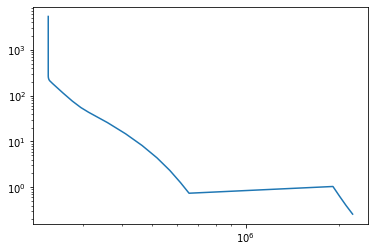

In [9]:
plt.loglog(*fsvals.T)

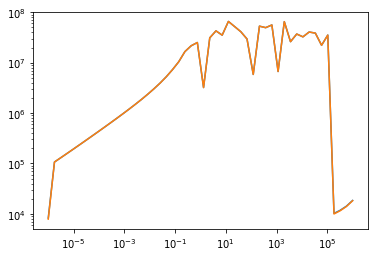

In [10]:
plt.loglog(prange, [float(s['x'][0]) for s in solutions])
plt.loglog(prange, [float(s['x'][1]) for s in solutions])

In [11]:
solutions[-1]['x'][:2]

DM([18457, 18238.9])

In [12]:
getx = ca.Function('getx', [solver_setup['x']], model.get_x_obsv())

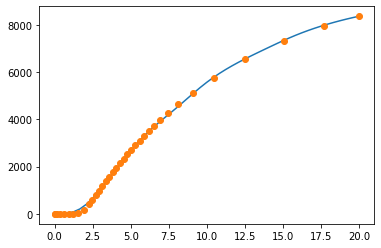

In [22]:
plt.plot(model.observation_times, getx(solutions[0]['x'])[-1], label='model')
plt.plot(sol.t, sol.y[-1,:], 'o', label='data')

In [21]:
err_dat = np.log10(fsvals[:,0])
err_mod = np.log10(fsvals[:,0])
pspacelog = np.log10(prange)
def dy1x(y0, y1, x0, x1):
    return (y1-y0)/(x1-x0)
def dy2x(y0, y1, y2, x0, x1, x2):
    return 2*((x1-x2)*(y0-y1)-(x0-x1)*(y1-y2))/((x0-x1)*(x1-x2)*(x0-x2))
def curv(p, d, e):
    p0 = p[2:]
    e0 = e[2:]
    d0 = d[2:]
    p1 = p[1:-1]
    e1 = e[1:-1]
    d1 = d[1:-1]
    p2 = p[:-2]
    e2 = e[:-2]
    d2 = d[:-2]
    
    return dy1x(e0, e1, p0, p1)*(dy2x(e0, e1, e2, p0, p1, p2)*dy1x(d0, d1, p0, p1) + 
                                 dy1x(e0, e1, p0, p1)*dy2x(d0, d1, d2, p0, p1, p2))

curv(pspacelog, err_dat, err_mod)

array([ 6.96130744e-35, -3.06874562e-35, -4.63006770e-35, -3.67627706e-35,
       -6.37867807e-36,  2.14751087e-35,  2.86054071e-35,  1.05812043e-36,
        7.05971899e-34,  3.34475935e-32,  1.09556886e-30,  3.32787099e-29,
        9.88140346e-28,  2.89896619e-26,  8.39794495e-25,  2.38821440e-23,
        6.58999450e-22,  1.72841797e-20,  4.16135015e-19,  8.69509180e-18,
        1.44971657e-16,  1.72753191e-15,  1.32589389e-14,  6.61758314e-14,
        2.87290201e-13,  2.07328205e-12,  2.69763280e-11,  4.24642364e-10,
        5.74532193e-09,  5.68052940e-08,  4.07513818e-07,  2.52696014e-06,
        4.44449635e-04,  1.42456286e-02, -1.57650963e-03, -1.14360004e-03,
       -9.06914502e-04,  7.60090456e-02, -5.28158352e-03, -8.36856443e-03,
       -6.71936364e-03, -5.89582970e-03, -4.77999720e-03, -2.90775829e-03,
        5.21474922e+01, -1.17762698e-01, -2.92467294e-04,  4.39725012e-05])